### Error plot with respect to $\beta$

In [1]:
using TracyWidomBeta,LaTeXStrings,Plots,TypedTables,LinearAlgebra

To compute the errors accurately, we computed the Tracy-Widom distribution functions for $\beta=1,2,4$ to 100 digits using $\texttt{Mathematica}$ and treated them as the ground truths.

In [2]:
TW1 = [0.9999999999999994562339560065771554465112482,0.9999999999999993471055305526516077992939555,0.9999999999999992163403216538473763258130546,0.9999999999999990597023297910420710473801414,0.9999999999999988721371176817230179616480552,0.9999999999999986476158494368018152708184652,0.9999999999999983789500376096568145289484911,0.9999999999999980575715798488940386724930958,0.9999999999999976732716806289632259964632096,0.9999999999999972138910908168308968891631450,0.9999999999999966649527276271683389757656191,0.9999999999999960092261234671238866204793390,0.9999999999999952262112516721912250036985596,0.9999999999999942915270402868089644231211646,0.9999999999999931761872534256034081525832843,0.9999999999999918457433249964212801022428040,0.9999999999999902592700917047628297370439764,0.9999999999999883681660977921860010028958594,0.9999999999999861147351236221528348614593028,0.9999999999999834305096963807349211939742094,0.9999999999999802342704247842326164697946958,0.9999999999999764297068868679501231257192369,0.9999999999999719026562878030379985835607060,0.9999999999999665178449567204962408427506625,0.9999999999999601150446920612633454223812720,0.9999999999999525045406729268397204042970980,0.9999999999999434617897554301966230783952276,0.9999999999999327211270330813131027317570513,0.9999999999999199683540527284232230952704810,0.9999999999999048320134541572366806674911400,0.9999999999998868731213584121594521352790242,0.9999999999998655730897731052559320714496035,0.9999999999998403195256904656493844039226838,0.9999999999998103895403558362060347474573776,0.9999999999997749301401399581501874937219874,0.9999999999997329351981193261346968684363297,0.9999999999996832184211885518810816368408118,0.9999999999996243816293669748177691221794948,0.9999999999995547775496846227018538300598149,0.9999999999994724661940553740007212009820291,0.9999999999993751637358790150884061314071913,0.9999999999992601826203044850928019936964881,0.9999999999991243614341436032415049159152323,0.9999999999989639828187407831854499706130369,0.9999999999987746774273630090919462900752967,0.9999999999985513116017435078877472226645535,0.9999999999982878560632229906842642468234569,0.9999999999979772324743391119798524608239374,0.9999999999976111342173383404933943133314828,0.9999999999971798171461291232381321620280937,0.9999999999966718553852421882300375341631088,0.9999999999960738564591345334759592808663598,0.9999999999953701291212602336176289286043401,0.9999999999945422961958891441415421474779846,0.9999999999935688435250526386542212710959055,0.9999999999924245947034171640720992413438361,0.9999999999910800996568765136374547905603219,0.9999999999895009232436031351863436422445156,0.9999999999876468178918587159375603642590033,0.9999999999854707617942813914133864652726316,0.9999999999829178413047289315641167095688385,0.9999999999799239528751374625033193837594626,0.9999999999764142960623432153716396963234548,0.9999999999723016247554185318046988204232613,0.9999999999674842187394773900888895840689316,0.9999999999618435319270663244880748014571216,0.9999999999552414669448145828211212562389009,0.9999999999475172181375056102750768093747350,0.9999999999384836163035528943762168460770722,0.9999999999279228984450081225794242332534204,0.9999999999155818143197087204437038476858507,0.999999999901165968416120781279076335,0.999999999884333280897857574210746756,0.999999999864686433817968213075220172,0.999999999841764149180208324264386131,0.999999999815031122882419131661703133,0.999999999783866412826952129954665993,0.999999999747550050084383899693571672,0.999999999705247608451173262824595220,0.999999999655992429485756139653568583,0.999999999598665156503789055257594363,0.999999999531970181342296709063605945,0.999999999454408551152191204127624542,0.999999999364246818132926612883710254,0.999999999259481241949329593848802780,0.999999999137796671405759753720525528,0.999999998996519337487418358789857038,0.999999998832562682640086166480691330,0.999999998642365229492363838826070175,0.999999998421819354269091497915562799,0.999999998166189673813816410479381942,0.999999997870019578090860198943391567,0.999999997527024239649783124827035994,0.999999997129968204868119079920812197,0.999999996670525415553326173254793800,0.999999996139119220004120536779624436,0.999999995524739605795036645842814902,0.999999994814734517767502508216777045,0.999999993994571708866480201337971404,0.999999993047567102846749758522726234,0.999999991954575120130261434744783748,0.999999990693635824150606924455055704,0.999999989239573077504855056395192320,0.999999987563537146404949583703176519,0.999999985632484348575850182261926867,0.999999983408585393121252665444270819,0.999999980848552999040869430191335809,0.999999977902878188827656315302660006,0.999999974514963320287901308583541800,0.999999970620138427263612276236744560,0.999999966144545770465096772332716901,0.999999961003875633473646482136993615,0.999999955101934314474690360091666778,0.999999948329022937567660802437659606,0.999999940560103112324900091203307141,0.999999931652722577802629143109742853,0.999999921444670745793911182306360783,0.999999909751330473058273076493935400,0.999999896362688405564466112345091756,0.999999881039961807870917978772497383,0.999999863511794872218397987737472335,0.999999843469972045144320506405636706,0.999999820564589860403644953731275712,0.999999794398622066855789985295219161,0.999999764521805424766312482037038193,0.999999730423765344190799460307732970,0.999999691526291479397234594106701019,0.999999647174663392024896736301914145,0.999999596627915364603265064707366368,0.999999539047917289839397837302495932,0.999999473487135176940044519725468520,0.999999398874920093505263124911735859,0.999999314002158181270663011660166353,0.999999217504096618555732152169575798,0.999999107841140914985351613581861046,0.999998983277397568721151172674876280,0.999998841856712737085399978937413821,0.999998681375932001959947360582221651,0.999998499355078375147580361828871782,0.999998293004115198779560646967835160,0.999998059185927353782901137665264024,0.999997794375117986372137030304573870,0.999997494612178578511851818675461955,0.999997155452547392411316850770808587,0.999996771910024869747201669674866637,0.999996338393964211453744232883126415,0.999995848639600841637452654498160351,0.999995295630825498252394516869299386,0.999994671514642013962287591743747617,0.999993967506482166090975921867900765,0.999993173785475991629483316671014332,0.999992279378696384346091728726214894,0.999991272033311315957440476128632701,0.999990138075485351509280816336206773,0.999988862254773962247431817054114176,0.999987427572649184207591608983013079,0.999985815093683143041296752008964290,0.999984003737796593312612669944665828,0.999981970051852648728425982200276034,0.999979687958741075566577542397449913,0.999977128481955679562242789117476946,0.999974259443516265098774378147708286,0.999971045132927253778272435066586123,0.999967445944697234626972360192624049,0.999963417981767454222815454997531087,0.999958912622012581531267208944630564,0.999953876044784114452358982721227536,0.999948248714265734664528616785646160,0.999941964816201063952030043677276692,0.999934951644338038955228288987533085,0.999927128932711036143558593615995332,0.999918408129652616768619949843265839,0.999908691609192147690296092906755707,0.999897871815259582333487046212296679,0.999885830333870536308325696914606061,0.999872436888224847102672793981489682,0.999857548251406670452865258239528803,0.999841007071131680835767388254224278,0.999822640600748211911412981539101539,0.999802259330466574453574447560542803,0.999779655512567001351827283484082063,0.999754601574124685199002384779790272,0.999726848410593522824774058126904525,0.999696123553412145777969977393911888,0.999662129204640650377962317111426628,0.999624540131508587241727350332156653,0.999583001413659071928174808844289103,0.999537126035815593908506926338855983,0.999486492318582913438745317831627315,0.999430641180127459561146955484150793,0.999369073221572426707477741677840575,0.999301245629095295449415453500409592,0.999226568885938186194045244145575910,0.999144403287842121156317239302955225,0.999054055255803146898300976478275431,0.998954773440529958477359091381174538,0.998845744613568109646532434043395452,0.998726089340754334419413836979998805,0.998594857434485435263892279708702016,0.998451023182239290934092819802352089,0.998293480349880595165502895620669975,0.998121036959530777357327178047538622,0.997932409843189929094160269942864764,0.997726218974878034400681826534047418,0.997500981585822635448052164272987803,0.997255106069169064689778683161647806,0.996986885682835733084481037651671442,0.996694492061488089134557517881341309,0.996375968551167182723318026859998178,0.996029223382887520671611481123641149,0.995652022704517912823432656385475916,0.995241983493480446890431501800926044,0.994796566376246850840194163916533787,0.994313068384276368755481386653676429,0.993788615679920480432996884749702524,0.993220156289910153859260017621254374,0.992604452888330569183048004820779008,0.991938075675462732999534262419822695,0.991217395403513738548934154481096678,0.990438576605046214603079186472648304,0.989597571084826992073197033353861339,0.988690111740814803362584358941313829,0.987711706785061580651832405280666046,0.986657634440371101129614766321766563,0.985522938193596370056929596132216362,0.984302422691411634172553405413544926,0.982990650369208891897215234970815561,0.981581938908378946579511019284617286,0.980070359621574257426558375913597985,0.978449736869540036893644229610795519,0.976713648616660446219441261995854685,0.974855428235412070708469537944284820,0.972868167672355664815510041964877237,0.970744722090033287188775244025304407,0.968477716100071121611543637507639246,0.966059551702814837077745638490565385,0.963482418047838108752792381984912116,0.960738303127558266705824006303138489,0.957819007512858070784862195089476666,0.954716160234942562600905712775724240,0.951421236911550734795618629507314451,0.947925580207993710851874067930745065,0.944220422714210888106092803326593282,0.940296912308038089280324682236259386,0.936146140062092829874280543445508687,0.931759170737039950271597665184555172,0.927127075887460151570831305790976935,0.922240969588076520821233249386957180,0.917092046767692724405590062577648863,0.911671624115877329474749892750445813,0.905971183503233829332405676480324680,0.899982417830096138516309537207075403,0.893697279190786384316090475263091043,0.887108029211300892708849335524441240,0.880207291387621863667557570763924591,0.872988105219993959753911461206876974,0.865443981905702908941444293636551141,0.857568961319432519583941261279579793,0.8493576699764820434363988986288055704,0.840805379640361633868732455336084991,0.831908066202951927462219381864676904,0.8226624684329530605312625481580599374,0.813066146157230909439828411556878186,0.803117537410396283047551400449453070,0.792816014061054007099870955015961411,0.782161935399181156790783058559179196,0.771156699148598453853747660896812099,0.759802789352053382579297217242965996,0.748103820564602748953944942744269468,0.736064577784319193924875958387847804,0.723691051548381471827602101367647138,0.710990467627839981775807881217770213,0.697971310766230396500614506335779918,0.684643341926136070944612749300942309,0.671017608534102375633174716136001259,0.6571064472482305342367670262324052242,0.642923478814479633815737645739317916,0.628483594627233926331839916492914740,0.613802934666984622693555078755959275,0.598898856552843645108759827259443386,0.5837898955197322834588884463779472662,0.5684957152090139403201815366892690288,0.553037049246469361748532331029255310,0.537435633672104419142863775915478603,0.5217141303814526855024201204874374233,0.5058960418367686110232115310885474880,0.4900056174076531203102660008166066934,0.4740677518029438352806880917040983797,0.4581078761577635790812146175648947045,0.4421518424399921030264486396048218532,0.4262258019375783973214940777283635764,0.4103560786804718081580580265632496239,0.3945690387369290266432313212767738658,0.3788909564019711647765832197347362006,0.3633478783642821383246968035318611476,0.3479654869953909492687261813777769617,0.3327689639502060857394721712550447809,0.3177828552996477406389838713798291603,0.3030309394331997397707982973677502366,0.2885360989708239356514245479098785633,0.2743201979092178576716310476127873226,0.2604039651964747285799199377840145773,0.2468068858817172915266707851822650101,0.2335471009224027244681675308709420538,0.2206413166522101033837759009128573262,0.2081047248174981702323722140520242318,0.1959509339813292443818066304075748119,0.1841919129723508057516852887837454685,0.1728379469230348425015545311719724620,0.1618976062997676888658809646802368330,0.1513777291781468037912019289934802552,0.1412834168628424157473753683761686934,0.1316180427949258309960275867481967069,0.1223832745331488644456948207814011648,0.1135791084418186073315307345922894326,0.1052039165691765418482755644900063479,0.0972545050590250177232592157478279209,0.0897261833070944845765072047369839582,0.0826128429544901646068483274097132085,0.0759070457054583398722899622197814896,0.0696001188673698884362202022377916578,0.0636822574386317512468629235163817578,0.05814263151627323749112266493397279711,0.0529694977599249027957885004568979990,0.04815031363315276404435479529238817204,0.04367185314659098600136396453402110398,0.03952032284961719367502283371167256868,0.03568147685765758919194275504789229896,0.03214072975947235145088730002698458184,0.02888326632151981219630797757594363366,0.02589414699301809795936697522302952578,0.02315840831366917866568960788786947807,0.02066115743405153026591529857775151948,0.01838766007416049776302277068752047488,0.01632342136613908482104289704655593234,0.01445425915053369167738592994136951457,0.01276636941909980872567822136217160720,0.01124638371902807539788749067897282001,0.00988141845135212543992676995569679693,0.00865911610830512217003459155081263308,0.00756767859879640052193659967066573281,0.00659589290651390698855816215989600713,0.00573314941022184879277274434643535527,0.004969453269699493781973411883721019078,0.004295429342830011276185734223763119559,0.003702321149260033731003294631502904701,0.003181984433753471855206896898115909739,0.002726875908063096061774781237611153499,0.002330037764288342802551127503993790014,0.001985078555940138367850999247004843777,0.001686151036139058862357553948935442948,0.001427927526527002966822475311126964559,0.001205573366683532860656497360477401955,0.001014718963292428173876320361072235972,0.0008514309222300965568807303377596829875,0.000712182706381785536611585217459154389,0.000593825218547489576386041875497876117,0.000493557663439514887715630382577006641,0.0004088989965853117848520104974137051492,0.0003376602219251092053354262673374771106,0.0002779177549167903698016390969780283419,0.0002279880247923635069587848036817386252,0.0001864034488864497378823072465499247257,0.0001518898741836767134525491920622414307,0.0001233455467879121754141624753560772074,0.0000998216391592272130579691803917138687,0.0000805043378378930103585141896504174906,0.0000646984710187027013237467987465344803,0.0000518126357021993080056550829732281768,0.0000413457681024840377673987218131329890,0.00003287508834018235605453398160479307782,0.00002604534094915828781955638045397668081,0.00002055924609469207376500650392788387548,0.00001616907233242450909131366573911080233,0.00001266923991171354220887133673362276340,9.88986372167849938212751198657812351e-6,7.69114667677254241884627808682084029e-6,5.958537338347785675167933365963747133e-6,4.598569585794827791635011420725776470e-6,3.535306925550657749977189509548525751e-6,2.707319325304773040821000882102924491e-6,2.065126079140782099389963362217853936e-6,1.569043971069013296455964289859855144e-6,1.187385761884248755825254825683375902e-6,8.949596573198966535327327900570873293e-7,6.71825829442818124735031270386830346e-7,5.022711868841127058530833897751504717e-7,3.739683724333024124642489566078063717e-7,2.772893765390230001617443338628318699e-7,2.047481756609755312324033362065167257e-7,1.505504313661665643104567888615329114e-7,1.102315260689756176451598001966495516e-7,8.03670789261943710603313716406976429e-8,5.83426011118800119897396968293664894e-8,4.217113812811737410721455072326077737e-8,3.034963512129376006663705116368266301e-8,2.174637777395455559616252747304389084e-8,1.551323481365466175028134592494843723e-8,1.101758645511638568488338163463272064e-8,7.78979282886399782505568060892184078e-9,5.48286259155969991341418402442407267e-9,3.841647403165839867302701195656282783e-9,2.679433579729949210787170232661789559e-9,1.860246565297193919200095214751381114e-9,1.285543309995633353129646145565496946e-9,8.84256501733680230380132448751753901e-10,6.053852267045620245762200014618066132e-10,4.12509581699890110771964011869954142e-10,2.797509586745019508214889183731807940e-10,1.888126554120396779120167673703988460e-10,1.268233560839591120494516341023103634e-10,8.47739963763414952107237648215581886e-11,5.63907658752386007618850276224945822e-11,3.732689754309671325864480483326986407e-11,2.458617704734792462985541102622676601e-11,1.611394822644036397508650288118218164e-11,1.050851651988367887842990880543821769e-11,6.81861208313511887805936772856088618e-12,4.402023091393591659049442055213312553e-12,2.827463728502907421379544115546194875e-12,1.806827921192191248278880143332523829e-12,1.148677722125863141739429845717069730e-12,7.26487063979165341750732784871745104e-13,4.570802760178107936756137266404152095e-13,2.860741451611702998490845271725505645e-13,1.781036795236060388215513327469812572e-13,1.102965557351044364157027679166550027e-13,6.79410735588786830045841434648633825e-14,4.16265935119327161950609410693837713e-14,2.536669972806725486285276274023753684e-14,1.537440464958466931838745376832422942e-14,9.26745536171501882916758789146098735e-15,5.55567926867849331940839413117657859e-15,3.312187440696375339600678215125675800e-15,1.963723475060961542733871102141239603e-15,1.157764023292227469762091271093994487e-15,6.78766915765746486009858795166321704e-16,3.957024902522726900455553237435895857e-16,2.293776002977056331390015744208707332e-16,1.322068420361133747399948420661539372e-16,7.57642211296356370725249636120826640*10^-17,4.31686331118705070126743816700597356*10^-17,2.445417027130868654007184957211640974e-17,1.377224252105211146237906244708037264e-17,7.71098896309184131052398012121494469e-18,4.291961168038138952520281909151982615e-18,2.374807221372263791334813463331842397e-18,1.306214205613093015728740639243348901e-18,7.14168183613441631749822261267855598e-19,3.88126446679242292645668743861576666e-19,2.096617485718794718974224462092846480e-19,1.125706013647086756853796120784475519e-19,6.00727024752921285786518510106510720e-20,3.186121549577405219366755557536911186e-20,1.679450012567889912075755605895194290e-20,8.79787894992829039298492067151495111e-21,4.580170330713497087895207208307841384e-21,2.369543111085332065303401479778564991e-21,1.218185808491679990896955718610164305e-21,6.22321776721015015942474153786493164e-22,3.159043602372266728377646777462798489e-22];

In [3]:
TW2 = [0.99999999999999999999999999999970286935056734,0.99999999999999999999999999999957162850397349,0.99999999999999999999999999999938283542575392,0.99999999999999999999999999999911143703696282,0.99999999999999999999999999999872155603289896,0.99999999999999999999999999999816185003979934,0.99999999999999999999999999999735889659911309,0.99999999999999999999999999999620777091013871,0.99999999999999999999999999999455863460332736,0.99999999999999999999999999999219766046324101,0.99999999999999999999999999998881992044079487,0.99999999999999999999999999998399087868192439,0.99999999999999999999999999997709173976197120,0.99999999999999999999999999996724193913864529,0.99999999999999999999999999995318929526803006,0.99999999999999999999999999993315444420424134,0.99999999999999999999999999990461068971345039,0.99999999999999999999999999986397268302261802,0.99999999999999999999999999980615649741321124,0.99999999999999999999999999972395842630706723,0.99999999999999999999999999960717845101964126,0.99999999999999999999999999944138433977464837,0.99999999999999999999999999920617032437452319,0.99999999999999999999999999887270547314670461,0.99999999999999999999999999840028457399368740,0.99999999999999999999999999773147927890090934,0.99999999999999999999999999678532652741193684,0.99999999999999999999999999544776690672538928,0.99999999999999999999999999355823267671199381,0.99999999999999999999999999089084906419862789,0.99999999999999999999999998712810508626108525,0.99999999999999999999999998182400503687589343,0.99999999999999999999999997435253669253424949,0.99999999999999999999999996383565972264276641,0.99999999999999999999999994904275140079203783,0.99999999999999999999999992825030291523560639,0.99999999999999999999999989904630214266387707,0.99999999999999999999999985805770395584082527,0.99999999999999999999999980057103794529266218,0.99999999999999999999999972000465593937682940,0.99999999999999999999999960717516733320769198,0.99999999999999999999999944927858486350021708,0.99999999999999999999999922847632139344629142,0.99999999999999999999999891993430266022675750,0.99999999999999999999999848910579045550119966,0.99999999999999999999999788796915216731165738,0.99999999999999999999999704982269861669076798,0.99999999999999999999999588208880822865875826,0.99999999999999999999999425637378179748855918,0.99999999999999999999999199474763715053393248,0.99999999999999999999998885082126395538455930,0.99999999999999999999998448366872091720154613,0.99999999999999999999997842191781375924756535,0.99999999999999999999997001434146676032941689,0.99999999999999999999995836192929127938100535,0.99999999999999999999994222457206661609497607,0.99999999999999999999991989297364736214153823,0.99999999999999999999988901297379786536340563,0.99999999999999999999984634479468475629737815,0.99999999999999999999978743337063398126775345,0.99999999999999999999970615728663952820145569,0.99999999999999999999959411212701578652829394,0.99999999999999999999943976812925151767910395,0.99999999999999999999922732047611790112885477,0.99999999999999999999893512135555457743086952,0.99999999999999999999853354339872219667507399,0.99999999999999999999798207067426075062089191,0.99999999999999999999722534123550658886073180,0.99999999999999999999618776779313003478455333,0.99999999999999999999476623170514698031260786,0.99999999999999999999282016845948478115074412,0.9999999999999999999901581245284590,0.9999999999999999999865195449688642,0.9999999999999999999815501204453019,0.9999999999999999999747684440975112,0.9999999999999999999655209529899467,0.9999999999999999999529210892987597,0.99999999999999999993576722437265693,0.99999999999999999991243202654461360,0.99999999999999999988071346446629559,0.99999999999999999983763431380003569,0.99999999999999999977917260037071481,0.99999999999999999969989950154261925,0.99999999999999999959249335520225628,0.99999999999999999944708795136624103,0.99999999999999999925039935794173580,0.99999999999999999898455704090577098,0.99999999999999999862554050444545340,0.99999999999999999814109015360268121,0.99999999999999999748791801015255475,0.99999999999999999660798692392422446,0.99999999999999999542355159113707123,0.99999999999999999383055520936978077,0.99999999999999999168984434742596532,0.99999999999999998881549160743643748,0.99999999999999998495928784457270445,0.99999999999999997979016600996310201,0.99999999999999997286692479109221705,0.99999999999999996360210304040615207,0.9999999999999999512141775769762668,0.9999999999999999346643679306838850,0.9999999999999999125731677351540281,0.9999999999999998831102002964937101,0.9999999999999998438490070292219855,0.9999999999999997915757814821446301,0.9999999999999997220376766238080116,0.9999999999999996296119034986998930,0.9999999999999995068711010246822327,0.9999999999999993440129967306968719,0.99999999999999912811268997807111353,0.9999999999999988421433199530512732,0.9999999999999984636945904967772001,0.9999999999999979632975329075880613,0.9999999999999973022366097750938566,0.99999999999999642969501943110803770,0.9999999999999952790335734751627294,0.9999999999999937629448734987246224,0.9999999999999917671489806949710166,0.9999999999999891421995949067728427,0.99999999999998569284486891504693337,0.99999999999998116422664827864536291,0.9999999999999752239963096558078613,0.9999999999999674391619690211276415,0.9999999999999572461447748621365591,0.9999999999999439120911674958663218,0.99999999999992648493789034155386631,0.99999999999990372902494814563149401,0.9999999999998740421578973191451987,0.9999999999998353488834388225969811,0.9999999999997849632965038718401196,0.9999999999997194128613615634652193,0.99999999999963421240125741782697691,0.99999999999952357446204336689568005,0.99999999999938003852383176040624811,0.9999999999991939968188221155436647,0.9999999999989530885603532538981163,0.9999999999986414268821871897525842,0.99999999999823861333413527847653791,0.99999999999771848288962755679140264,0.99999999999704750748206384805459998,0.9999999999961827673409905410085590,0.9999999999950693759047322221850501,0.9999999999936372146762227742897262,0.99999999999179679761940799960131210,0.99999999998943403878018272210494898,0.99999999998640363955608004666801379,0.99999999998252074071884262109294537,0.99999999997755039557373510107744414,0.9999999999711943104149346984966509,0.9999999999630741616717305972742488,0.9999999999527106296655209623015989,0.99999999993949707916422042021824956,0.99999999992266655770765610206264045,0.99999999990125046273781629260606219,0.99999999987402683420435120157289258,0.9999999998394557438736117347682740,0.9999999997955986558291705674121192,0.9999999997400179001051071061533386,0.99999999966965150338211309505667035,0.99999999958065752136873468890865371,0.99999999946822067366675736036634125,0.99999999932631244153938119880576823,0.99999999914739378950536388012573063,0.9999999989220472380019222060775898,0.9999999986385220565680885696763661,0.9999999982821727575687372713102205,0.99999999783476672106082532546592381,0.99999999727363151908562454567928224,0.99999999657060615061638170851565881,0.99999999569075273077736291664193359,0.99999999459077594411543064807234873,0.99999999321708646939223248425832028,0.9999999915034312559508418205877193,0.9999999893679975592937587999564785,0.99999998670987853272049824957046758,0.99999998340476534426710419959076575,0.99999997929970356706479529137764734,0.99999997420671918672311028844234966,0.99999996789508106161320832461726475,0.99999996008192099233552679219293573,0.99999995042087846668952981268650500,0.9999999384883732143267777102904833,0.9999999237670332799857976761827106,0.99999990562571750712712550709104330,0.99999988329546693742306184522828449,0.99999985584059718573491051208729478,0.99999982212400050555922725130165645,0.99999978076555878882243344450238076,0.99999973009237348909364037950903401,0.99999966807929128849089173771152748,0.99999959227794059756511715032673161,0.9999994997321884723265662615555163,0.99999938687757443186798030159907414,0.99999924942187048800955801730933007,0.99999908220344828276004410286146811,0.99999887902359666316260061653083091,0.99999863244831763259634509401965201,0.99999833357442593913231844454909879,0.99999797175397732955391654648576573,0.99999753427014164785654549864799439,0.99999700595660764830777602188667183,0.9999963687514440526889098521378260,0.99999560117503277821967350020777518,0.99999467772022161530782150030202503,0.99999356814120075815832796303362927,0.99999223662577609378653734386691618,0.99999064083367768458802582246656528,0.99998873078129043748656761851639608,0.99998644755071227476773383108824085,0.99998372179832113991150481781437053,0.99998047203505556262676889822418265,0.999976602647376336726311496665959283,0.9999720016243743360599610990140241,0.99996653795272080805911998965012147,0.99996005863712581508403333339519780,0.99995238529968808376957783754155525,0.99994331030700290347087723331834433,0.99993259236917004676063747817251482,0.99991995154994721240523324596710654,0.99990506362227410636792949572580748,0.99988755369830917292503013552363448,0.999866989058051386393123083595831666,0.999842871095656428486864043721922724,0.9998146262978115876334771737146291,0.99978159616413870437038685948460643,0.99974302597570326687782410509886434,0.99969805231449755917414779453066609,0.99964568923443845397536806697832488,0.99958481298320344747793815484149605,0.99951414517437530791318129086436889,0.99943223431115567010961978658966345,0.99933743556664570277892205585382652,0.99922788873170595532700548161894529,0.999101494250047245743621742070227839,0.998955887271837260245675964329911145,0.998788409672113595861139914553131360,0.99859607999906026178700289069702680,0.99837556134011726968946511327321306,0.99812312712132786333641783192455703,0.99783462488764003413191165568773830,0.99750543814938924937915311886514850,0.99713044642317037151188291440939305,0.99670398364396639887153947387650816,0.99621979517986495792590357379035566,0.99567099374098312797516306374754749,0.995050014540236699446850840384540798,0.994348570135085885056162994073101008,0.993557605455953045922232164610595577,0.992667253608036806442251761710235050,0.99166679311792749718382624239806231,0.99054460738371642211624184325919236,0.98928814717589229417750306331334691,0.98788389712467540512743297399659753,0.98631734721572382081795223774942877,0.98457297039824929991048380916058877,0.98263420748512296490529182446466546,0.98048346059088863276343849187645143,0.978102096407850044596089743723677019,0.975470460659461909975302999428033388,0.972567905090872172848814862701064469,0.969372828355262668349878249450813783,0.965862732128205670444214026412010792,0.962014293727226494426293793008594480,0.95780345642690983631739444809599274,0.95320553853823352391657195741500423,0.94819536216175476054605938905525878,0.94274740232571327887442497537043997,0.93683595698060094303901591516086044,0.93043533804061540754415175060190855,0.92352008333993706435491516925083741,0.91606518900928719650123545544380650,0.908046361378286712540267586312903094,0.899440287075599910407062762124089792,0.890224919536982368352909424241876292,0.880379779647887357051712553266204210,0.869886267750440283856316708834677446,0.858727983744051969694782495656929922,0.846891051515791333888497422657584222,0.83436444346322754933523594299601019,0.82114030043221390707880979505557122,0.80721424199928529247895828799668893,0.79258566169776164272620401037294969,0.77725800153321801167396685622091495,0.76123899997233672292575379956982297,0.74454090753316793312921926642993742,0.727180664167071818023742315904039212,0.709180032813844688821242031887026305,0.690565683840102696034681288559795521,0.671369225542344416534095327086832756,0.651627176512240197619472936550385720,0.631380876420726046623317111710812806,0.610676332673295697693703687155308341,0.589564001410871456465609979594149208,0.5680985024635560078428450914230224728,0.546338269088593005556957845375915694,0.52434513461476567339839088688968482,0.50218385944499036092636341567330997,0.47992160320530689800043878555144491,0.45762734813740488478179234612552375,0.43537128107702947907802033833091987,0.413224142505122554688080761371718196,0.391256552165870768847454270678287686,0.369538321581174588740553807623807910,0.348137764422685833918554949567029740,0.327121016103090953037278566532784072,0.306551374095921429715306092628935222,0.2864886703727091262457961239247390280,0.2669886869502331914963666812855182738,0.2481026248696757234667387999513819423,0.2298766359931581955465447575311066229,0.2123514258195901062911634358606339630,0.1955619341177650986804614827904712167,0.1795370985848360006310446235124866066,0.16429970500428924047126695253952331,0.14986632554659676655904978506941991,0.136247344979245317832575675576178811,0.123447072684565669501417426617270831,0.11146393657785845641430796399289671,0.100290753327304245070639573902095777,0.089915067750057726834227905429054208,0.0803195529393345480813718927988022907,0.0714824616016831176405323256288443780,0.0633781182799869584989900176433908434,0.0559774416245360351795522568982886855,0.0492484856600454849817701485864752253,0.0431569890787265544470547932122067903,0.03766692195623666388984243804198499651,0.0327410199169029631420107797751451874,0.02834129663698343552732296000290463550,0.02442952663287492759729267365657191075,0.02096769149276654325127495407444981496,0.01791838402949404846638209026312792933,0.015245166212007527593770563706580738,0.0129128781261011085137721998669613320,0.0108878965773404488105691482687187627,0.0091383432398732579065169857115534999,0.0076342434387664992031247085514569927,0.0063476377018357024460208209115859039,0.0052526491079020535145484628280986715,0.00432551017780042868234669993600437523,0.00354455359550920029634039650405926689,0.00289017140984955965264866761281369349,0.002344747559159293737445943166901285440,0.001892568594630828791921223854550519157,0.001519717369597376886459862504407315606,0.001213954232299596718521016327556578841,0.000964589931069064860123887902890797482,0.000762354036898338364272127396688777860,0.000599262232380874199360116038187408156,0.000468485330258251315383629475680463088,0.0003642223896787062398689015800238279532,0.0002815798116215560654205088207645872250,0.0002164578317339570010039716134803532426,0.0001654454008817060685560051481122314039,0.000125724059679525299903249623754404660,0.000094981078721558182994161449391330576,0.000071331853944087341088148060862567238,0.000053251316805492097432484613994485412,0.0000395139399741869590208820530957239955,0.0000291417875464184779559609512921404701,0.0000213599698474111576987229932670892233,0.0000155588111996301877070134983272421573,0.00001126201887418274015305299532597178713,8.10014691390734123570568049892163304*10^-6,5.78867397252676539895524020793379961*10^-6,4.110054507736757339849374051788543*10^-6,2.899152907740745840254085301130080589*10^-6,2.031526374597919552600200906614940985*10^-6,1.414081268862618902073386782571652044*10^-6,9.77686450112423432912933570078912375*10^-7,6.71383878986541016767449376830636069*10^-7,4.578899105545040485090937978641801456*10^-7,3.101293444111841051948650641384289270*10^-7,2.085878663349801906719870354801751645*10^-7,1.393068237258114651548833886815570400*10^-7,9.237738904321291746112678013780895242*10^-8,6.08193395245629889544825832903741247*10^-8,3.975330313442857057447241968145523*10^-8,2.5794851307789022410993158428065457*10^-8,1.66147537863521369240233024055007786*10^-8,1.06225467412445106877418846129809452*10^-8,6.7407782478617795710262134206109028*10^-9,4.2453242784591771888538295831841106*10^-9,2.65340736501658602911478900405508567*10^-9,1.64574300231219816082105978446329837*10^-9,1.012879836611529756097259690033866505*10^-9,6.18535247657101039936883390428185439*10^-10,3.74761008035561223545047282892370946*10^-10,2.252685489259147031411788292643571720*10^-10,1.343308442018510314614452719671306546*10^-10,7.9460766307273416834325479703711477*10^-11,4.662344716963896666926853336500071232*10^-11,2.713335170078879794117591685253207402*10^-11,1.566111745018843843219810733622505793*10^-11,8.96468627206015312793168017511145400*10^-12,5.088775601479399158472386469198007281*10^-12,2.864376953641525945300859927969287183*10^-12,1.598668869878906722580460273326782869*10^-12,8.84649333873614130022036136098747348*10^-13,4.853341977902429894681281797297567599*10^-13,2.639614767246062259530837959039724801*10^-13,1.4231246350087920323156900616615841547*10^-13,7.605379181197913057528809527232939235*10^-14,4.0285352783149488936360890449877413*10^-14,2.114923452886899975804206912870243*10^-14,1.10036339948575439269362387965256612*10^-14,5.6734135293529922430544032754764871*10^-15,2.89862734121458372762210533505604830*10^-15,1.46741444679730924928266634956573751*10^-15,7.36035022832541687594756478334161810*10^-16,3.65765109256283696089127035000124886*10^-16,1.800681902089248121562663647324653674*10^-16,8.78163691724009225536141761304400816*10^-17,4.24219406035905811539606322160142043*10^-17,2.029808134774723310045800764898150191*10^-17,9.61926023443806914915900326647021912*10^-18,4.514643003995683270661412226535743409*10^-18,2.098326356813695334579010068815458702*10^-18,9.657469975816453247063270687824558403*10^-19,4.401160786193092335339948649922051385*10^-19,1.985900425763657476861201334379488761*10^-19,8.87170103503467417641391855254327460*10^-20,3.923632763971210239644229524631061461*10^-20,1.717808161312865701948520968175470077*10^-20,7.444553527846986992744848502424014489*10^-21,3.193398883995186862200868819576214651*10^-21,1.3557856414815268131100196530340083342*10^-21,5.696722598906334767403668768855414487*10^-22,2.3687985438981351167568457920790435854*10^-22,9.747046305277220447740347974076480841*10^-23,3.9685568962885528322250710928336121261*10^-23,1.5987468679232989355643443802520014389*10^-23,6.3721670176048496573483601355453102*10^-24,2.5126255796452414897958341460060130*10^-24,9.8010909884321844723102076632118590*10^-25,3.7818118507731703943026874993353506*10^-25,1.44336810730704342623552014737514313*10^-25,5.44852335116169587656347851317087985*10^-26,2.03412618220821613522643077695764370*10^-26,7.5101249338245674975948975583240022*10^-27,2.74194961004314780464535455101983952*10^-27,9.89891625556136511198185767454027447*10^-28,3.533495495991654368532907295901589554*10^-28,1.247047463146967795608909692269443009*10^-28,4.351067412981999549597573756745136461*10^-29,1.500775970159965458189868711655810728*10^-29,5.11700672929013668797159338515881783*10^-30,1.724523090394892772755646952994948774*10^-30,5.744441138785222690925901058220806776*10^-31,1.891146346719754168793321946694469695*10^-31,6.15281584785220404220975657308675279*10^-32,1.978185256531839296181982298683977570*10^-32,6.284592316047947937954500943651471484*10^-33,1.972773411331448441553533187505190908*10^-33,6.118431321533854161989212326276330260*10^-34,1.8747294518594622637370619582982693386*10^-34,5.674735000457657612018081249790016212*10^-35,1.6968126046991382313383687452517761191*10^-35,5.011599214201208322290784982746603692*10^-36,1.4619946398556639804307528671471305288*10^-36,4.212259009651785311247682839301912149*10^-37];

In [4]:
TW4 = [1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,0.99999999999999999999999999999999999999999999,0.99999999999999999999999999999999999999999999,0.99999999999999999999999999999999999999999998,0.99999999999999999999999999999999999999999997,0.99999999999999999999999999999999999999999994,0.99999999999999999999999999999999999999999990,0.99999999999999999999999999999999999999999982,0.99999999999999999999999999999999999999999968,0.99999999999999999999999999999999999999999943,0.99999999999999999999999999999999999999999899,0.99999999999999999999999999999999999999999822,0.99999999999999999999999999999999999999999685,0.99999999999999999999999999999999999999999444,0.99999999999999999999999999999999999999999019,0.99999999999999999999999999999999999999998270,0.99999999999999999999999999999999999999996956,0.99999999999999999999999999999999999999994649,0.99999999999999999999999999999999999999990604,0.99999999999999999999999999999999999999983524,0.99999999999999999999999999999999999999971144,0.99999999999999999999999999999999999999949523,0.99999999999999999999999999999999999999911812,0.99999999999999999999999999999999999999846118,0.99999999999999999999999999999999999999731820,0.99999999999999999999999999999999999999533207,0.99999999999999999999999999999999999999188513,0.99999999999999999999999999999999999998591050,0.99999999999999999999999999999999999997556763,0.99999999999999999999999999999999999995768539,0.99999999999999999999999999999999999992680713,0.99999999999999999999999999999999999987355560,0.99999999999999999999999999999999999978183670,0.99999999999999999999999999999999999962406402,0.99999999999999999999999999999999999935301385,0.99999999999999999999999999999999999888795136,0.99999999999999999999999999999999999809103011,0.99999999999999999999999999999999999672719861,0.99999999999999999999999999999999999439617865,0.99999999999999999999999999999999999041721512,0.99999999999999999999999999999999998363406636,0.99999999999999999999999999999999997208547921,0.99999999999999999999999999999999995244910916,0.99999999999999999999999999999999991910438762,0.99999999999999999999999999999999986255535150,0.99999999999999999999999999999999976677989656,0.99999999999999999999999999999999960478071630,0.99999999999999999999999999999999933112807176,0.99999999999999999999999999999999886947750336,0.99999999999999999999999999999999809170490798,0.99999999999999999999999999999999678307732150,0.99999999999999999999999999999999458419340103,0.99999999999999999999999999999999089433287923,0.99999999999999999999999999999998471078657308,0.99999999999999999999999999999997436213171614,0.99999999999999999999999999999995706606333996,0.99999999999999999999999999999992819740060379,0.99999999999999999999999999999988007799100462,0.99999999999999999999999999999979997904143928,0.99999999999999999999999999999966682792706061,0.99999999999999999999999999999944578695525837,0.99999999999999999999999999999907934155542122,0.99999999999999999999999999999847267116391343,0.99999999999999999999999999999746966901620421,0.99999999999999999999999999999581368950992687,0.99999999999999999999999999999308338826297296,0.99999999999999999999999999998858800045114615,0.99999999999999999999999999998119665998503113,0.99999999999999999999999999996906061581903329,0.99999999999999999999999999994916179122396477,0.99999999999999999999999999991658018726257419,0.99999999999999999999999999986330675567337695,0.99999999999999999999999999977632253775937058,0.99999999999999999999999999963449511138041487,0.99999999999999999999999999940357150652738179,0.99999999999999999999999999902811196296776691,0.99999999999999999999999999841851466429629332,0.99999999999999999999999999743017476711972308,0.99999999999999999999999999583005917863249342,0.99999999999999999999999999324317827043552658,0.99999999999999999999999998906699193926668509,0.99999999999999999999999998233474650207647471,0.99999999999999999999999997149760035931692369,0.99999999999999999999999995407780305609692408,0.99999999999999999999999992611744748141153619,0.99999999999999999999999988130362987179566769,0.99999999999999999999999980958217784539184666,0.99999999999999999999999969496431963309101883,0.99999999999999999999999951206176170739420231,0.99999999999999999999999922062138432262399608,0.99999999999999999999999875691799087937915850,0.99999999999999999999999802021982972243326763,0.99999999999999999999999685153936002265130816,0.99999999999999999999999500032380360694217492,0.99999999999999999999999207232227217163405546,0.99999999999999999999998744812029359297701821,0.99999999999999999999998015603826116474257115,0.9999999999999999999999686741424429,0.9999999999999999999999506223222602,0.9999999999999999999999222841553511,0.99999999999999999999987786565742915,0.99999999999999999999980834796863655,0.99999999999999999999969971438897698,0.99999999999999999999953021500934145,0.99999999999999999999926615336526627,0.99999999999999999999885540709147022,0.99999999999999999999821748016351696,0.99999999999999999999722825511345460,0.99999999999999999999569665990138496,0.99999999999999999999332902106406115,0.99999999999999999998967469506088449,0.99999999999999999998404328313472072,0.99999999999999999997537878811476704,0.99999999999999999996206863885771632,0.99999999999999999994165436014870415,0.99999999999999999991039397575723458,0.99999999999999999986260128942068294,0.999999999999999999789649979230315231,0.99999999999999999967847503343885005,0.99999999999999999950932170000592103,0.999999999999999999252369935496088674,0.99999999999999999886268139043525035,0.99999999999999999827264849346396271,0.999999999999999997380730554677099389,0.999999999999999996034680626607861840,0.99999999999999999400661257169853315,0.999999999999999990956004418879529379,0.999999999999999986374898710694560794,0.999999999999999979506878006685161954,0.99999999999999996922748051684338754,0.99999999999999995386802341503400113,0.99999999999999993095652228556502754,0.99999999999999989683738801509792417,0.9999999999999998461142026889658432,0.99999999999999977083476933247821484,0.99999999999999965930143325383550212,0.99999999999999949433759054443860427,0.9999999999999992507665112937601848,0.99999999999999889175142946634153376,0.99999999999999836349257473760923839,0.99999999999999758755806232653743521,0.99999999999999644981398259587640304,0.9999999999999947844761832586126519,0.99999999999999235117811711862487538,0.99999999999998880206009832400941416,0.99999999999998363462965346789930283,0.99999999999997612437295347024995310,0.99999999999996522860847508339027234,0.99999999999994944958139588316074992,0.99999999999992663990657308421080513,0.99999999999989372663471292302878242,0.99999999999984632068996899897955113,0.99999999999977816517583017913049883,0.99999999999968035765451864540835183,0.99999999999954025603693272061891886,0.99999999999933994253287444386374861,0.99999999999905407160747168163181186,0.99999999999864686118441856056207437,0.99999999999806789481369471569157518,0.99999999999724627724284461710992519,0.99999999999608251475392205046091451,0.99999999999443725856960459209295048,0.99999999999211573290279904770670811,0.99999999998884623983528264591163769,0.99999999998425055252280735970590680,0.99999999997780322487650263993637716,0.99999999996877579178752413185510645,0.99999999995616041916954953850264186,0.99999999993856566901955559595252893,0.99999999991407451553983471945220668,0.99999999988005138001399033594534625,0.99999999983288047800035684078752927,0.99999999976761184538168823224022854,0.99999999967748357933060135305102412,0.99999999955327851334631980953932992,0.99999999938245999033793480299420538,0.99999999914801363781106785782307554,0.99999999882689884640179283556011897,0.99999999838798342649723521334974391,0.99999999778929565628869700921957256,0.99999999697437708868137549393141974,0.99999999586745383361526984142443399,0.99999999436705952408098357656745019,0.99999999233763472854569583120636129,0.99999998959848884686987902621935201,0.99999998590933363353263085782734235,0.99999998095137266332994287600875015,0.99999997430264624641160667806333060,0.999999965405971726077376243681955007,0.99999995352736668672887210385293406,0.99999993770227538788350767486075993,0.99999991666621013272085711957610563,0.99999988876553726354828990403187301,0.99999985184304371879250110495056447,0.99999980309156894472269205716449143,0.999999738867324409031174188213517932,0.999999654452485476498271897836673431,0.99999954375415375190450000682852944,0.99999939892376607465741362206505098,0.99999920987737006595739039709917216,0.99999896369278237455218309421503512,0.99999864385436662007893807941935185,0.99999822930987028049558637997224214,0.999997693296284892032909231516112012,0.999997001882868719394277300200528717,0.99999611216910907429289136222909650,0.99999497006330557734181026382725108,0.99999350755342191176194364236389218,0.99999163936567673464128031218064162,0.99998925888782528408907340944784272,0.999986233213038686112816415527327917,0.999982397136563239154163328874601192,0.999977545910826046791526061177248687,0.999971426535297782001983853532108356,0.99996372732526430845318112465846004,0.99995406546884314030598680091203269,0.99994197224439517201447632350647148,0.99992687553138670814707784872867047,0.99990807920742060596730558823627633,0.999884738983494730251496159592891145,0.999855834189764224729953886317675475,0.999820134986710746886750564499521982,0.999776164443549252323203351851680339,0.99972215489921882234831193777146378,0.99965599800411566454108613919152330,0.99957518783597364910957442315168476,0.99947675649455062834146979876751319,0.99935720161101518229419429822306930,0.999212405263486828845357994254588388,0.999037543874685289732308819587168126,0.998826988785885332414521511141112966,0.998574197358168540216704808958800173,0.998271594651955395363050898605871760,0.99791044598322256287638249483892677,0.99748072095319776847419042702471916,0.99697094990018992113952650142973531,0.99636807412867322150414421000887281,0.99565729173112447436515647693887140,0.994821901329520686972869692808672984,0.993843146620306627477539446817459358,0.992700065200457477607643190118021743,0.991369345770992131281641454985500012,0.989825198442228379195260636999291433,0.988039243482599093052418658229581845,0.98598042443640014996916422392954407,0.98361495205801678684865097927350606,0.98090628594008129523779048141627802,0.97781516101684363451624823127094117,0.97429966626591769851192325531048269,0.970315382874707062569213712899607828,0.965815588845931903446181797982987454,0.960751536455712867464989893607130663,0.955072808117744372184824919408524877,0.948727755024686651814656633765006327,0.941664021418140876427164297155874163,0.933829155477520675317859488784218284,0.92517130562505435879512897451776979,0.91563999854347722899099732012931609,0.90518699243591363560359194037372313,0.89376719608304823464532039335561026,0.88133964114816500201063569445629588,0.867868492040864930350681042711154026,0.853324074586275552033149120425932233,0.837683901882903488457639363793802104,0.820933673203354464090840861218878901,0.803068219737366969204033022516814539,0.784092369534571846490032569485275471,0.764021703306204374390494307233214057,0.74288317290700184921238507968753145,0.72071555543476774116199035631706766,0.69756971801992253586569497463177580,0.67350867155861119546647831940419714,0.64860739585611342200894726978245224,0.622952423831377404760536741181946333,0.596641178478643905698340504050290000,0.569781063029834872111036574278929455,0.542488312007220349308752504653713958,0.514886618355065001727649887055026619,0.487105559314694501801446511775633069,0.459278850861826174193980885974563151,0.431542467052211147567403736865608102,0.404032666222507911372848916931973687,0.37688397039103913836949942561708137,0.35022714715875180481336797425383545,0.32418724473786952539137893354882182,0.298881730313103267290665215609279165,0.274418779721507123735969986815181117,0.250895762456799316421169467361892386,0.228397960379736015180289093358420433,0.206997551445460725372884788223096101,0.1867528815116403818741290886889521013,0.1677080381980468483385441578460106937,0.1498927312039488322053658096773952788,0.133322473854686134203732428240296698,0.117999051348231093719732267755194538,0.1039112525947342543049695900228386402,0.0910358350378225399490819061691071844,0.0793386857104610179639717221469589369,0.068776137233789565387397366206105592,0.059296394655446436113328567193315760,0.050841027997203137562329481961074300,0.0433464861042429944940624289985202985,0.0367455897402295536959101189603416843,0.0309689656594427765130922339142630334,0.0259463883555455810175440629682541271,0.0216080020386443091463828355798757182,0.01788540180655447443631369160936909313,0.01471255962590083097656908121517121830,0.01202658731067354558239509365398976446,0.00976833489686882902982304007008104474,0.00788282842196241343931729925179300612,0.00631955594035664133112365976560997580,0.00503261451241287477407482824001111675,0.00398073382711339744185000598241628354,0.0031271940462871440882568478288093612,0.00243965643296878894001041614039364309,0.0018899254324764336182313437681424666,0.00145366022997162512139255717536714890,0.00111005255248146379384340601747526754,0.00084148576754575874404030257824090354,0.000633188306532534370769902908350028067,0.000472892251913636078074190601053553063,0.000350505702982365023134360503351125916,0.00025780538211471808846676801797258923,0.0001881539492267090732802423124815026149,0.0001362447171396653600619500781595330352,0.0000978749435509798022418302165091425292,0.0000697476335990198465059743427883981237,0.0000493008200344252386630963484075513619,0.0000345625808913992525088934128818853721,0.00002402958196568089904812158306582367173,0.0000165666613064406103056159964185894102,0.00001132486992987990170209689777176196750,7.6754111828330982663802252027799392*10^-6,5.157046489617916766936520620576014*10^-6,3.4347268146535574380229639342212516*10^-6,2.26744061982776150694362114273485953*10^-6,1.48351875148470847051737822198583324*10^-6,9.61887760878066803309873899913290536*10^-7,6.18003394022785325179913675886555120*10^-7,3.93417162414488133915007411176967263*10^-7,2.48126194637789543645011539772576506*10^-7,1.550278437365931508074237668433857425*10^-7,9.59456954876828820202751310224331757*10^-8,5.88140265734480473237011145534415169*10^-8,3.570564683970684983230723575996356881*10^-8,2.146616316361360036267648289821770853*10^-8,1.277892859004824435975652029566336187*10^-8,7.53213220420747994590211010041540431*10^-9,4.39527331715786665837829915561593748*10^-9,2.538980106549454559270824386868499019*10^-9,1.451774540090463045748406565965334511*10^-9,8.21611550585903486039282055851337586*10^-10,4.601743462431980999299708305098263*10^-10,2.55051459506997768054731160672035310*10^-10,1.39876193533937406859800060882425*10^-10,7.5898192006905742163699319151708070*10^-11,4.0742882043461917689427394540017273*10^-11,2.16354443230861058663418489310448894*10^-11,1.136409143478486390620892608187835398*10^-11,5.90363540414481010844550304520568925*10^-12,3.03306231405680821820512518616659883*10^-12,1.540924023995645086253955184417459536*10^-12,7.74070128466404255839477970182126770*10^-13,3.84449841087394488917552796314297186*10^-13,1.88764564678936844712722887754631360*10^-13,9.16186274340952027081641688171762103*10^-14,4.39532242133767474862922686378960676*10^-14,2.084022803950717497507971675164815408*10^-14,9.76517632487519813906106834594411268*10^-15,4.521522789342388090637760957741167994*10^-15,2.068604541437963154284885053818590679*10^-15,9.35016799980738635535974215236948528*10^-16,4.175145087552393646035848913735058735*10^-16,1.841598247352035007492483043861642480*10^-16,8.02324759028345907719233722180132771*10^-17,3.4522170754435544651293914888489178*10^-17,1.4668946660089168574880628904517725*10^-17,6.1547811614042480303058589239751108*10^-18,2.54975549260418838641661692933525381*10^-18,1.04283454819407372913253013308695809*10^-18,4.21037983729119489682007224809701261*10^-19,1.67792957564709697236716230479423795*10^-19,6.59979948359858725546306709795178981*10^-20,2.561844115701131950819166116549397821*10^-20,9.81311185382152492690836957133064023*10^-21,3.70915840224167423163711084824050404*10^-21,1.383479083073756827797342556192985923*10^-21,5.09299454841028495897363920910045949*10^-22,1.85124793297854723667357601266192653*10^-22,6.65022848553381255330727665420138347*10^-23,2.365033346976958021651612665032375032*10^-23,8.35309439151679774402895992531187860*10^-24,2.94703764394189792768107676445040473*10^-24,1.04984682640965828215346779058414943*10^-24,3.85711741753022520740573110944238278*10^-25,1.532596796626609027885902078788058400*10^-25,7.59933962278233322720341633666351078*10^-26,1.751417200303381040791467117973576211*10^-25,-6.206817695363794496350108125220917905*10^-27,-7.05263685344980991206407872031493759*10^-28,-1.098110073053215688679323390563722427*10^-28,-1.91304019153402098450111421184426295*10^-29,-3.51895490514063036122556059058334871*10^-30,-6.65719728128070906913010259286369167*10^-31,-1.27010611631207997500304861088705392*10^-31,-2.38171781402374664464248734521556622*10^-32,-4.20767137952088988255714954386216912*10^-33,-6.6004016445964559777196256653106684*10^-34,-8.7705562887889458726410970545692067*10^-35,-9.92858662405005744799771272843749392*10^-36,-1.007012506363679993078619976127315389*10^-36,-9.64285231646228408789101066487274295*10^-38,-9.06679297316332973831129873760207285*10^-39,-8.92366147415613652100739447972850580*10^-40,-1.157552469757274386093454693180675458*10^-40,-2.94660761686341942859734557296792705*10^-41,-1.281583251828133633840065756115841060*10^-41,-6.45503461069516974737621072616962684*10^-42,-3.278991182380344701197275971611611827*10^-42,-1.631439414405430234288487726104408480*10^-42,-7.88133003889502547838128905338155837*10^-43,-3.67029607014942249583828283751230110*10^-43,-1.632100537917337774003275747378511277*10^-43,-6.84166588158959864496773829580075833*10^-44,-2.66411127750797681056441127236587991*10^-44,-9.60282964307434517783673725829947766*10^-45,-3.44596630426993028632950928711816879*10^-45,-1.653619620361178922029828469009832698*10^-45,-1.340661676223678070634089444119547751*10^-45,-1.351514718890884854617350699898722557*10^-45,-1.307389898869646550101289254804453284*10^-45];

In [5]:
function err_cdf(D1,D2,D4)
    vec = 13:-0.05:-10
    er_cdf = Plots.plot()
    beta = [1,2,4]
    err1 = zeros(length(D1),1)
    err2 = zeros(length(D2),1)
    err4 = zeros(length(D4),1)
    ind1 = findall(x -> x == D1[1], vec)[1]
    ind2 = findall(x -> x == D2[1], vec)[1]
    ind4 = findall(x -> x == D4[1], vec)[1]
    for j = 1:length(beta)
        global β = beta[j]
        F_cdf = TW(β)
        if β == 1
            for i = 1:length(D1)
                temp = D1[i]
                err1[i] = abs(F_cdf(temp) - TW1[ind1 + (i-1)])
            end
        elseif β == 2
            for i = 1:length(D2)
                temp = D2[i]
                err2[i] = abs(F_cdf(temp) - TW2[ind2 + (i-1)])
            end
        elseif β == 4
            for i = 1:length(D4)
                temp = D4[i]
                err4[i] = abs(F_cdf(temp/(2^(1/6))) - TW4[ind4 + (i-1)])
            end
        end
        for i = 1:length(D1)
            if err1[i] < 10^(-16)
                err1[i] = 10^(-16)
            end
        end
        for i = 1:length(D2)
            if err2[i] < 10^(-16)
                err2[i] = 10^(-16)
            end
        end
        for i = 1:length(D4)
            if err4[i] < 10^(-16)
                err4[i] = 10^(-16)
            end
        end
        if β == 1
            er_cdf=Plots.plot!(D1,err1,lw=5,label=L"$\beta=1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-15),10^(-14),10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        elseif β == 2
            er_cdf=Plots.plot!(D2,err2,lw=5,label=L"$\beta=2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-15),10^(-14),10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        elseif β == 4
            er_cdf=Plots.plot!(D4,err4,lw=5,label=L"$\beta=4$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-15),10^(-14),10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5)],
                xticks=D1[end]:2:D1[1],legend=:topright)
        end
    end
    return er_cdf
end

err_cdf (generic function with 1 method)

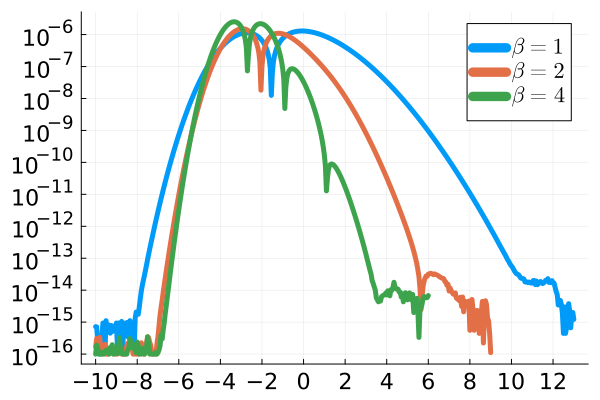

In [6]:
D1 = 13:-0.05:-10;
D2 = 9:-0.05:-10;
D4 = 6:-0.05:-10;
er_cdf = err_cdf(D1,D2,D4)

The following table shows the absolute errors for $x=0,\pm 2,\pm 4,\pm 6, \pm 8$ when $\beta=1,2,4$.

In [7]:
X = -8:2:6;
err = zeros(length(X),3);
B = [1,2,4];
V = 13:-0.05:-10;
for i = 1:length(B)
    global β = B[i]
    F_cdf = TW(β,x0=floor(13.0/(sqrt(β))))
    for j = 1:length(X)
        temp = X[j]
        ind = findall(x -> x == temp, V)[1]
        if β == 4
            err[j,3] = abs(F_cdf(temp/(2^(1/6))) - TW4[ind])
        elseif β == 1
            err[j,1] = abs(F_cdf(temp) - TW1[ind])
        elseif β == 2
            err[j,2] = abs(F_cdf(temp) - TW2[ind])
        end
    end
end
err1=err[:,1];err2=err[:,2];err4=err[:,3];

In [8]:
Table(x = X,β1 = err1,β2 = err2,β4 = err4)

Table with 4 columns and 8 rows:
     x   β1           β2           β4
   ┌──────────────────────────────────────────
 1 │ -8  1.83203e-15  5.02429e-17  2.37615e-16
 2 │ -6  7.27812e-10  9.60208e-12  3.30526e-12
 3 │ -4  3.71489e-7   3.60002e-7   1.00431e-6
 4 │ -2  6.55339e-7   1.02677e-7   2.1617e-6
 5 │ 0   1.29466e-6   4.01435e-7   3.32036e-8
 6 │ 2   4.11643e-7   1.13741e-8   1.67004e-11
 7 │ 4   3.35236e-8   3.28623e-11  7.10543e-15
 8 │ 6   9.57533e-10  3.18634e-14  6.77236e-15

### Error plot with respect to $\left|\Delta x\right|$ and $M$

The following plots show how the absolute error (CDF) over the entire domain $x\in\left[-10,\lfloor 13/\sqrt{\beta}\rfloor\right]$ changes when $\left|\Delta x\right|$ decreases and $M$ increases for a fixed value of $\beta$. $\Delta x=-0.004,-0.002,-0.001$ and $M=\lfloor -1/\Delta x\rfloor$ are used.

The following are high-precision values of the Tracy-Widom distribution function for $\beta=2$ evaluated over the domain with step size $\Delta x=-0.004,-0.002,-0.001$ respectively.

In [9]:
TW2s = [0.999999999999999999837634313800035690159240899724293768881819303199720524611712241,0.999999999999999999836631319415088232473478019844499306505062771954372138088077681,0.999999999999999999835622181255140248953288574461243569445215512536558687940208584,0.999999999999999999834606862013927574901969271429206223471391798048030801972151914,0.999999999999999999833585324160691487901242050801959875794850470612399088131115498,0.999999999999999999832557529938840371859508293290208422690282444045259064617515550,0.999999999999999999831523441364603479626964735907285911262045748526765708578131340,0.999999999999999999830483020225676747996822688354837250610328045734400278689979539,0.999999999999999999829436228079860618644787484536338170261806679242074554677776402,0.999999999999999999828383026253689818290342629434786923777962906006726217132903890,0.999999999999999999827323375841055051093234172563180940740764051580537024070911080,0.999999999999999999826257237701816556026856767127156239437194532592226531427807184,0.999999999999999999825184572460409481696994922222163890406017505658242621171683816,0.999999999999999999824105340504441030799562338307611735235376876218464447998721769,0.999999999999999999823019501983279326134600099264164240159968114001112248540669275,0.999999999999999999821927016806633949815831993605634428730772988790220286847383852,0.999999999999999999820827844643128107035523419320308299181143693943694162032291261,0.999999999999999999819721944918862365463240207900056069606110670156441439722246261,0.999999999999999999818609276815969921074346249751241524055724410035647028107148521,0.999999999999999999817489799271163340919704931294712651710039376688732603504541096,0.999999999999999999816363470974272733062049968853789845162095119885888707042355226,0.999999999999999999815230250366775293616857060095506745619865716225926633345519929,0.999999999999999999814090095640316180546269633242149122139331259528915236558994797,0.999999999999999999812942964735220663563700568849798813009016639087191475391500579,0.999999999999999999811788815338997499214137758147951821426249878172745111893180660,0.999999999999999999810627604884833479900915353100769361852019368099132475873378623,0.999999999999999999809459290550079105333765111411797814441498162574727890901114648,0.999999999999999999808283829254725324575323846861022251138242642682386167375547530,0.999999999999999999807101177659871296563934110841667310896001315527479751051636926,0.999999999999999999805911292166183116689526250662723267741280063110671116652169835,0.999999999999999999804714128912343456696601256419307226624893180843269405385107481,0.999999999999999999803509643773492064883835609438017369184610672723875360389984606,0.999999999999999999802297792359657073263591915726675861118546983100924126890720822,0.999999999999999999801078530014177058036632627264000567647443359164235965908900440,0.999999999999999999799851811812113799427588747339852598594946817234675509661335315,0.999999999999999999798617592558655686615221153402433704161923133942303746634890093,0.999999999999999999797375826787511713178219066500038857624244728086011786336949518,0.999999999999999999796126468759296008162198209244791102320637102766598377894584083,0.999999999999999999794869472459902847556680227098804011502558900465421788088534178,0.999999999999999999793604791598872090652144847207209765987009248871408650200978665,0.999999999999999999792332379607744985426736804878384016305462232043514898219832206,0.999999999999999999791052189638410286789870513111859046295000583776159787197886222,0.999999999999999999789764174561440631185796461029250600782851956251076688061961854,0.999999999999999999788468286964419110734164020846373767977416909609935993677773961,0.999999999999999999787164479150255989756725280435053919234879693436061650250760323,0.999999999999999999785852703135495506209563201668000772229100895083321367390403207,0.999999999999999999784532910648612700208584277213879443952373956914157412771684745,0.999999999999999999783205053128300211502480305012071496742378119049496848287308547,0.999999999999999999781869081721744987411925245908825893778329148140426645364618200,0.999999999999999999780524947282894842416420641995863551602616956429174385303306069,0.999999999999999999779172600370714810230925957365106194447263602083939370966749894,0.999999999999999999777811991247433228873197605444860246466291589587716821749634026,0.999999999999999999776443069876777498879601433508192663664058745027197937675860946,0.999999999999999999775065785922199454482047070234328694326780604556782612971996158,0.999999999999999999773680088745090287211607770111429066907540970876794763416368722,0.999999999999999999772285927402984961045325111272364377309046943394452835578842750,0.999999999999999999770883250647756057861642961519866149356526486500925780695254168,0.999999999999999999769472006923796991616858299137021257998547219773285869849140452,0.999999999999999999768052144366194529299906476412609523390436067237506959857793512,0.999999999999999999766623610798890556365703997619566811453767569346477473199116831,0.999999999999999999765186353732833023988141439266897360949502661554650747583280094,0.999999999999999999763740320364116015112641295068023558262309570441880347574031114,0.999999999999999999762285457572108865924958743619332962858257770197351906786998229,0.999999999999999999760821711917574278987596011418035559366833377699864251819988547,0.999999999999999999759349029640775363927811471140810699747355028443836944680053699,0.999999999999999999757867356659571541191721143687544246511393085286090005813458943,0.999999999999999999756376638567503244007401065705310522792710179776312725440206088,0.999999999999999999754876820631865353326192179829549388769947484425698855769822921,0.999999999999999999753367847791769300135573074379612376221828931638084917993909712,0.999999999999999999751849664656193769158988048013859320818746092940809787708759967,0.999999999999999999750322215502023937577886541431829993486588522726246173262399305,0.999999999999999999748785444272079182028932834044790540768875476430572173950294988,0.999999999999999999747239294573129186744869852580166068577596586686990498496358752,0.999999999999999999745683709673898385320855716950294182370826938424449356233766080,0.999999999999999999744118632503058668199223924290473309848879112855546895086476043,0.999999999999999999742544005647210287574535444148302525357283913445950347174796806,0.999999999999999999740959771348850891027480996705956468799972664959022095351617111,0.999999999999999999739365871504332614800641872607987874972972172899216287527673375,0.999999999999999999737762247661807167231315218685931778471869482308681509472626555,0.999999999999999999736148841019158832456542079738734627665217066477293081234228222,0.999999999999999999734525592421925324103130903166166002390113917999868689504570661,0.999999999999999999732892442361206418270832860395184287193951126321862012978200797,0.999999999999999999731249330971560294709885325144888340852595726807611829400310674,0.999999999999999999729596198028887514684883210435027361045815966219679508500348096,0.999999999999999999727932982948302563605351568586230197923013581261249843704076055,0.999999999999999999726259624781992886089463793561202540135291939281796296453941173,0.999999999999999999724576062217065340711064752275456538742849216139151108713868629,0.999999999999999999722882233573380001261503957130544513378177003941943869858137861,0.999999999999999999721178076801371230936747148503745079964860807924344593617989702,0.999999999999999999719463529479855955436801981717701938366824346716915877470682765,0.999999999999999999717738528813829060538651432097898338627141155189345394965546410,0.999999999999999999716003011632245839275623493217094167502562784744788149914195699,0.999999999999999999714256914385791413425424121151076591923479052786156681529665458,0.999999999999999999712500173144637053575908469658578739531244197053916534353400288,0.999999999999999999710732723596183321602049489666341837578646673011988745785073132,0.999999999999999999708954501042789958949469076774022646237301719722455799375595505,0.999999999999999999707165440399492443679311211228972121299643608868461230108328956,0.999999999999999999705365476191705138786144937121913289809171508722449078994111193,0.999999999999999999703554542552910953854973484789196470321623079424628150497117980,0.999999999999999999701732573222337441675280187720975824250763151632512082679204598,0.999999999999999999699899501542619250979347839161298934156239058456353988527573524,0.999999999999999999698055260457446856018831451457177659132266104124272845407207387,0.999999999999999999696199782509201483237730620964692907530459438236744979645234826,0.999999999999999999694332999836576154841482380894796776087344271271508213067068033,0.999999999999999999692454844172182768600863981433522442160401355626661246325280238,0.999999999999999999690565246840145132765742827524179022536109811731850685993885649,0.999999999999999999688664138753677874497423105302854829351331882170907767130925229,0.999999999999999999686751450412651139759400632064621073761812799355498749427284096,0.999999999999999999684827111901141002134734283371346712216919888720395715415573376,0.999999999999999999682891052884965497563959013441697630579310691203869360735078281,0.999999999999999999680943202609206201520486937169408980861793435415949980087594795,0.999999999999999999678983489895715264660754046353016800118838863331523486574392093,0.999999999999999999677011843140607822503955667363207460782803764247626080591968792,0.999999999999999999675028190311739694211058426455723337185294722435617471357101941,0.999999999999999999673032458946170285044864881287510989290044865870839401479763735,0.999999999999999999671024576147610606602223626571994791531404201219973663601557764,0.999999999999999999669004468583856328416007026040385334492570632210942189310393113,0.999999999999999999666972062484205774028205113478125552320096825697838401740699305,0.999999999999999999664927283636862774136391907318750229502590461617184897482368698,0.999999999999999999662870057386324288913893573587839114542494997836466905862770775,0.999999999999999999660800308630752711099210640652475571145325108086848431148221532,0.999999999999999999658717961819332760942602817790442065893559235327440666952488465,0.999999999999999999656622940949612883587218810897947050561991084864782902545384848,0.999999999999999999654515169564831058948728686375161065322050886612545902599702139,0.999999999999999999652394570751224933641076542367943306077982789358242594877975938,0.999999999999999999650261067135326183976700148946457743656766610988013159883263149,0.999999999999999999648114580881239018547345368660120662969643540894519605826836974,0.999999999999999999645955033687902728366420028269375924915230685025287407392319578,0.999999999999999999643782346786338192025667851718106980111692930681389498720760564,0.999999999999999999641596440936878242787781361828765442465099721479855453692276611,0.999999999999999999639397236426381804002396499376966137957472886028391299238962794,0.999999999999999999637184653065431698695704185576819965679585465121217446820433992,0.999999999999999999634958610185516038643658166358646879887006365842194789800750543,0.999999999999999999632719026636193097695437128743263660443395688955235336685515523,0.999999999999999999630465820782239573567415081013464873226046284156956101307437230,0.999999999999999999628198910500782141778390053942905737468587001424930960511527047,0.999999999999999999625918213178412204844199929021707750389922722420705863611747093,0.999999999999999999623623645708283739294098154116804862008226915999444268998598703,0.999999999999999999621315124487194142512353693240926203637085181212044954314593885,0.999999999999999999618992565412647980846461103683289485320293896509149482928568039,0.999999999999999999616655883879903539858080371440334622396063586522293617997979938,0.999999999999999999614304994779002077024354197060865549067725231904273916256450445,0.999999999999999999611939812491779676625554842155810253728374329923220495906979935,0.999999999999999999609560250888861605980075355931279796987688567842942264054689494,0.999999999999999999607166223326639071609582835197911624013048387987382449950856234,0.999999999999999999604757642644228273335676063856853550059096520632650373145323143,0.999999999999999999602334421160411653724618061235145699227671307220176361486930226,0.999999999999999999599896470670561239708627273565125622447609433269558427151229911,0.999999999999999999597443702443543972620790797895495626759509614397108700715520579,0.999999999999999999594976027218608922285890458546547787691355018277060587538124821,0.999999999999999999592493355202256280211288985317225035155002771656636724113151514,0.999999999999999999589995596065088026320490088569222926594143248695815355921121420,0.999999999999999999587482658938640163067043903151462709407763890367980304838633534,0.999999999999999999584954452412196410158098989961139390090756572613825597882140909,0.999999999999999999582410884529583252505084644241786696953554765213558765989167786,0.999999999999999999579851862785946233403723360796984295173797801112551826408003026,0.999999999999999999577277294124507384326803538699391421014073346398883825606366334,0.999999999999999999574687084933303682090867355011271763068538365799772870665697373,0.999999999999999999572081141041906423532168573794869305337049547482967823029346575,0.999999999999999999569459367718121407197910150057917592213946277637422466174041626,0.999999999999999999566821669664669810925861995926755072257949346498905492504394644,0.999999999999999999564167951015849653548965246243659559245554890065815947425196619,0.999999999999999999561498115334177728321430730625344039525388469950436711655464983,0.999999999999999999558812065607011895019115955576059894359774363303153451476339660,0.999999999999999999556109704243153617019596438797117967575526158482321022994548200,0.999999999999999999553390933069430629016313321537945831102235206272045560625146725,0.999999999999999999550655653327259620366459304130955475326324868446321737001115442,0.999999999999999999547903765669188818413838481843359109125073205183971056136428822,0.999999999999999999545135170155420355465781866006282810856303479707202589221685243,0.999999999999999999542349766250312302437298407609011689221532372943622499254445932,0.999999999999999999539547452818860251505970230534319461366137906270831199069369661,0.999999999999999999536728128123158329447639446888190946067605163770042975803981843,0.999999999999999999533891689818839522645661168509095354988486173836169644958274419,0.999999999999999999531038034951495194085391830695247899249209113506819362573094979,0.999999999999999999528167059953073671960622272693230792479215029002758255980023817,0.999999999999999999525278660638257788829829622399618927702838093122874402066208839,0.999999999999999999522372732200821249567389238866745241573433115020661992551545853,0.999999999999999999519449169209963705658235984729765457098487875320349929215464043,0.999999999999999999516507865606624412683871020415274429531798096320757024562795339,0.999999999999999999513548714699774347143054100801896414515622678144810509426814162,0.999999999999999999510571609162686658041979859090744696519778532289643796769160842,0.999999999999999999507576441029185327976187505916059375475125046291119171554278100,0.999999999999999999504563101689871917709874355122368936781264107881446375885405480,0.999999999999999999501531481888330267537652088453964422629470589823876691024885497,0.999999999999999999498481471717309027989078042632661257134294524806048928274269051,0.999999999999999999495412960614881891707489271938479003880473257945276619292897336,0.999999999999999999492325837360585397601741809782306502638922672891743311322630379,0.999999999999999999489219990071534177632388399842279596461538239450372606755760462,0.999999999999999999486095306198513515852591840055913701610121232378741022006756587,0.999999999999999999482951672522049088578644702312596981804972662962850615731067723,0.999999999999999999479788975148453753815326149840068654040334599109211564266374677,0.999999999999999999476607099505851257307449336658519392504704150148913730313770918,0.999999999999999999473405930340176721830814772888790163892156763442931873061764344,0.999999999999999999470185351711153785573362279409128735292886501045970880837248476,0.999999999999999999466945246988248254690582807370283384883072531696392002108460887,0.999999999999999999463685498846598134348187402449021218950612579020251180551566143,0.999999999999999999460405989262919901789609757810304752004864995195779069987119688,0.999999999999999999457106599511390884186116797518285466470999308748478316399369979,0.999999999999999999453787210159507603243094103415020451647531294619681790600778852,0.999999999999999999450447701063919947747435148241651920341981567556247934691198559,0.999999999999999999447087951366241034447870495383394592584810561049728264340738351,0.999999999999999999443707839488832616862500504118422305176579309841062887294112497,0.999999999999999999440307243130565900805717634608992073017241516654080797187770865,0.999999999999999999436886039262557624620097037238566144133040592920872011924509357,0.999999999999999999433444104123881261287671455849606776028622377475413967058290823,0.999999999999999999429981313217253198779263154228386943318988663719048050370573564,0.999999999999999999426497541304693754180196029990053378258720953916787624960957113,0.999999999999999999422992662403162876305729609171172705661686901201979617705792970,0.999999999999999999419466549780170390689917376061482132600055503763729118903642560,0.999999999999999999415919075949360639997268901446472758584679191422495940969055333,0.999999999999999999412350112666071372067562360680077052345436525095193669305555274,0.999999999999999999408759530922866726960385009123561279858508644409653742287975126,0.999999999999999999405147200945044173517447590020869558491951401222624519975169398,0.999999999999999999401512992186115245107397926880301298569115714623269956931633599,0.999999999999999999397856773323259923359722390654885302448327777643621857553365953,0.999999999999999999394178412252754517831344676130587782456874028321726990601881855,0.999999999999999999390477776085372888681682368728735815785621881012858072563691240,0.999999999999999999386754731141760858559175980504020907848502036603450191362256839,0.999999999999999999383009142947783659024635181072581607693240091030309664710991675,0.999999999999999999379240876229846255954125393827228948231575886249629531089258194,0.999999999999999999375449794910186397476517167254392179365528823793218475192908387,0.999999999999999999371635762102140227108213010678578713882809804232579981135491521,0.999999999999999999367798640105380303849923795771649561447857621731457863425006898,0.999999999999999999363938290401125870107661308520609617632164229556998340151788474,0.999999999999999999360054573647325207392316875457245369879734149416839520308794112,0.999999999999999999356147349673809918839279811949164599088587237101661259969290310,0.999999999999999999352216477477420976671485222249739772661891617291633996938026158,0.999999999999999999348261815217106371806039736853305784149664196104997784952677847,0.999999999999999999344283220208990201876127260732649477523531256224612746326518659,0.999999999999999999340280548921413033006215725804203927972274949692594080491808476,0.999999999999999999336253656969943369739641032491759175103660689825322430956866229,0.999999999999999999332202399112360066573406508158698202700067953402946989300532457,0.999999999999999999328126629243605513605475822795299940985597115277983037784689317,0.999999999999999999324026200390709427844924740876481249292195600562910493868615813,0.999999999999999999319900964707683080775022545912839154448316584301365712316472709,0.999999999999999999315750773470383791793607480157033068357750206459873559346688632,0.999999999999999999311575477071349516183971960648645584470077105596427179734975908,0.999999999999999999307374925014603355292852363036886443517182135216961652260788768,0.999999999999999999303148965910427815609994338569029284110557845230070448253842181,0.999999999999999999298897447470108642456107311930612393653951761851498877514799332,0.999999999999999999294620216500648052992800194520001589885994385307713212675409485,0.999999999999999999290317118899447192269273466161690829348821348662231655783698213,0.999999999999999999285987999648957635016099484896065287764438872495219095099173057,0.999999999999999999281632702811301754886321864850897275830116357086785936353592370,0.999999999999999999277251071522861781828314529732226128186014147143249385044982868,0.999999999999999999272842947988837367253329944574928432619898683235553260106032150,0.999999999999999999268408173477771475633402217508251603794658889411133655233745233,0.999999999999999999263946588316044420132222237954277540561663336308740570489093357,0.999999999999999999259458031882335858832736593568237073228341873552975836802653115,0.999999999999999999254942342602054567080507324221130465910214756159023878654246855,0.999999999999999999250399357941735800411273088522906128243614673918521595787244024,0.999999999999999999245828914403406061474641319164003731605363935993808740732679240,0.999999999999999999241230847518915083303382530390989300038714980617687868064299654,0.999999999999999999236604991844234840209359036232149844078420475083194122748670100,0.999999999999999999231951180953725396512667682003288083029682914100060593012993842,0.999999999999999999227269247434367402230076341868431968196407435557743320685929021,0.999999999999999999222559022879961043762253265894903217575638872295830832440947219,0.999999999999999999217820337885291256526593060596759667378201411851400504452805694,0.999999999999999999213053022040259005383599161253886816467689345431106915848403103,0.999999999999999999208256903923978437599755919548565800684050213824584406433867189,0.999999999999999999203431811098839711978579515862660980931793266263189880518066408,0.999999999999999999198577570104537306674041252858715156755450462082212489196453830,0.999999999999999999193694006452063607076774646984164508017244851101143590032763095,0.999999999999999999188780944617667574033374167844262802701710624969820677623800332,0.999999999999999999183838208036778291522633350805886910810050935582895785951073723,0.999999999999999999178865619097893191769718001767853522285723815742134812938743030,0.999999999999999999173862999136430754629990806993597958066556790897718639101932349,0.999999999999999999168830168428547476918461142612883123085045157976895278928873633,0.999999999999999999163766946184918906198592339303525599713921942456987911674182526,0.999999999999999999158673150544484532375421992223422266908932746927722483453358556,0.999999999999999999153548598568156329262602810891318281493902145205789400762397766,0.999999999999999999148393106232490737111015475706216099951669151540010600749597035,0.999999999999999999143206488423323875898004304247512055497288029229578127488718053,0.999999999999999999137988558929369777981004327227955096727762008846591022352090315,0.999999999999999999132739130435781427517327524427012523871230135768568024947075685,0.999999999999999999127458014517674392843119165096519613378580163066903170825927678,0.999999999999999999122145021633612836788944920621813260658370685396323374800920588,0.999999999999999999116799961119057688687087949386423097003593681688422169245111391,0.999999999999999999111422641179776760596384567789103425230227542835743640379788195,0.999999999999999999106012868885216589034269282258134999106050279763925524739132579,0.999999999999999999100570450161835782262596520931900301571798337908928873843557127,0.999999999999999999095095189786399651923718816301712478149835962628409459469233128,0.999999999999999999089586891379235906566190686123768156956930089248732595762612375,0.999999999999999999084045357397451183335295061446449060915203653577133034086078775,0.999999999999999999078470389128108192832315626226517198108628653433902795476992640,0.999999999999999999072861786681363250868064456542771686550887164801710506013857596,0.999999999999999999067219348983563969550580256777571280037950190415351907176056058,0.999999999999999999061542873770306878854098446176702803647874355748769386643598063,0.999999999999999999055832157579454748516320294526865097973517528126460895148022625,0.999999999999999999050086995744113378803633963497535403737650780692254020924089565,0.999999999999999999044307182385567627369225183063897867055363713267482408987312219,0.999999999999999999038492510406176438106918661145135841502243366884177718514291542,0.999999999999999999032642771482226636574072246946123891727353065061134724871196275,0.999999999999999999026757756056745255219863178067052698453687289593968238116348269,0.999999999999999999020837253332270150310818046418400205002892054200573764779461092,0.999999999999999999014881051263578671093403799890783884992792364364442379599552078,0.999999999999999999008888936550374140373874309268474001799912394710890830225470710,0.999999999999999999002860694629929904328313697643887321782312391489811498078957676,0.999999999999999998996796109669690707980891446867387463327627966364646794345875891,0.999999999999999998990694964559831151405702725064490417509723511759157925340989916,0.999999999999999998984557040905770980317167650866038612235234194469470153729890069,0.999999999999999998978382119020646963315762319546464814966136902170865112385443709,0.999999999999999998972169977917741106649809124232946094421212093550720144410443989,0.999999999999999998965920395302864955940120735607129827376942135091565730874094906,0.999999999999999998959633147566699732892427342057998511842123709882131873832062836,0.999999999999999998953308009777092053592676445875713188008546814724514782315396251,0.999999999999999998946944755671304973542434466156940390609016348075009737198223975,0.999999999999999998940543157648224103145695180218011521068437437507081960412809525,0.999999999999999998934102986760518535904366964015115329802359895630488709623253240,0.999999999999999998927624012706756330117523945506773084403774265934372180861673481,0.999999999999999998921106003823474283409120394524981840003568185658183505308849775,0.999999999999999998914548727077201737930237522989550694863161377242912558334291859,0.999999999999999998907951948056438152595011696294516705784648005461104241409610154,0.999999999999999998901315430963584177214136946812819327812002553020655395175915232,0.999999999999999998894638938606825961886196469062894621585771518086488991831373876,0.999999999999999998887922232391972433495011046122234567048267155270173128795897040,0.999999999999999998881165072314245269640650437567106087047354552104060006798709793,0.999999999999999998874367216950021298802689724650016853278700549965721863463168340,0.999999999999999998867528423448527053996659276183430462478936171879027542803617333,0.999999999999999998860648447523485205638386928383627489195901112534785876069052838,0.999999999999999998853727043444712597776016464173634010343619483261274782321610754,0.999999999999999998846763964029669610285859571909277238778835277262205378771528712,0.999999999999999998839758960634960568055850937862192323674492098345404302690997001,0.999999999999999998832711783147784916599179495263775011325595527131203498253338337,0.999999999999999998825622179977338881950614364571425786965121726544735576118391012,0.999999999999999998818489898046167331099082657812912253395257206232063623570911273,0.999999999999999998811314682781465547602138799574009495913716763095852836399850284,0.999999999999999998804096278106330635411041784381226909555201716460950432347384722,0.999999999999999998796834426430962262309178020191905720303911698313044199433515742,0.999999999999999998789528868643812452731483003610432739656509898629740711407217721,0.999999999999999998782179344102684138088274663883422608612276062653181834894282153,0.999999999999999998774785590625778171063464154205702000304525849618448157629664511,0.999999999999999998767347344482688508694405238363824243269172490518546559919148473,0.999999999999999998759864340385345267368630018189874181754701377800714874419319514,0.999999999999999998752336311478905351191345093097360786032863395156667159802507549,0.999999999999999998744762989332590353486776576486070187116362381868032494100338147,0.999999999999999998737144103930471429496202671844578523717151854053666510481590363,0.999999999999999998729479383662200836625746406684587427392077538448474123760458788,0.999999999999999998721768555313689836877666022143813819240775873433677882864186372,0.999999999999999998714011344057732654369923520186186666020159234817509956419098194,0.999999999999999998706207473444576179110179790114935385130957180876289199254930758,0.999999999999999998698356665392435106442004092660100070527633034330400335028344763,0.999999999999999998690458640177952199822942702467983812801426872004625474765815348,0.999999999999999998682513116426603362826112134293058530848952953022088976853131989,0.999999999999999998674519811103047204479112245506873800895484841926792687432453095,0.999999999999999998666478439501418780266238962087426947577309228838808784212234730,0.999999999999999998658388715235567189322160463294102776770460102136231099739627477,0.999999999999999998650250350229236706537349128285405687646350242991226132388951984,0.999999999999999998642063054706191126477578841164158437257322690270468777643944075,0.999999999999999998633826537180280994191647511528399130173666464403546573406961594,0.999999999999999998625540504445453396143111733152684141368777420573347057396813102,0.999999999999999998617204661565703982653167905268264378763704730113727244221678061,0.999999999999999998608818711864970891382825102506382306181784300198990291923706979,0.999999999999999998600382356916970239513132414825934492298523388635960266310550871,0.999999999999999998591895296534972850402389990363926910499030256769249639528483562,0.999999999999999998583357228761521878608930891939743309098868735239196845135752455,0.999999999999999998574767849858090995267152097161351331397309664692905170794271058,0.999999999999999998566126854294682793892939191714863919821173870881341990547292126,0.999999999999999998557433934739367074772411866502347795980238943071837770820438958,0.999999999999999998548688782047758664154957253193464959798287304986275839293650725,0.999999999999999998539891085252434422527756119456204993564033280482511076513040045,0.999999999999999998531040531552289094294383371499662890935457617528324683358603425,0.999999999999999998522136806301829649214519229617295538855517999463058798467962508,0.999999999999999998513179593000407763985280577587035956260323887729518579202264914,0.999999999999999998504168573281390090357112736139647846479004729084618497506161523,0.999999999999999998495103426901265954178509341208936926001138478708780633657284237,0.999999999999999998485983831728692127753990854398991822473986253725511506355620434,0.999999999999999998476809463733474315878708897445460944254433803926151477255472573,0.999999999999999998467579996975484993880692150347303225936752279297044762462385763,0.999999999999999998458295103593517233958047712974179063280923213075600407964226353,0.999999999999999998448954453794074154043316991907223418342592863111313166898835409,0.999999999999999998439557715840093621360594386743651193158436870314997268020973686,0.999999999999999998430104556039607840762887019055749658301294078469759963278907290,0.999999999999999998420594638734337455847460834040111464511472677783258719267607220,0.999999999999999998411027626288219788745518624601599694194362990070428064135481981,0.999999999999999998401403179075870842369424546887029689351783494789970377420384166,0.999999999999999998391720955470980686775762831664969684147109352055905684544436951,0.999999999999999998381980611834641849165730611960313000860443422886232675104935751,0.999999999999999998372181802503610324895650694596452468181090284813343427327678786,0.999999999999999998362324179778498824709683956556617826276072426687946365483781462,0.999999999999999998352407393911901871234056743403673931551955680880702961817720627,0.999999999999999998342431093096452355587229723800903462960098578810843234757717747,0.999999999999999998332394923452809162763354287283565533638854886818674295549929627,0.999999999999999998322298529017575472237023574152792674564752689773715907141652172,0.999999999999999998312141551731147338015660043541611145875774118601023381419772212,0.999999999999999998301923631425492150131822197750242997038357557970384014628678251,0.999999999999999998291644405811856577321191397876722079716042996673011961905619340,0.999999999999999998281303510468403588372946966209707126129631331561709113666462978,0.999999999999999998270900578827778147367584940059810129418529088354867882708181268,0.999999999999999998260435242164601175732913509563988395143526639632512050922200346,0.999999999999999998249907129582891371751896550995277518523089549197539678905346335,0.999999999999999998239315868003414475846145590324816858868053812319190435202402715,0.999999999999999998228661082150959567636109450844483810576737655405847853599606063,0.999999999999999998217942394541541978443308821703356694732070341744693420086600865,0.999999999999999998207159425469532400551238713827619125412026816170445572031272484,0.999999999999999998196311792994711772179743540853590786537617598266728660867652620,0.999999999999999998185399112929251514752685280685966684206363508347057526419030556,0.999999999999999998174420998824618696650502351594413480156170748238905127728414529,0.999999999999999998163377061958405695237722594995659342180853524787507988813056491,0.999999999999999998152266911321083926540574818856401257951270054194278094821760499,0.999999999999999998141090153602681209521466046501017041241573474294720933973778838,0.999999999999999998129846393179382329455181860775247520661061904970686830069993801,0.999999999999999998118535232100052362456150555868011347335053761864507228899928703,0.999999999999999998107156270072682320736913326945077496300966059318667097498314145,0.999999999999999998095709104450756675694987152701436534284373585765324840920030165,0.999999999999999998084193330219542313428518660700466178851974579460325428840475161,0.999999999999999998072608539982298474770430001559418817257869150060418483442016487,0.999999999999999998060954323946407229406075073998158766875108253187629160450518375,0.999999999999999998049230269909424031100679401327663485670315130399590222565368020,0.999999999999999998037435963245047898509952206228218853625248222042346813399999403,0.999999999999999998025570986889010763480156989804807877739386213532509499908012081,0.999999999999999998013634921324885526162528995849373119906860936582315709932343445,0.999999999999999998001627344569812353671155710456609435648103844873436805180354047,0.999999999999999997989547832160142756403210962359289920613377747845163948628306587,0.999999999999999997977395957137000973515674773271489058685631261216040666183444097,0.999999999999999997965171290031762196413299951530787816663180099965328205807465755,0.999999999999999997952873398851447156448522184159189214496114918113666761632529893,0.999999999999999997940501849064032600365172283910165540926779557066910581179958848,0.999999999999999997928056203583677174334156072443794397599866997953983913023338121,0.999999999999999997915536022755862234730637471350588376775703417461808846872121690,0.999999999999999997902940864342447101088611629216564326115698838552884001217180720,0.999999999999999997890270283506638263940004789818439137551550216612713548785682145,0.999999999999999997877523832797872057501503110649127470890421272379326953143884146,0.999999999999999997864701062136610304413110328954900149424771502915977289915024256,0.999999999999999997851801518799048436957880148428321817868400673021122632267553921,0.999999999999999997838824747401735596402279132793484160061384118635456974052642366,0.999999999999999997825770289886106209291124934493417767708113451560430715569860531,0.999999999999999997812637685502922536709927589452571758028136516884818514536901925,0.999999999999999997799426470796627689690652642047085696105740374911629300948695587,0.999999999999999997786136179589608601084337832806180240862422671022057189874550472,0.999999999999999997772766342966368441355543322565249671158864837301411463213869464,0.999999999999999997759316489257607962869211808615106511703808547503172272706479764,0.999999999999999997745786144024215254340071806395286559469952536293536544178218448,0.999999999999999997732174830041163384198146745224110474904109985132635190894259166,0.999999999999999997718482067281315408691145801877251420804870595118042167108654797,0.999999999999999997704707372899136217595420535073085506948207447905305857637416155,0.999999999999999997690850261214310687441684868206228099784159025013277328223296771,0.999999999999999997676910243695267609179724793077567954638376549587747350693135273,0.999999999999999997662886828942608854207777842373614846784500266016374573216806178,0.999999999999999997648779522672443239677049921505443830811048007236543523585543926,0.999999999999999997634587827699624550949867026546091276360609526554224227613703427,0.999999999999999997620311243920893176041139734353278531488160731965033486443562619,0.999999999999999997605949268297920803807056665363931954573632272964743420649366934,0.999999999999999997591501394840257634562126420053685061114251348565007742017450895,0.999999999999999997576967114588181548705762304273019858203933313359485630230660157,0.999999999999999997562345915595448675822456508067216711676771757847599892949928817,0.999999999999999997547637282911944803585125799783211909281672192663458785034541101,0.999999999999999997532840698566237062639334243327491743414830208102621224290880184,0.999999999999999997517955641548025320476714428140193686509117480943750480386437743,0.999999999999999997502981587790492714118921188531340066764049461136754697809841856,0.999999999999999997487918010152554748228764231430206273770453805830562350356209460,0.999999999999999997472764378401006382042681416703344708721464690309471110203485168,0.999999999999999997457520159192566525278335044017394932306649883019379811522862020,0.999999999999999997442184816055819359912741268614033355229976439690163985251163107,0.999999999999999997426757809373051901449879038200260322155837928593169749888084443,0.999999999999999997411238596361987210002070523497971697105762907019466354755401634,0.999999999999999997395626631057412658196480178240871087295319051689322819130295786,0.999999999999999997379921364292702659586744043427800076584492908926876120641714881,0.999999999999999997364122243681235257899913895910024021090014593936091389811045142,0.999999999999999997348228713597701974080480978080161547095921894952751175877990650,0.999999999999999997332240215159310304706129430511808734634052708915505557682960822,0.999999999999999997316156186206878261943957728712538600794913299078448770278306397,0.999999999999999997299976061285820341791094390472339993517602854563572295528002514,0.999999999999999997283699271627024303899818406366074983247411423578091776362666542,0.999999999999999997267325245127618142824371127561384706700955251767376830026450455,0.999999999999999997250853406331626627044510033974025855722603463944933507355425428,0.999999999999999997234283176410516778619400647803051791272726014589187363203003688,0.999999999999999997217613973143631662804565029374442364602659410019315304008346212,0.999999999999999997200845210898511853424197398800356981061344511174453291677720252,0.999999999999999997183976300611103936231112497920617114316355683148279025848653674,0.999999999999999997167006649765855408906802793888763193570565535824090479043847151,0.999999999999999997149935662375695332754438398928501274568151709719676909764726332,0.999999999999999997132762738961900087518039926227799426363486254069984206102235373,0.999999999999999997115487276533843577121380118232951819444488890484946078522007074,0.999999999999999997098108668568631230460315078764873623656421606144831942882998439,0.999999999999999997080626304990617137702099828705439043349172168884637098433235236,0.999999999999999997063039572150803658844694603920285897809944443990484239649861512,0.999999999999999997045347852806122837568006140971081355413664577770374244252601966,0.999999999999999997027550526098598949667319865151130036233878932107286373416567985,0.999999999999999997009646967534391511596751514118467182959687631733532661005782882,0.999999999999999996991636548962718070867266796874370808502000403063053218748424943,0.999999999999999996973518638554656096239571087079246053011254005450283386392761671,0.999999999999999996955292600781823281826843150547742052329887315536856576010086415,0.999999999999999996936957796394935575375762158574676580691569684661664626315224113,0.999999999999999996918513582402242237126439768087139750863974429582014720022755209,0.999999999999999996899959312047837231762602256975448236198043016753412126441052937,0.999999999999999996881294334789846252052554359378410907684428781060008021268133919,0.999999999999999996862517996278488668848978689461129999438223735286782247940462052,0.999999999999999996843629638334013698161363975455655648360423195971438275048821926,0.999999999999999996824628598924510072038692611035182125723145236053919779628568198,0.999999999999999996805514212143588496001833488126627877410264780499188575087524094,0.999999999999999996786285808187936171744759277345578381627058000974980477064675519,0.999999999999999996766942713334742659781117192879786530513431683981721964231076645,0.999999999999999996747484249918996352647707088120891634893937637561159681018217411,0.999999999999999996727909736310650825188938090192048046419237449909105939977138759,0.999999999999999996708218486891660324336221849067057337347759267686236615385961589,0.999999999999999996688409812032883656663393139820233275156432456923336662969160423,0.999999999999999996668483018070855727843502637022161348156952481703609842772520196,0.999999999999999996648437407284425983953577129933678558674260918519328402596306645,0.999999999999999996628272277871263000372063543103174570143119885237809427895620454,0.999999999999999996607986923924224459788538468434920997163024005178977886925778186,0.999999999999999996587580635407591756596747419398243252596324846102079198243380511,0.999999999999999996567052698133168460670009918230820592623784726797846704826756206,0.999999999999999996546402393736241869222359366366050455179099947495896945730208657,0.999999999999999996525628999651406871139351278004704957245055500017112713375067910,0.999999999999999996504731789088251343819140031703671957647603369762544365379770569,0.999999999999999996483710031006902298197062270146465756746069324414215386687612913,0.999999999999999996462562990093431983235443205377779428516351256647907432797730377,0.999999999999999996441289926735123156744528409884728356679191818290516982514792736,0.999999999999999996419890096995592724960205526060281211227277829103852164626151926,0.999999999999999996398362752589772948839384325994134152773470125747926983260083849,0.999999999999999996376707140858749410544415599744579204654521775605604587980837591,0.999999999999999996354922504744454929073614620313092108153743959649608436275014464,0.999999999999999996333008082764218609455677878215051204347306605847422792846696830,0.999999999999999996310963108985169205361406118383609981485009765459195526892450634,0.999999999999999996288786812998491970396535433674786581059804671254071342674645268,0.999999999999999996266478419893538168724493521024927463796134396623788794670816935,0.999999999999999996244037150231786411027401695042231250376812737754546578647712729,0.999999999999999996221462220020654977147495640379267723837171147533109903071715986,0.999999999999999996198752840687164282059199179753131835208220832867693648757455406,0.999999999999999996175908219051448637104214796326061581203037675375673630324056383,0.999999999999999996152927557300116453678050776955373462872348753065070780145231001,0.999999999999999996129810052959458031786245374420217276976941721788418402451627060,0.999999999999999996106554898868500071092030294173232774177660575753356113713153952,0.999999999999999996083161283151906037254155296609488159940552431373669063390705107,0.999999999999999996059628389192721511503928197492062185524489370373475291014960053,0.999999999999999996035955395604963646534064697152806339959092950223441136388254637,0.999999999999999996012141476206053846868544141330136371634771877032424047620959788,0.999999999999999995988185799989092786952183594597857311106579129734844346662266563,0.999999999999999995964087531094976875240925782346126704367210654664769205020751121,0.999999999999999995939845828784355267588738025552054453016988966818495456280117148,0.999999999999999995915459847409426528214389951550654574089015056127867201386578850,0.999999999999999995890928736385574031491067407950535922126130741611627882128451549,0.999999999999999995866251640162839192733637722573364988402234524965477709030611569,0.999999999999999995841427698197231611062255514967701928009297917770192424194728927,0.999999999999999995816456044921875202296736133783856206357063097215548284046086629,0.999999999999999995791335809717989394683572107889797568978426829872865046137905048,0.999999999999999995766066116885704455076472571668182910452445639602263416064331249,0.999999999999999995740646085614710007981711441515342079826597777402765242575236635,0.999999999999999995715074829954735804641221332769140473945541470187712802930983293,0.999999999999999995689351458785863794059110127861592150238861350416993186444713952,0.999999999999999995663475075788670542580948208854159212219469926795464385278734800,0.999999999999999995637444779414199043309618275328107995640753553229518915762393771,0.999999999999999995611259662853758951286577155270517168766048665623919415709614734,0.999999999999999995584918814008554274982889999751807779261019429676435492661746642,0.999999999999999995558421315459137549230200789164251415659543322692199516402816209,0.999999999999999995531766244434689509277737362054571179568767731621950983503986619,0.999999999999999995504952672782123280187351530168464079539868471616282768740847437,0.999999999999999995477979666935012090274301714215668623486722323561192497747548385,0.999999999999999995450846287882339511766832494370944445992601200290109523688153503,0.999999999999999995423551591137071226292427204630380644649513731681129793475210834,0.999999999999999995396094626704547307202740009819038349056919653212156172715691757,0.999999999999999995368474439050694005122485694562152694153818695821964505709874204,0.999999999999999995340690067070054017449810673720387290839521648677616106744544327,0.999999999999999995312740544053634216846718610296513906093679522059285308411481450,0.999999999999999995284624897656569808037808699331138711865977807723534480483210338,0.999999999999999995256342149865603876483733432740813946821470816545540644024877943,0.999999999999999995227891316966381286712223871746623929454221078371024340401010412,0.999999999999999995199271409510555882274091570389110830454559002366423532889666713,0.999999999999999995170481432282709933444123839204313792863598708923919756984392443,0.999999999999999995141520384267084772907068604806219257312901537309683120528312957,0.999999999999999995112387258614121553756781365098647178151046263042438960341312415,0.999999999999999995083081042606811058191903376242263446162951287028983336538395511,0.999999999999999995053600717626851479313980005371139949267954233995597741236457560,0.999999999999999995023945259120613092423532960347898814636289467037025828441284159,0.999999999999999994994113636564908726166090726414715962328722392396701079077548003,0.999999999999999994964104813432568937803377900118004884524244315937557701990310013,0.999999999999999994933917747157820790774585147783765629527949714363548045849741489,0.999999999999999994903551389101469126568705192162512746093058050502165885960940124,0.999999999999999994873004684515879216751143533212968409320028213147672713253203220,0.999999999999999994842276572509759674776011542256184715494655371380565598000173063,0.999999999999999994811365986012744500969499150958552390364693048862128117359479419,0.999999999999999994780271851739773127789318613776564772697154542758802236622999111,0.999999999999999994748993090155267326150222783288515307547249668736349603883039260,0.999999999999999994717528615437103827255843028334254328456151964759027971944875809,0.999999999999999994685877335440381507992374363285963408445855419849248604561515265,0.999999999999999994654038151660981981519768548072841856835364033982812624894325468,0.999999999999999994622009959198922428240888849208575755655393505784157966216304801,0.999999999999999994589791646721499495838340784504009911409899724951605729127064921,0.999999999999999994557382096426223090542228441513577433419866297318622197906564174,0.999999999999999994524780184003538875229701760392973918224606759594502948842053114,0.999999999999999994491984778599338283358661363806145394139066370621534922197615900,0.999999999999999994458994742777254851103177912124378990296938755204434826667460928,0.999999999999999994425808932480745663386865322441680418564825418374522857594810603,0.999999999999999994392426196994956702802423219088965190154053485832491526518758152,0.999999999999999994358845378908370883660634323151696495262216810653988592489320488,0.999999999999999994325065314074237546630066712744614587155873962055216902084191656,0.999999999999999994291084831571782182609387494573201913718061800568289862566720685,0.999999999999999994256902753667195147617340841382825295277631320814846950372212546,0.999999999999999994222517895774398123590875905001447828518807431952219667069285792,0.999999999999999994187929066415587073049424055801007463096380548791901587403254366,0.999999999999999994153135067181550428612714375001278166342966906922368946780905154,0.999999999999999994118134692691761251350574382480683438741754582535504147954182753,0.999999999999999994082926730554242084895681557683115043103184053004997073565085750,0.999999999999999994047509961325201225164001128892073529989343096855542067507715840,0.999999999999999994011883158468439118402456570810695041930629296822559311996392131,0.999999999999999993976045088314523593119019840510569002502636148858277902398192198,0.999999999999999993939994510019732624246666044171149436415482816684454637383696384,0.999999999999999993903730175524763320649298270737539726681572712197318701232987745,0.999999999999999993867250829513205819794597919123746385286031082817103876647379700,0.999999999999999993830555209369780766095577998628662299192727063710574634733715754,0.999999999999999993793642045138339042059194457797995345996810962050177058400897692,0.999999999999999993756510059479622413976485293184165750562718481233691485878985379,0.999999999999999993719157967628783746444139536470073435693726763427298505717811045,0.999999999999999993681584477352665432521927572230183012587941889966464160849862505,0.999999999999999993643788288906834678803828774867813298918329651573146992303595490,0.999999999999999993605768094992374277112749161097807703113828059953660178974603024,0.999999999999999993567522580712427486919206430033394826293271844503531518604465393,0.999999999999999993529050423528495644933047003679388771813043255392736224399861600,0.999999999999999993490350293216487110623922878204859379175402100235566967960578307,0.999999999999999993451420851822516148690667430767425837643116641636144337009998780,0.999999999999999993412260753618450341721639759729193267936016678215901431486082191,0.999999999999999993372868645057205118467326405103052888359014883844392927252439822,0.999999999999999993333243164727783975282765907228273122890628881854174275461046694,0.999999999999999993293382943310062960390462883709382372569142232409821323202928220,0.999999999999999993253286603529317982664150162238699685937551156788884899125636932,0.999999999999999993212952760110493498639804774146523481456186402568623511590388919,0.999999999999999993172380019732211123422489807292112918284138869223872483732361287,0.999999999999999993131566980980516703075641490331910265000788160460644894659001345,0.999999999999999993090512234302364377953110416132273280748997329269195850883122910,0.999999999999999993049214361958836158263357215639769007330235694388953860368015972,0.999999999999999993007671937978095524939454686519265080151485876400306377825677247,0.999999999999999992965883528108073560627717494324050003279637366632078207665247568,0.999999999999999992923847689768886107301622931452333211537097624956673385288286149,0.999999999999999992881562972004980438655956369993651931967075958606734460955238425,0.999999999999999992839027915437009927038566196977808499959299955803447191859278186,0.999999999999999992796241052213435176233497074685501694082740914221369156917070744,0.999999999999999992753200905961850082919337899780944522057028522417035966519808589,0.999999999999999992709905991740031281090121086366264130945751329359149918808882777,0.999999999999999992666354815986709415142790673976669024185289843672725036412347280,0.999999999999999992622545876472060678704864820387655505146211930761167068567002030,0.999999999999999992578477662247917047598198686174492606624213026865928258385641773,0.999999999999999992534148653597693626609450398345016667203456354488841799945917910,0.999999999999999992489557321986031520964708171810603809981100160582021286907484665,0.999999999999999992444702130008154634584491873181824348804781995394619028997326610,0.999999999999999992399581531338938788325737052823211426818297362232460459096359666,0.999999999999999992354193970681691542499142080690800280898356624542020152472196187,0.999999999999999992308537883716641098983146435283267246233458120423349555341055161,0.999999999999999992262611697049132649239545945458240705359570100851927699173949720,0.999999999999999992216413828157530525470072993233566446662523371296137730631487542,0.999999999999999992169942685340824503037909054862258563008284643408948174739408632,0.999999999999999992123196667665938593112784764354897843825243363234776069739509871,0.999999999999999992076174164914740655282788771705870185607068006226641682868702185,0.999999999999999992028873557530751150609979439873067402947797652439028030866863217,0.999999999999999991981293216565549346290099834035300895773342593550424935392762011,0.999999999999999991933431503624875273708862001623431614557452954905908227543931998,0.999999999999999991885286770814425732268115256098492001285257743463170911551929207,0.999999999999999991836857360685342621884467623942080016359480764527035503041283947,0.999999999999999991788141606179391877540310876109434192798679580777823642027248641,0.999999999999999991739137830573831269692427238549791250662145123658214147889097352,0.999999999999999991689844347425965324716148062783542406974384638053950873422076842,0.999999999999999991640259460517385609883108035736489374591982434334562049342467477,0.999999999999999991590381463797894617637708006303959410671982517758530078103567382,0.999999999999999991540208641329111474151178774194481337563008693927538580822584612,0.999999999999999991489739267227757687292339267759301642922932129612673551909935927,0.999999999999999991438971605608621139260475940541825367720155334310258156770185118,0.999999999999999991387903910527196519177944907430803018513487981763818602656863279,0.999999999999999991336534425922000380937821736183579819477700088577179888732338522,0.999999999999999991284861385556559001544901765531085757472364719883464559952116569,0.999999999999999991232883012961067205076290626950945822570230391750465400176776643,0.999999999999999991180597521373716307220423018176759743716414386797165773227411580,0.999999999999999991128003113681689325130308843821320911301691265763681162320994719,0.999999999999999991075097982361821587047829141583422971690417435712344495106631660,0.999999999999999991021880309420924865820687690715713872936777820822868286209037248,0.999999999999999990968348266335773150041864183571727824635703137068033644171215820,0.999999999999999990914500013992748156092806044983949530950358580243914067944987281,0.999999999999999990860333702627142673865831496371524312399007962377357276262492843,0.999999999999999990805847471762119828377987736288500054867878470502022910888927569,0.999999999999999990751039450147326328867604958514916143584289041961783968307910869,0.999999999999999990695907755697157766285697513522860891826098470818735851247174139,0.999999999999999990640450495428674009356874340162524366871769465605241819745038161,0.999999999999999990584665765399162738588216684134715923141305947265649767218412605,0.999999999999999990528551650643349146749345233402725759182138955341023707527951247,0.999999999999999990472106225110249823432312607240321199120408647805284162614722632,0.999999999999999990415327551599668830325700409302433505063457197166382822552751183,0.999999999999999990358213681698333962803050866338970538310515669616273155664592137,0.999999999999999990300762655715671182331197780626586158882003078875809506602664660,0.999999999999999990242972502619215193048854761844834309626454082440660029373536665,0.999999999999999990184841239969654124649643378224722580677221271774318007677054818,0.999999999999999990126366873855506272426271142807408291707166561136218124823401383,0.999999999999999990067547398827426833993468545114630170541192154815253079649625061,0.999999999999999990008380797832142570806233309919683020419369217560193784181509099,0.999999999999999989948865042146012311126574604298988345863749046538243332016535488,0.999999999999999989888998091308211199565964136372334168646090194806213405931372937,0.999999999999999989828777893053536586741747322882372498471368262664555888589448960,0.999999999999999989768202383244833440933506481588577121219712868695594664127804560,0.999999999999999989707269485805037151909458057311735132321923608451845430126481228,0.999999999999999989645977112648831585313064132251072602611079001005890865069764929,0.999999999999999989584323163613920234155799993230400746963478230340740770414362859,0.999999999999999989522305526391908302053097589020006938356536445372153124152190314,0.999999999999999989459922076458793540866530725321152463186798558778339663396337553,0.999999999999999989397170677005063653375971376521470849298602524742993330478495052,0.999999999999999989334049178865398059500375243003598915790996457993400700817662625,0.999999999999999989270555420447971812414694479879242042114844270052168471702895514,0.999999999999999989206687227663359438672810315183580550918930061988703872160387575,0.999999999999999989142442413853036464141970119002636465429790514626330655738081412,0.999999999999999989077818779717476375182642534566923691310019221600074707240046188,0.999999999999999989012814113243840752068608781571850603802822490915612784927723746,0.999999999999999988947426189633260299135124513116248644409924784465207639522657187,0.999999999999999988881652771227704483567749041563133076526815160959538993820394742,0.999999999999999988815491607436437482100579794735297705117134588410285459254881862,0.999999999999999988748940434662058122179780019955482854680808456659277681415375649,0.999999999999999988681996976226121491366075555489235903076307749134609783531481859,0.999999999999999988614658942294339875897948500818743341858982975707180573573360994,0.999999999999999988546924029801360676415196420331710848645663298205011697300731196,0.999999999999999988478789922375118935849977898140269574108419676891355104234082406,0.999999999999999988410254290260762101429049410344888396264923878877846621415812443,0.999999999999999988341314790244144629596233166951183112942679704953408884162881640,0.999999999999999988271969065574890029457857346458335857325769165704808220019301827,0.999999999999999988202214745889017927075593514709961546388221878479755774561403927,0.999999999999999988132049447131133719580393453356204409917864608825740525103473861,0.999999999999999988061470771476178374657709533533282329131050093929409801366359550,0.999999999999999987990476307250735917457477501579435948216483018017945941347606308,0.999999999999999987919063628853896133412054362569971052892151526293164108155126910,0.999999999999999987847230296677670001801041132446522684379686191793943532519841441,0.999999999999999987774973857026955361183282659382873735669747967830778918795463228,0.999999999999999987702291842039050294022924458216208411643225110716529132052034702,0.999999999999999987629181769602711703967817405295446042862850442612648333023321162,0.999999999999999987555641143276756545294390919463527595309639262874175962866897144,0.999999999999999987481667452208203150012957478953921944485439139201673022798112961,0.999999999999999987407258171049950084030857409751169874264745551213461993870604506,0.999999999999999987332410759877989949597492078346520727184348606151478542420149890,0.999999999999999987257122664108155537004713003303118917530312417087978965336882057,0.999999999999999987181391314412395714187818849335457357807326239607111425153837992,0.999999999999999987105214126634578428466144468194663287606779064053778438682536967,0.999999999999999987028588501705818180177486574321481625346777952371543655753279212,0.999999999999999986951511825559325313396977538519628896400659473963224244339631504,0.999999999999999986873981469044774454288068163494493668500326658190006012145239113,0.999999999999999986795994787842189412910585938154980847610654970624414288344197295,0.999999999999999986717549122375341849507968662000876405755504306995462486673604273,0.999999999999999986638641797724660991412303725591848360967368365615986189149423554,0.999999999999999986559270123539651671741297685014076171177955324535061162434515256,0.999999999999999986479431393950817946015323740635636749321933966903719836287531608,0.999999999999999986399122887481089527694808680724861659887338793147314970722737540,0.999999999999999986318341866956748268427985818363140809626104641453712523587834072,0.999999999999999986237085579417851893506014145303039020849287309357648020672469699,0.999999999999999986155351256028152187646201716759920481273012049745040965393213323,0.999999999999999986073136111984504810764126180087927963585019800324049108076263561,0.999999999999999985990437346425767907851368014859123482655312174086806378055689266,0.999999999999999985907252142341186661446910730148444959604863278582126897163263037,0.999999999999999985823577666478260919476562843662700887723344641847881157723720252,0.999999999999999985739411069250093015435562419831189056928238730130241488454271087,0.999999999999999985654749484642212882004377326914021450643050411102458876834853451,0.999999999999999985569590030118877543216151814523166881429554158335083721958399411,0.999999999999999985483929806528842054235808699095931960605735301125707050388966656,0.999999999999999985397765898010598941665030107953604341180449657400467351596853548,0.999999999999999985311095371897083181053739637706804413058367066985229437691151873,0.999999999999999985223915278619839731976823715108496829713875697984722857206482108,0.999999999999999985136222651612650634624186200343892181241810081352107879663297548,0.999999999999999985048014507214618655352351630695451676703278302562833724983606119,0.999999999999999984959287844572704452056240234159666338048793422330119476218702709,0.999999999999999984870039645543714213539950683542390915897021689759794565510196164,0.999999999999999984780266874595734710294920702246023908344811797589699711131388395,0.999999999999999984689966478709012677232204705353625408602566409914263452966765699,0.999999999999999984599135387276275431962322723898769214350474570385292784003106223,0.999999999999999984507770512002489615170704391395168387119300775381360384346219227,0.999999999999999984415868746804054922498681646156188216037780600099701019495714603,0.999999999999999984323426967707429680108777284857869296615378855156897140086071723,0.999999999999999984230442032747185098788194230612242372388513917503386216834269102,0.999999999999999984136910781863485024025430351496971526225302241892283588419554807,0.999999999999999984042830036798987981981321228821962392711480186752032809038611056,0.999999999999999983948196600995168303667041107193749037589142307927315674989737007,0.999999999999999983853007259488053091937160358572871791016336041449563913125059168,0.999999999999999983757258778803371778105253463081461840106014760996228780385015286,0.999999999999999983660947906851114997092259344520840862018030677193046474974660596,0.999999999999999983564071372819499492023297769657750108732255863320263193538312522,0.999999999999999983466625887068335741096420561461964032741929424098052356394533808,0.999999999999999983368608141021794981356300970388443995865585929607906463877122810,0.999999999999999983270014807060572285716612311571973012212129503583001326212219676,0.999999999999999983170842538413442331186288746448824214025866764312206482751491229,0.999999999999999983071087969048204477766464907313679530232459807681022050151692431,0.999999999999999982970747713562013758896122166068190625912765269637553529468211363,0.999999999999999982869818367071094365634790143650013812595342644757387939932464466,0.999999999999999982768296505099832187979522115715193018166622688517322856895239492,0.999999999999999982666178683469242957820239011327487404044400153408809473527296177,0.999999999999999982563461438184812519041872574973092578041827070315032733759195491,0.999999999999999982460141285323705731182984935586743496111167807057383441392183503,0.999999999999999982356214720921340493858147369007531694056697156148181710014744718,0.999999999999999982251678220857323359844770609021390454030247303569839538899121211,0.999999999999999982146528240740743185323734885471663782966413770065100336017540217,0.999999999999999982040761215794819246246509231128442420158858998260412769008173215,0.999999999999999981934373560740900230178912828823264408926842615465134514322272539,0.999999999999999981827361669681810493242689619548321585844649511791918780584857279,0.999999999999999981719721915984539951940071424153262386086166653447143927547271363,0.999999999999999981611450652162273959702921804375252292251826777347206129814844518,0.999999999999999981502544209755759497956307141087049586712596919185195455504338860,0.999999999999999981392998899214003991325854240480511428074274609070326422710146762,0.999999999999999981282811009774303036348443442043575079232123169889605481410916824,0.999999999999999981171976809341593312666067877396787884063834021132513260684501242,0.999999999999999981060492544367126925192475314291959031586958091975746363801555188,0.999999999999999980948354439726463405140907913488407232269056730012230963545278544,0.999999999999999980835558698596775577088273110049760616935667201196298444956931992,0.999999999999999980722101502333465478425818454995909931218958953666058004326296268,0.999999999999999980607979010346086496608244220000011927338368405323940889325864807,0.999999999999999980493187359973567868561566314044223803876426346628533238114647495,0.999999999999999980377722666358737665444331842622268402757345818037802616135595272,0.999999999999999980261581022322140364676380515549501966269634483184955884693555555,0.999999999999999980144758498235145089753623922828512818131844070982545482183491899,0.999999999999999980027251141892340576855665062525162313376207587201580578614850441,0.999999999999999979909054978383212905624882785763070514284792418225670010620144263,0.999999999999999979790166009963102009750237122740702726361472666703316892690417201,0.999999999999999979670580215923432961125885589643663892094200191714727419557806745,0.999999999999999979550293552461217999373108070502921157358239291804605119006202051,0.999999999999999979429301952547825256413385925871806393567590541965092129162241698,0.999999999999999979307601325797010103560133474293679546240423213867165158049970324,0.999999999999999979185187558332205026255897445453232587137990245873377547459952838,0.999999999999999979062056512653063909120179570730612003865371741895895907333650620,0.999999999999999978938204027501256591389752927766639621086809905875246980007544545,0.999999999999999978813625917725509530127784358279823242415128317786268847142773550,0.999999999999999978688317974145888385749590180312866850754381998796276506502149539,0.999999999999999978562275963417318321460784027038504571453482137287609011732919330,0.999999999999999978435495627892337785127264018259240683994939386038958000441636356,0.999999999999999978307972685483081518895268188244558779656064500849482664882076277,0.999999999999999978179702829522488518552935243423605260076100771029530254620195420,0.999999999999999978050681728624730641171771884865977505240801040167900612713290936,0.999999999999999977920905026544857535986474154737819990872594666210670144852047690,0.999999999999999977790368342037653549764001058158593923032441311605955649884562806,0.999999999999999977659067268715702234076973012718798925277655878080231447676522195,0.999999999999999977526997374906654057931680844965255832577859142519084746507363060,0.999999999999999977394154203509692905106554842472339372251463973105254145366806879,0.999999999999999977260533271851196911332165917531436327247195525600038508106635230,0.999999999999999977126130071539589172088016740874372732764369598647547408793729394,0.999999999999999976990940068319373827303830600250535410467326409515158978437875999,0.999999999999999976854958701924353004633056891392916536001662878992080246390143235,0.999999999999999976718181385930020078213178024426528011529888625361749481847458636,0.999999999999999976580603507605124674940412878648063834037571551579661055854387170,0.999999999999999976442220427762404835264852780221783041160867298723345673662953331,0.999999999999999976303027480608481710355219574573426273189616757192370509814221082,0.999999999999999976163019973592912152189580209067511491129605394770619654047036950,0.999999999999999976022193187256394527698763030405671525700352372409571961089927150,0.999999999999999975880542375078123062522168621473880098634879188822554163227575426,0.999999999999999975738062763322285994230419508661440363440409162826416585033518812,0.999999999999999975594749550883702789025111665889818574096501893053518533483009522,0.999999999999999975450597909132595649942075757058020265249541332682228892805341026,0.999999999999999975305602981758490518460282934052420658909558026372162010759109298,0.999999999999999975159759884613242745153090270854064874962057000441910335096605577,0.999999999999999975013063705553182578611162161592499482595806709993252645786526878,0.999999999999999974865509504280375595316369885305691425293183345074997778924688796,0.999999999999999974717092312182993166452501713567695485760133867884001707149132636,0.999999999999999974567807132174788030800946086623459969816844640508302385098238431,0.999999999999999974417648938533670015886872172843043846214030037884136254914272364,0.999999999999999974266612676739376922413053184074226957433085207104619290069798168,0.999999999999999974114693263310235559743581719148881097026558968744580174773384657,0.999999999999999973961885585639007892777532646149513383527010205861667508104009219,0.999999999999999973808184501827817232982353010207512455763531949589007411169710355,0.999999999999999973653584840522149378637611447915826101779302785456120896263849724,0.999999999999999973498081400743923581470928742131112378942605992145106058734160883,0.999999999999999973341668951723628188848639440754113756197294893773733016281655994,0.999999999999999973184342232731515782513200685751057310765494525426121731824909671,0.999999999999999973026095952907852606536763145335018193677767629825988061659094988,0.999999999999999972866924791092217048684840577643157446274604998956874323996725051,0.999999999999999972706823395651841910754845195023167643699324758607059988267230947,0.999999999999999972545786384308995174670577490653447422524709610148117861880488059,0.999999999999999972383808343967393942174749087954839706362087211110474705326269860,0.999999999999999972220883830537646196866448718039872024497659368527533831365892259,0.999999999999999972057007368761715008078303524581917773765067856907270528259706519,0.999999999999999971892173452036399766678105083229486040292222357129043597961269719,0.999999999999999971726376542235829013311021966751876823394523435725668908172079344,0.999999999999999971559611069532959389870364146022965028593009656190959072831186591,0.999999999999999971391871432220075215096350322360903136212512235945360871345205278,0.999999999999999971223151996528283155152604320508752736437861246424235431775026669,0.999999999999999971053447096445996429818313342793746935826145451357655803861646273,0.999999999999999970882751033536402964559257107046172892798428640485899475375104983,0.999999999999999970711058076753911868202396057968765857369025960381807598617343512,0.999999999999999970538362462259572585235517805748190186627786342185153459105343662,0.999999999999999970364658393235461040884707992922831214727887123289591606277421099,0.999999999999999970189940039698027066087254617643824739469902657442215886183327285,0.999999999999999970014201538310397358275128532234330768831422343188011623793382949,0.999999999999999969837436992193628202513517837278230291791379716515348846061993155,0.999999999999999969659640470736902145999135989513193376938021133454008591142753017,0.999999999999999969480806009406662787213273737928761129734713327694862123617877620,0.999999999999999969300927609554681809143919889082914552990641667998657335812538044,0.999999999999999969119999238225052353938827038910150584070542661011260860688907051,0.999999999999999968938014827960102804126232695704594771296486437053676979500125972,0.999999999999999968754968276605225003141145776838554956757999870284282513368498290,0.999999999999999968570853447112610915321750602588797857417908669550193041820011850,0.999999999999999968385664167343891692791637715028616427415888054664454320650775814,0.999999999999999968199394229871673083718310742603999270179813787241205124288468730,0.999999999999999968012037391779961083335803854474192789690437926350257508590328634,0.999999999999999967823587374463471695838332938952840786826975998940280806875870136,0.999999999999999967634037863425818641791748401403395103366084824189657915139535404,0.999999999999999967443382508076572812069206355247275027208415117545148987941543791,0.999999999999999967251614921527187235495970938872549560568283660337138078826146193,0.999999999999999967058728680385781293384641486057692851448450192076310946738294029,0.999999999999999966864717324550777879955397228451963487603206420834541255291529542,0.999999999999999966669574357003387173265096975676995662762503334353672497172194753,0.999999999999999966473293243598930646713284575254031297238436859965435293200085145,0.999999999999999966275867412856998916451350561663414284632263062154922148472960408,0.999999999999999966077290255750436985092298783244948426094013470623424045388559860,0.999999999999999965877555125493150407001771303712549290368419865575271492215472745,0.999999999999999965676655337326725865145197676072672101014710140506131125160749238,0.999999999999999965474584168305859613970152726181947593496944139279435203573046609,0.999999999999999965271334857082587207116221960853888027278798294959337814975354064,0.999999999999999965066900603689307892865872058439483451869704765238937356026045245,0.999999999999999964861274569320597024177986735444336156610450507088055347566695665,0.999999999999999964654449876113799793879831411177739378122104973821045285387152851,0.999999999999999964446419606928399569132223959299906385561840818144488384855900938,0.999999999999999964237176805124154062625578503999117190433727697183824360158408086,0.999999999999999964026714474337992541110214343164288995807570670932119718310913975,0.999999999999999963815025578259667234811836877473437421067282275103692524508542741,0.999999999999999963602103040406152074031350643349424316056729089265022787332465072,0.999999999999999963387939743894781841776099446078249425802487503380622660241438690,0.9999999999999999631725285312151247936161829018993788940113230111613419548929011093,0.9999999999999999629558622039995817581036046090354232282756232348216765161964853749,0.9999999999999999627379335227927046930325912829704729128361991300602021195126075079,0.9999999999999999625187352068192276345554055087277695468065908469399983272331014477,0.9999999999999999622982599337508029376982726438900545725243341085483298747400234207,0.9999999999999999620765003394714356681455645466548263395085391173431604801253173220,0.9999999999999999618534490178416089662760332047495237903835274982934907154389611654,0.9999999999999999616290985204610931653415642811212144369987568308903339175742098397,0.9999999999999999614034413564304314063755165952542095850350783191015598952758567437,0.9999999999999999611764699921110944529031153661950119586239831692143862883067063913,0.9999999999999999609481768508842973687994555837365186766548581661845054117409299015,0.9999999999999999607185543129084706827003222341393860469206153512271678199209769378,0.9999999999999999604875947148753786222161155001773843556791134773958780879566098081,0.9999999999999999602552903497648769608285447934607345780554914740981242907693924509,0.9999999999999999600216334665983029797622829382087739941369050300921503615303526398,0.999999999999999959786616270190490006318302424737021376847926551177624813111011356,0.999999999999999959550230920900398949130994808617800928074817909340961617351079402,0.999999999999999959312469534380359209566241443598687751477356009788591555891954353,0.999999999999999959073324181323911307011192142909772502519083490138691126250510520,0.999999999999999958832786887212243514117445317606707979900409667608695596042411120,0.999999999999999958590849632059214756146429776926224835872591410511815160905344585,0.999999999999999958347504350154955986427879679497844522539408219838352899654671271,0.999999999999999958102742929808042207578178899685927166439418623837621497839717586,0.999999999999999957856557213086227265533831911422565810042110863680448223183889762,0.999999999999999957608938995555733500635191538897155446254067483329636374119454845,0.999999999999999957359880026019088296945629648768925579320636433920163618501316136,0.999999999999999957109372006251499527710358822434786552750668990049524433821642610,0.999999999999999956857406590735761851345878668099652457957461722599101732139918978,0.999999999999999956603975386395685768604300755710834680004057668088670932996415348,0.999999999999999956349069952328041307575365821241542971573446658176986896298272013,0.999999999999999956092681799533008158971564088734679349571550874019939161324322487,0.999999999999999955834802390643124039687156024684885374999927662206705571622336191,0.999999999999999955575423139650723017928811789619609311834859705172682247569172664,0.999999999999999955314535411633855488282781766777441116707469344366418284119391191,0.999999999999999955052130522480681439909709935433438363427717604533740084805090847,0.999999999999999954788199738612328615642132018054898945330293536016457108985122946,0.999999999999999954522734276704207114100080127082511162013375049489716600935933679,0.999999999999999954255725303405771941035757255291169100946064888800081702091591270,0.999999999999999953987163935058724969967653871312528061721039340245909150616816913,0.999999999999999953717041237413647725766453833871759946977425659007819346714173385,0.999999999999999953445348225345056358208309781861568888024579802698293235823271746,0.999999999999999953172075862564870125614244237443986619143472193617865768059206166,0.999999999999999952897215061334284661546230173550925086428779227055971517520712446,0.999999999999999952620756682174041250129595160688049322096901164799760511306481167,0.999999999999999952342691533573083287916440918425010528715497542718338616128635186,0.999999999999999952063010371695591062294432698871770277627529079782395565732691114,0.999999999999999951781703900086385928278240978561856010415591444703439423293904085,0.999999999999999951498762769374694917095754962719839532097967817700428860705608268,0.999999999999999951214177576976266761296569882589232932104887286068621017989127089,0.999999999999999950927938866793830272164807366351845505892599463355769574033183775,0.999999999999999950640037128915885956010682528148362028894097582927069050379030278,0.999999999999999950350462799313821706443997919199812801226970678559536585582805176,0.999999999999999950059206259537343359996530985118450721822470335083811635599028538,0.999999999999999949766257836408210852457688796068622695220696499449513624539013165,0.999999999999999949471607801712270663017424903084710150324783975043397824616028381,0.999999999999999949175246371889775182770834248595836636211794933954065658056728815,0.999999999999999948877163707723979593328641791034056551637625785427090475724360959,0.999999999999999948577349914028006790195550168616388390940330808986682806049076213,0.999999999999999948275795039329970834222675171765517719624639794111731483974831195,0.999999999999999947972489075556349362809631394382916771893651889213992089727444787,0.999999999999999947667421957713595340624783061740786160784786371446056162411901052,0.999999999999999947360583563567978477427288012344375320850392205247850600444579139,0.999999999999999947051963713323646588110369884152702150658165628154773945380952388,0.999999999999999946741552169298897117340280840838722369537826769229707970557138128,0.999999999999999946429338635600648998138183128512474369395642478083825156282429019,0.999999999999999946115312757797104960441193133908202349293689916755101633314599557,0.999999999999999945799464122588594352082599437635116507676821639014480459290874303,0.999999999999999945481782257476586480748281857107943306507783028485700820578977921,0.999999999999999945162256630430864431295109070025694161514565377053709641105084008,0.999999999999999944840876649554849258356057658005122955865234438995782698720461788,0.999999999999999944517631662749064399404446968690909336591596247642673347608417251,0.999999999999999944192510957372730098404485780698933473850771453666508183050280083,0.999999999999999943865503759903477574835734105697505141178518883902700920640891096,0.999999999999999943536599235595172617243544290844318874641812176491702574243402979,0.999999999999999943205786488133838224534499545174949004391659757953968485526815056,0.999999999999999942873054559291665862003746654122675684124094210480967717397346578,0.99999999999999994253839242857910484254834637070277623379858919232639448553537678,0.99999999999999994220178901289501928668575499677765556390733572702829215060541249,0.99999999999999994186323316617490205785771098135532443970938564256520681977511080,0.99999999999999994152271367903713501205552968250346845352925590971099942565295233,0.99999999999999994118021927842728484305149816968715739558173850758163475084955483,0.99999999999999994083573862726042374646109213325622265848965526049211401698541954,0.99999999999999994048926032406146406749048226842680032221261638925333740641005488,0.99999999999999994014077290260349603854162312244533250831545161653658028836737018,0.99999999999999993979026483154411765385148006162270897371239334498663900168993345,0.99999999999999993943772451405974566903099792808941952440531010328317724271634596,0.99999999999999993908314028747789665374158774199072173477046936073582640067618398,0.99999999999999993872650042290742696580053647622443664052281595927405304947631612,0.99999999999999993836779312486672045474015184181977984124774566937657109197823693,0.99999999999999993800700653090981264225695282384258952263159181656654715631440125,0.99999999999999993764412871125044006607511230412592588594659862115598992809398281,0.99999999999999993727914766838400341251094661000867810147985698748857842003626300,0.99999999999999993691205133670743300146081551259716734223256685541783164745571525,0.99999999999999993654282758213694512564162345686193038198354491523970902431012682,0.99999999999999993617146420172367768368946810487361635662450451612131318427271838,0.99999999999999993579794892326719348416612610556021340039332692497121517185500704,0.99999999999999993542226940492683953463324984380717440051462945129330521194230998,0.99999999999999993504441323483095056672861517817021642223741446659061327868832256,0.99999999999999993466436793068388498461574214870866588197821212193700741761360189,0.99999999999999993428212093937088136027593246591767332414440263682668504187840940,0.99999999999999993389765963656072353486844421583950325735743092388307062962300304,0.99999999999999993351097132630620232079836132158417296753860152232877019609696856,0.99999999999999993312204324064236173420090927594820101856570476166839322850908142,0.99999999999999993273086253918251762227370654628019764490751674854794067647818772,0.99999999999999993233741630871203648426290050068115157696226336802272737132221331,0.99999999999999993194169156277986221893348592242080750536873460431925445573341746,0.99999999999999993154367524128777846502650188624541414222407330611652975595592117,0.99999999999999993114335421007739413452439814759488897990155109617259060231347001,0.99999999999999993074071526051483967150879483897987117502751982239661382353730613,0.99999999999999993033574510907316150200025913717038497583371420711922913988663810,0.99999999999999992992843039691240207241570993653691724492330275207807914242304506,0.99999999999999992951875768945735280616374698047602090087348967522380753991380595,0.99999999999999992910671347597296723941968512386433103106210917358769841635465554,0.99999999999999992869228416913742152827844835149933503681794036222662866464040911,0.99999999999999992827545610461280945027282290405915054817847481841514443715561920,0.99999999999999992785621554061345895366495547443810403643719479001755361800996815,0.99999999999999992743454865747185723796847205962345712827067365992001251491695790,0.99999999999999992701044155720217127883523677800139581675856633967699416781770804,0.99999999999999992658388026306135063974260879464450262337849326274403793405925171,0.99999999999999992615485071910779934184212030600680129837673489626348052717823086,0.99999999999999992572333878975760349187680999993322737032456230582608320877633829,0.99999999999999992528933025933830129624001496563301465582187981988330274755467406,0.99999999999999992485281083164018201703124982705345746889842173815280061831644644,0.99999999999999992441376612946510035336287471244059218649839211917513659665405792,0.99999999999999992397218169417279265818255295538841297870426805346197291396904928,0.99999999999999992352804298522468132749899410012667147719408908522544415217688895,0.99999999999999992308133537972515362513012630393275088403068661304291754620335619,0.99999999999999992263204417196030113193159248266727120639334120232155801911123255,0.99999999999999992218015457293410593390725381064132913298948142204541318385852514,0.99999999999999992172565170990205958865013907728158588857885343460683555261187081,0.99999999999999992126852062590220083420991481491150644341100156812047215059012622,0.99999999999999992080874627928355792872937416502027549716565961180191020755036384,0.99999999999999992034631354323198143303554643651961713139844204851551241875156619,0.99999999999999991988120720529335317180869763676375461655518947228786767000094282,0.99999999999999991941341196689415703198259739345064130770819137307325853277712048,0.99999999999999991894291244285939717964983110708339585056194835042411699811398694,0.99999999999999991846969316092784919895448830292782758938033693507397712953479165,0.99999999999999991799373856126462957824909830498198887184558905923701563372995795,0.99999999999999991751503299597106889017104068569232148078658119938895193791010614,0.99999999999999991703356072859187393325364738726998585339557313823730903653313529,0.99999999999999991654930593361956402322664161966289507557883740332774030184301679,0.99999999999999991606225269599616654227721993831662735743617618146002251716646217,0.99999999999999991557238501061215677423476122161722800424316585719250342632918601,0.99999999999999991507968678180262697290661108328683492030021945167743373077940705,0.99999999999999991458414182284066952962740254089116343356835396844478856519618197,0.99999999999999991408573385542795902448768192340078427330739538963117961848327691,0.99999999999999991358444650918251786367694981854744552227698603581795192048312937,0.99999999999999991308026332112365012290932543034225277039266721915590947092665214,0.99999999999999991257316773515402813399461239072884621996191508804978064790337993,0.99999999999999991206314310153891626827128639579132273566357739232432516239342168,0.99999999999999991155017267638251628682852970185078787889538581932076066078690294,0.99999999999999991103423962110141854320958228232469257249494116281826945821427594,0.99999999999999991051532700189514323960603009054258714395471085872062016887051642,0.99999999999999990999341778921375585241986113011926471204360985897437289730045955,0.99999999999999990946849485722254075748483153030331864191080494076586747097572030,0.99999999999999990894054098326371699919852601883361262085803596330895204444199908,0.99999999999999990840953884731518006131908730994781427581844680147427454543824008,0.99999999999999990787547103144625341022353191974601627402836078354777161609696494,0.99999999999999990733832001927043349400545837094765684306624920721734136794626544,0.99999999999999990679806819539511179290636782371738746512246645689821888513177377,0.99999999999999990625469784486825742822432455890327415610900392353192706649231202,0.99999999999999990570819115262204374802383959235018966110836890513860052980584406,0.99999999999999990515853020291340221867920755531294576217715737877604744212077161,0.99999999999999990460569697876148686151759470761574965858298453609263834966888046,0.999999999999999904049673361382032383585481693872613708831878185993860847531650516,0.999999999999999903490441129618589060840112746570309715810752029329370313181468996,0.999999999999999902927981959370617340863884956979388852679147836820847682278963357,0.999999999999999902362277423018425040511605520417431658035194675841616018620732533,0.999999999999999901793308988844929921725717066369097677360794361340187597681015068,0.999999999999999901221058020454230336090393795829144132054720568253923901139997276,0.999999999999999900645505776186966535539283530664152605500395437054990898079619120,0.999999999999999900066633408532455152981039102165590405560638826857760620003810747,0.999999999999999899484421963537579262459059677496852885908650108405718967964052101,0.999999999999999898898852380212416333814448225253299441269121383231359196602548773,0.999999999999999898309905489932586301671471541783976434064485422890194997849253558,0.999999999999999897717562015838301872910156822417567883411242314818774064791008738,0.999999999999999897121802572230103100628432859460140503868885824643293117153056136,0.999999999999999896522607663961258155923770175424384920157028805187888092593833787,0.999999999999999895919957685826812131638924680625744256889838824410883582066539710,0.999999999999999895313832921949265614515461966605781356652513098844335850904439675,0.999999999999999894704213545160864663979538491156605022733780204936641042028072912,0.999999999999999894091079616382483737044232180212973643262175673103172150378116820,0.999999999999999893474411083999082999548824922323401374827892589175938630411329015,0.999999999999999892854187783231721364165105600543148582830710048550755086833610288,0.999999999999999892230389435506106495281233143137001883130189873009165924978019028,0.999999999999999891602995647817662920022208866832850729757907795305440607126399040,0.999999999999999890971985912093099283279776190912446552875891872960419890065753467,0.999999999999999890337339604548455682700799369502318185025306659327492640310597319,0.999999999999999889699035985043611917119062598936228395042407171422357554420159759,0.999999999999999889057054196433237378908153633710102052481949447972965708432718225,0.999999999999999888411373263914163217179814292744363510220088672987140685581323424,0.999999999999999887761972094369157294650001766026291942217831104529677896318449781,0.999999999999999887108829475707082356341042579218047000472175656899782402345034350,0.999999999999999886451924076199417723079793835638265221499115629496761099365422997,0.999999999999999885791234443813124716985757507893352297561773434867657381671235587,0.999999999999999885126739005539835919816711778718727423596907794391318246607913698,0.999999999999999884458416066721348258149702446971212393410878532149940939762385353,0.999999999999999883786243810371399801919235890486958558471424311779302594052256993,0.999999999999999883110200296493710054809276562522332993822950037969532911451137635,0.999999999999999882430263461396263406398204845657378279340522864757942506396081517,0.999999999999999881746411117001815306783248375553877631426088251172529781955628580,0.999999999999999881058620950154600614660059405063860714230852033946652619498942497,0.999999999999999880366870521923223459501054706575792153926987560937421753262105954,0.999999999999999879671137266899707847559829700335622749393869893995083685259802089,0.999999999999999878971398492494688129925356157066476174774380729057822587823196560,0.999999999999999878267631378228718338755708499162736431273380109274377197347611542,0.999999999999999877559812975019679285133657217883532589378808773358588735083897320,0.999999999999999876847920204466262198702523213811637494244330077740835940668205503,0.999999999999999876131929858127507575357092031598714183505874831786812552555778432,0.999999999999999875411818596798377784778014092304479935254955909705145565916232173,0.999999999999999874687562949781341874505822158738782999842610274468835040436407108,0.999999999999999873959139314153950891549320287949089880758711110700227054847249820,0.999999999999999873226523954032381926209463091179428062652872704549188772464382017,0.999999999999999872489692999830928965870757588141052812578123824248641472805106593,0.999999999999999871748622447517418528964473271878854532732253661751456549860133986,0.999999999999999871003288157864527931138313682454989938022552372285717494390334039,0.999999999999999870253665855696983916872442755468677170838825120417426257485422534,0.999999999999999869499731129134619270358612758681218167580105365552358942987203296,0.999999999999999868741459428831264899404332326547105746778841604634905151856699827,0.999999999999999867978826067209454765434250709924372549477929405112804437034657962,0.999999999999999867211806217690920911332908745313863895756870975298941943310123256,0.999999999999999866440374913922855716903392105081045900730833057384278931127070568,0.999999999999999865664507048999918389101874943759980723261224611327087052855688265,0.999999999999999864884177374681962570945201782240876149204126396103315702403782352,0.999999999999999864099360500607461829074144811393612213225699276116921697777143798,0.999999999999999863310030893502609655385397866005238249195141706781960310698481461,0.999999999999999862516162876386070492917314824488211094908437259344059123617493509,0.999999999999999861717730627769358170284439336668329388053172107989171621172366053,0.999999999999999860914708180852818002400557191202173258920077118136998323498545923,0.999999999999999860107069422717188688005867250329992381097949497050028658079404473,0.999999999999999859294788093510720006617428882556420994917605286044594610729590889,0.999999999999999858477837785631822188949802539007271482930488228232085456166549453,0.999999999999999857656191942907222705601236927891402776015676112463220938851019662,0.999999999999999856829823859765606088866334490220529834811845762464088070299119198,0.999999999999999855998706680406712271915291789586597571860057555912486541008156171,0.999999999999999855162813397965868798268990003255941066508122090978905876119030311,0.999999999999999854322116853673932122494811636208534132591219058872610588662425551,0.999999999999999853476589736012613090346473168074625146576519567373451913115659810,0.999999999999999852626204579865161553168761385479719342761948801974175648616322460,0.999999999999999851770933765662384937281196862442959307138305415118382874119435108,0.999999999999999850910749518523975454239655961950946999401865166760898454889361210,0.999999999999999850045623907395120502348178600745511086388949173352135971380570161,0.999999999999999849175528844178370673550869735582411108014754167454518875033773978,0.999999999999999848300436082860739642872246017336140054545327428098794850234732008,0.999999999999999847420317218636010079889844184175651853431355647685433939272256879,0.999999999999999846535143687022219583311634235709703829115642026494084935585876491,0.999999999999999845644886762974300500588988703404277087130132812726425801508657996,0.999999999999999844749517559991847354619850516502133315237830897847238937851139400,0.999999999999999843849007029221985458982497718404063813891362922622854618354945923,0.999999999999999842943325958557314161784085732879437391397715856254634431281822720,0.999999999999999842032444971728898016106099486665998145297327038633871092441930471,0.999999999999999841116334527394279032177091197474609329067601372515036399119912132,0.999999999999999840194964918220483022797717925641944851178675558188894754936604332,0.999999999999999839268306269961992909180209014374929987468940036902848209548482681,0.999999999999999838336328540533661709240050217272118874924453954407746513332729460,0.999999999999999837399001519078537784487911400197065890786869939547563419974072494,0.999999999999999836456294825030574775010690731943320562243691038398974333238895645,0.999999999999999835508177907172198504598002423691460605625389083098374179028330985,0.999999999999999834554620042686702989860479072806370215915440316687352942973278349,0.999999999999999833595590336205447538194854693586438886183087842552303010046478403,0.999999999999999832631057718849826769673881104082771444942807506575207483945198756,0.999999999999999831660990947267985247372628254532152408894015028518222885494106179,0.999999999999999830685358602666248249282527237955332444555283929390278833163235771,0.999999999999999829704129089835240062806511059034139853400892123593393936845156949,0.999999999999999828717270636170661029868649623382499129865418009060448444000335279,0.999999999999999827724751290688694416905597537651112237425102419151702782146414886,0.999999999999999826726538923036014029430790588996225486434043486298164781181194625,0.999999999999999825722601222494363335471432216338125759626358022654946794312002884,0.999999999999999824712905696979676705968676412677355089590440860518107659581886847,0.999999999999999823697419672035713223198788217750617421817241690794031170591185744,0.999999999999999822676110289822173350413175468245386199380276619614943448112847328,0.999999999999999821648944508097268597203742138840001290151022184639931004200325914,0.999999999999999820615889099194714155572698867489785924043384914315356141867090044,0.999999999999999819576910648995114321318442504272640174661880437054140857285005249,0.999999999999999818531975555891710354137023991298014537886878009799067381010186663,0.999999999999999817481050029750460267777680541895702167541834117606334439245054132,0.999999999999999816424100090864419878676509532618782566100865665988193236669323503,0.999999999999999815361091568902394277720180853101462519204824454234000278622023458,0.999999999999999814291990101851828725157172174677767144954593315631722918262245903,0.999999999999999813216761134955907803172895480179019602696338267209122698493265379,0.999999999999999812135369919644831494272768194863774580752877301712867172035128800,0.999999999999999811047781512461236686369250376868518986397659988610710906677463062,0.999999999999999809953960773979732437340579609118919385637991053063620385866497049,0.999999999999999808853872367720517162815823251147314946514983182897992248188717018,0.999999999999999807747480759057045741038346033886710650087614093390026866013313867,0.999999999999999806634750214117714357863248678879290462875030146858362898434847133,0.999999999999999805515644798681530743249135834091507323845512306412187164742444507,0.999999999999999804390128377067737278006061035309255516026682346719831489177042050,0.999999999999999803258164611019354276054990754932979453595840055312144425085270758,0.999999999999999802119716958580610573034923136151811818538872155679784359494272980,0.999999999999999800974748672968228376757159974633670533066838313514265079463675159,0.999999999999999799823222801436529158747409023785542504161809925430623683795582142,0.999999999999999798665102184136327188930609641195783600528288477312497363738647585,0.999999999999999797500349452967577137395825675518325611355045603887257514415982643,0.999999999999999796328927030425741988124408339667657336565086123803800722056856181,0.999999999999999795150797128441847329569047042303832424865180161583507921400388152,0.999999999999999793965921747216187906029421436054679073030317987211315723289141666,0.999999999999999792774262674045652131877042110958143971618126821719821990637581488,0.999999999999999791575781482144630087832594256204309757342898229996917438873571277,0.999999999999999790370439529459470334688726966005429795188713610971574662030712296,0.999999999999999789158197957476450695094784176712736184257940547381709876639857705,0.999999999999999787939017690023227968272449632899138289857604375758733836349235538,0.999999999999999786712859432063731355807650444143541221415887832683987053245180733,0.999999999999999785479683668486464188959278751463823584622928529450378841476535019,0.999999999999999784239450662886178359234270069908446370934658238917938171761338890,0.999999999999999782992120456338885664296215437342073515534149622437846386971613141,0.999999999999999781737652866170170090595852003454780175219540355449999041942278996,0.999999999999999780476007484716764862431316430693725625037133150249406283717349932,0.999999999999999779207143678081357894458774481231402599633198795797417881489293157,0.999999999999999777931020584880589090974749068702452941905770358391621398913520168,0.999999999999999776647597114986202740574921971979288298736905846499329483774518695,0.999999999999999775356831948259318059055118793919913942770334760669266778416759986,0.99999999999999977405868353327778073665331326207409472299974430859417664816615106,0.99999999999999977275311008605655814793148934601883022313811739043582313333614779,0.99999999999999977144006958876114068375773458179028982059595991123056291604831482,0.99999999999999977011951978841391146496663492609990970576482094192660024901993066,0.99999999999999976879141819559344649634450255774587499967888231528244430640650654,0.99999999999999976745572208312670711759976797796540065231953045080640999505100265,0.99999999999999976611238848477408640493255360614683470569929622412189738169045178,0.99999999999999976476137419390727097270553714860060041580836896696121956516901472,0.99999999999999976340263576217987941953520077901867371584337659748151032696433958,0.99999999999999976203612949819083845686291003021313022404802348757563657738050783,0.99999999999999976066181146614045755072340951530317545033502319139427870663794691,0.99999999999999975927963748447916269899866812669866338456742164524522527617980202,0.99999999999999975788956312454884975692193271187605835173265100250330365675183023,0.99999999999999975649154370921681751297470631761740508539462997777526706737852988,0.99999999999999975508553431150224050559247612043093088659285353407179852985805136,0.99999999999999975367148975319514135825766943783030951802060078175033644775147526,0.99999999999999975224936460346782219660477704244142033317457121865257293469426551,0.99999999999999975081911317747871449608708551482791801900300348237385501102855429,0.99999999999999974938068953496860649255120939892830003394287736495624773212906729,0.99999999999999974793404747884920707072878483823847409704742366028250277391830738,0.99999999999999974647914055378400482717842494107266324524065320216355943426283928,0.99999999999999974501592204476138078458945936878793833347705823344643380484973071,0.99999999999999974354434497565993301358617268223520298503185915854280303885469285,0.99999999999999974206436210780597119624127389111711863266063137286367017363794682,0.99999999999999974057592593852313894241419930228594413613799983485391606918063653,0.99999999999999973907898869967412144576756768107634089756241811943592101599345583,0.99999999999999973757350235619439584087763594865592036239034573917790586034438758,0.99999999999999973605941860461798139623587950926552462469796306255779003689713572,0.99999999999999973453668887159514645013274739931972310307730542778087953185144719,0.99999999999999973300526431240202876741509138110780079278280049513167586986527315,0.99999999999999973146509580944212576490958135846164243587425962180191446909279191,0.99999999999999972991613397073961082189940729185910025884274933169557225287352071,0.99999999999999972835832912842443165942450893201498883004360639377377170079688968,0.99999999999999972679163133720914653834021638765421212057794172290535154021694258,0.99999999999999972521599037285745379100924226843068538136770500286940581003822325,0.99999999999999972363135573064436996521112347305689862173101816454743162485698221,0.99999999999999972203767662380801162132511914335586940404698313052038018761788106,0.99999999999999972043490198199293558507085017745403372191625864770492848300902109,0.99999999999999971882298044968499221806920191192411077842747594801642606758818481,0.99999999999999971720186038463764602720775952601696694422995928520799074759892387,0.99999999999999971557148985628971769125382707201081552594260436639559828499261489,0.99999999999999971393181664417450133934738461007626970257970331558096431574039000,0.99999999999999971228278823632021067091961951106975917855845052350714963169386143,0.99999999999999971062435182764170726021335018006774795555060393861781494841055699,0.99999999999999970895645431832346414092313248209340223941819213263470795527751776,0.99999999999999970727904231219371751751845672905289223419403728752890368063505079,0.99999999999999970559206211508975919955652823082007618482219376123081349383074694,0.99999999999999970389545973321432210372496528094988952197707657192598610056707354,0.99999999999999970218918087148301091547259916703090988931062585609867789351952787,0.99999999999999970047317093186272974788164129712451632601858451673195165333171649,0.99999999999999969874737501170105837989997837816558927172434762890430037896308417,0.99999999999999969701173790204652839918141879064987644355644794931620916939475290,0.99999999999999969526620408595975031656745818533191499715784806721030449945483517,0.99999999999999969351071773681534245967964130592897435570336271562317748623561875,0.99999999999999969174522271659461219216991648215259645417297446904390341366256751,0.99999999999999968996966257416893974289052027161918040640242834110433299156017047,0.99999999999999968818398054357381466558786808039806796950934305439956905432357600,0.99999999999999968638811954227347468468960239813655322047103341952254955531714416,0.99999999999999968458202216941609641633326792061419395682165577199121699522029852,0.99999999999999968276563070407948718597191073571512985978558524371591781016805192,0.99999999999999968093888710350722689467906923449393123766000181276453904866054953,0.99999999999999967910173300133520861565593349463910040910493564713969351566571844,0.99999999999999967725410970580852633040965710701450416919036384837413400323832611,0.99999999999999967539595819798865794061663365377099778725203533887108363087993279,0.99999999999999967352721912995089141680068533192051890356134437062927338604452559,0.99999999999999967164783282297194166863620255555980395282283220770902512666268508,0.99999999999999966975773926570770544392293255837765939258739934278893984960611422,0.99999999999999966785687811236110128406491645478197018429710573859819522483594490,0.99999999999999966594518868083994128321355471988308417148184557025373191413020941,0.99999999999999966402260995090478111609643966353547792204120020799205450518251294,0.99999999999999966208908056230669451594189129263256195257718077160104474392129110,0.99999999999999966014453881291491809881649292418500572162410583283989054431137613,0.99999999999999965818892265683431214411172963939264595406869780214786017810222400,0.99999999999999965622216970251258265283843224004143034082846019198413405817722130,0.99999999999999965424421721083720971580642914979281704262142010234390184637428648,0.99999999999999965225500209322202693267387715107686215959124174303827156129361517,0.99999999999999965025446090968339633023840831687181063325076710258381774989498419,0.99999999999999964824252986690592293420268504156196027277182743190295313372210307,0.99999999999999964621914481629765285297234825932639335288408605176833814509550309,0.99999999999999964418424125203469843482678663600618861091775770310534774877343750,0.99999999999999964213775430909523376103471771868315252224699166198170856633263574,0.99999999999999964007961876128280343715928662935368804413275446503418344111835086,0.99999999999999963800976901923888734290324451456904996632637280756285016525961304,0.999999999999999635928139128444663697375717747514957754982837912432355525272956447,0.999999999999999633834662767211912491610029273734248539538182781364501129365307232,0.999999999999999631729273244663001033518854060761507371072670885865074679996688457,0.999999999999999629611903498699893042230508829702803999500353090993860899920045610,0.999999999999999627482486093962122418900178293758915661884527220272531274712345839,0.999999999999999625340953219773672509624110686481425085234097105730029292670256731,0.999999999999999623187236688078701362994977407901216830712570117105368016692456784,0.999999999999999621021267931366053170114346214402724372030973177911689462230896531,0.999999999999999618842978000582495758515183473224796740737847535132840962160656107,0.999999999999999616652297563034623693435055210666743950903392472665303739591901498,0.999999999999999614449156900279366220210773081352066702455831744427070917104940707,0.999999999999999612233485906003038960229121301028525099973725023633523722079863235,0.999999999999999610005214083888877949857452381919925834492413867932550875998295202,0.999999999999999607764270545472994287083758376793054552105105631689438247987106374,0.999999999999999605510584007988687324209672075328084720213953476720427442944795132,0.999999999999999603244082792199054016853047398992808013088894365343623785947014722,0.999999999999999600964694820217831709720584482307597969481098311011710340887358160,0.999999999999999598672347613318411308096632944693801122278588014047468967186698164,0.999999999999999596366968289730957450753012726847690692871388583985488360056644034,0.999999999999999594048483562427571965007577191439495231029474865885060055027304411,0.999999999999999591716819736895436547937404875898926519946728356802547589358579365,0.999999999999999589371902708897870279276996322863823544437253501206141007610548990,0.999999999999999587013657962223237231293677648379954074240424509273376784874659349,0.999999999999999584642010566421639098922534421343983956421267696047672068371686397,0.999999999999999582256885174529327429652533912698898382305751287662338203126456888,0.999999999999999579858206020780769687074910906844795421479467115520798135010591663,0.999999999999999577445896918308303034625216085522710909303599022516740127980719205,0.999999999999999575019881256829309376862434260427105968581212280128271697122461754,0.999999999999999572580082000320844844623003709590138305021958683454626112785691265,0.999999999999999570126421684681656557555092098620826282191635980200396872742654971,0.999999999999999567658822415381519142869746514047393144238654901826965779983229686,0.999999999999999565177205865097823132631125380992012338100387069784796866248159759,0.999999999999999562681493271339347003538481431990250345610677587705110558685323394,0.999999999999999560171605434057144262918392725977289332964466446081217740604556203,0.999999999999999557647462713242476622537380375563624637936743249745702046527423072,0.999999999999999555108985026511723937852906380072978172481893181091993058939111821,0.999999999999999552556091846678201224435163660570808910744420305919010894942531917,0.999999999999999549988702199310812695503355316772456174577444353267705446663816545,0.999999999999999547406734660279472394818564685511142056201985317160954649382658200,0.999999999999999544810107353287220627551046291533855107244647926653784984446494939,0.999999999999999542198737947388965018182975219924648900437575591203463170481937076,0.999999999999999539572543654496774649008484198419227237329134190794896128143607753,0.999999999999999536931441226871655355341249321778779440956905185113562715608288304,0.999999999999999534275346954601733874125962368744653790306079202424883608532411864,0.999999999999999531604176663066778161263705221699844194628980810475050526641645690,0.999999999999999528917845710388980809592424595197564779780416350013928558045420474,0.999999999999999526216268984869932114102246885417100073284398063292222664698456651,0.999999999999999523499360902413708943601076168729946079266955335691127382236350862,0.999999999999999520767035403936005188668534578629602925905949284761806232017850342,0.999999999999999518019205952759229164335533271608708653041431599589231667942443655,0.999999999999999515255785531993492952492251915047442802687465126861981524702028911,0.999999999999999512476686641903418273548650964027454403231801096103554358094934119,0.999999999999999509681821297260683079338387461266512721957568236301582431503406321,0.999999999999999506871101024682232659658642610243044242649638740879396685634503470,0.999999999999999504044436859954078653164335984317983642525524595258667698693412993,0.999999999999999501201739345340608949574881864390611664598223246013169969563145638,0.999999999999999498342918526879331064294369373807435468697425461011373909240538386,0.999999999999999495467883951660971158581097676883920819643590690752129429445726767,0.999999999999999492576544665094850468318994481975411890131672596881096514942692179,0.999999999999999489668809208159460492230760211139955744458443633048969344076462617,0.999999999999999486744585614638157876019726782136585142422823950871072708891915111,0.999999999999999483803781408339899512423459588390061403591731167968399269266403104,0.999999999999999480846303600304937958496069559500935360781166570209875417602021843,0.999999999999999477872058685995396850596989475488435821858386362006616289711830533,0.999999999999999474880952642470645574540499791679723335865978502536781652470440820,0.999999999999999471872890925547392023141403096123249718282113843078763683137565843,0.999999999999999468847778466944411845966725868871521514291334715683339366627760748,0.999999999999999465805519671411832166459897980005061219740050250337827023282092422,0.999999999999999462746018413844887309731194246506321317432893459603542341044113251,0.999999999999999459669178036382063650194931341245916833785711731504595005674802572,0.999999999999999456574901345487550251868553182280136878254722942361248602693129361,0.999999999999999453463090609017911535519806914650623624591974905109006575698801114,0.999999999999999450333647553272897765944150248982519923224074690884286899984318746,0.999999999999999447186473360030308709463721707247476153872371226971701506454440135,0.999999999999999444021468663564825366249972372365089488436464244820906255916423292,0.999999999999999440838533547650724234272666543796861012297540739294910781348004647,0.999999999999999437637567542548388111556615848391097473613211662907401387209943713,0.999999999999999434418469621974526990972364219881811500315949924809702016853760129,0.999999999999999431181138200056022146986177618058322139857013257849693006991187956,0.999999999999999427925471128267306056636140493780231628456886326700235295727991291,0.999999999999999424651365692351190337472888815652204070129860749658416352390633473,0.999999999999999421358718609223053423293424571884231534212830586119682687720792852,0.999999999999999418047426023858299234192405979245818325654465478191416882164392427,0.999999999999999414717383506162997630745077122605953693130220581811490825925475152,0.999999999999999411368486047827616973007315085266536266160523205162010687837590952,0.999999999999999408000628059163758633458794901499767955030391598315073609788568630,0.999999999999999404613703365923802839012604071728812267722436211751056208937689189,0.999999999999999401207605206103374740756317940063431619784341292707519130455094954,0.999999999999999397782226226726539131163051458536324415564946232190459084845467887,0.999999999999999394337458480613631747103745462340701402627894512662917951085914683,0.999999999999999390873193423131634613091277151099525056569033784183268726406946437,0.999999999999999387389321908927002392780192182810463866071223128202357403120285358,0.999999999999999383885734188640846227820163072029072483446202448339436431636514482,0.999999999999999380362319905606381051703844822958963090454061329783301794911101965,0.999999999999999376818968092528541872247718935390444605464420541912739522515821761,0.999999999999999373255567168145674019784821427053639161354566924467128636215371226,0.999999999999999369672004933873201859017904647901499420124952864710297477046524982,0.999999999999999366068168570429179960767486425916946804285750495276850850796593124,0.999999999999999362443944634441630225538227842381706019049965944841581031142283929,0.999999999999999358799219055037567943905921082565599817306843375646290662840533524,0.999999999999999355133877130413619269182763449573740659291420926953035711051270838,0.999999999999999351447803524388132065637178251193006643461872763293020091021323989,0.999999999999999347740882262934681580712786413312209031058688816642261850627793082,0.999999999999999344012996730696871872195735605558742912203580778378274556077541281,0.999999999999999340264029667484333401106890046384749414317479528436842339721627812,0.999999999999999336493863164749816678231739709095957316385301722799188474554223127,0.999999999999999332702378662047281326632599828233534310401411973419885250668874894,0.999999999999999328889456943470879394200969250385729754684419829967038445087043968,0.999999999999999325054978134074731219288959182766278296416821073279229012359965018,0.999999999999999321198821696273391618693582880367434011842752116495886267964559423,0.999999999999999317320866426222903630742432766952611039407881856971161784605210617,0.999999999999999313420990450182336506929815428274837940027687337901609433994927385,0.999999999999999309499071220855704103464647558367015730976420560889471202336659060,0.999999999999999305554985513714159279201147335655707652576332184096343974777268496,0.999999999999999301588609423298359358716324905313299856970169210559682124862447175,0.999999999999999297599818359500897168760150345297033070063084014630506377209493451,0.999999999999999293588487043828691602920653690259112799055340858556162506455266391,0.999999999999999289554489505645231113102613218727123916852449301497264971487763295,0.999999999999999285497699078392562967300366803901702028861925564049879602621091227,0.999999999999999281417988395792920551138015451153662647849872606975146397799159477,0.999999999999999277315229388029880425739183837293948731109920240713632988092222909,0.999999999999999273189293277908940286658791887709749861088908305364462030381298792,0.999999999999999269040050576997408397846132494748071396321714995655231130481754868,0.999999999999999264867371081743494500897027506413342171379812071550059028897288582,0.999999999999999260671123869574491623177956641226672797809504720025583888948187212,0.999999999999999256451177294973937628751756620162955431954471259080351289816163665,0.999999999999999252207398985537644773387629853785978163167075203691909359219372457,0.999999999999999247939655838008484939282567112937009205913252978592358819530840545,0.999999999999999243647814014289817636441584331156083656515166852573405081781753331,0.999999999999999239331738937437447265945031205472075403804446634024990788712835534,0.999999999999999234991295287629995545557202955850009920691801024296406256180308385,0.999999999999999230626346998117574400286053679738744470024952094357858774561492338,0.999999999999999226236757251148644019573369856284117334801353807049962405465863871,0.999999999999999221822388473874940178762637446078020232168808640233844439006278119,0.999999999999999217383102334234354315342269117532903845533224980337993947796847647,0.999999999999999212918759736811649240179014136273488001479624045067756641911540870,0.999999999999999208429220818676892750524338025009604630765569051673914940613100644,0.999999999999999203914344945201490794979338415622431716782439073628612677781009543,0.999999999999999199373990705851701220825283892184810480242884299379546233123002125,0.999999999999999194808015909959508511150970133451409091444578399952374722853401103,0.999999999999999190216277582470739293018547733288364600327864819764312397110530493,0.999999999999999185598631959670297768489973096754734009068833301336959467584602582,0.999999999999999180954934484884399587670370732000094552661973949236266231561944398,0.999999999999999176285039804159682046995893203318841037611524110774175385571596836,0.999999999999999171588801761919067856785562862717812471492136112930237367502247990,0.999999999999999166866073396594259079572433481986086029007663473136562764137729466,0.999999999999999162116706936234737194912493267065032356488486563715819935965335254,0.999999999999999157340553794093144597223233204028000884662556042087406378774126099,0.999999999999999152537464564186922180710832154906758414233745580425323752245067628,0.999999999999999147707289016836077009588484216112358109633988420227416372335409259,0.999999999999999142849876094176953412551451514199698567304119634746465633375155365,0.999999999999999137965073905651880177839818688176252921043846146035336318056446882,0.999999999999999133052729723474565859170420125782871142909186812782442402046212212,0.999999999999999128112689978071113533337687982190034999050666922056337055825286823,0.999999999999999123144800253496525677351822159361294769118937147241474119820905982,0.999999999999999118148905282826569156584220033223231095594768200062376730865220509,0.999999999999999113124848943524869635506943853576160246352548182304632700792711128,0.999999999999999108072474252785104039227479850973477348914687834398822720991653289,0.999999999999999102991623362848159007114399552119370677120882730238568056220288456,0.999999999999999097882137556294122589365926530268818860757529775952918709059388623,0.999999999999999092743857241308975743373907779349357075217579542252634647667072261,0.999999999999999087576621946925849489162265724828420461010422071545735208034422224,0.999999999999999082380270318240712882013552403455826962146379628829611808311527473,0.999999999999999077154640111602356255621539159407017469110282847352637717659656103,0.999999999999999071899568189776533480703560244968924856501858035951942960972647500,0.999999999999999066614890517084126271955202792686660769161733482400362720560165375,0.999999999999999061300442154513192860513422994218543835085095736525144334425583471,0.999999999999999055956057254804762629693701221182710569467668614236251328465806565,0.999999999999999050581569057512237588663767038095935170604462515096567922222422087,0.999999999999999045176809884034260831891975459107170253522988067497124722254240054,0.99999999999999903974161113262091140164375189538473069157372208527402721528680354,0.99999999999999903427580327335308423647570471392768599948037369033512274398576208,0.99999999999999902877921584309491315057499658634744503078023042901872830894454319,0.99999999999999902325167744041909404689223951210163506066007715793416091055896404,0.99999999999999901769301572050496482130030901531815901177598589465872057361297043,0.99999999999999901210305739000919766545974032940017930002244769397959137046481973,0.99999999999999900648162820190895872266435705447738911721252818156478102601900378,0.99999999999999900082855295031738929365897784902792270318738580955671601758130411,0.99999999999999899514365546527126202824483917048138970706699566767214349250951210,0.99999999999999898942675860749066477339805433033277254463511472310477568052340719,0.99999999999999898367768426311056397960219556903189907943917593623795453256129277,0.99999999999999897789625333838409879411803236955622474711556871030480442377469853,0.99999999999999897208228575435745619296158271316991322984001065347874427109997509,0.99999999999999896623560044151617672241583186235615138750953964077362924823791871,0.99999999999999896035601533440273963594154300353893542335963510507644784904274061,0.99999999999999895444334736620527542335822272066670687013025341194829185524991095,0.99999999999999894849741246331725293611710788988993598920727933371215095298135393,0.99999999999999894251802553986798751536350384792534884911282344961756847676990351,0.99999999999999893650500049222381572826531933244806328910235333477920134251828618,0.99999999999999893045815019345978151274750204256842365769590338694475263181715169,0.99999999999999892437728648780167772129746712242759875235135564702174798835310814,0.99999999999999891826222018503828624087361341113022861590681984387755207201419767,0.99999999999999891211276105490365904813661898175327014852871073063251516799632713,0.99999999999999890592871782142928173721027393246426559866331238782078500111206342,0.99999999999999889970989815726596023094391527329234381175459358378439716363398948,0.99999999999999889345610867797527055617074129853542611569045874469080216260239178,0.99999999999999888716715493629041072871396030496198067814157656955846539493678912,0.99999999999999888084284141634629295486432368313260506403103493968429422140087652,0.99999999999999887448297152787871351271645204292929848257706693976682256934981118,0.99999999999999886808734760039243682908572337910164751536203031413876164066555962,0.99999999999999886165577087729802941571048453336352878311924032719131351661969102,0.99999999999999885518804151001727847205399298544479671996919498813724720965435673,0.99999999999999884868395855205702910123470782066548247574920512254378465684827653,0.99999999999999884214331995305127322041012945357936807671114587270702442225418938,0.99999999999999883556592255277132237729603004276934673027953593583358700810206415,0.99999999999999882895156207510389581039720251021143187921003915182675683835381497,0.99999999999999882230003312199695421193525643222757630090983943309817957539118580,0.99999999999999881561112916737310876936086276176685713602650063301515994198396701,0.99999999999999880888464255101043417370944300437825159325922561700818437496564982,0.99999999999999880212036447239051339087774585346038589062151345203991247871657146,0.99999999999999879531808498451354109514107571514899688831572675203747478496564187,0.99999999999999878847759298768031176287403935847823159443181111143566651573550989,0.99999999999999878159867622324091751845835091426281999120362773030058093979193983,0.99999999999999877468112126730997991373615832406792302243867201402136668176808722,0.99999999999999876772471352444823890707308716156268642959805703825408737838139897,0.99999999999999876072923722131032138810818534783740041027259932710233684856968247,0.99999999999999875369447540025851066956452271212511199048758090496175461208858098,0.99999999999999874662020991294233743805056331064181194209042352675564253098831344,0.99999999999999873950622141384381172157467868741882385130683893708074308379913617,0.99999999999999873235228935378811449249928112446280075678391536101222977207786380,0.99999999999999872515819197341956658085288259426940091169168440586113263584604704,0.99999999999999871792370629664269162427366315389409367707653090750584111190549565,0.99999999999999871064860812402818882735247723109669172852467657171569078726951162,0.99999999999999870333267202618363034475213215585193013129775862572709154359259216,0.99999999999999869597567133708869713917861348526141086932314542196562189870183361,0.99999999999999868857737814739476619704395726099579720440693997965685759638722146,0.99999999999999868113756329768866101146480884099044037140896100635914061356294753,0.99999999999999867365599637172037626406036669119240371291368783123438938525677591,0.99999999999999866613244568959458665382326905474545391632987590030841201214422620,0.99999999999999865856667830092574883311179889556099155711923187558899135329080205,0.99999999999999865095845997795660441752619011114853122943520922375981787355300887,0.99999999999999864330755520863989103806032229882136120516259164058160461074179342,0.99999999999999863561372718968306740043707270520053267746500682149917563886002185,0.99999999999999862787673781955585730791530593569025514855785434544816595285471025,0.99999999999999862009634769146041659007305065570663584350368560430196625426600141,0.99999999999999861227231608626392586109883593034491458404130583069848283394364011,0.99999999999999860440440096539341100693530739735526336643348659884534760437590550,0.99999999999999859649235896369259227118985522037623947044575565535286912706498799,0.99999999999999858853594538224056177502967186518494519567521105204330931752660332,0.99999999999999858053491418113208826628689775943699477157244311802114000501599183,0.99999999999999857248901797221934684768665521860735255358920301951252899435741372,0.99999999999999856439800801181487038345003219776649648607448060446107935427475996,0.99999999999999855626163419335551822748854153820390306974736244157406538141476515,0.99999999999999854807964504002725685496919938214048940217453903347098157194968526,0.99999999999999853985178769735054591216295552884485854089073784084990574929953700,0.99999999999999853157780792572612212716645149186237964675979295381115900148132776,0.99999999999999852325745009294097244628052661755082928052252035509228882129071717,0.99999999999999851489045716663428667751095084945884961916808446543725998593120756,0.99999999999999850647657070672317883379981020463965524471414161073864680464849739,0.999999999999998498015530857787965274171946362167799717756009380254859964827175750,0.999999999999998489507076341416786640961855843693971462973894287952396536073789735,0.999999999999998480950944448509359485644349613129994659488925522824702280083272830,0.999999999999998472346871031539642364498784018312829778752208342195483190304414193,0.999999999999998463694590496777200068363382606870244229898861470795185447304916571,0.999999999999998454993835796467048528054518843522833239076839432809882390224018520,0.999999999999998446244338420967761808607124435007970484135446565752519498929514336,0.999999999999998437445828390847621471307787372425884541557037344281755312312472157,0.999999999999998428598034248938587442512626025131815761398329946742167263375277147,0.999999999999998419700683052347868382438545626330908999579450294347648499519695993,0.999999999999998410753500364426868395459732410584196421635577240341193397188159172,0.999999999999998401756210246697285765901805104187796638724193618586824086041832396,0.999999999999998392708535250734138239874364811653757418986625365651671403507351918,0.999999999999998383610196410005488204289058036668236258543030601886727795350098245,0.999999999999998374460913231668639938844842438948780096333420980842443428288164368,0.999999999999998365260403688322579935394922427771296841873281694807482237333650492,0.999999999999998356008384209716430091710655236745488292761410104506187075509149835,0.999999999999998346704569674413682393196322343574836476490854052599211210492006861,0.999999999999998337348673401411982496554571126245733331878179613521182559573715185,0.999999999999998327940407141718228423724962395025918114179714632726667398468602325,0.999999999999998318479481069878749362586664870693232672782882063107073407669345498,0.999999999999998308965603775464328352900020076921591729895566670274217870996723240,0.999999999999998299398482254509831411729410348377486284473821392427914845650791530,0.999999999999998289777821900908204422110395444111456889599551468083128453049833074,0.999999999999998280103326497758597871966082424013234001495717729865930185668839865,0.999999999999998270374698208668378287209647182971429898927474051874198155034002000,0.999999999999998260591637569008783953560167146052132699405517465509216286977471995,0.999999999999998250753843477123981265815629774423449991194159811734372779877673094,0.999999999999998240861013185493276781138170489350938906497367883756520380995998601,0.999999999999998230912842291846238784280128512430189019282961978154536808974708336,0.999999999999998220909024730230480897583093652486693887189796973686373523284723947,0.999999999999998210849252762031858986983295771455704375826584286851469363038493850,0.999999999999998200733216966946831327122846111536295489437112957042011891969803713,0.999999999999998190560606233906730693964699719380027492597074785059005796815425931,0.999999999999998180331107751953695752006833215274707787400087349536860981819673446,0.999999999999998170044407001068007795254922200609618140061084927204275248874616210,0.999999999999998159700187742946577586509494684476176726737757165091553754453283585,0.999999999999998149298132011732325718219704195775601132823739821873449276785069132,0.999999999999998138837920104694198590117917241110088673258037472833537659181455464,0.999999999999998128319230572857560764043487540581345045298171929139543796887584210,0.999999999999998117741740211584703114756470852705464617996118409117001901038245343,0.999999999999998107105124051105204847098528971851881987513374647577525469746697975,0.999999999999998096409055346995886094544621582421340254041736431169406541397192950,0.999999999999998085653205570610086451970863357728681307269218886447109848849182167,0.999999999999998074837244399456003426306534796811054229647590698947708979906434649,0.999999999999998063960839707523823412606912303457736001905022118240984590463520420,0.999999999999998053023657555561376419943388316387599518061868628415637251554626512,0.999999999999998042025362181298044381323176342604994803867143102184000699071792350,0.999999999999998030965615989616651484587456199515633389384223969668462024027716381,0.999999999999998019844079542673063556858655700340714940196268111956538445782550998,0.999999999999998008660411549963222123579056041672728599835947874827881660550805818,0.999999999999997997414268858337337344468243604628523454462510740210199551558903383,0.999999999999997986105306441960962602790128962001173118100249399642251940842967055,0.999999999999997974733177392222672091125155810241266535317329273781934347450199963,0.999999999999997963297532907588061296353591697319877672499954281034432020806917858,0.999999999999997951798022283399788838734913481010720797884535401840081546886205451,0.999999999999997940234292901623376664779578555458535344390425374797747776057438207,0.999999999999997928605990220538484131016032732639660465903211806722929399224314258,0.999999999999997916912757764375370045720590671801872554078789290810219021665295529,0.999999999999997905154237112896255258163596158967155166217620160932277773329757267,0.999999999999997893330067890921296899894605548850139236449525496655516942568209755,0.999999999999997881439887757798883890004632563221847043994891276808221568696424705,0.999999999999997869483332396819961816126955847573757327831370721506572570792862767,0.999999999999997857460035504576093795131645970297031631128396104623226748680394952,0.999999999999997845369628780260962401994653052350947199367840352967691347811872469,0.999999999999997833211741914915016232141659586505122645716504578189309471139622359,0.999999999999997820986002580612963131641406485103793564506400483098266549258440436,0.999999999999997808692036419593810590914115912866896227694065321026775404383726494,0.999999999999997796329467033333152251089043720823278265615962759077963390309758303,0.999999999999997783897915971557397917751987862248159921520364044376030089542294973,0.999999999999997771397002721199642914529455542688531563363444427072311668596644820,0.999999999999997758826344695296871038721656547942722859912658470242310569307593288,0.999999999999997746185557221828183802981854803725234897710825069997634210016689967,0.999999999999997733474253532493747060804991495674732970511957649298684419310489956,0.999999999999997720692044751434144519293811976488720353727653996700605731105708540,0.999999999999997707838539883889826040275709434851192104341310419188832845917329553,0.999999999999997694913345804800337020307667446258538330713465064023185793812267611,0.999999999999997681916067247343013521389368986237566003228338542914440675821192530,0.999999999999997668846306791410826197264869592643194607737035630539249513600218020,0.999999999999997655703664852029054424990134899400493538013576885064644787492656474,0.999999999999997642487739667710470407935944000550838082248284073856513562984550026,0.999999999999997629198127288748711364541683830050846996832343286450015896408106223,0.999999999999997615834421565449516256893726292388086638154535080977625833016862316,0.999999999999997602396214136299501844530505149434134156286010746506003446970180471,0.999999999999997588883094416072151171733004139064350783270998902327237495882472453,0.999999999999997575294649583870685910901835543122613476733660761477798836660039965,0.999999999999997561630464571107492290407926108890462633391837113527098105516793570,0.999999999999997547890122049419768632490323134881604657096107172828970141771042046,0.999999999999997534073202418521060815318866534882825983586794640503418909545798269,0.999999999999997520179283793988350253198311264005927151146566955773981786974824730,0.999999999999997506207941994984357260020585679749224487036680742532548736638220585,0.999999999999997492158750531914720923429679838314213380484971736068551097861984758,0.999999999999997478031280594019714870705404555131224984770722275349485867271126497,0.999999999999997463825101036900156552053963971034361571672357740032313519030205915,0.999999999999997449539778369977165902770742532192083254614689018320568176915945836,0.999999999999997435174876743885427472569506335596485164194231267430688935011301762,0.999999999999997420729957937799608328207725747434528224652138056133609254506293376,0.999999999999997406204581346693582244335089470340764895146576893734413928319829142,0.999999999999997391598303968532108897206428534915405902935155269222562633438042700,0.999999999999997376910680391394614966485909999495184281818123247570550094175441182,0.999999999999997362141262780530722231780980639234975761601941421182190043811560580,0.999999999999997347289600865347165922736403905870789943091245497629242677848805952,0.999999999999997332355241926325744744444878323175312138953640060473484864339093470,0.999999999999997317337730781871942153544966620233178242576704565870585602534357291,0.999999999999997302236609775093856604632990575160509528383817010743618301446874340,0.999999999999997287051418760511076621466517850054932525390693551042687721404403291,0.999999999999997271781695090693134672836216881966008064501628748789021488685931856,0.999999999999997256426973602827171948883087630986880391110546462655615406884358136,0.999999999999997240986786605214444239992062689183510590075036188720109988833304231,0.999999999999997225460663863695297217153156368600812818314903456725151334580772888,0.999999999999997209848132588002237499799927679100793199790216288825993385452449409,0.999999999999997194148717418040723974563991547522580102774892470259682804300867314,0.999999999999997178361940410097301896075401271389700746846833423006293244899922461,0.999999999999997162487321022974700358843438051610610168165156274173283886659317951,0.999999999999997146524376104053511777321947341367452983005158752431674434525880343,0.999999999999997130472619875280070049448885200807068356170853036434859683319686248,0.999999999999997114331563919080142107201969920677407957460250997423991134426982973,0.999999999999997098100717164198045575981823329265280665850399119461144906728020521,0.999999999999997081779585871460803272871039124040231646521823643300102200169431187,0.999999999999997065367673619466943271972296053057787675153186579212349614084533660,0.999999999999997048864481290199551253050761510390309227956450769129250112246698471,0.999999999999997032269507054563179827545180551935087890130511838014228894330416308,0.999999999999997015582246357844217503617544503169922236185905286329720198707755071,0.999999999999996998802191905094317909232162631158273484455509767676448265966827496,0.999999999999996981928833646436487839240151407407605108954021561443706555488013463,0.999999999999996964961658762293430629043390327822672264470746464547863124767216747,0.999999999999996947900151648537739283571201528878281403002837991627581933597497750,0.999999999999996930743793901563531705971470606128737805407348831427453762922921748,0.999999999999996913492064303279118275543462567271645559828294867913761131923704398,0.999999999999996896144438806020289918969769391829920887927900882223913682104915844,0.999999999999996878700390517383812702786967847200497969468673881875417422443551502,0.999999999999996861159389684980712848215724393983741899051706152844762268001045422,0.999999999999996843520903681108933931898056081695991181438105660342633667414107325,0.999999999999996825784396987344945887708780443198166480916696916994101855247269428,0.999999999999996807949331179053883265566140727722098588694215636794374103655404575,0.999999999999996790015164909817788033009190335730909581234862370232374335756364995,0.999999999999996771981353895781530024182513528813231192000875975469792910658582611,0.999999999999996753847350899915975948717735145726275698563097897446955410869086798,0.999999999999996735612605716197975669771250922773071356365315567823047151664534392,0.999999999999996717276565153706732246113645581376040009949323891629054110162730514,0.999999999999996698838673020636120007613043045120946797640973648488576370161243023,0.999999999999996680298370108222512696656567083939610316731727950147588563434892847,0.999999999999996661655094174587681459955325329271549326375055937774144289593638561,0.999999999999996642908279928496320215722736512723202999042883791003371732878506307,0.999999999999996624057359013027753650347197777909971421009135672013685172911659293,0.999999999999996605101759989161380816341358792275947825009494527541677445068164291,0.999999999999996586040908319275405009484678584763650367646174585546145184167531943,0.999999999999996566874226350558398297626258327789962538447551745435278576890421693,0.999999999999996547601133298333246756523658441890564999522285953854661838149063201,0.999999999999996528221045229293020139302730871270374498113451903664453275382850838,0.999999999999996508733375044648307365575354930137048346712688226449527304970335132,0.999999999999996489137532463185556863888002508092831412199306050791362583561980338,0.999999999999996469432924004235958436935636033967091815968617636589572170454862726,0.999999999999996449618952970554400942803635089627187313622348911529062395393858256,0.999999999999996429695019431108037697336042504318713124737227922235085621049100327,0.999999999999996409660520203773989102511917247938326232385522188665923132198013793,0.999999999999996389514848837945709593383188738774585041333949213928096080830520077,0.999999999999996369257395597047543571627043322417216003474255078550526905227102383,0.999999999999996348887547440956992557033164082178461852551972654024571300946288033,0.999999999999996328404688008334213339220421212513379965141074624832989939737699894,0.999999999999996307808197598858264450497907913522194683603354772362016710040633374,0.999999999999996287097453155369615806990275307348812777505759156226419435516850062,0.999999999999996266271828245918433878875580152775418249649765495316746868531255642,0.999999999999996245330693045718152251773462391703755861234084847910212080755033136,0.999999999999996224273414319003834929910255952133197401463091522911529044865363303,0.999999999999996203099355400794837207613143374057133357830606923299401873787126056,0.999999999999996181807876178561266398884926357061754361544072083396345997087951773,0.999999999999996160398333073793742165221328463097229737597350039000412641465014471,0.999999999999996138870079023475953619390594271833451216127365035914718163953014962,0.999999999999996117222463461459507807536814257550387035584413109011475995492846502,0.999999999999996095454832299740561583629889694807184744194026319425119576933368852,0.999999999999996073566527909637726288902048867717176613757526478286244805735830616,0.999999999999996051556889102870732034418713836089632328459880711924045458704201155,0.999999999999996029425251112539335757265360810305325166276332480402647925136928974,0.999999999999996007170945574001954579926565844427410778797693381517998859295424296,0.999999999999995984793300505653503348223112836885960281838303698297487114623898168,0.999999999999995962291640289601912555591975705370287981777049255508889144047157466,0.999999999999995939665285652242800180475963745367854615361432885520332082426160909,0.999999999999995916913553644731768269068309424571271331950496066621083649130335547,0.999999999999995894035757623353792387565628675533236799943119426733724236970852781,0.999999999999995871031207229789169346353317686167969454861981497771789712127899860,0.999999999999995847899208371275485863113063356126148946913311480900342405681427139,0.999999999999995824639063200665068082634905080284480485578229340824214196071902468,0.999999999999995801250070096377369108068031859307788538854352088325666681094416130,0.999999999999995777731523642245748921386738299753022178261809481768959371296876500,0.999999999999995754082714607258098279911870511477673701915450541551315018990156557,0.999999999999995730302929925190755370744508593644760043406329874613715978965113194,0.999999999999995706391452674135161185868060782697963393205620374642848553002543247,0.999999999999995682347562055916696747387552382467827764839059576032669388967040471,0.999999999999995658170533375405142464830508173586517927972692317092231591083717563,0.999999999999995633859638019716197044561937257576393846579591805698940584832041375,0.99999999999999560941414343730349049509567904523004169138769506965629511961036133,0.99999999999999558483331311694052288134455919904508434347215920019707579573109622,0.99999999999999556011640656659195757557089003367919121762296970833211115122166201,0.99999999999999553526267929217369483290493916892750571505172457527834636858779975,0.99999999999999551027138277620114858471984222111711088358845370387892425741837967,0.99999999999999548514176445632514639381445855826410491608247990010201453232576694,0.99999999999999545987306770375486955118791995444981890720394378370748247988121430,0.99999999999999543446453180156724731511780278260209090460209807182801122038239911,0.99999999999999540891539192290221629920431202269582884320847786684805680399644973,0.99999999999999538322487910904325300694158940165345101970359432102975031505979495,0.99999999999999535739222024738258448614987901760012273952076683886067454847770151,0.99999999999999533141663804927047903717407175218409725208098096922104929003635867,0.99999999999999530529735102774801585405001216552166062388579065356869021718342783,0.99999999999999527903357347516272940778443180928624908486725785903960361287666964,0.99999999999999525262451544066652129541164854971032010884181570107890901835188085,0.99999999999999522606938270759522917750405254545786839232728153223642025868585401,0.99999999999999519936737677072923931024732662711115210212092446509883380713107844,0.99999999999999517251769481343452604596839154247190515016362031748003316128201291,0.99999999999999514551952968468349852804692158475786025017033378940846518680563633,0.99999999999999511837206987595503164237226561057889683301412516997144962712199732,0.99999999999999509107449949801305510784867808538861503040380725472171131529608046,0.99999999999999506362599825756307139282448208517146003740273382353989749594428682,0.99999999999999503602574143378596993264633867311780836678426861532811133800772244,0.99999999999999500827289985474850189573899051299464109305611765007699812052796564,0.99999999999999498036663987368977650160410413378312893579546152000722066023589345,0.99999999999999495230612334518313663383919166191679719835302465121400401371960686,0.99999999999999492409050760117276821461869857982876625271941698457386082495345429,0.99999999999999489571894542688439451397345955912725469176730812382163139684343709,0.99999999999999486719058503660940325757071912875213955093817053717395116284467535,0.99999999999999483850457004936175107045326456175637385371821919596755251318725555,0.99999999999999480966003946440698645126100693786093258013547120199105221003371684,0.99999999999999478065612763666272911174925837955549347719306871704813327435228527,0.99999999999999475149196425196994013985227608125136615649412848031751662510038810,0.99999999999999472216667430223431405103526377532993301050924672990249939809392715,0.99999999999999469267937806043712038214942333650631508486591562480671316635378633,0.99999999999999466302919105551481905436891384936706110014107644119843321455928462,0.99999999999999463321522404710677028696137717184529532088877674370379059022001892,0.99999999999999460323658300017035638154029439945831501421117423467439322836785852,0.99999999999999457309236905946282921698270337831332825587259918539046747304418363,0.99999999999999454278167852388919379828417842063592368602486458500412315419506319,0.99999999999999451230360282071543468817848076903779441059853907621548949404022241,0.99999999999999448165722847964638861828554753091697178919756873575615499152237644,0.99999999999999445084163710676756302678169546020654520341879244674146050471260241,0.99999999999999441985590535835019670202285212095979549094799273699995175437442379,0.99999999999999438869910491451885512610764698142769841604455134429081007002256882,0.99999999999999435737030245278084950895423155099826504467599933487574801984175670,0.99999999999999432586855962141676488199425780878285892793832796344861400097793465,0.99999999999999429419293301273137898097060721942505896833420462882365556309543788,0.99999999999999426234247413616424998947287821573185973642347446384196429856593507,0.99999999999999423031622939125924753866652603032071841723327269444473830748002096,0.99999999999999419811324004049229766407768927131904202540203706831871317306297889,0.99999999999999416573254218195660870719548090867142385706875271652822553760081208,0.99999999999999413317316672190464141795577770987110035203184519085997112728275802,0.99999999999999410043413934714608276378378199998622268200401518270796955238977052,0.99999999999999406751448049730107918170488122248181901273076924816755550692604232,0.99999999999999403441320533690798122199217829317213450697747643406282388346275445,0.99999999999999400112932372738484772481164706357739012927291092715426500365793545,0.99999999999999396766184019884395384525887186988628510218529045196063625795377625,0.99999999999999393400975392175854339696099718044062635992031488841945011723514360,0.99999999999999390017205867848106211994962919100294043613358014159268695767980301,0.99999999999999386614774283461210459470032751719253376332289411794574987287181503,0.99999999999999383193578931021930362098687665220578509563159276126317744437788148,0.99999999999999379753517555090538695741814928019242973267527017656098777336801266,0.99999999999999376294487349872462237511602130588399996035905393112584376606594401,0.99999999999999372816384956294686801685796260262126698187761327064353402342774814,0.99999999999999369319106459066844107105063340538821152323572889188764860325856115,0.99999999999999365802547383726901376802362158182420471512887590802618975014860170,0.99999999999999362266602693671374168423744827786818790650597503556175079798804325,0.99999999999999358711166787169982529798876398631696861349609927958075421674245997,0.99999999999999355136133494364670167796939478052457876651166864092976369147898688,0.99999999999999351541396074252905910349524342806064361406352424550072906583073737,0.99999999999999347926847211655186331226618751653201644415924134245025853087721971,0.99999999999999344292379014166657994804875051937819542255555127231357904881687331,0.99999999999999340637883009092777363658867233098258708308136277186471380124753195,0.99999999999999336963250140368925995325930784639170574523573142821674478262200777,0.99999999999999333268370765463898236033228220654582559897355513301634620168067081,0.999999999999993295531346522671781985216785542559172417480575937528686778519733905,0.999999999999993258174309759599223883450561896454564547793210580759542974018260764,0.999999999999993220611483158695639181535804905953075057343522695871129821065385405,0.999999999999993182841746523079538224793087886731375536482830181334778041638234600,0.999999999999993144863973633929545564151899482985112928671034424679231426920219344,0.999999999999993106677032218534003303102597370567825011051759051534284722566036850,0.999999999999993068279783918173384991796396430000895086072325942243277287053398948,0.999999999999993029671084255834657899391632381929355079390275388151781908520606883,0.999999999999992990849782603756727118099735905749664922382491162419342631376383131,0.999999999999992951814722150806090552876352939599104368848753913557862513821842449,0.999999999999992912564739869681829429224577355715533806221137758670241576631646319,0.999999999999992873098666483949054508020529236650089072037219703270340706071614931,0.999999999999992833415326434899923730528203374971594255594698086156438694166543694,0.999999999999992793513537848241342528731794877939764427557503130256638570442392937,0.999999999999992753392112500608453525670224583079300556326215582830049371595570042,0.999999999999992713049855785903017817500452823160580481900094360797451587309019102,0.999999999999992672485566681455785473432973620104060217992873886632648955992304644,0.999999999999992631698037714011948311363679102728557953003946461989229582134258486,0.999999999999992590686054925538763405859598560979475894215029262073616550273846894,0.999999999999992549448397838854431161029834543986897155344906186749586852301549305,0.999999999999992507983839423077307133614787475673284456374330757707682588640150990,0.999999999999992466291146058894522121243386775855585613612097952092127486935820837,0.999999999999992424369077503649080337125892944484213512989637688701093969148198669,0.999999999999992382216386856244500775354717568998441234463396417937815340917707181,0.999999999999992339831820521866062130362893822804621554982955663863565266119752302,0.999999999999992297214118176517706869824034220017704052892678713979506714296913163,0.999999999999992254362012731373655272252996474211856352705073224050711971123495543,0.999999999999992211274230296943775428666646776935757502387778306396085923148346619,0.999999999999992167949490147051750371772107747276040516997219946182042155919360462,0.999999999999992124386504682625078636148188737639317350469422822448605992524381115,0.999999999999992080583979395295939668656237447164909635560180635425150656065156287,0.999999999999992036540612830811950599740774872181507718981405785265766327788692814,0.999999999999991992255096552255835953238761467721318607886170094494182361429150958,0.999999999999991947726115103073026914689399253323086513264870085045362461860859454,0.999999999999991902952345969906201795803635316792589639512403768028317757017869006,0.999999999999991857932459545235774325593051489443300394742860482194330861578527636,0.999999999999991812665119089825331366550076795966803116951487747591334949210706721,0.999999999999991767148980694971016597093333972054902304395893114759054114446383510,0.999999999999991721382693244553851619120732939499679454821593358446309036796390698,0.999999999999991675364898376893980841825367616614685834465500696530930915053821418,0.999999999999991629094230446405821359801480975131046427346319976290364803114987824,0.999999999999991582569316485053093884775265373183804120047940422048513200900223895,0.999999999999991535788776163602705605912992028538111008428837968803501409816319783,0.999999999999991488751221752676450643461245960541357037581924306483503330775606846,0.999999999999991441455258083599488524334608698904007538036509894189561496771750037,0.999999999999991393899482509044555846058102535515798139837147852630366908232421521,0.999999999999991346082484863470861007067600365993149647502640253904945778225199344,0.999999999999991298002847423356606566643115935002972673684900086160546967300235679,0.999999999999991249659144867224078456568707815419035897539528420536899929658752793,0.999999999999991201049944235456235898849326628724398086408458904915828976125963988,0.999999999999991152173804889903730489339358526647734514313669867864068800110351703,0.999999999999991103029278473281277485819295323860021882202622200716026387863326595,0.999999999999991053614908868352296890764693342503388355292210239976939522998294698,0.999999999999991003929232156900736443653540427200067456324553726794918002512026272,0.999999999999990953970776578488983135021873168496600887298506194696840100945404299,0.999999999999990903738062489000764324469878649755320461961387600390975518121706252,0.999999999999990853229602318967933987308043604977691603806600568323899876898654167,0.999999999999990802443900531680034029380804427800801981637849323207967638988385959,0.999999999999990751379453581075514996678585769140091734536777061174864938405975766,0.999999999999990700034749869413494865512428324495223798065246404459521262501062756,0.999999999999990648408269704724928930142282685739754343712533659043907870804480378,0.999999999999990596498485258042058107683517632883002328159599916104945511012827979,0.999999999999990544303860520404997254728633694646793151339345418474032133406073948,0.999999999999990491822851259644319336274302770299189603058473682819693376667285007,0.999999999999990439053904976938485505098726376736389033441836525668064463371537768,0.999999999999990385995460863144965338551307596391936987942700166836706825723778075,0.999999999999990332645949754903885639655485499658218376265804772212638566111958039,0.999999999999990279003794090513040340345334526704540328753965600277939391365700325,0.999999999999990225067407865573088146415559095886991864937493315450454259798697360,0.999999999999990170835196588401758636220511685747643047221406840012736065478953796,0.999999999999990116305557235215881568167845832066074430633570930059850268332725218,0.999999999999990061476878205080048165472714606392436401881460683068373478587477325,0.999999999999990006347539274620707130324683405716868147156509336146558161186622467,0.999999999999989950915911552504492093426695762664250767773933651810437958655640937,0.999999999999989895180357433679571128647770894404273531360758451932373451699820883,0.999999999999989839139230553378802856142183142204465457363893516658372123589395820,0.999999999999989782790875740883477520580537125528954597328115296239158779496143447,0.999999999999989726133628973046415263964565394700353058887050506740304676664370836,0.999999999999989669165817327573187614709087605054258301954784063639544727317455316,0.999999999999989611885758936060221986122121373710873664508692119692862729606949112,0.999999999999989554291762936788542717947650941800749891922028008211328798724329419,0.999999999999989496382129427271895904104349436899181521395996661429043253825211297,0.999999999999989438155149416557998928006202405105198204579007591995583391444217193,0.999999999999989379609104777281649273735359086141092865680087722320613702300136897,0.999999999999989320742268197468420796700781211120028511875615657563548581652689652,0.999999999999989261552903132087669221104773928035206232604028770400243087683621978,0.999999999999989202039263754353562183398942846688305514303059430264574491090688109,0.999999999999989142199594906772842660786460776104692706817362722197317197171473933,0.999999999999989082032132051938028111562942278431940243487651173032338121394433886,0.999999999999989021535101223064741109527164134880813333287260641829933639528607247,0.999999999999988960706718974271860677678037857133916357427603460644416571479295222,0.999999999999988899545192330603176916787587824947226419844473165275578091644928421,0.999999999999988838048718737789224882042412014739613541516188368546997141120045914,0.999999999999988776215486011747966985618639787058971612595792671315041506831984869,0.999999999999988714043672287822986494637429114691979117567562529841787283953328363,0.999999999999988651531445969757847952278474797510729122148661357716672920912071821,0.999999999999988588676965678405273574745971434615353300083915754979324115342200869,0.999999999999988525478380200169777868122359394445581511746462479797654188280667654,0.999999999999988461933828435182395866746571689995834370048248118878680947957819537,0.999999999999988398041439345206133518451207617859332926892202089824960481892336219,0.999999999999988333799331901270761831622114839740817083245789901046760333282016976,0.999999999999988269205615031035569454438507690620093119741318398799259815891573932,0.999999999999988204258387565878681377645437463328708907777243298403303179162590769,0.999999999999988138955738187711544438635817282643747594426125666406965437904048874,0.999999999999988073295745375517173256308148733501705875358115850025969727609588232,0.999999999999988007276477351610743142949656463084824655078752125172145615452145884,0.999999999999987940895992027621109421102961631343077649283012852059226881952603040,0.999999999999987874152336950191825419837156953855382594995944581672203365480586236,0.999999999999987807043549246400224235889813519710735390961148790448861800788524742,0.999999999999987739567655568893122120602863874199024575929871498506472352516535098,0.999999999999987671722672040737694093269457461064052880403171448140032940026974003,0.999999999999987603506604199986065085266939151288083928546202364425049815271485698,0.999999999999987534917446943952152586998396425914612343583473424021980899544269906,0.999999999999987465953184473199289401026260596252866417121264191896545618996397152,0.999999999999987396611790235237147699679900705461289087403214134756655503922069970,0.999999999999987326891226867926478143677843731962534978009926055072078285212099102,0.999999999999987256789446142590170339746175561003124916552964703904947239438600991,0.999999999999987186304388906829133399658960005456266215968807774303670117498379770,0.999999999999987115433985027041487810394442031473496487141724868238080713292585423,0.999999999999987044176153330643552235011804388241889416382303970197452194679045953,0.999999999999986972528801547991101236225892191199141867355757267714238464914287029,0.999999999999986900489826253999362249309311820856650835717643506788293331754424422,0.999999999999986828057112809460212427699484922919029059874774391047989500553498913,0.999999999999986755228535302055028243348559423973653845577638607051170045586086276,0.999999999999986682001956487061632944241635287299672016616114397372327188898880632,0.999999999999986608375227727753779153437761001864344039096038093576898725196790604,0.999999999999986534346188935491596037271920999784862386100205332850834012395591261,0.999999999999986459912668509501422574807199388107620597154620257335240397898211369,0.999999999999986385072483276343440526056014055167732284886480593848018379345391555,0.999999999999986309823438429065512722708413149063764779148337231617200042803284052,0.999999999999986234163327466041624291923658012327811530999774593983842831330080335,0.999999999999986158089932129493316370967522691327559036129084698812544046347870006,0.999999999999986081601022343692493777919850617928374095746514039891516370684914541,0.999999999999986004694356152843979971141940945670931755362943243594080179770180030,0.999999999999985927367679658646184457487389486304813990705625801958360803004258471,0.999999999999985849618726957528239596168259348008484503081161242181293812342626090,0.999999999999985771445220077561955491555154985579970853478678746053878134080782703,0.999999999999985692844868915046933373798240534447958067278145054948821868110769354,0.999999999999985613815371170767169530808864120749415928604405641061638373496921764,0.999999999999985534354412285917473478639670082041889125416088260319009422635451884,0.999999999999985454459665377698015639445402747470728936500111637889062006638443975,0.999999999999985374128791174575311336796582559488178819127971717618219929206953979,0.999999999999985293359437951207939416952469305943080733654811451417839132503331530,0.999999999999985212149241463035285261575862563479351599292007676947856628852157929,0.999999999999985130495824880527589372087009230267270744738047269268839707247932198,0.999999999999985048396798723095574078202909485205682886664145455496559936170945934,0.999999999999984965849760792657912252986382536007313606506596165215547139598062630,0.999999999999984882852296106864793203730144130404790046678483114470390116916558476,0.999999999999984799401976831975832152017651628453116013454836812427792137285107323,0.999999999999984715496362215390560917126398148028652248036700472813733990772539169,0.999999999999984631132998517829728574361505059202184299355332231487343286335751502,0.999999999999984546309418945165631973717698962585670627391857230789148206953198930,0.999999999999984461023143579899687074254894561621583890614778932333443036088903877,0.999999999999984375271679312285443075524465486867054229795049495141531635769062181,0.999999999999984289052519771095232309086691091477354062848787742157935027436840369,0.999999999999984202363145254028639790400626756062033901705261265788333650710611188,0.999999999999984115201022657760967223930550169102002948455309043447731841235063346,0.999999999999984027563605407629857101981957124171574401366678863019260759971416419,0.999999999999983939448333386958233340337562480945863740272648792976581992747044311,0.999999999999983850852632866011705650991619340060546193302907224498958621323417503,0.999999999999983761773916430588575563959781047820283025135563936917031208068033366,0.999999999999983672209582910240572676051335033945952503270120335430845373599017667,0.999999999999983582157017306122440324409528317684689746175938797301024531583666751,0.999999999999983491613590718468480456331425534055686053046048811465980001126125770,0.999999999999983400576660273694157994147780516314097363736726640296618199088201611,0.999999999999983309043569051120855474551191156999806375184208403269448974963892506,0.999999999999983217011646009321859175481709227110327599917780926412840540437605492,0.999999999999983124478205912087648330286387326671846423034201521843325259059417296,0.999999999999983031440549254008549368135184972310912859220756764685525354307002957,0.999999999999982937895962185672807411371366353873729854404557999708025927440188848,0.999999999999982843841716438478117504370060416282305925705612510855843407739695633,0.999999999999982749275069249054648244342987068205875896108813638496458104378682781,0.999999999999982654193263283297580632128354378422027567756052643192348848780758817,0.999999999999982558593526560007175060109373881997603047855534796077022625337568655,0.999999999999982462473072374134369404778393168397651007635701353746456881242780752,0.999999999999982365829099219629901192870865528057508592082411742839866959401199832,0.999999999999982268658790711894936762197709394603726992198833540666343218980971800,0.999999999999982170959315509831180241068379308426008214503857232734962093748213415,0.999999999999982072727827237488425023281373495639681604954188499805202377991468388,0.999999999999981973961464405307500218824008723876940363386989555140013665795207782,0.999999999999981874657350330956554313428032912725545484525378990987835736910152732,0.999999999999981774812593059758607972729811062309841863555292897779916850324602141,0.999999999999981674424285284708297578740055125115669728555166908755818260768100009,0.999999999999981573489504266075720687393866568691479870806252578631643086384976736,0.999999999999981472005311750595284145881557691706289087569144153786331278056903027,0.999999999999981369968753890237445107007488084745516773600303596788164423180517238,0.999999999999981267376861160561224624740002101986942807666868150455915807210581401,0.999999999999981164226648278645362910151314867823598542389732039256858364587167496,0.999999999999981060515114120595974669851522697383646044393637641627326884807640439,0.999999999999980956239241638628552239544279398497904553231508231520268580467705192,0.999999999999980851395997777722153463220363826540301550369497668599368674730061862,0.999999999999980745982333391843600453505452406159902329169528258396800163804671439,0.999999999999980639995183159739504500534788752804989939801009539852881104094409109,0.999999999999980533431465500293921475183790621078841107822115598621286809326201480,0.999999999999980426288082487449431097282420158933497075944294789559189286361240803,0.999999999999980318561919764689422410323617619692740703279956386061031142023604665,0.999999999999980210249846459079356720882289193436319637509903175277738330155547332,0.999999999999980101348715094864768123230045879580570038234860565198733865086263202,0.999999999999979991855361506623750537199677567236890849097462674098398017227323534,0.999999999999979881766604751971668939958540067452088980358251093637376628218463113,0.999999999999979771079247023815821169726712484155701155406797500204459931338707326,0.999999999999979659790073562157765321357776378653533081084990959825969486837723831,0.999999999999979547895852565441016339819947881196466317336847994230812900434527112,0.999999999999979435393335101441803947704367474724192024771305530283162680378504887,0.999999999999979322279255017700572516675659064701059165907909185218362470181044578,0.999999999999979208550328851491891909996174940580365293312539676129403648023063755,0.999999999999979094203255739330436683627130568198589447335076386980212812710275400,0.999999999999978979234717326010679336663300607505153672560118184271172616833054272,0.999999999999978863641377673177931547718000504917492830877490055013544728151553966,0.999999999999978747419883167428355522065323474568965455420992447435471665098896098,0.999999999999978630566862427935555704589343305704762931908194871317311962886586448,0.99999999999997851307892621360134918560622147871689171011333049976628858243365809,0.99999999999997839495266732972830114013454837194347163220263654619303332777520951,0.99999999999997827618466053421159959591015621979212293531066033101282739810241245,0.99999999999997815677146244324783172109109065360867826493671329947894748067810447,0.99999999999997803670961143655821165889210809233589625534511471505473626469071060,0.99999999999997791599562756212379771304032702331097004579989798033477449899717164,0.99999999999997779462601244043022440466750431218312416922964730759240919128037147,0.99999999999997767259724916821946257776148179356415907871525412601317804099535156,0.99999999999997754990580222174610832629994266866962744586601806089447609131694761,0.99999999999997742654811735953568905139265501044864075781304928037534353059981794,0.99999999999997730252062152464246243087141217969179921964573284966908497806727536,0.99999999999997717781972274640417149649607998174126432541740155081545116901807480,0.99999999999997705244181004169120636499531594752840070085927117436379194170466808,0.99999999999997692638325331564761045823503403659284817743208135185352778073153609,0.99999999999997679964040326192135627460854758027635360040605659187394065724589674,0.99999999999997667220959126238130293797012963118815757554166744096449836400418112,0.99999999999997654408712928631823485178766778510447353304369459199307054977930437,0.99999999999997641526930978912736782436792772351703440796271252611217413981876806,0.99999999999997628575240561046969600570602039569332143219916500695779750717150402,0.99999999999997615553266987190953988742390604415370973205154731604706219126859603,0.99999999999997602460633587402564246408464163482742638567954129047792483735666454,0.99999999999997589296961699299314743659162085617811311323202788625519372105449825,0.99999999999997576061870657663378005609585194267043595353157309165382782440083056,0.99999999999997562754977783993153785952849579219688573524756472952651067803668431,0.99999999999997549375898376001118513523810950606585009440461682937304313282519645,0.99999999999997535924245697057683147892850285547386809208412084310000729719171212,0.99999999999997522399630965580786125584853472501617348272352595744157944613770191,0.99999999999997508801663344370946717466278714299528411309340408180450270480519061,0.99999999999997495129949929891502750131359948003364255999905336862257609754717135,0.99999999999997481384095741493755269715067088219598355559537910847502201822605038,0.99999999999997467563703710586741345433308691429158562699991386920493434891570277,0.99999999999997453668374669751354822267742752648937727942968775302813245203807394,0.99999999999997439697707341798533437541028056645581273254599369625389493311524587,0.99999999999997425651298328771229314635820584167563716458021675638073322329100070,0.99999999999997411528742100889878438764562483876726622658911462028420329362823207,0.99999999999997397329630985441083304464236717430814358018666758238113577971884567,0.99999999999997383053555155609221502337725705365811030846555269305122156644116011,0.99999999999997368700102619250691583458018853369013521437243271437743503290898818,0.99999999999997354268859207610506103759907387956000541720150776903940514506883083,0.99999999999997339759408563980940307632474383387942418163662305855004604909719541,0.99999999999997325171332132301943459760964643548701583524067247668029843805200109,0.99999999999997310504209145703018377014676435161665577731055315133627911295889130,0.99999999999997295757616614986273247804369243017873176237890604965967235960270348,0.99999999999997280931129317050348354804183363617229385370528640434160366950314806,0.99999999999997266024319783254918838214912506099760183713259660550530632425503521,0.99999999999997251036758287725473150803192732626734241778858108830962152857036039,0.99999999999997235968012835598065362750141277237441474134553455578593376787804496,0.99999999999997220817649151203737973848405650784451028383245668322162275275709350,0.99999999999997205585230666192310382763512226628464778754365619058837700227000331,0.99999999999997190270318507595226647888715352770438095363604447522748961204146615,0.99999999999997174872471485827154651736959231662312567043174576563012700383614378,0.99999999999997159391246082626027250793626008180045032322616847451063794405739070,0.99999999999997143826196438931214455263838986579806279250249416222873029337598637,0.99999999999997128176874342699514138152436790849348740107263550736605554526800835,0.99999999999997112442829216658647220577381809633378011912325039099107981640698439,0.99999999999997096623608105997941720102194964125164810176250113632153568802828636,0.99999999999997080718755665995888481143729785734610083223597751865371311471493665,0.99999999999997064727814149584249831131752836885406616175364153305133252141591306,0.99999999999997048650323394848400823029754485238874198925282507948821327291074137,0.99999999999997032485820812463581134035371982328430252712415857547243943131535272,0.99999999999997016233841373066734091726791148610300624458817103965700854864890777,0.99999999999996999893917594563607692571355796811561197608308229870189849549838063,0.99999999999996983465579529370790863527033229759838235487289068847439216310132681,0.99999999999996966948354751592356595408862651814987204223527737735061865481541378,0.99999999999996950341768344130781946723378285433450082297300726934020642099237202,0.99999999999996933645342885731813278756400958178794918100929600248819269237908993,0.99999999999996916858598437962943436795504104420016336841811280333231701325901260,0.99999999999996899981052532125165938439677492881574578620081436019382240954135707,0.99999999999996883012220156097669567956850511619778900478841873660215200298987028,0.99999999999996865951613741115135105556432643957847589868659016083129216709781877,0.99999999999996848798743148477294242210137319296348709069787329098794634615188682,0.99999999999996831553115656190409044241150599802362972547638465371509300675738544,0.99999999999996814214235945540328637270079826320386144122691098797088107361229077,0.99999999999996796781606087596778076216777898433337017804556828136525985654175802,0.99999999999996779254725529648532656870610815305759677098720730011445470569766985,0.999999999999967616330910815691292050183591312096842849710896209013012825077433740,0.999999999999967439161969021127641512188720764190466035653618933630042290035605953,0.999999999999967261035344851400264629967937230748578894899502373331953096733093534,0.999999999999967081945926457731117614539338143072133592207901047534661709257251249,0.999999999999966901888575064801621960257535585628380079184900191856188729438268672,0.999999999999966720858124830883748893013815512383653404187919043522266322770371536,0.999999999999966538849382707255199934377797850505572602009726469356579127488353772,0.999999999999966355857128296895076206911663739776957535318090566089513734806281699,0.999999999999966171876113712456411229204003573204370683258268490714085070738221787,0.999999999999965986901063433511923985463823972921937675644686493892515121397779561,0.999999999999965800926674163069331003370674943335951571624067046423698626407333125,0.999999999999965613947614683352538034876718251793512302082007425913241983196474224,0.999999999999965425958525710845013707381400245358987854543155584139803050681519722,0.999999999999965236954019750591629196727801133292265942014274317213280500919311124,0.999999999999965046928680949755229568378322259852118298570918049346788658151974524,0.999999999999964855877064950424183938490777766294780807731797841498747191791096151,0.999999999999964663793698741667143022006823648682282693951589225314513739272351806,0.999999999999964470673080510831213959853634477605796545660886143858444649544797335,0.999999999999964276509679494079743551515468313788483874509672857229480248206772755,0.999999999999964081297935826165882162120870258503884091714549957559844749761548924,0.999999999999963885032260389438081624378356313610817890458985588022453501897677802,0.999999999999963687707034662073661414741059303487632373762701976864418698450804114,0.999999999999963489316610565536558249649531568631720947490658697907832028237730798,0.999999999999963289855310311255355021150156213572031832407288654668637368358475151,0.999999999999963089317426246517665671170828940240795661347370647966605570795110057,0.999999999999962887697220699576933189810073393187472770773028066441348883607608645,0.999999999999962684988925823967678414712800911195433938333942493847558762229138735,0.999999999999962481186743442025217705515686504354450253212004639382368606629525783,0.999999999999962276284844887605847868995672556817852774838067645533206122346343389,0.999999999999962070277370848003476916492386328064647091446792605643603957354059898,0.999999999999961863158431205058659344943103633325633603602372953511184253849167853,0.999999999999961654922104875455974646009017011764969023605870155082952818246166218,0.999999999999961445562439650205667663823541453805805447249163626535923567023034782,0.999999999999961235073452033305449240394635147066203635413961712362326748261050809,0.999999999999961023449127079578335308178889282131086092543033696625808918152364248,0.999999999999960810683418231682382211348544239991890995142270729421649485812525609,0.999999999999960596770247156288155560324536019387845137984530515216323474279436961,0.999999999999960381703503579419749347777895234297575345971293393096291619747355346,0.999999999999960165477045120955151378034842249087368406458163665894722388947736574,0.999999999999959948084697128281730285182068983391786737861894070938906188590914725,0.999999999999959729520252509102598537680075643301354681082610339024635013929224558,0.999999999999959509777471563389584848473916116430268980214061615712172156234739370,0.999999999999959288850081814478528328959937814958944255044324607805350159506940558,0.999999999999959066731777839302585542239470787679803750469439307966140224486330804,0.999999999999958843416221097759220325379058748292201924475274801579856165268741729,0.999999999999958618897039761206524861412594168185917116205211154707037218738035223,0.999999999999958393167828540084498989072204396790029434211987782363113341505565577,0.999999999999958166222148510656893141228229914966257951528137079619349468193906709,0.999999999999957938053526940869198601258133260269371302732223470839768544084506915,0.999999999999957708655457115318346959551361328941345936557305935057773018203823270,0.999999999999957478021398159329658739591417060645919034328690975622334998075696016,0.999999999999957246144774862136559144034709746796261615491172323002381770463978996,0.999999999999957013018977499158556745422834955408338172953909892760025694767798938,0.999999999999956778637361653372958713113121044795760851977754589144540467303541903,0.999999999999956542993248035775773827181541576063580116763937979362880150983298127,0.999999999999956306079922304927232080930029428957196408215487145220814237559262982,0.999999999999956067890634885577327115702051742789541067562270528037434716155330544,0.999999999999955828418600786366765064458831627701782613148466624693929366779006705,0.999999999999955587656999416598680603474242726564542026643681140444772683841044866,0.999999999999955345598974402076458124047148135772772469393500093606894859156175048,0.999999999999955102237633400002972937781369077968956909757771617353156736813088861,0.999999999999954857566047912936544319218674365472655023605729264971972391969712010,0.999999999999954611577253101798868967899851452895552047309695156529349303186928141,0.999999999999954364264247597930180137741264012482109196769849794962604554724597404,0.999999999999954115619993314186854234415056456123533096961071895826737315375695607,0.999999999999953865637415255076663120673585132926343399741827854062461217020688606,0.999999999999953614309401325926846694723495699871407154728802154736863292741811916,0.999999999999953361628802141080156517290375895510630449980954153453590578973185529,0.999999999999953107588430831113997358376823604303932367245028275054347692240509573,0.999999999999952852181062849077769514358282665218945664246699992270042768887409698,0.999999999999952595399435775743490609432772866887657323478772849252694900204703797,0.999999999999952337236249123864751341990782487062475806829597443811717363280117267,0.999999999999952077684164141439035265645643477886743613821646669812187084661154198,0.999999999999951816735803613968408205905636625845465820173141988473664819465986287,0.999999999999951554383751665713558306217254439910369360677177353330070622985438430,0.999999999999951290620553559936142970802261168537978807746929800359792282636147035,0.999999999999951025438715498124374125784598753544140755754366982566119993641431638,0.999999999999950758830704418196748253989337895567477136395368118063712741816282377,0.999999999999950490788947791678802571924672688771268996446547472299157391156833484,0.999999999999950221305833419847753509256666240160106194844578159851036311856882175,0.999999999999949950373709228839848320979674872495993024793218530290295103986213450,0.999999999999949677984883063715235209895040200767704041198173520379243428880941005,0.999999999999949404131622481475131761355988466879328653707238917171504747109116875,0.999999999999949128806154543026045792934266357928891162350577040914969067216426043,0.999999999999948852000665604085776898127715685446240598268932329545000827567078965,0.999999999999948573707301105025901014868869277773721845918552999880846197492985166,0.999999999999948293918165359645414275821128362075614565245268901772366406028701733,0.999999999999948012625321342870186197666803942525268414309431814204313523118585755,0.999999999999947729820790477372845940203160362654848636225531177592854979405267603,0.999999999999947445496552419107698912468707812409248688029155990343158727208862992,0.999999999999947159644544841755244421719689187619349725065202449821757539818006190,0.999999999999946872256663220070838351260537752841284106638233341411017888405043090,0.999999999999946583324760612132018014293780295723403158194986094793956565961020599,0.999999999999946292840647440478979362483340449317836124076574282481285457654798313,0.999999999999946000796091272142669629206540140748374557304456457190382862095595086,0.999999999999945707182816597554931257887539398860805568637098114844290655822885794,0.999999999999945411992504608335105604738872987697081567055933655357773782671880590,0.999999999999945115216792973947477412065641820595695984561972168508982200902585803,0.999999999999944816847275617223913422383418470695014322937530286801981190658214126,0.999999999999944516875502488746020744337752214606495086823194641115777236161294516,0.999999999999944215292979340081122688159121966386586416718521252065224613415405620,0.999999999999943912091167495866321760508173197157735525495455960310904983802578602,0.999999999999943607261483624734891345425038258121955296521201975293705954599745203,0.999999999999943300795299509079209299053478655764418039693738498058707847607352024,0.999999999999942992683941813644418250222539102195756794737642812560099031212959119,0.999999999999942682918691852946968826189425618144072197969353580416351991431856751,0.999999999999942371490785357512173312228481875114955965255006294779989383587733185,0.999999999999942058391412238924868404640503311944230878939476841354638100530228040,0.999999999999941743611716353687256728499243460752099942556898727867486661102088051,0.999999999999941427142795265877967663389845960725215072198777554789234952218024602,0.999999999999941108975700008606348751866048293884871573551718503864452693891100408,0.999999999999940789101434844255969555695259724430872750848200502120417125250323789,0.999999999999940467510957023511290273505853826432462431360172611208562983157611982,0.999999999999940144195176543161417739528986205363704403399310930596738992832213579,0.999999999999939819144955902674841586064600768722650214973517341486477810327818515,0.999999999999939492351109859539013371421558731413610709770266422197529341485763445,0.999999999999939163804405183358601349705420273467890302187605162763843671591203189,0.999999999999938833495560408706223288271593357800704923631936547308102010588026895,0.999999999999938501415245586719429322240444561574903460818620400915478732739243764,0.999999999999938167554082035437676272495478456925345718000105347757759397513672858,0.999999999999937831902642088873004143363585038441284503043979789782385584774287940,0.999999999999937494451448844808094658012178858207415678213295225635160760407438621,0.999999999999937155190975911315360682793144349111950880094331787016130097442699770,0.999999999999936814111647151990684235615965770492685173947227295151427082498748162,0.999999999999936471203836429895389467237120222121456295968164793523744569465844843,0.999999999999936126457867350200005547401352978174037673884273440271230298809876147,0.999999999999935779864013001523342779351167834910835735262294253640891769516033195,0.999999999999935431412495695960373505618795427481402492728244727036746063896639890,0.999999999999935081093486707792377454511791244200418297111493495857350605959036848,0.999999999999934728897106010872779109577686653739895908740462698572559128989240125,0.999999999999934374813422014682072462859862613495494705277997654541745526892401168,0.999999999999934018832451299045196136207781417729548683260461862493408586144473060,0.999999999999933660944158347504689322548278969654002594333535205320351910066175605,0.999999999999933301138455279342926310125793085254233325691713712018822546193112748,0.999999999999932939405201580246694506539793859135003032695281081324863062272825376,0.999999999999932575734203831607347875205493588523588070127444871187002036870150407,0.999999999999932210115215438449734533893926087800749900900912935350548609872157354,0.999999999999931842537936355983063942521039413308215915440558186433571693962277227,0.999999999999931472992012814766845624600428594765608961799696407805365664786605738,0.999999999999931101467037044484997722995162466326068667574287309071791623281266343,0.999999999999930727952546996321189885041761998091992364764205828207139704645691516,0.999999999999930352438026063928451004011196197505203177327707346263097723053604782,0.999999999999929974912902802986038212451688117602582158967090226482916343529357517,0.999999999999929595366550649336529227456547262928742437905278874677615367061787385,0.999999999999929213788287635696065687543996351323408120890316585055916880575894465,0.999999999999928830167376106930640494848305759751934503910962540808131641369349114,0.999999999999928444493022433891287383922172956488721217213621627638391441548003911,0.999999999999928056754376725800995978855274695632376144803562331246857512560748244,0.999999999999927666940532541186140472835751422377639387613567735367128338190706771,0.999999999999927275040526597345174767928901451129341465641859475995272797692568107,0.999999999999926881043338478347311446925766487051994262799208633448129869965096695,0.999999999999926484937890341553866312825117226274945519615659749342875912275025794,0.999999999999926086713046622654914424053456684188067605870195139927250225498422190,0.999999999999925686357613739213867574093212943122830714331162054850076729977632516,0.999999999999925283860339792712547011969743722757560749326569270458781309030184059,0.999999999999924879209914269089288874229845572938478192491508838122763952109668304,0.999999999999924472394967737762583298811128288977821852086346533767120721430034710,0.999999999999924063404071549132711515732095939750638942500470195003902363479835961,0.999999999999923652225737530553808358002506217956755033820575170925585758380353818,0.999999999999923238848417680768740607734200174472595413697902583396193773426408722,0.999999999999922823260503862799154386291932193810666439393559915274606808629886630,0.999999999999922405450327495283007412625782482435002362177241865970506097351292019,0.999999999999921985406159242251864389831651110030764564098871911501777568557317600,0.999999999999921563116208701340196035650398770149218284546033876322880223818960716,0.999999999999921138568624090418884347191817823536427421319568747862873631683310510,0.999999999999920711751491932645098582805291237650866521903887706219768712078486540,0.999999999999920282652836739920668153859313077929533161702019159177343708447232989,0.999999999999919851260620694751040145377653943677357888452284343442149182835781420,0.999999999999919417562743330496870526147557574423946581104370597778414613682012187,0.999999999999918981547041210010259265197680133486961378781716149620841857393756581,0.999999999999918543201287602647600541569272885769321317503123539991672236982727700,0.999999999999918102513192159650980017198097836572488082538981223458330905166717106,0.999999999999917659470400587890011737607466347293809520273498532223769373384099721,0.999999999999917214060494321955967631101272944560726120449975438903421114045880969,0.999999999999916766270990194600012793352570700030834920218070421170906610885606772,0.999999999999916316089340105507319769816632727756798037962734404799539356114623977,0.999999999999915863502930688398794882362002119209990646445257187284584776488327273,0.999999999999915408499082976452109288009070777849533410297837521617055854530645055,0.999999999999914951065052066033686905789433605897905734549236807740618040021578760,0.999999999999914491188026778733260601582673995620927216414385352421407607963942991,0.999999999999914028855129321692567079438214808544909490409188669792255295492816802,0.999999999999913564053414946219709790432092076061413076696424437661406930831119954,0.999999999999913096769871604680677835621444696281541441768840079234960157898688485,0.999999999999912626991419605659467307218403830866563526569510153116969323685988089,0.999999999999912154704911267378209780780906197603725383346847381952911343115338357,0.999999999999911679897130569368670740077476938566143734793874218159487895847571217,0.999999999999911202554792802386438584388677292230436103278189574729755946705676160,0.999999999999910722664544216559082534417833934052367955412671360652147233351778453,0.999999999999910240212961667759515216751682270933629680273883523192034878582947576,0.999999999999909755186552262195752966987145191388578609707966439376456734215362180,0.999999999999909267571752999208223947268750664015198164154655814171780613108840971,0.999999999999908777354930412265731024102904359549893610818110055602652631942053500,0.999999999999908284522380208151132995966715087295093968292233306071301658520500596,0.999999999999907789060326904327764196442239249017067705203667065525481941545812104,0.999999999999907290954923464477568726409343923157843006556104223307474820952016311,0.999999999999906790192250932201881587244905164147751118979349614343519353264968961,0.999999999999906286758318062875744795021297605484479748631604878484710872165817370,0.999999999999905780639060953646602152387132819699203808070144915513520216896377374,0.999999999999905271820342671568171739157486667497070460177941219630901919503101144,0.999999999999904760287952879860250353644399620788850872689589692273558989017589388,0.999999999999904246027607462285159093421658023849065010899218628757005230401305998,0.999999999999903729024948145631494005536607014979440245174992615793184696084320752,0.999999999999903209265542120295800261147244730705794957544059747220388923891311590,0.999999999999902686734881658952742617161718054375939112442528866435548545235116249,0.999999999999902161418383733304299016671555720452397723179006109406147833988332357,0.999999999999901633301389628898458049776845029893201467945207390564148148641029742,0.999999999999901102369164558007854645773709726232207035374654709867411014704241105,0.999999999999900568606897270558731795579799716090598899083997200337315917340383162,0.999999999999900031999699663100569308675253288899720377378763851420706722676457679,0.999999999999899492532606385806673590693187184309842444138244839286951043061155427,0.999999999999898950190574447495975185058888836113903831160397435606542866439668730,0.999999999999898404958482818666233353699418328214463969781216497378782978177509527,0.999999999999897856821132032528799276769353951316699502397532443170775012516007263,0.999999999999897305763243784035041528503181160921517370867685522593923895605569471,0.999999999999896751769460526884489334644722530615382005454741695201556211404835478,0.999999999999896194824345068504700735348552527461981249678777012690951399112734321,0.999999999999895634912380162992814164922154631765639589770778648655311271791843372,0.999999999999895072017968102008693115200359106050416939009008465901731664459210438,0.999999999999894506125430303609524471630105854198223694268386271475954373074938474,0.999999999999893937219006899015681799203603155086682227732581647366684479210762304,0.999999999999893365282856317297615308116308896496632787520401401707140396698694061,0.999999999999892790301054867973480445342647755627328877134552949633850415365565741,0.999999999999892212257596321507167037111766900560139548485505376590941576958475544,0.999999999999891631136391487696340647417642957743957506855538978915496792562871528,0.999999999999891046921267791940057318097127808730255021416090206124753866749972727,0.999999999999890459595968849375462115535606083629265651356758213058118056108075128,0.999999999999889869144154036873030926587258348072882994656315005384886726854644770,0.999999999999889275549398062879763720694762941845745947552126226872479526297605315,0.999999999999888678795190535099686025325741964415575135328082743062833407820699750,0.999999999999888078864935526000963646569289464781770198171265028188321420210653916,0.999999999999887475741951136138883704909226504838915949071909388115851950984142985,0.99999999999988686940946905528390284665978679527322870714318566293408702487826261,0.99999999999988625985063412134391103315746743150797892881855732440441673296902599,0.99999999999988564704850387706980660138771884423292854766626258958032366375532444,0.99999999999988503098604812453342533011962742909264836776494377063463001218257477,0.99999999999988441164614847736681303365306484575273450016289184910073442849862233,0.99999999999988378901159791075177773977288775946235764490070760658973082690469465,0.99999999999988316306510030914860378827024174721343636464961407761068942749517367,0.99999999999988253378927001175275621024302299646610258686134311797630237399410077,0.99999999999988190116663135566834951513182591101050580346152845641037177675982590,0.99999999999988126517961821678710052088454910963190069485242178519406227286562281,0.99999999999988062581057354836143011156706828479619532719939469742016485950553294,0.99999999999987998304174891726032379493833576594042170825699702856748799416620390,0.99999999999987933685530403789650565876973478162845537484272230330992754353314669,0.99999999999987868723330630381342478778875573021945705005745947822106574701787043,0.99999999999987803415773031692049740183875497950999792061069769933962823457635184,0.99999999999987737761045741436499190893679010065065536932014291781829253369080751,0.99999999999987671757327519302888773314176393328467686900730117712174955078010146,0.99999999999987605402787703163898217527117206184021788368984167617918013232674238,0.99999999999987538695586161047846269327678128289825763708192570352660642411108993,0.99999999999987471633873242868810484725202090812217752784990820274606475267350726,0.99999999999987404215789731914519874033547271750522130904889964545988236277574380,0.99999999999987336439466796090824909992858005049223954441618255764898668882565534,0.99999999999987268303025938921543618238876990249575509982968270798423365072242898,0.99999999999987199804578950302476644741300333555049928093737870240583951014561388,0.99999999999987130942227857008378343440692394862061278534581482557356388077404096,0.99999999999987061714064872951665048095099621919490823670557262065436806151207667,0.99999999999986992118172349191635785173117356407403756694427041657122529670596617,0.99999999999986922152622723692974749369566591659827144943078177521514317020240801,0.99999999999986851815478470832298899842331580739102042205736668158733818514844254,0.99999999999986781104792050651508043442901274695345719102194756618097739619574956,0.99999999999986710018605857856688750906756913096409487696790987118574956986026007,0.99999999999986638554952170561317403050362996271345053752124442612601419678372627,0.99999999999986566711853098772501586355954182791500075523002471982274158604093050,0.99999999999986494487320532618992950779765076895604138933029407688210010897830144,0.99999999999986421879356090319698507059413267542134542740021411726952005036953091,0.99999999999986348885951065891411176086796688494634369491999393929142638983871196,0.99999999999986275505086376594474208918468474799550110346161118127450645733998312,0.99999999999986201734732510115087872579753109788966694635128445940079859456912652,0.99999999999986127572849471482960543844994192826150224988212354330377983557547261,0.99999999999986053017386729723000070506781556805141783141959633380530682924728437,0.99999999999985978066283164239734947143673451348437962735999068223848067576271939,0.99999999999985902717467010933148509920059815413448950749327711145725112603810516,0.99999999999985826968855808044602982364026246843336415575370390652976589720304991,0.99999999999985750818356341731523801229362517293729483420810029768126122534708955,0.99999999999985674263864591369508218315565376934026035052519525715531526037588376,0.99999999999985597303265674580515710353524738438239097149741657389993016305742981,0.99999999999985519934433791985791234622624881130531004902764481852173947725308654,0.99999999999985442155232171682165842704662948545649896582639817035198824657938751,0.99999999999985363963513013440372608558062861098558102149645609516544234282267481,0.99999999999985285357117432624009239768470355351941913468236344569262419099565252,0.99999999999985206333875403827772122254427225953161648374844492607346558185138293,0.99999999999985126891605704233579898734256632582072728599632777961803754223597145,0.99999999999985047028115856683197999746703895472639628007694917219880897154936668,0.99999999999984966741202072465968832816763679250873216024884881467654859351660299,0.99999999999984886028649193820245590322314850521388210909899138329178428654680691,0.99999999999984804888230636147120859598840494111458547776887324748172647131151906,0.99999999999984723317708329935034409670123442647950687983594836705485244525816605,0.99999999999984641314832662393837687563194052700209668132046870866712562763289338,0.99999999999984558877342418796885683306106685558814251005031385898711996409016222,0.99999999999984476002964723529719916266794262462764925225776350041609045884105995,0.99999999999984392689414980843899356319073197763500602043565270104739371677708275,0.99999999999984308934396815314529121265934776869537393957211086937148191325438099,0.99999999999984224735602012000029786857965384636475057786811846609024258454574644,0.99999999999984140090710456302683107462796540247993864664969810433774610148588919,0.99999999999984054997390073528482873815910922139580330899922526777546218818323581,0.99999999999983969453296768144812529159238692186087949797675063463096704429929832,0.99999999999983883456074362734464026296384341503709991378435766649483426036900665,0.99999999999983797003354536644505235505938437877688743910315729412155244893594946,0.99999999999983710092756764328496006700353968054180489171606239133589693078774122,0.99999999999983622721888253380545748539795674735298490409304428209498074488391641,0.99999999999983534888343882259698112249981312040823907631026739586963936356580025,0.99999999999983446589706137703121058491387540420059389378884789864316919820218060,0.99999999999983357823545051826573241624631572834696342293881452817046100403210832,0.99999999999983268587418138910610266952980671883929693191377675334276811550441951,0.999999999999831788788703318709869628366766739368938769236925804250574008760033601,0.999999999999830886954339184117043608032536522826211904842528126925456099393047455,0.999999999999829980346284768591425927607024548555901330333405281885372003936296226,0.999999999999829068939608116757133949928888120736862634988041840635987625506460999,0.999999999999828152709248886514583536150152261821491417658204958629567301188543616,0.999999999999827231630017697720114354263414511916149591812093154653294557571045023,0.999999999999826305676595477613367214523086063903677983555588157870208527024752524,0.999999999999825374823532802976445977523631270824551943059116692112881932920228224,0.999999999999824439045249239008819591161115641582100858409307011453945936552648009,0.999999999999823498316032674901842459111625292850039442275278323880235004005730643,0.999999999999822552610038656096693624125754495728185582819772490460733965542619081,0.999999999999821601901289713209457162669222748734881136198505145508350039381975493,0.999999999999820646163674687606987731534969650768390255503493625336802584625958255,0.999999999999819685370948053617126380303282510434195812611089150596964893380219931,0.999999999999818719496729237356752544217408805634586772467595034301894869726086002,0.999999999999817748514501932161078558448702847671599044679562584503237064973458655,0.999999999999816772397613410597513085115867495371721340120967582525387109453024917,0.999999999999815791119273833047339517057661974098725580025614493374703562272560730,0.999999999999814804652555552838374715490076020345673824135954966544658425677495666,0.999999999999813812970392417911692350552040048624593009163388282445923186494795627,0.999999999999812816045579069005413642594938488480771510876245733533180144623339566,0.999999999999811813850770234338486446129237888396362978834938266558270711624323043,0.999999999999810806358480020777291375827148107798203688901856775634760836375267366,0.999999999999809793541081201467831043106080197747539412310040011574966785993696476,0.999999999999808775370804499916175450788350282157503564933676234374231612105872007,0.999999999999807751819737870499753180344596813487598711847105355321740229255393396,0.999999999999806722859825775391994199470075242855221915532580406504605086819291189,0.999999999999805688462868457882745915394534140952110378381536537411876488035564529,0.999999999999804648600521212076799499559707319118392966477294994396435672597697080,0.999999999999803603244293648952778510277271006873503750720440706336893313561264258,0.999999999999802552365548958764556439859817089219730855480462969162034410172465166,0.999999999999801495935503169767284009645059730714159154917587525007034648148716914,0.999999999999800433925224403250020828447837206649343581096765144887167464797071255,0.999999999999799366305632124856879415405807283377902740291665841710575747424253983,0.999999999999798293047496392178502565054940016235013367863619950510060301463619228,0.999999999999797214121437098595607598893389352796256338240511713334179413399932377,0.999999999999796129497923213356243201771966176765610703339164744950139095930782656,0.999999999999795039147272017868316281282583462564924863378192977714598247626023847,0.999999999999793943039648338188857611990455831548674734887532167377675722352976140,0.999999999999792841145063773691405931950643802286235748960532433343362391205273683,0.999999999999791733433375921892800644535208294465816606507615721714807606860282060,0.999999999999790619874287599420583342235554386665195704597467004596094371376375414,0.999999999999789500437346059102118008848527643715358098691921948718675223253485439,0.999999999999788375091942203156448970348737621032671017517035475021378022779663939,0.999999999999787243807309792469824450828862365702687342572292653850734118873794085,0.999999999999786106552524651935721946180921933530442920756070433137552096635009864,0.999999999999784963296503871840119552712392428881609563615144397315734316178607142,0.999999999999783814008005005272664878650327333237287315588443214771784729723884547,0.999999999999782658655625261544300221484151365088056128822974197660941965919101399,0.999999999999781497207800695591809311324274830354020503218803664629419609620601873,0.999999999999780329632805393349657097890874422660158740938731949554535297547775660,0.999999999999779155898750653069399794367741058347158466916936286280827844387180006,0.999999999999777975973584162566847683123518329228965325769708866493512915684810792,0.999999999999776789825089172377068034171288616485927007539672263928308166951876110,0.999999999999775597420883664797219885152440030223438604992749823900749389622317994,0.999999999999774398728419518797116379527948023354931117422254272710793282086352089,0.999999999999773193714981670777313855466221804168982862554303862587129953776103879,0.999999999999771982347687271154429919548756943892778178806493669684555928553205141,0.999999999999770764593484836753295324780888700649965799596117085482310294699025809,0.999999999999769540419153398985446599393428770276632265675715483705629382406811987,0.999999999999768309791301647793368039440909719014391743206344811819732988820698011,0.999999999999767072676367071339792882123078176231409648552802835757091551314384836,0.999999999999765829040615091421274215948153896098952943934682967490352860240126631,0.999999999999764578850138194585136456179611167790497439826220359433839611471082205,0.999999999999763322070855058928818017313624118840438252553830788728469678493784925,0.999999999999762058668509676560515146462966633219251447652444292908877739857168279,0.999999999999760788608670471699935740306483035787297925070138549338729915973525123,0.999999999999759511856729414397870351522910724223205614944349033606381728177734794,0.999999999999758228377901129853185496175712409208936626957844460273662289102612244,0.999999999999756938137222003305741799153701027610240798687565683729735844617272713,0.999999999999755641099549280483636458292774754634064180437510290253969461206768069,0.999999999999754337229560163583065966989262204231599132942563369475847909062685386,0.999999999999753026491750902759001007737484097678202014033578093236091607813678951,0.999999999999751708850435883104760912845434888364954810152340321816508123508803807,0.999999999999750384269746707098470081355192009913007692937235517656475699654498189,0.999999999999749052713631272494273240660891994308755847159221361744621059125925083,0.999999999999747714145852845636080445208852417981121331779369362596948301034815615,0.999999999999746368529989130171506210703463147171183608770290859382439323333269309,0.999999999999745015829431331143560188140387728949957968291863446931358682928114895,0.999999999999743656007383214437539285446700719079324132152662831118958350606415672,0.999999999999742289026860161560463143216815679761508137457035091331612179160456548,0.999999999999740914850688219730286362674044544484893891022880382580150735951331498,0.999999999999739533441503147252011866230576344659535485746527792358449876546715437,0.999999999999738144761749454157720241523322015450963201530195115853448591945497249,0.999999999999736748773679438087419876218692320959214146343179894563733366629152737,0.999999999999735345439352215387512130844662227337905068619847989579778874969944056,0.999999999999733934720632747403554718051539776408324335629423759748666218874146127,0.999999999999732516579190861943894856641174963356216143282019593116799147077627700,0.999999999999731090976500269890631645044703934778364113273432500678802430904926209,0.999999999999729657873837576934254449267384299326024808598711833222926335678341620,0.999999999999728217232281290408190922240918577271823010235325080786478632606626042,0.999999999999726769012710821199384562603339622703956972309720502832585138266526924,0.999999999999725313175805480710907478727626495949436346598022265436402136854831219,0.999999999999723849682043472852499245895393982674046107816453798349222997823180377,0.999999999999722378491700881034807428402948289444026286169808750267455958057128493,0.999999999999720899564850650142989481624404357839858926512780780697201866535456771,0.999999999999719412861361563465219349160032040792228972297470638880030601219873400,0.999999999999717918340897214551525124676042448941927504035058395359624631150665240,0.999999999999716415962914973978266654391985050312096886652054830072986717625897997,0.999999999999714905686664950993443911879934424877492348715318500980501496780467074,0.999999999999713387471188950017908379380578751686057519112734702217405202710226447,0.999999999999711861275319421977430516678748832252577309115414116567123495120191961,0.999999999999710327057678410440456687167058985259966990872044784567087608158669573,0.999999999999708784776676492536268638501975779436398831850526238033704657158742871,0.999999999999707234390511714628137799651137906401465622834031135053311087744437002,0.999999999999705675857168522715945254561965499953033288082192404999404497318951870,0.999999999999704109134416687542616282555809058832612440924283027076622707958409453,0.999999999999702534179810224378595814263779845202929650841068294321494598593211124,0.999999999999700950950686307458468036853001492259511378657034179652024162735881333,0.999999999999699359404164179043699690816645311581357593317489671862815169984363525,0.999999999999697759497144053085362330077319653798154583134315464930951817074835231,0.999999999999696151186306013460563964928927089901500753552083261646586761613667366,0.999999999999694534428108906756195070752871384012204878323092681383624260664087646,0.999999999999692909178789229573467921814465595818630819228677693755225483836147056,0.999999999999691275394360010326601596086574814486967283814744299735954788454367413,0.999999999999689633030609685508877791259916779515688467587993824525784363367467096,0.999999999999687982043100970399164791170966626667356400527556897535384961931306474,0.999999999999686322387169724181878523084872154937609282297603896133715192082068003,0.999999999999684654017923809453220646875812837236941607988305596739189504637823789,0.999999999999682976890241946086404014402231351707701714265495762009438171361370311,0.999999999999681290958772559428445628518452109495931802891524232347740382018955074,0.999999999999679596177932622800976413424164442773441499482886547221745460309705118,0.999999999999677892501906494277385678643488408783889245357519623685982245771334008,0.999999999999676179884644747708486115047816563708950722012462062221834397490375168,0.999999999999674458279862997968752500180797842506535308544766310311819149788268549,0.999999999999672727641040720395054008886612062812967992576980960026317997520957864,0.999999999999670987921420064389666121048383136098358421740753703934930143048403171,0.999999999999669239074004661159213588263843970490846259092090984054350451533414214,0.999999999999667481051558425561060762659129979261724525135175635673541867785387835,0.999999999999665713806604352028529800895005036041072735264117343384597174546896714,0.999999999999663937291423304546190831866252393061613454480365376648280397015618149,0.999999999999662151458052800646331114734851304755289454368646106379368394932901377,0.999999999999660356258285789397572511858428765981862024643761868787534205862472468,0.999999999999658551643669423356468255951852659166666413243033738150573886681596698,0.999999999999656737565503824452770999513195934331960190076811551897023147961844499,0.999999999999654913974840843778924494204023221302402916260088305561504079470296919,0.999999999999653080822482815254190955533240355130482308037136898911859877196681609,0.999999999999651238058981303133685220875592250845413661070051005266909575060193622,0.999999999999649385634635843332445203569006269864200548669006133348443506141012708,0.999999999999647523499492678534525879574732230078258144062804418269064512241041705,0.999999999999645651603343487056961112932608871909879649493348724899563404218936770,0.999999999999643769895724105438294028969320922342283115268355659011330393966389812,0.999999999999641878325913244721232376875222220526278305824533541342698098764683688,0.999999999999639976842931200398840382796641694374722936510015728165901316897816485,0.999999999999638065395538555993532977923386149204383254420208408389729779978028194,0.999999999999636143932234880237991990099546409604527292317057910445601993968826777,0.999999999999634212401257417826976909150095270844398932718284590903469538350865881,0.999999999999632270750579773708855172282725649854632785558751146082947306773360508,0.999999999999630318927910590885528563466638861064318108690263620537147691915312528,0.999999999999628356880692221689283276466354451935321097830946169133946720352213897,0.999999999999626384556099392504941452063887317207401205301331529166401344716064331,0.999999999999624401901037861905541562767591481239663099323527693330587046450270441,0.999999999999622408862143072169623879797262546158438039799014692622424714993998694,0.999999999999620405385778794148045414155213714650335494193038859835033764740535888,0.999999999999618391418035765448096172930255304077182930188320344289277402123889092,0.999999999999616366904730321902535310409785354026678638256140918181646555089250324,0.999999999999614331791403022291011777854156759182603286490662976356263069607357025,0.999999999999612286023317266281179382662326524815282994351715995759321353245639698,0.999999999999610229545457905556660753859239736707659203748084448551247332967106152,0.999999999999608162302529848098858573079638771850582723932265319591359596775420375,0.999999999999606084238956655589455565211597931137710708785395731844388819391231826,0.999999999999603995298879133900287147282979288052269687751539658098593446594454093,0.999999999999601895426153916637112304697371334761722809484173088944994762326615517,0.999999999999599784564352041703649197210298420906533751192106636298232847019446203,0.999999999999597662656757520852082189724108695533848648042504758169680053984745246,0.999999999999595529646365902186086451698571896386861056855359647906690647227264310,0.999999999999593385475882825582254970336469892482577118331066746849521781944648500,0.999999999999591230087722570995650773306914955770763966188225245193272655356584688,0.999999999999589063424006599615044353196239373426790365451771891878809035913607558,0.999999999999586885426562087833232724694339383045093901334089187891072348807900484,0.999999999999584696036920453997672223285353158546003818494222355172094708954292716,0.999999999999582495196315877906492067452219889932896705641740556586544197429421706,0.999999999999580282845683813014789851646338442997330565338649080741038447047685888,0.999999999999578058925659491315943511022107106759801834173718773143547840690484004,0.999999999999575823376576420862506897681955132859359032587958451584208227496072825,0.999999999999573576138464875891087928395366855092431150816860631133307530241288923,0.999999999999571317151050379515439301904497669497190532287949336074194522271635402,0.999999999999569046353752178951822036452720793213435230949760961524955710558662769,0.999999999999566763685681713240531541498474583807306610594440343655395700484965864,0.999999999999564469085641073427304608116901553831421048603136547637018256261549888,0.999999999999562162492121455168153576741862062069553603125875741416580358951381031,0.999999999999559843843301603721001015040860016483142258753554471797428734504479628,0.999999999999557513077046251287314509209069788489568898197119695117859892246316771,0.999999999999555170130904546666766635163711601467350000489324049556491617526595991,0.999999999999552814942108477187769828347999691828541131063614445120876448386684985,0.999999999999550447447571282876559708430030519241326429890357302395229558344059279,0.999999999999548067583885862827323434405198210030515778571447041913087108346699260,0.999999999999545675287323173735691862763525781664236841521813311816089812574320571,0.999999999999543270493830620557735652731710814815092410280099049132639041821617661,0.999999999999540853139030439256426004393182116225476025505879430332220481032925418,0.999999999999538423158218071597340423960908896110878631154792543824115588923456452,0.999999999999535980486360531955212781843264094355428368660590514824818194707972337,0.999999999999533525058094766092744959602323476076823267841071179974333664701069890,0.999999999999531056807726001872914567639151182620527596889456204446045635440400191,0.999999999999528575669226091865829552617541665596115140680836001110262256099336932,0.999999999999526081576231847810995998405037472362848677753393652417081223515720991,0.999999999999523574462043366895680052799448169046853397447607820234528942287022479,0.999999999999521054259622349809858680635056136319156485347710731688992053498300169,0.999999999999518520901590410538066848122507000845564145047595384775110146540383354,0.999999999999515974320227377848260779550067518395654886170632115045456361949825065,0.999999999999513414447469588437628091824163347609412269673722303325227842611688578,0.999999999999510841214908171695085900799130275783133404480917095227955490706940842,0.999999999999508254553787326040017401967672369300914761185222988107185243090432562,0.999999999999505654395002586796605952864791533245791678610372400102040783778545765,0.999999999999503040669099085562933321471456758809087273255482187961478781973849099,0.999999999999500413306269801033815509964812996577736914015694964967691744064469735,0.999999999999497772236353801236155412306281318360672216915456547661690691076715959,0.999999999999495117388834477135396513326586532806321869703922413922731508965826369,0.999999999999492448692837767571465882078722003746811356774372080223881540327108939,0.999999999999489766077130375482397849189246734461791495917908764952922344238168428,0.999999999999487069470117975373631982630118255837056560517833671774718388237664407,0.999999999999484358799843411990780284624318812762417176271158386572577270153764275,0.999999999999481633993984890153458920137386779152805908154228149413238677176903206,0.999999999999478894979854155707579250423829282662197211675337330084641776894815801,0.999999999999476141684394667553291479204050089882520487716607871674600560454790061,0.999999999999473374034179760705571820037159369241414845372195275303926658369777907,0.999999999999470591955410800344240757102536036735057415898039571698817457653715537,0.999999999999467795373915326809995693664322713550448816179058133171600649944024144,0.999999999999464984215145191502836058705438098641380497939638196826173800496556697,0.999999999999462158404174683639052768299657973044668557708349424058164513525681974,0.999999999999459317865698647822746809941405411902330169844591723667415472735100467,0.999999999999456462524030592387633630953678310584375899458804104327513857678345947,0.999999999999453592303100788464680961906535644728085317824171943898701209427395846,0.999999999999450707126454359730917688344121104631439806631616552182567970564735880,0.999999999999447806917249362794540394660450294706238536279514026605891769707640374,0.999999999999444891598254858171232238286937732949347690815197544674369183993387089,0.999999999999441961091848971806395866042307430029928532153723925632466442591981906,0.999999999999439015320016947097788153113050476382352910663045950115774491597439002,0.999999999999436054204349187372829624225335428821037527587286633154895302207128755,0.999999999999433077666039288774645501662965043664581821018933261402353506311463530,0.999999999999430085625882063510678411386596509386957939812692852324141385984779020,0.999999999999427078004271553417494862103175388764235721943874425632419562526274051,0.999999999999424054721199033795188688187647740965806690511233045236703479653888532,0.999999999999421015696251007464564711317794919757293860542054236215528714933016910,0.999999999999417960848607189000064922973693007927776530367156903651229612674031442,0.999999999999414890097038479091177515981886480591150312971190317889140557141513727,0.999999999999411803359904928984846093436690867457018254655673284431281336168953113,0.999999999999408700555153694961172352972577158417054050773553501880945843405881295,0.999999999999405581600316982794480478837397464565254013325631657129666745596403146,0.999999999999402446412509982151585368850836257011522216104908222087058503220402661,0.999999999999399294908428790878879673429869003862769926835835002081156499082999498,0.999999999999396127004348329129626424706452032591479991063752834241828438069575263,0.999999999999392942616120243282614780614654370695954663432817575938750782609781212,0.999999999999389741659170799603106096926614206573135688712412147744329401992306307,0.999999999999386524048498767596766164789749820257278257873467366244701842099087760,0.999999999999383289698673293007047007561228332190980334621660412967783298095709518,0.999999999999380038523831760406248113828316929934811698681803047502836251868035072,0.999999999999376770437677645330252388602211990630946164125571909770435906775034435,0.999999999999373485353478355906696426914252649594925595943819251902552127515457910,0.99999999999937018318406306392609794854166590509882109483622247916206397533012145,0.99999999999936686384182052530522537443825586309114425526490749733546020363000949,0.99999999999936352723869688989175556971525036530509882262555976205061403645188209,0.99999999999936017328619350055902571975868641681256334033685602443995698170029278,0.99999999999935680189536468153944414031031348334713538940510707945514851381554305,0.99999999999935341297681551594488254408521925816871093248144661275395184207257599,0.99999999999935000644069961242212889073547725833878466857543712214093190285325342,0.99999999999934658219671686089123542865727004836516923048541224581243783431574224,0.99999999999934314015411117731435089121920128563689078415389334593523064762586402,0.99999999999933968022166823744237903137967960113407655085994777028197668743123065,0.99999999999933620230771319948655776225680817756106718170757973606181055621667559,0.99999999999933270632010841566180411188818608053580404129163484646914257108578740,0.99999999999932919216625113254841999302093513064635844016501006037444980993212567,0.99999999999932565975307118021850242813200122139398904436982864970474047974220840,0.99999999999932210898702865007314935080051436471086695085648177469475897145494716,0.99999999999931853977411156133629842182008426023734482521170552795654566880482886,0.99999999999931495201983351615078144680880129364678997249034209330538611425996462,0.99999999999931134562923134322192095628483877970248575371339365670998692352373544,0.99999999999930772050686272995373830393923370093279998210824052139751710495024989,0.99999999999930407655680384302258424884477475387659846401201576302250549360820871,0.99999999999930041368264693733274340725775563329526085879465172464152160008156793,0.99999999999929673178749795329830318414105896601070547386312652103746185520004104,0.99999999999929303077397410239531581818251646187590778381520261810862816996885501,0.99999999999928931054420144092801899149803121759799352069265226518560216371882867,0.99999999999928557099981243195261606096712875885373073465056900442263174004611102,0.99999999999928181204194349530185135679819582719786508432132410550943269359638325,0.99999999999927803357123254565334915998653149287546497825093294627288120498418161,0.99999999999927423548781651858441690831132322975200399733828371968867360445057198,0.99999999999927041769132888455574388489450602721101593919255951333440857598205630,0.99999999999926658008089715076615610856768312388188289878202395417033845615577771,0.99999999999926272255514035082031636579107978644749580680001800643262486086523321,0.99999999999925884501216652215098529404463990801286875864865977805573706816500914,0.99999999999925494734957017113718514084510410711893323138695224332753053382725227,0.99999999999925102946442972585933227518883987220006832555549683944791208320849549,0.99999999999924709125330497643212771360820394807445004368323689617069632074196491,0.99999999999924313261223450285571683546433649827345095487014173716921312862304012,0.99999999999923915343673309032535009586159876598090856904021246864993947448768543,0.99999999999923515362178913193949589391339919863924204595936622689869374985015632,0.99999999999923113306186201874607481324577386196163914287232186694785356519943505,0.99999999999922709165087951706620121479839326521350041352697683942521976514187963,0.99999999999922302928223513303453362335188096715623561419176362339402686868353967,0.99999999999921894584878546429504950292918674953560248002589321836060704132676738,0.99999999999921484124284753879077285641540321222043738258988330325656854684815582,0.99999999999921071535619614058569460551729221388209812710263991817352797454840410,0.99999999999920656808006112265683590261752854357796067542102242245476426525954008,0.99999999999920239930512470659411339021998370008513627615257984566448438021819850,0.99999999999919820892151876914537295055594282558414140895838385298156693270345372,0.99999999999919399681882211554366467152551115332347380283816788139370708274543799,0.99999999999918976288605773955353658945590841802337416958820623123317327927756941,0.99999999999918550701169007017282824811479173714762328751426145985769042161485432,0.99999999999918122908362220492614723094163419041606052942056579973407699305843649,0.99999999999917692898919312968591257344637336213033660685699291687994672222150552,0.99999999999917260661517492495654833903818510253375195800855201808248505240389521,0.99999999999916826184776995855710863802767087053430795426949665325606005620223719,0.99999999999916389457260806463731198000538100263752053027561561005461770490259994,0.99999999999915950467474370896165806802379608562854866196353833411930508680989225,0.99999999999915509203865314039599396275686061847920223650207961323656276846184324,0.99999999999915065654823152853058895981183967572767981739689009774996722001649971,0.99999999999914619808679008737346852732619288540213420287912249015950149632309395,0.99999999999914171653705318504744723757336719335840962367997461970614800624259563,0.99999999999913721178115543942398878917431425451067211767469943912330313967963329,0.99999999999913268370063879962670794928681344900730446394994681554963326416031906,0.99999999999912813217644961333701454141514325215576483974751667908369102171432185,0.99999999999912355708893567983408345781313177424338501015461208774778030392470560,0.99999999999911895831784328870101707938087682159716792145608203693378474382169719,0.99999999999911433574231424412874743398798803360536905826421132323785208182639919,0.99999999999910968924088287474890490977426620326214588579078246167910629751291781,0.99999999999910501869147302892655835663404177390352549141849771227412404677570203,0.99999999999910032397139505544340795020611535388646438526076562817970920360227420,0.99999999999909560495734276950168725166185203681711409812429073894921610199120457,0.99999999999909086152539040397870446677513534649461987388276065953241844785194379,0.99999999999908609355098954586162498250630344403578947711491639017571323705456316,0.99999999999908130090896605779176783194552560770218818525843356871576830414829571,0.99999999999907648347351698464735780221780161060742533172530994065176396922864518,0.999999999999071641118207445093342448101042430209081303807820437477443702566974526,0.999999999999066773715967508026549299870246784158570044134076796028463317688029729,0.999999999999061881139089053844123050444795793707978339934439256792595304129844965,0.999999999999056963259222620462845467442836378314165432521987874710570848911904683,0.999999999999052019947374234016602193367293095682410799775847072562686844239509515,0.999999999999047051073902224158920464962983726646841978362972613166761003109503554,0.999999999999042056508514023897160093864300258877308072950911164495999488284025261,0.999999999999037036120262953884596798038449726100015897075361497761164714454966028,0.999999999999031989777544991096292150230507906861602142752664018177013514091254892,0.999999999999026917348095521814298008613257804095696292018058294924564371061336662,0.999999999999021818698986078847395309086125253323114890807563010538475519900766851,0.999999999999016693696621062910217521071944255019832739797189000754790095053847217,0.999999999999011542206734448086257892115410308290759535482461261236601900205061111,0.999999999999006364094386471298906823949573649336618276963364356789509226896020466,0.999999999999001159223960305714311326792154341657025149576282864429357209385160439,0.999999999998995927459158717999492482256170587062207557535627875218828585222665849,0.999999999998990668663000709358799201172345867967721786434035016946265049203547642,0.999999999998985382697818140271417283555494961597327154746537511994462280160655697,0.999999999998980069425252338852291866603455691710471711442124262438770652756383204,0.999999999998974728706250692758458775663247909506684330668366327049581454131127520,0.999999999998969360401063224562416065171228045869946997916604432668185742007359258,0.999999999998963964369239150513801144276265361339346215064330458893174760630242295,0.999999999998958540469623422610271317759432451061957885579726385993657006481558270,0.999999999998953088560353253898116329510118521162156311327860538044246836754384785,0.999999999998947608498854626922760565714147100838245645972998141961236556719198698,0.999999999998942100141838785248939950529147682974971160881134334624496432406849987,0.999999999998936563345298707969964240808123111933462700386628942870587152179222035,0.999999999998930997964505567125099390793055433909526818446432805656727939246133455,0.999999999998925403854005167943726905012702090927492966317869742001407128357456594,0.999999999998919780867614371834557620225527898815530724739123122711695226029127550,0.999999999998914128858417502037796147459808987293992419987169512725699557863598818,0.999999999998908447678762731857769255294741904954862645262667130358854999698041327,0.999999999998902737180258455393146777741758925697462112084005131166127510107328311,0.999999999998896997213769640681497176633367687821450459907773885597484125910722032,0.999999999998891227629414165174531671483049971872063434048081685376792634994192502,0.999999999998885428276559133460000861485450224369995141997750039844867590180914162,0.999999999998879599003817177145815996788524911105877404150631468390668196725734244,0.999999999998873739659042736821573501461516681534696326908466357116273240517717109,0.999999999998867850089328326012266000743168193802644650920397141137544738259098506,0.999999999998861930141000777038565952187557657907082651200043996289724556185083636,0.999999999998855979659617468697669016199687320258837362739348275128728009020862476,0.999999999998849998489962535678283518104013936047554842132261017998099751435861216,0.999999999998843986476043059622949743216017775736229298163672094361449535247912384,0.999999999998837943461085241750468360254071868232552919026691848846572237139638721,0.999999999998831869287530556950810978665422975302454882193659247267618641279689422,0.999999999998825763797031889264477703839727636401562664216709196824846822481021274,0.999999999998819626830449648657856552504419206705191438478054856566638127869168233,0.999999999998813458227847869005727720560605314674003553110078151654882011409589605,0.999999999998807257828490287191641948912720879724983770072530980384630696739061531,0.999999999998801025470836403236486601120271159063514867741226686269312209962734568,0.999999999998794760992537521365135541569992140467135122019298167702718694400031197,0.999999999998788464230432771920659475909598142843622609933887235566516974987456379,0.999999999998782135020545114035152078241458332111519972745063846108460487854099351,0.999999999998775773198077318965803973550884565641867294129907257286893464353206884,0.999999999998769378597407934004431460507267965632849080523162264122480554024460946,0.999999999998762951052087226868239740558167453736260940908778678046072044619898128,0.999999999998756490394833110479171355530622511881655806482684092933019973255985773,0.999999999998749996457527048038759519117166834957514704604081558589153850064255669,0.999999999998743469071209938304973048975574673784624564355929329252238685408757295,0.999999999998736908066077980977104656993018840729313080426786815388815341952234898,0.999999999998730313271478522094317426801067929069490716234599356511728969762183046,0.999999999998723684515905879353025391083919167263363328249131559522878371615312857,0.999999999998717021626997147247843207766521723772221771693952436496648362024986552,0.999999999998710324431527981940397014931652954589271840383858263526933479517035458,0.999999999998703592755408365759843610387056854539497985907909565408272031040168814,0.999999999998696826423678351238498144238398575007555516921562021285015423210537593,0.999999999998690025260503784585521522635297198007662326525942431748294254848785731,0.999999999998683189089172008501167689021481621342658153746888242514023353822224330,0.999999999998676317732087544233637866672563649827566009283293092614154111634675307,0.999999999998669411010767752780133703943248312088881715652018070398434987839019862,0.999999999998662468745838475133244052327867592110075202238129414444748747717175927,0.999999999998655490757029651473340817982282106034726054456789445121743681440812049,0.999999999998648476863170919207197950540120304331899720825866097808952925106731608,0.999999999998641426882187189752584159620847255945184038730151050069628588901728308,0.999999999998634340631094203968114370070094772546514025038718620869560216642524006,0.999999999998627217925994066127177232352682654800962180566781252159245285629703635,0.999999999998620058582070756334286185254111124948193569233176861266293303274314009,0.999999999998612862413585621281729614714784683437963065291834541438993289062795966,0.999999999998605629233872843243921555759929192007633709824948077246914874952410850,0.999999999998598358855334887206378134593321793044691903976872752996490543091826595,0.999999999998591051089437926025766535449774321220017201207115720510751717456975382,0.999999999998583705746707243516992692163802387868898594940048051306803184740352035,0.999999999998576322636722615362811137982709208234487356648406722560555583754440598,0.999999999998568901568113667740955489262504734939215695868384858990901561739513882,0.999999999998561442348555213563300879624036351032089540222959408944707548673939051,0.999999999998553944784762566221080291161902509148988373983830938929074309062892318,0.999999999998546408682486830729685138595560771238966440761251684385183966945551530,0.999999999998538833846510172166086640993686324436396158178336249560377503857328450,0.999999999998531220080641061291418454010023137837999840632755555669438230111738138,0.999999999998523567187709497250762723519834147468309265623368156048479876319624877,0.999999999998515874969562207241681149175957364347350785745898922608079119796826089,0.999999999998508143227057823042529803704812246684942400740997405679429779536330611,0.999999999998500371760062034291091330684738508281405654818037554263161791078502623,0.999999999998492560367442718403550729997733555762680364399803737620197172435883172,0.999999999998484708847065047023331225983431955639307297519675586146649467854881334,0.999999999998476816995786568888794688369807023998888451196571666325882576170223875,0.999999999998468884609452269008296730083473768463092826306403419969520128756543150,0.999999999998460911482889604030569928784490252042026245228199612894695104213283443,0.999999999998452897409903513697889600112816436557775158867095742671485691520843812,0.999999999998444842183271408268955179818305477389633602282759492482338658773743564,0.999999999998436745594738131797896538770880792580077249410094101939007411569237442,0.999999999998428607435010901155288448865213912815592375933947758155358667407337492,0.999999999998420427493754220676527928552609311659889051745816754602472308805175025,0.999999999998412205559584772322398313614606720307279970443627959870519877835860022,0.999999999998403941420066281236110611255361261233747527663836839634327545894224327,0.999999999998395634861704356580576993004948938270260966806245515666361186164293379,0.999999999998387285669941307539133153619430739326562866988873569870916227743934262,0.999999999998378893629150934362385698415932372595745524077571405767345843969051884,0.999999999998370458522633294343317709526184708928723137259920527509601385017834805,0.999999999998361980132609442602240171577642844841965212271242281358813866650727253,0.999999999998353458240216147562628998458680870651590867429066604768293536940348002,0.999999999998344892625500580998336984187973496005781946301860301340405778334993911,0.999999999998336283067414982532117091535665464811132236810727941453121140952298213,0.999999999998327629343811298464838080935852670712076126298228778899207959601034463,0.999999999998318931231435794814215558339532864288602027894787798781314184612064500,0.999999999998310188505923644441321072890329788866070368037529288367760657821086983,0.999999999998301400941793488142568912520078677110187582773684992162500720401075990,0.999999999998292568312441969584314716568035946485958127357724537350061658892795642,0.999999999998283690390138243956631938088221244561270504704335018417642391023759085,0.999999999998274766946018460222261533338121901393951941842762152598624302061744757,0.999999999998265797750080216836157020704119970449321197636590519879550146376861228,0.999999999998256782571176990810471224631295483151290056096270052325803488187039582,0.999999999998247721177012539999252590555592109645878326665671359755985669752778724,0.999999999998238613334135278476537912903496027026667016010274076198423291450722510,0.999999999998229458807932624880944648397881067651277598793958655015366247818066343,0.999999999998220257362625323599279679608526248898891601289163593264611716321653197,0.999999999998211008761261738661092437282330083179695074585314996405279367037282293,0.999999999998201712765712120215508672801838676501862032248625021346091000897468377,0.999999999998192369136662843461086882421667404031685436439300471808860279312317042,0.999999999998182977633610619898842410940703024241414380238488225152019369289450261,0.999999999998173538014856680777984592353067455948561353846578255852711180486552377,0.999999999998164050037500932603309906901407734410721046050249007698934908613655337,0.999999999998154513457436084572589035899898090654291700031994083652515747436486204,0.999999999998144928029341747811677865717984513224765912065924721869673437938084309,0.999999999998135293506678506274471918384577273508135359621835786907682084478745885,0.999999999998125609641681959174210356299719684602473632964215379005087271518898183,0.999999999998115876185356734812019610388543532396686471059326604238716326438764465,0.999999999998106092887470475667967802510354284156557381663749469343931964512625956,0.999999999998096259496547794619279461801526655493727520455675589500318960913882709,0.999999999998086375759864202149735558589633824946780104648070593406813833858836978,0.999999999998076441423440004413656586220310112258898121451620753938251242050656961,0.999999999998066456232034172017236298187295204011934001301109527474377377250273908,0.999999999998056419929138179379360742896355574151427557325259026268284405104108531,0.999999999998046332256969814533411418718422211788415259757610216170982335697769862,0.999999999998036192956466959230912685135867319483210536098960006454604418109391449,0.999999999998026001767281339207241999144135690600353768421914832095229771867568440,0.999999999998015758427772244468977086970720398424056735946795945972245977767290099,0.999999999998005462675000219461806796892276449424844016195716541612148322772471417,0.999999999997995114244720722977282096691602176956348226435193745717749858364196199,0.999999999997984712871377757656030466267715237322834488512938812390138985105279815,0.999999999997974258288097468944400779207836976347535360393908022046763924150218781,0.999999999997963750226681713360846653808176764766278988878768566762557175344702222,0.999999999997953188417601595927694171094021334619167867862832406085127276817287609,0.999999999997942572589990976623274791786241857975666499621696763871626477393197841,0.999999999997931902471639945708736242782575654189014281248154995914284230990123650,0.999999999997921177788988267783173073403514215594415370678762579182918188768052426,0.999999999997910398267118794420044489173648637929513141733776386405477619051005257,0.999999999997899563629750845237169942992687893272818093702028143964360121158001566,0.999999999997888673599233557251912786862127265958029983481416810896197932818309093,0.999999999997877727896539202372479048482773323059677394686677612508627385964488207,0.999999999997866726241256472875572082576878616673712247845675950775367022200618396,0.999999999997855668351583734719954443210898453268795403119371553769000318302647136,0.999999999997844553944322248544775817137554001205929252895824430975747906994596127,0.999999999997833382734869358200830235617738237997495671656413849286780600795471479,0.999999999997822154437211646662207029644428381521341192597276994105293845951667094,0.999999999997810868763918059165098097234351392799010875496327572929019160670848480,0.999999999997799525426132993419818997682213229787793396454427377353604477649147060,0.999999999997788124133569356741393162531474800759292796447507123009404293777447182,0.999999999997776664594501589943337102590422974484162387275528794716238090857357301,0.999999999997765146515758657838569880638741727066383777497576419312678636022757229,0.999999999997753569602717006190652296494402230149033241349969836668572932712204044,0.999999999997741933559293484957840180750047935128613075487403564875629543025122697,0.999999999997730238087938237671711901588611176240203084449589966975594465800648827,0.999999999997718482889627556791402641435745713203336044141764519769444119044611558,0.999999999997706667663856704873747182527254046143067900140874878546235978888847282,0.999999999997694792108632701398898838427612578860195457953271750120786162231451187,0.999999999997682855920467075090254767734407690289396841724488082053042264939702034,0.999999999997670858794368581566777192185067354868318818532273143114878198650356246,0.999999999997658800423835886165055999627148283096738198520189552449845384075385477,0.999999999997646680500850211767710828240171419008923602151176020070528584738535178,0.999999999997634498715867951473979987361998771082870152684799818017925938891532000,0.999999999997622254757813245947589457570020963460236297274834533228155753109237683,0.999999999997609948314070525276237713528328107627644888797599059135694656670261975,0.999999999997597579070477015176271212704999932012800766405964139412641775452357696,0.999999999997585146711315207375361076493930899792590601660188365452343158539833771,0.999999999997572650919305294005223742585020822436739299866498069949379448668992068,0.999999999997560091375597565835657173593230112465145250960214680587751323542831033,0.999999999997547467759764774180389551895077638905192680761926954051213462018105402,0.999999999997534779749794456304459259180577988097915158069439682460834114140972279,0.999999999997522027022081224162063316194812143813948128543418007804781172966948382,0.999999999997509209251419016293026328236982008424426863912473203140637254554452774,0.999999999997496326110993312705253329861570981501994127786161693719787431907281971,0.999999999997483377272373312569737732476483382102308695096610691873475816652805770,0.999999999997470362405504074553899835681566197695053125789414050269741322237104591,0.999999999997457281178698619618232051696696475375353861076244090405974556595132216,0.999999999997444133258629996100424096484511925543820344124695393577116437944555828,0.999999999997430918310323306910334905505360087800485822418227560115520295224043309,0.999999999997417635997147698658367920710982090749146723923833477200712018671551366,0.999999999997404285980808312538992652581745643286051183744832819535401754311912119,0.999999999997390867921338196790338030865613368836191642913207814206994653133354436,0.999999999997377381477090180549962004243714985367281726276156628068200261070668601,0.999999999997363826304728708926077116417868380766679157204556829385990389289590379,0.999999999997350202059221639102683358012114740782400132194624438022052930753707897,0.999999999997336508393831997296227454057431999204938957401353117779044028834698922,0.999999999997322744960109696380571879471809238423734823920164609181172218792774087,0.999999999997308911407883213996217283573464953170072415913915313214008082395603035,0.999999999997295007385251230958878632920675941658136475368115781718228705434578302,0.999999999997281032538574229781668233235507003251986683071917591254683055650412039,0.999999999997266986512466053124287849349019219944059404705867836174721682817067549,0.999999999997252868949785421981777390440592755939457890350602917033211357970111135,0.999999999997238679491627413424509049701828951947191465075976025391445741093669355,0.999999999997224417777314897700253366233500748303409834050450756548957959474713899,0.999999999997210083444389934508277395708719183152292769214158747105316697936051011,0.999999999997195676128605128254565018262218782338086492324024707026433180605088691,0.999999999997181195463914942096375360278308254115437262928018042049418269215324597,0.999999999997166641082466970583477344260693695688200221991385890871683142458232869,0.999999999997152012614593170702516490716109760679982216295172123444305896161295165,0.999999999997137309688801051130084260838185663968371872183873491078074216941406555,0.999999999997122531931764819499170431533271470176981304340139450272745030068890221,0.999999999997107678968316487482785217708149558520554753510326559280287535457636535,0.999999999997092750421436933497640083389500364846967967557829953192688227779946325,0.999999999997077745912246922829874395741973696078924443505866046133276317735918473,0.999999999997062665059998084983909256897177653652589661371128041486577222404033591,0.999999999997047507482063848054599980127121189814752450009417551656645209173456945,0.999999999997032272793930329921944741645457992272879608231046006053805277962172494,0.999999999997016960609187186066688919476337323969292418386735247922607853784476909,0.999999999997001570539518413804242508596757535730787575704935562419801776150802571,0.999999999996986102194693112733401759061645419388994608134288503998615825099885277,0.999999999996970555182556201195435803113364631968344291115101574189613354840432278,0.999999999996954929109019088538164500334903940255125415640092300492802640713229127,0.999999999996939223578050302978715018628213745912183699002576191436763048923924646,0.999999999996923438191666074857701765009024957989214994369260188305754486377259536,0.999999999996907572549920875076627165653036289752374879051147246649291703378674978,0.999999999996891626250897908509349450974378376675313323633944112622881913478770825,0.999999999996875598890699562177508010356968396379294709897877353222714411793878673,0.999999999996859490063437807978837024006080619076914338819404107232567479834495339,0.999999999996843299361224559756333937676291716282394199569947834062015866591678574,0.999999999996827026374161984495280901119501163443126785659117419680944790676565226,0.999999999996810670690332767434144524260712732194604108920630437838126238503479567,0.999999999996794231895790330874402197548255556489023864968364950161286059959490740,0.999999999996777709574549006473361755758187654986862553669015525706063517566527226,0.999999999996761103308574160803055418799003077953116291052672030975200193423561919,0.999999999996744412677772273957298699721548103487550187718491910704178735103775573,0.999999999996727637259980970988010310068856241756839907277043575557534066537910552,0.999999999996710776630959005950889996699242971448583071336823459957126770138985204,0.999999999996693830364376198339547693000127857767344255494449880874612513684609784,0.999999999996676798031803321686169341614872708640120291857827991174553481686013203,0.999999999996659679202701944105792225983835145594572591475296955535823629142004997,0.999999999996642473444414220560245614625094934567347059177211084716651799198613074,0.999999999996625180322152636616790955538699362682895638575110898574544129633261423,0.999999999996607799398989703475469738716766525617274711873051252928808492582174971,0.999999999996590330235847604038136452703204642790030978125689446639523538292249399,0.999999999996572772391487789791118776610484944958571171549495633439963560352996401,0.999999999996555125422500528272407252022348001021984901797001724127913325222117791,0.999999999996537388883294400893232149761857919087535110357724107005178093074993355,0.999999999996519562326085750882836064470657715635054343293596991408888770073293286,0.999999999996501645300888081124196915129571742410473478425294079403262785308637181,0.999999999996483637355501401647397481769587591420126628362611169788263481825864400,0.999999999996465538035501526546274347306913298792343421564710487173316980304153478,0.999999999996447346884229320082911118231522225833074433909449075596250671880464067,0.999999999996429063442779891743468048244386592199747022908322208215050346056283137,0.999999999996410687249991740007762664246870609909992277777726066429123798413334778,0.999999999996392217842435844593933673621951789430765956929851295381032831987918204,0.999999999996373654754404706938433294709192552343612567299032379918095920190166002,0.999999999996354997517901338670501177874147793274294925972797539874131449195386032,0.999999999996336245662628197839176251630589494643995585747592264564825040363095269,0.999999999996317398715976072649801115824587808087979890163367068238772390279872444,0.999999999996298456203012912465866990778388436276482037633673672100082645371699698,0.999999999996279417646472605830935696275334360036402255507616891281972823924382469,0.99999999999626028256674370526425865601148469764271216094395822421152067371045149,0.99999999999624105048185809858259148022193176263948499813796998761221111521186266,0.99999999999622172090747962649957625009674825438746906909876404343028083398332940,0.99999999999620229335689264625293219072907340580503040409011700160258463226324380,0.99999999999618276734099054100855895299118853879428790420406187723434750707281242,0.99999999999616314236826417478951520712734227955992405345894631399101004093550853,0.99999999999614341794479029267668866010667982332835635526881046634873578706369958,0.99999999999612359357421986602682192292596452456651952922899768194735683553826296,0.99999999999610366875776638245240185102747346109009045910141318527617427306030075,0.99999999999608364299419408030675803864730913597430672119372991973336999697036688,0.99999999999606351577980612741654904398501484104350180035912930676362144034131238,0.99999999999604328660843274380264263424485979553222278917003350239058702647791087,0.99999999999602295497141926812921884540657021726882483464562374270979167415700932,0.99999999999600252035761416761974192850838970501666235022610224021886019139039882,0.99999999999598198225335699117725927964320609558834898499031031269333217612847816,0.99999999999596134014246626544529220205903001591720456776537562827095349431862063,0.99999999999594059350622733354438480290281185769424105037209496137763240223820473,0.99999999999591974182338013621817346134002114561591600979853913210474160634349189,0.99999999999589878457010693512163009601390075448664669911225090470867251738349181,0.99999999999587772122001997798291788497350546691831579659528624259557678609239750,0.99999999999585655124414910536907812709714612546826529509676039046259847696561425,0.99999999999583527411092929878454155736884767284370174207453027959554438806944680,0.99999999999581388928618816983022661573321059545553929142806232783337935971591338,0.99999999999579239623313339014975089716372036923119104834210728977732634384262144,0.99999999999577079441234006188804025543751977676277308606779709518237574968268515,0.99999999999574908328173802838637277122334669805853180418448227520928448146306791,0.99999999999572726229659912483664200266670614229478817641475908520380544712317431,0.99999999999570533090952436861636558980550571410104510250127312768398793323001233,0.99999999999568328857043108902470135887820367332911922245997750637522593314488777,0.99999999999566113472653999613846354480220598393200265052530938598404849703632338,0.99999999999563886882236218850585659560894485518022033048408922503692718582992914,0.99999999999561649029968609939436321712844154191208092471140561985978459827025238,0.99999999999559399859756438130793683532297777523977581705224259132528582670603584,0.99999999999557139315230072848735647287724883376694013558099934817445001970277055,0.99999999999554867339743663710630413135880613026067905706583690280791492751248319,0.99999999999552583876373810287442111576234434393467301333404284510638589859373256,0.99999999999550288867918225575729030973552225542409680426705501051280625479348676,0.99999999999547982256894393152197618233963095193365930533393590090823637519005623,0.99999999999545663985538217981543325580824858053043327478873421487130584332493138,0.99999999999543333995802670848176686330894198934520631100160424774101073528353141,0.99999999999540992229356426382299725095974627425486042653848462979783054580078516,0.99999999999538638627582494650663940397056004256616806691641331761305499614230446,0.99999999999536273131576846282206637733062830956678310805970220306084272614675127,0.99999999999533895682147031098627336140131233630245230304814526650062157044196935,0.99999999999531506219810790219830318644577567258712792336280843303563748273596907,0.99999999999529104684794661614023144177406759224925995222288096622881043085782589,0.99999999999526691017032579062124082893555367518207683472726499575500653302443768,0.99999999999524265156164464505993975827466190259789292464177147553898679675210789,0.99999999999521827041534813749869950809571515893613581672920432492120971891798734,0.99999999999519376612191275484239746946430186009444882859241515675915985245261822,0.99999999999516913806883223601256107100270877838249622189769685479185014193518650,0.99999999999514438564060322770650789050189268521128812382214573276499556521639025,0.99999999999511950821871087244967218724831919093698080558886902682733008788537774,0.99999999999509450518161432862789660401585061787466147512924719412657787909315399,0.99999999999506937590473222218505006395445728112167706056021536206846958497151990,0.99999999999504411976042802966990889826078011524913179233104513368032117430383485,0.99999999999501873611799539231480795857014158837512672855581367122139334708747030,0.99999999999499322434364336082713186638241933142405172958933370954819795946720653,0.99999999999496758380048157057327360332901893995800290012764338618153989879608944,0.99999999999494181384850534683323832339513067550155175093919627468274172825497819,0.99999999999491591384458073980261454390655747606834071774562056208867580983236760,0.99999999999488988314242948901717271863513248727781328226626750966997828032719997,0.99999999999486372109261391687388258611755974836244223443108542281335881229504548,0.99999999999483742704252175092066559145038647691060471287505448683096552151939124,0.99999999999481100033635087458571707253377628252438595881991943975936204271666794,0.99999999999478444031509400601574475398741006794232724138122555022659995072872612,0.99999999999475774631652330469097537563491961917847870639791758201486591470019386,0.99999999999473091767517490548327996931312423123836246487946234998492878631415927,0.99999999999470395372233337982226035945552784100224718470002171034062716111535119,0.99999999999467685378601612363262487095427065004365906853939632171845958053857799,0.99999999999464961719095767170465995363045834401197501597753777023007890932252809,0.99999999999462224325859393815807644752969343896910527291671518368973097307699101,0.99999999999459473130704638265797448837814213802107049925908864974680955042190575,0.99999999999456708065110610204012955893479405071373142300350428578751297115118473,0.999999999994539290602217847001253900587206700607371350826717933731672507773993451,0.999999999994511360468463963508332381169268574844994603118001521567427490057788885,0.999999999994483289554548258579569940316972845805248202572401647118856348374286691,0.999999999994455077161779790087918873286300335529611175515234149985935205281551658,0.999999999994426722588056580236578438477826221701662385914195419116780723789546473,0.999999999994398225127849252354276553264187504537223835550813156798488570186055173,0.999999999994369584072184590656553647294014014343063062231661221452263501292242423,0.999999999994340798708629022617672042320112868139983194557875326059846689077213868,0.999999999994311868321272023596170492716724400101833562278326437485379596741901898,0.999999999994282792190709443355472721031495879188986653717202797202433223861560510,0.999999999994253569594026754119340887857742668805580719149256061866916714985070947,0.999999999994224199804782219800339914580709634785354413390260085659984926565107044,0.999999999994194682092989986037846400590355426534365844538690157411129809237422137,0.999999999994165015725103090680496512677917957044563344691873390095758346730936296,0.999999999994135199963996394346320642731740850856491466077000352724368334436204465,0.999999999994105234068949430692158799578894627085488474466604572017670660617296864,0.999999999994075117295629176022289590813631022337375826846275264307813242966664906,0.999999999994044848896072737864537229513035820405485684178078678690486174771602034,0.999999999994014428118669962140445237536000452053672009242351630130107594711857580,0.999999999993983854208145958554422380175133311290579644632076523736052622142638609,0.999999999993953126405543543825075824692984600040419982042594083872995038810957912,0.999999999993922243948205602380248536003132777676080738822072149982158684809274163,0.999999999993891206069757364135572474600580639790497484081199272546864505707833939,0.999999999993860012000088598974636212819444242051437090327042448627371751704911748,0.999999999993828660965335727547145103481071318541909768200258026717865595334267019,0.999999999993797152187863847999724087741020065449226174578659867885693321648970990,0.999999999993765484886248678252277584063290311408994262267366603638498378676671859,0.999999999993733658275258413431077625224818890972804721265874104634904732233635308,0.999999999993701671565835498068000472427446671144566215141111869477820437012791574,0.999999999993669523965078312673573302177636643536652517829242098371951439467189362,0.999999999993637214676222774289726199659310302331171090183417596439900367685658349,0.999999999993604742898623850626370568808705350535722765999806318052875650540461625,0.999999999993572107827736987384143151001317959126652857995139166145560267773231699,0.999999999993539308655099448363865097841147273270863321618838991355974127495260923,0.999999999993506344568311567961467935524619411806773224180621567375432966362769500,0.999999999993473214751017915645332755019829657040110812280819799664333465707483171,0.999999999993439918382888372011175530100730736086780898200868014648783468399952894,0.999999999993406454639599116007790070210207815209502841712220338070708165331201649,0.999999999993372822692813522925130723159621452494451897377241625418921536662601929,0.999999999993339021710162972734379519628217849228396707015019989280697378798131179,0.999999999993305050855227568367796962984930438893635263137461915808893869630109409,0.999999999993270909287516763524302079656369059818397125426984431347154516318008428,0.999999999993236596162449899584865622504195372800330064455907127604213148842975971,0.999999999993202110631336651219930427705168130979948929669658950201254209059653912,0.999999999993167451841357380269194829556456957990662240854875911165499675827172751,0.999999999993132618935543397472208702421334680566078299809841768670950508274518904,0.999999999993097611052757131626337089504872097511590746746425975625729070360271585,0.999999999993062427327672205746743458978840291027466332267966340005283747591433602,0.999999999993027066890753419801133363686414719109239007022702066656563139966128007,0.999999999992991528868236639590079635630302963545469658796758688318550784958818221,0.999999999992955812382108591341822184914917061388519530435952917842085969679530558,0.999999999992919916550086561588498958858427040521334603371705238912741455136206761,0.999999999992883840485598001888819614549529861382142205499577553297315515279486130,0.999999999992847583297760037960239930982838158580038253757863075177526690499727208,0.999999999992811144091358882781732898702355332887507520286312563107914591477993359,0.999999999992774521966829153226281739100506523096603510643365639286036333182756885,0.999999999992737716020233089780240785495515716512682498025161887079738322548850646,0.999999999992700725343239678904722167025758995037160724265967352987183873142690498,0.999999999992663549023103677592169537287002192408616027301410384592345192381778849,0.999999999992626186142644539669274645375177478321012503170230459369209885500602758,0.999999999992588635780225243395378320308096179758180446345723705411045705921408709,0.999999999992550897009731019903474393254649203246810275403898990633062420449541883,0.999999999992512968900547982028903178015297137541067168316468887808491951205021767,0.999999999992474850517541653068780331033337825773172577406506175592129666251449728,0.999999999992436540921035395013157179976931017683880126786807200337658688244031063,0.999999999992398039166788735786849906564939033897503715112691878779980561682111204,0.999999999992359344305975595038807256605875948756661281500312812133429581376084409,0.999999999992320455385162408013809689811370446838512677760778725701103350689091877,0.999999999992281371446286147039207035307792417553464797391541834827478645147407212,0.999999999992242091526632240157306747217219960738261336932086999157673969211148341,0.999999999992202614658812386431920719367142939632114337522348686329950354746178124,0.999999999992162939870742267455465280112247444427051612998107725443378155497865908,0.999999999992123066185619154580886408245323777506770301288116825059265032875632344,0.999999999992082992621899411400550349710153597036975338650509214633186243607281073,0.999999999992042718193275890992098632817223606779347002898594980789266740124670774,0.999999999992002241908655227449115937250400023847476064229878672147451490755103147,0.999999999991961562772135021212299329522799531544959333163309215290755795681866658,0.999999999991920679782980917714647994712279511939204861026666559646366509566048484,0.999999999991879591935603578852013731135611251687346965894025221480679618394385302,0.999999999991838298219535546788164090794303218482022333806323434313078452429385722,0.999999999991796797619407999601312103466797367350456741807300039289017940282740142,0.999999999991755089114927398276858975587079213567698123663621721651667814164076829,0.999999999991713171680852024548878965726786780696799380534618726511573626381637017,0.999999999991671044286968409090648765606627575876423457123298596301329187953423826,0.999999999991628705898067649552287117954388567418079257885806435889054724197377131,0.999999999991586155473921617941324038882570953518134209155366033612177748940709009,0.999999999991543391969259056839762841289991139098302232634380973823484782494897767,0.999999999991500414333741563948932135438949149272380684889427224331687593550908215,0.999999999991457221511939464451149071491578964980753061293295075872505530264507618,0.999999999991413812443307570674929244402298879014124366397324885448372423925165812,0.999999999991370186062160828548182861981459647717387210771461185870673721571723602,0.999999999991326341297649850321530939818291000548591197271930881981903342667814788,0.999999999991282277073736333041559389554691264082056481372221371741456501530562243,0.999999999991237992309168362251502867035887292715683076419496717679776753585927582,0.999999999991193485917455600394514101254392587281009690673842418920363097763593801,0.999999999991148756806844359392328090698475606492216344621396589320367419219637940,0.999999999991103803880292556869773987486867516344997638806277721590610359016847792,0.999999999991058626035444555493220648111219821214674202424472613759440705495471184,0.999999999991013222164605884888664669131873460216379917388834108894670618840807520,0.999999999990967591154717845602782203016594447367972893906182474079485521920638268,0.999999999990921731887331994567867919531894420646750432426107441720941049523586801,0.999999999990875643238584511529176097567555883887290262704467709552315179119242627,0.999999999990829324079170445890759956690813884542731452148267000339644309626355786,0.999999999990782773274317843433475922599005278672540809474632578012607426085739313,0.999999999990735989683761752356379521297262697478123916756654187318978848171041733,0.999999999990688972161718108090288968416339095410926838554664434912913800931858272,0.999999999990641719556857496329831217565965907049196228397850222334339609993691377,0.999999999990594230712278793727813209767337697084246503896995001906540761871357678,0.999999999990546504465482685693278279414708473694723290795382519781728649551823286,0.999999999990498539648345060732114075284538511281157261871301540858406321703331968,0.999999999990450335087090280766573902057794850127280098013571048686302210770959859,0.999999999990401889602264326867558032675581403500507662224811233708898664501830620,0.999999999990353202008707819830975238450257566820129947522975468476902758204184919,0.999999999990304271115528915026967485854155708797872120942813848760453358837483316,0.999999999990255095726076070948232409766292567377519662072231654576925919275851159,0.999999999990205674637910690881118745943505233436974870684805723500910794999684259,0.999999999990156006642779637120599343673944211774263345276093544003701204260018360,0.999999999990106090526587617147644635853077576919116199203961055637633243676142447,0.999999999990055925069369441184926470787331807140528190106344381731104371382125283,0.999999999990005509045262150544177960376258945662307602351587627602052016552736608,0.999999999989954841222477016175919425253963414010994819819879270236272367976901452,0.999999999989903920363271406829633571092206438287631777646419269283643883634108020,0.999999999989852745223920526229834663492593902130884088168195665433185604497592883,0.999999999989801314554689018670826633437931410024144918664958826508926942094378079,0.999999999989749627099802442430283692649730765371725509843729284089901096466363042,0.999999999989697681597418610399114119727870544862170421595571659935942431587941995,0.999999999989645476779598797322383344748023733312457009315940761766275357763187284,0.999999999989593011372278813043376262980931261325528812465272637917366482465734822,0.999999999989540284095239941140170798292184502676834655885743814170012012232362109,0.999999999989487293662079742341375064097349944879093908561055814821638291724544633,0.999999999989434038780182722104948984797900720458651728691955384621796491058671528,0.999999999989380518150690861741287893517995510695535781894197234681452044906497030,0.999999999989326730468474012458990362605953054843795402153876863730726442987983174,0.999999999989272674422100151708965301457595994292988650422435761945016594861922170,0.999999999989218348693805501199754121255956027622836314533291082963390651203225774,0.999999999989163751959464505954152467490995123789920460936470396903100691433799784,0.999999999989108882888559673774412607704418041173847596189268220014765135677897404,0.999999999989053740144151274480491982670485809316123848454813584448684879794634563,0.999999999988998322382846898282985632837065752176257211675935541155964799615751665,0.999999999988942628254770872649540146765145438936383032042594241203547087892821876,0.999999999988886656403533537020694392762139006614295028328369906086829327683604316,0.999999999988830405466200374728227536935406063697819712182671997248813424212432603,0.999999999988773874073261001466217668315971357479257119443054155780967711703672199,0.999999999988717060848598009662124692123729922304664006721334089417747243618677510,0.999999999988659964409455668092308963055626366751494431583066172819793940702298758,0.999999999988602583366408476083482358853670110333751477976770755588984513373165041,0.999999999988544916323329571638661087310688792701822992616329698067760555690238733,0.999999999988486961877358992823249424042314126076279836778770611149356230534475382,0.999999999988428718618871791743930740320255724784028088132646309599665986402264037,0.999999999988370185131446000450076546332543365286489570621134927792943354303983423,0.999999999988311359991830448084405791500018433374777327090228979056816905276633806,0.999999999988252241769912428606635275803797198141097779715505236592141886969052080,0.999999999988192829028685218410857680113666606795123174939408720832104558767049127,0.999999999988133120324215443154366364678581169367069035442902883658135352485968788,0.999999999988073114205610293112615658451127286990588263333307488066840023054193970,0.999999999988012809214984586371961812747999694401082511233809309172963943060500131,0.999999999987952203887427679168773065653775484279757724206885714269698798698149732,0.999999999987891296750970222680427303085865209343772884027487934551855947271225992,0.999999999987830086326550765570632552858581525383548897517923100174126792682678723,0.999999999987768571127982201588408953490841224998936602764006923775877423077230361,0.999999999987706749661918061516960843744195037126420909349627946541352058939875837,0.999999999987644620427818648765544165575895296247202519442509094367842691161256020,0.999999999987582181917917017894297405736044659956384713843663197896604143452999138,0.999999999987519432617184795358853762788343042379287058017599599453154071794177771,0.999999999987456371003297841758388059818825777652819012952744500277812763008130323,0.999999999987392995546601754867574071212052593192672318791301237050854793192141906,0.999999999987329304710077212729736337081868154033686229042683809756436825602800385,0.999999999987265296949305156085275143472213356665876277212225071126926559601363782,0.999999999987200970712431809406224092285403784963903388057761735499962708048395357,0.999999999987136324440133539804566513807545116907824315313710208452401861487397096,0.999999999987071356565581553078689828202991167912032993975705886180269028431954014,0.999999999987006065514406426159095781723633935786091896819292628088129577359795087,0.999999999986940449704662475211209209667076948998666132583857688734646305093918197,0.999999999986874507546791958649838552123241928031134443451317442727079560396834842,0.999999999986808237443589114316537710833740105855323292909291824241939947323394460,0.999999999986741637790164030067800926372692488241236893910745495584021139149004200,0.999999999986674706973906347018690114419192177037327907201587641428631675423915338,0.999999999986607443374448794683147467964194945387832185240534138099152114685255681,0.999999999986539845363630557248885048467618961314535160822850418732263226228485592,0.999999999986471911305460470221367492598578938855354151363327606244423623007172984,0.999999999986403639556080046668013791350190619511113857276248901177108720278230852,0.999999999986335028463726332290339293869977755705305929888777543487119381664775705,0.999999999986266076368694588548339587888848611306369758836562561103896869646847272,0.999999999986196781603300803057983650517695915802555984762686641917266085687259796,0.999999999986127142491844026479234585512310689672707269877068033732301271330689047,0.999999999986057157350568535108552303734487599318419414882922243936656593723111713,0.999999999985986824487625818386353600057558488342070326809751862045420853423260684,0.999999999985916142203036390526411169722374624151392022984243077960761157412669565,0.999999999985845108788651425470664127234861000702818870630852004082763390202174968,0.999999999985773722528114214369388478143227573324455430740587251905703387603014584,0.999999999985701981696821444783136685019929453286436438890813608196256987231418953,0.999999999985629884561884300799300900021352303366206682887841097353567988963028267,0.999999999985557429382089383252584543569430207810831691736227992073865688975104097,0.999999999985484614407859449235081627797079192411218103113003501463608603383294967,0.999999999985411437881213970078062489966162893227078082108672810838337561949286196,0.999999999985337898035729506983948350384007075972495697844887582171579794878420788,0.999999999985263993096499903483325276431131766773037448356967073420824681179726256,0.999999999985189721280096293888200653924308942783315339771021399823279753006816258,0.999999999985115080794526926909042073666236572545368359763258059977418762437751528,0.999999999985040069839196803599459568901491170646686914768500938389380036913482769,0.999999999984964686604867128788697322466877417847763677407972129857156020737852168,0.999999999984888929273614575158390234384142243555463546470913231480377844473766143,0.999999999984812796018790359116314034916935969531644351845030854181804714930966725,0.999999999984736285004979127616114877854876599055374978532860686069255489791922875,0.999999999984659394387957655068245486877862725360714318561537447998174010783969248,0.999999999984582122314653349483559886903852876654468292003317329465734404275145363,0.999999999984504466923102566987227464670800681961566327238463713633908723778311173,0.999999999984426426342408733836819500512007356027464296612381538893843256229837333,0.999999999984347998692700275074597328142543902806502176190630277649195184635540644,0.999999999984269182085088348940190842795268160012141720874244717052597782662252874,0.999999999984189974621624386165999121463848058081762181133951942452723545353332067,0.999999999984110374395257433273771373284422488268120910825156251164408857314581504,0.999999999984030379489791298986936233895109581785756104750440567315789803966352019,0.999999999983949987979841502869340485351149777761280349060195090110324739722587161,0.999999999983869197930792025297134552959212490560435091791561566273365751311260346,0.999999999983788007398751857866601532060892738619371788797088460029939697206302513,0.999999999983706414430511353336768960892597184955515919104027734480907156365735023,0.999999999983624417063498374201668009442009721188832380123466719885866276078119487,0.999999999983542013325734238983113127689391068093299785226803931963787414159256240,0.999999999983459201235789465330866418457362182248129214120939324654272225842543910,0.999999999983375978802739309013024998699689214154569033449403509518765583464382981,0.999999999983292344026119097875426316552833310786967310693319508283116324767442524,0.999999999983208294895879359844805727678194704606029495702513619491827902783614018,0.999999999983123829392340744046362530871118929828102883513485156963984895215249996,0.999999999983038945486148734102295046845270321917809335437092969249095128210075878,0.999999999982953641138228152673752122464578036392111539025743256315735030934340864,0.999999999982867914299737456304517582141381630544309412822714158774590627297755103,0.999999999982781762912022819620595555004354548841479210228290572962369851943523615,0.999999999982695184906572007935698206821770626212744535247211910573008923449814228,0.999999999982608178204968037308453125304850332927467198906369592292286548022419592,0.999999999982520740718842621092945371772913520292381993291135281066323225388570185,0.999999999982432870349829402019988946396828259358128209324811563143297004636821682,0.999999999982344564989516968842284043207888377524460221924808139014632151914225757,0.999999999982255822519401656572359919320863776520590561110072915235775282201089427,0.999999999982166640810840129337928394623440290737891650604316470840255094035272960,0.999999999982077017725001744874979857475116067046722878754403860612788459353359585,0.999999999981986951112820699674642102375803975798715212511075258307120381749394623,0.999999999981896438814947953795492290439107960858623134467012478347343574884168803,0.999999999981805478661702934348663725859753850780112761244796022951180280336098164,0.999999999981714068473025016658721904111076664713534275872515595822322616566410667,0.999999999981622206058424782098898332747564977612881601233249936324575481758929272,0.999999999981529889216935051594865875507452670006837289657740751006481415032207280,0.999999999981437115737061693786815746685677847155039728498301410848878082830662405,0.999999999981343883396734206835153706937664278538850058259598670111146065264801048,0.999999999981250189963256072850671404922585900147698981046989986342379577049238264,0.999999999981156033193254883925568092326885018428117334930455752873394889134247976,0.999999999981061410832632238737198033332007007092995343425387592411339338045788083,0.999999999980966320616513408691899753691873074927951376541781240626195700749182696,0.999999999980870760269196772571724749131691096108575760545301010559203924793733377,0.999999999980774727504103018642325317314080338164117966971679417961201114045434040,0.999999999980678220023724113175683711361313608492354612413340843705938574430637394,0.999999999980581235519572034336767754769038065527440878135180971258018128945972113,0.999999999980483771672127270378581326066268230228057291907791337887556140316042224,0.999999999980385826150787081085441635010500331148174658200930203491816700781583253,0.999999999980287396613813521399658888368562207924674205209944620173026832766929521,0.999999999980188480708281226162117700006439751543608415321722553671413628259593201,0.999999999980089076070024954892563354346751264784925982246657226568153797672344704,0.999999999979989180323586895530679701170226116836965089242246687548966512274217720,0.999999999979888791082163726054308959823157910541053873476240064992390313535498631,0.999999999979787905947553432886406958396952321812860615049811245950031579100511409,0.999999999979686522510101884997550244282820899528388764451852202886061232337681263,0.999999999979584638348649162606013992250967460877235657145172115184743201584323671,0.999999999979482251030475639372621620096889542855203599790657518652162558774558308,0.999999999979379358111247816982728414835013641861810401893032224387341843489773699,0.999999999979275957134963911002842188957549004501290875864240763837706673809063623,0.999999999979172045633899186894503940627019977247129336544702048376600569387605780,0.999999999979067621128551045063150597703026898457979764364742634640371314061309606,0.999999999978962681127583853814760096740432846364809888798992748648657184540393678,0.999999999978857223127773529088136197713524109318972460340945288904226197622345277,0.999999999978751244613951859825726476046656355185278477939735476611667230879364891,0.999999999978644743058950577840881778044807234600443309750757609034081326573952687,0.999999999978537715923545171034458986144712735547133755064037423543691482210908142,0.999999999978430160656398438808641128323990645080894069392811611135488126690048610,0.999999999978322074694003788520799592933331429812256259545330937806864938855800869,0.999999999978213455460628271815152387221942386116809760178640299812846039956562905,0.999999999978104300368255359664879915619070256590777513454608740119437356908209452,0.999999999977994606816527454952245562766959752543342428116461806162600398594137276,0.999999999977884372192688141409132356366264779781962495250210285832602446952417299,0.999999999977773593871524167735249065726441159584217819102281393121266674798820727,0.999999999977662269215307165706079172781842187713250643200600216731577582684497297,0.999999999977550395573735101077444142146647776945431790728617897332954221937028111,0.999999999977437970283873456088328224081229706904425706981736021648865524911609939,0.999999999977324990670096142358365557205840119185465561236630292315746536262788825,0.999999999977211454044026142971121504233853786271357420885027401110469281635850713,0.999999999977097357704475882529008861346523633552149604750655122404711056111350546,0.999999999976982698937387323960365737164311296482843725528180161344039102147473315,0.999999999976867475015771790853885407284553895895057955437272610267860235225366589,0.999999999976751683199649514090229221376554126679928402244095887342286714100761493,0.99999999997663532073598890153527157780353271658934319181583514762571533060082075,0.99999999997651838485864552955402099125058917297659267065523275352630794108958866,0.99999999997640087278830085509883326707569055534125939513411656025863993679334520,0.99999999997628278173240064712008166688459264809745293612336653919586277547275289,0.99999999997616410888509313604197460759791227901378524415845584144837850418547464,0.99999999997604485142716688004071378508484552991860563525327971450559359416568734,0.99999999997592500652598834685666455695544164452082689535397243260345041734000523,0.99999999997580457133543920986666586061924668344299539118615456007440975635455061,0.99999999997568354299585335713703878513356901229659531777020012922984886249541222,0.99999999997556191863395361217226106119284596321830337905925724820320195984605150,0.99999999997543969536278816506865908497558464997650718722347637131577880167572772,0.99999999997531687028166671277682955020031430162014693105743009279937597963033226,0.99999999997519344047609630717083922998785414357702420578167453179617505460039765,0.99999999997506940301771690961656382693112299097418962076340893554625243156646490,0.99999999997494475496423665072581499668755814981520920092747828200269640794733964,0.99999999997481949335936679397716854758802983909530534759828481956224033564447941,0.99999999997469361523275640187864632595666299732731934297320225942510465963103913,0.99999999997456711759992670334161931341508513643708237139048092378603002604464250,0.99999999997443999746220516092948988735779196502606968430455846950109802118915543,0.99999999997431225180665923663887692758511904109836562465822471351775476483787342,0.99999999997418387760602985486516838891481254563555883435098411332177019206910442,0.99999999997405487181866456119842199920446763861259185036927989882648292223425313,0.99999999997392523138845037568968578193963261442910539130483612819514284214591624,0.99999999997379495324474633922187603930150514231944802874006284990659289304039299,0.99999999997366403430231575161339116193851004294188370894056687825438696875790227,0.99999999997353247146125810007665505163000300177265792946042304049277527253011721,0.99999999997340026160694067664777394833638924319852146345383597792448799661742908,0.99999999997326740160992988319745493905113511362431773585085277876699192235855382,0.99999999997313388832592222262727328726250485965521237560947356602309604209709378,0.99999999997299971859567497484928885313376617681142116529058510597385137047625666,0.99999999997286488924493655614089916973723642483742710229406515583017953979213624,0.99999999997272939708437656046067809342520764695594978973849814688197961750352262,0.99999999997259323890951548130478424986136079405244623647936747923620955684991204,0.99999999997245641150065411267733264411655367022095899442504516112333743579402195,0.99999999997231891162280262774190568587294124933808362425930093493535298861172289,0.99999999997218073602560933371513639107203034736860185576164735859515678969205690,0.99999999997204188144328910155702655074728610790026478458877159079888389899194239,0.99999999997190234459455146900636609733048882273986378868305207091257333795284599,0.99999999997176212218252841550329663901012101422161088943289833608589651156382967,0.99999999997162121089470180753471206391166726349412625142406137972182431040470037,0.99999999997147960740283051293181212768927859358790229466820615083682826635891355,0.99999999997133730836287718264272091985299241142700303984015416051183609317515481,0.99999999997119431041493469849665094465289528954980802464585845514794387840870363,0.99999999997105061018315228546963514000696106770357676408304102574899897520622045,0.99999999997090620427566128695536338075520176103349261271694331873925098301527084,0.99999999997076108928450060153814675796667178014196569658892032481419654989519704,0.99999999997061526178554177975849208118853464686771923782682443582009238158415197,0.99999999997046871833841377935520050203022876600758881967066753067729038301706543,0.99999999997032145548642737746130779149306306422938247954592707594939866113259003,0.99999999997017346975649923822455950570684127982009664759047051652607398842253479,0.99999999997002475765907563431646193048733818823874988009626824433832252920435775,0.99999999996987531568805582078726918919336187687459732577548969421373417109029670,0.99999999996972514032071505971755811509447487388891288668839838220302170460215866,0.99999999996957422801762729411030531275622520724046531833436160188207166185180149,0.99999999996942257522258746946061514624449033569345713650514557212476603263923976,0.99999999996927017836253350143345307821756443645359005787600017820262889952145023,0.99999999996911703384746788807291572572323230550695137476051474338273675292369270,0.99999999996896313807037896495971707779182115690115477572262829756364430485110031,0.99999999996880848740716180172668941829112200222192604073470304587329607420101930,0.99999999996865307821653873833518749609182939605614579007744564949217877425792036,0.99999999996849690683997955950834526401836743650499914094744465466621821485130327,0.99999999996833996960162130571016594849236447285129231650584473261958630115129898,0.99999999996818226280818771905242819290263135461830878953030694917426175870483706,0.99999999996802378274890832250436341876781371855562650506282884322190540776264207,0.99999999996786452569543713077300224842914397353880193043561786921818046395491122,0.99999999996770448790177099121500070957400137942693819332863961223142221516660111,0.99999999996754366560416755313363987311743334701408872574767391123995110476106366,0.99999999996738205502106286380754543914574647374358539076683503917665630995447324,0.99999999996721965235298858959049645755546602714811095459711436714651341581749539,0.99999999996705645378248886041448472701664183551447400242991312149975092097182260,0.99999999996689245547403673602094833377657908556456472354984024602320568375160177,0.99999999996672765357395029223783414593234581626437795983897219315999500691552625,0.99999999996656204421030832561284474397856009199501840143427489706027867635833258,0.99999999996639562349286567470589511902677552937510854385355033719033359737808076,0.99999999996622838751296815633644337994325303348993320858451408494084311145913538,0.999999999966060332343467115073967553113334836046612847560156449224052839508819628,0.999999999965891454038633584252437206462753708354472728443064347365340754961592730,0.999999999965721748634072056782173955096269468549670044010924787112974848931312246,0.999999999965551212146633864025008781294898618135616075036453865817258122962146554,0.999999999965379840574330160991126397981267969561971201739959297960114425362532956,0.999999999965207629896244516108437472946640992086404863297020354880714045500116583,0.999999999965034576072445103807738281451155433799599829277731520741567144257469473,0.999999999964860675043896498159304137066915252104068895014070674761818556265583579,0.999999999964685922732371065788917634123924206270754887198205660153425934669617917,0.999999999964510315040359956293655188617592327994461535332057625814661393907237757,0.999999999964333847850983688370045456201929010999521873233937769448094250364585088,0.999999999964156517027902329859470803662914082025909909544587563099580638858312443,0.999999999963978318415225269907907981258415484073231371265577308020993726640038817,0.999999999963799247837420581429296354217075492612985704913392952140409984970578859,0.999999999963619301099223972053981368675681473253541879888002999898543009173911418,0.999999999963438473985547321735807216041734684579731527423023109129683006964973235,0.999999999963256762261386805183525785304494231460388353683916377313420892086694962,0.999999999963074161671730597274248819761160828663628222786616903501065509167644493,0.999999999962890667941466159598696587018717372528705922545772979135931341578400864,0.999999999962706276775287106279989192484064842915010876449226022470554571977258949,0.999999999962520983857599647199685779835424062312311519979222562139327652525100646,0.999999999962334784852428606756702129606560529460301477445573148731570606457729647,0.999999999962147675403323016276628450900336739469056218022765415732670959985660531,0.999999999961959651133261278180826322723522887666885221857843812683934956324904089,0.999999999961770707644555900016506641298778369557620242860323535697623589506301731,0.999999999961580840518757796440778928212222316176334731863264474605546541339099650,0.999999999961390045316560157243416311095833536402814934863005090241212692631394219,0.999999999961198317577701879484799762870595104714881869250501209160239354562319504,0.999999999961005652820870561817189635982021552758647924181611408893816370532345626,0.999999999960812046543605059049122012581237760905135907283318398018195384581789607,0.999999999960617494222197595004341767720343449663833635465381108613128281088154579,0.999999999960421991311595431718263367257977261524763484505554830652080983439655664,0.999999999960225533245302093006494151664611913705337060465937799207237419311248335,0.999999999960028115435278140431463047067105915224427708079310801412730978168558599,0.999999999959829733271841499684670150901332910563625160750957057723263885842368405,0.999999999959630382123567335393509316104079027290958671537998342276954162986913990,0.999999999959430057337187472353016558953314588218652970954032607886939811313396039,0.999999999959228754237489361174261694968428726529183139267497908380808797888073147,0.999999999959026468127214586332428917642468093100994783418987093068162867811370020,0.999999999958823194286956914588923928552463393350952883165363351632461359280487715,0.999999999958618927975059881753100556357217122520725879095152651929116512242827198,0.999999999958413664427513915740418417537972342580857723826419787672909020322303697,0.999999999958207398857852993875024924075354972716986151584296404464782675761620018,0.999999999958000126457050832375899682608508835890897388541584309473365038327560773,0.999999999957791842393416605956806905423301517337103863065563203505163522821513415,0.999999999957582541812490195461371714708781090312768891918933617162404834498094133,0.999999999957372219836936961445629016154428726614433794510092330016354097027403316,0.999999999957160871566442041611388793789475971943206903254074064303971166733641384,0.999999999956948492077604169984719082046269364911213519778499932421422201486452297,0.999999999956735076423829015724767349819087367113426776644559866509124597181837064,0.999999999956520619635222039439022430642493797683602890411737330919950742473323382,0.999999999956305116718480864871962298279362274653450545601147367857239655840968916,0.999999999956088562656787163824837762631534506993336115587302050003012692837490591,0.999999999955870952409698052155108391000100490001952719642284804283165351888210007,0.999999999955652280913036994694774487750652379960915987802578995587928437461695796,0.999999999955432543078784216917537634191133269289681561302351269159313494916755916,0.999999999955211733794966621175371942139764558994746026319820248510733406838274997,0.999999999954989847925547205315698650823484844838172039677710330307646007329060686,0.999999999954766880310313981480927838358347359292678591451935721316149687038493871,0.999999999954542825764768392882662666454534405132564293384030548947493867710776709,0.999999999954317679080013226333353569867003874707935063411670923762825296931938407,0.999999999954091435022640018308641979557701589960812458840308284575098340693894008,0.999999999953864088334615952304045368996283976627588294641042123072164229963680403,0.999999999953635633733170245240007474320678404647844837078755692837623747130672281,0.999999999953406065910680020659669298389220918648453481331877556471572712883705753,0.999999999953175379534555666454007802628207634588905651290989171463335127803390006,0.999999999952943569247125674839239854918739369525840984602431585101670430137018681,0.999999999952710629665520962301598871839202092705208309359864113431628563543495004,0.999999999952476555381558667214760504004885821826177958673261971562812641373357235,0.999999999952241340961625422825321497997768521531308018625867331357145495136641590,0.999999999952004980946560103291822360782012580650536454242530541087628580483832746,0.999999999951767469851536040452849485227407121656542433579870811098516028230528313,0.999999999951528802165942708989755800433101102763768126582073395978977862125832370,0.999999999951288972353266877639500619320415815971068591071174851629158862240084321,0.999999999951047974850973224103028999150393418073864728678204530133707216964399697,0.999999999950805804070384411284488438261842831107771697295398688845665737440358580,0.999999999950562454396560622486415933798042305086172488257180473019978423557455324,0.999999999950317920188178553175821149207765749921546197692715603383100280412405374,0.999999999950072195777409856925841514913001085296487453192863371661820688727056103,0.999999999949825275469799043127352338104471664618533797646496844232173218072501427,0.999999999949577153544140824054579254855958613165494926625173583971141363347061747,0.999999999949327824252356908858381445662289150305330425425317293744505567617299722,0.999999999949077281819372242050451779447745502030235716999621045502733458812939116,0.999999999948825520442990684031214275724270357880549761435321339099533552146197859,0.999999999948572534293770131203689803881028376420444473281674058516270489524977283,0.999999999948318317514897073205047595851024473347760057680057734200525492117682475,0.999999999948062864222060584776962756229974230555052445359587047385037879278202061,0.999999999947806168503325749785258334229291683444495610004955523149183337736704338,0.999999999947548224419006514888624495846570061712875827420647457777617478748679566,0.999999999947289026001537970345476722854197739746538520506873684941987383202409079,0.999999999947028567255348055437239587461340084794358313632279731453449989866812267,0.999999999946766842156728685975522326916032207848503909111249495719474694538963772,0.999999999946503844653706301349786989297590771135095105095796895425754808173087246,0.999999999946239568665911828561199158012777533016034782346609230234232843246856914,0.999999999945974008084450060677395005050096829544164605033361923614609908264404198,0.999999999945707156771768447131896488150750507436025165675953661030298290362924858,0.999999999945439008561525293280858710292419680691422789108796877402900615895045630,0.999999999945169557258457366618739616105685106358606889667366233267478743165868967,0.999999999944898796638246907043342123184532167656068087924223861301783597202092771,0.999999999944626720447388038549492290120825228825087212620175061828395652096011086,0.999999999944353322403052579719384020170814839119591766184737020575721195117767653,0.999999999944078596192955250366340901704013202086765041259288899706726867081282358,0.999999999943802535475218271677418905214195546455126223687087786662625096058212942,0.999999999943525133878235357188899602177894594269285682238900885130144038032070438,0.999999999943246385000535091917302153179835887359307392526068075631971253170057906,0.999999999942966282410643696957073340500100528330241654490225745442478203428097408,0.999999999942684819646947176844598202044936952614473421018753590159018190918240564,0.999999999942401990217552846976609166627601053133711469547111558173631811778869142,0.999999999942117787600150238359458801945126827638976627897184459661373526173694074,0.999999999941832205241871376954060172178694316672781036994484277810879599826389127,0.999999999941545236559150434869589167243086827059090829630665554174882119763006160,0.999999999941256874937582750647284814842274759437782344308083864592165683804436354,0.999999999940967113731783215863876323412117262437255946127959771434859713244997150,0.999999999940675946265244025272309231744431430960843200838374817964177168621637259,0.999999999940383365830191787685537361821513948008139214445936661319681683386571032,0.999999999940089365687443994797192086611418696335235938052156738458841073489029276,0.999999999939793939066264845120935534976385916638592568341112940962323601086579126,0.999999999939497079164220420218249561351095671496727950933238871970852160401961521,0.999999999939198779147033210372307407599142554455744775596253684282242969568480040,0.999999999938899032148435986853419776821630094255054964801112597100108522050204003,0.999999999938597831270025017909341321455569106881296743224777477184467798682877233,0.999999999938295169581112625601467117561615911906795297723942673514424827503095172,0.999999999937991040118579080595641349772747793127653174165726858652397921265827992,0.999999999937685435886723832003941962179328167758522984727260866927181230816228004,0.999999999937378349857116069361395233889753565290660471868286524270813923325176505,0.999999999937069774968444613809112907761153660950576549825463021188795052955408303,0.999999999936759704126367135542831429673699796387459447435979851822837070983263154,0.999999999936448130203358694573267835754878945818421137817065040704614581619591426,0.999999999936135046038559601832089647371193755736552855876466623473619014464341824,0.999999999935820444437622597644626588910427720507527622553489491918866623192352593,0.999999999935504318172559344577729820982833001820042270915670417461223747661012166,0.999999999935186659981586231658409470465009021862736320339195480382739703918005643,0.999999999934867462568969486946053326769165574600021190306665292915506055937753104,0.999999999934546718604869595428148447995871416397525708233133768333190515992091409,0.999999999934224420725185019196492867549851035274304600297228721096399638878392715,0.999999999933900561531395216847896396869039639193560851311062738639321728801708397,0.999999999933575133590402959040327467810569751131262806253009226326976775888546261,0.999999999933248129434375937122366832794702302994110646445711431788165523011687350,0.999999999932919541560587661740678525034340340436141365087590452632892173862306046,0.999999999932589362431257648317003557240342211052663764376668762950533012846323297,0.999999999932257584473390886272922186416207521471707243747260882443695911688636263,0.999999999931924200078616588867315975219710762596751223539437714564766511460112590,0.999999999931589201603026220498091116505491541032115610901050473630027365498587382,0.999999999931252581367010798306299335852049015615202811489858050685934428461007002,0.999999999930914331655097464907311925045242907521133490878393203860014668084135769,0.999999999930574444715785329060165864706968407723621021306460971717903923947466312,0.999999999930232912761380571072608342730156363924899956203136280352726291753896658,0.999999999929889727967830809725717042253798209514093711964768662530869947121797722,0.999999999929544882474558727488268133061398158456211037204337436255180634279977366,0.999999999929198368384294950777261727119949108197654706369563512022644929086841370,0.999999999928850177762910182007195425227581941556832562999936713216949003673329829,0.999999999928500302639246580156800259263128017371437752231557999197684511232287918,0.999999999928148735004948386568019594306713330474072013717529018757741070535807817,0.999999999927795466814291792678020167020749940064672769327363377363072158087704771,0.999999999927440489984014046370975170352456268228373604722631088434472896056264006,0.999999999927083796393141793622251918159774981060103645491662366324056581967922240,0.999999999926725377882818652093470904196739103703858575359717238064871858122119139,0.999999999926365226256132013322678774550167277947370603730852005510383218160143814,0.999999999926003333277939070139594626725677689225622583699897966670073953317805259,0.999999999925639690674692065921546896863139015570982829783446451291454828777469982,0.999999999925274290134262762291316662839353119977903998475672288866968651803773088,0.999999999924907123305766121843642238198963024947251983286443568016886380771080545,0.999999999924538181799383202472619221940373885691832192796897235908310728442885256,0.999999999924167457186183259857649463252673892737420369512202566035936752101955047,0.999999999923794940997945054650951458513319764322572177344770952334325560214230007,0.999999999923420624726977360894943279452860297897735032550767419449020835807014924,0.999999999923044499825938672183046994683946474325273439532185140155643945753081288,0.999999999922666557707656102062640449159227210999478343553796575160149143916040286,0.999999999922286789744943475163997964015119413571026984853291893359770257732790925,0.999999999921905187270418605524115768187854735268181950182753022159142431913386357,0.999999999921521741576319758559310527726506479560091918354156983437186454453205403,0.999999999921136443914321293125409952503173180989798962506682596276318529739162745,0.999999999920749285495348480089222885714379028892755024911486881312399200967021291,0.999999999920360257489391493819782270910757416428504476917035886482521938125164926,0.999999999919969351025318572992597695060905698914147762966407542400399031524716157,0.999999999919576557190688347084834574169106762644584455558290320154528690017531387,0.999999999919181867031561324923954229083536519455170410506613800315584526799919650,0.999999999918785271552310541636902841245177675085399521187001806251745791157814206,0.999999999918386761715431360331427328163391162477487272300285575167305923117469842,0.999999999917986328441350424825522282315746572976128640990776951561993553951618495,0.999999999917583962608233759725374019935842130066482879845734402022918357902619503,0.999999999917179655051794014136465231773206789585657862508570776633866868907137323,0.999999999916773396565096845276736459401328144291001537108667171379865491082242914,0.999999999916365177898366438244868380044745876298654777597836583439426555606388681,0.999999999915954989758790158180851411235731664007294946866705763771351555653428457,0.999999999915542822810322331040046183943839021559706045521282478559822480637246205,0.999999999915128667673487149185909718199162417983030161895790981070282591633447589,0.999999999914712514925180697990467406703568427444188709356129154626724218964311960,0.999999999914294355098472099615449906540323292818147059585570087421781920489229409,0.999999999913874178682403770130786492890429687203482381263354763036122059861677611,0.999999999913451976121790786110852076671015685344101771326201271829174879959134458,0.999999999913027737817019356832503664239428437078872765957335813619365656244078012,0.999999999912601454123844398182513274749416608823716269827482775538109644020777311,0.999999999912173115353186204365507961373357748798416040824478357962238305964541238,0.999999999911742711770926213486963337360850597493495688215624821396669082844709991,0.999999999911310233597701863069164616702876409082870833707560022112531044045954998,0.999999999910875671008700531541348370891874425853600209594040901209591426567435271,0.999999999910439014133452561728468705753438334105652866735709096765308833497682567,0.999999999910000253055623362346193102375318322645300136747286419571320537144718744,0.999999999909559377812804583492825469529026752362986355404978253171191744519956332,0.999999999909116378396304362111876746374416818953042061188514673805366430650074341,0.999999999908671244750936633381956397310923951070278801016295035533970080370480664,0.999999999908223966774809503973541078186641100906405849629437739835674638220266454,0.999999999907774534319112683094989346233213856623250862893779330878841742537923641,0.999999999907322937187903967232913255531247810578217153906890233496004824597529627,0.999999999906869165137894774474688744929575758862341164907862431495593078570001146,0.999999999906413207878234724283486604471990563381913572397952499895333984621816356,0.999999999905955055070295258578734216780248506183759620687517437585791160184625766,0.999999999905494696327452299957374927675380561944808421289643078041010754187700073,0.999999999905032121214867942873676520679521816488880750989837111826148746167944988,0.999999999904567319249271173577652566928347562830113517520453497883663358907582073,0.999999999904100279898737614594400108348443695409398161132947829593629337536955091,0.999999999903630992582468289508823919527101790590892426238943891264848735924416117,0.999999999903159446670567403802311193236590107012416033616160359908547680121001122,0.999999999902685631483819137469940615679286701809934416416507869135569059975099466,0.999999999902209536293463445128756148694423936703317699404625950879016716039973263,0.999999999901731150320970859309508124799679266023295736766184299033784088451980310,0.999999999901250462737816292606062193303338774343986092688475840212876981538121770,0.999999999900767462665251834338399936966864497745806539728258854815027387151559317,0.999999999900282139174078537366783312850665403923762590774381395086984021360630194,0.999999999899794481284417190676228160936507159048587280778103893429383312242523698,0.999999999899304477965478073331929571654542986777155522090452598542395762555644025,0.999999999898812118135329685387703609180974318192275821348098181036492528347624762,0.999999999898317390660666451310855450802608842891816854819273331492782807458522020,0.999999999897820284356575391468153122110864334270217633596579654204394343820082700,0.999999999897320787986301757198778380484730362317127580906139169951062399475238062,0.999999999896818890261013624981241621291201101391159732937133250149749387861980564,0.999999999896314579839565445182285647356585623053423721079089748188461889746874646,0.999999999895807845328260540856763446265035140594586633242306020405496136988482907,0.999999999895298675280612552048357454477818789834517883378337475000431221676987373,0.999999999894787058197105821021811843524384963592798833007933940282740544102901398,0.999999999894272982524954713838074831805702614912559397288262383426687267966829412,0.999999999893756436657861873664394594904744003950626287794587344903515427135284093,0.999999999893237408935775401191979705568243874624383715781458874312001926372369227,0.999999999892715887644644957514322868370791262681769582983681970187581484801923135,0.999999999892191861016176784799694708968055426291507506375507146091681212899450044,0.999999999891665317227587640071642218065804125755144166425288274023634581217750315,0.999999999891136244401357637391573818850400108717702307725812041288608032125865353,0.999999999890604630604981993717679605515137918461509281349387038212779862120683724,0.999999999890070463850721673694520770336635367175139638528144176158175207309932029,0.999999999889533732095352928607626276954715480409890698906574952999179478198019046,0.999999999888994423239915724717357126318265993882313618712878395252462209937365945,0.999999999888452525129461056166138776186758732204856553612050453725247778143249833,0.999999999887908025552797137632920090904189376986431136529749207777924390771659389,0.999999999887360912242234471888392289939879043405316884806475731289022983116621623,0.999999999886811172873329787384093404734104244285903416360675811948596966341282106,0.999999999886258795064628840988032415771180073404735083355922292470105243641950050,0.999999999885703766377408080958892196359259289582764452729285183681839677255854945,0.999999999885146074315415165230211305906626585663106893768903597321043119966851431,0.999999999884585706324608330055201221877094092720862340866093720427558036379380757,0.999999999884022649792894604042027443152668934612223096305505466927903158708494027,0.999999999883456892049866862588469704037839353576702643941620427374559722982548268,0.999999999882888420366539717703877972147363773942775226393871796413689007446887991,0.999999999882317221955084238185256628197394182696531751329284715313744360689245327,0.999999999881743283968561495093138903260866167269326036656252819985673732661483154,0.999999999881166593500654927451656940064171660369034717575670235758687532326153526,0.999999999880587137585401523075869408819480233007980094499051155511080316415179659,0.999999999880004903196921809407978103041783261824151756960699337965923485513377766,0.999999999879419877249148649222547023633043276036594437603741647841387558386048866,0.999999999878832046595554836039231785769450283116140126663479388851351368806347528,0.999999999878241398028879484059833407039208220071475597877903085952620528258003774,0.999999999877647918280853207424708309776057657029227869079682867044634857993548435,0.999999999877051594021922083561695347232789795248104902004229489447479035025579586,0.999999999876452411860970395378760492435829488041373791354008987370050154167816695,0.999999999875850358345042147029510159229915709966621020498468228672558177058540101,0.999999999875245419959061347958584604806413940822420484911418715748728062151713228,0.999999999874637583125551059911713138222567199447187316709169627567203730622583512,0.999999999874026834204351201572892575037219559887953877089184552968822721340924232,0.999999999873413159492335105468739177844072062730149371330691966318654793957687604,0.999999999872796545223124821757561848462017147100284866313255898500013874969374925,0.999999999872176977566805163498110230777167225088213370419098757706576926201110215,0.999999999871554442629636487970265283299559465666224240488437471592259634375629123,0.999999999870928926453766208597161425614098399845078258939875050871631855449114723,0.999999999870300415016939031995358189918304612485625321629634779030143356323135296,0.999999999869668894232205914656715053225462145368429411524368415264930059099789963,0.999999999869034349947631733742565421670828511751248560624224795392227064327573839,0.999999999868396767946001666447634218409202515598776659854006194707281589154364338,0.999999999867756133944526272367897822166361840551932246951735567892819817363249869,0.999999999867112433594545273283244844545234060158129299719614786089002712938732584,0.999999999866465652481230024742361049234219434596954297829555995120402025887800671,0.999999999865815776123284673813731232462406129500300187224998720612794840451707499,0.999999999865162789972645997343024727130529988729086215820838322785401788457089541,0.999999999864506679414181915033408987341854177549469343613488032782174433466860833,0.999999999863847429765388671641517078471428671161811946856415315985049746346875892,0.999999999863185026276086682557879461931422157884656821313349175735633635763565365,0.999999999862519454128115037016617843473514717111165442167012362613200672082566813,0.999999999861850698435024653155088667843817516603498803532761787038398667974430437,0.999999999861178744241770079119955708061425784628148103809223860177093754204028343,0.999999999860503576524399934391864730276194724671238792636869796283288927804182297,0.999999999859825180189745985476488029374860029771108327520574458556559230073624988,0.999999999859143540075110850085202339094739453804755582589858910066830981789797967,0.999999999858458640947954323904059834760600401242095742090557842761428739167585901,0.999999999857770467505578324025008276809398246231889012557576298819568025151039534,0.999999999857079004374810443088512397467657599333329607447656967003893178404739864,0.999999999856384236111686108161824018281834092136936408029115682719172214956308819,0.999999999855686147201129338352142708178697931394304262026401180809069569005672205,0.999999999854984722056632095128801654372052361664800998318112363998575712695791081,0.999999999854279945019932219303404424265840642348900992239669699714209352998025313,0.999999999853571800360689948591527046568938223494983894899794370146317236994921972,0.999999999852860272276163009654185933670485348300959256546455080918425262069624344,0.999999999852145344890880278491755202957708100353273276851532894395262356988506201,0.999999999851427002256314003037396528711036655514370395864094871543872200867636447,0.999999999850705228350550581771340363487797648107016974339589423378530713207553580,0.999999999849980007077959892151528801987850928560500630580750250188482025507650257,0.999999999849251322268863162630197113237010060282345974680047002103024558110080618,0.999999999848519157679199381999932628948949821432998364632569552140017691310943739,0.999999999847783496990190239786605836017368134148602176149075742028638423734886727,0.99999999984704432380800359138031876658752501487932192054793381466464810628782398,0.99999999984630162166341544156915969585078411057500684998196486969451619028508587,0.99999999984555537401147044011409032983351801225078473904911609695364472704367856,0.99999999984480556423114088297672167568846318098937588928872478541884149118147939,0.99999999984405217562498421278505721645217660052492080115842643462986773901951113,0.99999999984329519141879901209549644044500907418531384206242515635842690524790449,0.99999999984253459476127948298249778042121378507005223857963508549506083766271978,0.99999999984177036872366840646029717560495555082557490534896892914086416389831261,0.99999999984100249629940857521396635566318562502793604591769157347572931977124964,0.99999999984023096040379269308987313266464617372557877920320370565658312720056890,0.99999999983945574387361173476827404675196412238639242944769184946785550100002461,0.99999999983867682946680175901332721360172389023483181002609570181509614901644719,0.99999999983789419986208916886825973514522529491732909230136980385649242349562142,0.99999999983710783765863441213575912623305801787349620062569876412517353272237992,0.99999999983631772537567411545588144408968228980861484918711212386438570219452715,0.99999999983552384545216164526587974803144051514841275000167193546884456009628172,0.99999999983472618024640608889835472589009483952918884877805705552800211521387305,0.99999999983392471203570964904601436113124096597880271610766772731541276719583067,0.99999999983311942301600344479310093937398703054528013055914356769835989989876203,0.99999999983231029530148171238520106184449211230764841681760186205184937387344491,0.99999999983149731092423439888069720151301974323012153858956740885445570776433237,0.99999999983068045183387814179854725889016723279621463793482615147538229899830569,0.99999999982985969989718562784839110064145163207969873485141103827604099291771820,0.99999999982903503689771332380017974559357649408438652075053874044393690112952784,0.99999999982820644453542757252160324794215658495920422372221335793522371368000935,0.99999999982737390442632904718255696343372307475614264177532303882276520628380876,0.99999999982653739810207555659673231619534735678896269865875282783123983728688861,0.99999999982569690700960319464114695523465927623478008416155530134718471422188894,0.99999999982485241251074582666503984223737946849002136536766419597923886657673337,0.99999999982400389588185290577004888624319094271890640159463451446310437796032438,0.99999999982315133831340561181396177446068636792049223444793441810906477948335718,0.99999999982229472090963130596058417854137613594816258240081590829411194252544919,0.99999999982143402468811629356840307699462415745926114481415320633017907543783036,0.99999999982056923057941688818073606027721111834460567170811030089118517296709980,0.99999999981970031942666876934994970687818447125919138252421607280828716000824890,0.99999999981882727198519462699810096613859095348011338662607511806849837021342719,0.99999999981795006892211008498600448453892084184113709701242431181456606068391023,0.99999999981706869081592789653225549293618790032347378010771536412136016578078080,0.99999999981618311815616040409314175715208796250444219378371078185992471878787844,0.99999999981529333134292025628365870604491692701220368183228969888627402787516203,0.99999999981439931068651937438899871060262425302906174479323596955156416628211735,0.99999999981350103640706616098491811374840485364636220191603511248596563166071981,0.99999999981259848863406094315429352073727042097139824719859705996212409290165741,0.99999999981169164740598964275596156972722562137340632965576871436797071998140054,0.99999999981078049266991566617059342501222353111429501645252064521901285136357382,0.99999999980986500428107000591688608337489671979088618527631627251383352784580058,0.99999999980894516200243954649975676710634017336294298057739019167288213688422481,0.99999999980802094550435356682050370367498490762571502188597406695534923618392861,0.99999999980709233436406843144704596820325530369380541901258959334697187019844179,0.99999999980615930806535046301037629538856264561319484498762668790150605841838021,0.99999999980522184599805698796125335499997096309712720312071451597434494506402059,0.99999999980427992745771554788892343045918162252115349383885735805144584614497200,0.99999999980333353164510126857129524228326317164740017324982861176214014835185301,0.99999999980238263766581237889349531447252130391806146518036668399766836835069202,0.99999999980142722452984387173910428754596793934375378484137195009096681532396228,0.99999999980046727115115929892561643025849616751058561978480358191704501604530098,0.99999999979950275634726069222277478459453694520062048324685109758635509205212836,0.99999999979853365883875660245941238504939928075649167160217995583863980998854734,0.99999999979755995724892824869127531121203650571203088697116925755957999587115933,0.99999999979658163010329376936901544807892192159624601750142497204600330014944139,0.99999999979559865582917056741211922527555008894020018973038507861091592108496021,0.99999999979461101275523574106098276644076442860786427665188826504701385351984528,0.99999999979361867911108459234565328351731008232853536077328540445556750157806071,0.99999999979262163302678720497593067573730316801854089404578352390241187508729492,0.99999999979161985253244308342356161590438310930139245560525741631310386102325441,0.99999999979061331555773384493316040142214175882552930902242173414337290233889845,0.99999999978960199993147395616425598671739511270422033650204827310639558829859159,0.99999999978858588338115950613249236761592351157270169191130819354766589111341427,0.99999999978756494353251500708349932524204808014140009376855861618143202268405319,0.99999999978653915790903821489830192355515777982324189168370200250674727132372205,0.99999999978550850393154296059434955515116076519147009361153545587670583952185697,0.99999999978447295891769998445131820690473130359690528721663130887391969641959413,0.99999999978343250008157576425577243087691223608068604382993337654175230422307166,0.99999999978238710453316932912356571513067969552613959031347309899169829549489197,0.99999999978133674927794705032350901014682588147182476594872341934738912880652459,0.99999999978028141121637540049034653386302917665802526550270129374041138629498799,0.99999999977922106714345167257944510439895555118937296214334438991907402560567853,0.99999999977815569374823264987982758468089615662476662486997068822282438807709405,0.999999999777085267613361218366262015807416936997173947813496967449244741641594456,0.999999999776009765214590912635055112427645909226250305638774578650899540554176739,0.999999999774929162920308386631991437912089823648395432322728050484890468693025809,0.999999999773843436991053800344507211902059438513394437828085682488762454166938170,0.999999999772752563579039113593689768084340552372544404259738502921646068167145975,0.999999999771656518727664278025049613838520855387490330705298401693939448834122184,0.999999999770555278371031318360221281753339056994313000148539270329013273197842265,0.999999999769448818333456293934811139828359176071782070706133595108232557655890755,0.999999999768337114328979131510524474298494205305054654459539484991421578099628832,0.999999999767220141960871320312469906171878920556260074744350948348613192323661565,0.999999999766097876721141460205155977379587225915912582459968332755759475419835585,0.999999999764970293990038653883161970407375226269152392799778597427940558566860887,0.999999999763837369035553733914782129801665130518816953179904679190593599752183723,0.999999999762699077012918315439108856271572000986551611172207125769978865549221175,0.999999999761555392964101665279035563366201850362950237452250037111363246544434057,0.999999999760406291817305378194523139867594112361890409902943088684841556007673325,0.999999999759251748386455850962184762928500064621011576505885905749990308899409496,0.999999999758091737370694544928801570265175849116831461006454668759567989250179640,0.999999999756926233353866027647785834885993546803609589034791645375931912669052868,0.999999999755755210804003784168858201219791735407886902289233983136461647673404513,0.999999999754578644072813788512300643244126258212895604606792354629989996539338179,0.999999999753396507395155825820086497253705084583943415657069835331758901867489586,0.999999999752208774888522555636972606006531622972595369687375159026438810224422021,0.999999999751015420552516306735265686687654554927941341246742671983971647546502224,0.999999999749816418268323593857444899773013827093164429920555385708419217898187089,0.999999999748611741798187346711134644573096283790431682751737129439611164859643834,0.999999999747401364784876841511075232873950468818426594624455122003479614798263474,0.999999999746185260751155325322733685321314120203689548733356442145433673738251990,0.999999999744963403099245323422031844417896238550160827600345749260351441368764191,0.999999999743735765110291619845343689378064687081013344932604303927490683617768490,0.999999999742502319943821901263427555502410033554368099110375307052347599030052141,0.999999999741263040637205054272311285823338260251325199776585528974689750391461344,0.999999999740017900105107106153338554882884226371284880105265288098440361288616735,0.999999999738766871138944799113612080702729525066464817946298863447019218090468474,0.999999999737509926406336787976933556069878122322893938574902396872710846639828574,0.999999999736247038450552451254040256666051046469116227716070725766383254144309188,0.999999999734978179689958305479473791483580464232054188823056225699225771374449123,0.999999999733703322417462012660786718248851744554983713658226459971459646578326713,0.999999999732422438799953970643997118745988364203592245266379401665088216244434796,0.999999999731135500877746476157239079196617799545493915035149899822897277393983054,0.999999999729842480564010450252427710064479263797651482767433140852132443457595096,0.999999999728543349644209715822460226326628602552555623093216252879962843201875549,0.999999999727238079775532816829009049540184118720098778517687278048087265608374075,0.999999999725926642486322368833328240724685160596132114698325254459252979391364500,0.999999999724609009175501930379690179592338564157123942419780291843087749422538016,0.999999999723285151112000384738094620027971929864413664856126968385330466567131454,0.999999999721955039434173821469746420594505491707031342272776819244092401696678558,0.999999999720618645149224907235480716467833088904658409864351579907470213145774242,0.999999999719275939132619735223824407430992365116143552744613717208210658234089563,0.999999999717926892127502142531719924811049328828625153373879553864111035053908980,0.999999999716571474744105484787100645530291634672640168078217459877607780121046182,0.999999999715209657459161857258496378342188862319474277415985008101854616714168855,0.999999999713841410615308751652661387968758798122161378572502207663770916821400561,0.999999999712466704420493137756855776938172583783370496152452176949529833829837136,0.999999999711085508947372959037873039671904127936957223089048767076998477196324290,0.999999999709697794132716031265191563556782561880602839877546131859966539841886219,0.999999999708303529776796333180735099652719307317453094655805669967789857499231085,0.999999999706902685542787678192656081143320380897241351769255906686681002780621588,0.999999999705495230956154756025305447954999179717176980843400657260122841687908920,0.999999999704081135404041533212122655972143054508255867618864514622787795930139811,0.999999999702660368134657001272569121274883099397385573245094365566861015533427767,0.999999999701232898256658261368436783618852166686930867387146804969420480426984599,0.999999999699798694738530934188890076234301192717326061155356184290997942656144331,0.999999999698357726407966883767443665682160774295039122420683657763635776851565626,0.999999999696909961951239243887739178161153322511035496083858994023328310474414587,0.999999999695455369912574735688461056955125089633326385832891183365923456443437930,0.999999999693993918693523265031023996724953543081574591766526500573556349587673581,0.999999999692525576552324788146771368596732845350643579016460258502744857654715263,0.999999999691050311603273434033344977411050758713641570964925836022817339852446867,0.999999999689568091816078872022620668423281800245107512113016273995863122685796880,0.999999999688078885015224912895151011931850476975976032628660144081602045032105480,0.999999999686582658879325331868414824904974798574013928119328193923229609528353679,0.999999999685079380940476901738342920206772586861284914326609002772183025877520782,0.999999999683569018583609624405569485397724993646377093958345153045845726846098951,0.999999999682051539045834148969648160576828844933306769553856163823220915017392405,0.999999999680526909415786364526070481976277644388794275055164419391323695954058158,0.999999999678995096632969155752331155996464388930357841077284679421262644447680123,0.999999999677456067487091309320498895401939273831640150127103959833588980321097983,0.999999999675909788617403559124772551141100254558166907073263123140939806482414066,0.999999999674356226512031758263329272679019341488677995442144321059685350730448006,0.999999999672795347507307165664403687131594296554375425137029689223671811500328084,0.999999999671227117787093835196973860451073070308811530729870426370495095225785070,0.999999999669651503382113095056670347322753413211157815217250660200622213053248361,0.999999999668068470169265105167568202459717174617258040733614748142458594374270688,0.999999999666477983870947480290367664071430824772012245586964168655991874410726517,0.999999999664880010054370966477116577143352293806561227719401432346333626405360266,0.999999999663274514130872158462075743765129548056943363869109243514597649357461888,0.999999999661661461355223245527576511298276955329868929851484812024970446857841256,0.999999999660040816824938773332767275131517525517128366544464744273782675437980414,0.999999999658412545479579409141991416812334959865387372810266876232816918104842852,0.999999999656776612100052697838182753364095974906511061414356353687826917272573078,0.999999999655132981307910796055105069705559395457275975813171004208219619706820696,0.999999999653481617564645171710498970589021479567078608173985462970116413371081524,0.999999999651822485170978256170231345859608761082261590021843409386231702638541723,0.999999999650155548266152036221369414786011639510673695647849104789509354045281633,0.999999999648480770827213572979721820567078471576290037521424523765573664433396836,0.999999999646798116668297434804802800884381382960588964695694835707319509240535013,0.999999999645107549439905031242381277703969163030692222200559006373824422506708384,0.999999999643409032628180834961773999727714720905155166385929033282634384212478618,0.999999999641702529554185478601829841383616271745903221156143376246439092357087772,0.999999999639988003373165713386130217573927869523345868949468735870617411090146260,0.999999999638265417073821216314297515230120543474883782103442642332959179305345543,0.999999999636534733477568232682458669815767818395299701222833720688616704138776331,0.999999999634795915237800040631853723125221967944822875358893203293126032592563170,0.999999999633048924839144224370308580981478965228892109178434521067773463181937785,0.999999999631293724596716742656806435746343994553867993046538516908694932035477265,0.999999999629530276655372779084692615986619403132589785552615541468529284163701593,0.999999999627758542988954360644132158309461735279244012540848345036984392982651665,0.999999999625978485399534730989307345447299416407274331096738723896859803705171233,0.999999999624190065516659464780492998327709576955883195978678837423445893864182328,0.999999999622393244796584309415579623317116913144510967560724267296523569935453627,0.999999999620587984521509740409827771300333214675028594780627686142708312161759977,0.999999999618774245798812216626630331972327545515511914804487869709788329085606335,0.999999999616951989560272121505832130885738185579219599215043490650236288912648971,0.999999999615121176561298376379707281608738911363047515904068616576452813530243488,0.999999999613281767380149711910023430963534734980573043644028375214317832362296746,0.999999999611433722417152583622727478855537406442436335719898795211874835520330978,0.999999999609577001893915717459668709735268863448014774139705252155885629552682115,0.999999999607711565852541271209431691265484360428901946103315402061343919323389800,0.999999999605837374154832597621781925228753294207526826489079897367281399946953722,0.999999999603954386481498594952431220956763734239027019553262293298688629623274802,0.999999999602062562331354630626806244349481558035043490153242255770796819914824387,0.999999999600161861020520023653251814533549084047695817323409167972405308435700154,0.999999999598252241681612071357619410923887491486143683038009587361983803746665388,0.999999999596333663262936605952480148314045887445527144860579907908974421253051701,0.999999999594406084527675066395259305907148354298760487097539135148649801174421164,0.999999999592469464053068070930415484041401918643922402804709781038874163656077637,0.999999999590523760229595475651380732735710364699040062472148750231206031864582140,0.999999999588568931260152904358337668887469760969015437570503224872787689628533054,0.999999999586604935159224734928034790622574529102086014940157851599406824846244561,0.999999999584631729752053527351731021363654128484595986743585767949650248618602452,0.999999999582649272673805878537014082882463770143748551779785174286261460636641681,0.999999999580657521368734688908653712960379139519135773021357995431270330045396168,0.999999999578656433089337825782829113098688489518999868235529985702855773931892732,0.999999999576645964895513168428009435565822112855322454210636609571899613458713721,0.999999999574626073653710019664465694265163988000614129851264095845212628182994870,0.999999999572596716036076868792851304522317234520631701216777540763241332140576898,0.999999999570557848519605490580505613725522461453347915081011436708717443004981321,0.999999999568509427385271364972109365330319776949459769234079336869761599461977217,0.999999999566451408717170402129052127293385067059525163654022212743037058899140090,0.999999999564383748401651957339358393464363222352130167171796180831750157367700495,0.999999999562306402126448120277260410460553955118207861284393602883806679179311718,0.999999999560219325379799263028500867376781842458531366965948957084714219044988351,0.999999999558122473449575831234196482306910103590484016893293022752908183108127802,0.999999999556015801422396362642593295694010441025085802993199948655361788431006972,0.999999999553899264182741717294295200246137980536377547848330619762616634747168757,0.999999999551772816412065503502547961448711440845649489577286702449528753152192849,0.999999999549636412587900683725910769087715880342753724357268838590986531737359468,0.999999999547490006982962344366145262794215155276774517989374596778122651314076839,0.999999999545333553664246613459397044151181993381441362286574924896450642213350831,0.999999999543167006492125710163735971675376592580424976098425360801579386916782154,0.999999999540990319119439109880858076881038409017506058599536352827975712433168314,0.999999999538803444990580808784232780092133923803103852046640290812868110694422673,0.999999999536606337340582671460203260690315582693787480461321170214381017934994866,0.999999999534398949194193845302514381600234387399731209603390768197270222023018336,0.999999999532181233364956225234450512083459595771657301982927395517100143677129834,0.999999999529953142454275952266213962913671228843677704161837579173039999618719946,0.999999999527714628850490929328362566819494357263080350271947674756857858384262242,0.999999999525465644727934337755051224279786678688160968225354150635093305547981013,0.999999999523206142045994137723486006391888346492534480926661317689403111067263919,0.999999999520936072548168535888399675126949978319623024561225211504848752387468739,0.999999999518655387761117403382493255814798873455893633236458534687095491632917094,0.999999999516364038993709627285658582584881737287024866971264890694253533648644803,0.999999999514061977336066378597400536582759806566171828353947009591320902031692059,0.999999999511749153658600279678214007356603334812017151750489285229593300695529636,0.999999999509425518611050454056738424546242991790136866560979901084678711964002421,0.999999999507091022621513441430311020985468712040345953915312162208183200322861199,0.999999999504745615895469960617067787006888281631707047396408476700578864516458264,0.999999999502389248414807503147997342949586867189887734632999479139571650610346471,0.999999999500021869936838740117336672803965257892624791798527792024797736445074035,0.999999999497643429993315724839407803123153031351625380517482908309165636532804420,0.999999999495253877889439873789430050658394162797380944827745171428936493320904190,0.999999999492853162702867708235002368830928890293513595380835650455909803512669770,0.999999999490441233282712338893833562638905711761693403751821866514772504808781353,0.999999999488018038248540675881903675715663310704255385235924221491871714868120320,0.999999999485583525989366346144566640090886992253081314535641630958956181592721971,0.999999999483137644662638300491151273116340265480962189387745623803218750061925909,0.999999999480680342193225092281383857620300580293484078861350990947838897430276114,0.999999999478211566272394809739439797513598499879589533096135559392818108155296160,0.999999999475731264356790643798633144883630308016522542974797535400481004484691512,0.999999999473239383667402073306670085400793580103717146387161639276161845227473566,0.999999999470735871188531649348024682153202947039809567892624499204955244468298035,0.999999999468220673666757360366341245545030883934605478877037881568340346060828403,0.999999999465693737609890559695826546549351438140847196814509420320129492428328886,0.999999999463155009285929437036365646476264249406169428318889474734132922667731085,0.999999999460604434722008015332576298737119508463525176917620888128018754096971494,0.999999999458041959703340654442207603236146852950189507467835227386105529521028701,0.999999999455467529772162042904187774513546245530581027137248183539679570874829519,0.999999999452881090226662659041232429229478941254212217417962177512542495955035299,0.999999999450282586119919682556237611752212417261974270202070358906837692925694668,0.999999999447671962258823337705699759324092642611537252148175116833797076604089244,0.999999999445049163202998649057126857433423864293135069730855382491026073385005875,0.999999999442414133263722590760830044592146504143386684624849703927973511163052184,0.999999999439766816502836610189611782734643113346380608383742086568713710197956105,0.999999999437107156731654506722694299977839979567192720677118057741467661558745023,0.999999999434435097509865646372759217609015137523825026532611497015743998592649109,0.999999999431750582144433492877194970000269673259131156795756614217424831211757948,0.999999999429053553688489435796571687791866998340565730224471956212128644492599982,0.999999999426343954940221896084982510231063361774824425358954173084376931948266118,0.999999999423621728441760689518204687061709502336695977794450793368288359931058704,0.999999999420886816478056628286642184854949077726977800626666063742404397241080785,0.999999999418139161075756340980712684120452991908362313905666610421898743101883898,0.999999999415378704002072291116734694840417930431162323622058994277135867542216122,0.999999999412605386763647974271453878042919067467466996278116837727553311295114554,0.999999999409819150605418273813120384399643798485170165269192922739836482583553303,0.999999999407019936509464955136489948208929030383576505426235392640360612413164914,0.999999999404207685193867278228269442998875584454469498178353942318509513410930131,0.999999999401382337111547708308361445710918763975429622323076687844522727958144384,0.999999999398543832449112704210780898204842585129798166911708789759653083971292997,0.999999999395692111125688564086319021700638275991340243570005441703659495141567464,0.999999999392827112791752307926914051601241215343498839311201417260887970080677534,0.999999999389948776827957576329253932591082130068375013563668449897334230921051262,0.999999999387057042343955524832381658440211999513944219360835285245906481822907817,0.999999999384151848177210693080998264803697004086515051137862698487286514856579086,0.999999999381233132891811827982760389497646246586388243832222906598455926462997374,0.999999999378300834777277639944147602014516054854431323059889304756217787331401001,0.999999999375354891847357471185428166906184811551678230104947756816263664379815759,0.999999999372395241838826855050879334331491382907388823449415349951399669172678462,0.999999999369421822210277945145718431461796229865415463165716335654865322911155296,0.999999999366434570140904793046172742184181346320694705381576664912802957865916367,0.999999999363433422529283453243758186937507791762554847216625570152832087893097004,0.999999999360418315992146893899147922527462365841207166934648957241933522473571095,0.999999999357389186863154691894990942009657862286202679288299035004961416303817583,0.999999999354345971191657490590686331457950330867887764591014684468873273454274563,0.999999999351288604741456198595429793523429872962791196253479336977577641396388965,0.999999999348217022989555907788824132620339855417091185362625657706362631848581519,0.999999999345131161124914508730983364423433541114426536278785235046423327394188685,0.999999999342030954047185981516359709779887934218789350034296668255706398106323346,0.999999999338916336365458340037482702343979393317609363127983039311680927266138551,0.999999999335787242396986207536418717998838456943773869069411146098856296743918531,0.999999999332643606165918001233036155734908563912532609141756438315958201239886269,0.999999999329485361402017703730094992926142720041847286947031853151800010705234498,0.999999999326312441539381198805768227203216863348012536661794849736592479183575666,0.999999999323124779715147149114445522177715343133505979369395452595088527859733534,0.999999999319922308768202393226564910405804680639742625064906850642458898890291677,0.999999999316704961237881839347765384936610226871620100609595752941827812276055082,0.999999999313472669362662832966850336755301346491707262271223916012937436021754869,0.999999999310225365078853975590897771018283920406284439675571920410409431138848861,0.999999999306962980019278371634346757215765570387982014759441407673732462078263303,0.999999999303685445511951280437029329711292487747106919349003759896604237828107454,0.999999999300392692578752150293901743307486342600849136228995413821580684567460364,0.999999999297084651934091011286657286748467400514461056556174236554314415593480271,0.999999999293761253983569203614473443920790210476818875377169317520731530443024749,0.999999999290422428822634418027857741821290981319165681963307473736136627781309468,0.999999999287068106235230024875907805308421944225006264189737832400191748372945831,0.999999999283698215692438668183290615735497735443938007917356113945811004243216917,0.999999999280312686351120101078872403562002227131081633841397383915262965291642513,0.999999999276911447052543238803192649009414507513819655301320319012046956863015741,0.999999999273494426321012405426871970086471617653708434803016583742150047891503499,0.999999999270061552362487750316572889414091018895569393939101168416739416445305598,0.999999999266612753063199810289293231018401041812653375320372801443058169739989672,0.999999999263147955988258193299562841629113243666778620746062495137482391848351802,0.999999999259667088380254359407534089213167368743113094733356735282478221766279328,0.999999999256170077157858474679003790863343131090699891258176691423493972362834812,0.999999999252656848914410313571077484285370217338363990561297205943694051910536052,0.999999999249127329916504185259484898669834464265355477625451940954345909258355973,0.999999999245581446102567859265476713513527477964849054667095120436545083234077553,0.999999999242019123081435465641775824901169960308283113413583927669138482048978355,0.999999999238440286130914344878219969904555038799601067245223854164286944467969117,0.999999999234844860196345822588515288217356394285591653231123912306256849431070788,0.999999999231232769889159883939920818102478841629530261369579612209585099200619922,0.999999999227603939485423722687700618418053514028908978267377337881805761027725322,0.999999999223958292924384139575811762175611924948304958042444426709808317502153043,0.999999999220295753807003764764541437055291274641374417470954338886097588570700532,0.999999999216616245394491078844663386845421904631620214485626235096545468727506186,0.999999999212919690606824206896151502159941190223253991263747252558731260820177163,0.999999999209206012021268459947565081257754424302824117553366527054184207424553863,0.999999999205475131870887598089904689536387466456428077918179921989676986959723033,0.999999999201726972043048789396028201426343295820651895724708409288926055289107792,0.999999999197961454077921238693612058019412934145251545368957355489176525928085895,0.999999999194178499166968460136141559772612823497321676165301836689414033914795760,0.999999999190378028151434167412514672873323562628709518594375254920961544754080208,0.999999999186559961520821755331544892032722574644085486364070449191292137007768729,0.999999999182724219411367346412948698147204263504596073943915482261531935897719778,0.999999999178870721604506376011300597819016686638681305249016065499877002857120733,0.999999999174999387525333689393932149363044136732802344075251834644718182935360785,0.999999999171110136241057124087839277652085005312347244383104276628088324918003249,0.999999999167202886459444550704343063756886366471259771219933710832574776192750247,0.999999999163277556527264345343521565374432793150227368488761538753103006263567833,0.999999999159334064428719266573292575812228175216915584164462770432167543964995419,0.999999999155372327783873709870478052842823947354623421445855348144849894588065440,0.999999999151392263847074312303218728811175981483598307270186134231060123073050731,0.999999999147393789505363880125730629414002199540612286924574210296008592003954413,0.999999999143376821276888611847602354701097229418434109694865315269893196768691081,0.999999999139341275309298589230621480861487692431909967644267361472298996097542812,0.999999999135287067378141508556488788684821056136061825719117859866831380453667310,0.999999999131214112885249624398728672289824699638588557019408485773525464876846724,0.999999999127122326857119878021631482455685062308776038429312448334584535822072110,0.999999999123011623943287182418167159939013974927363487343253377265380084729297394,0.999999999118881918414690835887487757342787554242957387404700660581429213805220903,0.999999999114733124162034035940887769814431752199595975866271562847826243665678407,0.999999999110565154694136465212914026016485682963211436948329104526130286890530219,0.999999999106377923136279920941709656883728090775761003582995884800551593560108112,0.999999999102171342228546959469637780606412262767230903705246773022793268876118924,0.999999999097945324324152527101758432495803042190754040925272366716968987252237409,0.999999999093699781387768548545825336797343745759324314216092165405954184371701960,0.999999999089434624993841444043125767468498968885284245921200010296889359443145702,0.999999999085149766324902546184705374212652294056358727132387048783101482471992269,0.999999999080845116169871387292298850849226361153704968266583890484143474363116073,0.999999999076520584922351828127625081988809350188933548774019545528363945945607170,0.999999999072176082578920998577600301931089143408875168584788091785987520641992320,0.999999999067811518737411020846473212030199044901796051475431178996477369009181327,0.999999999063426802595183485568890299132421398852128510567986401929610000774811054,0.999999999059021842947396651140456142060703996608021718435692314048219370466471235,0.999999999054596548185265336444460643776063448751748891320564294325898754330337040,0.999999999050150826294313477035101236347333832650559140167329014618956850108082169,0.999999999045684584852619314718731521031566780520328019460848128127207459776045068,0.999999999041197731029053190355416867676723791328414474525166622105533412235833729,0.999999999036690171581507909583370541601693520581336804259144181433684023932550471,0.999999999032161812855121651048679281589401448381204777328713023078832051375258363,0.999999999027612560780493386602103243338967562843793194690559142813981216369649053,0.999999999023042320871890782803650166524500406065100030751687200193662568786901740,0.999999999018450998225450552954075832514061612534129568811719470454354230527505635,0.999999999013838497517371228750450659957281211156633048388336975653036635992647608,0.999999999009204723002098320540453937111440478526427313687604949574492271780301966,0.999999999004549578510501835027111007294485738300740979347153116438867880218082157,0.999999998999872967448046119152272995654612356668747143334606425187399615264087061,0.999999998995174792792951998763251674009994253057585556667207672795251955671441264,0.999999998990454957094351180542662082354828145112591272256382297446416785808275757,0.999999998985713362470432885556690831281274910370315053691313566509547660617791684,0.999999998980949910606582682651696863560077461030981482794877044202579132295021050,0.999999998976164502753513489803262113961864494348673254853859293962967791298286484,0.999999998971357039725388711395540226550369245559261471188511941201077466544962147,0.999999998966527421897937479282000514540031472427309566100177797931507354758908943,0.999999998961675549206561965351429919704118088127292422883295187486298366178521610,0.999999998956801321144436733195336080464629017038518737449259854809295809522067427,0.999999998951904636760600096344687978289702187845315038442387397059234922162112074,0.99999999894698539465803745041523522282479393675722887686032593548868629626492058,0.99999999894204349299175654637146107308640518499143175114692862089849942791907137,0.99999999893707882946685467198954598466639622452609497687303132922527998942894264,0.99999999893209130133657770846954602464481307226471065636871333631335304580027425,0.99999999892708080540037102901632210398234123844775593957795778365777924152350043,0.99999999892204723800192220607758983251142286089188440760784248913331687991661794,0.99999999891699049502719549379579408895761801489200988955802697017666862143988816,0.99999999891191047190245805209834529610805496658753741817863054391136902089699788,0.99999999890680706359229787871808407140774197235667577663464123160753203405755696,0.99999999890168016459763341530266555169049347701581666814414916973182277844646573,0.99999999889652966895371479363787242687962142151224934958593475844080859598299507,0.99999999889135547022811668787567471440117197812526166456321848809255173906098279,0.99999999888615746151872273852315271043202402203056961727207398586160215000051007,0.99999999888093553545170151381318550624449378173317920957334250930975854022116510,0.99999999887568958417947397394207909167059683711553760997938751108905132254898723,0.99999999887041949937867240352306351050891943293827217577311413752905878349683317,0.99999999886512517224809077746782590548415741492724753181807543176200015364175188,0.99999999885980649350662652537096370760480584440762508916023870049129603791368514,0.99999999885446335339121365933443779440028349149796821308235526687197547432556899,0.99999999884909564165474723003077726497703890313663252333091713528980078655413859,0.99999999884370324756399907566493365198494035503621051310862261798327573503469891,0.99999999883828605989752482835530099972933695538928521866282244101929611892618592,0.99999999883284396694356214231450736550602848625056392546154127046117738621970947,0.99999999882737685649792010807014102286676586399747802751042023420721971781147089,0.99999999882188461586185981682459902939659375669662690413764892719813368021046924,0.99999999881636713183996603891173492949872340347893080550851822678985777611010335,0.99999999881082429073800998016593424975622299460913793544402101423783221941366247,0.99999999880525597836080307987665915909080672797014232071575327890869574745784433,0.99999999879966208001004181385837524986361708815819458135701869331680595628542215,0.99999999879404248048214346602210188421376126511370172777819132870810459238620734,0.99999999878839706406607283169061097049481405811172916407433768832123724138231075,0.99999999878272571454115981575453540904779408877584595879943254014235301212502050,0.99999999877702831517490788862133578933260460323008003569144524898724022819941617,0.99999999877130474872079336276321023938913939401719882676091763384652339484038505,0.99999999876555489741605545252361562462194578212234203004821618008746916101360503,0.99999999875977864297947707969509656003146029998317983722522969502524638622361215,0.99999999875397586660915638723358992538643721115954187656224661274908335022100272,0.99999999874814644898026892332628473666326299557629707416527452088663486797976043,0.99999999874229027024282045788146830264409421355199448440136353765896407063079336,0.99999999873640721001939039335957754917930039905931746323129150279073336410353855,0.99999999873049714740286573171489718460673786234380379093154473944195600944270451,0.99999999872455996095416555906700196049877599113368489109050259044747647624713046,0.99999999871859552869995600957012659756476222758428783548069022166544522890470338,0.99999999871260372813035566979716193540537736993773095972583285639119969822086092,0.99999999870658443619663138480291745805372856925947049034286646189581634821167400,0.99999999870053752930888442687865646890499673747290353373593776620215831032184204,0.99999999869446288333372698785669875566950581275065922469955950064430719581331245,0.99999999868836037359194895567009450817646951988999743676641745634057146447119237,0.99999999868222987485617493571800043183351863644668539832190921957318753675707180,0.99999999867607126134851147743243233274645623743219337427919060743976208866745494,0.99999999866988440673818446628652582514746763500511457929512810651861555788364052,0.99999999866366918413916664132830610885497971419205185361934891662728665117250721,0.99999999865742546610779519816724685772194051229826863449114795097761660813369600,0.99999999865115312464037943718358501586634081981681455306608648805839721773016782,0.99999999864485203117079841657245057605735322865345465398340560964357983616767195,0.99999999863852205656808856967636606576235598191064111855060008248267627254439236,0.99999999863216307113402124590056733550156072660674031292782868940973420518206351,0.99999999862577494460067013434589316838909255899830492364252055381742294432701730,0.99999999861935754612796852913368403874363338604822424532207651973221622232627666,0.99999999861291074430125639523621786368630290777465838712401023708407291123954951,0.99999999860643440712881719346469062951949901344288685589718468556292609911019888,0.99999999859992840203940442310462014173838683103545025177609096083238013744372016,0.99999999859339259587975784052580964361246795036624678247776168624430757772576642,0.99999999858682685491210931193065246571555021715105477467415147612330731486554732,0.99999999858023104481167825824058699236339102892403454571576352159559868457332963,0.99999999857360503066415664995592083785772450681939519784085806773294413080075386,0.99999999856694867696318350965903198536111991381870020391308881121689821369004616,0.99999999856026184760780887966512051615218260459531060795779313404481838192678761,0.99999999855354440589994721215822520130898899545527450790856320257967354018212996,0.99999999854679621454182013898313238825097397920046171371921391496365708744091316,0.99999999854001713563338857809608803005864306884536816131189603291253802671929365,0.99999999853320703066977413350887510739713037384006125420349858820954956883779596,0.99999999852636576053866974539183580476769053472052843120474589359255773722103637,0.99999999851949318551773954683179834051327284637864159253673033338547244031854106,0.99999999851258916527200788357061002153693083742177942265373923215737784434356330,0.99999999850565355885123745287907859927075342349186471769848589010936363210341561,0.99999999849868622468729651754958103543846092885499679536832785860338833838612127,0.99999999849168702059151515081841002910651189088554473875152601192190625993410612,0.99999999848465580375203046785609178705079951145589847199175114435779873562659763,0.99999999847759243073112079929042120630259572472716897284110925462252835371633930,0.999999998470496757462528762052820541666567888977925021863803398881790181186581318,0.999999998463368639248773182663832404852938468969581227311321243598085050455710559,0.999999998456207930758449827898105230476670891335419778425685708371389197991691220,0.999999998449014486023520897593116784379110345385306665793596389809748839078868394,0.999999998441788158436593234189106510315232709928271880244098143953174139134414721,0.999999998434528800748185203410248132753816267267292603411938598192482394943509832,0.999999998427236265063982200318987569001978118314147230211685613671877185762908099,0.999999998419910402842080734796695457619794192946318436202821681377654624995650429,0.999999998412551064890221050324336078526298868876304347595064365694692948776310134,0.999999998405158101363008229756732711541391749870635227634301687968292635769008590,0.999999998397731361759121741603211134394786697030526278709582871166867942242090537,0.999999998390270694918513380145925570282299934843074881318204328210880610793106615,0.999999998382775949019593552545012522438139688298440585492461425792767297229671833,0.999999998375246971576405865896875134227491040669311895991114523513190952248655933,0.999999998367683609435789967028371534959925922332651113928428670079534617841883751,0.999999998360085708774532587625462612673417274034262211772599849632929322702736245,0.999999998352453115096506747109965325886190702737383683373479921770461196291922603,0.999999998344785673229799065492454548730923412732516356016519624650467245506068028,0.999999998337083227323825138243057051544505790055042449189877081893633738210728796,0.999999998329345620846432925034883057031802028399221634626948929980504751452816526,0.999999998321572696580994104027141377245561876710264890093971892233795931105578211,0.999999998313764296623483343166580917039055857636983640799170087994767824825955571,0.999999998305920262379545439796791805058833138984828721532516910897449965527416745,0.999999998298040434561550279675081054924613812197571024508282873821453723214792257,0.999999998290124653185635566306107929603890547884384318881752314490707540540827639,0.999999998282172757568737271310220535155310895051244928108495090106255014251212334,0.999999998274184586325607756352475051398095708899105881763927426270499800774255953,0.999999998266159977365821516965639853434026334255508227144355844598245651135605360,0.999999998258098767890768498407086017404758855366609888538408464210600154771238347,0.999999998250000794390634933495340755815427141926977880284118328936315754220074325,0.999999998241865892641371652177228602877525627558553187934875111335844861063573502,0.999999998233693897701649812380944070551152071533613500422673848957761408522994457,0.999999998225484643909804001514086414451949920933326734812948428830823297640316049,0.999999998217237964880762657768639469878915979700193114355602648597666423860625487,0.999999998208953693502965760197094617429647968715317740628067362612670930998919847,0.999999998200631661935269736325390181652487725900416766824980607278476431005271836,0.999999998192271701603839535869073312704307399483956303436046443558816780933318985,0.999999998183873643199027818919077998885471046760112480271762359537640556333647582,0.999999998175437316672241206762752647112027454013643003050783651165454189188164065,0.999999998166962551232793543304259979788796120514447511936870433438412416801501876,0.999999998158449175344746114846208152093999104087988071588351106966960866665771219,0.999999998149897016723734775791352306275504491759245639163581737712284064564156103,0.999999998141305902333783927619427553032054388816605818357903793736522119789695858,0.999999998132675658384107298289634899165575460489096040642129923192346000179292119,0.999999998124006110325895469013998211083927125449272018318628338578538283213537491,0.999999998115297082849090095140740191905392591751898403741086752533780118919675709,0.999999998106548399879144767679985823193445815654566537856982283091661911125168753,0.999999998097759884573772461796490038859137138434232787940705258073773708943433145,0.999999998088931359319679518385699807406069430205790309679911973780743351309661498,0.999999998080062645729286104640296539098689373291385409963222097233011139298242120,0.999999998071153564637433099304420037160917664608052016100844554529567649172913246,0.999999998062203936098075348102047297795498154889977724118949184587518828540598739,0.999999998053213579380961234614485544346346093715031436505393435189895226947228121,0.999999998044182312968298511669636158623888438791303368529834635510791331059967290,0.999999998035109954551406338092591840190688771677261638229233296245953684641164993,0.999999998025996321027353465453240565742456351147301155212521486250791531110215024,0.999999998016841228495582519231863909636478622360561812104340506809601652028402458,0.999999998007644492254520318608231187642394689291620632595894789782251290781858838,0.999999997998405926798174178863401854124422002485545597487370748388174017176403492,0.999999997989125345812714140166353763563919560386440331083609096165866872990862789,0.999999997979802562173041066299651436469885164460114677025994261723261407178043196,0.999999997970437387939340556659653473565257613813783357809326507334475691568538411,0.999999997961029634353622614647228857300650072789298396773531453158635151177397485,0.999999997951579111836247015344605173185581974959005400957123305880251078693358452,0.999999997942085629982434315152804872390778002917658824041830265455132961090642359,0.999999997932548997558762445842135669083013768578127923305489132740747584035914083,0.999999997922969022499648835245385098764354704077974057786835973828592426102174961,0.999999997913345511903817996599724225466834816524709258338374422698669549620039938,0.999999997903678272030754528318848534145914835258644087076306728726292090062036770,0.999999997893967108297141465751572228313051538941012901236105754013033124056474160,0.999999997884211825273283926256942510257735185427116587018166419101635122289077936,0.999999997874412226679517988698949980626764289130776461220766873502745223937575070,0.999999997864568115382604748236077074202909698065414650729824315268835407120858497,0.999999997854679293392109487052245458030407081937751922270775507095472093629909799,0.999999997844745561856765901446192555138229159093843550568876816561872854878472680,0.999999997834766721060825325465923810543482576131812365636480278143483745941971837,0.999999997824742570420390891043647964437403786523479251327104565587847085778120449,0.999999997814672908479736564354504408826121739290997428918598260954064271319155370,0.999999997804557532907610997889431636647103006380742894510124082381596943123659827,0.999999997794396240493526137498700794576750707446634214665791330873629901449556271,0.999999997784188827144030523427945360257522608094068724227800971727299362741020814,0.999999997773935087878967224132953909150899105849294895869360402913993848060871231,0.999999997763634816827716341423054733054842074853796615967187150183400582154432996,0.999999997753287807225422025245605628611104638152986655626217785518630995973202769,0.999999997742893851409203936185906386647895533392640167747176922881217656992205449,0.999999997732452740814353093517772268383010080221844213053202114094627044289303224,0.999999997721964265970512046400040928392661769854204281749242462345895005840435382,0.999999997711428216497839305573429702455836898671072568543845575912920679632005653,0.999999997700844381103157972670411776087711912515199774023409234925337872394798751,0.999999997690212547576088504008135331471607957119408218993836104304444165351518422,0.999999997679532502785165545490866170766251527527212086957927087276870596530925640,0.999999997668804032673938775003988356036496457605382784727199374142543912254473089,0.999999997658026922257057688436245903384910711059390111230230076918339052154873728,0.999999997647200955616340265220648323690905907862338144481262697139605031869803011,0.999999997636325915896825449037290606491213572529072422386028976022222492089354293,0.999999997625401585302809379073250878081151846723685102988009044667364534872008324,0.999999997614427745093865306985723200290863784440701284581074325858877533889815082,0.999999997603404175580847134464615572262042987743206272092578077895784284890318830,0.999999997592330656121876506039990902809912280429087999715823017246321893401381406,0.999999997581206965118313391527948273684333962885788095140048232045092054392555156,0.999999997570032880010710092255829941482202606872854096846647399222107818414723608,0.999999997558808177274748604953992944473976631820270227762035124723381890731683092,0.999999997547532632417161276946799595644128446733829513756096078383801629485104917,0.999999997536206019971634686019955249319175359514939439321064580922987615389690207,0.999999997524828113494696678084851209401841172269418919036995454622981393004395288,0.999999997513398685561586495503152174969401457322401169769288877104515243491925532,0.999999997501917507762107928676497855307722499032842144074521119028332390352472544,0.999999997490384350696465423246863981741053514715897382790967572061608393283595824,0.999999997478798983971083074992845537170191202764465437947498342739467571495805313,0.999999997467161176194406444245881244190785185498234826638707657449357525583604636,0.999999997455470694972687121388229815991326743248267340995675620209884729128606440,0.999999997443727306905749974731331786673946342109652324804599621163750912509389762,0.999999997431930777582743011809042493698476089282550021700674086856786669679007450,0.999999997420080871577869784855098568035511002913852100179826228434281484004578018,0.999999997408177352446104270968078669223302178713639162307931427464003616839279884,0.999999997396219982718888157200035743399103092019219546146269823134528445187542216,0.999999997384208523899810460536909331673151459490052666310615994448936359051273195,0.999999997372142736460269412469768951665231930206363680679994417307544014943472379,0.999999997360022379835116537585889842904535033656662127200051016245952342273846942,0.999999997347847212418282855337616921885424640453190326629787546863066553452412907,0.999999997335616991558387133874928138129023450408386608813247144058792982957406174,0.999999997323331473554326124554561050314396359012820930754211212886868877730668336,0.999999997310990413650846705464512831506274560870414365630162751283569615405114973,0.999999997298593566034099862027660533177536880138087641876918397642649378341432491,0.999999997286140683827176432472171745893419933818502314506821880795183375329761329,0.999999997273631519085624545679282235274946565423767909093779567033050601382304753,0.999999997261065822792948678640903138534794296576739513027341799020918546871882283,0.999999997248443344856090260480382301046557261712766774827371159020471279392907352,0.999999997235763834100889749709578723822269203369156763677020469215704529682672752,0.999999997223027038267530111114212279338699584179119416034907933044227829907177638,0.999999997210232704005961618377219220891091413065378426668035899151427462947642435,0.999999997197380576871307908266573933663463741873101308661159514450352725003382257,0.999999997184470401319253211929725216129815482162997238587443184785121849651883402,0.999999997171501920701410688551437488389250354208630221982010045353602600458670812,0.999999997158474877260671786345420037708627943446175392790962132274909365263110205,0.999999997145389012126536555562667056950362419607084460045428784619889146114570642,0.999999997132244065310424837910914122648339738127329551809005091748204481327770570,0.999999997119039775700968256490039198069054438139990859990722823973582987367685402,0.999999997105775881059282930057594522288049162809224636285981968958055255897702482,0.999999997092452118014222835146946136539241856479889386075219092964991156657966715,0.999999997079068222057613739267716569020887415113740690055570633078645178836558472,0.999999997065623927539467628124369601842128657903271830366355939938049687534136753,0.999999997052118967663177549493840319417651388348310126190607534578150025412606199,0.999999997038553074480692796107095014550666902370950269056803407150212489802141818,0.999999997024925978887674349582400222471061564916274696172084925113547422836226714,0.999999997011237410618630507159884367562167334636440212647807511738715809244771210,0.999999996997487098242032612687685433285908487631291570187664200272332292097474189,0.999999996983674769155410813009589881257521670069821376438139274371107688841134026,0.999999996969800149580429760602577916330909725784880029300728742857387733402567923,0.999999996955862964557944183010094274147043782193337899947118159770187118627911840,0.999999996941862937943034239313158136455388621765261311345419541153027783007974054,0.999999996927799792400020583576606685560210955907730622125390392137498866173069068,0.999999996913673249397459054901830307683010273128501000253720118213793347329772018,0.999999996899483029203114913410299648338961528008964102702698045259852930925181538,0.999999996885228850878916541174001700686999994279064398941697072919242661959203801,0.999999996870910432275888526799589947097222278640360852818847360376945272790570208,0.999999996856527490029064052062608338893461514039134862258348717794736788787120284,0.999999996842079739552376498676566640482816509588805669144617399007965249773264521,0.999999996827566895033530192968921420049959753610425466830793096576192041658954750,0.999999996812988669428850205922148764868315361357011712913442838234356877195451139,0.999999996798344774458111125723077647243314032913160384606933642811279606206833545,0.999999996783634920599344719647482766280771240391291340774159910861941016735608173,0.999999996768858817083626401789608627097723587589294192019166245025890481728483682,0.999999996754016171889840422827808565661878603292985890542196055638321480359327910,0.999999996739106691739423697697829343884019560625657600137631288999626755078607206,0.999999996724130082091088186724449772407136725195927963656286925349954279748284479,0.999999996709086047135521745440186500995834544325741373220681651200863995547222505,0.999999996693974289790067357996607568496100604169600363964357864384650231623978415,0.999999996678794511693380668749440432642502616075194094252989869167742813070300963,0.999999996663546413200065726273121897798130054770752727489291012516303974599455805,0.999999996648229693375288853733708505869839665764992284215517854225787073909017310,0.999999996632844049989370559221143418541866795983049896406171340575226140142720198,0.999999996617389179512355399312755450514982250135333976962678224871464775719149273,0.999999996601864777108559708809543552991982352887356946057869161709786100859537000,0.999999996586270536631097109255271520004118844653014643724039107671431258312071991,0.999999996570606150616381708515658809501888154796076289552330237686046524366850188,0.999999996554871310278608903360999934955359790067178933858779189245693378407011438,0.999999996539065705504213696660372676344053811601817974710239332003360064936611335,0.999999996523189024846306440459200152945459860706344966122905526328222451779619417,0.999999996507240955519085915874309351555647197347849510773953958585399456939688574,0.999999996491221183392229660401774756174580045316129588522683139215873378494868770,0.999999996475129392985261452892746008379330680669621139057107175361146634113846059,0.999999996458965267461895866111128757302502857884341548241705140557898378381807208,0.999999996442728488624359796444413736096832970183680256332231327550449665950686778,0.999999996426418736907690879995126315778212486056031009860203436064314470182440526,0.999999996410035691374012703935293011146572802057180615335473063734367362800799011,0.999999996393579029706786721659988306763714519876230054512793439260559150100258144,0.999999996377048428205040779928430379281887837609598438359639026961023248672311562,0.999999996360443561777574165832233447173284014004194689180880700573369238892054365,0.999999996343764103937139081080293197316702466813005628059969886144662079105771603,0.999999996327009726794598450738375622920776473836626179574502749820238928373274704,0.999999996310180101053059973208794247587124371129311627323655160496090010042116059,0.999999996293274896001986317881591680299420586866812269897991777416897118769470519,0.999999996276293779511281376533384305754580429175205579705942397339069904800318792,0.999999996259236418025352474193479209307214877059498071235550082034614087488504347,0.999999996242102476557148444839025697000687505487018406869360306854373710355912125,0.999999996224891618682173476921815515332090847981707453091535667056658800936714839,0.999999996207603506532476633368891604627765722482909380976006926709190750327579092,0.999999996190237800790616950337360421689699265710243952882510841093344799082145323,0.999999996172794160683604018640723014582456783578926828429923138069760177349673374,0.999999996155272243976813951399640583264974989353030380913085985411960985372388986,0.999999996137671706967880641104326657716174515513994358999358437005491296910383042,0.999999996119992204480562208908705698983600382751271671922409999764428997005863314,0.999999996102233389858582548608092292122974880313672977874010732301380110279026440,0.999999996084394914959447867382421552369563010968702992668160600268104889275297955,0.999999996066476430148238125015995291274484699413273651273027932152648336365538549,0.999999996048477584291373272932295257200139385164582631925827286941313210918788224,0.999999996030398024750354194008649728768638114808414559746968574461194597821696771,0.999999996012237397375478243760418239841292889570850905894475432934984634468501829,0.999999995993995346499529293107876574552734402137733927869519806248549747247707652,0.999999995975671514931442172561135699893544822726211498435050381559146104990917102,0.999999995957265543949941417279209295235469438725538054658001803779889577532371470,0.999999995938777073297154212078750271725054166028604390331106053759052877328101621,0.999999995920205741172197435086002413088286028343839888789041314365392287906138653,0.999999995901551184224738698342154261250229339309965177052457196986629854541291298,0.999999995882813037548531283287533848100571625438434475816243492231418621427993053,0.999999995863990934674922868663940056164887019583794368860752114038573006024574835,0.999999995845084507566337947986864477878850947409280452042708974634335146977579388,0.999999995826093386609733833350411822139579605895710137829606243221314389422545944,0.999999995807017200610030141937372358834332193017815844117137486915110604022809345,0.999999995787855576783511661215131752564333873695315151117801077737434625550750692,0.999999995768608140751204488404917055619473461936522228349736627302182051444593472,0.999999995749274516532225339417267731587662048790837598047321067088856333677818112,0.999999995729854326537103922050582473264537719595357721523716787954810387712963428,0.999999995710347191561078267852121354476677584423487877757146718943121005777052105,0.999999995690752730777362916641933591957611639883484974903618484118161530150252693,0.999999995671070561730389847299828951588541766151717356801929980845619848833470674,0.999999995651300300329022048013710658310557619357523806334017380256554970186996342,0.999999995631441560839739618784334590069225794120376926922544914873144198579977748,0.999999995611493955879798298576848566516743096590562580902460488502735627977288531,0.999999995591457096410360309103291680089423115880889969855092887402511744474061680,0.999999995571330591729597406812591841636923004756880952391854489203334776364020719,0.999999995551114049465766034255484990014510298100640090735658969619723782403349574,0.999999995530807075570254461581186693795930208356324449739652014681985786143783650,0.999999995510409274310601808510571086134484911707197354108082544894169087600761130,0.999999995489920248263488836717048137135781503211823746659590636014263049851971852,0.999999995469339598307700402131273081930976356800358626265951532934369900634165764,0.999999995448666923617059456269266270611724367489432444623815736682695377642098554,0.999999995427901821653332485265462655550567803738465434909277861943547118899305724,0.999999995407043888159106274872642433163735151016088018677145084109174528759523054,0.999999995386092717150635889269612845146909112957693180361185650922989391176835026,0.999999995365047900910663751094910636338715670466921203692779811726755880695422597,0.999999995343909029981209709700669963743743166854250988608108338682667807398572863,0.999999995322675693156331984195146438322369202803185949947508054160961940143200091,0.999999995301347477474858867415199225668540318711861433204795769316270450741785239,0.999999995279923968213091076541304484634367520394657604412303717920762971807563174,0.999999995258404748877474635637399618503788931917596793170337980297730817507335239,0.999999995236789401197244174966033568795570108630068807391616039470407370529044813,0.999999995215077505117036531495918397615313857894904625660262769024023043239505766,0.999999995193268638789474534584036364151998034909776972890957097187595944092881171,0.999999995171362378567720860377949270900622375854639044008807321275852429947205454,0.999999995149358298998001838045877684911570285112485475565350911383721768483263460,0.999999995127255972812101090502461361141141392784363490093094878770766742912071375,0.999999995105054970919822891856873423977378259329987470588171699156832095660465606,0.999999995082754862401425123367134197210803793679947140892814435181925890192842226,0.999999995060355214500021709240050592829785545253162093323539454013842077894200914,0.999999995037855592613954413170188238462131749458473941956428322116544380774175960,0.999999995015255560289133876063660588123287078072717104987096499539068219207810169,0.999999994992554679211349774943286649829492937394978107928573931410265088382542569,0.999999994969752509198549982580821187800384221361724751741034323369059692075111239,0.999999994946848608193088606949492810114218208177752337359194028989994021818986605,0.999999994923842532253942789135990710939392230658789864946446997808469874322753172,0.999999994900733835548898137895314458390693048358404985602899736557671962430556738,0.999999994877522070346702678574537545532612196119664558611780428407515672908025604,0.999999994854206787009189193672528876250622544771595063450274181525254128274782588,0.999999994830787533983365831842021345049354077668688537327654966851220926389765946,0.999999994807263857793474861678107577916523153087447941111935622899067701116880279,0.999999994783635303033019446173274099951431212173955370862558113140895352412082390,0.999999994759901412356758313253451036318877502949382904698960574634817870423278755,0.999999994736061726472668197342249270107234679484801261369524256106490529909902515,0.999999994712115784133873926431575089676617892624923396657623302221812397525213970,0.999999994688063122130546028666148056840205646150206964354176234832461811995372717,0.999999994663903275281765731977095395364320501761879568417049447282920090073176938,0.999999994639635776427357229825749898258542243708795147419196112886576122917194126,0.999999994615260156419687085643032425383089789465957938932556878989562026829743037,0.999999994590775944115430648072348734970789598407642387989166783773270027139986544,0.999999994566182666367305348644767870352609324860442372754593984309206756770075899,0.999999994541479848015770753034369794706955986219210381689962836635553654204689147,0.999999994516667011880695236559047601798957418561560421792324946558029647081463088,0.999999994491743678752989154107718580715870110726145670691365446610174002495386546,0.999999994466709367386204374188832810268030319967298543869301427988000352826397061,0.999999994441563594488100046307261918137509879111311708901375850818809523325334370,0.999999994416305874712174470387098256487853699433892304955652101917073208683299031,0.999999994390935720649162936466590096355909628088539514058066455869696428597106797,0.999999994365452642818501402398375585723638435270821096008814378779443218430929362,0.999999994339856149659755876793351189887412162800748475472442366550823459968457034,0.999999994314145747524017373949913157904507205280650533577979465555934434031675336,0.999999994288320940665262307011937236872966790416558315261938351564082690319034524,0.999999994262381231231678185098706368980683662497975726570123376643224859705526301,0.999999994236326119256954479648052417993870890383678400921386327062812096735950147,0.999999994210155102651538524710240026403088542108709068051297710040837482358193755,0.999999994183867677193856315424582426918302568054095082128285570818515754218156463,0.999999994157463336521498068403434328312118179448338268255786238368749839294923223,0.999999994130941572122368407239049752403524602772873925103185433609008313582129773,0.999999994104301873325801035837816783591067470781491441692636060101268003060375317,0.999999994077543727293637761773580452753293928884248789043624210291790871032873639,0.999999994050666619011271731337133242079951961364160765810786097846457655144964198,0.999999994023670031278654737442483775543667227990570246328936330387553337103545161,0.999999993996553444701268461032201940796112046536286015752761643610454898154648065,0.999999993969316337681059506103976742209880102953397275236303822979704981686255775,0.999999993941958186407338087958505361873386575660615119436894402935604918380690355,0.999999993914478464847640233744951936161855375522756791450412627773932564902038159,0.999999993886876644738553353854466150871738501885419768036596272705956598769171206,0.999999993859152195576505042184628608819126001290017112126699295555786691582307977,0.999999993831304584608514962768185701389887252500748371975634633747844841487020667,0.999999993803333276822909679728045070983148596656411376703053331046337679270202758,0.999999993775237734940000286987217315813530513193848564964895655134424982977819198,0.999999993747017419402722693627203973287912165369693374918867632180864483344223071,0.999999993718671788367240420251239614201835854100383698667027692888075895437455191,0.999999993690200297693509761169790658199841741107532146539903059934185842227935111,0.999999993661602400935807166684788831984542418472558247688000774217931577535611441,0.999999993632877549333218699206226566035464346004812285389994513748926530238664554,0.999999993604025191800091416389958573169834616556982884077361238768951297815763153,0.999999993575044774916446533938831862809578867172143645474155674546295217247736911,0.999999993545935742918354220160598987526331317718018932859692550033771354493038097,0.999999993516697537688269873825449842023862854681477830451923377212750132304716307,0.999999993487329598745331736313419267321195996096467707510796016946031353103770359,0.999999993457831363235619688487384462028862875257064001837518434758823323561262852,0.999999993428202265922375082170851155088386122771115618804405722057627372931560651,0.999999993398441739176181455551234016249303138045570986416264876627732422417370211,0.999999993368549212965105981268858217163038227911403453096509518700620742334111629,0.999999993338524114844801495389438731689459457898645396240256765523763695237938588,0.999999993308365869948568954893325182328108197507673167085273851583460594851939341,0.999999993278073900977380170748326083107636082087767628173079691821124719546722188,0.999999993247647628189860663064440459257704742238960205345776066511270573057611493,0.999999993217086469392232484258320280909426544390084576914904126397067920331987872,0.999999993186389839928216855582757151123430259957547930707511112419035006776243178,0.999999993155557152668896461801924435706911860129940224276073961178902146881791210,0.999999993124587818002537248216504690248380680563428109016599870706833146606668751,0.999999993093481243824369563664184983924314135307064947509849711010212997178029907,0.999999993062236835526328492540302673865358009110567338469242598528851039138326202,0.999999993030853995986753218300664460696776064198160842955449212713442003061690318,0.999999992999332125560045260323735246249354921252731631086909879485793320082549097,0.999999992967670622066285425422493487747739620620019122814288736662464372159064628,0.999999992935868880780809314707269446750902279742894140813254113794886282207708518,0.999999992903926294423741225909814991763350395220535121077617929884523940189473549,0.999999992871842253149486290685691435005032677419268226715579051932486240715513641,0.999999992839616144536180685816798248740391231037725107704224463008412002605071667,0.999999992807247353575099756638493375346976039454011097510709700317481125596909217,0.999999992774735262660023890416268156520533846553183176556563599068197821686979304,0.999999992742079251576561976795329577218199112213934757680800403465625701570488451,0.999999992709278697491432291842702443606448818346235908613057000083616566411174788,0.999999992676332974941700641595587163735963266454025153517976023407675277559821392,0.999999992643241455823975600421687825037086966717370485948966402481934081763098528,0.999999992610003509383560678887053091875647691853426085954211427298626619227574841,0.999999992576618502203563255214641884857889085740757408947817272009331838480939200,0.999999992543085798193960103802329634460618991554792529438453177437324437308483445,0.999999992509404758580619353652401885567644458001166835965381799291014910064889749,0.99999999247557474189427870894573290477599338170351671302653078712236208257183274,0.99999999244159510395947976337281042447227219025355145015126880578661047787047367,0.99999999240746519788345823921053643960126457172772814201412301853485610821354803,0.99999999237318437404498998150830072497579931332138485020946201327223340441609612,0.99999999233875198008319253711918111035513929076236921405480942779858684276279120,0.99999999230416736088628214768226516195661693576584429334322461110256155502317477,0.99999999226942985858028598503000437426751606599549279378328686853473827799667222,0.99999999223453881251770945686019685373006564209338252675064849574295256214868165,0.99999999219949355926615840987564033178937523746193327962471427363275976372623358,0.99999999216429343259691605695569671153375454100314453732925756473598642284857622,0.99999999212893776347347445428295473916988181373273874282489727947211894350490470,0.99999999209342588004002035370486128508670681712517663997634880963521567442279302,0.99999999205775710760987525496460658220586493085952340438876133754492621849769449,0.99999999202193076865388948178768704127060079735510119574094255243395855120383536,0.99999999198594618278879010516042335984594519751366960634239089300586569132027967,0.99999999194980266676548253648427395675907461224705021319080412426598637909580479,0.99999999191349953445730561263504666561628202981804873865334760859027821331394689,0.99999999187703609684823999429906745538870531779677394165370154128679278329723467,0.99999999184041166202106969829900603467475219745891508637507470892055070840619401,0.99999999180362553514549658396037683718359696176032256139612592445386660663559929,0.99999999176667701846620761290572235348408737197504567281103303903689633270643774,0.99999999172956541129089470099713631848553499536686519081259416657647228927297902,0.99999999169229000997822698047908911186886026043183843103761701944377948622506358,0.99999999165485010792577528970246908215829179860391980770458770947387268711112742,0.99999999161724499555788870713734354262028995190591613770115633086551021200750275,0.99999999157947396031352294570616406285054307056282653326549844113788261109661992,0.99999999154153628663402042279098452369534406908155806875516016338065751967550127,0.99999999150343125595084182058771932069706142423068230926911291853743304917193382,0.99999999146515814667324895079753517384686812426941420370453868236969056851014731,0.99999999142671623417593873696013528594107633508494939057795840844492725327748351,0.99999999138810479078662812704595112064964471781261263151686793880672163059948432,0.99999999134932308577358974823409685233743635001308242620954403676068127356079502,0.99999999131037038533313811511035655592451018824007198172743215605159573007788696,0.99999999127124595257706620182445641512970216807241001044736855576900862541277156,0.99999999123194904752003218804841556504660496094721349297656616521229144912364432,0.99999999119247892706689618787786155905464051499681824688018828891170658613268626,0.99999999115283484500000677011583174457037135192391548985325282532727745582694508,0.99999999111301605196643707767375190612481076376185012910652161053145066201766998,0.99999999107302179546517035311698022170044141598156843062228665884317324503294216,0.99999999103285131983423467667251968805653985408842712198722214471473313053764448,0.99999999099250386623778672230422748661365513568037264310552537882726741434746985,0.99999999095197867265314433674607704180917466721211796575032804533650633957634081,0.99999999091127497385776774566674950180841088874028664422313316262977992891778917,0.99999999087039200141618919041903775480314934763849830238051182497848181639840891,0.99999999082932898366689079810522956513644621508849357418374579375870580289113883,0.99999999078808514570913048696478862891329942268204622499911063822935440881903913,0.99999999074665970938971570836326493974600929062291023280519433755014524990992978,0.99999999070505189328972482593143042732391788122984597915505573168315897774821090,0.99999999066326091271117593167114396433113140571007713542751637028389656304375225,0.99999999062128597966364289810939308479109008677455060296431312665251483506354572,0.99999999057912630285081846484432964723744470642505976101815750199840205611317999,0.99999999053678108765702415708690471128488213633142059670615181560103749125153271,0.99999999049424953613366683305890555226224144555993089578369588992922171674541340,0.99999999045153084698564165636279646553532429584135325277053752999738958265359599,0.99999999040862421555768128869075623377907061394811046160425145119057092390731823,0.99999999036552883382065109748968024430599102045449282274545487408754312118878809,0.99999999032224389035779017244566562085231740524863067998443918092353463164072075,0.99999999027876857035089794389561471980987146689300977983161573018567338870693353,0.99999999023510205556646619551506725315440665908151088129785625460493763839226995,0.99999999019124352434175626287019543111126851435958528758436188279735491392467587,0.99999999014719215157082120865806113216169634533790294935981759900965454178508804,0.99999999010294710869047276469273044489384943315364426444182312122747819139770034,0.99999999005850756366619282992566019725514754856420766536638760293023991943168255,0.99999999001387268097798931301690447895436718384140415905827360223275468033135951,0.99999998996904162160619610719912783018125604505972046490456704799776418223022479,0.99999998992401354301721698439914684557309384882089293669277561367640639938166858,0.99999998987878759914921319480174453052931484560614194233206749769604732296650378,0.99999998983336294039773455725780292450337981981607392621153432467550296050624895,0.99999998978773871360129382515337032253630312500983534624129403687709978299282976,0.99999998974191406202688411156811090451930262250948836782519651675979555496029753,0.99999998969588812535543915676066771661995453818352479039653502940972011364261518,0.99999998964966003966723622022479570869351524797804360974462937677692075411802245,0.99999998960322893742724137876368085555076516833054298149149967231207934030606197,0.99999998955659394747039701123064519131827153119501567980831641590859653390163844,0.99999998950975419498685124978243674981386246200376074925970766456434941165308390,0.99999998946270880150712917668650878715644023764711120872651882075015775395018357,0.99999998941545688488724554491609509522603992739231302105776814917938855624296013,0.99999998936799755929375879995647849770634514519916904276243218730452006729340647,0.99999998932032993518876617943261852794886169599524562920598153959848934969577124,0.99999998927245311931483966635224256544266794000520652447719853574078896362852935,0.99999998922436621467990257093960307280268561057523421643358811876028027017265061,0.99999998917606832054204651521335271727232609822238970202453221853449412467313979,0.999999989127558532394288593637379740889040790636084856032213439767410564459812246,0.999999989078835941949268482345968594469032501262586701917900159466144097553906098,0.999999989029899637123885268614296176807822829626821410719976191320489224411122536,0.999999988980748702023873771412032597859304060872658483866037920782829102032094556,0.999999988931382216928320123041677760477847333392741514549508632371327439433953716,0.999999988881799258274116381024221748276650556433886418062295499054387733887135107,0.999999988831998898640353938552758507243838204092532675098451646540101111222501804,0.999999988781980206732655500989799077143374805569338404893918344046115170400260874,0.999999988731742247367445395036213097714475197826816407390216630416336672210068886,0.999999988681284081456157976348965887622797980777288167894876811471639896626000692,0.999999988630604765989383900531103445330801501782447839788937711685421502641271339,0.999999988579703354020954021560759595755687783481169512675193145927140667290010445,0.999999988528578894651960680866308520795961073759584388261182905932415213323116721,0.999999988477230433014716149392152352289528624131901614010727298755374425802357900,0.999999988425657010256647984134007630129185077993797007040936568892027569479245631,0.999999988373857663524131059753926464091578263050334133629578344554515491676564063,0.999999988321831425946256035013648383914768985621809072339352378663104731218430833,0.999999988269577326618534012890217287184062886551640678976770594010471407924574927,0.999999988217094390586537152360104737888188809234102249314759870867629895248226931,0.999999988164381638829474988957346239575825884969368626999077226404129864992842178,0.999999988111438088243706220327411085538813839684909973407080716242014527942764849,0.999999988058262751626185712111679024130736533450454206544326714475317573214537359,0.999999988004854637657846478607478289969704248552973887346264452264122333837505240,0.999999987951212750886916391755639531077182938272789413473949921733970131262180721,0.999999987897336091712169371111428767528117806697450526176434258240198954869716424,0.999999987843223656366110806555529678260096350397263074467206866832495530170719038,0.999999987788874436898096964599441128329517033623955028352034380944573005515888641,0.999999987734287421157388128234229787737689586575062504074422641363035159108201518,0.999999987679461592776135219363019793133204465214259560384212946433855066069976261,0.999999987624395931152299651945901472827307442643049441201076859345902481566531314,0.999999987569089411432506163071088970597700550703046736047104709226170997646506752,0.999999987513541004494828368248141910944987549664328821094264416234235001851037226,0.999999987457749676931506786297878763244818135667783403408512936612699758055161964,0.999999987401714391031599078289238969163084620699258483458566289410068901233771867,0.999999987345434104763562244045786850359420731978837564172384450167551884100832072,0.999999987288907771757766518813782434433613828427869428466927555389306948783593128,0.999999987232134341288940711749762217674819332259385552843343222183112683831924226,0.999999987175112758258548726948366083642350757729848801410109353734794368479873120,0.999999987117841963177097006790704645826718916694513658393897140107607785411249643,0.999999987060320892146372636449873678113927246715161311473138058125430277133978563,0.999999987002548476841611847443278504540330353915942651928583304202471789850087581,0.999999986944523644493598657171220674363201541124415299793180104774720890938507106,0.999999986886245317870693380427711352630879074688391322986757597850701140638423117,0.999999986827712415260790747912699981342643452553108559352572366960675998885487384,0.999999986768923850453207365814832251263684366264732342833170859459239915445341997,0.999999986709878532720498249570467576935883735587416228096910423461140131188091762,0.999999986650575366800202163937982362856772973272513442586270145491282978074344153,0.999999986591013252876515500556350630582693952439489219573964334868511019551702014,0.999999986531191086561894423183617255897972447288879958640995625418193772262811413,0.999999986471107758878585009834150321198594991983719007440643842163289695360175769,0.999999986410762156240081120053467067568232725748938076177150897526917998967547930,0.999999986350153160432509714585961747975277899374870596983565302931278098257803112,0.999999986289279648595943353704012419401551883509973389011018198120797873387195818,0.999999986228140493205639599476696416760794982314111917427386090869142113142774636,0.999999986166734562053207046262689941750325950414718972387911832045574552063966658,0.999999986105060718227697702714854859126117744294403418326906830260034305233003268,0.999999986043117820096625447583514372288235481197507061714638058442155360616373272,0.999999985980904721286910280601477667575816309748225989368897554335922340137959636,0.999999985918420270665748088726480757354405769668882356699444531616543980410405204,0.999999985855663312321405647005855467792091689291674310820113103281140152326381185,0.999999985792632685543940572313909626938169351609408208849811985404560745951058009,0.999999985729327224805845947194687797839959953381501937449673523702564737284515530,0.999999985665745759742619330021472122100052942025069188473483146154072568554571977,0.999999985601887115133255866659565710178841605257694252565910934586507824795270976,0.999999985537750110880665217790565221039584982350879822993643649160660342593924730,0.999999985473333561992012015024463466943205651220335486801765882050657937903023958,0.999999985408636278558979557890515677140720688794193166145669294057044874278976942,0.999999985343657065737956462758843040891977130427808529997382773100923432257129621,0.999999985278394723730145973702222875776709514233874870275237242736927923188475675,0.999999985212848047761597644261414747792094947442097993693921085440732151692182152,0.999999985147015828063161098027684587312393733626231654115640158141265837431949892,0.999999985080896849850361574902902747521835951884893568114644541851848267674218836,0.999999985014489893303196968840695453071078776912819015816852544631987904163595282,0.999999984947793733545856061811610565758147990860691106322521134339225636793320919,0.999999984880807140626357657671106395872701769398864522991100693158992459533602816,0.999999984813528879496110318541374722821192877948046609379710400014256652456677289,0.999999984745957709989392405246554532510392807799645476419294698097038294362654324,0.999999984678092386802752122265769472744071439446559325434480513031110576746859863,0.999999984609931659474327266589617877823554194737628840917581773182826629282830914,0.999999984541474272363084378783247590992133983859219578177355313427184784472791851,0.999999984472718964627976993472946854702715404436598116421745903652848418851295918,0.999999984403664470207022685383265345224842087331128171985300852736242486939522249,0.999999984334309517796298605958034065987170428352345743629480153015060637041210349,0.999999984264652830828855204501267314166738267357587411590085114108706428770496488,0.999999984194693127453547826672792292933473774555392349242815846692713083462798788,0.999999984124429120513785882068550117545480823665189224701418716916000939205169170,0.999999984053859517526199271506833881744994290452254031523112416708714161532229320,0.999999983982983020659221763529263000580030902162189064032023784868616269514506990,0.999999983911798326711591008509026080109366281124292917427817074972158558448620153,0.999999983840304127090764877638844900865188643592355000433420512309279224667527429,0.999999983768499107791253812947207521971758802666877368177969941897651527824003210,0.999999983696381949372868873363676761975653236934437214729407715640239421556539258,0.999999983623951326938885160722489100168718670060646279497481529576507895940217865,0.999999983551205910114120308458206041728754195376012877571028100783681713212066450,0.999999983478144363022927714607852838335955358219573989346500699708578226030004400,0.999999983404765344267104199590765753642433110362335613766632003635019881737283667,0.999999983331067506903711768090256374206495663157823997375036435365526659475739640,0.999999983257049498422813153210177318818570921383922584466787164509226374260584029,0.999999983182709960725120819924525583449226400282235113698461869012222172532778995,0.999999983108047530099559103679335129495921203149362608773054582473306822125722066,0.999999983033060837200739158843276596899321205131357498561630846861866294270133164,0.999999982957748507026346390536586581403234405295113644039894667040632542136685894,0.999999982882109158894440042197179100065257568044159790466484792397014712859371228,0.999999982806141406420664610068034987272594670854402272846212022512224260447396629,0.999999982729843857495372754611208283931266076158134192737619101062809110811329400,0.999999982653215114260659377671019436800234258575581082730106560604337205969429435,0.999999982576253773087306533022210507332471028671839748959230377184475200550433005,0.999999982498958424551638836748004756537988149398931157583730045703076802486638610,0.999999982421327653412289042698129043355292573033647739972388946377658998437027587,0.999999982343360038586873447077909530146968480833198341805649224584155073773462328,0.999999982265054153128576785016526273747479370349901222963963835741768184015807576,0.999999982186408564202646280755397399600535332640172272338597359300073127886969428,0.999999982107421833062794511886445677533727620987413546049507116286066461297041252,0.999999982028092515027510746854666370126341666511475777408966365714605865842347109,0.999999981948419159456280413719952099723337812105567978766652895611308712379011402,0.999999981868400309725712356949525030921287861537690319903838915358057056094615623,0.999999981788034503205573537784565706384623543050671329156241175548449200937890624,0.999999981707320271234730832492698181225294781422091871962039544359631596333946344,0.999999981626256139096999581581879412377568320008512825787986839886479693600625020,0.999999981544840625996898541810933873204003299859766252561040043021384238553911329,0.999999981463072245035310891587458739961017562968716825348380487745117410331629488,0.999999981380949503185050939095087356816265434009796662805084519969431004084108276,0.999999981298470901266336181239125611929746412122829111564448066401596523141541803,0.999999981215634933922164360242353891671657555989033363863903305023244598966979192,0.999999981132440089593595163461302927138768181019965103619236104912626141118129599,0.999999981048884850494936210727551571234115646994034383960870871810616077014084193,0.999999980964967692588832972248544770778305870579949287558924457010431376321345558,0.999999980880687085561262258828077112009610247045827161829224437586135192045501628,0.999999980796041492796428924887917665387003007303831190511520122616983205697163291,0.999999980711029371351565423489051743114272526227269135656437605474196876021608221,0.999999980625649171931633851263670876728234982474210485178250265097832280285359703,0.999999980539899338863930119877340049006920592276728090432388671666666479532011968,0.999999980453778310072589889344697160912698217371708033032262949856704674017144198,0.999999980367284517052995897221580026738111419154939544541788593087268649134159051,0.999999980280416384846086316391616975303006573141018640463408785537375099055474788,0.999999980193172332012563772856044457878933668402195799911063981902136236829393279,0.999999980105550770607004653621814949990954972640527643571005996777747226524568602,0.999999980017550106151868333464916869346697127940618458963625439462671938416545489,0.999999979929168737611405948023231160222001147096111350173133548252259237364053643,0.999999979840405057365468339346182519318261187975612327253013840434600455929756405,0.999999979751257451183212798696892822193459530193156094205907193631973941339101707,0.999999979661724298196708230066495974716757807096397996699563143833709530122862364,0.999999979571803970874438356519712941425864251796194685539081515492072065711007947,0.999999979481494834994702590145698831854463193022667051456037545996525669779144107,0.999999979390795249618914185038546355273200034668702020268015856804842119619510400,0.999999979299703567064795291377647340929127150307733524116423064123969907730719470,0.999999979208218132879468527319361980395017328211224744195204729714283047677624112,0.999999979116337285812444684048109555109223887993267838698582293166629750006654556,0.999999979024059357788506177967060197989061385422801412530679823242175029603304245,0.999999978931382673880485862636060193753378757411952333043299696441059779215166096,0.999999978838305552281940811687248897031960088890409904872189508638372038276738450,0.999999978744826304279720682567008947225102595763689383179401320658668366744926758,0.999999978650943234226430269566418449070228250079067535820736019823243922701360537,0.999999978556654639512785853211229490441003942552022034514630013429307240396818438,0.999999978461958810539864951686567064212284351365458385153965618433574031421085261,0.999999978366854030691249078571011386825452604995230054234656200411776852153928050,0.999999978271338576305059109749479957720800099116007762856026975253381323026110776,0.999999978175410716645882860964348633679905517326727592194637514006406188719113607,0.999999978079068713876594476049528610223724232357302444287310928891254157973227681,0.999999977982310823030065224472733575584654339200417878694005070130231768608469745,0.999999977885135291980765305386913455510014887528746312704849585233789149966588124,0.999999977787540361416256253962783080302440386215420867237239161216127332279179396,0.999999977689524264808573544340520716939247228932508995284117634605001566635001730,0.999999977591085228385498982100037613446357658864966253469045986675062105512663985,0.999999977492221471101722477705710351161682581309363891698825574943600512270156989,0.999999977392931204609892790933107700848273730911499322339095638358985618474309434,0.999999977293212633231556834832017594951842811514828899451157400517825906192474095,0.999999977193063953927987126321972481076434983882194029194501477294759307709631943,0.999999977092483356270896969053467387595952619571789896103846261348190359206825785,0.999999976991469022413042952700149143921798399552136123455510091456489134098937270,0.999999976890019127058714351374411943966345460086420282587318949382242173511686056,0.999999976788131837434109002381048366290614431594798082716593023568280955050850821,0.999999976685805313257595245040860568558677044195944028564021355218034240789603446,0.999999976583037706709859497828418113130499204933182496391667515678593210029656638,0.999999976479827162403939050575441166321392179723515463003377142715831495387460821,0.999999976376171817355139646993575012863849245247554543619817349546789429832911744,0.999999976272069800950837431267588261550722928970532779471790165646672540077010879,0.999999976167519234920164830962257065231016246665282829404851745853088655769300609,0.999999976062518233303579946973375370662162923504153694657520986283459363256521761,0.999999975957064902422319019735440838552471733263492649287844047097061179555962115,0.999999975851157340847731539375591773665083368161156664999147171550473268812767565,0.999999975744793639370497565975296276052540489024038235061684092173246291523590501,0.999999975637971880969726824568104918930197017820929882091131712455030128031931821,0.999999975530690140781939137963456582474915999223109385029547584304735549799892342,0.999999975422946486069925758943057586454108496587626133925329125656955875399772099,0.999999975314738976191491161827720882840899908403914310237448960580212222660180740,0.999999975206065662568074851858738661422990636986483981268945906535021492678377791,0.999999975096924588653252749278852109898166399536731790441511529033489522113881723,0.999999974987313789901117703433660032050880795598477113459523364178882349634313350,0.999999974877231293734538690644857294140308839985612939484822229998569139409264739,0.999999974766675119513298248031998325140976102883226289265975695213463763353285570,0.999999974655643278502107693879523779110132581690791094166578396305509642244100685,0.999999974544133773838499683560553569351899841290238305234226865248919996385011064,0.999999974432144600500597648438420349225301859432001892814347085555020218862062766,0.999999974319673745274761663571077641682980006531020282351575801768499117390063664,0.999999974206719186723110288442349660358784405615416612774024981756400164296080597,0.999999974093278895150917923337478823706862573249416198589651926492048864477956676,0.999999973979350832573887222368555397710224131128652371994814909539427314190802648,0.999999973864932952685296102538164922201596177872906539712368313674597072032799167,0.999999973750023200823018886606946343736784152777786353381946193373785834676320226,0.999999973634619513936421115902700309662006204045114979455448991753759941142485148,0.999999973518719820553127567575206041404712170984218086560225794071616606625607211,0.999999973402322040745663009161979720310045555479805670068710290746625589799521043,0.999999973285424086097965221685820458978060761082942895074414115921487598016132812,0.999999973168023859671769820855124719566452063476401845291153118548307011088711096,0.999999973050119255972866404282589454429524920038098743793348510534058646597332756,0.999999972931708160917225550977051212151696659406521264542364445194250576526747848,0.999999972812788451796996197696805853635955567625637553723239847302785646004028004,0.999999972693357997246372915080804190187108872544516355263899944317681936785959026,0.999999972573414657207332604796605571760356995960713009950548520455127704532076438,0.999999972452956282895240137260876953394643947968977551130771682179365782757332767,0.999999972331980716764322447799531937258370154261276141753956564406761479139089760,0.999999972210485792473010607420295363798595313970011768177699956031415735752148666,0.999999972088469334849149382670536796335974384031811773449469700418298724949243468,0.999999971965929159855073797347623248135123532355532114237398951399723976284217976,0.999999971842863074552552207117780229349650845984025618922300542954005180051083839,0.999999971719268877067595396382503083815604295604246477829994938227972964221725294,0.999999971595144356555131205008910033526580355263781886780887303518489763978403640,0.999999971470487293163544190812056693285020592063022202367038403092284859357945188,0.999999971345295457999079831943121351320455590460549660198764225623942039746097692,0.999999971219566613090112771597503275625415170310844087732119999039229394989976625,0.999999971093298511351278605711234892486883775017072762924344745162816570552809273,0.999999970966488896547468712562675035242555318184418370204262475541108894998564843,0.999999970839135503257687621439206669555919128324333139198653306600434392837349269,0.999999970711236056838772415765590608082154269452359444464926374563503201442016542,0.999999970582788273388973664321708723476457977280297919818470871095399671561186042,0.999999970453789859711397372402647994933055802761074186431976850614760759698385841,0.999999970324238513277307442993412269836490196758058613363901134773268697828339637,0.999999970194131922189288136243983727878624604501566720894687255040741955602748183,0.999999970063467765144266013737972488466211516916216302020492063734853127002924284,0.999999969932243711396390852249672340712336274242070959527336807444607313986933599,0.999999969800457420719775009879964884921309959633956089257864215320661350212219731,0.999999969668106543371090725651165090121299205941055113503281755099426064030427670,0.999999969535188720052024831824559977359133589352039171565961657013566350170879417,0.999999969401701581871590356382040365116839574538001872425947709780950943026132470,0.999999969267642750308294491284844841667542168998822871899792293295250426758287751,0.999999969133009837172162400288006788021749788832374390068201986622415336946848090,0.999999968997800444566616338248600740995799361388853616672711257994296701520050059,0.999999968862012164850209552019304983519614697966969402589137335476737846022588015,0.999999968725642580598214431166114251108365179495725279528233233887485000131632013,0.999999968588689264564064374890231069704635830580076108606301032820740444304555883,0.999999968451149779640648839669217658716605010437115661828328553953838482059345320,0.999999968313021678821461030261383659379911184594393283459577614429108631094418286,0.999999968174302505161597694840099245261189310204464581046084704470027069029005880,0.999999968034989791738610483141239448736843809989798195224962823839434599275052920,0.999999967895081061613208324617264751664795255151553944591005800351723818657995106,0.999999967754573827789810281695506044242651787277996575827769173415320202177447596,0.999999967613465593176948331336029804088956591009220384190124982491874965820492925,0.999999967471753850547519526175992585496871164127709188180705751442212097090980893,0.999999967329436082498886984632633380792846052901062396495266891562236823617228167,0.999999967186509761412829157415978812459087083341364305327857933918027177143101678,0.999999967042972349415336815974930073164562206705868993650964159582682023804411615,0.999999966898821298336257206466642634327770785371304137968586969852541390839344454,0.999999966754054049668784810898980521626599790391401896977149865932852795061041050,0.999999966608668034528798155149306883257395986448481639165949427534889537497295887,0.999999966462660673614042101609942074839495175305659724975055432147713514934154668,0.999999966316029377163155062251259920478320876046948057086638224494080387015153384,0.999999966168771544914540565927582495029188255113448983300602773710117384972238366,0.999999966020884566065082611778753965879330079697351644858127355563417821141154049,0.999999965872365819228704238601504936737066861026795650870232439423516667635692406,0.999999965723212672394768738079440499320027716620839334186112399862781333576455312,0.999999965573422482886322937768677914860537259374114435165257155491903025805587933,0.999999965422992597318181977737803554313433770020216937546284756597476866172966776,0.999999965271920351554855002755893407173220568648066673728401874604652290343384275,0.999999965120203070668311189910827051662484725603946500905852263946232464519421989,0.999999964967838068895585529522001336055528754964937133781505161223554007982780713,0.999999964814822649596223775186796968767498812537218334210991400808207231248117329,0.999999964661154105209565976768748514559933140870889884912883033230003022027577335,0.999999964506829717211868008097295650919844311677635080574421463193941254495481792,0.999999964351846756073260499104230601502126051524550470321275553892377717335084381,0.999999964196202481214544580070483025503064729570895203184024384406337689185724541,0.999999964039894140963823843598678839720721409317247930517486526237238316053177297,0.999999963882918972512971927861952964234226928404193243746514917223538730585907589,0.999999963725274201873935122607767236958030429635494257079020473893442097640958278,0.999999963566957043834869397316963104006731750191697862554221666007820749908031460,0.999999963407964701916111248832943472264700993089964873880084328231309962295990282,0.999999963248294368325981763683708561298012736849812579651218593524398833050661165,0.999999963087943223916423288220445910229077202468398970990600848782968484878599355,0.999999962926908438138468097590474020686937666877048829686031408490613127324845944,0.999999962765187168997538452449541531400333104678402123224044215733326968719276701,0.999999962602776563008577430198768347915681443795943820612424232297706575041003420,0.999999962439673755151009915404860759210820180790452746990927800793523701689430188,0.999999962275875868823533131928618170829177553348344396191800076485775733948599973,0.999999962111380015798736097146153522913695422621359232719540983029833095885057736,0.999999961946183296177547376499651534520138307591755773843166066868524497317823395,0.999999961780282798343510514459867358054300792588597029094110524724912118633889988,0.999999961613675598916886515820901716564636952613147663856622335177975526628998997,0.999999961446358762708582749079055750491621120869521711200206765898924489844454969,0.999999961278329342673907641471748179355599576462919917581231757033946778385861536,0.999999961109584379866150533069547489115102638015399045739781097310073180701731952,0.999999960940120903389986055124311130101587934545302334446876157495530364164040251,0.999999960769935930354702395679210537146855377681381551955357635617941973446135839,0.999999960599026465827252813242033487300120619414595245945647042666217737592693412,0.999999960427389502785129757111572156701958008961534714602457411443345164011378848,0.999999960255022022069060950728104432708660525083220937085860979487025108883819248,0.999999960081920992335526792192935726719896240756333830986845500608403470656439140,0.999999959908083370009098423868666804204394364150230504381907271770426839081248353,0.999999959733506099234595820731268028227107268046038081619160517033373868504992408,0.999999959558186111829065244897149868537966642114884613888348574411130349253517157,0.999999959382120327233575411493201467126564829079606799602903803029180179891147034,0.999999959205305652464831708775201320038415247362302256218007976319852210576255635,0.999999959027738982066607813130064520827711757817023113470610584180901547417049291,0.999999958849417198060994037320057239471869400625888422247903500199554569704259279,0.999999958670337169899461748042358847480894956724618776036279535450454331519089782,0.999999958490495754413743186585162950149875790943571634611110392516343261811920913,0.999999958309889795766526024061858094399811243032735081201683913910882561077108509,0.999999958128516125401961980397694568389180622451741506614098165902054080836194613,0.999999957946371561995988833928702918858842607720500388894658677996707409004625965,0.999999957763452911406465146150459944502868269207123634191121985217661962416537675,0.999999957579756966623117023824576277607975975124554700095118675181412798715548362,0.999999957395280507717296238313483479267364378612114321814834418265859131971835599,0.999999957210020301791549019669205021425736878769727655221089229272925878899032892,0.999999957023973102928994840649281725766619338252086149125819931789112919885155668,0.999999956837135652142514503472865226925377233082527704356777348624972548007573865,0.999999956649504677323746839762169815473952647702023266896120079891636712338660337,0.999999956461076893191893331738960522064372586206996977257693449172390142511751136,0.999999956271849001242329960362530393099370179137661947845054017191126553512099122,0.999999956081817689695025583704659382813307218008429772777858242089608911838182521,0.999999955890979633442766146458327886477241586717960368557964561137590257297086254,0.999999955699331493999184019070456341516928599848554911900030772717489724229365976,0.999999955506869919446591762574635141583548473551981849085924792542435377243275684,0.999999955313591544383619612777672893835899461059108199102206589419531070603594352,0.999999955119492989872655975023802289388304648158168233456038301854239566404547306,0.999999954924570863387090218322517975132288349439298127160576152488213884863343206,0.999999954728821758758357055180256172463214262649259645920606392277363700538456812,0.999999954532242256122781791022437681631809276414078358596846206122944912145100969,0.999999954334828921868225724630760572432056686287681734438364199536534628459491698,0.999999954136578308580530978551022461665034387326340324988141205447316059420760769,0.999999953937486954989764035949150920068357418439100354254511018606651788266792203,0.999999953737551385916257257907500276665240462698777087278112931444220533404406471,0.999999953536768112216447652659809872819768864576821345481182654504199164439253403,0.999999953335133630728512165761488573155987505597110930517316247866502805664194175,0.999999953132644424217798757682068912648805817853395359793450927738480591216549367,0.999999952929296961322052532788737430490265981501284347023678894250256328963059173,0.999999952725087696496436181163771228620054827499363721875373433355795243889655192,0.999999952520013069958343992164470247761458002111512252314732226335058144970545750,0.999999952314069507632008696091745762786554148236053806229796426460088889456336211,0.999999952107253421092900387782883683150022498542501527496874437706953765869616566,0.999999951899561207511916783385121858274665505260271478003987350596591434381314134,0.999999951690989249599364058999539121684148570716563997282135819326681939982497404,0.999999951481533915548727517309325584998037821167231328058266302206095782358420522,0.999999951271191558980231325722763971219890840267980658917944355265460783279463173,0.999999951059958518884186566969175747452456062656306525610111913588144512385273713,0.999999950847831119564126840485648605311096487855998150431051602074983223271417969,0.999999950634805670579730650323538501429872221693086094494663444387512572268560636,0.999999950420878466689529812686505002474709093048964252017335731008051875893250448,0.999999950206045787793403113586168004114406881086756715037950067022983081977019251,0.999999949990303898874854444467341869632915730272966803942071550147341452767977506,0.999999949773649049943074641012184452386596512658520303533752612855494398228283375,0.999999949556077475974786247681468050971266274756257787096602587066481755250783005,0.999999949337585396855870427891511753231278734177669652006762858489850207264567399,0.999999949118169017322775237057084444044885247927208751444929026548597744534077758,0.999999948897824526903704473053769503397485955811196358420961602167108135137390215,0.999999948676548099859586315967850359010378750035577299849915177898347794390991930,0.999999948454335895124820966307704967142539159847080877812829605277305599764056794,0.999999948231184056247806488147961293403509197592633811771234849699488217462011906,0.999999948007088711331242060966239201493880211267449843263779260166742953718566606,0.999999947782045972972207841212161012272852373545554734808962758811526122954135372,0.999999947556051938202020631919427480394875138705996706609781508165490937433054481,0.999999947329102688425864555934102094171059911063626014291037703070952707843382958,0.999999947101194289362195925585798410612543336028847623712439595652778762185503837,0.999999946872322790981921498873196497071966429447732793745016090023196168561355561,0.999999946642484227447349309471199299586339504871810450093190357122959798818717620,0.999999946411674617050911255094051662658961744505183877051923009558940104662427255,0.999999946179889962153656625966857483014914967759520580263259817864800726848560244,0.999999945947126249123515752367117718382301218890349671974675569836496840156198681,0.999999945713379448273332947398147249338374007295820528722342527777678459128903547,0.999999945478645513798667918347485395501516036150425375027404686724915188458645525,0.999999945242920383715364817165666634515660600636897487245663126272983954803318833,0.999999945006199979796888097773938110762133688196854700387189073110731854123870914,0.999999944768480207511424345073672127519914513597312196375560349342154252150067075,0.999999944529756955958749237685298197775811965111599930534673202621636701166699986,0.99999994429002609780685880359054352072551225931638726139466616562028010620571276,0.99999994404928348922836412498859601798248341751855776068968916780787465209491181,0.99999994380752496983664864580446329936035610986229308327718785819349092736354469,0.99999994356474636262178723240626705535515413672993744250524205245655389525607636,0.99999994332094347388622613519745824331447815420044768735040782155692773597243893,0.99999994307611209318022299584993682642229377317531497668641047794499896778796030,0.99999994283024799323704604203478344706859503395469205887525733202287585316243414,0.99999994258334692990793160858873190511279506857810864780377024670682155737573999,0.99999994233540464209679912112660323121376660294331361137678782965956827850457759,0.99999994208641685169472267517265698788298098531543529477222499652609264011688031,0.99999994183637926351415834093716561602816122538131081464719298668601640817124095,0.99999994158528756522292632090845551985765140116188082056053721858588433164444773,0.99999994133313742727794708446515642287424741831389062893513631371495826850563014,0.99999994107992450285873060073843053430797669897404809396408067176412473046867420,0.99999994082564442780061778796948736781195166306724957597945490232064478838298791,0.99999994057029282052777329461370070859343116160102474800399341780826671103178742,0.99999994031386528198592872443910321416318767705873706643853222507321736701720442,0.99999994005635739557487541485391336696199658697088926263251129376433424085580177,0.99999993979776472708070587467502081011945969623457987837917420782847265375764135,0.99999993953808282460780298451699125266918855785302160607260861807571522501107659,0.99999993927730721851057605993912281597464791354130382481397952025074266833754409,0.99999993901543342132494287443636352317932265057516930788803389791151566535852067,0.99999993875245692769955673629845614827060305104110703161068815344382284466175197,0.99999993848837321432677771029048330658667921461562912964799444686123451936230470,0.99999993822317773987338707202701387554876486991246758935217298606059246895686262,0.99999993795686594491104407982127289965772270368028212605115335468946343732775332,0.99999993768943325184648414569014229912709010494039902776818817739364677374251985,0.99999993742087506485145748408532013372795674573659041928911999316274361999918982,0.99999993715118676979240731380059296415120289422772639419087743679721363740258688,0.99999993688036373415988668537488001880670119332998856275107521388259348741208955,0.99999993660840130699771300317046035537541700255074897198043551458257650843764795,0.99999993633529481883185930815556586888709965802736281832329506597279444249881240,0.99999993606103958159908138426028463111061843317200526774252798065827655793269421,0.99999993578563088857527974800444136317093906731863642543201709446560344311695436,0.99999993550906401430359557791577548199763339904071120449696024896545261072059234,0.99999993523133421452223963706629268265083375983320520580273601472931170613222553,0.99999993495243672609205323885409390752084027334218349403939134088533963120902139,0.99999993467236676692380030294725621802729512351035736441254130795148625355637497,0.99999993439111953590518954508542385617184979850392349954259338137443800046999511,0.99999993410869021282762584120363491662981549689851392638704939211513731826460688,0.99999993382507395831268980310152972243038223404010166934664559553302872709613269,0.99999993354026591373834459962943130886151187963045423969028686656355527239098207,0.99999993325426120116486905410082639383234207151866840416405212518302292213348042,0.99999993296705492326051604536847679375534328558726366916140496705321662374772695,0.99999993267864216322689523671872629956626474200850317228336501258088365632651932,0.99999993238901798472407915344550634738343239585879162661702662920927483130105822,0.99999993209817743179543162666205511406438083913204085429387515321017590931144658,0.99999993180611552879215761759441857287205786022338130267154078362225668503789805,0.99999993151282728029757343327636811355545426883381819216386282004836208196923211,0.99999993121830767105109634123041704077215450616950563560877965621616640455376016,0.99999993092255166587195258737411701261118520144991635359231499182362115252942998,0.99999993062555420958260281803473458581359276335528824664593628493397709683471387,0.99999993032731022693188390358871673589205369373024120138497869082201313713008259,0.99999993002781462251786615786502167926766379347053123427777681247423976224547401,0.99999992972706228071042494406338662194611630311802717430669868764748388563956887,0.99999992942504806557352565453989619678151542775584837807649348600669659328203149,0.99999992912176682078722104840277325095353506577722906357717800414913019504492572,0.99999992881721336956935992744110614897068897628339413545577394397681853549237092,0.99999992851138251459700612747822262632981933845510463869418744834246001218676293,0.99999992820426903792756679879958814672637121846499193792147282010244462782853160,0.99999992789586770091962894585241528286800581344370063304371370392102905006892424,0.99999992758617324415350319295058837840482142892557516745960230808333782996453592,0.99999992727518038735147373924400309645794338886103987333007966919735709737759202,0.99999992696288382929775346272596177803824321913507806517877584771361273204276245,0.99999992664927824775814312955582109959352319217199727858867281340836231679711023,0.99999992633435829939939366146662653009452523890967458533659481718028648480565603,0.99999992601811861970827041050895666018253537136903453659254195717048085305583536,0.99999992570055382291031838685260764312724943797060500160297074403417863064026606,0.99999992538165850188832738182704170214607730385935526104137857773724874794138864,0.99999992506142722810049592482967179160006475343139114702769094507925203485867143,0.99999992473985455149829300916802483924523035613434033862551510277092283263522191,0.99999992441693500044401651832758624940404472721982957950577587728234245506962792,0.99999992409266308162804728057164613656842306841441190764228665956493906757802191,0.99999992376703327998579767618271062693800896775878944487805240279780253593657759,0.99999992344004005861435371804697697039815531019322441978931645865635961195431850,0.99999992311167785868880952266396652322129113186071051436779791774002300066349823,0.99999992278194109937829308503263218504209684152453386666535885689143616840826919,0.99999992245082417776168226722307381188844912065254266243173243473582758803848290,0.99999992211832146874300990678937360632236745095036955940731501001800912377154382,0.99999992178442732496655694751397054856252245999815507450971190363214256554743870,0.99999992144913607673163249129739553758462060900765675552784101879865330241204883,0.99999992111244203190703966631905393347803062430600343011125332993358464430920228,0.99999992077433947584522620289503642254301288313118494815727510283609428476290586,0.99999992043482267129611860474762927125537315942205579229970012399915417686765586,0.999999920093885858320638799678247716391588071549528811021831954398846452520917706,0.999999919751523254203902149900897993788253578436680148967778757059145056451729033,0.999999919407729053368095698546950790127961096711876945589596311297448972064979314,0.999999919062497427285035525093948078582705424376297438515385243562393338519380415,0.999999918715822524388402078701332652777584900684773740894171342437089809704650220,0.999999918367698469985652354654351401750397940462069387600732666186303276132284832,0.999999918018119366169607775323905583309751184798559493287769648017066087850779225,0.999999917667079291729716633244770080740552114769456087271985874640596031561329429,0.999999917314572302062989950097344808675913575429096383735500625415509160026022738,0.999999916960592429084609601548900922680066064214426912304336555729454427781124351,0.999999916605133681138207554069108052053357194351376914973581273656888836341941017,0.999999916248190042905815055981442098644244418517056646074541572598767573389065037,0.999999915889755475317480621146841821608478040310049851402764225737897512077665387,0.999999915529823915460555639798671968000832692646291487924807964323170344209586381,0.999999915168389276488646447158626533888884821403539486454765664608119381005638073,0.999999914805445447530231676561633185397504854269407323448617623006801163234012842,0.999999914440986293596943719904064181596005191268924347214676589497481248530059400,0.999999914075005655491513114303585481935242268979399359943978644430186822151807031,0.999999913707497349715374669920749163002035823213118658913677633831474558595858040,0.999999913338455168375934149941919797945858608614452667930542943971972057814235640,0.999999912967872879093494309760287964426261122495500661708826608209416299692715132,0.999999912595744224907839098416528352648116558231028025523421167954096143825687805,0.999999912222062924184474821373070765080526401201422139486899832865378926439883793,0.999999911846822670520527059695934266469854569168125819830545526815220532452099089,0.999999911470017132650292136705592400849015917223177241501270568655294845753151405,0.999999911091639954350441919133355196744951935235849449970422230785845558503024547,0.999999910711684754344880735782235999089635133985356948541028241220083586337228942,0.999999910330145126209253192641182273730947646991533414699930201137506742957139467,0.999999909947014638275101659338853615914955526517212167798073651510427040901904512,0.999999909562286833533672197747791356203484395753545117802253788527267601791586736,0.999999909175955229539367699461806404893703342106052062876594227887950718414327046,0.999999908788013318312846994768679228196572767154275315642698769563300569932963098,0.999999908398454566243768691626781935292547147136227688427701683521221050538654154,0.999999908007272413993178499027961113830216698019458757903794948312257150570680258,0.999999907614460276395538784989924931034389717843288975208863375027307916450660988,0.999999907220011542360399115269422676388524604437286656258005338099330422979718992,0.999999906823919574773706514722652827195521913020193606091449158735707920935884856,0.999999906426177710398754189061550246665409910706202834000048638418236517433604202,0.999999906026779259776767440563847560937176688265383590911965054049442384464318368,0.999999905625717507127125507091043300790006416887655053559769023133900561209997299,0.999999905222985710247218049551603138499978102833771410103647073955810942386830837,0.999999904818577100411935008716833511525769251347554222517056571946569026258082301,0.999999904412484882272788548053862021867134144384906410587589576963496237505268477,0.999999904004702233756665794983999060492771974818287964163081801929072025448709898,0.999999903595222305964211088705402865514841907013068908062789008134028115940445533,0.999999903184038223067836438436388323827635822774029888985915716871694323081354825,0.999999902771143082209358891639870819277419940552921897577560987500978597288036007,0.999999902356529953397263507480282773977687664289756697057589531983554916948857308,0.999999901940191879403590626441804588177239667693624940126442526683847862652383193,0.999999901522121875660446122700875730156291024006059709780360915072410893110826570,0.999999901102312930156133321496657939797901292263807330710732946646851445194638158,0.999999900680758003330905259380372973209598137711764737900753132097478645750123139,0.999999900257450027972335960848194022946030258366527615451812260499039721855545939,0.999999899832381909110309400472594797162633029533061815275445533276750444885188562,0.999999899405546523911624815243715035649279990168763693808496047452194304022142595,0.999999898976936721574217027415347691290094459370122601258683536366113871639505065,0.999999898546545323220990433719552727930784460887842978344620863390406675287129495,0.999999898114365121793265312369617001308776960354109539410968316980863352761805331,0.999999897680388881943835094813070425375170102621670036944788455240176286760930078,0.999999897244609339929633244724696913951837612075933243610049237175220007214198176,0.999999896807019203504008382243905664161413422688893532358366888276790254962294166,0.999999896367611151808606286961415355199610154170348670050384931560472719753829169,0.999999895926377835264857408646911820182227966453165381131801789569354255733186281,0.999999895483311875465068510182129660842434634892929439479803881550008198254404303,0.999999895038405865063117062622640969900453262763497515357771076159027422699253778,0.999999894591652367664747007756470563192986716378576671787987341081728494843553694,0.999999894143043917717464498958457566259432985310849616997482630116027126475765785,0.999999893692573020400032226556008414890845984310243797165521528412687198549641718,0.999999893240232151511560929324496786557085018613731508796419731929967667739111461,0.999999892786013757360196689119022053403745975667482982994956289443351734726360266,0.999999892329910254651402601023499814601766623330596727324107597858142115661716112,0.999999891871914030375833406758086106187574988241684808450624901507044158992706422,0.999999891412017441696801674431691082916363504740725331389087680568747880045566968,0.999999890950212815837334103057778304466476556854469503831664207716980631482547245,0.999999890486492449966816525568732125432076241525010691453622831230167137487293216,0.999999890020848611087226179366767875046512834497368876028447986709692878361948631,0.999999889553273535918949808737617210698692326560796074928727372440991646460908165,0.999999889083759430786186158727003833150780676701808716904040023783663317287291101,0.999999888612298471501931415339192156769171590508062304059837963463852001464295497,0.999999888138882803252546142161602932409510581763554669681500790234824692940829773,0.999999887663504540481902258749604522571307281609417036990827006240928883626896595,0.999999887186155766775108601321065727948082615863008699194951497744935522144903530,0.999999886706828534741813601511054862420327614464870020998327095457639566392552162,0.999999886225514865899083614123149171547583166700744461713516722036048981449796258,0.999999885742206750553855419985137590007007709038548838622321215402569418910320156,0.999999885256896147684961425173417038926610907656852538708417075366352403314059756,0.999999884769574984824726073012056677648781298948221886530323913024317394678609452,0.999999884280235157940131980379294349175501532536890850361466667781724823744970633,0.999999883788868531313554304966093397312712978107622596600347369929062340963788092,0.999999883295466937423061845228284488965361315875465531142489748243553511737636349,0.999999882800022176822283369855704349265427013372001103841046773467308702094622708,0.999999882302526018019837668648579611697596862396198482231082537109439420826619388,0.999999881802970197358325811743147400717282749766767527671972154782978146601729529,0.999999881301346418892884099165112800085751580745798005442086071715339181853301681,0.999999880797646354269296177710974914600539985723686351095820542915081109964328061,0.999999880291861642601662797163465602985200327365486324199003335835315114084141383,0.999999879783983890349627672838295840730263455463747751490342236707039966414116207,0.999999879274004671195157916435051657171520761643747186751392938601598219705516497,0.999999878761915525918877492125382172606056339279848158976500346238272919297912532,0.999999878247707962275952149756533828178259879236740580640221581729473864703798679,0.999999877731373454871524281977764740672512899528946922003335993690484938567005224,0.999999877212903445035696147011178410753485582530549120787436593593925858761144771,0.999999876692289340698059893687003848412057511998882787553891226000807436106787274,0.999999876169522516261772820246276532317657043624763851108357284847761214901602234,0.999999875644594312477176293281198366272798192811337530355004587796671774351859901,0.999999875117496036314956748035131708566600510955932692507889738184594120617324731,0.999999874588218960838847186120169297825850428867518760119699818092467511124557620,0.999999874056754325077867581530475047413875693693700969842780946864100007137388087,0.999999873523093333898102600634066691146171542707302810985555194481322489221648746,0.999999872987227157874015036614366493675508050736927137675974544217357351704864688,0.999999872449146933159293353605636942740711935931176228479797708909050282317757556,0.999999871908843761357231730523300666572513002920007139020044773295122514616848045,0.999999871366308709390640989331073812527386678169385423544484846626384189402819368,0.999999870821532809371288787211775722130323483232434329597619621211132371070374118,0.999999870274507058468867446817570777850392561489624474596038566805225441768957338,0.999999869725222418779487793468206507668458677176714166514155038682986756160981137,0.999999869173669817193697362842491039055909237857188650866559426232329854680185929,0.999999868619840145264021337368758313082632599292404729109466724703966983854296626,0.999999868063724259072024564164356515024598432685480689110888221839826245269510406,0.999999867505312979094893002002219257168454951691236866661502289317850496620978496,0.999999866944597090071532939394295363556554993003024106875637475103049394728366931,0.999999866381567340868186320476976749958757350053672624274348925671110203405816947,0.999999865816214444343560509962629853721448095530887738687302440486771453952352659,0.999999865248529077213470822983859229012057852330092075053402185703080877648790734,0.999999864678501879914994140203167058201869239470343045295821075679697661185691632,0.999999864106123456470131923090174107546420981361175918752014282994929639555642395,0.999999863531384374348980938781490635560874637973930224560623495801947985802846027,0.999999862954275164332409998434624398782936625362831912489948770129407674716434079,0.999999862374786320374241007466941537621757912093054751634564779412175638601734575,0.999999861792908299462932620533609002590596476297472948884106177435832203844556047,0.999999861208631521482764788544598428337956820852746162014843773901904305414266584,0.999999860621946369074522479450175001303095092018254002046729107639863975483220824,0.999999860032843187495676848936784809967995954862680533884459809659773837885404359,0.999999859441312284480062131570844219475515937105511173669112704754704139615083386,0.999999858847343930097046517306578671035549709947443914097200907943996234851667755,0.999999858250928356610195272635709558349170250299783240951333573459109063743379218,0.999999857652055758335424360001399956455458946708043694347678870670098968459578708,0.999999857050716291498642803426396341878454748862127269589579848633064869743642576,0.999999856446900074092882042615697306185231132664454383614893411175510554280797276,0.999999855840597185734910512087294777866160642352249912749531693347169070708471782,0.999999855231797667521331676160521469774228033406811727391429493522227422200723711,0.999999854620491521884163744890253091135691211258842427187295024622157368155839599,0.999999854006668712445899290276608124068838410661952570731850854330522718445292381,0.999999853390319163874042976303814373906739733261926670561814185091591084924505166,0.999999852771432761735125610568522659096522558966965697698061852247274779457017981,0.999999852149999352348192719446996397932414017597098479933302454725733804806081373,0.999999851526008742637765842922243852781688599383403985009968541538722231837346398,0.999999850899450699986274739346239673519964846632328208184007466838519690062805803,0.999999850270314952085958684548856294982959484230627032108704666110713867187736774,0.999999849638591186790235043823945731194038766411292501571337297688632336734306393,0.999999849004269051964533289424130303029675022418046747608016860438205613043686678,0.999999848367338155336592630279228654998411755359809220505876831538688307538369114,0.999999847727788064346221414718812767974993666228199978960497706984457363371182776,0.999999847085608305994516461027114152783780361437788104455777167659472390838547906,0.999999846440788366692540464688324496700651439174736847916478977059359876401622421,0.999999845793317692109455625192219100789217499296222628296844748283697745238657931,0.999999845143185687020111629263921747177116592339741278196651089795726022239043215,0.999999844490381715152086121357478315516529831616469850246313126788885622897618373,0.999999843834895099032175786210664557308226272177660691717094690599185059083438816,0.999999843176715119832336162198071852402461685955772684809015046181532637347041757,0.999999842515831017215068298140944317088660554825794400513189599669479892866508989,0.999999841852231989178250360135431997188619799094371428446220091684628122581095835,0.999999841185907191899412288845828637898564125398477175432647450783153319145175088,0.999999840516845739579451601575929136001374670515277012668320110862194971268342860,0.999999839845036704285788427279821596313418678512169872393516068802793082724026538,0.999999839170469115794957856503172165076471957347738288368454944006666366632220861,0.999999838493131961434637682057317615914236351015403918741017046654723911335987911,0.999999837813014185925109600021201021439042130889695150581656401712228573238341842,0.999999837130104691220151934440319642955744045791021244164747989237951447655214061,0.999999836444392336347361942847351183958913553870799718923641667382500340667020753,0.999999835755865937247905753465934436712585463199540462002823558438845535479807729,0.999999835064514266615693978677152645869406866720780563712710708109750402394251433,0.999999834370326053735981043027552043642348865403738994263601973804652909596745078,0.999999833673289984323386257737973286195306580863759401719960133687136849400987260,0.999999832973394700359334667334029133080816943926485264252580942519495510757376060,0.999999832270628799928915687661676736649321852570775414225281636277817779710970564,0.999999831564980837057157548174956305634028025784848069386620548239568589064555747,0.999999830856439321544715544987548518961077859217811281663016171701958038533872407,0.999999830144992718802972104765289617572448875884293011382684054520348618197535677,0.999999829430629449688546653103124201758037978860987066553741445985007247075107794,0.999999828713337890337213274577119899816258957611813209109561712858184460055806065,0.999999827993106371997224145190063623814802945744764166641050067384529370408306171,0.999999827269923180862036711437754345003634082820526574075476867285604484891758395,0.999999826543776557902442583712350342232433353272053128027604076529950035344191261,0.999999825814654698698096105228967720539080881928103380097627835659404575741088430,0.999999825082545753268440551112109564511748922608069165018240399937917260709711591,0.999999824347437825903029905709379164114942915174128776387787225648600135363624251,0.999999823609318974991244159611243992672340553075545060466621438326284131846812620,0.999999822868177212851396061247317071922280121447725694650145468570838563904952913,0.999999822124000505559227251301656452663767015528015792959912013970095283957698430,0.999999821376776772775791701541899077313243869120054553400706340835046052139737727,0.999999820626493887574724372989589458989312550383068155061283562298964578664731194,0.999999819873139676268893001671783477111250656631992303368453393999660438544392875,0.999999819116701918236430913486850098607711701012409919755623344687901974145678827,0.999999818357168345746148762990305813257777007157615447533255434864760661607991522,0.999999817594526643782323084159444727714190144039150744979080726151467769585575624,0.999999816828764449868859534428418181198297091477767512857276141549486724587241223,0.999999816059869353892828706498217891851790466843790601305818731531164779410515797,0.999999815287828897927372375618672360569622350525729257041779870429610295464015276,0.999999814512630576053978043212023772063453473836289659916253754887838744856076483,0.999999813734261834184119630859858042922350075984093866824748956405992754998555380,0.999999812952710069880262171807059954128642776530120547743866196323520595176818683,0.999999812167962632176228340248004329818758610713184102681451036769715202047909625,0.999999811380006821396924651751318722214018971024418717078659408339054314518412513,0.999999810588829888977425161250208649753696386412841903457275744927000160710246395,0.999999809794419037281410478075468604527650546895736322672395437108656037535253489,0.999999808996761419418959910537856166741582463728296973934035673113619386283954337,0.999999808195844139063694545575427886205303841313532513472570164606962002927696590,0.999999807391654250269269061969669239013031960491116129185140851233357821943388346,0.999999806584178757285210068601741944043605825862190705719035681189456796096973917,0.999999805773404614372098752166865107876886728873789214366456998194377288675523841,0.999999804959318725616095611690686814110705960580234570276465958269022281516545133,0.999999804141907944742805050096434516272752152650911160864203386244699705017633501,0.999999803321159074930477585955600441258864705005084120895032506361927127674772706,0.999999802497058868622547441417866547312379532935824639979776641429830342387544532,0.999999801669594027339503255157846667732564339555059532459052295460929272482528392,0.999999800838751201490089661996965445244095291157812774379604419677886135545045463,0.999999800004516990181837473658348534301717026870957790571919728117275945070758949,0.999999799166877941030920187890910206931187104944930880066455355719315462405077247,0.999999798325820549971334545955836704575945672799885405477874599604178502047223908,0.999999797481331261063402851204320071366850720199701112071945194723673444145405597,0.999999796633396466301594754189641295591053083650907388122822569430582431376469364,0.999999795782002505421666202449476762841628404049518354415533401980668509613345848,0.999999794927135665707113245765551547734297452016912994217986858043542914913052566,0.999999794068782181794938380357430076761969531732877306167721547582976527555069214,0.999999793206928235480727108095262192442463574286472571535980106112016686353452435,0.999999792341559955523032379422633521872075527836780413882981766716820018329863989,0.999999791472663417447064581265246058264125292335687457143539639173423148331215776,0.999999790600224643347684723763920632639787183902984777880556441557636257634353935,0.999999789724229601691698472211309988449251767638132499679324021719196032486254591,0.999999788844664207119448663090681851536069987579775573001670253009228951123674991,0.999999787961514320245703935612117961430902541020247857494105954900063443446795067,0.999999787074765747459841102616419620112875143129993007268123858140172944336861954,0.999999786184404240725318877169854916285492105283695716477661908736662933863128152,0.999999785290415497378440563603569264408594334788970701298685678818469307555639786,0.999999784392785159926403314159950997900823795832680869968958789339011284890451098,0.999999783491498815844631544794439086747708001922661163698801053042064691067603689,0.999999782586541997373392096045122094677641633056804197166939417727768856195546968,0.999999781677900181313688717223947605163299027889586338345138681591329797813381132,0.999999780765558788822433444502380755246942497256151567907146522983846837708065633,0.999999779849503185206892435760860319281650288628079999648528739598272456056872189,0.999999778929718679718403817345341949876489097383202828827143345514475218286169996,0.999999778006190525345365090125531550238385014728302222772856401630056456028572174,0.999999777078903918605487634478038030993393093848090605646062672174768842540754242,0.999999776147843999337315846023554476205779344401195264493310742416284674560813950,0.999999775212995850491008426130250458753404548121776135761306661241874627158380037,0.999999774274344497918379343355766225633089005222512959299381147412891751728240886,0.999999773331874910162195974137481910257095194742487624133392697967835826592276291,0.999999772385571998244731923155031882199525028368131741180564301164907125999847067,0.999999771435420615455572015880285745552516771072392836667615554054625073943320258,0.999999770481405557138666947898163144819815449505399377560789080059732001726250015,0.999999769523511560478635067626629101057487950381588553917747645994643854062663453,0.999999768561723304286308761085969618715839307379747510062764490155454224852095060,0.999999767596025408783522899365913182105289360150920471391468154890516967155032590,0.999999766626402435387142801414281774994395001993752691620427596986687638495367054,0.999999765652838886492329156722564351388010749376685685856324889636910762258482916,0.999999764675319205255037344412045272126307076992477212738979764867113860343945150,0.999999763693827775373748577128828980766110572637703672090779782079516495953275408,0.999999762708348920870430290037218871322289951812183433731859740835864091794479444,0.999999761718866905870723187058371515634580037408132712679376093754888434524478519,0.999999760725365934383352348334895652684757387457381293648596912946702040165757715,0.999999759727830150078759794712036946761775394270408187184677569760079666585860058,0.999999758726243636066955896812222713757012702752826388702016714868452859163167397,0.999999757720590414674587008041973679840881087525587973184857888042187125131272828,0.999999756710854447221216692608460325889212251223440483085668807879597047721201162,0.999999755697019633794817911337227302464470746977038484451465358598464879433619665,0.999999754679069813026473519772768458509307973554377026933098978146020459741555660,0.999999753656988761864282424709644763017029057205239038729248581544332912212326712,0.999999752630760195346468736943635229703834572355449190454056859362055734916015675,0.999999751600367766373691249649934162897475782032541051416137994303381702299122622,0.999999750565795065480550563388593776947987079465082663596100825151106534297123840,0.999999749527025620606291170306196515443789355062854326140577326092780069819620606,0.999999748484042896864695801647063089697921682307232154450575086097064804336832609,0.999999747436830296313169334207097112822025614225865787944119911305430218041852288,0.999999746385371157721009542858571835666551303219465079194970195738786431575095886,0.999999745329648756336861977744715368198919232305189941806545105417644441001748826,0.999999744269646303655356236188784233348425672086068450155977979882721993184481413,0.999999743205346947182920890783367353225086750925446794325061084738989469652905954,0.999999742136733770202774326521869677422599713028112532684153850242441200549504071,0.999999741063789791539088731205422561411723532146934072966972819141711690583982847,0.999999739986497965320324474704792485273432952741574579510440743266991393372287769,0.999999738904841180741732103978146428370293653434663607296112023221612006219104827,0.999999737818802261827019172041716706694394844069417294623478558183117600549737081,0.999999736728363967189179110361425722591785084052080396442858382105013125160127908,0.999999735633508989790479345379317120544539087239281027628581942527610372335953359,0.999999734534219956701605851109129399878091421175058777458725484643368838750891255,0.999999733430479428859961320930476080648164932815095581333178930742656110265165957,0.999999732322269900827114132880797890173889251053412253876965749979142588744526960,0.999999731209573800545395273888461834799135029077215976867656734862064815818707530,0.999999730092373489093640379509034006834360081141632819060643097379355474628232148,0.999999728970651260442074036819781974704272864609314609730598022942851673514289704,0.999999727844389341206333489194802901468856719265127139134794717922311070573242510,0.999999726713569890400628872724759281204457607559684202264944111545350629318021333,0.999999725578174999190037105060969383899470275468960789422378582970257766437787680,0.999999724438186690641926538453478028594575956353335351851798404406103632555863143,0.999999723293586919476509479716658893749916533171453058108389566950175452629848385,0.999999722144357571816519670793805816554582535521303649710441707618306060101564361,0.999999720990480464936011814503990883268872400240303027825274821981096263562037275,0.999999719831937347008280220940134885550573113752341766865435460017061163658018012,0.999999718668709896852893640846684088413119835301650083303970460151684482811960794,0.999999717500779723681843343138449259677136098986642241337030492489075162479282350,0.999999716328128366844801484528971444344786732326847139178324686562142481606313631,0.999999715150737295573486810017166786067048809734407315705959509133510378904489953,0.999999713968587908725134713734902417412533596358214123860881291686019605311974134,0.999999712781661534525068680385499536240366377970622783546823817338054329551933079,0.999999711589939430308370118203880591844725011900896662395289091269772979631021566,0.999999710393402782260643585043107215675489678214057862371058182491039760109435356,0.999999709192032705157874399839326200459832727129513714985126444078007421757784431,0.999999707985810242105375622327584370503326543525258189632696638189163200624904032,0.999999706774716364275821374474521365651337917320347018966407227494491910565406235,0.999999705558731970646363467660533811249831696430654698059990307488615634189671541,0.999999704337837887734828290183556554287326773762005602255477475062884734900584231,0.999999703112014869334990900169057957803140539630923204032787065269337000120603682,0.999999701881243596250923259456127865764460178775166152777381661967451529556579550,0.999999700645504676030413534487579841004784968651876594537072265939470753559902804,0.999999699404778642697453380662724559271780262481101806842185897274928241732584821,0.999999698159045956483790117014829590309995408526645449169140345159050271558693834,0.999999696908287003559540688451192846952742367693451081617251351209435033742412290,0.999999695652482095762864303142153227390192589895713034527687519086306017851554642,0.999999694391611470328690622966172763143065705977558437459981631467247121959800254,0.999999693125655289616500375211280121712460668417121346764360402930867979140239887,0.999999691854593640837155243998595661020226689533077881346069095162464183990628451,0.999999690578406535778773890131293311770261941846572221533548219682598557909721987,0.999999689297073910531650938282124149295895847357257669902292147866122378848711670,0.999999688010575625212215760614460240067675105644482609073498788599834389015494651,0.999999686718891463686027876085644697616202725489228415633392726726148869944347258,0.999999685422001133289805774807184201846593456323694602382145624102416117531457239,0.999999684119884264552485966933922723961525677778822819974348492312875988761453967,0.999999682812520410915309045623718911385394902727784951996283371702618635824795049,0.999999681499889048450929543650243433482541796159814122577305033541444550183406662,0.999999680181969575581546353264245334984892385905677422363233685275960006402972289,0.999999678858741312796050468882936710426931397633879427084694253873479726833908137,0.999999677530183502366186802142941274943025043966515650696701814923673854251819731,0.999999676196275308061726808779472994638949481099084069145233770829835956062435098,0.999999674856995814864648656692984038077567559731841379048646596762147705113236810,0.999999673512324028682321654434374958271399901077307632776128361690437321435808869,0.999999672162238876059691649180922105223865215840567580010998616726759973142678484,0.999999670806719203890464093087275549832209394075081797068964896003329097519590404,0.999999669445743779127281466679142872075896243601850628232994667628824794973752134,0.999999668079291288490891737711527484810292210976349450196126228379904752985382302,0.999999666707340338178304523638562037678730053096042747454186917624524977755981020,0.999999665329869453569931615537995035562431404124397882763035631690961460172441946,0.999999663946857078935708511000179127765679446590215646554269895764310522899650791,0.999999662558281577140193593128899446022615434891921384672419138586303903511445582,0.999999661164121229346641582409496612571975789918705894543097071643959851456573221,0.999999659764354234720047877778408177896766500468666657452237496867015648833620688,0.999999658358958710129160392777400707786909475586379357480615556304024043298061180,0.999999656947912689847455482195318800114119941931241960669174824024953955209392975,0.999999655531194125253074544090063104350495146511176483834995329381785390677280641,0.999999654108780884527717871543652924778491421733267632264151542436124078226252224,0.999999652680650752354492317933556046856890824359694507013995509007907309566625911,0.999999651246781429614709328903904722457558923225512637347789601302929415156469609,0.999999649807150533083629883590687822452065790103102833507865447417891298927347620,0.999999648361735595125152876995440404677496768695143115245655372245411351218779466,0.999999646910514063385443464712268593253357500966419314993818378941013039858025528,0.999999645453463300485497880493174814340883006153160735202493433076048086799286111,0.999999643990560583712641226386511027539138624805647805538978305882364409585170822,0.999999642521783104710954724402910425872855242341663979532143068625986111847962660,0.999999641047107969170628907852155796130796432462360327406118015237447412331089832,0.999999639566512196516239219653059831103964465395571324240197799534744435164693193,0.999999638079972719593940474046483512396958836064120626912004409831212342985241092,0.999999636587466384357576627239027433540053434195862818675976460867627237608541717,0.999999635088969949553702291571621654807583444382181648938638072534040026782433388,0.999999633584460086405512416843136270087670772320285064003507415355455725038478173,0.999999632073913378295676551424161068778721383653583793637721860360538794317514672,0.999999630557306320448074084770182088079236687090459981816251632234630229236995895,0.999999629034615319608426861886438918747956046931971738763249672978986368474837131,0.999999627505816693723825549208702645337993142486068121400404144801710981622079917,0.999999625970886671621146120244993414136089314719590441744986951575585736624125133,0.999999624429801392684352818172781821689046423013160081555336917652868696511969234,0.999999622882536906530683941404412445885171534202197647283416561298731649009840801,0.999999621329069172685716786920273590830362405877235859573648836381570355994496991,0.999999619769374060257308074924537225558979369747917362872194419403526064484828089,0.999999618203427347608406167102029552735225300830748805414602881144491702914864330,0.999999616631204722028731379446887883014027532222257488028439246069241635291772699,0.999999615052681779405320679294035597873473799827713583213808519668576442406849899,0.999999613467834023891933044813085890738906720164693722523467590950369234773846444,0.999999611876636867577311753820988463184331664997016178609419149620435433559178623,0.999999610279065630152299857334483047724334223909805675732717125921312078426911043,0.999999608675095538575805081816141006570931710535141678568591729074675256912493372,0.999999607064701726739610392568382639519334704049119790925203880191241926869217456,0.999999605447859235132026439198274393918311056441182432242854951862415347927922659,0.999999603824543010500382092512057922684569297789721403077314671944599591460122252,0.999999602194727905512349270602162746739486945621528166210191690404921757018624600,0.999999600558388678416098240260826857134980948088633445012536842656953378024668894,0.999999598915499992699279568193315497257347448286015580626223701452064058719979613,0.999999597266036416746828884810008001186056830532059076630756709917648261483827014,0.999999595609972423497590611650236181299433571723116108812711603232844135294615187,0.999999593947282390099756791731625453609684292222577276272360876655114262202428950,0.999999592277940597565117150326731606273438944174915012102937101552254241335481908,0.999999590601921230422116501843901644468372819838079704583223747099093760168754988,0.999999588919198376367715606631436118430820958218550300043165955761067395062614397,0.999999587229746025918051569633212241726848047135961156090860254606213441566377555,0.999999585533538072057893860899861260190182934366563807327368803080800159384342831,0.999999583830548309888892026002299110275346254743414722894436820121922952639688764,0.999999582120750436276611142403805426038216615970465002543697059648513602893137092,0.99999958040411804949635106582285127895330365193788697660365834354851642087897326,0.99999957868062464887774549856140937174554623025005223393607798814528546482496521,0.99999957695024363444813689968246030871308737697216500809037250075351112061378233,0.99999957521294830657472324479575342779130510947978151853078398256335624582401096,0.99999957346871186560547263105250874565608780891314887436451891060593164466855038,0.99999957171750741150880171075757592280582514830540698924228511306979461639946350,0.99999956995930794351201392478151473150617276099271337039304327618904356478585669,0.99999956819408635973849349469504708069696422047640634496335376094885196747359797,0.99999956642181545684365112025427083754207135115364119802312213290052452288278307,0.99999956464246792964961731653683794834378849651553156499664623508375640692896701,0.99999956285601637077867931266690100900524147294205383519471946198428246435568447,0.99999956106243327028545742166994061780911635819993983017148641589364972072889269,0.99999955926169101528781677856751755530228297803289914450181132484090331360054119,0.99999955745376188959651033135646591533178630588413177300711029620065856522112575,0.99999955563861807334354895701697243892410964697785426370726754430334044767131740,0.99999955381623164260929456215929000312418029674715024277031207064842283414602596,0.99999955198657456904827201534942585760714637417434517421818603881234873218469080,0.99999955014961871951369574554994399331982523844739261291578976344141119005769865,0.99999954830533585568070682847294202293257514016626924715523712350261382498853568,0.99999954645369763366831636996822204855272135426802043874629711320671308255556944,0.99999954459467560366005098286058792664521548474184424999852180360631437358289733,0.99999954272824120952329614090598369459153210314939389021680402696493063701030985,0.99999954085436578842733318075675512132804786804903802033603284320579694620985827,0.99999953897302057046006571001158365182120707075742591593308070747838354528073855,0.99999953708417667824343116657552453966624400811279502092500583842287128017829329,0.99999953518780512654749326166999365375399635121716650386679647479555567788793988,0.99999953328387682190321102591140509553990038230520524351145452486378874312326257,0.99999953137236256221388016492037900654471459158429642457758134481577654926064120,0.99999952945323303636524241793093025654529601109671309407020610243718882032949847,0.99999952752645882383425859984072839824000853678661025896950988393610781791179467,0.99999952559201039429654099407930151218208585897064190712542833218808713378943374,0.99999952364985810723244075057085534595621299896919679505595170578613316703187455,0.99999952169997221153178592993210831461069883015362980173098689191438604052750027,0.99999951974232284509726582187311615700940198681654697595715243539499613812941207,0.99999951777688003444645715256039085775811984370510812019687614808197299126041754,0.99999951580361369431248778245662021026584031029835028384034911794683120302085369,0.99999951382249362724333348286988031763927154201040497641189898571296136113854940,0.99999951183348952319974336612731644942661452248910430931671293850738184571902713,0.99999950983657095915178953093376087919084053546829725697694112099999115231777839,0.99999950783170739867403647108457234638172458051812676305525737588557307609300090,0.99999950581886819153932578227403318216972834440406171729514697258396038217146663,0.99999950379802257331117168827583931917814630417192864007386777237064555184072774,0.99999950176913966493476289427047761586482305146501625391095157011300488625268586,0.99999949973218847232656626155551625410457027993568964227109813690608442020549861,0.99999949768713788596252778429894933962731898003415369717958678142955090139955558,0.99999949563395668046486633538264801546534145023488136027911592314063910910119084,0.99999949357261351418745563473258899421313680228175646854356362580758427222619715,0.99999949150307692879978987984476887102753061247100935193667833675388575178230080,0.99999948942531534886952846449048018067680222104950231649689989756722470104923351,0.99999948733929708144361519782183403273019801299306945683322359958839224077358402,0.99999948524499031562796742229797526256666069866711356604715408233698724251516916,0.99999948314236312216573041501426017483742470454710541853930482057953562501117578,0.99999948103138345301409244314066477196541443910242541149748090513489790727437646,0.99999947891201914091965583026177333379168686406501114297568021651107005945229196,0.99999947678423789899235937645877366503702542338064757320159292306284146335889834,0.99999947464800732027794746098386641305513792012815662327576433567076645739012514,0.99999947250329487732898114234929157630524696589783424910789932675642364792547990,0.99999947035006792177438655658669550953634187480957086067603313804839794341986311,0.99999946818829368388753590032771605880667443692367250503422143907180799416717738,0.99999946601793927215285627121336144050419018823630858432030115384333564067125760,0.99999946383897167283096162395790946412831535329636027621511428406382793720376984,0.99999946165135774952230308617256687758899632819233838876564486686142991036086787,0.99999945945506424272933286379491301313885088886474709864295095979513009561938872,0.99999945725005776941717695167211639676825330846698999235656376941722821019887930,0.99999945503630482257281185050896625688747070445949670353963769272494874050502162,0.99999945281377177076274047701581147016965685000260229089494200365600651145727716,0.99999945058242485768916243967645579207017787203572793348756246725258508932289848,0.99999944834223020174463383810182845298317961244092859754963814799915691484807779,0.99999944609315379556521172944174141204706761585605674805958809774519460270288775,0.99999944383516150558207839079416664057345038944070406978884630596789429701506387,0.99999944156821907157164049197912648467748448553417984801366823675361605430631746,0.99999943929229210620409827843239499799871084151953579017446329018713621177950212,0.99999943700734609459047984932266554374468333570045865290229846484009940777967293,0.99999943471334639382813560130455718116539613120534419304420088788893498011989825,0.99999943241025823254468789358871645257129825518489467812496560619390847325563927,0.99999943009804671044043097523922908775521099845508420520411464778070016390071303,0.99999942777667679782917620079749459472136031982611804809667628281385553947739430,0.99999942544611333517753754548054229737738566134595518015058052849183117966476715,0.99999942310632103264265241631038653750747485126073507897547293204645781624218557,0.99999942075726446960833274059933774182678177430767826693044997256116358102970000,0.99999941839890809421964129824411096376492302623194097833403813566233933433126227,0.99999941603121622291588824926901027894796667884465560476138409274390234524870447,0.99999941365415303996204279300532181474225461569466183304455483825090515933626592,0.99999941126768259697855488020022583570648758639327823395914215701654977418464860,0.99999940887176881246958188421394463273560736306385569421903935638527447392362149,0.99999940646637547134961512228838325471447498457790316161205123799419505485708822,0.99999940405146622446850110265409949448444909900277044516032973979764898639536039,0.99999940162700458813485235798496294885737729980009674257260913833167912839134462,0.999999399192953943637842710411235204360707900386561944841411081593347028703007903,0.999999396749277536767381797961928881446144116269831312155294865416637147786302511,0.999999394295938477332663676926086861069921580273226773581611988330599166388157392,0.999999391832899738679084299199968815764954588921164522920401684397211758978324181,0.999999389360124157203522648222944305302924879862082866787563645116321266850724541,0.999999386877574431867980301599074143275115114540413830986475579467397446299360076,0.999999384385213123711574172953818299589236566535828811148700269726266144007394828,0.999999381883002655360877169985942914808604437722119593969167864685222116168191064,0.999999379370905310538601490043414540852402635530130229907677758750585247376786855,0.999999376848883233570619258878769799756383784490168165885982065611833382746934124,0.999999374316898428891315202524036414353063571717020761217765060711018440789846798,0.999999371774912760547266026467659993670859851063819469939007847211140528033396165,0.999999369222887951699241160515962868730709320398009896532617652279889524632223600,0.999999366660785584122519511879329323697758543625977120841291632272162832493382874,0.999999364088567097705516853138478240737241353410255840709653062705150997008170311,0.999999361506193789946718455818751797340246388216118919494064613779681669817266117,0.999999358913626815449911564330219580389583348694969745409187393768634059997409623,0.999999356310827185417712289018473304992564308602042148427752951782283266844759125,0.999999353697755767143381481015170076334002790563767845293442734800851078819581621,0.999999351074373283500924135478573472723789424585874835098163872012232779355187148,0.999999348440640312433466853672443155815067236798098116832004543816250682213235398,0.999999345796517286439907878146536562754227552691531945358974661619754511740554682,0.999999343141964492059834199053611672769145539758462961907974049741935681602411335,0.999999340476942069356700213366058870215052772537164625263412679422237098991783488,0.999999337801410011399262402440043384976195006844752097433284006960833998092093139,0.999999335115328163741264477016208351714179553563775427034677750708232779959713469,0.999999332418656223899367422343472698820317487719501492674970594356952542055066192,0.999999329711353740829318859666158197802664713090223291942170959770148477751922605,0.999999326993380114400356123824496250589385823604599482688210426303037498532282405,0.999999324264694594867837440184397376830808568349721466698890234697762541407459856,0.999999321525256282344095567534114731272956338437011795498458061371870774850565127,0.999999318775024126267508256962997012729777123341614188158970969245982542165633341,0.999999316013956924869779860070805335676655587321784377611170695960911406447044777,0.999999313242013324641428403144962372072899537879317424744830752178774639243970034,0.999999310459151819795472427187509518186872304588479775016937087803953748226242949,0.999999307665330751729311876873368016849433018686570497693036656243485944967823967,0.999999304860508308484797304676631721991327776933142658490920225492190629971553470,0.999999302044642524206481639511961216181023273031669288245749185284738738321684521,0.999999299217691278598048752303599804160222396698219007538945202336344446208600685,0.999999296379612296376913033914989861376605403718264346138852051066401485296698346,0.999999293530363146726984183847331305829171791614880182606083852358896785956757051,0.999999290669901242749591391045590608032116475978064060392847066365834413904699718,0.999999287798183840912561071035336615679031588081841786474642651091835453553458081,0.999999284915168040497442306453246238991708670055270327340909281731551391031961514,0.999999282020810783044874120828086246321629884398152517812791966608650531093127512,0.999999279115068851798088698217334418089336818560165972977635584334435897470646745,0.999999276197898871144544644007251295531586184726330251437189870103768861825434441,0.999999273269257306055684364841049768081645542378326158108519281494488621476048753,0.999999270329100461524809628250730632793775141777198586364288832745001029143423282,0.999999267377384482003069345133054728443763051672812501680004755624061281450219399,0.999999264414065350833553600728902827333770420721994755389443339878466771591209667,0.999999261439098889683487942237829525069198385787799453315939692654323747570692945,0.999999258452440757974521913625843102445146008435530726723276152019788669331814217,0.999999255454046452311105810564235777981553823253706074676711850605952128277759188,0.999999252443871305906949610770543792589898399262698720849877869603267241509257505,0.999999249421870488009558017309330071456910888299869753596398420640318781082685112,0.999999246387999003322835534650349328712856285440962918029655946013945727009810732,0.999999243342211691427755479474671788137416184972977815376848409767306366735315604,0.999999240284463226201086810365402392473186727795815812535890260129086118748806495,0.999999237214708115232172642618632503399293484285283723751786025477524288672718812,0.999999234132900699237754296462095526509077470964716944334655250235450495406302666,0.999999231038995151474834708973561337493739156728214998791098153757614677637655368,0.999999227932945477151575021948191378035882688179298177580967488499624240502612047,0.999999224814705512836218139873781207668257110175166053662421669885509213806771731,0.999999221684228925864033034034934350195132142082212388911036740938076083389350115,0.999999218541469213742273550581634503494621292836251163885842848369780735179621225,0.999999215386379703553145462164306467065814919242963828321283856939420515750551084,0.999999212218913551354775484456173194171659953922765169500870783698313284951637601,0.999999209039023741580175960554420740659191506677821095309213083913704684349418773,0.999999205846663086434198897874267940515985318654663964814593148936291732791205476,0.999999202641784225288473023724396603166607722981466385537428114176893693813629492,0.999999199424339624074317507278223947883017129950538104600710736494566804404472724,0.999999196194281574673625977133084749192469935582088580163177765742935642232776952,0.999999192951562194307714445078428980807556730947366101369513078861982703009956203,0.999999189696133424924126728074524165668302282394176013656542865480565369597508898,0.999999186427947032581390941774772551793519652696795002225336550718662711308441111,0.999999183146954606831720620207503857756175832321044839939134058617463680870988425,0.999999179853107560101653997466876722071554482397886442943607687371152264047136802,0.999999176546357127070624968447208036370035550947931392944701079830010937303764053,0.999999173226654364047459226790540766107358735547792255247836316269580794037282851,0.999999169893950148344789059303449222401308796378217671974477939904380680070955795,0.999999166548195177651380257135857436532890252827801406331855313690836360729657377,0.999999163189339969402364585001902531405811669718255947556016328833945710559645967,0.999999159817334860147371230660501843085568753721658345257301788215861655287278200,0.999999156432130004916550637761170916312720474075007227718574385105050814135655495,0.999999153033675376584484105998680111126243442445134734142878087083155126759807671,0.999999149621920765231972523308220978652824152976705355908621913594000678162608912,0.999999146196815777505697575570770192657887552485198756965905753183685297891276664,0.999999142758309835975748759986178894329491897993532289045063914246610710785770604,0.999999139306352178491009508909068890511615566168777396292264422568745087635740480,0.999999135840891857532395711529774144619373308960965749417612543119536193347887803,0.999999132361877739563939901319216154069943600831434559380582928409545804167189985,0.999999128869258504381714357642634692527883783699521364521880532644145734871342866,0.999999125362982644460586350382400418885575785931216348576580227936588179735130340,0.999999121842998464298798736794602262040270985772661502474127969076772369983173007,0.999999118309254079760369100157619360672487691062942627095264644978157899978909978,0.999999114761697417415300600053343585038692762862689258862401457959973714169622329,0.999999111200276213877597684353003043162651773522019089844665472139716758034162705,0.999999107624938015141079793159538061938197934075751746614148116003046804781385077,0.999999104035630175912986165087087355091155482489971236149718848617853974235926435,0.999999100432299858945364836335241700657955397482866774055825493794162346411224488,0.999999096814894034364238903041203542073826952026929074876104361736440173409799462,0.999999093183359478996543097366741426123257608870445665715917639501567693763150545,0.999999089537642775694823707698735860504093886685478056209815125553720971619103997,0.999999085877690312659694853212065611893036183467136192548677599372559498046443065,0.999999082203448282760044102861468106228190561820186337459252312623493603493484752,0.999999078514862682850980408634711706324841839970275985376088317158918092396055090,0.999999074811879313089517302612828333695890838919632537200201160840755805089105058,0.999999071094443776247984287044159113317323561093234607379040561277711594860763139,0.999999067362501477025159326247450229874437795333294245282339764241319788711283877,0.999999063615997621355115328715087605691962131875809957826261003899385901124062131,0.999999059854877215713773487290663794249719698748769273350549512302172049695502341,0.999999056079085066423156324745314915369908072665175128821580981551619338728842181,0.999999052288565778953333271474535661666924084781811092753534157085899047593319515,0.999999048483263757222051581381362339975951665355885198835416473930481727335301915,0.999999044663123202892045371302793372075137879323602143176859050556306112999059329,0.999999040828088114666015548573979298583043063154152120441768762569146207119154165,0.999999036978102287579273370508945577676044774013243157250534846846196953679673341,0.999999033113109312290040358707296652282957362373594834003392601291807511282743143,0.999999029233052574367397270173374018649711313965592007434270312858808432883759336,0.999999025337875253576874806257589345615023718969016828581774981938397576171877422,0.999999021427520323163678719399010884702079472070849887427714400191415422585910411,0.999999017501930549133541956563632130528488820866767874375545834095881140294995127,0.999999013561048489531196457133980430699454795545894608068349740190952260105849615,0.999999009604816493716457201812714333327777499191978336340521332927525933479069459,0.999999005633176701637911087855496065193009250744728158076111820921326431287220403,0.999999001646071043104203184646593658514912873803459467061687412288363071964759081,0.999998997643441237052912902274249731316345650170592458332893361327078708641617359,0.999998993625228790817012584351734455180045926913923037609140162479574000770749415,0.999998989591374999388901014864062332616334008980659182178072546250926667260170136,0.999998985541820944682004307299479410083896041752407832053897385753327681748536994,0.999998981476507494789936622748902665964628832504070843917303923242581252247967269,0.999998977395375303243213142025399567816389484371603100303680537939927425118897047,0.999998973298364808263507695169416060773836679404176759867630555146283185549343947,0.999998969185416232015447429963678238347309262413210602521114041732859132492135769,0.999998965056469579855936879284389206066691569221027363605318114322623826791543139,0.999998960911464639581003765262400564214432001938881270284045534838856087504283166,0.999998956750340980670158856319339733998552760414211080998437552275522202510887547,0.999998952573037953528262171179102096697154445211946560561518730461240989724882530,0.999998948379494688724887801934552511511345025268896356600566426584228718447189019,0.999998944169650096231179606172605968363534245093534029712045003504251515987710177,0.999998939943442864654189996027953499396268806184690935998762179961469111918206499,0.999998935700811460468694029846448439777363198638393932080724859211490801025611663,0.999998931441694127246470989893450956643220694370142133118091429926342554462178584,0.999998927166028884883045607240126556526791942424831125856167256390861583656366525,0.999998922873753528821881072601687978344570215548229412885932083182222256655388300,0.999998918564805629276015949485740263039939584817453656517500526769771371615335368,0.999998914239122530447137083536116484682636535153589202317711472010185648158707842,0.999998909896641349742080579427757094041997029497905343855760803927536401427181071,0.999998905537298976986752894081169367822722822447543531775116855753313138782920632,0.999998901161032073637464072320685219067890209640497140943568751680478969129380122,0.999998896767777071989665128398995591795059974778750280473588492564184653278016852,0.999998892357470174384081554051157661902639653429297251347066670750671109155766300,0.999998887930047352410234910924326764153263371872052490893724579993603157533273920,0.999998883485444346107344442354737870380592088815560280284643503589288340093591331,0.999998879023596663162600616530830907293246549621198945096240673842790358037654797,0.999998874544439578106802490090759415392608242348277635209250617535972066411748447,0.999998870047908131507350758153722047484885327432375310186792213744194481673624823,0.999998865533937129158588333677490062002492662803308135719985511073594684508427948,0.999998861002461141269480275869050001021819552139513939648160642132602658442801801,0.999998856453414501648624864151317716028940124474253484118532429558259944037626479,0.999998851886731306886587590906286219260295745215349365622040312891303757807506450,0.999998847302345415535549822873623740690669843377395880746808488397084562204851155,0.999998842700190447286263857683517949233921587973028117866788295193844096932458101,0.999998838080199782142306078543345483341230176509239890367225285238097938628686003,0.999998833442306559591619886579410506088696568011667369873537051338654512290104763,0.999998828786443677775340066757419571671370159508958328562170693420145473567146573,0.999998824112543792653890219668420126250461513116051785849963382333198533145405601,0.999998819420539317170344867770503772466569012890512593794533920251242231197810297,0.999998814710362420411047820920540153803305456155559297203127414999125093298044826,0.999998809981945026763478362214439956762913426260925178797776518781878632070054242,0.999998805235218815071356791278822924325472147954771813120547460913447597485729255,0.999998800470115217786980838221365606858449386149743356114227480229359800341870407,0.999998795686565420120784437451400374801449756059401772564309068736486626814992504,0.999998790884500359188110326526408354377859688298513320781453795906194045104507182,0.999998786063850723153187911063770641819192261157160001363405249298224250288264839,0.999998781224546950370307812580390467107401857710489981762006081371700482928998346,0.999998776366519228522184491885449824672104812027117104532267123766041776944103890,0.999998771489697493755498316353493221310409063303812875288397070542104923880248915,0.999998766594011429813608415046114212387458286428058609724153627310503635117753423,0.999998761679390467166427641230632753975808348275794813740428482092564342219459554,0.999998756745763782137450937363168385358841609958049755917725510911901828853537251,0.999998751793060296027928373061311014342850232473532084725212996653580333985384550,0.999998746821208674238174101988042595129812869534750107841442995670412462360111006,0.999998741830137325386002458903544100309088174651130645741500360806311270791851406,0.999998736819774400422282393414907577444422645749992086499247462674925292376801406,0.999998731790047791743601412165437277007731604726678289869851517396831650023252024,0.999998726740885132302030176355041220151425689662381367632891699076092877033749597,0.999998721672213794711978876571059368222456377096859320929723294045221313989028769,0.999998716583960890354136481934620835543381051624814094536876393294076694448364086,0.999998711476053268476483935531144275930699888142334820854898614277612501352468430,0.999998706348417515292372342994766443614043772750055192823884914017041793097488919,0.999998701200979953075657175955177601643829996729209538506787376767654970031208440,0.999998696033666639252879486831432395814555193051379255899808659386171852436859424,0.999998690846403365492485106170664349421281515709527942381071837168176040465258169,0.999998685639115656791072768380134433444338382232772422664495829549511760756085948,0.999998680411728770556662086288562247711773082915590016412942871876081776317285162,0.999998675164167695688972269497095081219501293193594045404204730114827597107118067,0.999998669896357151656702455941438224660766490834352207391901046897255076711462704,0.999998664608221587571804500484471956721199384098752329780591469012836439651517965,0.999998659299685181260739038692989040314101920003002272124206285590360892898555396,0.999998653970671838332705618222873619496851577007416777158699520571053011636615883,0.999998648621105191244837664443980227778723593013954758760901996408901039985650350,0.999998643250908598364353021079032181248750256266530405789651736937791911268435770,0.999998637860005143027650780709913764928000564344557754747751358461082711852605211,0.999998632448317632596345094019652009929726162608096777232835901857851747771162926,0.999998627015768597510226620589043037053435265419959387582907026931985036288699440,0.999998621562280290337142257953146296999323023009882065136896433117763328424789408,0.999998616087774684819783759444618809397776022650703295995487071505131733484230398,0.999998610592173474919375825107961786795552105256673656861241747961456666921082534,0.999998605075398073856254223661074773963918231883404166115742989541230648122862443,0.999998599537369613147324477107928439869790572039349978936167217111653991717088413,0.999998593978008941640391613168547086283191792031532186239744980854563848016859421,0.999998588397236624545351464189706294911300349419825769465821577848477338863660840,0.999998582794972942462233964631670290800089944422816181819722480399181993174713774,0.999998577171137890406088872592787775498709638072799108873879031392526249942092735,0.999998571525651176828704314134704256731849998303846486751116457473733748186343123,0.999998565858432222637148522406203205591566592934418812423998265613472291933758810,0.999998560169400160209125116733127497297659668565328567160859335676041433691241112,0.999998554458473832405132239945326183685085888206026271028865328009795141207434689,0.999998548725571791577415845248989207916024012051728503743583874774716784647486345,0.999998542970612298575707396923943564814024188629045095036530945782807739544261235,0.999998537193513321749736222030357851499725272624197918650532879979483469190184776,0.999998531394192535948506723147707218304649702585886248413385745413502012529819493,0.999998525572567321516330634940656353018524597412394875525790646911416719037042070,0.999998519728554763285604480051593104613322524081782526438115729749601865041343350,0.999998513862071649566322352457758326698988587540459360665088321602373395739165809,0.999998507973034471132314129002137006236223810883785677677193721394332795608523187,0.999998502061359420204199182311370109048431214674043040032431740314847771432868927,0.999998496126962389429045640750784049815211190512232991180966710028392104424270742,0.999998490169758970856725213436083369999434891086585820196659084534865738796366157,0.999998484189664454912953570623180032535157417799561418988453080934662989202884184,0.999998478186593829369006242031907527875612510607680718533480246192563682121067592,0.999998472160461778308099967825857404122578855186489266929761891965815874760808078,0.999998466111182681088429409069147417895983377755430730412658594811814334293038857,0.999998460038670611302849096511451647686017153436737786788107456187419443500365696,0.999998453942839335735190468514960875209907579287880678419558698751433965693515678,0.999998447823602313313203820830963442900979968962274887408541531969955855034122105,0.999998441680872694058114962759309620157454981447528200297504806798026692296789758,0.999998435514563318030786345981013103744584833027962733596768408307125014415975203,0.999998429324586714274472404042518348818137462679282711537284721491551755819232969,0.999998423110855099754158812089588550501057353760029750072324924808356004446885962,0.999998416873280378292475347999212710290966364149119333765635187737536693604973249,0.999998410611774139502172007539257630083059098920096209050619229848617948788718645,0.999998404326247657715147997597668047704207912163843824690570869677482897385684093,0.999998398016611890908023202865711495557978914380966677383678806842652639970258048,0.999998391682777479624241692632939728193494625687551577848915412089253280360003280,0.999998385324654745892696805555061491565231793617307161685446112119997394177039643,0.999998378942153692142867321389657629381586137374878824713850847832488739654464391,0.999998372535184000116454199758484540279275121703525365910776671660527290286479078,0.999998366103655029775507336988871181131548083594189584296263927047503687982522626,0.999998359647475818207031763010283392013073250824228227890614810700041726526311577,0.999998353166555078524062671135372400905630430979534643779682778597149625812779212,0.999998346660801198763198644337606923532481291295563762932219587840552842623099178,0.999998340130122240778582412349775147252093322378318152390155814620136569074589118,0.999998333574425939132318444549098788730413144529505745365548222539229580465827852,0.999998326993619699981316654165290924074427070216109285366412471267850993892384868,0.999998320387610599960551459847476858515808590237591156488915765721316033373401232,0.999998313756305385062725421054347252606227664311739943335705949782235004178901523,0.999998307099610469514326634089089246427765370151449676756237720803031501819348397,0.999998300417431934648069045886408487337886005423748774570360638914752777377248082,0.999998293709675527771704812873176707093762033429130772420227577205563819664550826,0.999998286976246661033197802366779620131262734356716476995199340595359460205919947,0.999998280217050410282247304045962108499601312765911050935065505011376386798362128,0.999998273431991513928150989027735475994191428754850429051230101763775369927108360,0.999998266620974371793996124010588423678695949545747093963723059520986398258231040,0.999998259783903043967168017798692624746505728727303519781521730839552754907287441,0.999998252920681249646164647303878536704564736260965730259740141788484213444919696,0.999998246031212365983706379831740436438595372727151036435608657623409076179994499,0.999998239115399426926129678095174527667711706411796169399523724379617402629466802,0.999998232173145122049053643962823155461739483083629401304785339644737746372612667,0.999998225204351795389308226441154350192220989536248698612716506565904389099028372,0.999998218208921444273112888807111671767513559443157843438567513890179074655815259,0.999998211186755718140494499153287069910856958130137879595780755001628387009112538,0.999998204137755917365933177879261531090317332091725313130751463514023055209966600,0.999998197061822992075224804860986839349502343775159097227364714323057675343047308,0.999998189958857540958548858154708907375880143600791814066037212052554559705758607,0.999998182828759810079730225142820785623946832915155120251348151618941813948016211,0.999998175671429691681683596006043460894519122755149995750006172590768988391981705,0.999998168486766722988029018309326621420136626028042764088048874957051906014360062,0.999998161274670085000867160317701283917393186690486049231931829930298729940734684,0.999998154035038601294702799412863021163523341468226519717362451070834291044091096,0.999998146767770736806505020661379850079304192416085406182097456510931662107466228,0.999998139472764596621892579190963875911011994508457108484127622534210154109791983,0.999998132149917924757432848562081656473068565450174466720771643095362805578297255,0.999998124799128102939042745778165953329598107488959716252338284842023423672374092,0.999998117420292149376479991958691959769974577460766206430338849862655418264068242,0.999998110013306717533913036005255008215454610667079756618776235856914346957390974,0.999998102578068094896557936821394816770810375995591630372547440931140598908756437,0.999998095114472201733370467802114075756685204833956468827540734441777635836649765,0.999998087622414589855781675388697025754987145254594076184452473944587180079725173,0.999998080101790441372465091488406950802809492985576352519963698786717606396996426,0.999998072552494567440123767486790402539645363575903878306347970171096121008378363,0.999998064974421407010285265432500569364354380757676611460268231826481558873460608,0.999998057367465025572092709750632482897951102322913463197118750116028576610484386,0.999998049731519113891079970540398574606296979366445583208578395326625321298310744,0.999998042066476986743919017136424209607789536296939441163077338889280496692875545,0.999998034372231581649127448159868873276402083793906490201894967450553179517506330,0.999998026648675457593724171755839200103755967108622971637192080186080422844324233,0.999998018895700793755821177107014434861029589729672990803601843270915862239851177,0.999998011113199388223139305629912516012798155054258461353899412136407893843466290,0.999998003301062656707435897499644974901552354050009765371721943420879098671880990,0.999997995459181631254832156311200348035295701701379725762051930396403517330177039,0.999997987587446958952028041770117793296398863490055848303968303835728140114652631,0.999997979685748900628392467312723966872945009300163284264133838984545421951719529,0.999997971753977329553916546485765732989297130061737528493308795779594924667689636,0.999997963792021730133017598767137614419211977325333290119433245333571064062602945,0.999997955799771196594181592283334614761634218222141622761767843777295579729519542,0.999997947777114431675431667575116615706386152455368195597964371400706388425584614,0.999997939723939745305610353180508332459312627107646507518794425442926456028230815,0.999997931640135053281463050343537053451489870414893442651519631373856224424428723,0.999997923525587875940510330617887249205814911163708806134427403386950612672208150,0.999997915380185336829696556516784660615734219812233854269979014617112675762168647,0.999997907203814161369802301663770618400413062017405159770501387937121043505527295,0.999997898996360675515608013123447951891692527912681278689049206382824526438247631,0.999997890757710804411796324736630665197492942601965983956956999525869300004543557,0.999997882487750071044580396350468241262948178482250506843295015944195303360932382,0.999997874186363594889045619820899529588355988359428171923289247090215288689832533,0.999997865853436090552191998572078133236825104472212809820114872151827061707949945,0.999997857488851866411664473325058389469846154303861387881524356701422199819422021,0.999997849092494823250158432355895693025617996894068706485103204932196582150977603,0.999997840664248452885487610311254202413751919897287493664099089709237574782417995,0.999997832203995836796301545197485962553833790766935321749795317121860377171967935,0.999997823711619644743439728666805141383488702255874717193406863435057353293366645,0.999997815187002133386909550151486288927756649047056578336656132607759693616975137,0.999997806630025144898475100743823066095688060738142308646790433276063981980056681,0.999997798040570105569843867985750445253785906835071939367047770893297643449662450,0.999997789418518024416438317917415550931903940911452427607014827828180095309500227,0.999997780763749491776739325838436590422025791435948130949481950127699740594491767,0.999997772076144677907188382258972132831182251641767235063690219356791129976114010,0.999997763355583331572635465459890653024870870867744777672448093600141055932060572,0.999997754601944778632319436942138995570271462848027476637386789198172368393006416,0.999997745815107920621367780824714375696143600571930665606839740860896075554811516,0.999997736994951233327802472948303773250469149523649156606189511164691586695215026,0.999997728141352765365038730057523057540259364062164903167026090048541316828718498,0.999997719254190136739863353968621784403156090728915984366530907743674655571770774,0.999997710333340537415879350081374123933504491992157716219270341270395240218719836,0.999997701378680725872403463963507514122823283319953180538248159963938702812560680,0.999997692390087027658803244023284013233706359096567849966850448995633836703435563,0.999997683367435333944260202490600478460888997692962517847795997314053633685512265,0.999997674310601100062945611049068082991958432116073115880816805091740429058456486,0.999997665219459344054595431500824667508696370374467510358363026464493593253041466,0.999997656093884645200470845802180292617712357665842248352386959025155030355370688,0.999997646933751142554690813681452321129290489807345003163217721862788281207290405,0.999997637738932533470923049840366538007940927136738090563922615546715530652439273,0.999997628509302072124419776447040255435208347694734369265015749215413659126110139,0.999997619244732568029384570251677015461634308918811317128956382990257732408765279,0.999997609945096384551656587195545279081885603561069091133303065155133880705734509,0.999997600610265437416698410839440186071180937881365104919530596676861795347131396,0.999997591240111193212873734309492815057291180482395800298005573067854323690611256,0.999997581834504667890001048745750021952379333335206330536550269397460451152801094,0.999997572393316425253169474442254465053446346690472740130944233143446522051765599,0.999997562916416575451802833986263339744697793674469960239978741557922123349319632,0.999997553403674773463958029738610073340232828387550778553778284567393943282092122,0.999997543854960217575843750946890126120627039653919930074696712275898649641682165,0.999997534270141647856545498647994390118998685746734931867215035809867907269877344,0.999997524649087344627942879296375682687217928636656555146534084740490446112352129,0.999997514991665126929805080749169635982984499195143714358905742638680295086027253,0.999997505297742350980050406848754954371628384333983778753737866329689087382033609,0.999997495567185908630155709367383547661357285662972597232530637507666623902262256,0.999997485799862225815701518516992378415165590971152369032746934265783597245135343,0.999997475995637261002038635580079847416539236032254871882997952192789774368932119,0.999997466154376503625061913484443976388026456861994812899890490889369521320594888,0.999997456275944972527076913325491258310067401248275023950771736661377384507485272,0.999997446360207214387745086934587494355504874673171073463168888882234418961677622,0.999997436407027302150093097600388818690536715337293368733956929444600632975705896,0.999997426416268833441571852972115960100924104219985057831678216632732813041227036,0.999997416387794928990150786009171071053967630250725372433082675232107975951704861,0.999997406321468231035432881590197576250480096923130034068471951937468504954922092,0.999997396217150901734775908056502797998693421854898433938519802132282040977314306,0.999997386074704621564405274539553887909685101025274347995481789595561517742360088,0.999997375893990587715503896409873056366050528391945958788932404400479517541548879,0.999997365674869512485264412584951406514223986768062416771485534242516378979971533,0.999997355417201621662889059746624953238752751352406274051270537743996698264332732,0.999997345120846652910522469743564687094730589092035777822633308629045348469091186,0.999997334785663854139102617591977819083094562910943052876040699133736140616433468,0.999997324411511981879115108537152549059041003859002998569904655345146161308094082,0.999997313998249299646235953599956717949107052095466634483344523194701464108597095,0.999997303545733576301847943905674357031098635892727260985228465264336660488840273,0.999997293053822084408415694877486208106591067399912539370794745904215669887450247,0.999997282522371598579704392073323475725111094135971520073710331199064438731901635,0.999997271951238393825827231052601054280383442491102484792699311930961496627407025,0.999997261340278243893106504178319865563523110133206694960425911285888176622118939,0.999997250689346419598733247690070313066933378005636501688096799229187712778203608,0.999997239998297687160210322724422725777862451047330043028856734779257975178732895,0.999997229266986306519563764210908496010163214813959599289136461224584471551330267,0.999997218495266029662307191734129835350832043050653344115604910064910455121679436,0.999997207682990098931144036525339056018623378728367999881379921365213945534903150,0.999997196830011245334392298729952362338613962966932108254629538825997340469778317,0.999997185936181686849116508990760594544288504516671133046050969241430920079240642,0.999997175001353126718951528189922446972562005617992325208964234650281950555041182,0.999997164025376751746602778906026584404086708188718782377688126195761910636552459,0.999997153008103230581007461765439961466743792687916098074406708264439217283820595,0.999997141949382711999141269399672627389696243344974214913766132269941529863003774,0.999997130849064823182455070162436448699581124169824294262542124895202964437647867,0.999997119706998667987925993111308543355913752729487751738804424127670540198992518,0.999997108523032825213707305019281790866723147184542297302791376716119041711702636,0.999997097297015346859361429350846526454991214687487860856468881084678253958212306,0.999997086028793756380660416215451369462759046570859130684018188960882512156323403,0.999997074718215046938938131298088967686484290144769874441763212459251879324985745,0.999997063365125679644978390662196116693828673203817901215033334987092297406887392,0.999997051969371581797423227123899059451537781222441689566032040355870990272412575,0.999997040530798145115685432608725577445479853141615780722813304794251932545558394,0.999997029049250223967349479522097509089391187341099278175841032520359021238465550,0.999997017524572133590044882693062303305470179790439597312471520220095316871617185,0.999997005956607648307776021886671834916027075059204068335356759940847234952688033,0.999996994345199999741692403224022644581732852377281422728613251422620629159648097,0.999996982690191875015283296100085662587686930631741607350292621048191707123699283,0.999996970991425414953980640347926949391413743559901379023345442836068280251240285,0.999996959248742212279154076463605627528946150813312988813531170020663669180260135,0.999996947461983309796481909678782555692374603530465881829960085876072900034022579,0.999996935630989198578681776547734949459477356115814625686972154128873885347809870,0.999996923755599816142584740501899604646487940260497763400608957951956097344344587,0.999996911835654544620536500518112127414535341895656454819709516248558363016532977,0.999996899870992208926109354646223098426377094278304338170299608286598384942505718,0.999996887861451074914108517647605855375929478388969978314153744990826821033611143,0.999996875806868847534856349408076009496312248736145343442719111399592485466473575,0.999996863707082668982738008106771340168074295651376039530430243675516341419424638,0.999996851561929116838991999346443744089617667336145340181156667457301959140414112,0.999996839371244202208729049580243842887755909117763235855682896240812755032211419,0.999996827134863367852162689205285052496602342667295075337452302048498306265991916,0.999996814852621486310034887633908752836957724738878141239025788599519257493460408,0.99999680252435285802322003949948701882391399871234510288083991823207180238077432,0.99999679014989120944649055790464552393665274978944359940178074925153260227031485,0.99999677772906969115642728727581803586953395239559279680874899796478334078028191,0.99999676526172087595345790494890671153733484349730852011458538068350532495218503,0.99999675274767675695800643707637047941895481860586959031697910218193862202867131,0.99999674018676874570073697081614847756390905478644789586113565653190929875573422,0.99999672757882767020687460103729809649470101811300147988264332228634614966602384,0.99999671492368377307458660595593895401777738920857750518283252388257229279742125,0.99999670222116670954740680219789639636771433117437554554501581825465070610903109,0.99999668947110554558068598577118216747698805324204538509211876340275587184555401,0.99999667667332875590205132132198700448007970636072024284178871870180059262404165,0.99999666382766422206585749784204139160080506295876995884362190108299991580116960,0.99999665093393923050161242469287782601047149710385511445617863552300106131359089,0.99999663799198047055636019741355200977908441422278339581856206537852404590053371,0.99999662500161403253100401828260267652000629126719287598192401782677265168891930,0.99999661196266540571055171201230158888108989811057638675561985886534707655389690,0.99999659887495947638826643226341790821447300609153502650290900467454244667836076,0.99999658573832052588370510988164595167941121257946243074075940510352716748191109,0.99999657255257222855462714887237363352684754241904193188591499849880217831879365,0.99999655931753764980275583114845196407602820439027271049215003055011277670343304,0.99999654603303924407337484600591518964215097592292875243566685673423615166328725,0.99999653269889885284874231510504784831792470071030106682722204280772752041363945,0.99999651931493770263530463845865055131648151094356703320494445544095652448594577,0.99999650588097640294469244155567205234521941826263993787735930098286631122802407,0.99999649239683494426848085827640252770756172068884967379727318322054230066520675,0.99999647886233269604669633868501336292537968421525124183830532303301087418274560,0.99999646527728840463005212511623355012721515993974301226037407387831128705427776,0.99999645164152019123589449420522348502501664745832675420132257870999509084835896,0.99999643795484554989784181664309497325404512004492681375245992007853189743973144,0.99999642421708134540909844047488309411234417144063315941030884587159301547991125,0.99999641042804381125942535769195272814030518181187467516213863412474537926229823,0.99999639658754854756574956770667155947339944021938344275215185960453681417762071,0.99999638269541051899639400503355376476306178330579722557780074858249926962194389,0.99999636875144405268890985213782597353481006762137976719849549665646012760063557,0.99999635475546283616149301194934103277587695700947027843700617656091047576935990,0.99999634070727991521796646797681726198551313180174980419656937464079168340018686,0.99999632660670769184631021329436290382296502403647775184631696545432474035283308,0.99999631245355792211072038290900905031724979382482670285680331825564216029628593,0.99999629824764171403717917715437117760237754460496970003323296941158091584641539,0.99999628398876952549251711679144130859074772259460895414577613604215000536237929,0.99999626967675116205694912343273153247584856734427527155043658438044453675605960,0.99999625531139577489006587174039696761359228656434365069924975639776108759136917,0.99999624089251185859026181258241412216632967560020148169838588570768561605342620,0.99999622641990724904758121896323088502873905828870781946251177710992846208461064,0.99999621189338912128996355907638900752802103541041209280628342962091153998028765,0.99999619731276398732286945325630089444549495615574651153685984036392826680563257,0.99999618267783769396226842393449183328932249261012944043497004153255040504641042,0.99999616798841542066096959993204851901143507487364211589987669705647072370584428,0.99999615324430167732827648854459698767335729153163484017085156558963377954364488,0.99999613844530030214294688089872001302194486065131248059984472796825776764422732,0.99999612359121445935943890797916784788213385996660715273043073960990302081436358,0.99999610868184663710742421654436915962853128340583518302667691289272451398032329,0.99999609371699864518454918586346341758469837187555506228231039210005181757330595,0.99999607869647161284242505782120419308312440961536061387028881553060837345236096,0.99999606362006598656582780444747723574829917792437740686287770719370612435941331,0.99999604848758152784508850833569025191914433629935592877246164749155809322137154,0.99999603329881731094165498271877554786895910506901329010840986056426863010227268,0.99999601805357172064680530917285468311805014645755819463843664300025022129423519,0.99999600275164245003349392201659863718163007148823024395062107645386284750375277,0.99999598739282649820131081946883041544728983343811935270898560809694553488620416,0.99999597197692016801453443251781225618103701208313867338502057210980875421733118,0.99999595650371906383325863324278946270380511236117998193989248198295136839966752,0.99999594097301808923757431501158024787092116037049067988071211880409973196351613,0.99999592538461144474478592755715878235222393857985713824017748407195512695537799,0.99999590973829262551964330041112989039390874265461052355192776722301403589872281,0.99999589403385441907756903854259161100975980460490766027856527431952285585058766,0.99999587827108890298086172431697928229636464496051370242096408794965333613274350,0.99999586244978744252785511005093512573991305066355382090834396676833867051392016,0.99999584656974068843501343549590379189785144847115153781942950761691980807977481,0.99999583063073857451194295453487033801253889701282641218917469937592715619655977,0.99999581463257031532929970522328607609459641055040649196400539758026070270598615,0.99999579857502440387957350704662316722204479590823943456453883966761371641163579,0.99999578245788860923072811890301433237718404198847224111878370131730569060663813,0.99999576628094997417267744084992326939605437251115801446827542027573298807256962,0.99999575004399481285657759207860805747225925296854310762692800265723132835448211,0.99999573374680870842691464689913782516578223829611221926903775499468582929616055,0.99999571738917651064636775973175616860619926224576278206340979005311617079202063,0.99999570097088233351342735920730723217178751979785573970712040154334624114873084,0.99999568449170955287274804048010608951149143894170818347127019500245565834057041,0.99999566795144080401821573375089826149935741369180804985584713533414719139261631,0.99999565134985797928870867578526814221169453128494512978240374196242731915947037,0.99999563468674222565653165989387712793279860319842686127378597235294837457234633,0.99999561796187394230850298841509380366384879142508628578830261664348314806078499,0.99999560117503277821967350020777517678233099106437962220596170592662443423824167,0.99999558432599762971965699402202429405661147499474527440055315599903286017774827,0.99999556741454663805155131686854036889570204126492395655234371163730859305791095,0.99999555044045718692342933465254761182389074822196656703929464558656402650756290,0.99999553340350590005237895037609323014772307694172740884574114274958001345903231,0.99999551630346863870107128314259857572221603873349511795988848190823478338631666,0.99999549914012049920683606901978530892468861961682584690428797940774951971240958,0.99999548191323581050322329253133595346960558117894925323786575995905377974707690,0.999995464622588131634030005153740687928585939683019570093929879308499408046892227,0.999995447267950249259771234692585111025346917580276075273439136660264298717729656,0.999995429849094175156573836801902593684105294866809986955393048141356722135634401,0.999995412365791143707472087191005367187676095453343387896066244984158151720539592,0.999995394817811609386083760235276482036219485003393219262053790086803531353398354,0.999995377204925244232645386770606108790339157189232709714747614754747847186942589,0.999995359526900935322385330805346358744155560586958689549831559216835397169508436,0.999995341783506782226213271728695014529561910156274266964442809627015165056207161,0.999995323974510094463704625330156533549532267385643855403503437099116199481627874,0.999995306099677388948358383571024795962227396215665782752757450107891704634075339,0.999995288158774387425106799565542811535690829898519025618609239913359334250899746,0.999995270151566013900055290636376597701301714107763907373831104968442254737836397,0.999995252077816392062430878606150441712904819440428714181887503507594140517791197,0.999995233937288842698717432673885637292634933799095656176502953623778047796457920,0.999995215729745881098955926302121543651119354759272007396044703894903463399287885,0.999995197454949214455187865507133585912171695532646847981729978486229284164922719,0.999995179112659739252019991800854866479510667808912248652098400868790296518046806,0.999995160702637538649288308778713786277158723533534893179422008104355585196534654,0.999995142224641879856799426982477018063029465392058921252366702290536885963031447,0.999995123678431211501127167191193003288401613286258590657216303834379224677212995,0.999995105063763160984442307706323670216342410387186159544287505248837740465790706,0.999995086380394531835353306498989245703870412995414096803009346185147013484440926,0.999995067628081301051735774277790949900821696968123703393537559883068023204671179,0.999995048806578616435528419614777259754008020378857767296740327802848272230003717,0.999995029915640793919473132234639686896749378904269207948650060091633840594111920,0.999995010955021314885776815428022168875050909332203024873216146621456016809902849,0.999994991924472823476672523293762899416301018289167403611422751856236822608053339,0.999994972823747123896857403146817554099038349004075318828014307296140911334728843,0.999994953652595177707784887948397385396184854025203500431507022113615999689644028,0.999994934410767101113788528022353702994857851365240501252209170034777645050157926,0.999994915098012162240014795616911114942379069988890965086638180636091860144556770,0.999994895714078778402142140053355033729795589529839773345119005069928761964295320,0.999994876258714513367863515273073959664831099615607015308000998258542229086729714,0.999994856731666074610109545551303713904163360516291159783217512917869224102593149,0.999994837132679310551989438989879040520554931792068230144271407440119700257024700,0.999994817461499207803426702132127931079435787245321946196145851620379250781129162,0.999994797717869888389466652660605913183684756523791294071179399680946864286818750,0.999994777901534606970232670642521821589073672578656303641286449995062554164316054,0.999994758012235748052508072178313842357153586448473767455825570672152854420905731,0.999994738049714823192920432585755664755218246128164669618990329759496746210830530,0.999994718013712468192705129415068343806309090850295436682371930994288496229716522,0.999994697903968440284024818639645095845750959290744068137897143428480565402603718,0.999994677720221615307821500302025025032473564070079214809450546943830456483001805,0.999994657462209984883177772715539194777028423736889134704224154679735588506813872,0.999994637129670653568163817028460180017047829809410398895065948474159619136364895,0.999994616722339836012146596549376112828669730801435350703441745488676949054863830,0.999994596239952854099537697709744298601002748857480569849210481495667464805964413,0.999994575682244134084956181902019953334350509275223868799647110627199171680971486,0.999994555048947203719782759679264903659698221453328069082614191067711512450349773,0.999994534339794689370081540934581799596720522835963201705547333486334131726726543,0.999994513554518313125865556695954308006835093211309422978459541585269705664573276,0.999994492692848889901682190073965868641618022442180200597428724126126019408160439,0.999994471754516324528494595686282087367362075368705540781158572135989228429642661,0.999994450739249608836835128553578093448518431794196266494862733325960911071179144,0.999994429646776818731206745016635780646155631600696906212246714577364186819896420,0.999994408476825111255708279663490568266819032288985628645986274001695488688236130,0.999994387229120721650859443578637145027483095903264542042097610312392005033847455,0.999994365903388960401601330433272788372884434247152921891734469673785869839551704,0.999994344499354210276448158026229685165861967539039395697596314835548711255089103,0.999994323016739923357765913859488826674277133181480413273152015645181250969033425,0.999994301455268618063153514189842333390085769844558056048364945827283044895730157,0.999994279814661876157902026739243518974379721862513254318741975748295371484820475,0.999994258094640339758507447870519878678848481275416625971488446202703150929651669,0.999994236294923708327212465542288954691432694609269698799914948425317278618766234,0.999994214415230735657552579746976377306689642747688047960347047375247817547363679,0.999994192455279226850881892408655216506066716148940749032636609133828697944564395,0.999994170414786035283853818872872236884550282842343689735960009104024264462775852,0.999994148293467059566831913158566088874351248839381173638048431694503894259095662,0.999994126091037240493205939062481477461986404459340395810201119978818609868174633,0.999994103807210557979588259009008742230864012310180053550573199280329584784142365,0.999994081441700027996865552222997107360640131806644949578752550473511152868733436,0.999994058994217699492080813369669398597333808826628156427727371836689977230571273,0.999994036464474651301120522254173793280574995894447604792205620133118759126945237,0.999994013852180989052181814503411924114776335636901219880749929865533069064996666,0.999993991157045842059994422364450392123612096984306719715331951820139930424378482,0.999993968378777360210772093846922695602584718887661959797979264892668214387527624,0.999993945517082710837868137411229230267705243442801417248407790386709565937793439,0.999993922571668075588109678259913087564022437266853950523093335843435246226209804,0.999993899542238647278785151026197847692492034537711834819156943603700072192039636,0.999993876428498626745259492271189655945698435769475985484700559870759188706511278,0.999993853230151219679191434699539062279004955228201134860829704884506498869160484,0.999993829946898633457327243382298125913374587466740255092743933065553105723314464,0.999993806578442073960845172535165126873230009868057025838965519636359060348011607,0.999993783124481742385224859540153131004300897905170353648439282398698718290114566,0.999993759584716832040615810918820131208725612449352123361507645456192569095250416,0.999993735958845525142679072865428305246820308702086152228560603871943294964855435,0.999993712246564989593876116728629124349651293379818355449479370436656479296717407,0.999993688447571375755178907490370919068491182693573827888864677277023511616032307,0.999993664561559813208175060830567630558564645427743702169023812279432213841179152,0.999993640588224407507541931785523689617884287396466592711219097055393883703299003,0.999993616527258236923863415307052388671091249549539127244399643016225653792740940,0.999993592378353349176763176207526135705516058598683737303964577049641012266095156,0.999993568141200758158327963033629274128747393979044115655812002530644427238439290,0.999993543815490440646794597348220669007294106311700525977758685732736742299122372,0.999993519400911333010474166715327230934996476173948892449839959285932787174886766,0.999993494897151327901886886377754491233032876589890005876218004480489626587891187,0.999993470303897270942081031189990060476026572686329269478426694504944022555205234,0.999993445620834957395109275820864389678949960468928118916866969531358867132435675,0.999993420847649128832635717570695094338271970730657900722532888723471218439931874,0.999993395984023469788646792356250873869855376526448357542173207076750530489583494,0.999993371029640604404239230503703736543307624360408695046891249285666987303981646,0.999993345984182093062458134954669094494610057063784732357049119331929915970493387,0.999993320847328429013158200333337896782129321334081710624054472196070103556738798,0.999993295618759034987861027043459195239303934305765357809647590245149347237945528,0.999993270298152259804581420162411567377353493523570033092090337745245236295956468,0.999993244885185374962595498375684139196741318677641610576623843925063927887955041,0.999993219379534571227123373548649354247747740041998654649602508613316649421003269,0.999993193780874955203899096763427231085338912941600508233031917921751688761397530,0.999993168088880545903600501756792060820804090997849509638609335899109017335646757,0.999993142303224271296111511680335057507878357728913112933910239659659031963322276,0.999993116423577964854589409966348442957627468873528126469385323139951187389607367,0.999993090449612362089309510822016201544803569252459320595997887381767185179098233,0.999993064380997097071259599490362980223492346827200192978769004732728805615415463,0.999993038217400698945456446908904360515507832910181210440208077685535326032431445,0.999993011958490588433956637765938346856565540343094734481941958284131127914433998,0.999992985603933074328533885199799083910058780299779811709174315491089716930136222,0.999992959153393349972994939508039551523493386016075994316656658783748906751820701,0.999992932606535489735106132231300642231313575242396219290995087410519931405171645,0.999992905963022445468102530850440292392442455138853344534595486520810486713196796,0.999992879222516042961751613085219243844763263450560829841047986295068251667832205,0.999992852384676978382943303408350930275619793469200092539480064305711107762810184,0.999992825449164814705778147889903627928244496607584341359570673774812372012693548,0.999992798415637978131125336863775447452256285360627806832464590094555045076802267,0.999992771283753754495622218160129385830709573265730524874969871736453353735691360,0.999992744053168285670086876775159269481364298661098345284620329303854648854090691,0.999992716723536565947315289852241121315328305410775065049062562180668876758448987,0.999992689294512438419234498726291752042718968328748612058630869410391237283976686,0.999992661765748591343383172535891044918995893846742664004773160644448893120595804,0.999992634136896554498690870535310670741840006131244444015476495842169866549604464,0.999992606407606695530527242740914397760210304961559696302897592427091202251896765,0.999992578577528216284992340923338677454774511155208043826353870762362312672362687,0.999992550646309149132419144208312089275860228926365500982143418869684553126959532,0.999992522613596353280059335674814184432616814021343429687435466582627567869711368,0.999992494479035511073923298339394323936391706685868244223553081823788365820493265,0.999992466242271124289745230789755679213913242882481159438497337719527705932179512,0.999992437902946510413044214479045453821960017744531108070044226324118790837313950,0.999992409460703798908251996314566772940170472591458125355946512306351364903033124,0.999992380915183927476878181670728138477552997582767580430131004581438524341870077,0.999992352266026638304683464325860813688381315078118074926410088350250257395836772,0.999992323512870474297831451065951323394687863087402805161161825257210162574116671,0.999992294655352775307989569815244167407350509123476225619824797776622360361203208,0.999992265693109674346349481143957973156201345597720104653663330233798644259459463,0.999992236625776093786537343866916183565619177571499925563827216526131721923179594,0.999992207452985741556384216183610912166349642025169528667700405866300015527949431,0.999992178174371107318526804419986125865483821541443388325252819004768240786453808,0.999992148789563458639808701914934568080749749262938926228662428390920080385231686,0.999992119298192837149452190950042949893793441175297468992709330941259261869242831,0.999992089699888054685970610849383463352187090496698110643638449905024197982842958,0.999992059994276689432791225477028570588775664034284957688824590940431285824736667,0.999992030180985082042558453333352671874244025636073039006100153059449365007706592,0.999992000259638331750087253296971449866861841440667828131783524686361645859366154,0.999991970229860292473936388777250641561231249183797646991157780843919431933447932,0.999991940091273568906571222632584342408112264856563037374208906069355296288468950,0.999991909843499512593085624671992763341518043454707507749450143168310639620104927,0.999991879486158217998452502891915134161217565304640640178240581069647813687073459,0.999991849018868518563272398806270100306875820322382424131829087903476744755141080,0.999991818441247982747989516305818852917172088933632401815693268416228643725990960,0.999991787752912910065544482432491159249309807187436640248502443032602866011437568,0.999991756953478327102433067275517656467245066629715557783648965416244071496186394,0.999991726042557983528140018888849913001740483004666283507536416895184950337005469,0.999991695019764348092917097693339969461748270040009081796574430626464437213470050,0.999991663884708604613874323262390914295075294367398574298650333745742372627758314,0.999991632637000647949353374696177547198249995059047176811369471629191780905134045,0.999991601276249079961552013966969807832247827067965005840489856947606134280032231,0.999991569802061205467368329666470326670445656630484322158634127656193759574048409,0.999991538214043028177433526505300575298630394369590769403343278584223124561752448,0.999991506511799246623301913704737503041448084767429396759984174016939563810988056,0.999991474694933250072766673081414557351812699374019001146316735732801448633274603,0.999991442763047114433269915156858375816035057807072932056732667405015061853029193,0.999991410715741598143375459025336456443838365026378311195926988227790108872656086,0.999991378552616138052272698985443481182520326818608247061690459523796503156802305,0.999991346273268845287279848083056881695743277810992952894786648347609209294257527,0.999991313877296501109314775725648370906114096079245958139645169323460760508677318,0.999991281364294552756301583410350674125580869480895598026575709775488442322088664,0.999991248733857109274480989360551219121894563354533371545891613653895057178045806,0.999991215985576937337592519488021211201185918397437417189329080974978873894887843,0.999991183119045457053896428589593942868547127282493806056767801787068175650365235,0.999991150133852737761003202049085475804835059723918236454661092745593011569588988,0.999991117029587493808478414546409588991530032024943912646686387399118127628259729,0.999991083805837080328190648376583212212510927466144740916973454599685583030414728,0.999991050462187488992370099951455061305067677249873026910499637652529707571560337,0.999991016998223343759345428896425966824513817030380797488053843214196280547515893,0.999990983413527896606926329863072054499523298122271874466746204200479841358432910,0.999990949707683023253399232756339617050449421905510481632507609861892000654454328,0.999990915880269218866103462521761848399751040539532951851214532415292357330223678,0.999990881930865593757555114953861744456199963528265524793789216280060352061814045,0.999990847859049869069085830171462079536881375502482975939727685312676290955662633,0.999990813664398372441963570458932635691673869657074082521978126506274881718714732,0.999990779346486033675962434094377509819896282152219108516200863739313055628206328,0.999990744904886380375348461576312594113297602188160059003489659791584381830398278,0.999990710339171533582248315319416993088357785998591647061967897021056863668376653,0.999990675648912203397367638417374512807660515113403507188665415343250152579657283,0.999990640833677684588025822466565278815481083998201565429589846002878552970991221,0.999990605893035852183473838708336392270962845910193160928773740725193475643146922,0.999990570826553157057461710879688244676841941435187213348948963398198945571868103,0.999990535633794621498022132162374151899761176035695322985174923509055043876581965,0.999990500314323834764436652488540357823758799379444570074796225296577344076003517,0.999990464867702948631350786197046768514354058287121680831569048578295019305709413,0.999990429293492672920004313638422135369334516932819788382371685289735086720527540,0.999990393591252271016542973797937494255887164557963505956125103514657728552271824,0.999990357760539555377377668345445731702152222639264118619261591308916542950668496,0.999990321800910883021557220727350997280165226326462037956610615601609233903942444,0.999990285711921151010120656990257688763896943045990182510722426434930805979132118,0.999990249493123791912394897967423848865221541383666942651568829923530760229911640,0.999990213144070769259203675268027547857939408986526006522381254495856027440423481,0.999990176664312572982953406185367279945620071909994326369370042002505346875946164,0.999990140053398214844561685183379246919577191212410294725402968493200873616335302,0.999990103310875223847193972031186897082676854840282829509150828107760530528182317,0.999990066436289641636773978932723072804152035726152164209949537415825492456869742,0.999990029429186017889233181142705027417598708824279862886702389029181412210517440,0.999989992289107405684464797571320424410406965088259260824721151111774551417071032,0.999989955015595356866947509757821847010554256770607814837214669310685921458491205,0.999989917608189917393004109337752540665341085690549984883883586496986050665498024,0.999989880066429622664660185739661902297431286563794686655845402773055229993132347,0.999989842389851492850067887324841041043316199807239489325596660999051979873448180,0.999989804577991028190459710527742595713569720455080114099774586020264338078555105,0.999989766630382204293597192765271545819205669612797947557632928029345862592706429,0.999989728546557467413679305959972251332072137986840706978629978455133413606326738,0.999989690326047729717675268465219274559435631026076788770201679893849849633608927,0.999989651968382364538046413989774169544814949467422519485244469682674837166287472,0.999989613473089201611821676794426488199332047714050101798641398138095152070853001,0.999989574839694522305991172974824493127930188283137332622932339907477947132373944,0.999989536067723054829182278051949860583873808981900198881151438868085739469032776,0.999989497156697969429582521364932012713319548462023184958659424579744189603989824,0.999989458106140873579073537899963282883823955885097029687194854118256326533841502,0.999989418915571807143540238193898178458868045367286685933859204166995884682771462,0.999989379584509237539319276821631492608466684259709550308613234272794851903803255,0.999989340112470054875750819712484508360846861962272530681228367857127674956087636,0.999989300498969567083797530142520262154206268082756871075206963011388341643809261,0.999989260743521495030694612716892672348616380081109571217450652701684968236597105,0.999989220845637967620594673988945829209766419991786993850859114193951709268558354,0.999989180804829516881171077560755085826775804655601401461344816310485776154845385,0.999989140620605073036143390573077647027171846449458279350410030934713987009059470,0.999989100292471959563688437421194655425485819158889739411691211295810085420817815,0.999989059819935888240700395326817520557464450172313079119113200396428127750409037,0.999989019202500954172863285055037302712976673684767933281712034058600963404431644,0.999988978439669630810499128589156898919689068976636968244876245969500557200960158,0.999988937530942764950154963965101816512530946246435913758914137297051597245658618,0.999988896475819571721891825720897375864527182433650566933631195713544643846234303,0.999988855273797629562238717535369861637254599903693529483512747263051129598860697,0.999988813924372875172774521613718735721896722201587601575752573287633829436542690,0.999988772427039598464300707225859523617839449387685622180978266768202577208785541,0.999988730781290437486567618516396075864669461796502213131819755757742537096338542,0.999988688986616373343517039282690975092058146501453858022428408074964148143104740,0.999988647042506725094003649859708999794038502122016475109473698286596105796417473,0.999988604948449144637957908557056568789532072400975918315012067691469018719486372,0.999988562703929611587952807264876487914438632216050394692055210606311866229690501,0.999988520308432428126136867880929330409827858002341372866961797500944025213528084,0.999988477761440213846495663111248351033734796334226118045399049454687387304014782,0.999988435062433900582404061961142629655845297150087631887562013695260204506417818,0.999988392210892727219431316861992557263402856562406774522615466490691959633422252,0.999988349206294234493361025872182939460423014841521068330728928776374162562341339,0.999988306048114259773387919747602756052312004073715021571275296606876802772253657,0.999988262735826931830453339898358572924428152760457492763365234351053975179656733,0.999988219268904665590681189333653086838785287691817838115327128699377145298397110,0.999988175646818156873876054646124371196822037063790150755761019710292851583208887,0.999988131869036377117045112900278904555768492170355086605722173778391858638598585,0.999988087935026568082905352966936977740822683755735078232672981048215714263266230,0.999988043844254236553337556386797918057554145790086705383091274603133382882824098,0.999987999596183149007748398251280826575778925951607306622506103712403642230056733,0.999987955190275326286301943857661044450244012941939650820988995788886923269501839,0.999987910625991038237981732028160959643425893913605006312851247446931097317678213,0.999987865902788798353444550979024417896101486371295733095302895122806340896660440,0.999987821020125358382626927485666065471992811939270877269082948223874052041959789,0.999987775977455702937065264813700356308040165196583954880309181283531996030464373,0.999987730774233044076890479472980412729045211463675354211080989339639685358582018,0.999987685409908815882457901302675930283020192110964538252072735193536584257405567,0.999987639883932669010573115709854144108932039859340527412662877498692802543804281,0.999987594195752465235274341061961597985171811417920123101782673185338603006169842,0.999987548344814271973131848275000943791620935028092811590421791454390618072884437,0.999987502330562356793024843544020912776815134350112756822010305693845959888164154,0.999987456152439181910356148930754406966300081368014047782617332604538300964562201,0.999987409809885398665664929154815631212119030280275712453872604420847897323549117,0.999987363302339841987597626429769405166528665193566138558562732841070999139841125,0.999987316629239524840197178543582154487319261944125242101258923966573116990071566,0.999987269790019632654470508604423293455724579255074171558641664715718451080145004,0.999987222784113517744194187957477309279729738176303036816122056241122619048598774,0.999987175610952693705918086726321198579132828814840219379492304207790757516462330,0.999987128269966829803126739243490174155744620285715863150032913523870757152208538,0.999987080760583745334518064309068772535919130308287646584659018991922823408872114,0.999987033082229403986358992753477503281019833196588601213336315728908187857497376,0.999986985234327908168877467181050682819469264527200109746573162118709511845674664,0.999986937216301493336650191034493625296315625117611399102316223738839904019059754,0.999986889027570522292945416246842304849067590826588442007188031386397127226685633,0.999986840667553479477979970737102193291675485527136848012876428108086234084351555,0.999986792135666965241049638858292305076778600055878753561878100330703158204889254,0.999986743431325690096491919622143497300802168383818575828804501794149567536710049,0.999986694553942468963440099103175589025600456902084686313066095599904587677380761,0.999986645502928215389327484866285560730620039206018144282048291732588626692248732,0.999986596277691935757100561566299521406130934779509832183789174869851697146160281,0.999986546877640723476099738035155712394984174057442031428275422401414925834034635,0.999986497302179753156566267202476856870622136938657829731635405663341369615127819,0.999986447550712274767733831088240847554540873592946913952656324766079837714015876,0.999986397622639607779463193862053165087397903855950151978770343965002925493690336,0.999986347517361135287378236582147497892695717199427545641168788334567102787874668,0.999986297234274298121461597708678648245816816393903342803783148108576496566183710,0.999986246772774588938068053830110713705704985301767685977971103969894664076726265,0.999986196132255546295313685248531385468313042236318400161321776663600342989335449,0.999986145312108748711798781139528569200469887959009001457557647163352642302099051,0.999986094311723808708622348934837883402756880889166629162194089249062389898852362,0.999986043130488366834646002371299313483691850958972143817229868341990745750953159,0.999985991767788085674964912307739702937252050272414490516579873537648542879516419,0.999985940223006643842543413932217075040738939861810418785869913929383108019501524,0.999985888495525729952972773365616154414306340318362723042807256536209173256320705,0.999985836584725036582308525913865983083944399273670744189421752766485404086933686,0.999985784489982254207944707330055220293514383267613772228854053422626477175383190,0.999985732210673065132482208419444537663675636602821317805673344985240622954254743,0.999985679746171137390548392154815372436728062298989114590998036398423811666386915,0.999985627095848118638525021166748029199724467624841694212666734738239105296029539,0.999985574259073630027141452033288523146864645440855458248293859864604786259116450,0.999985521235215260056889961216042389016459468621567714532479039662489940590714389,0.999985468023638558416219975775025651712120143187449196188574490784124036549097359,0.999985414623707029802467890142609942817920668240230737951552394162519673294683404,0.999985361034782127725479058247622994536811249141565294383397663407660262423280531,0.999985307256223248293878458154111063229156662616938562285565212363559274483301027,0.999985253287387723983946434115440818484267608276142186446687107548022727688080159,0.999985199127630817391055828543320450040944741151014797227996351402200962712711416,0.999985144776305714963626723852959747317230542400734514752526745073049614739256605,0.999985090232763520719554921469974236350370129897134131067501526533993438627050236,0.999985035496353249945070192471777650419362097799775454285776202940324985168034853,0.999984980566421822875980241386109593863279247242793190807830500629688132582195923,0.999984925442314058361256231582021764679040406897073568841517272634439506189580774,0.999984870123372667508915627464108066390758219401218784858338075214431687309155486,0.999984814608938247314158015319023908621871121168858133353876369544669569146214432,0.999984758898349274269709471164411527394637220215393698664594704506027331836954846,0.999984702990942097958330950314245826740305846410697607190127326065388372105064823,0.999984646886050934627446079601354650992395187371075574833727525855552831351539181,0.999984590583007860745843639287465166650414389090621917054203786833619908415189754,0.999984534081142806542409927643601818954419490249466854360910416108361042550621608,0.999984477379783549526846106999029821127769280730884305304447290622039332576117504,0.999984420478255707992325535735221062572116286806771819293483507598417784317963918,0.999984363375882734500045996242537458517344880008827342321295682709789680761803891,0.999984306071985909345631634261501927885314133501310365985024778971527391715139664,0.999984248565884334007339330297682250665116999213441818414017996055137282601001210,0.999984190856894924576024128929371949610819866196277557925989494676135905106170643,0.999984132944332405166818256820440053055155371311958536180611853686826792835799948,0.999984074827509301312478165106964180749197613350861540826896552873191945502734129,0.999984016505735933338353936545585977100196312707175977474934512402000930317526759,0.999983957978320409718935302393962694132657901428031794365224658851935147405702845,0.999983899244568620415928418439262976417177973852988500982260759954049854663272677,0.999983840303784230197817453899398981310764717474926567181401274877779138730384791,0.999983781155268671940864951093632326499408334701608251139729931426730149924068524,0.999983721798321139911504817814370530978205301381460001120014652874779679751281214,0.999983662232238583030081718230417239215220739354617451685751739050442514648040512,0.999983602456315698115890531913688325757582281210650719834773063512560218148471024,0.999983542469844923113469454206492808310887216580463132242575699037952109613976571,0.999983482272116430300100214634939300105925583254358915234604214212170351270390547,0.999983421862418119474468793425903569778817690217815103865183426464958390886404992,0.999983361240035611126439919400319830007239350485486175052690958336178052531071081,0.999983300404252239587898535594377948596000385736005196045052475717520345059261606,0.999983239354349046164611321902562298781500864870830576317958299456370716654490173,0.999983178089604772249061266842398002298257207843093985376925690840377930902427835,0.999983116609295852414208183210320568701693841695494312343523867874940939734188827,0.999983054912696407488127964931300237996052118406338433438120901674428430447175744,0.999982992999078237609483284801778676695602781582080739374336471945722004539170746,0.999982930867710815263778335086160196025535475111203964178962900377418126013537650,0.999982868517861278300350115051590645641820399499389973958736027427103222116902189,0.999982805948794422930048671514104036813266394084507397099798046303107299121810266,0.999982743159772696703558600321470379049411235332698724328413868002477995010427365,0.999982680150056191470314018414289955648389565771403425776980482297918830742564338,0.999982616918902636317959117687102271550359300550733484707677911206634567887931710,0.999982553465567390492306313315566313801673066994284763309335345393237180504391194,0.999982489789303436297743900524177885695759491513272815848560228770889080749476800,0.999982425889361371978045034941576111976869434660312767762920976120972249760891275,0.999982361764989404577529752727312457625541106729659110352190772994055686575614406,0.999982297415433342782531647555070646137561206491879663051298384908092185155581982,0.999982232839936589743120722302794795173588571980277197408458353165525475978656272,0.999982168037740135875033833930067203851282745997146344176722530103315772491047999,0.999982103008082551641764050517439032867342048055481898353549985055398763905948102,0.999982037750199980316760139801320337100033268917041374185905339834345311382471118,0.999981972263326130725687308761545481025947449357690387711063019910159175868893214,0.999981906546692269968700213906912055226486783752928679480336229454633466870345605,0.999981840599527216122679161856913411595711105410476668899285834052854525337396391,0.999981774421057330923380319635615473565436727106606382577051613962893604042854100,0.999981708010506512427450653776237422298845562967644353769304222002715162627641430,0.999981641367096187654258216882554320283735863875730107993542322615108812514488253,0.999981574490045305207488299705820068116216208766116459454470752653945766418537399,0.999981507378570327876455866073584909443874242520863853653609406039175628321799360,0.999981440031885225217084587149627871668230156857706568678848208404345154342895501,0.999981372449201466112502690512317187220740589379004827178793248234403477673457012,0.999981304629728011313205738412128280465093258755857545238930458288710933621754677,0.999981236572671305956736348307867999112816632255352302243010907966975371609773738,0.999981168277235272066830767385455364004958278116092985244947122158960882800615609,0.999981099742621301031982111232974436551801139286681147926437172089034209772899625,0.999981030968028246063369975181226475036455772651872459518209100486153156821080183,0.999980961952652414632106025020250176899865371489605019902780998562581848933899278,0.999980892695687560885745071869335587952521434829350731068977344651765468600834733,0.999980823196324878044011033911015606398507024347104754846573359346178446559404361,0.999980753453752990773687085498466630978490579919031052785136149871265079678602310,0.999980683467157947542619191810775820883279518038137800521861669544027807634935273,0.999980613235723212952782124761726988790659128317550464452112375547983455621625322,0.999980542758629660052356953265211996780347631876183732736802142125094448272493968,0.999980472035055562626768898224182653176573348921752094975733661915754142579801910,0.999980401064176587468634339740313832537498557853300307881380389525738622694376032,0.999980329845165786626565661038347512783173406731841414510895278758773731301723701,0.999980258377193589632782510462526635266308340215229179916890880844059509514291146,0.999980186659427795709477959632705483564663603564886984827508727037659602893536357,0.999980114691033565953887932444739333701178449109120155249973250400408396780283090,0.999980042471173415502012176063711496833111370407730012305705821926411238657742699,0.999979969999007205670934941389552960318651998178460974307318201520388377454823194,0.999979897273692136079693436672752405277370765388342590556030198350364552219106365,0.999979824294382736748642014023247579828032563009241293209277838854025646712202411,0.999979751060230860177259944488339354377667422771129878666853821908833991236669894,0.999979677570385673400350533175685176704426569062814090953114947679252944620507834,0.999979603823993650022579221565218364025667177543417665215489597005007806810896867,0.999979529820198562231298219689314391586845617416818701771247272201466219200585250,0.999979455558141472787605106263797133350149591148871924152679792447849365408715416,0.999979381036960726995582730123560351983665626620872767577175967285584635013796745,0.999979306255791944649667641455787500603261551368362213407660354601754076787030378,0.999979231213768011960094176331102376929490311337957098372980861467726661997402133,0.999979155910019073456361212908592067414796563938340956599403726537141758674482432,0.999979080343672523868668512434631061717894408192550103815436381584279648252152536,0.999979004513852999987269452767921960556709999411346828527664359080257154793597491,0.999978928419682372499686856644275828168661505697886951470717122091410875029226448,0.999978852060279737805738511244507377019927147168507287987386388627764942026866385,0.999978775434761409810318869847541681836365285409062799083208346370490374903515234,0.999978698542240911693883320438546314587892285888588933117767018626183017300643931,0.999978621381828967660581300098743436350222978660454056894788129835566242323493253,0.999978543952633494663984427829649698290180440313763524276132022439130677800572144,0.999978466253759594110355722159968477570630701692178650901558342795360210335782120,0.999978388284309543539405863448351158063715831985866140008113049787004126456912276,0.999978310043382788282482354229885487057417523594864526976253408566401409293938376,0.999978231530075933098137324258594602885265664193635795705922199209139511488470744,0.999978152743482733785019620072576723678652293510247827063512324456319245200646558,0.999978073682694088772036711952820792402044298802815067974241570485088816377326101,0.999977994346798030685731844061337160507818228093771655704948436046426002445078331,0.999977914734879717894821746329185734100238894393836526433383229143970805786827689,0.999977834846021426031840119320409479512744175971525028774501758200138028224706490,0.999977754679302539491831995823932876987762914592323072614264295172871106615393380,0.999977674233799542908043975322308424543931289544613956344475582189106999761462258,0.999977593508586012604555219753936752812018879613139676367420128639325379802329613,0.999977512502732608025793991124195965487007083419915633491256835004634803581226501,0.999977431215307063142884403530943650465706731222305449987075376088003476686806410,0.999977349645374177836767954051252331969075263430827200261401576206588552334527654,0.999977267791995809258044288689159214462575189795070382236168133165850759960915442,0.999977185654230863163475551208808713056342744073268547505088936584982889367068633,0.999977103231135285229098554173797833331424358180775337677652447190792640097561422,0.999977020521762052339888902881957875601414119868185779121593319865410779332899525,0.999976937525161163855921094125380677642463020086592895145086075452841090713998036,0.9999768542403796328549685028183847282389980930066510526425883934439815293331254948,0.9999767706664614773514870605214786084146844872249850379686115988078817120059864855,0.9999766868024477114919263207473805548809420912401593580265657944835869984640788847,0.9999766026473763367263114966659592834258151444470658605411105397681541808635293016,0.9999765182002823329560399474287399419743682864445419477626580223117487632990497787,0.9999764334601976496578354798105391635299375392655742228314701830335920803398381585,0.9999763484261511969838037222160252396357224646572656194179721392258558626671127219,0.9999762630971688368375317183227156241694944534782756389065429905467618867422635583,0.9999761774722733739261747777292981067891728038747140954295293721070080864220374854,0.9999760915504845467884735109493694850681350754914868296877744143430294806193761662,0.9999760053308190187986438659359034579851225921406811603429892763913224277880409545,0.9999759188122903691460828730411664339758329752274616942551367163319316973206732389,0.99997583199390908379083269491057630207397484511757550996526309745095188135689031,0.99997574487468254639474546727732690301992311427392085502006420669370091107851831,0.99997565745361502922829130596766355278345294033300095098904728302634212607090326,0.99997556972970768405295174464467775941666231178976336008896868777952646985823930,0.99997548170195853297914075691157913827029035675243238630199021580624006903488874,0.99997539336936245929959540536378803575794634689501999873786677835491198103894161,0.99997530473091119829817804902306375165318628031032781925302182537764797664916168,0.99997521578559332803403192930643241179441690036387204078647479260887160633493702,0.99997512653239426010103184327809907392568004649301322725050813101198253250032839,0.99997503697029623036247150140401582114092575814099281977247873710588234795650156,0.99997494709827828966092905537652837262589203355319940162206504010349098931751463,0.99997485691531629450325216980073677901946371888050757314101016127033867830278931,0.99997476642038289772060389963508143062010975355499998730764812966798670494017237,0.99997467561244753910351052325640595933428241142133558337831643856420688515887197,0.99997458449047643601185236887455744147716716240599108551640323332910808611082600,0.99997449305343257395973855975366710902564349236205863312854936363478630096482345,0.99997440130027569717520649130681877706736758947727191345434272267724618677234331,0.99997430922996229913468674061806635070754492573321792186240141547904223102771885,0.99997421684144561307217399631091677735097394177484274288275534717417482805634691,0.99997412413367560246304448392566309359683520996852202198009420006499466201741732,0.99997403110559895148246024908954796097856040711640392062338619627753896298498148,0.99997393775615905543830054776387722568210555821177307459189803280878914504144560,0.99997384408429601117856047973110326737854145475796471478713215679996131704982747,0.99997375008894660747315688824277867932476553843794909251005543285885856489745244,0.99997365576904431537008143538636337431489923885794607954882933075039048684956481,0.99997356112351927852584064924537554355529439288321359308776734023730862376799161,0.99997346615129830351012262532353379477690531738118166161953102250468152693782247,0.99997337085130485008462995097957083640973835980032779041781489102547970922066589,0.99997327522245902145601830777553662457787363762655520697798685848051914503434712,0.99997317926367755450288009267788111662784151014656896226483760635731016656744838,0.99997308297387380997671228496764565174211709114149011571947511537424238306990591,0.99997298635195776267680767151393128987501808329974747579454948174662775998594700,0.99997288939683599159900842874368778568061123570679749844337728121835810649216234,0.99997279210741167005826094520101567797035074558590990396462271621803590520268677,0.99997269448258455578491065403083548987973925039169819356753608126907617719729641,0.99997259652125098099467553004519334719409058486920080900948230388713402946360922,0.99997249822230384243223679123588435943639306553946951859214902369449083304632977,0.99997239958463259138838522968472864389392299811099756694777210165303886841295783,0.99997230060712322369066148179297653247700550496485879346151849705492457016593559,0.99997220128865826966742843260419776897687661458253957146032512385067711475611640,0.99997210162811678408531383373087472774210580323058747181252233172517373270394172,0.99997200162437433605996109901402408178161639444216182129168549849241405709640059,0.99997190127630299894002612654776901245512986916168926383451762405677213570583867,0.99997180058277134016435788008713095967349061510349172782593426363792295159203701,0.99997169954264441109230034712766392411784591983102791746428917224960711650884925,0.99997159815478373680705337510017520834986862530418803234982742418432592782505430,0.99997149641804730589202977116292587848644081806225648180135600478339320751574439,0.99997139433128956018014593499764570470546093163325073058832826014891263267579049,0.99997129189336138447598317782469637127389388796391662812392513082732746796932911,0.99997118910311009625075676454704072677116156828616832888873688475199119226112545,0.99997108595937943531002959951259408814513616569217575489089184555961703993747555,0.99997098246100955343410735985031736332796844710024664035210103603470234026966970,0.99997087860683700399105176368733419724723305747449630450336086842304010799998793,0.99997077439569473152224854379269059787495572068416564227156904273616087834815001,0.99997066982641206130046658031840263298013553101055154995718632001174910248999958,0.99997056489781468886034452932043482890088273626512608258383957018545546854125765,0.99997045960872466950124116664149983430314895150000933011849855673733582330183109,0.99997035395796040776238554952435168495479877321513364439216608306564834794590068,0.99997024794433664687026298099884554255020476388935911462715006861877082763464482,0.99997014156666445815817264464874298232327873394604990275695197929984546033040565,0.99997003482375123045789265981534265565931372567320597157014967867405965418628393,0.99996992771440065946338818963480233066651027912802404754573065499735365842352017,0.99996982023741273706649811653478278776201619257101716440171225385331843113115072,0.99996971239158374066453568193408169351862908737148761492564687367478569219408793,0.99996960417570622243973836889653327788989388475548760450416355463009530931774138,0.99996949558856899861050218838792629604466798814899746417342313108807732835917553,0.99996938662895713865433541157233928609611242488509018730763542604852489404528781,0.99996927729565195450246667226241148500834086875416395138736961332486716313557363,0.99996916758743098970604224520696491739233721329570204952547395098422164742625502,0.99996905750306800857384718735937514591467718434630629357893298046794487846619649,0.99996894704133298528148491062146403365409151962136080675382649959264835235809187,0.99996883620099209295194963580076873603447163138082082291726805077089153174490059,0.99996872498080769270752605865414018930032133258185049967323322954477655886059437,0.99996861337953832269295043991805683474477175441232943024735554447680097095662282,0.99996850139593868706976721214612252464580612392744518939314425454334038499351123,0.99996838902875964498181507698727088567948568849166074960713866953737177209769060,0.99996827627674819949177644724454334024598247309938744931584666054138716508612450,0.99996816313864748648872396865426806692886223713328292187726471243333322860806356,0.99996804961319676356659773681936807521787913150603823406092753002220916493649692,0.99996793569913139887354670511869603568704956737935213442071875178518728125597330,0.99996782139518285993206765969706141236239245670190954362554044670932607479046029,0.99996770670007870242987501781831377096256962180871010911189717064279944342650888,0.99996759161254255898143458593680898787308458799562509639388350786306107913210544,0.99996747613129412786009429381114869015059814815279107377451069139011824073498245,0.99996736025504916170074480084858598010478891671914428935555497102880208565005847,0.99996724398251945617294275062927284248188300823558354007724930782367803208780230,0.99996712731241283862442932921692924757818121907116248817475368134514025491640246,0.99996701024343315669497666241688565188127112810349258730622363403386759318951751,0.99996689277428026690049446659413632009852804287693847261839806268155071708538682,0.99996677490365002318732924701338977496656529450342342098979481518933097755046208,0.99996665663023426545668821691046602194428695444298508480023354851469041762347084,0.99996653795272080805911998965012147068175482348696945424152029181901162785923159,0.99996641886979342825898397536983734432385713647725303494947283908730094923057681,0.99996629938013185466884029245264368233615853928512124105501663685922099999637079,0.99996617948241175565369188301502885090771687041814956434929323764215010595393534,0.999966059175304727705010400338766028976212551665837511903146275364565982713735899,0.999965938457478283784477314818437899447553716161419905661518017648980873682063040,0.999965817327595841637371563539925422617929354991934460058730959441721930370772690,0.999965695784316712075534947049515003422547204272052248024678839124833697673761922,0.999965573826296087229846355218941716549704894370925908066176583359341853869621454,0.999965451452185028772135782358997890091202036657295883046087735878576753526814558,0.999965328660630456106468969883671877936549968025266831952032138402454960778733193,0.999965205450275134529733392878519130984025545284695852312691778537174654625584104,0.999965081819757663361456184881486820081176846469938807424138364456150504334808763,0.999964957767712464042784473042096643774687644655823842273270818041653220002863715,0.999964833292769768204558473586122714004655633294616127139453447773750465284690470,0.999964708393555605704407575178069470093437229417307131185962056964953095080209527,0.999964583068691792632799515343247624252199107772291874432984067036533655051359668,0.999964457316795919287972632585455676605003694117707199179297339450977094484214508,0.999964331136481338119681054215594334934510597187196989743901090647674953509435438,0.999964204526357151641682557191367315325441009198652031387154830259876679563993885,0.999964077485028200312898716458952873324865685273097439563852932144031794738426915,0.999963950011095050387176832384566723772471629177948465334435935275918586225625922,0.999963822103153981731583005867581774179414447781457016916030161977387495782200430,0.999963693759796975613155606637728671601767257331916835304275477918697448914672631,0.999963564979611702454048257057281230143518387949621635983846882606673002321687425,0.999963435761181509554991330475442389529667856482255534482591099497214787356584189,0.999963306103085408787000839816801825417365660488974289429623957572557158264746733,0.999963176003898064251263468629150413479785108340099093626023537061958749563962545,0.999963045462189779907126373268526526043807223213081666421193999476448662601028346,0.999962914476526487168120261261554063069748987073956835112956968648454726718224672,0.999962783045469732465944127157334012677290169621199817122003558396506794890574281,0.999962651167576664782339903363794404295070992476699499120001643912701980372405949,0.999962518841400023148785159556914350432979899647435059843076251795137362346543716,0.999962386065488124113931860256045454828277029465194248940296937272709282460083733,0.999962252838384849178719066075089578930300732685480819486255273085336772846845685,0.999962119158629632199087339987989595507744034484733675918550178375202567308068553,0.999961985024757446756222495688285520917173971297141452180627438111254051734476160,0.999961850435298793494256200776820929457064906029227243670167755458737562551208280,0.999961715388779687425350823079494863996861520940974865191109110015288759838320610,0.999961579883721645202095783878686049712663819407776574752598961496844963013229107,0.999961443918641672357142557238075015228395741529523921581691428261064497158761747,0.999961307492052250510005329911504097363550819589308957741632380520973824429498571,0.999961170602461324540954211552696075014696298016439191268261219577001258395433384,0.999961033248372289731927760084552627541042479300537603525584203131043407362828218,0.999960895428283978874391462144829693314597658520740333501443648658040296683490914,0.999960757140690649344068683499696338339621069693983082769369258303347812121147682,0.999960618384081970142470479208487636875311644079717711899264904847131103219712922,0.999960479156943008905150528132323506719798286626696480610730796097252217437916008,0.999960339457754218876611331106650115983153568038018057124185694873877093196631228,0.999960199284991425851787686743636571152922166916686502412888895352025133138234869,0.999960058637125815084033333395197800784513140792233187515300981790202517564880696,0.999959917512623918159536520291688072147742998284963449725191907193253786091757748,0.999959775909947599838090145275494147507632998768018290703535263515918695779025017,0.999959633827554044860141970873330958048784113088552876894754661356873440093153940,0.999959491263895744720050304696486636968545337382630700535512315652515563387190994,0.999959348217420484405470404325061140540848877040631542977542345461913056059215103,0.999959204686571329102796740920879376761038192848647764551358136912644180982348790,0.999959060669786610868586129824724190314334501013837145066469765863005097886097382,0.999958916165499915266886610327317716712960016273824785144773369837869720082538242,0.999958771172140067972396830660575082859659874427875185923307061098216637693369103,0.999958625688131121339380568036558336899741219229199872915027296205906137394302686,0.999958479711892340936260887266769560295834846902672935863642837931365673510043663,0.999958333241838192045818315124441662130770746736047633132217843202670685067128351,0.999958186276378326130917281167817288368328669171169144952866480579696450579813513,0.999958038813917567265684949223557108830078227371129468321738775096319740166121157,0.999957890852855898532066437136897593507611760253366220530135355049184726011964521,0.999957742391588448381680295729496995816920701957223681918712183383030949747272114,0.999957593428505476962897991167580985468533826671995321602423345108894400876518670,0.999957443961992362413071008132543210286499127349175571984074468253954081890589951,0.999957293990429587115829064304090644541990566496188623475528333268306187849302769,0.999957143512192723923372799712871175535248962440103917479011557847154842440370700,0.999956992525652422343684177495806415926455122756588498137805214134492017996491575,0.999956841029174394692577705493603790574305874690235523712779180598090865065616467,0.999956689021119402210515460966668782444709788256553035218431092426118977984919272,0.999956536499843241144108773473413753656860655786660841883829644735362994974036219,0.999956383463696728792229293654299585143251077946218201672281798261183086081094650,0.999956229911025689516652048296388787917097036653357798766460169508818592523754673,0.999956075840170940717152954617274709726772468330688813949729662382364182832229510,0.999955921249468278770983139204524672017126191547955859589778804455147608859845070,0.999955766137248464936642279477781709591240590759200829889973486667095851086314162,0.999955610501837211221873057905959149024093775976479414668897984695940258597745397,0.999955454341555166215798691512086372427347597807356966309912664013429803548032168,0.999955297654717900885125371433877319151974709859604960475747427031322527321853721,0.999955140439635894334331319479552862832185689931789640968095083960163085205518884,0.999954982694614519529764040726414190050729365591714776838108493734593107096565587,0.999954824417954028987567223254699473921188025832421184171367063891622354599066937,0.999954665607949540425358608091926010978213807809730605948292679163814887844321523,0.999954506262891022377580024363792865763541083623529445744250499537751765358135585,0.999954346381063279774440656507366007121815676085840638414708564586194359086020342,0.999954185960745939484374482201262763140337651919494435054674043567107860675473057,0.999954025000213435819932691406471791518599192926589921293996221839167410659334349,0.999953863497734996007031768590868073590518274820440020580319818877966114161685231,0.999953701451574625617477791830991905961606034106759008837393253895954629211183668,0.999953538859991093964687374046841501599201782788117324598500281876319915842853938,0.999953375721237919462525543129868452236929292664790327351037434906311635938854272,0.999953212033563354947180729171654595376269308640938225146715929741564483137206279,0.999953047795210372961996898391481247551448438226690976322081905407100780062325924,0.999952883004416651005182744695773619818468246705263094529752992149822056396516225,0.999952717659414556740317721081813671052790462315762121527416891691364612571019892,0.999952551758431133169574564322765676565153397145441379247861801597828266359129157,0.999952385299688083769577837541555245389649121780636190683631262791848300537249759,0.999952218281401757589817886398092122724261464809159012587447945860238913836052313,0.999952050701783134313539475678340446618867088332055639893606553255926562695651420,0.999951882559037809281024244085430648269641777384877485477518576077118258496209240,0.999951713851365978475185985992991234418033167178430543475085170401342528330822105,0.999951544576962423469397639829775499776585252403539102940664511604335998131680770,0.999951374734016496337468733623089915828846909966206507938956346144799839016821602,0.999951204320712104525691909037122562926396554011473172214437490592892382763384738,0.999951033335227695686877016001649460049598467768387040378739857914616887553080949,0.999950861775736242476291140737394864331613062379183494187965914254833780974363003,0.999950689640405227309422800647172349736145883764140409373227475243356707119065177,0.999950516927396627081488410157473453391775821494129485311196970499640833863166827,0.999950343634866897848598992164039561429586506430995912830511754998569652328491745,0.999950169760966959470504980257793103460095964008427229442653814218585637478819077,0.999949995303842180214836827384961600239336602846294211549194638931082080674806840,0.999949820261632361322759007027951188423170738854646877075673359659433103964788118,0.999949644632471721535954863382166424206762328267739273701141807705075314435137013,0.999949468414488881584859637349184914683613081614071979596358648909836208856951172,0.999949291605806848638058865469136095684465775789148717042608071198362232039285126,0.999949114204543000712769219175463711761467957874289600833751805746590049327643356,0.999948936208809071046318721974134699488822465887764245573912216356742079645195690,0.999948757616711132428543152327459675703105884819725348217119157754597599446056579,0.999948578426349581495015310160681545971093657833870222833829415348430040365202856,0.999948398635819122981023695008041352839695423521884846730460281208953760865675301,0.999948218243208753936217013874819882009522257288821870026850348370819433781416015,0.999948037246601747899830806913558274737333775737041562094929728696558775068183588,0.999947855644075639036412348996962534522476556897273096525713399413217434572273204,0.999947673433702206231959855217579991448541603804922841942644217245945062578675693,0.999947490613547457150391888255888179606848291855226698491087862126966175524696083,0.999947307181671612250262735434648935414964554459202337970088380376596361774220704,0.999947123136129088761639393118946650602152342440511616314624220586123077018235410,0.999946938474968484623055665928946403287921351129492657073298225880181689653037289,0.999946753196232562378458758006775118173581182398705148592296049892406795125794847,0.999946567297958233034063603320750038005176306593396816030641369660127392383158532,0.999946380778176539875030051700159787361417260889506452834664580354138818565663323,0.999946193634912642241877896972653446539337530539944566797656880014714030519289185,0.999946005866185799266554603224724711027973186555740724330849318014261462272750403,0.999945817470009353568070454824506894314092059176201627859549895686263779326165761,0.999945628444390714907615725435838869713951466191803994819309228860904563661545744,0.999945438787331343803074330814043806616269991828053749901264056612178850624667666,0.999945248496826735102848299707806646150046501912429532459700477931748551687167198,0.999945057570866401518907266698670738472782985434627611380009748984532875163736425,0.999944866007433857118977060290730142919094613784587890100999546521452521984167172,0.999944673804506600777781329018806151434185438397519410929084808712833525811107904,0.999944480960056099587250017774502184566220293946002554333915846241828469666958462,0.999944287472047772225608375956771055860619885618119938449537864759114528604656998,0.999944093338440972285260048437746618656537695578484384972777699172046830133288679,0.999943898557188971559377669696335106002419800611913937213285717233512936660496806,0.999943703126238943287114250812180357048061514618233673596422714255164926359885110,0.999943507043531945357348518331865106886462897953262580864182926926129932623250218,0.999943310307002903470877233318344331445165195597399915861151517188560881863131518,0.999943112914580594260967388174386236981664252418745652710634952626585061352660331,0.999942914864187628372181048091985046923916301036235796473669513412487972690832894,0.999942716153740433497385473223073686007412876685792585567197736773935649197674550,0.999942516781149237372861026893173455884116772542724722050655720660007585146560069,0.999942316744318050731419244389644752111532219512365709925269887288533881885684033,0.999942116041144650213443306050723962986824853819278673079562887818446631740836339,0.999941914669520561235763027561326355518968138919585351152101428508396287363910355,0.999941712627331040818276349527445705829311375932543760943972723418919705068354504,0.999941509912455060368229177553674664105057240119901064836361815517814101447082037,0.999941306522765288422065293188694639659015560594074019430100141279964387820250639,0.999941102456128073344757925232332926845146349426667184756147840782949752999067469,0.999940897710403425986534440015753747455343980349733547046951932300185398622378883,0.999940692283445002296905478374338049758925968487661191242445918980211125949131484,0.999940486173100085895909736131616785920097125152422804647967696113581745959983542,0.999940279377209570602485454003059820247032648252532788213283962119407070813680169,0.999940071893607942919879551911396764758435568200030842021980487981151568088735286,0.999939863720123264478005211781269399466501706214706889890254201297692086502550512,0.999939654854577154432658581951203762870927968855310115043533678117068474701957366,0.999939445294784771821505145405962697812065061103664104199316736949846216046732984,0.999939235038554797876746163093119174831310741355951083622431230643735065960689544,0.999939024083689418294375472645003024077553718184074525407837807808799633610870375,0.999938812427984305459936791881848098222792923069480962648108836922230280064248934,0.999938600069228600630691545524836056894231627873202259815361620548960983219797352,0.999938387005204896074107102599632992669853641195639189915761760457285324366058811,0.999938173233689217162575181062785492732138198095413959897646198779131353445427792,0.999937958752451004424270045235826337327849437042133220059254961430165186922510302,0.999937743559253095550055990685983177573414636797361888016822977961324670335311781,0.999937527651851707356353480248835932393725657884189702535790282665737332646975248,0.999937311027996417703873163947983446543296818397464311934537803391010402243958542,0.999937093685430147372126884630613742679000263408505382662633050537605564931430142,0.999936875621889141889624640206685006523536639218019253908422700177099223971058610,0.999936656835102953319666342454079741067397668235221905337140755413883200151497681,0.999936437322794422001637081433459246247170213614719410238987238122715464786002221,0.999936217082679658247714473645490121662230750432672910343565229343478260833162789,0.999935996112468023994896541160512720369165626685563519574365337448668526003609728,0.999935774409862114412258438057450749366124660417158125984626876900791496387336461,0.999935551972557739463346209625702351171431402739997840120741353583701344460162879,0.999935328798243905423615638911790338775016135194367599554964372308853873568609244,0.999935104884602796352824104332570622158138174615662486866852014316158317903646502,0.999934880229309755522283241229694595953309987403144857365682281388324895500706542,0.999934654830033266796880069406688207884499130562225288874035258796724569718867284,0.999934428684434935971774117871345972794098426849787211346408190159284411769714199,0.999934201790169472063677947203044244267870411144276730150220344015224187149065400,0.999933974144884668556628339177960049944821746865080992317491509711128979357435275,0.999933745746221384602155292515948727630266726189778316150681153931994883591244577,0.999933516591813526173755832861898010012475892042959483121344193617080437922747740,0.999933286679288027175579514382654198781086894311988345960916136320344389590512225,0.999933056006264830505232359649027314251718870919989318806352237947739604450063606,0.999932824570356869070605853781849848894998720983543008657274718955292407750623435,0.999932592369170046760637478172514819172414092234802847327584666678347418018108860,0.999932359400303219369909138442783615920153965834827403878677050730333360363733216,0.999932125661348175476989710686866712077333237587358194362801145183032115322846150,0.999931891149889617276427799441778214822574101221387689095278921907298917960016470,0.999931655863505141364300670260689775627932385941177980088915345386773561642215196,0.999931419799765219477225189219405343650520692284449399618552391090529637717203319,0.999931182956233179184736471169094138726323771747680526154800009221453087140192479,0.999930945330465184534939808060007137004361720298886483296429837547768873859082931,0.999930706920010216653341318202018052841355559755247875546053759903063226866220768,0.999930467722410054294762626899432661078999656587289986200111352025293883990098624,0.999930227735199254348244758500563385941799983269064043271199940911522059913836493,0.999929986955905132294846289538036101147817317932510677587788208680672814951651651,0.999929745382047742618240682304653425319870739264896327160568497210525627905309187,0.999929503011139859168017587912857519946453989878164961993115888193968503145020501,0.999929259840686955475592777624393251462964205386703163036459544223772122473648840,0.999929015868187185022631231011651004308190624272580950500091686849780638273809674,0.999928771091131361461887779324352567512945314125084110320839168075402772464695770,0.999928525507002938790369572285722209942423274982637284807983321292993275707793880,0.999928279113277991474724506432050869514742994222592168851705940863066187762833335,0.999928031907425194528759623039610591992494119227328492406114041864960278392174216,0.999927783886905803542993353654208976727170632139078562516061701315978125742164751,0.999927535049173634666145361252293167792918718091763285371654392222344209711715031,0.999927285391675044538467595119427360700332500053873846247970473433665520246480621,0.999927034911848910176820047633188119744390967021198281963424621358193537417726303,0.999926783607126608811394571284063019736781428443906975121130234619418377839281131,0.999926531474931997673989984460819004761037085267112302595732356777594487160600284,0.999926278512681393737741564767049934984546185386765391433118924558597599236516338,0.999926024717783553408207898924244390054366164646396367852543562077161801115794537,0.999925770087639652165717928654765021373724913698398931161634989294796053600839236,0.999925514619643264158880902326633497685979292186240073446373292619595458312690184,0.999925258311180341749161812582008073178828503899659131886382455895688786387096147,0.999925001159629195006424770663765538580776295678486487475156904389312543908982780,0.999924743162360471155346638700701124096673905449406748177393096935489870691890317,0.999924484316737133972603111812587963289222517230615010608742488135502105540580698,0.999924224620114443134729312552744985353836619217125630148645405820956031892017445,0.999923964069839933516556830918905404571710997055667396561076183003539787331536285,0.999923702663253394440129013934117990990177023989062366314367646839251388209561415,0.999923440397686848873996179629214559802769496749931907598721546997622169324367194,0.999923177270464532582792301148107993304141036472485208101004986034864039626931418,0.999922913278902873226994577647917861367465117786019285935719991500936522021023710,0.999922648420310469412767179678731461973365023212002162446717555251795960248753400,0.999922382691988069691790327803776872672435621689146815599350483263501065026144382,0.999922116091228551510975734360995286945688568089893911044986141044974225024059584,0.999921848615316900111969309472540303158627086465597713753796602436909891844340263,0.999921580261530187380341903680693639330825454635264532151219211614732366432122844,0.999921311027137550644368730928165576894885521271434284375796723107112984645812705,0.999921040909400171423297987008843822368342109327678826649639561294294516590894694,0.999920769905571254125009050092869874773539293817255976564750372216433919452799993,0.999920498012896004692960521478564789317019819643695294741673286041235424288383290,0.999920225228611609202328236344307765366922323823326378477043928244616324268034913,0.999919951549947212405233245967106537950027415101916193170336135952394379046113785,0.999919676974123896224959644642407350589451134744929032142364438440799422119567380,0.999919401498354658199061986382797529263089722175505712488211092267699553517617531,0.999919125119844389871261908392782527933414248411221537140504910378547565293057179,0.999918847835789855132033450313902917460658853148325535001011089571499069148431172,0.999918569643379668507776430310230267586279934476930810467738266358664534048462560,0.999918290539794273398477111219883342937107902938506185045786446160486597534339611,0.999918010522205920263755262234780613786042901038726070515340335178600085428419187,0.999917729587778644757196593889538891203327060376224454612571598523194490895046223,0.999917447733668245808869416542392067486532437385888467250023093634575013146910611,0.999917164957022263655924245017393629452222553836140081950806447849000427643558330,0.999916881254979957821174944649140994418076430801043288566269619642170171405626771,0.999916596624672285039559886629982010815324184931879495506481977116140136279588106,0.999916311063221877132381453306301423038581857216538623567359931753986679954584147,0.999916024567743018829222106906209027598404974702919979626069476939717790389379250,0.999915737135341625537435108106937004831144473791302431857348900152928970874469440,0.999915448763115221059107843867680920141738759542800042992380591026599468876386502,0.999915159448152915255395597063670643818908500565807128115693127298511115413938975,0.999914869187535381658123463661121508833547879915160002143502788932687793225449800,0.999914577978334835028553996471584065965675220043152951053889466986196947811852162,0.999914285817615008863218027919278550780976651177751826910421099029176398968104976,0.999913992702431132846705997747467491619454601114595735401489438303552569720787895,0.999913698629829910251316985180990711755828637734568718584116379598318614875939119,0.999913403596849495283462518752969374910890127348226402415282799840446016315951950,0.999913107600519470376722110795591873883792157872001511742176750036651250133115054,0.999912810637860823431447337489040576766529239674833244375601753970175839908300969,0.999912512705885925000811159360225167594943154046441147202043575551247306007411545,0.999912213801598505423199051225280133143516331833858649352568850074893310770638429,0.999911913921993631900838384777989587876388012019487527782636246602340476044652151,0.999911613064057685524562381341654983121765583111176928208251752711778851988861271,0.999911311224768338244604826725657365006750830011205366092482180636715680644039704,0.999911008401094529787321614661326948664348929620925432863784251095211553126575377,0.999910704589996444517735059935964260266711146924337855445031581035784034938527443,0.999910399788425488247796797100208543625046871078861112894708079568369484697835550,0.999910093993324264990264955493674305051103997270205414289202834873018336740046091,0.999909787201626553658091176318133747094813512517852862000468223604923187873825164,0.999909479410257284709212912587773591445912786380922364668308891080885138596554544,0.999909170616132516736646328003465798103567808987309029902181911165559589896334230,0.999908860816159413003774986133833554869879776076979666399721541253315947520555675,0.999908550007236217924729396741441466900480239989619342594968229102825342348045635,0.999908238186252233489752361668971181620805599997630169190850779476743981670356695,0.999907925350087795635444938399044040522908474648669596878825139916979680410779228,0.999907611495614250559787715223708303456777974228444196165382405387580671381149577,0.999907296619693930981831967906811843773657194260914976303321265646503724049836448,0.999906980719180132345955143795828025259708389168556582619642999809057923067395530,0.999906663790917088970574995540493072793989316754313209025294836797571503621777828,0.999906345831739950141216562905152240971169252391215777311654713820753689567256298,0.999906026838474756147826077621308352686821599290365906554016962582573348566970684,0.999905706807938414266225742817832995191812546471958316254030193102784301399749579,0.999905385736938674683603215289955291749930006157786830270559023168162055283462619,0.999905063622274106367929495725807482112311802390393159538012076588771476687480451,0.999904740460734072881198809002306622739944030921313918865966036712384218466270408,0.999904416249098708136383933791817951980688113899881413596844442236701524692177788,0.999904090984138892098000317988712572761244666934824156242873553794749984531737598,0.999903764662616226426172193871939131770322835326441802253986748484357835376489248,0.999903437281283010064093784467419501882032232060953426247390117826564638258317353,0.999903108836882214768778570263799829145024434189073026250867279644258500646173097,0.999902779326147460584989463268192762472015262927395268708752646318191631559093244,0.999902448745802991262242613366390675436760262360245497121749987019461817886274342,0.999902117092563649614777450075974011163713066760365640489080425299528566322554615,0.999901784363134852824385441052148699432881301142526559244762724633753834819315461,0.999901450554212567685989927126391453272205939358621029730314529766355181670959008,0.999901115662483285795869272228435577903916935060111686377401413819261937924966022,0.999900779684623998682415445264171036127682641233411352248960142772602668948347263,0.999900442617302172879320029897043626742998455847747642539095379842160585600191219,0.999900104457175724941079537209906366366367214175130379102675483229109504072937107,0.999899765200892996400711775409393050899909496607650201238225607095821222346439520,0.999899424845092728669574910077145459579875905245190858732443948481300228293464448,0.999899083386404037879180727973032125019923962770469075858284902616054316960507255,0.999898740821446389664893497056252831131254676140326543164945275407513299193966739,0.999898397146829573891405695212338259228533812790380563125028172260698905531174184,0.999898052359153679319881760158942167486614440590620011154239484315504913605271214,0.999897706455009068216660893152402297825769053602873275293767617741100220067516957,0.999897359430976350903409829431738452712427683488857960429436040110738168732342078,0.999897011283626360248616368818488932164039677313308123946943004389293845953164680,0.999896662009520126100314340540991299423179123246264712047158390134149912608016510,0.999896311605208849659930557171826261005697411451315238671953766062835297248744866,0.999895960067233877797144193558604796131341045144574410750150016629348311797595234,0.999895607392126677305648907792533535820335653009136381587453265859518997568764165,0.999895253576408809099707902597691254582173753301661650538152619312051676962040557,0.999894898616591902351392007038144183087336774575343021557399874556335234682202429,0.999894542509177628568390740131378174567509658307471342063266951995519364186963589,0.999894185250657675612286199826494574161795335698393492591239803929427720227232394,0.999893826837513721657179502855671485931287649625442380216393499086336712765754608,0.999893467266217409088559383199005073924615220691683755123416924448891141611930802,0.999893106533230318342302439317493175326487843424707593722501047991216674860506174,0.999892744635003941683694402908086992396128801078937003678499198356184183802587793,0.999892381567979656926361684719901662319357140650896848166834446831542732942198040,0.999892017328588701091002335943333333118202770071553559556426091870071415483194075,0.999891651913252144003805446845473814841742426853968772494608131143601746443112077,0.999891285318380861834447887677343312889869663032295998932714725026130551217570834,0.999890917540375510573557180422581144441522369522404057330603719948529442328490626,0.999890548575626499449529173694852231378009656767847542499086086885307262448695563,0.999890178420513964284589077023856683876768888660857171994900710474451187715390889,0.999889807071407740789984294898988662706664720831618587373384731679411427507014316,0.999889434524667337800197385266901260893726967989608964546297568828052625808583420,0.999889060776641910446067351706023309913937911250619777763142061376079291826985571,0.999888685823670233266707363228973338669250540512407286709000243349291776280127899,0.999888309662080673260106880594361561992613611811541825289584337678456726831892132,0.999887932288191162872306053144203542409157159139924508695389161315247693052880401,0.999887553698309172925030135523634480071558427117812918992099236320214637084199097,0.999887173888731685481671559187361005798837424501358054469262248226216622573183765,0.999886792855745166651507179353872590745437837713924115866660274795836075879739539,0.999886410595625539332038104035416604579180069428619570675889648235813185116143726,0.999886027104638155889339397950683670953097517004233189973541091381639275828305191,0.999885642379037770776306840519621967166134360151977042957737592503457886646319512,0.999885256415068513088687803747373846918025890322211756040011101636895996292234896,0.999884869208963859058783202628583659903036480895050465922074759984128694718920448,0.999884480756946604486707357745844610983843525351290793771811714892961347459580444,0.999884091055228837109092496998422344720259488448094310131509773768729509191271373,0.999883700100011908905124510881205752663899212849536570044837912612136187584746978,0.999883307887486408339796463440688076441246993134900828779969866637642646038786423,0.999882914413832132544266248966275221513968038726937134091490345499898881892980635,0.999882519675218059433204672632959519900877944082580824634722138018290131117899636,0.999882123667802319759020121696996919407948742519346374530633648661286423058463750,0.999881726387732169102845882461299391493532863479921320249469383876927647526422987,0.999881327831143959802176047073422630398395660079807480761065551403150858335551753,0.999880927994163112815035843297916990365188962571565601043147272698851952065311798,0.999880526872904089520572109718046946599581985973185809748672404432767083234846056,0.999880124463470363455949528371105789177377455821612694604661913112529748359000543,0.999879720761954391989438116608397142588267219474411883164809962067053940163115466,0.999879315764437587929577369997067383302738774846981345574500885017037543483107626,0.999878909466990291070302338348002006925072528401506507856765668582438923992709220,0.999878501865671739671916807463598151331265935549097552464690063757645010220565992,0.999878092956530041877798649953053267666872266875533437955930342534543705504585908,0.999877682735602147066722299462529586854629457238282109449517330382141596450021631,0.999877271198913817140683193914833585528990523190911576293134254836523555091840032,0.999876858342479597748108924849761938641932802184809725419257553057509312310361218,0.999876444162302789442341721703688085133772651154559350451630839683368584948354314,0.999876028654375418775276791866978964792104818835568991785506280906175923054667598,0.999875611814678209326040929612126959267914370142461345773173433905095177430886504,0.999875193639180552664595699495749658258985946679947491916528563222470685716986852,0.999874774123840479250149392605546668472099539468657104417905209801905489702126394,0.999874353264604629264261847050610014513913058548781393708613786562807196239325957,0.999873931057408223378526117381869310429909776050660208820963420212346238477194580,0.999873507498175033456710871180626213708664904237508147701337856889176038872125918,0.999873082582817353191247284868810963761926874968979089028080533958676949787096442,0.999872656307235968673944104876498161462674222904848458417018615513176843243130631,0.999872228667320128900814434652075331899001729785486499568030608227595584566895207,0.999871799658947516210897702619997060655865793411525091622616184885410318366849427,0.999871369277984216658960161082015306778712415298998264496286136033059348172537673,0.999870937520284690321957161221893451312633963722303855212384729948356797127325156,0.999870504381691741539140344812633198803281179216864379725374004394963644945834051,0.999870069858036489085692788940919957416471806789383004635322438173423675018752734,0.999869633945138336279775036057579021080799868275974187320498666448346939326278464,0.999869196638804941022864837937091902135909157465221530688769455943211251917724260,0.999868757934832185773273338685414556850007471776142303440013338748731549535189731,0.999868317829004147452720318775236959382527799116289217601862250814724438839367826,0.999867876317093067285851019213201377316445418026761525817362334156349325397354117,0.999867433394859320572576962356234568647613626869577378833239469028387135019031208,0.999866989058051386393123083595831666222113745642070161437174801621569120483787147,0.999866543302405817245663386121646381785689639966476557745346146490729661320428920,0.999866096123647208616427229260887924714245871966123001635443123587911654907842465,0.999865647517488168482158259469599208036716935786793942368725379102692867496409342,0.999865197479629286744807891927697970977325331501636276858543394550361811580058088,0.999864746005759104598345149863511799164439140554853924873675889469469004573297368,0.999864293091554083827564568207244044146345939380623471764844958462089093283967078,0.999863838732678576038773767948189668445516260645366467797811539251918162038623334,0.999863382924784791822242207649402374050993891221433526940556037711544781741997312,0.999862925663512769846292518957726286599105475134594035797138999844319048217491693,0.999862466944490345882915733638481217908886435160267205054829430117182932247507279,0.999862006763333121764791610664469352308252204582106674928242774570569964811942837,0.999861545115644434273595173200197321606093765835692660366204811292984889707550623,0.999861081997015323959470466946130267018639660378024263056442684873962683268750764,0.999860617403024503891552453246267849374845017909966509345611653569817479585935468,0.999860151329238328339417852617215480211674165959110916268063011623218632469804106,0.999859683771210761385345656930081532817954600048448428682084768103253294426420031,0.999859214724483345467267931369832193956795343079249282586637928550647250530478197,0.999858744184585169852291430512054192082808945919747381315411030297026468219948510,0.999858272147032839040670456396291167627955449946329224232633987806069918237452753,0.999857798607330441100111290340116244590810804458057156510105037200362368190244725,0.999857323560969515930288434430770762322086622480262652296065391809672775287555538,0.999856847003429023457452803153431511870428168929323745922708858980974953623902577,0.999856368930175311759011910468865614911358744911690069651284634568105934223091260,0.999855889336662085117962002840297854872086682806121459189340059966145202835631931,0.999855408218330372007051994231659341283167518387421668097384152873203392607778425,0.999854925570608493002558964958923438445785050631199894776216121699146926788529818,0.999854441388912028627554892474884558659260230363563881969211450302369547975074681,0.999853955668643787124544188707422415321400517925889249372075016349606075958659034,0.999853468405193772157351525453948430046015947793314634755624589385011498173060698,0.999852979593939150442139336562287044082146564311448479848192721431361832066264512,0.999852489230244219307434293202642631635742950175901782941034381347207034541288008,0.999851997309460374183041956458487569979808267962070614464062855470934457161454312,0.999851503826926076017728719738128896788339733593045239549484548979027895590274075,0.999851008777966818625550062135325081289169850839579215025299874398873939162669198,0.999850512157895095960704042848591053521257654076518831862090753040341145041246520,0.999850013962010369320788876106714179192639445145589985995179675380159881784164120,0.999849514185599034478343335744476847893006111886729761759631967927552811067053937,0.999849012823934388740548648629618383224645339875665630198650951476795906982280780,0.999848509872276597936970446561650824673272610021415513202523218158565748295120366,0.9998480053258726633352192570472556334184614639686222338154620784091949652534410880,0.9998474991799563884844079245076225235881258236257893262122123856789494750914010173,0.9998469914297483459862842649922435319620318995024307927399561901783092592317289276,0.9998464820704558441939171693633463618589886947434752279633225940456841791370099159,0.9998459710972728938378142821773473579713525762853040632278349530920803593860028812,0.9998454585053801745793492961264377175898614002918050716795807123141656717796923871,0.9998449442899450014913768149167033958389608260237072453217527634249448683973893137,0.9998444284461212914659126508510414447478696664102500315366272619154225008055219772,0.9998439109690495295487573371576002195860744194430385165880702710582919832005583250,0.9998433918538567352009405492595701312326671013215082971902874284095489558281626777,0.9998428710956564284868640437219227238332426372799825420156352009725089965093833973,0.9998423486895485961890206385371812831689674102807468163580213281141759468017957219,0.9998418246306196578491666737275535747392950696600062400466455664739030923105623454,0.9998412989139424317358253069468194884481569940421657580178486974849945734571032198,0.9998407715345761007379979148643013250547058992027853563312943482451950828214240396,0.9998402424875661781849607876071153773907120410143266760871325979845892387051652465,0.9998397117679444735920242204277787029790336896704539683837324049935081392205684060,0.9998391793707290583321310240541981112560810063801400748128218046885983369348448016,0.9998386452909242312331713928701781500320736785660318275805605295936797591668743815,0.9998381095235204841008909881689352226508371113389877077004943905805552878178987642,0.9998375720634944671672690122217850524751537340445318142110525191935549457334532891,0.9998370329058089544642429678112748939330577153793818736274889555181543638079616379,0.9998364920454128091226567171946597384267806772814259578445265162818662991677145251,0.9998359494772409485963083741918780615462861960671861345181085615559519455525341788,0.9998354051962143098109744832341774051358978851717104195202205451447534522775850828,0.9998348591972398142382868597673885046418021282835791091898765204286551190230835631,0.9998343114752103328943383873796692041469630402363781015900519218133339551500863719,0.9998337620250046512628939884194617219996437581936605673784391320655109833533592297,0.9998332108414874341430829066875598440202319962311153102789708884759505777373788752,0.9998326579195091904214483630297024691322304221616710212085123780555280791448710469,0.9998321032539062377682305673251379927333934690954875540124334370411118046534747354,0.9998315468395006672577589934642869070945994966675887954420959643515210248921977541,0.9998309886711003079128297474371195919165813959675963645687410061579966022156612607,0.9998304287434986911729437826153196771119105001083282455560788315126297682216492932,0.9998298670514750152862816407078829513338764509733699808642560737481352369900649117,0.9998293035897941096252903217036751866762809421224090784015042469092632640977698122,0.9998287383532063989257578113878123340354704080919478608403391461243263368051764285,0.9998281713364478674492507207337114586034501618020376297278572669261111364076180147,0.9998276025342400230687904176314739398311309664953803003356703274530070912496120197,0.9998270319412898612776429580180925323578031700886273696198103753155592223287684978,0.9998264595522898291210980505280148227926417058617450101687797992539117227482484230,0.9998258853619177890511122162860466454593330634876526512848731262332376289749968501,0.9998253093648369827036912334206446396063971194790091246220889784108516834290056733,0.9998247315556959945988868842865371232374095472043338580839029469197978155951874802,0.9998241519291287157632829522535418904849143253911612741895614954802605882813696059,0.9998235704797543072748453442456387629261732873468048191791476062647304762071833858,0.9998229872021771637300111450030293826635587814177238881122376491850602749871405089,0.99982240209098687663289133929230776116559807166544516121436502154496691765698964,0.99982181514075819770646186900820872299553555823296728847802920272021168866764831,0.99982122634605100212561762329693913608489835804238838134930410693801512843744115,0.99982063570141025167196389148807552960095235914413040766118457024334712997730232,0.99982004320136595781021974075168349993858255750720181898514695641027095842043027,0.99981944884043314468610771300193663464989257395090327786331749913443838105234813,0.99981885261311181204560416865034829207718646982133133018664536135414363736436652,0.99981825451388689807542453837304652174237866762749033304660041167646087230604748,0.99981765453722824216461767809959407223278159792833637218343373131302090709069443,0.99981705267759054758714345695796050143814925852250632070293512901630206387586247,0.99981644892941334410530764292367589005673823752005110236954533959682197128080768,0.99981584328712095049392808642322489680012224682550286488429821110588578513984061,0.99981523574512243698510613813467054062185284580939779630469212198390875265397692,0.99981462629781158763347717371462913635517824853798407833065774259515444170510435,0.99981401493956686260181403516235655937412230086160936754105885999707404344592398,0.99981340166475136036685713601116211785468258157649742024924579644764445080252776,0.99981278646771277984524491551695574733210994284285565202299148180449861352219835,0.99981216934278338243941826549577832706859620701269438436141895357445076123586675,0.99981155028427995400337249244899030514579176848932421494265207741465883900122819,0.99981092928650376672813031710873250358313070106420781755892237783506329286316448,0.99981030634374054094680935353966229322555442430796650635121303783786334147071321,0.99980968145026040685915745044815096248058062383642124602309432048406301822197626,0.99980905460031786617542921837945208288408521597652824954569073070447311841237212,0.99980842578815175367947700802916937546130823322376561241630480920463854958329326,0.99980779500798519871092954696002473328810138088937782179535695570095799356669797,0.99980716225402558656633138460081673869335545001688919603817187400608884007129607,0.99980652752046451981911623851393666400834389178369182185943099103464718883116241,0.99980589080147777955828727855324735504167576066788521137119000254731596196383410,0.99980525209122528654567732969791071728837605417748311008222306742250940771274470,0.99980461138385106229166191904225726716707274826992885314020116547051992171980993,0.99980396867348319004919803764941724710865859152626280343790534990327553089548439,0.99980332395423377572606143373957337046903150311266937695357149304706058616650813,0.99980267722019890871515519998475196162770779920402171812268449373079663832698703,0.99980202846545862264276236452344905674236661995483683771530957147336624991336152,0.99980137768407685603461514269250326836775011008873556100229987183151255457764761,0.99980072487010141289965345440289559938953059453349720288585034251754076152256862,0.99980007001756392323134526056300099679464586056399342273120228834522865288099441,0.99979941312047980342644122097966571492121936624422621634674345881301406889594371,0.99979875417284821662103612574677233652597249697427780223626127392445796459469411,0.99979809316865203294380950226511977945828037536341758345283978654682720763501705,0.99979743010185778968631775072893337509916238510628529003440775469148273460381693,0.99979676496641565139021011216558009842420115643007453774426487896015413037771461,0.99979609775625936985124072492855159447814906520750378976731434506972875844327628,0.99979542846530624403994897792195349877209451968971826815701966038322737479781684,0.99979475708745707993888032178006978801069935301834779330639122983753193284951832,0.99979408361659615029621965274052700391832143069972436163290482781070837589403197,0.99979340804659115429570933803664203201673405900726547384766571248948830582475763,0.99979273037129317714272390629618093924877387264433235820468543786287544079014952,0.99979205058453664956637338167247281551969640968594409928363165966753321855348529,0.99979136868013930723750719625210464758333567464678451473903294702800987754590385,0.99979068465190215010249057168376939001527523025970661525551953344013729996336468,0.99978999849360940163262521795775338664268455765344682418948979512539926357132340,0.99978931019902846798908615483754032544873853248983232983925959593854350171217925,0.99978861976190989710324641960659155944276617999223258506444715429129005289500582,0.99978792717598733767226138354705686487919637271156685623251126216271447346339688,0.99978723243497749806978435891550089755021438716280680117112762737236902314718082,0.99978653553258010517168513812622950073927098883020063509765177801515912903112491,0.99978583646247786309664306739800276047020394482169103134332065839382709270111427,0.99978513521833641186148621826736983368803466574570343696377624635297111432850055,0.99978443179380428595114818212410102529600907663779922980172167795901466029332384,0.99978372618251287280311397528377768686285318913122089899958292443389737408352666,0.99978301837807637120622650508208797396612933564263137773685316271512103913577356,0.99978230837409174961372501105732944588191894217193839486506484914031967626377092,0.99978159616413870437038685948460643093879460739123914582120260923568719498000663,0.99978088174177961785364403433980491876219095952237076521759671283273491946511477,0.99978016510055951652854563320620977762387741965275757620092471653742075478962717,0.99977944623400602891643764269418302743212666118976634969870620544828909564332871,0.99977872513562934347723123462723781835541466985250653054860844439906715445363929,0.99977800179892216640513079155871615905413304362825842840528587794514892266198820,0.99977727621735967933769283812471018995588016199521787944720608898981656131249294,0.99977654838439949697808702331346318440643764844438793692200968529742512687359664,0.99977581829348162463043026794185915770229768334335466271361902918952569680972145,0.99977508593802841564806516147837604002447198471925870201816578640032698223439678,0.99977435131144452879465366284165928821704643038628295820459728959192775592841125,0.99977361440711688551795713093729843200011817361118049484730670910076789858874714,0.99977287521841462713617368247509162581665860500413103680609720866725886363859110,0.99977213373868907193670384703770145539218578275401500673254733272955780469570959,0.99977138996127367218721546245178306919026163112894397887893192863663249563204682,0.99977064387948397105887872724705260341538030212000082144962303680942405506177918,0.99976989548661755946164230138001467185545172936976197577103592401221875749211399,0.99976914477595403279142132144984261757723332480400966381769719908698964066678941,0.99976839174075494758906817234686988268036720025995419133041717731260314006854392,0.99976763637426377811099683365197624618200236632704141833868969961350406472510469,0.99976687866970587281133159615051519993772901558919509222437252616506975646989554,0.99976611862028841073545092154001015891612898890162453119030132479658714117460758,0.99976535621920035782479719679933470423541671500399230391397918118827791125473445,0.99976459145961242313282311375117819185660283991254123007566511858366086356343765,0.99976382433467701495194538409198077010655203781239790012534329510612548566973802,0.99976305483752819685137648058690446437427735313364244544794802245663749169453579,0.99976228296128164362570507623449822114666033659812311291735672417289351838642349,0.99976150869903459715409583499922875336195624950197928757791291129174268075739963,0.99976073204386582216997919019270517462945568655594535026168738351367554244169776,0.99975995298883556194110172975894861219603935767049394283818506436953289297126423,0.99975917152698549385980779158817848862574604208426080946276467128395853886169994,0.99975838765133868494342285655004057966988383419590257857849612083931119612289807,0.99975760135489954724460931220372928774001518879677208455665521039423584836104999,0.99975681263065379317156514611180418966367278297597474313380760863132738098049200,0.99975602147156839071793611435942057135723813198474032216868789449215158269281493,0.999755227870591518602311918263942470969545282808586024196013691747039380974824747,0.999754431820652521317176910354247207557319928067064058577132358245615332098590822,0.999753633314661864087185839507230335787677038630239646897478941466676989161222055,0.999752832345511087736635134653852667888486110342138641580764976257479184477829350,0.999752028906072763466000216711315037732952193801627501919408424602179235923957149,0.999751222989200447537409319364385808683234121462245935562012639417076663870692197,0.999750414587728635868924291010330069391647264845450367336259926203875420318694640,0.999749603694472718537498842601092703647160930988917158714927744758275293004253103,0.999748790302228934190484699266170103789556023300887147045236336979871737639313746,0.999747974403774324365556107482772621148953481051612653130351090443008700810628130,0.999747155991866687718923144179242665003112750961264141162321251584224218383752331,0.999746335059244534161704269516067779782194282111008519098056919313322348198920956,0.999745511598627038904328561189035505102217548547465565110147171737958600345278608,0.999744685602713996408838064943944159140405979911426342050386348204977445071677242,0.999743857064185774248960693584643033087068020322910998393660508745807568804079858,0.999743025975703266877824105098864336501912676739495746277127676722304190520025527,0.999742192329907849303180989622170424895322876606912353448690320549349876894913981,0.999741356119421330670016194812221544733594497598484708544292923002827185365778324,0.999740517336845907750406119816325056231801387171511093990521561540079057855674268,0.999739675974764118340500809387715682958924814693510842502831301807876339532864401,0.999738832025738794564499181843101962294103239293242665802407292968717468843262712,0.999737985482313016085487827458566232921554345476156968190482377199396452447976439,0.999737136337010063223013817575799020758475529656821591920940245379702933364943726,0.999736284582333369977261969138763721199201653547181081048952648888927322324258319,0.999735430210766476959707014605109490953078150665506017351031799130723312138599576,0.999734573214772984230111133179870041112744396775089191705576152259997014310781206,0.999733713586796504039737306104099661888132613260127301874814415260815854597757130,0.999732851319260613480648966301006716485202607039846915708188881719904914933632182,0.999731986404568807040966421039755731890476226322013512764088884582814186550509250,0.999731118835104449065950535425334106818508591058804215200636896562155584844006171,0.999730248603230726124784174464635671481384775060827139875254696695150213672066457,0.999729375701290599282921912197123487227292854409001145850493879848565375603514501,0.999728500121606756279878527916026277547991823187999182482559398875729018187461494,0.999727621856481563612326821845929937098424270327924752120138809091024868304147933,0.999726740898197018522375295787786160864942334264809986951232441788219516566419806,0.999725857239014700890896258195718143577788795625242233239014727331166253978290043,0.999724970871175725035774927914507571822949287946772402354034376081032264687866859,0.999724081786900691414950126385252096119058286294710164595114459643597987227769811,0.999723189978389638234117164522347727889115109626751290080187045492867846185816154,0.999722295437821992958963547680641025700246750605863342945844344594224496192210010,0.999721398157356523731808140170281649925353877674347169876736953898719263133325954,0.999720498129131290692514449641462269332283772744913071723167480991471154581180735,0.999719595345263597203548711354840547920235328671651523335960639962152418680814447,0.999718689797849940979053472878982929063790526903021813502902896613033453872816011,0.999717781478965965117807401116643318581922895800647642768218277162163622486814932,0.999716870380666409039942055760087944824738195318387656499924271332770089115226079,0.999715956494985059327286396315002278301675241564738635586933283847090748582778334,0.999715039813934700467209813715773797390777167850822032248978173023237760488855000,0.999714120329507065499834502285147693082950215861498407963140604218342003869023314,0.999713198033672786568488013371418644051935693592620727847112264513284930158270568,0.999712272918381345373266858429473115295273968313613893316804086987890513581347675,0.999711344975561023527582056601161008424835708458558960875705810007490344153608545,0.999710414197118852817557549998685901552639120449903753763223453402090977253119829,0.999709480574940565364152438904997751929755972073170870927198619798083667962989591,0.999708544100890543687878018980594188715406292710543205993529053059784996531508556,0.999707604766811770675980633309734988621572516745486731826041385780458789223784983,0.999706662564525779451961383733902789377917807897094593139257313100573119473140260,0.999705717485832603147303778409460529209072310432766467568965837375754727616003737,0.999704769522510724575280425892926662488509276893309293437075785530346394965374825,0.999703818666317025806709920304182228426083665010467613364988471006723389183026447,0.999702864908986737647535097248313850164666822404141534016061088747939274688068527,0.999701908242233389018093876193763392940960531114660083923973915429020722484529575,0.999700948657748756233953941911083151426687108061305886774588111240250377663876868,0.999699986147202812188182555375975064498189864562838779279701796640338006257758577,0.999699020702243675434922823235518718559096395214284562800051882496849396056156051,0.999698052314497559174147794530666092267451578145018585898521427392436959193948175,0.999697080975568720137463793864306550609338905238198518656154234665196929223398134,0.999696106677039407374834441605594083944963007417781693485769603121253772248281991,0.999695129410469810942096854030895906113213269621617024780777389995900186398156333,0.999694149167398010489141559522788096220256293517977982225090434249587613343338352,0.999693165939339923748627711084115929877753104318068770071398245569506838670652457,0.999692179717789254925105220477384947161979774525269329850947798292478957645833653,0.999691190494217442984415485273789801401239074163900008825385893864480960452176569,0.999690198260073609843242426994162779114504045185172194829593080836854007130194392,0.999689203006784508458685606349178923965742041647530717302513046026456811075964057,0.999688204725754470817727230341441370051580520836553575673173281663970565705530701,0.999687203408365355826464915680745306099885848223519165170713544374940461917128927,0.999686199045976497098982123589043540025687227007439880611580949535944452541203923,0.999685191629924650645728232636577568004011820456649203650168367330132191233287723,0.999684181151523942461280268758467089898356467666855072423845364927997758661122021,0.999683167602065816011358365054944823917571262312463737699224844495189123647386665,0.999682150972818979618967078381564075726619975679021824652335222240992212255379747,0.999681131255029353749534745091280669681271668816445877841150675015720988266743659,0.999680108439920018194923114601510445137285171713239085998110590553414188367703811,0.999679082518691159156179556729285478703486233186022299258859999591315932136846394,0.999678053482520016224904196969678453739903533284903553186329915317878628017732233,0.999677021322560829263104393089942114233316763942419994114678354509145457474262104,0.999675986029944785181409026577531470176961010427838797341192281595791550762491847,0.999674947595779964615515143617557323170648717799828496283774572948329076234151068,0.999673906011151288500739542387482702958338718122620269243778170634611550649279760,0.999672861267120464544547966547245880873575923476192725562336143546231040112610140,0.999671813354725933596934628874706664101663561030264759607147262853316911254279063,0.999670762264982815918524854052603553804679584525194127811014403634070868593637926,0.999669707988882857346273695657319910501209060461335001104732056664141680976993640,0.999668650517394375356633449434934305491189038800848210897155363165584526557466334,0.999667589841462205026063052979525487508790247556865526680559608509983473027243090,0.999666525952007644888752430955772537397012834578605878134705710153943454461929606,0.999665458839928402691434915035797429043189292319558876208311576069563802593954963,0.999664388496098541045160938752206893136150900132530799970795594980723116155100185,0.999663314911368422973906279508674636924746538274500805177585614595034222122641644,0.999662238076564657359888193039439959752980632689905629107930470405446403013403543,0.999661157982490044285462859673065870456794738105917440231507795246111977958084302,0.999660074619923520271477636836985098249703380483593266460810589615873289227360317,0.999658987979620103411951688341056914442441854721111407177209823896544799762223154,0.999657898052310838404958638103857342169955618643412607581022854689597466350376906,0.999656804828702741479584974138030883650540156938639414031371896795830020590534078,0.999655708299478745218838007794048953677117369537354915054658548331236013669357928,0.999654608455297643278377273478459235556863281261750798414798373454143520991797730,0.999653505286794035000943335316486471557380710606751560624347268914802825313792270,0.999652398784578269926358049522978893708254315094924113934195033390047579184545377,0.999651288939236392196970414583510542898388081009471716571125159095636217940253805,0.999650175741330084858422225732277876694735936386348032029455500894837772223218259,0.999649059181396614055607835648603893951010053845150704261406260224704258912422244,0.999647939249948773123702409782723865361637779865912919802341060666197367175663168,0.999646815937474826574133152267417796224165794211563006273685014565405318688318659,0.999645689234438453975368066978324878360392595107377745990495062025899375402914184,0.999644559131278693728396907975778095558671653079878643535004226598513792036393517,0.999643425618409886736779064298091270297209262934847242718771344572749230174535798,0.999642288686221619971133215883779364709692648833963888471963232737243259558981064,0.999641148325078669927943690281563698500555760767069935757353582378980564439415091,0.999640004525320945982558543765579570749891635148447743777208357409001133033002325,0.999638857277263433636254485512341938609801344482395919203733932281767132129149547,0.999637706571196137657243859619117388642789092653556442987926127486328044535564125,0.999636552397384025115498996953784408394911189145737940000328022890409602026976301,0.999635394746066968311269347127430386635864279425495684148451434090172466491129908,0.999634233607459687597166900276228977803261640496177212946600370017630815786383808,0.999633068971751694093695508831966263973978363466381702531132600708019063283177341,0.999631900829107232298099821054343997412263048516350080643505806190787380175635607,0.999630729169665222586409640796293216133367608765321589496372758987207433604655450,0.999629553983539203608555631779396437684734758754000139140913494597860458742120307,0.999628375260817274576432389573560821633219538853464935839383020352300572723942400,0.999627192991562037444785010506732133003437755182827532189218881822473450498846902,0.999626007165810538984795393880118625160460032872366447129529624815568589297278377,0.999624817773574212750244622135538272656259380539655364259307511136485806993936158,0.999623624804838820936127873017549886020780206700390674213444558107312003073243374,0.999622428249564396129598428297420866422779297454656224128369391671665407858126303,0.999621228097685182953117455282168603924302269190990451091212101694118237772825825,0.999620024339109579599686350123340233248958780280032175794302986237247782693408098,0.999618816963720079260038545870322618053782410816196175821161377947618311447433091,0.999617605961373211441667803285261547720051816097373425623246617545816071003938376,0.999616391321899483179570118654581223936949082108939907795363933448262111506979066,0.999615173035103320138576500199101715814776845450566112434752273039516320317884139,0.999613951090763007607153983204327192010358554885544036761238056134961759196109541,0.999612725478630631382552373668099896887299220401412365423893400986757992146619682,0.999611496188432018547174331097966994248662534790045919500402024408754918025689171,0.999610263209866678136046523088776982668632466899978119147696969348636973092482777,0.999609026532607741695269707475701261791472691371049938675165924646258599476958167,0.999607786146301903731325722192560902890491485147911401621323772539941622796057177,0.999606542040569362051119488473529473951145848622668407410935443554461074680588079,0.999605294205003757992634259721485022553760035928249796297304778249634949244304516,0.999604042629172116546078476232007558108649626278400761296743437466498366733444321,0.999602787302614786365402715011776511614042687024703261621306881542469472846536003,0.999601528214845379670065354167433970512867973136125014237019031415358689197892403,0.999600265355350712036925702769366631674662343510891283539350537154066931156051506,0.999598998713590742082143479717849376433416745314683974989432556659650520990964087,0.999597728278998511032963658960117470788723499609788596780806931624859659633410852,0.999596454040980082189265833429728274714853726504874283861541961064455249192992504,0.999595175988914480274757386307576958052677449696675505728879030446654258760949376,0.999593894112153630677689895640688312339582607416604023005891963289720858426061560,0.999592608400022298580978337003966845333905881471489902583314073639525540003955625,0.999591318841818027981602788755002743396006546193889508913542572599654100835203951,0.999590025426811080599172485516359036798903367586315149356161211061887797948461304,0.999588728144244374673532207827066696589525570530749379437280190111247083717777804,0.999587426983333423651291139438894949091534209615425258765840660530738548397017555,0.999586121933266274761154468496913550397293866390845530674027098513900355761052914,0.999584812983203447477938154841496054020634585344078605192741930545211825183575150,0.999583500122277871875147432903806353212064156222668517071148446609073349783613327,0.999582183339594826865999768142547281518959103514375141225251348716737391117977274,0.999580862624231878332773134689916266611074080337090146512828913575879982875781673,0.999579537965238817144360632842899554114651709011338788537318130092884779558300556,0.999578209351637597061912617255838082323455278149120684175230114383548461008156319,0.999576876772422272532447660165213544260175721992410294581445147557119456669297232,0.999575540216558936370313828711435472363456952484539206804585062262087157825470932,0.999574199672985657326381911418666363012034087875004594712326554350799584525078822,0.999572855130612417544852386156013036814667749689833474308274281172478212600869102,0.999571506578321049907558080435353778839907728531718163911741930695632958696221121,0.999570154004965175265644634706281537877602161890491150688996634449929899409356569,0.999568797399370139558511040390746832156513803937359838599678029985248116144080106,0.999567436750332950819892686762607272133476322092503143800772317195270359666538166,0.999566072046622216070969514424065030173314413288215478563659794897045919153410023,0.999564703276978078100382038065534407930762696575823390957056735389838662822278675,0.999563330430112152131038167421468090237273059354612110110600366616259504299783514,0.999561953494707462373593922855725898651655801858232186339477169472843766759218723,0.999560572459418378466491310829840976692114440733841973481520478568840641945402439,0.999559187312870551802436794629676383562445145813344592273845431302294099077966108,0.999557798043660851741203967154124983071547710306538513804576090688982474424292836,0.999556404640357301708644205307346120624614668710050655003540734177681975081746813,0.999555007091499015181789259587216591113486815480745120788755352996631475482323178,0.999553605385596131559929907830867382134839254148320948321128568314816525599732119,0.999552199511129751921554978767052042536258903368393394500908352658020253889979338,0.999550789456551874667035229038321516517957158528035686440996539653014622651647101,0.999549375210285331046936736697241951288400100423926815681333049513724165644438912,0.999547956760723720575848654853868180405695900536255632524564450508955811387103555,0.999546534096231346331610351160061933820238190784336345336020240725972058897209658,0.999545107205143150139823142163709720755196119451068593216999431831925322390448268,0.999543676075764647643532016256143910940630380269378291966321594531499850761246246,0.999542240696371863257962924972798671240898570694636121470298541921455698714671715,0.999540801055211265010201409794040679368005516510754797690442299453331183227339423,0.999539357140499699263698520333907211368795585674128209503689646265785617187650261,0.999537908940424325327490169902869241382952996221228695004482050721288712328623407,0.999536456443142549950016265890426219449952730842957167095173467566098225550848557,0.999534999636781961697426145238047469567948515278060055198050057133801384670696504,0.999533538509440265216257039466421567185586422919112785105133188863306745972775632,0.999532073049185215380372489286882114608800884680446276243975452296003437433459013,0.999530603244054551322047825768972129079187789674888644342217197527029632905345067,0.999529129082055930347090033358119461476888672851296728848406991625798704911954843,0.999527650551166861733879509743055501279866604403345446164607145977426670613485537,0.999526167639334640416221438665655662957708375763447260029185964808972025412659998,0.999524680334476280549894694250053079708297371556507066599793169709470506153301094,0.999523188624478448962786399306920345612913034004418510703061388050619744387837334,0.999521692497197398488500465346475325979573932900127841837122518723744775116764175,0.999520191940458901183328648713796744589322709821824121140159519991410794607764288,0.999518686942058181426472865346187651804943702804743487870917636071794629543396803,0.999517177489759848903407716148357606008955673001359203836301657408782090740988323,0.999515663571297831472272385890868501966472708563978132766042349913243733175379101,0.999514145174375307913181290864368886591504467646397693103552940842806091776111786,0.999512622286664640560343064270395123411807812396006757556829184873671074376375104,0.999511094895807307816877683502716066170350401025268514541108151180064309630649066,0.999509562989413836552221760075115481138405448843181870924053495792167934126793109,0.999508026555063734382012230985921136743881792464070528164394594537866003243442166,0.999506485580305421830338909780282377015360243740337844304307719848611143213656291,0.999504940052656164374256576481953510905709202105892655286330104918648311749109981,0.999503389959602004370447507920946142044793103347915624305368246953902733695111247,0.999501835288597692863925573785660533120730417307655295434811274571921224878542222,0.999500276027066621278673248981788367553558174385264732087622340172019093056272724,0.999498712162400752990103119589194161776576262589201976083857541796080765050991258,0.999497143681960554779235687875930599580700104273906346420507559034929574991524752,0.999495570573074928168485511459327872935302009326581528751086200889095268459530537,0.999493992823041140638947942801525530823204141629874808596636427943498864594373100,0.999492410419124756729078967794697290166392250405343350935801766255312721807050949,0.999490823348559569014660876233367783795781550882016603581113925405466385885409273,0.999489231598547528969946732491451423895403948632297282217938773927324753001655346,0.999487635156258677709876851723776620586183035004455638150284427364441446330431134,0.999486034008831076613260725399715729806039744594295306834046767289329250440692513,0.999484428143370737826818079953947547568914045812358074267258508239523277906858119,0.999482817546951554649972993810163153128505719959919511602587849782758862338637996,0.999481202206615231800295241001518643639006873175091233734988001029146447164552917,0.999479582109371215559483274080673966730364843007067130097251686643912978939651911,0.999477957242196623799783504986172750061310206389581270677976203385643786518235423,0.999476327592036175890740790014553768152941511411804485386633604663359498905249775,0.999474693145802122486175274042783389799065527345755970223340913063394932946812767,0.999473053890374175191280999657205799206878049521371295601948634857065361801546701,0.999471409812599436109741938877072616255371021377860495645034249521281985931607732,0.999469760899292327270761358716687220124329368354997739135178302455654829309350660,0.999468107137234519935900686914135877270665760226900600739998961317533963023222382,0.999466448513174863785624300770334745625860425025610879773184278985646803022137052,0.999464785013829315985446920193558791365334010419571096869436650181081445808139522,0.999463116625880870131580545735598173048381178322076291380988162214844740679842289,0.999461443335979485075978143640074999499116791419180262352315698556607931590713305,0.999459765130742013630671542705116528076369921029533413676633663396966846338294911,0.999458081996752131151301272095390488526076663633747112371752624257012255779905831,0.999456393920560263999736335126337595405770262078416561623681608571982077733643571,0.999454700888683517885682181490161378844627164554776996056464848431129935857908975,0.999453002887605606087175409402634754837955446551598949461414682994142989817337606,0.999451299903776777549863999725937391109236519118328014878015159868757764103049241,0.999449591923613744864972156269431581579232684565185511899947342717730155935489974,0.999447878933499612125849100191403237337809076473279224322724923491469033651978791,0.999446160919783802663001441724227464054867048645401943912165411900450919556721879,0.999444437868781986657509029327056244622380659840644875495628673454896436353991897,0.999442709766776008632724454837862667938253086998153859195340540384700934646350167,0.999440976600013814824156673254408069798030208955984456646192486811919479289420517,0.999439238354709380427439477425323929042403314462179467683271476928770605838196769,0.999437495017042636724285851181920336298707617349685000231535097806397846000720281,0.999435746573159398086329509292450640485973073579825427404171131147032956829281738,0.999433993009171288856755219077283144051679641407579169777855470211243979767946172,0.999432234311155670109619786589663449519740420480696166961472229006876486184231391,0.999430470465155566286765879946405544427226094894446790438704307098591142126078342,0.999428701457179591712231153689838511005908140316182911876684154715128110638697475,0.999426927273201876984055430980573673212322412765663614474550170446378965754579799,0.999425147899161995243388994964061084766568390775527984921695336173897880721711163,0.999423363320964888320805336826393756455617048709701210997824981731836037602444477,0.999421573524480792759722005860314333832908546328332261595278359993636484102856238,0.999419778495545165716833506304805633357785398796542395434825947662995424540246186,0.999417978219958610739460486804929217619177027933112218229585059217993797637777673,0.999416172683486803419719771066642830894738777175689534861285410338582098487123591,0.999414361871860416925420082658107892536094071747828324501056459073809002526571766,0.999412545770775047407588622938424275006900742224680180914534955360012234489844116,0.999410724365891139284533968780735217542259087234380694145706125196439932533530115,0.999408897642833910402351066103166385588012901461927037108470286325435343487342043,0.999407065587193277071774406232037693361142391825501313416585994165618018331121546,0.999405228184523778981285784801154421742340794126998970187967041559083780562529514,0.999403385420344503986383357242687166642000811228703507410007280312345346907059033,0.999401537280139012774919020953131918830185454034489763744710652278423876696217323,0.999399683749355263408411471926047648021561854259263971270168117410466629407805717,0.999397824813405535739242603035646526528399594339558951805182379172277640646719901,0.999395960457666355703645232235810580992858365943802377154396097721115796271721754,0.999394090667478419490390471711679093045231968166428991271944681499846726788501884,0.999392215428146517585083373489546231377757890638042391509153522453148235450166738,0.999390334724939458689975813179382673633100576629561828098883578366012231121112660,0.999388448543089993519205901396804559388587653878632027229986923019026153245363447,0.999386556867794738469373541991715878660234314285421879716439096473259476696653123,0.999384659684214099165362087503105870338915533516728180755920635497659268860993241,0.999382756977472193881316375267552334275590863866812375062139542444954277989635207,0.999380848732656776836687762336827700178274511727548851076564892010738192071760419,0.999378934934819161367257113811591567594260735770351934348605451737927091548490858,0.999377015568974142971047037377447098470781699074571369018077076873667812218705783,0.999375090620099922229034996740606486577378633125961567652216894908574054864561003,0.999373160073138027600579278307021612887142026689558686565621971870366945964537277,0.999371223912993238093470128835060248146721582630360914007207751730427792008098773,0.999369282124533505808518726921617539179325402365418051406428724876227376485643771,0.999367334692589878358596998058920171992579037553077673009118745660849442633085565,0.999365381601956421162041631628181074181762738564515267814841465011068829130637297,0.999363422837390139610336008580671678104196786427647922732802291669749935725265380,0.999361458383610901109984100700673807752966293288833338522770568678652743433649085,0.999359488225301356998490756252132656405075694071800535079341738677449983585396313,0.999357512347106864334363142485635827490888204138771367021350547206530960014001746,0.999355530733635407561048472928571985412495694984000450254758112489760808738163696,0.999353543369457520044723506602958473791237030136954905404499579097019580036720256,0.999351550239106205485851667316453643889053599051698681863064824899119656881437051,0.999349551327076859204423993956471074714697828713809693241922762620811698905107430,0.999347546617827189298800497289074948879795853670254093662334381894331354978881631,0.999345536095777137678068865127445246412366874033813497212600253034195790338661882,0.999343519745308800967837825893145855875148622024194115344484613559246412500295239,0.999341497550766351289382850551196923254388035561876785548429441187563429257720163,0.999339469496455956912062244661034500573943601338013709203331639721350776664913078,0.999337435566645702778922055853826515563323494902806853444528980168618530666210428,0.999335395745565510905408597426295889184548324460481428697785357952256688408316441,0.999333350017407060651107765936171807778429316431224955381440328494984567586936867,0.999331298366323708864430709698642108888746200614095114432263559699681781229513970,0.999329240776430409900165785920707701009880186507315811013686405536634360652022044,0.999327177231803635509817126875138951880830549815375398831999695731407570317811365,0.999325107716481294604650520011799868512662581951265464768003290326077878386984055,0.999323032214462652891367693235435221391321763288239139732062190311020585424346645,0.999320950709708252380330484749605815938137518396787494322842521867769325822160708,0.999318863186139830766256766880305849775486348871377626638507059953324069676140410,0.999316769627640240681310385153902329243058115240509295406073474164686891218088183,0.999314670018053368820507767616399087012424280249062085531437948437794566195416702,0.999312564341184054939364254948646866253634986377514961153289445450353182263624287,0.999310452580798010723703599358996592979444800909890011010074474693134612630263935,0.999308334720621738531554479525026247859369119542190189677387933634413717191336992,0.999306210744342450007058280013364064226529405307786014451971718319511095776361849,0.999304080635607984566312786635283971448150021676400313790217662800267955467477310,0.999301944378026727755076854099665550044322096805139213409871688352129529398145619,0.999299801955167529478261509108092938544704793394010152866572208611414817180273607,0.999297653350559622101133360703318164821169848910177683048832936366141603676675623,0.999295498547692538422156600236037627522811770301722351427979653316373973499918330,0.999293337530016029517400285759929582496501224005396660579474583921890927364720318,0.999291170280939982456438020005179413015748718041343880530525323974446765169667618,0.999288996783834337889667547320282328386540482939022596476073932475702855141554848,0.999286817022029007506978213114764285573957845661246391212402652058781837336568188,0.999284630978813791367694649385605867278304160923014915482102754628538635171436804,0.999282438637438295101725471871595209947678338810548611891017742352479864625668683,0.999280239981111846981846198256579583484692654185868286211008775697855043306068352,0.999278034993003414867046022638635668262966951871619614484955742837462537055964800,0.999275823656241523016868509201540768250681655250834148155205276090322260635906966,0.999273605953914168776676697671605947435447543446053744410155336945408812626381230,0.999271381869068739133773544720932144063350537141902703974486151639449841922520093,0.999269151384711927144309058991476390492140471491128319244437502711527997642775625,0.999266914483809648230905922866971921493614634546505158159819236651531778238820687,0.999264671149286956350935831515737620393233591367887212670889923353205498595398420,0.999262421364027960035379219070743179389932240078998259807719757157811929995868734,0.999260165110875738298201483107970570743260510567518569994854969166662273661216731,0.999257902372632256416179261834133721193527259491119204650361851177177027406694429,0.999255633132058281579110763604190148616191771342665160971367731048758252328604523,0.999253357371873298410344595561803931389293072508594733395382531701700068197201614,0.999251075074755424357561987336001553869017931259790745838442159009820499463974802,0.999248786223341324953747756838703329346441571735885443405446494711107914661704952,0.999246490800226128948285818294615239725654113738734495110602877060602701797349097,0.999244188787963343308115487701130678995299002915413244830612431196587459287748332,0.999241880169064768088885297965419774592276595594126181617022931649139220430630586,0.999239564926000411176041495002776179134255100688928875697617690007714906158232906,0.999237243041198402895788847108547393443757052550673311781987415376506683061689476,0.999234914497044910495861862939594109077317163893385060407125733282069850386343555,0.999232579275884052496044978464205406906089957788805686137274873544890022272966175,0.999230237360017812908380740265737896513226825911025781513225786088270234732536183,0.999227888731705955327005481618945287856852550538163991670955990587365759409668143,0.999225533373165936887552458803016953059848309557472264752124938803757410446461588,0.999223171266572822096062888175745469092912540842121788393925654300533864086272865,0.999220802394059196527345799612988806455791519900913889535768668735057801347991839,0.999218426737715080392728099020676750388610918648252388267125045814461936662101405,0.999216044279587841977136711757026408432756468895714205175740068485472997941066571,0.999213655001682110945455159964370425460292342477234402997690462367588005602388152,0.999211258885959691518097410007054966258921949006380927276971408701113321343876940,0.999208855914339475515742311448222787544326049801745442773696339255704478089412358,0.999206446068697355273172436277948898362163305842044947570161260607043597901403399,0.999204029330866136422161616432130395777381208683183023005641431385333419285892651,0.999201605682635450543355969019734921689836900652179648774879087959176980545064297,0.999199175105751667687093692109469502777841788121410398748642373253960208413085520,0.999196737581917808763109409419627782517966236027276467263938603611384941420257917,0.999194293092793457799069339810792054024860596648010537720017733620627009608477040,0.999191841619994674067884067104188986680116920599506416682740756957125690678774028,0.999189383145093904083746187442805110147326647888855950173332500800167273193189654,0.999186917649619893466840615181839209501996731380477674826533324534742366771678323,0.999184445115057598676675834143681619663693089983037234131773238939041441465208100,0.999181965522848098613984889004341363106652967020734443321338785878161142370456617,0.999179478854388506091145421597066041441961881129330518505057839031485714895887723,0.999176985091031879171068569028789731077312740023195257344693066173549418021597324,0.999174484214087132374507054709972640642702305538993591186173960424982652340798474,0.999171976204818947755733319702333150695191313672065028123557770034011127496971043,0.999169461044447685846539060195886614209423597074373755565273439123535032448594713,0.999166938714149296468508057440562801315475167324168957004665833360464869224832186,0.999164409195055229413514709082440246892210362981431927239266881662941198071341150,0.999161872468252344992401195594274358961596771728696208076016192389535630014349528,0.999159328514782824451786742348468513314106487554374200709943882483291517572953009,0.999156777315644080258962966861903188389755148458843356392182808129244225854925647,0.999154218851788666254829831850055285017676956908423898738485558014179299688208107,0.999151653104124187674827257966563995729873253803427451602503777058573639247653187,0.999149080053513211037817985477784830861247228547773792954424753354342366627599269,0.999146499680773173902877811633871550157014054782381188739418756358003900530564197,0.999143911966676294493949870152486607876625066618438012532545045914717204805763959,0.999141316891949481192320161032312015470918097132162457051970751124119642614066446,0.999138714437274241896872082865059836244268490555544990265150077351934912804030517,0.999136104583286593252078265920608244702597468345683463628700283349722729764844903,0.999133487310576969743688552544156377284632044186432775281083453916571744652220096,0.999130862599690132662073521830837970303633565885044649323198538461086545217276531,0.999128230431125078933183508135996613770652711860907704867365622428836288059998565,0.999125590785334949817083617742238581403256595685596570694444732596231271539310969,0.999122943642726939474025804941374466311083922724412440627263801021694449644722601,0.999120288983662203398019627904367658100213252076172098831697918274159124984760556,0.999117626788455766717863866009352957613365907698238566582898189143338068669510027,0.999114957037376432365601743780596731801729641655283032216720198706333263131699882,0.999112279710646689112363072263862785926016460869309768225378328429608054784138898,0.999109594788442619471557186529944783546604953946085462830662951104420772258851343,0.999106902250893807469381128062043130574613016555327711834810071772576541561851265,0.999104202078083246282608093048115612048710530059075349109824968796974674257529480,0.999101494250047245743621742070227839395087441077281057704776121135454229244236079,0.999098778746775339712662543363180053827608603829756264019175798708511532822187369,0.999096055548210193317252900708196528104607634012570246750352610807111846660259433,0.999093324634247510058768398138135327288339070155733820833577866794970861595439004,0.999090585984735938786123076962409221488095479100858544014492470930517506764163747,0.999087839579476980536537246176499815991148433192597874906692158758626930900593911,0.999085085398224895243356915106490192204777515796827612927576243209468564861488457,0.999082323420686608310894527157327196313034537832821713549861615229072087339263590,0.999079553626521617056261265788440530603713624307852747085253380379094024459979479,0.999076775995341897018161798335776408141258313202368523310193126493392298196471848,0.999073990506711808132622920039129946530445019190787041966245794213627150544404565,0.999071197140148000775628159621760685648517572224262735440086152143387293383442644,0.999068395875119321672631009009524319474778285325120498243422550480977355728366316,0.999065586691046719674920043273022307070802372042962378394317877180534604542721836,0.999062769567303151402809802632427471429166652002303333827572300246296296993691727,0.999059944483213486755631916384552585762875854370649016537395122582603022753133046,0.999057111418054414288501558899251396403628431109010194706734315073672772642582306,0.999054270351054346455834940391235138045538063741617246266061106902486130582789828,0.999051421261393324721594150007706398950915222227382722706575620963754791931461298,0.9990485641282029245362362858857066226563975960860407227703030996407718286661785529,0.9990456989305661601803444262295903669390397831566682298157875556285338975012709203,0.9990428256475173894749186171424217580986458780347126342523390462391519810951440853,0.9990399442580422183583056769191757091215016656016025616913019616349916309452778554,0.9990370547410774053297472427782539492063264180015854950548440450308957737815836565,0.9990341570755107657595261145748254322578142018909106119392249895883484134075281744,0.9990312512401810760656915809087000560989991118750568904279785662867874494078144467,0.9990283372138779777573450462146676973994135217205175086335718485727996576139094760,0.9990254149753418813444679129083012291149723927428451871304843419507661099915867706,0.9990224845032638701142743104589482833773393835141162354776376092065375665266530203,0.9990195457762856037740719033778338171952817340325445640954589145266602038432559210,0.9990165987729992219606146525466716647954971358765477818530012288557414586588527701,0.9990136434719472476159320490747416740294379776289802709539647990812121124673310539,0.9990106798516224902296199869638289528079169239489386707123807192887380256795856030,0.9990077078904679489475790902845381467313425107107543434250744233300317434432149680,0.9990047275668767155471869623280791577037465690848682916864105514138349605909668510,0.9990017388591918772788914782984575480342381214224346705757908315070640502005659498,0.9989987417457064195742128995548748847392725027431021961492984842827502018654302850,0.9989957362046631286201432462068288212132803082817886397845701869436138002701356163,0.9989927222142544937999320260086726227196375839776484372048128700307821223827677260,0.9989896997526226100002480810000173810269710289984045087410160981772814802357804972,0.9989866687978590797847079791971009730965696405163715452250265031336428467441421406,0.9989836293280049154337620468618648685355334110228070909805791331747065257290702718,0.9989805813210504408509298074637274283805850138913423159056396863963787115544322754,0.9989775247549351933353772664076698395191184201266052663327212530111079023907834776,0.9989744596075478252208291559350029481686046731268946342884540330952012935824316666,0.9989713858567260053808099323137997728826385882849163896746767966325673357609707797,0.9989683034802563206002079975281942494675397204529593721200972215837124637946522236,0.9989652124558741768131583001532916694387999494039159124099878155994484861271179419,0.9989621127612637002072391549690351772091074025995209145592768077616977329936516938,0.9989590043740576381939798081257453694443227823492731987663650812722882136163866659,0.9989558872718372602456759643299111453966137030134638082723436399034042306176065359,0.9989527614321322585985111845748689626058528095713198718911894438765064007809155906,0.9989496268324206488219827574009688002722976338061628513794433212579294830887850663,0.9989464834501286702546313435373873822626263523826711302974317743855395256998214767,0.9989433312626306863060743930566061879380053001810712624084846880581032076065131302,0.9989401702472490846253440358664117199686509150103781057061673246964127970011748429,0.9989370003812541771355308504767812033760063985932548187590695500115747017600640716,0.9989338216418640999347356225138656674025109239768032159360503472719295343279729921,0.9989306340062447130633319134141459759713086388619284722474894749776862637249502273,0.9989274374515095001375429711223819916864553847068745708984768790790971810882260987,0.9989242319547194678493372284408612016732648594721856265903738247715105838179252904,0.9989210174928830453326473509383356181784193257800385194467396417107862214183177456,0.9989177940429559833959185150285636547382309085995425692546828831098304309565668527,0.9989145615818412536209923179741902235300891889237042816548322573860260648109531209,0.9989113200863889473283334451654408931608806500756209534390447166496916685341770736,0.9989080695333961744086069460684060652606426809954932196528591506194990361312108509,0.9989048098996069620206146987381742805276896106038605734053773256761807095343711916,0.9989015411617121531556003737513594352099396162384734794538531529223398862171757342,0.9988982632963493050679329418342682855278974038685811423302898260701634863764146965,0.9988949762801025875721795053506794174598896671600307346682897022728538820329472127,0.9988916800895026812065789721705539546384012825555413509310727903971361801144751585,0.9988883747010266752629288312715665202392280918189161369578221988738539153496719240,0.9988850600910979656828980327327209178635034145166933627293573940417326208231310549,0.9988817362360861528207797205670808607534120217297503041817378250228545120914663490,0.9988784031123069390726983151123776636555222189337255346277097626473826357796854667,0.9988750606960220263722861924575234638011684480412562540234783818769240648611498153,0.9988717089634390135528459616334230893185221555507172918786617589705950679192555064,0.9988683478907112935760150960414964080578449023513066161865307255141456031434980799,0.9988649774539379506269504338365455055739376309424107057000018511439414944807730541,0.9988615976291636570760508227255703156515859381075933821013757074015157443607813398,0.9988582083923785703072369478943885817916419841362784201627747811054248172749271338,0.9988548097195182294128081475329806928029127625203061859923060328954610276736053867,0.9988514015864634517548967887018795910864282184317763236410952026174342862314273366,0.9988479839690402293935415470691762748524300023334547359287845059677291503308287415,0.9988445568430196253814017073543211209731273926334606736800449566693630088938918360,0.9988411201841176699251353771443720416083839104082712112969661190589001382537032841,0.9988376739679952564134652851041669791932331126150502212515540809653634438296595574,0.9988342181702580373119566154875679339432736074578771846913503135925892305327089025,0.9988307527664563199245321142759169108838311339352388019203689541156545229495603386,0.9988272777320849620217504882256339296459415913383485194695641194341990497061596315,0.9988237930425832673358749066029393176566437536509091486930879337610544343395173094,0.9988202986733348809227592064234553038659686182380923843241544113913330549647254876,0.9988167945996676843905801956013864264228132436594821613325126278507979693153134956,0.9988132807968536909954452445505379692703084935163942956430005378938040851737791751,0.9988097572401089406039051554710425220394154101021742852760891605151015074677430142,0.9988062239045933945224030998047551964339125188279073006022129699193273568207217260,0.9988026807654108301936912181522687628910072749522042963140137876444783682089689937,0.9987991277976087357602472833188040185219212831716272402259400092603073103517786149,0.9987955649761782044947246360982533200388506176913444158301729891725494553075477832,0.9987919922760538290974694149177938477806194831201177255280598510082660838235012734,0.9987884096721135958611399145531313598687962967846477846415057888449422898261697566,0.9987848171391787787024637257899665574252998716445765192929978688612228169333368104,0.9987812146520138330611691271540683197035262466392923719748742392604124303715996025,0.9987776021853262896661280216637565283146470724829196145177391459322634240301873308,0.99877397971376664816874853597799940882029580303055556751385974939110489528976706,0.99877034721192827064365622632406552259793991568573674930731320858303136353640677,0.99876670465434727495670366519407974960574468862318963140847123265741984322773801,0.99876305201550242800034901500324852194434076268632491415160440386781789405072821,0.99875938926981503879644502970726654834385124367174304666083952760542280735112563,0.99875571639164885146648076278581124112281902240237993779928902375141803178205068,0.99875203335530993806931910001637947053672044451777927930334758280654918741943012,0.99874834013504659130647407809132303763352201471222115009514257056503081870623445,0.99874463670504921709497279537408468617139831679653153491023986615990035970793098,0.99874092303945022700784756895160721604487318649878292457639017811340257631486553,0.99873719911232393058230484262195724215612739046942616797268062005582105332493203,0.99873346489768642749561820356263650780865213431755676157477344665969440798400233,0.99872972036949549960879372115910271027140744203018744251189681833309413524793040,0.99872596550165050287805667983793492234969755763149373961224737391623441379744272,0.99872220026799225913420963874809332472335594618416614020898603763347896962444733,0.99871842464230294772991261477006749790316988043520593954963456223389321376901410,0.99871463859830599705493705160960126788135082334024637701167229036513232761249828,0.99871084210966597591944610665333521149836566027306734475450558911402549749672591,0.99870703514998848480535465883132134735279466638553685307634725850012513691573202,0.99870321769282004698582331494912993021010954961301633804217532931436416190652735,0.99869938971164799951294156882336795675110896453313394505050108099965419474088674,0.99869555117990038407365614708203590201977150319604234653682545764177251811966051,0.99869170207094583771400145767842679874529261448831434059861105888746579458925990,0.99868784235809348343168994201737397845590691582050716747511165852625719375633396,0.99868397201459282063712101910872495661288809449960764522753468491026325800485280,0.99868009101363361548286820034809375341003844350691017903149286433128774183328811,0.99867619932834579106170484638234737058460931379629040303968317244004380701490399,0.99867229693179931747322993305002938597995499165756412692005309417666981405172940,0.99866838379700410175915609159812003177557082837450338276866769089522677178197068,0.99866445989690987770732308926927313231761633529305774950148802076181734135342903,0.99866052520440609552450081993104136552609675555485449066937680050526259836411387,0.99865657969232181137804678068367791523005463196799846092726022933516669081967888,0.99865262333342557680648391933895003877149799558718390275508122961931755150822678,0.99864865610042532799906564931207355978489865949089655728990447299090874424000164,0.99864467796596827494439574281542175740201989691659952750721899117873694097352390,0.99864068890264079044817173028911221509869759441462665047868793462028444445299238,0.99863668888296829902012135375295521274710289805411921888500439679609656538197665,0.99863267787941516563020254421957106994354953734291258803668821093547826531399797,0.99862865586438458433413831847275486611833668237174112191213117248486247050655421,0.99862462281021846676835891839137800988131328270071336004668126654448773889796241,0.99862057868919733051442444659024942557911718660631172540422631546051250814820849,0.99861652347354018733300218545838620521091115506560375279660299897508919159827985,0.99861245713540443126747372270502522613054292655640748931239428873929805385194956,0.99860837964688572661724794527739343243621659293595718958921225608890111950800401,0.99860429098001789578085690499468431340136922557461810719086377660573375540380645,0.99860019110677280696891250345278973216427764620554209023916433364575097081027029,0.99859607999906026178700289069702679603749474499294382015413426549444167482050969,0.99859195762872788268860842183828497117281000022389364459310754321581361767607330,0.99858782396756100029811796820459403845687846596318514038633433189713117651180038,0.99858367898728254060402733477796246188706054390281015089349543080945721555551974,0.99857952265955291202240249356833071390045094964964764561630614343992295146528568,0.99857535495596989233069130322548614702152831086073156260679755522684374368101154,0.99857117584806851547196834858864477769737723021750657564890891368074752842786074,0.99856698530732095822969850002495903613874715397070468208859589400650656576424543,0.99856278330513642677310576131528576773287348716669476504851300135117252547269248,0.99855856981286104307323494651096056449023275260524287876196821843614696227740037,0.99855434480177773118979470061187619371483005369549415457739449263497972162318679,0.99855010824310610342887135610664605985082502096612177107734347361482119354063053,0.99854586010800234637160409737282805002866120531185175356296477630109106320642461,0.99854160036755910677391288766185765344953096735795553550877838137588784210542326,0.99853732899280537733737159889224783386835454408292315435944318970734075987137813,0.99853304595470638235131977274850067435604437748172080649863314436944705298583199,0.99852875122416346320630743263477411383511361411073908384050963319690171774725490,0.99852444477201396377896835986437580480455378652592917288819866727306415179594113,0.99852012656903111568841824408132266121723461281808113419791584319449008866774728,0.99851579658592392342427511731120415649849660006251560504672460671302069588923109,0.99851145479333704934640048322810262877756809563265195103185342869430792673664667,0.99850710116185069855646055820502507159780258553092806029873612513907707475344014,0.99850273566198050364140804848984594581001292036758481282763884373544561484374570,0.99849835826417740928898589841979467870762418442352096486390361468777613516669353,0.99849396893882755677535545795767731126304121615335126848310537179901825709604468,0.99848956765625216832495253400491909013467262871753928393427050942825805082319245,0.99848515438670743134267580892276076956229988780175665604116248213326390402095416,0.99848072910038438251851313147613022593958105378575446761677071022487062961836205,0.99847629176740879180471221000742400603475545832177599126672704481442174027447864,0.99847184235784104626560326505223894412178869701112950782390043709210275304550573,0.99846738084167603380018222882854724305519108679186640215435526220560897557978882,0.99846290718884302673756411206745153203874686295326419868303948535353885671227900,0.99845842136920556530541719451001829424337015123477838868528804441207082870346200,0.99845392335256134097148973407328432657914300197542691664108810121770426494740247,0.99844941310864207965834193119186382809107626286028682951677720656847900339337021,0.99844489060711342483139692917214216786695677413141917190174732422554092165718220,0.99844035581757482046042567855630172084463100347798309557515026955091389982022326,0.99843580870955939385458154348584717937284439561138439889906863580843314451289209,0.99843124925253383837110158088133061309900261963624478936602848294660851861774338,0.99842667741589829599779247891905471560583603876196689345908475808799060652169116,0.99842209316898623980942019978907681972117809404475617965431381108626730808854703,0.99841749648106435629812343306425320966792541438815747497152751509181978192287410,0.99841288732133242757797203019974590863038978119919715928908164027389484680660242,0.99840826565892321346379265771874138028953669272236972992314704781444706718752582,0.99840363146290233342438497652546728929654153308234242550552400615918391462907479,0.99839898470226814841025272752329031421641314785562024197200532968502314687094306,0.99839432534595164255597517930607147893699682209424760507621266861757958982201436,0.99838965336281630475734547213736775979193742970079048547216318353352844364521743,0.99838496872165801012340347373680767065348797442860763559290139659037616740023065,0.99838027139120490130349184655832752885786851615114012395757891355293378212619895,0.99837556134011726968946511327321305642638368817724146228734408285211459590979567,0.99837083853698743649318259706431218911257625326501056705626324717128501364172362,0.99836610295033963369941720609861911228367782722571845204375128740046774506267371,0.99836135454862988489431312717591155220504671708492957753279007535859072686730782,0.99835659330024588596952659205347335745679365368992439547911904702783098159717685,0.99835181917350688570218498132335766631850824455935694103003312228657929060926532,0.998347032136663566210800634971332781031589491973370559219818129777228519882832901,0.998342232157897923287276845877778544294413275848781913256577259786285011555118182,0.998337419205323146605144622532525724527509333691339636734771337459301743910930364,0.998332593246983499804169920130099679125635619396631535880136608677109001809140376,0.998327754250854200451472154991172146553587831740479641190562895457142355691092389,0.998322902184841299879295935922355864074491648759650888608669632821390633197108807,0.998318037016781562899579067681894866357797050355236045686687592308412330304602276,0.998313158714442347395461006165392367235820476383956820555087003463451751044009544,0.998308267245521483789877072265546091065927679073403293912389144442340636166359478,0.998303362577647154391384861594980207311582648470970537248347550118214006038123462,0.998298444678377772617370420393710339575807688367302268955937812189755023730491423,0.998293513515201862094782893974574401960273899909909396759867449346572312861950092,0.998288569055537935638547492993112345126999312572890289272398092986480640739450145,0.998283611266734374107807764664871430039610526729203549305147262054005316361881825,0.998278640116069305140149300794923545642145445974657129228764456342859252097035760,0.998273655570750481763958162133464426465944440761003191901877747970606974255829189,0.998268657597915160889068449129662331996487165576749458315974410640105093477088685,0.998263646164629981675854602625360515695265240696144582931718442489855970508356918,0.998258621237890843782925174412722024864008253088520332158289160056020727105316724,0.998253582784622785493575966877329036267548850806064278117252646357261891457994934,0.998248530771679861721161603162487589181721950186262601441647930193084602748360242,0.998243465165845021893545754423401232310465545011030443979637248657803722321089110,0.998238385933829987716791418793306144165637472738227223924206777270767602749140081,0.998233293042275130818253817659431416490654849850688085640917937016251871062972653,0.998228186457749350269239648746570336380117775933442764291615421362345437400390888,0.998223066146749949987397612331913747452373356517418244455592786146415437279911124,0.998217932075702516019006306668380072023404986371709315729963435369878062312520425,0.998212784210960793701326771376736490932928062409074585818640868151562872187497464,0.998207622518806564705188143181083181823711505083643955096194963066688816608568096,0.998202446965449523957976076909491328734252352412814616385370824910617280177586342,0.998197257517027156447194776163452518304034593607880275045519935704816706324561477,0.998192054139604613904774672478001498948037736222431485662209400703903082341743002,0.998186836799174591372298989150588074669173326556237375597348626646900193577781736,0.998181605461657203647323626212651639282016952324423602328624642045261771597871833,0.998176360092899861610966006255030484536123153326258843048225207417746230853390687,0.998171100658677148436939726998436863300986171877897962750560123417002459053972830,0.998165827124690695682213075624849475613004833431805871392486871885630809693334779,0.998160539456569059259470671956401403650995953101433082176080285552766654522944345,0.998155237619867595291558722586739518797670746539357587127465218381366431118709425,0.998149921580068335848095586037449042341374143840449525789927777516916063670462000,0.998144591302579864564430569930504259468027725962877709259010853446773607880136919,0.998139246752737192143135105038335258794744853411661461644187393790140812926438828,0.998133887895801631738211667897484708404980130256038796499424257160167592365100680,0.998128514696960674222207053451443532811451731501068309649808218452235125277316239,0.998123127121327863336417831924557029332183011898239758244783584256435250307896104,0.998117725133942670724377059823322140046293508358331523669420978343205766785979225,0.998112308699770370848812553615372456912775420613420796490053425779429064754366595,0.998106877783701915792268276251371679751592350383842000671816880541087882899514704,0.998101432350553809941581631272291603063249470908887474203673019650050397462546916,0.998095972365067984556410706785501467583863636632669063082733645819893039339354425,0.998090497791911672222006762099087040947754021681542249633247294452147070877999455,0.998085008595677281186428503276176548479812049176152322142854624039154632900262052,0.998079504740882269582395950311084033462245459303032127169381195259392572413940200,0.998073986191969019533982958038077292632552501428913972684328261015660273301137035,0.998068452913304711148348715262806465436848680205202701482773467093291173464594049,0.998062904869181196392709811957140683604970265361058270029576887399509781144701176,0.998057342023814872856755732681584629195612064712487566290625658785252530272690397,0.998051764341346557400711905696795730561823985578397114046767872169698539197607897,0.998046171785841359689255711498187899260770142327527350771648410808575416476909114,0.998040564321288555611492131756361474036010633226548123030972360810424644650330193,0.998034941911601460587196999872294050823813907063880579508286357967563644599125004,0.998029304520617302759537097560996081498841835781924139304152387697882876279265086,0.998023652112097096074477628061791659023264160941197451494230334162874401521402271,0.998017984649725513247088885738622029937573830337857703687058044398243413118540348,0.998012302097110758614965233980860378526896112289878161825993293260075838144596572,0.998006604417784440878970798445124554608826030912513726435158337826328964292583150,0.998000891575201445731527580792512782643224759246321735542377546015278406155811612,0.997995163532739808372662999174578894933248812753348575046630419237204166177459747,0.997989420253700585914035165806200881793027500364240046986199370356926414893723444,0.997983661701307729671155519035251774165255834219816317277522795337447999856137899,0.997977887838707957344029737378606835566250383855099332805953528729405169514937267,0.997972098628970625086439176042446962488686036069679988079773824978613080147838834,0.997966294035087599464086382482955670218072871425707220489975511215729469578993307,0.997960474019973129301829566592245958520310675187349384889851839838098924249387083,0.997954638546463717420232223114562798958338779170917491490519666290633713606213464,0.997948787577317992261655428910335175365861291690555266247587735609128277652207707,0.997942921075216579406121665691325792875850364992265649403292558006750318759545391,0.997937039002761972977180349849752955767700519763936272612652698537800510307212975,0.997931141322478406938006584998622778619430839851246507107930409750773537287263883,0.997925227996811726277965989830374704742208687966514655692392115046593765500156051,0.997919298988129258089879793887051830079008761503819737231496627789457091281269506,0.997913354258719682538225736818280958520079917337170793645923903442371126258664725,0.997907393770792903718511652684085369952400583310531084088839453002784078870350280,0.997901417486479920408059969838634140181580858369447740686742158702262401542330612,0.997895425367832696708442708909112053397000219623646732828520031701700806457761202,0.997889417376824032579807916361608516189937374579223389251272466689747188216985148,0.997883393475347434267339829123885437562315946245992500770918044444471585674146487,0.997877353625216984620096426713683914590522551090709785777173920957431804221915241,0.997871297788167213302469391301436918709787942990884890665376040682901862463727079,0.997865225925852966898512863118417115834371616015903574683246020583305281626594971,0.997859137999849278909388748605990435132406982741199239291370575472502998284422391,0.997853033971651239644177711689269758996651429539478053245386136839409714770500227,0.997846913802673866004306354549549560445581950085983783559967632305094389079047115,0.997840777454251971161842473264909485418622741544919600235229153597446599746171884,0.997834624887640034131911655687738303998894061178490227802791842419431322782400995,0.997828456064012069239489873932062304974895699893423707575878980501564159567864241,0.997822270944461495480828111852854395796837330709297131853999842949913837213384168,0.997816069490001005779766458914319467567952167232380983647018678786080163084301276,0.997809851661562436139196495864842738254237732319864722445460383378116870369948171,0.997803617419996634687932194663172630189771900442604341669021503148987411353930656,0.997797366726073330623250955133787104897446667992914664198349209774980380991872251,0.997791099540481003049367803869538019076656773535134575555879374754115580846928004,0.997784815823826749712107186946834559050700520262626947895394150278741823559445351,0.997778515536636155630038197073043478261438793160921901657698772434464429525198902,0.997772198639353161622340487847656680862334625339947872828632014837161569869725111,0.997765865092339932733669542888288210932623647937599302975399720201353988046341944,0.997759514855876726556291385649871951036987998533430767479628701071726265280164272,0.997753147890161761449758236850673731656304369358807751330789102091880634465407760,0.997746764155311084658398050512018839604880995044606126793298532445352110955765425,0.997740363611358440326892286720056046515952748020601980131862550312782100711608626,0.997733946218255137414217709327496350794057897535445640039388449064196322037765587,0.997727511935869917506229429931118779356320359442917413517262755486870963935346234,0.997721060723988822527163855586942931357815614842166019853580860165751200806469622,0.997714592542315062350341636859320441064339230482225949689530696605885533262717287,0.997708107350468882308352154942762953671481090894037297692503076386763935734726125,0.997701605107987430603002531746046007707743657052516898346576178905674936434428808,0.997695085774324625615315594986925473648328112570373590592939425737563457714947178,0.997688549308851023115862681512570507222688770492498931452448646854129193395924548,0.997681995670853683375718616235424370383760225575391615303984987992336643642607757,0.997675424819536038178327661256497334009585864561327377229975809567670418528663320,0.997668836714017757732570689937894845447236886372312253865723956778923000465792567,0.997662231313334617487325303883485034645531662445393568315341927635628078387485782,0.997655608576438364847812076990783342790385760175106915410110967672196626611865138,0.997648968462196585794021579948124481105046270335682575135008171522441717334713940,0.997642310929392571401518310768723866735959624018337245522050839195095136928581467,0.997635635936725184264919132176997758899504675834658018404930867951595178493667874,0.997628943442808724824345294892183884354131416318880799331206926087847423199528888,0.997622233406172797595148607089527392092548854719391463230536154186235884745054996,0.997615505785262177301213794559690062325664507052058300304464981770928117150871268,0.997608760538436674912140583332197829212900393096252401232408372905956125970944127,0.997601997623971003584610526778231251966634037186617153687477926949497327055056026,0.997595217000054644508245092461428264425057456178669887262692698159507089788166397,0.997588418624791712656263020262125227484680929282005134967871260276069807464241151,0.997581602456200822441246462560101990518676604602133599503041024905832423458685739,0.997574768452214953276326919522884346718222412954364788043469163213259088923247543,0.997567916570681315042103487810431884732257994288248088505539384660274819650394685,0.997561046769361213459607449272013579318250023505946301855214090666083835003721233,0.997554159005929915369628737476634064676414291942866337945750854473900942352714466,0.997547253237976513918721334183880597555240797393996178899474860668662419921175620,0.997540329423003793652206165126848019612249853791195344363865899717914509587408441,0.997533387518428095514491584742173831617842565119817652476873137512443004990850010,0.997526427481579181757033062743458453268261451010449444477496380726759178749635464,0.997519449269700100754255211692710824996806593064232301419702178812906819040977596,0.997512452839947051727760823979173891909649811213383061682875680729977963643735037,0.997505438149389249379153118865148501014625106980935146651179946702802132444059115,0.997498405155008788431798935503421184124155729790751621928426931703980595270780170,0.997491353813700508081862146069757479822306581881765610482624085562844454314363818,0.997484284082271856358938104385767015091268225545320795158499513458751342903164284,0.997477195917442754396621489631371433717918612318225507210253249614330009449782244,0.997470089275845460613341451961176014173940961419218034491895149160646959665240527,0.997462964114024434803799517044297640429162103700440966384925928006004774822894825,0.997455820388436202141347259741645347430339136945740644422749068265068394431224514,0.997448658055449217091642313317267036920554764291081311269297040260307310027639423,0.997441477071343727237922839750121542522196658710927192941085439765157500251194098,0.997434277392311637018242148868435634220255960513560567268650657939256387397714294,0.997427058974456371375006719169559544743219791109719398663687904074715668970596223,0.997419821773792739317162441312812970977910428964930174668999893780852869484376474,0.997412565746246797395375476380059002924728394808584935036837374163794166714860689,0.997405290847655713090555695087470673883310154421850810977917619691163918223507451,0.997397997033767628116072241200950193517304645087683071417294351074727073296301002,0.997390684260241521634012342455682486211979509625768096845653779063661379282855234,0.997383352482647073385836075306082066942179273276354581887455018704447725955434954,0.997376001656464526737781375834626701218793880058946692106430641737599719784594453,0.997368631737084551641375178125435278380244061873593151998859216346685619239137624,0.997361242679808107509408153359584759596527626554392165473542192005396319377781749,0.997353834439846306007732117812687050672036746850976732745805814372825063179711690,0.997346406972320273763240775829747437295832834352617061267066107046992962011147692,0.997338960232261014988396064716359092829240325949601069096900931912567096194866074,0.997331494174609274022663972317381364628501690837641659011270806891946327726358159,0.997324008754215397791225304852902164108094243165819150471055917668982630862004831,0.997316503925839198181328492344966697977329485881508216750787497561112158321674019,0.997308979644149814336653131695706531524077013447711003026172465242612900257944973,0.997301435863725574870054583166535704685790315599216456067770176600642738493047905,0.997293872539053859995061554657375958657134457932658245922638161456732917634905226,0.997286289624530963576500229792783109602408482960293006433132387532420371390439082,0.997278687074461955100620120386693573680920250714468758756925064858174839551902063,0.997271064843060541565098451377586571758399838578965650163528692264132284595350795,0.997263422884448929289301516799426319566248560233561160683752631868406405852594252,0.997255761152657685645183078779042273633874204847124726862336824368408938698640851,0.997248079601625600709201517925826934473562328596133961361621182309668687421079675,0.997240378185199548835639082802952339292731219298240254276523607941002492020734676,0.997232656857134350151708228438870501756648727593839848679113637658451770852060736,0.997224915571092631974831679051781640683448276496823329612522855808388525819125219,0.997217154280644690152484498316108625570182594315879001994077495797120744878022728,0.997209372939268350324988101596857682964892028247194314108248067836126275616257895,0.997201571500348829111647798613094476214321906039568169363372947337726598003362525,0.997193749917178595220627111963610916112756615501449479222838699870706692719353984,0.997185908142957230482953776854160415208987453058271064046653832382563982473582755,0.997178046130791290811053990204325815273301522684710681434778886458379939296032173,0.997170163833694167082213143081051972300538091580990760486375143018273237546045752,0.997162261204585945947362939102989986163210733681211669859340817958748384484797776,0.997154338196293270565596473082897163229381193954165933106332012464558326671900643,0.997146394761549201264814518722219599099270990917655882369988430790997165355759958,0.997138430852993076128907951640425020525271848723855229392691285175073920350428571,0.997130446423170371511882914409393049899991664116989066811702112864865502413022464,0.997122441424532562479337013567917643286812900518184069164265746600844080493972535,0.997114415809436983177696524810809773797897422239634012634947816920466389366489815,0.997106369530146687131626271678853442835090872809337742951750038664988650996314076,0.997098302538830307470025535117578953138241211750375210596578736787906524970450044,0.997090214787561917081025046222056322273634623454703579361536051486560678554966508,0.997082106228320888696401812339229014861942948770617899576072727589453544903380765,0.997073976812991754905830227456222004839635086209976229407758069131328687251491304,0.997065826493364068101389621460054547776196379511979884554303371645071115532268796,0.997057655221132260352750109408720681597217607084134327410194762195351232119777768,0.997049462947895503213460311403090754695625908993226590539770735984717125911151123,0.997041249625157567458762225990924122253154839420591198355918619017381117722677972,0.997033015204326682755360255265822927079990674608286682391565157617369467232663269,0.997024759636715397263573097942523323703358709141592733863599695699444211537946860,0.997016482873540437172298947692804615237346045604405463198289021976341310539074039,0.997008184865922566167226157910756728618953611507774977287211725006963171000480509,0.996999865564886444832723260839407514665156942533977799836018833720878536991445709,0.996991524921360489987843958629965774598437411312702723666694454252348385960167082,0.996983162886176733956884436417342830880526401657312577442222089980328439862036426,0.996974779410070683774932082878300828450161688736570131543462915083893271530647818,0.996966374443681180328846441988632435435213959129980916386229096126586114659243430,0.996957947937550257434114960810263491538399903023237961401182020251928180219161162,0.996949499842123000848027842115113234974750949066181138621801650319097193294787042,0.996941030107747407219618057486938265592126592947490675137891018682177300440974446,0.996932538684674242976814326232184953444301136322585435612713826348959008218394506,0.996924025523056903151256617973005406857228632046511662987031733202631869518488229,0.996915490572951270141225492186945354759617376284961066920529012709510132139219912,0.996906933784315572413138346195245419279793480592625772215703461211173015392997668,0.996898355107010243142067404182033269726688353471631795379144803843977527948056901,0.996889754490797778791736043746711947426884277545458859813615383313706532791066298,0.996881131885342597634451823248323904924684493742552996669251271630635728805652346,0.996872487240210898211436342790311375418331269555923398193581268925551543598036572,0.996863820504870517734013844113587538976666371551255313827030912216727857644735131,0.996855131628690790426122229911831045469631309430488447766076058291801679270247663,0.996846420560942405808611961152035666220456468331384981571463720326171872526006803,0.996837687250797266925800071872169371785714749297929550514167448920457443118946243,0.996828931647328348514748324632870392420010333626109857097006772808418005050412414,0.996820153699509555117736316317944364025116151033247742341764135542394946045311511,0.996811353356215579138402133305504089096922125835943297614705409797012905583828630,0.996802530566221758842024947164354289914831693068835324934695772908142226311943694,0.996793685278203936300425736965075394821133710332467798570220520122360610557445564,0.996784817440738315281964122028575034217679168094222489534857402430890308627240586,0.996775927002301319087111089462990355773635761607743026840595385075148809376961796,0.996767013911269448330079204159039898967665314814657703810352490468270225814588003,0.996758078115919138666993695020506481096489386511752621551864399736078803241934973,0.996749119564426618471089620096712614008895537558921380897877169940340033492641021,0.996740138204867766455422124953821964129208711226479180559339005820972835965957041,0.996731133985217969243578623067723063406514825518795077304333850270239782836071082,0.996722106853351978888883544239247763009400133422208370050655112350916502106462067,0.996713056757043770342588117018633701219229650042257991674130727359537412538534221,0.996703983643966398871539473876508164648037732895315848877085964084415639182214520,0.996694887461691857425825193369264823735906865095280765618676561636843254205605466,0.996685768157690933956891221813503326402503780579701164485536109606788486627242845,0.996676625679333068686632948003146692805926016137205136538496734030204346925681309,0.996667459973886211327961038269848479933491893107669303506213269696548848529656734,0.996658270988516678257345475698219850570665659378336524454100244728937575897770464,0.996649058670289009639843086558078430625099733150564435180019362507890675434553796,0.996639822966165826507115679002141892987521107583333596204104295482590786692950177,0.996630563823007687788947763795118471288986873082964491643246751823899624192391736,0.996621281187572947298774674284706081753561257488051444672760519711429353538654289,0.996611975006517610673733752992286414507686350141058059797404108944313986208523624,0.996602645226395192269753125086738153336995251293965208587573756676760395730252615,0.996593291793656572012194434604405116147250139065163595199733229711502290005148670,0.996583914654649852202567777587414021054181414107558427548706234868673243318460698,0.996574513755620214281838927326778849063279460153372367002994744082144401595380007,0.996565089042709775550850810611553005508277171191525176862133429810729261457927827,0.996555640461957445848383060296157736107683000311128265169637799780529569598678387,0.996546167959298784187375338600348940198512993887849224770086812188840296575073706,0.996536671480565855349841997345470314899142091772713146983708226307649189063107476,0.996527150971487086441007515802026499860824524574028522708216532593758474847910796,0.996517606377687123403194033972505489669069367014034375594188982942488736910304002,0.996508037644686687489994178955056941047225908179429554342000777437644935652340243,0.996498444717902431701264264523325918307375857152332191031515576658332814009229603,0.996488827542646797179474829210645686758831776322037332157511627992981626456387036,0.996479186064127869567957365998065682037611876042150142354004612896468031929997623,0.996469520227449235331587987170450671851317847668044786103010112172554511730542967,0.996459829977609838040450661018214828083573807468645039769303065292879712642661597,0.996450115259503834617024552819191816684559174619470285750008532681040811714974618,0.996440376017920451547441900930692306047161279593394027615117682472215890816003727,0.996430612197543841057364759850927956253789684337566241595050267906104519528206630,0.996420823742952937253030845766611603433071091531837479664213039372585989643037825,0.996411010598621312228020626384563682700718139294741461146429403443454580776141244,0.996401172708917032136299705744412600817794465034187722074096111009811949287536339,0.996391310018102513232092466221780319084628698096804304407824391622621390475470467,0.996381422470334377877144844051463172145012285963815119580437881676452257153696871,0.996371510009663310515936031422781962631367872197914192902140765628325082522188960,0.996361572580033913619400817519175276146296820726564223191210174337718984100562550,0.996351610125284563597726202785896913695369263211608986457346756826430187933931957,0.996341622589147266682787845207963922359689627684643842808882360998436263172711449,0.996331609915247514780793824459857836755107771651031284927622984833464876228459145,0.996321572047104141295705139443440583569343149547252539549760851758448164772246593,0.996311508928129176924004286955600360874691071788762241043364065835491724712888419,0.996301420501627705421385204016744055401366611335827991449941665524016894024025082,0.996291306710797719341939793739813746721521617503108399730900421607968994911858217,0.996281167498729975750418194521397788412716570540220578777444722508920562838303087,0.996271002808407851908141894786063861868402329811388301367633229871892885888710418,0.996260812582707200933150740506553974918471704561471669594149382683110129106256559,0.996250596764396207435166830250200937833764561684368979361071733148416926464832275,0.996240355296135243125960242560063222618799012437581901832662309291379893659771872,0.996230088120476722405703493062000552194230951073399685684247448872593567821739595,0.996219795179864957925903573790355663557148494949994476861772378176928339980171002,0.996209476416636016129502384839157277289429392477650286689578165594556747125775404,0.996199131773017572768738328566863373137524597780097983964305548943745312954260860,0.996188761191128768401363799204629470120442157867029306149566068350802789903394450,0.996178364612980063865815265834879765923778175563536403500989487298048293077520631,0.996167941980473095735934614312504614197471138510265333014197116025443580327183792,0.996157493235400531755842383789189613596446799374803565800528931993698039150078857,0.996147018319445926255565506066041956693090918921058112363010609927497217047061916,0.996136517174183575548024131034619662035870608928928237258238983018498330620380182,0.996125989741078373307984098965448434760871694721579790187020849633660000820434459,0.996115435961485665933583600359847151109194185652454003286491943753754673461753935,0.996104855776651107891044546489052665925034481822480109180363813009733001732260510,0.996094249127710517043181158597872381334604632473290057522959937034865067003356312,0.996083615955689729962320271041991537250308897153413900951054167333685244005315523,0.996072956201504457228249833352172315026117980655189967141439929938606179482905536,0.996062269805960138711814088368412397239212360742917859561899446436127781880371839,0.996051556709751798844775898156148310636994999702795489224411662493908334325585726,0.996040816853463901876568686398218216933508610397577841773393555177080662028760916,0.996030050177570207118562465343922049349920370174702763548731125809109796739024636,0.996019256622433624176470417183473895573281070831602545608455445368004669818790974,0.996008436128306068171524503895729717478487566040674456939128454097146408485316384,0.995997588635328314951050586182547746564467111402626816510614643308757908056198365,0.995986714083529856289075541047711439869709445631299075410277752402767661187639846,0.995975812412828755077600878895185240267031967854247144582282702663760509477673566,0.995964883563031500509179374703708263163373532786589231761951496179199098425474877,0.995953927473832863251433243875444235801429504986514986243895279828785607933966649,0.995942944084815750614154411748638365948155305142815392022223421564810895596784483,0.995931933335451061709629446500981059495931486942775120476439344012869714867756961,0.995920895165097542606833748244599124651073539326051079291969542862377546764211375,0.995909829513001641480141612518198626987338527511804571243967127163317512052490662,0.995898736318297363753200814109737889920214167787982733733931154342812815585108241,0.995887615520006127238622387186938839008016041181244876251848033312146231533429396,0.995876467057036617274138310065731023099053881790367952530920759305554990570363031,0.995865290868184641855881837601102667942043112680276448120713478014985884362646420,0.995854086892132986769447261133500798569022612342544751241738399248836733982537685,0.995842855067451270719387915159527801522157436573999502325507466801511529648657716,0.995831595332595800457813291410830921771729477171888392464901789324701580392462433,0.995820307625909425912748164812336289099947853484781712926074476044800454378021585,0.995808991885621395316918681842858297487073219656477303077966457705233345604979998,0.995797648049847210337632410130092550340323352267550668921657727916840597536078176,0.995786276056588481208421398670505958591687193711055964424622651732677455644598872,0.995774875843732781863119350865056468467305391755008404182564739811331561537813930,0.995763447349053505073046067596348452046370266654888065713633965870923828992023496,0.995751990510209717587974374834054701770182864844027385081204348350967649064772893,0.995740505264746015281556809735464363397824948742799708982732150490509481555483940,0.995728991550092378301891400899055516748916834982148724330858437008373695240468022,0.995717449303564026227907942323204243199950360924263162731795639780302799046682230,0.995705878462361273232258226711646868189422143493170152496608072675557892492064270,0.995694278963569383251395772044181707114358164647275278281669061668501670384333701,0.995682650744158425163532645787359166267843670388574788051168821850164704848355338,0.995670993740983127975163063747547485272984509464198369540192948849035298101864706,0.995659307890782736016845515359713633428096950389257503067515007469802344762467765,0.995647593130180864148937244151417535584804364520572680590859677232184244831208912,0.995635849395685352977976991214730231619275382901224114726414655874161204461148552,0.995624076623688124084413990750854692661441146933284256586781208051453523076800207,0.995612274750465035262383290114908265612699090587235673253416334036123318991807100,0.995600443712175735772229552273328962727387716252600614867685132141160958895159916,0.995588583444863521606483586185359267814055577511865827395233471413058808121929025,0.995576693884455190769997940324660268795625635166310253996904620612046069527146695,0.995564774966760898574949986358889399355995282968958202691956858460508033375459745,0.995552826627474012951423013895564625619114903855885440846485412958069683667999329,0.995540848802170969774277953173218303345991823937959949116379821904241702379301871,0.995528841426311128207030440619150840557730263863483224218822404822403848508202619,0.995516804435236626063450042300417257800346770230826377044442865240107517197155431,0.995504737764172235187600552454362033032533610477188352665532149510044657859125753,0.995492641348225216853042388490356218782019281964115309911645508925407030269176012,0.995480515122385177181920210096636290553608435957550902028583083229313220644971375,0.995468359021523922584660998356500606221766470774253090329565294537341747820543706,0.995456172980395315221009941067744236810495223336003539360572919975035680185117174,0.995443956933635128483133582759217129903807740335434924869793961443145643037373072,0.995431710815760902501521812199838216082391204170606101989795047457352881477651480,0.995419434561171799674422376489306480599856266785468895906755999224430177452170458,0.995407128104148460221543729097089616060436033858463409931014185855038991048384020,0.995394791378852857762764139467965089591905123211564460933842029556118748146298443,0.995382424319328154922587114029313684618968847316960955547894518808322512345259722,0.995370026859498558961085302608351058809489688404917511835696109898212959040922927,0.995357598933169177432077190387310622563733136651255453528806764092694292583698089,0.995345140474025873869283003581995812922480825041092290386637548451707016593036576,0.995332651415635123501208387014788961851328151630371599009953687326445533515659359,0.995320131691443868995506543657777320650398384293403553675842689482344744748171452,0.995307581234779376233571660035726748107051247101006852967525657273573126464659384,0.995294999978849090116118577092744822706270489135778553963971631499995679399828168,0.995282387856740490400505803731124722224888279410236638806331163203849087581510423,0.995269744801420947570561109716498371120985213187403796909721443496908703008927868,0.995257070745737578739671076000453472057344300022139910734061537339377442272435630,0.995244365622417103587898123730537559377989595597679441513561525275341782964000884,0.995231629364065700333890688288388569172073976332384726495784681148732260716051196,0.995218861903168861742354351609852946894916304766773975624424031818963763728884484,0.995206063172091251167853894786588169491869315094139034726670731617301696628757379,0.995193233103076558635718383516957652377012300563960431935920600789035379718984219,0.995180371628247356960823551355124919855521930909991858589459118612755450468299235,0.995167478679604957905027899891204809802495986552305913917316379301348938253245904,0.995154554189029268374041090972148042889289259089058376994308620497310031341490305,0.995141598088278646654505363832688833323178843510605880421660443527727949876458109,0.995128610308989758692072869538091831329625333421590406976694097944486558650699725,0.995115590782677434411263976435464329289068834081458902245687068271748875763920956,0.995102539440734524077893763357873301013695903256408409461190730805735637361485648,0.995089456214431754704856082115196573645555773338660299198147465129536956716354234,0.995076341034917586502056737327266403304219388532997544117526031687682343968243873,0.995063193833218069371289499898106064691379019561623090362315387414149924163152426,0.995050014540236699446850840384540797783410900811807905954682466386838029629558408,0.995036803086754275682691440167759432853747385297182280459656888560483586719933050,0.995023559403428756486904711682038839163154692177514690943581114538714177393483770,0.995010283420795116404354733980297287742194190688356816237160965005061314351656229,0.994996975069265202848248186610842758955683447285997392344480444557533237739318293,0.994983634279127592881457043133006559566323114013885292807084314189893365739163105,0.994970260980547450048400965600630190218571094589740380319262650583844717615560011,0.994956855103566381258300522980883446563481723717008682830550170673285624258406747,0.994943416578102293720614539740863770970764071452024678965927095404636189154042043,0.994929945333949251933477065715040649809782702478133298814268918031883945716768549,0.994916441300777334725951644851994280445242187752620129907778667875462383418508602,0.994902904408132492354922748518134799759387075722865714345487765086630811795373945,0.994889334585436403657446428698207066970762306945991268622107560715115973819069666,0.994875731761986333259384437666366257081108433242436619643425168331775264289901341,0.994862095866954988841148253496381138628467184967034608919027798521608981449622290,0.994848426829390378461381645123964461203897421863566520543710008569132717670316474,0.994834724578215667939412606557172662359257305223380401757299522910733315268015010,0.994820989042229038297307687241039063455965515532371183211877256023051372827463279,0.994807220150103543262363944508834376790215227274566806129860575275833622195195244,0.994793417830386966830875944483263711437075974559329410101158728141679107251789274,0.994779582011501680894017439715137793343750322372238918626968289699771447013512997,0.994765712621744502926679555253174617241926565873735579940039358684171490247798663,0.994751809589286553740109519715122324591974300860129261358973217102409831318357731,0.994737872842173115299196184265820072978310260204091230169478052864604575552447595,0.994723902308323488605250780190555497306620256602029920476927349384447340465250240,0.994709897915530851645133574970508610325838445927129306983024224750379860736457203,0.994695859591462117407579297409515207702190925291804518037395453617170923489163779,0.994681787263657791967576414416109529863187900338765661288211291310571375078969175,0.994667680859531832639657555500036459279189969032966295242475065698619287536353039,0.994653540306371506200960595886327070578179160851130271125299692493409232462955527,0.994639365531337247184922125370725808860430955389154014163682763974700887713237198,0.994625156461462516246467247625809521678255026440831714393166356041604589954226552,0.994610913023653658599561873605563183225627974734545781071448646598041497807818919,0.994596635144689762527995892975438126494281543880695547282156770871221108130392877,0.994582322751222517970267829102928104551931788808431070781527751746858339821092579,0.994567975769776075179443806068317095533169876548310798967445586339759280472743000,0.994553594126746903458865880384289336217236610089638613663408622703776330906598643,0.9945391777484036499745870156343037674341684684104411790064744208501364320938768191,0.9945247265608869986454122050407272483913276903742222420805643875475705521962154659,0.9945102404902095291114274750423470239427781209162812861534370061382830495603564400,0.9944957194622555757819007322846445509502728909588733064717920418315133262891283894,0.9944811634027810869634406469926594484563921271835654193175585393634229898413144136,0.9944665722374134840693019974929015066992467883035431464356930235037028121354227023,0.9944519458916515209107281336650257165818903928149119344681451899155833400022948459,0.9944372842908651430712234513232633133536251171838866329710432253512086536213973589,0.9944225873602953473646510049392417557989400353017412957213568019060260738399831910,0.9944078550250540413780526227091169516479478837327986069978384152423701762666009288,0.9943930872101239031000911257261180707610152342641845916804844535215367664545923599,0.9943782838403582406360164919318526892069789609068086017977847163547545101603096610,0.9943634448404808520100600455731689957387762920635352562254183764412198874752238681,0.9943485701350858850561629940731010075701874710389443043433133556450885966099563961,0.9943336596486376973979478765214581867136923621769362716729821647884777264761847875,0.9943187133054707165188437313899358230840788068841060859066200981077417325290295721,0.9943037310297892999232780355651375956898442497428039190029901348687321111876953714,0.9942887127456675953898507123574845546390309185936092167987642260753317220081944527,0.9942736583770494013174077527714502159175103230135544567513537810335057276545753204,0.9942585678477480271649342419996714141353249953490119044240570339181920793120632268,0.9942434410814461539861888318169478960359066709386918422372920750738834039756823862,0.9942282780016956950600039492866161739145470517954209152327992417491495421710135527,0.9942130785319176566171782829378675818069306862519016881032424259307098446207974641,0.9941978425954019986648903393148262917276469235703554973692995779108024375402962743,0.9941825701153074959095641155231065112757563096856538308507944052456917678248687388,0.9941672610146615987791201870935721532356853680105039208949098682365931231846445822,0.9941519152163602945455477651325165362891908614992012666398649333293272415784974389,0.9941365326431679685487355323188003176044358358081808391396329387143602029816641490,0.9941211132177172655225013238279155691267062715028822846231823710841949040510027182,0.9941056568625089510237629766967118508787887860674069089538043499391030364536498436,0.9940901634999117729657949294768018751286176524687045782453726006756714740929675341,0.9940746330521623232565174132455818143576583382350333500601796449572585047298721658,0.9940590654413648995427673351374226973835978313609158164787901556407106548388150332,0.9940434605894913670615022165099291138155421359695446724013488929555843298738340245,0.9940278184183810205988908096571802417838791662984652662215980058561899538081953053,0.9940121388497404465582462796094727891813747604375512665805354900117451931246551995,0.9939964218051433851377601010031286280576856839264429183026522695064997516896517936,0.9939806672060305926189970842502105561834003072418231799943190886286371983821090575,0.9939648749737097037671142102722525529174468392093941059844580667122761886593262794,0.9939490450293550943437682188700468310663932571234003771558139561099277280823560781,0.9939331772940077437336791623687755003850405526769931180693993777248036077921747656,0.9939172716885750976858194034899121316996007693010412039414205598411899974154529974,0.9939013281338309311701998044438760723805428959314019104446035150778915833230786159,0.9938853465504152113512271229958738396202510711036339299819244828148754771223261605,0.9938693268588339606786089007171267775890739348940404750122906215257812557695428243,0.9938532689794591200967843987801274704830254973419043657301588652518395111222819808,0.9938371728325284123738624074749997592447213464067370050328463199948037176028918705,0.9938210383381452055510490270997147088464156238454678572548259192558921169474210263,0.9938048654162783765135507899950390482844738387577864643251587456575104441242231649,0.9937886539867621746839407662408103786439444787343550526125467725380472166228498020,0.9937724039692960858389775688885370765831961399471230177816550294515151538470932942,0.9937561152834446960508694485614478616688678490233350803590843285589164828918762994,0.9937397878486375557539779417919492367603405233012044947085182666691379444190566653,0.9937234215841690439379578125729164331961324467902960703702880346847378026749104101,0.9937070164091982324683323022582182220529046718373823479970060444522768655442069627,0.9936905722427487505355049791441762094749824074563033081774977827964900654620944584,0.9936740890037086492332117557820482856832131361016237053336314903933327790267419858,0.9936575666108302662674189192968120116323509744021459452610185445678229112602845647,0.9936410049827300907966752977041601256069843778477720104975496849601288499491389564,0.9936244040378886284049289634103051624339238530236945427137383684742926368599615601,0.9936077636946502662078211537324663893946168520194543448135057251818671394010566624,0.9935910838712231380934723673762676794878311152174922824192480087465692423249655236,0.9935743644856789900987778753341421385069892267255536339811724257287846404358825607,0.9935576054559530459222321646105955766423700794726075876209244824849050804659623262,0.9935408066998438725743041135201482478385465094127270861592842452116966947310944890,0.9935239681350132461663869780262192874015649452883424218929196416344894593853648309,0.9935070896789860178393495496783521698338089669468303365310829809066250933076765921,0.9934901712491499798327171271451580438488006405820314846826802395036005010821311852,0.9934732127627557316955132251152772462558039963272970327326892631466554533619946979,0.9934562141369165466397952264325723817988364511904644422712492706843959970534161980,0.9934391752886082380379194657286582356403499991019071915781631658148687264926142352,0.9934220961346690260645735154996779936686711678457803420477218701954749953929301403,0.9934049765917994044846157285288296578515237860470826261353317660075365171656654415,0.9933878165765620075877643737653533334303186825937210464449342178259803462872775604,0.9933706160053814772711809862182756648600808388183725770109410172182315892064573062,0.9933533747945443302709948350928827602491022348159356254521850751250602728171230119,0.9933360928601988255438176982733123016229170836930472591620478433759791028558326700,0.9933187701183548317993004153194181634129084606875318819852470331940021017698691289,0.9933014064848836951847849753837098291910063029770248472443174872178999600133434439,0.9932840018755181071231081808481913460258418207236655838393926359372347675769192117,0.9932665562058519723046152120147516525856534252974733803879401755745533033276314594,0.9932490693913402768344437028397650161674385624134435618149160652097534428949504306,0.9932315413472989565361412224670661225547222857801625583827339063134440443284598892,0.9932139719889047654126813421667321044738336013575465710238301760006510529311609508,0.9931963612311951442659457522133403731199033623641339747411757976990982052816512545,0.9931787089890680894757421782197272812111826747062772898929424041489436392075991730,0.9931610151772820219394301314638429535193122299298446357924359038600170066748222908,0.9931432797104556561732288127901204052453366337419202181492682616573511438658687749,0.9931255025030678695762837747158344045209182716334267936982995235129448530862580820,0.9931076834694575718585712314101432047520267029819966758903994874259799492979260737,0.9930898225238235746337211912217537318372384921643300000066409236371130064867187182,0.9930719195802244611778428713932411584242224523985641201878381972975634713875747355,0.9930539745525784563554381394987437395912664962074876345042606942554306420360338686,0.9930359873546632967134910109597436064764987716776522347259025122025759743658009047,0.9930179579001161007448235167135777474682587652469045292206733285109549788334350835,0.9929998861024332393218105397137879970253588735710222864795490505851765010808197423,0.9929817718749702063015485034129453314081945712736099717909660377637473279855516821,0.9929636151309414893035750796996464250351176067576766152340703147557071253684199714,0.9929454157834204406612393679143969629331742037717840671120557686479063820401772466,0.9929271737453391485478242805364277426047596496045236758511621639261011961750994995,0.9929088889294883082785251548974406095549606284358743732942776537152251486267783498,0.9928905612485170937893908938210995718889338186007874749377238309216581638654664006,0.9928721906149330292943362213909591606471007478411290248626309416864675349631591391,0.9928537769411018611213359230965916594022728941553401371524005599164671269826210869,0.9928353201392474297289142223800148937096822991318528389663101356168595399447708235,0.9928168201214515419040447280841537559459722769273652265112939688826728298929036142,0.9927982767996538431425786694739556590572911366611254987489723420649151699426520901,0.9927796900856516902133214173408299613452822793599121843961942806151400099512892123,0.9927610598911000239068795711941445390906659837297862595596510099544705300941093428,0.9927423861275112419704031736713826937622604479268759990949019203452835590599394482,0.9927236687062550722293498940429771652020607399934643566076958500091621973100588178,0.9927049075385584458974003030304749680611603560155182771572082071269092035474798322,0.9926861025355053710756556410791699269941521946475074666843845094854059785434093941,0.9926672536080368064422517617102350503062607214333483208127927291604535476350564964,0.9926483606669505351335252106042031664362270254812067691102608004829587796059182757,0.9926294236229010388178696796188334672964866477207920649209074025381966888300628070,0.9926104423863993719634233530013586508955820677104106787366943353518911142810264764,0.9925914168678130363007299405991700860016125959340222942936880967425206838054942063,0.9925723469773658554815184698854476268854141603073874332363897187738768617187951955,0.9925532326251378499347491850783001002919632236843099053010256996693748201344255697,0.9925340737210651119210751775248186860195953662919576509271706662062542271468640105,0.9925148701749396807868716468261679176000637732936315998239987037184749254530424724,0.9924956218964094184189869668775002083861875702565327965625067904526164771097878484,0.9924763287949778849013720050680748788571553933244552901180831749130435545218096057,0.9924569907800042143747464163134296749488541850687107690021784296767922733967954601,0.9924376077607029911004629063536725945025522597104506772476459966610880006048163912,0.9924181796461441257297327308307581519935163233433247431119722911600695106873278563,0.9923987063452527317793779680337514709886507223750015349441056488391926340761135743,0.99237918776680900231527837385527503345143710423434217164062284917880688464601294,0.99235962381944808684468289741522852927322205994372892743806065217649889986626404,0.99234001441165996841855820496006677938365073182230946196829087636106600451493540,0.99232035945178934094514882801795162692084259792022151752675483506474172776597962,0.99230065884803548671592581936244120093890244782384349652851621701560927292494146,0.99228091250845215414510306709046696448859038623017194691657918306498303019809743,0.99226112034094743572390268303454107194866874368498385322554930178759134546171116,0.99224128225328364619075314678474207696896914165256188646994625419580166539680924,0.99222139815307720091860615077329692966679685788520488358970677107350041076433319,0.99220146794779849452056035515370512746558389331321244361184224949001783260508445,0.99218149154477177967498252356747314743947552614585818656906186941573417549610123,0.99216146885117504617131877231472285191942522771356420043068290678618784965223384,0.99214139977403990017779092591022803194498127743262049710974367990309309537953455,0.99212128422025144373217523149378288222735482625616036042716384712190566731492356,0.99210112209654815445686294305312186627019955959639117371203528773540633724870359,0.99208091330952176549940454388874163725578067135699052909118403445782578203736556,0.99206065776561714569974163218271455643679710139320999851202430882192323266956855,0.99204035537113217998533274990766463962853709673296121479171561335445986087553018,0.99202000603221764999538168960717781970806597867425835095596512745269230043848437,0.99199960965487711493537906677465920312180532516489878760283862998062818750476836,0.99197916614496679266317019763359309117885854778083135961881416359350322202813220,0.99195867540819544100776457305781210540405585291455054131878468928047676548798917,0.99193813735012423932210446914518757477344227431360585000632018144401565855868058,0.99191755187616667027101248355150478561801929641396785144516032127570788338614201,0.99189691889158840185554003408251673607932431556738020777149045368389819044901296,0.99187623830150716967494110221055424922997743635250701878464965384105054877323403,0.99185551001089265942749774910682685511932729937744568515135691330068509351523292,0.99183473392456638965142617544083852575036929594680031176855821850562901726544740,0.99181390994720159470709433857326851462154565355225431397915214339659737087019637,0.99179303798332310800178438183727619516360009256249037781394007365847243700516483,0.99177211793730724545823537034446849916694640867661851289673369751142393028457928,0.99175114971338168922820406614465052745099969997826226147409020499222362068776034,0.99173013321562537165228371259183795633467824426569148179545105389050841662818115,0.99170906834796835946722303340166043085201268059383201354175028706723441451706657,0.99168795501419173826198988610598728054336647544383225727599205503967592687251467,0.99166679311792749718382624239806230891390259710207053312271113788253516858059489,0.99164558256265841389554339919428742417019560847900556438013322737017908479781541,0.99162432325171793978530855409563247269764903213007615221581489696353739994221478,0.99160301508829008543017610729100043698985543202080540015376398118032000099428863,0.99158165797540930631461927878521545686064643036555795992310758775749605943223239,0.99156025181596038880531985513404088768869904746090592628569126271297349903831586,0.99153879651267833638347610360613346321488806033182733545437629040085536623917828,0.99151729196814825613589111384539791450621597199263046757273389293016028555536803,0.99149573808480524550610604765506714393665444998288867715254912122606784267356461,0.99147413476493427930684499644518200914063513603691187308344910349831903881263329,0.99145248191067009699504036315611040769507111142394613781311383102202017842679401,0.99143077942399709021070990107039887753598744574054702602402617302645108464216212,0.99140902720674919058095875583160530096910653664451186115046366050376718246687050,0.99138722516060975779038206917977524724971970380828923182232367610207634090629558,0.99136537318711146791914591336679651600395672867414403900691475778618050355264033,0.99134347118763620205002653390883885281446576432836147014604998055052886510921733,0.99132151906341493514569008524524371237112361155521640512915947435073244409614153,0.99129951671552762519749724898130028535691693764859446842748134478089566262796255,0.99127746404490310264711932767399957010326492949822263178732184271426506213773192,0.99125536095231896008225460855271171014652235310466738097511457020637296104576961,0.99123320733840144220773599112833966767734808456325445015057394271354049293742684,0.99121100310362533609332307031236399572896960669902579712431951232280614156381410,0.99118874814831386169947406241875136570635377322652967666349206233954046823808399,0.99116644237263856268239515523433890073330693977975831576689516627427430569616743,0.99114408567661919747966705519435552211546719674260825216751897139520541224537927,0.99112167796012363067775069456647168438638183920693955631757117157260374215617545,0.99109921912286772466267624940639431053399806870307566839510913247097073187700045,0.99107670906441523155522180487770173122454380287252422178961850789828579968308758,0.99105414768417768543189018830544432377341774611238970356194024220450300176009545,0.99103153488141429483299467203406376203085576727264526150364528600005322350443478,0.99100887055523183555916642776239385650695240467639131362182918410675053752175606,0.99098615460458454375759879150882854570112047275563242590049664327737046706396511,0.99096338692827400929934557369505051365516277283816731629356714083488430901052686,0.99094056742494906944899282200382315970849593092688480175784458409126725441230532,0.99091769599310570282802561564201845241520861100628647845343415594058878618596464,0.99089477253108692367321363840098602107814004213603025310785539888496267998780101,0.99087179693708267639134144442921040767538094168589094855616301862619843475672377,0.99084876910912973041161149489354275336189551438355746839595958266675309865629469,0.99082568894511157533705020568166269426670455095081440225964969256809086188991652,0.99080255634275831639624940596630162232448157855654568378299285628272993697433142,0.99077937119964657019677776478755885626149258016783118859600217374463415126120725,0.99075613341319936078159889778973022293943029141971679792404240231618773165626158,0.99073284288068601598983501884975009047407678274500211549470944252574481559292874,0.99070949949922206412321715153187253973841648170073344948003065346442176052360967,0.99068610316576913091956506307377816034632874117246590029650015089520793432265169,0.99066265377713483683464222892902652952526464628482144284468778348559157039439345,0.99063915122997269463373327873576100063818869645306404401427470202649862315012015,0.99061559542078200729429351492783585758082899260117292770587951129604775601564532,0.99059198624590776622102223302804372668952621920791291813105185244070800542146952,0.99056832360154054977471370793978464234589669925326967845375711256819739293357023,0.99054460738371642211624184325919235705779293260472849347961830098452626931757378,0.99052083748831683236703661074021719009139732982411355720188978187550514334189266,0.99049701381106851408741253453620057792702766711069870706095869145244634482793940,0.99047313624754338507411159968875106216075813593410889137798364151324716020788791,0.99044920469315844747842508651387518551144432138715771940876966352088852999802057,0.99042521904317568824626095202190408911016884997476809261970765945408514712105702,0.99040117919270197988152549627730594799678371223889229656678158941014431402427025,0.99037708503668898153419016563244823387281260173440963007668921588091497415222919,0.99035293646993304041441645603117874038046537166096015933834190379626783067482091,0.99032873338707509353411398804908107670092195494350492592302461291113665469053541,0.99030447568260056977730893099272385144422788728793487884145740648237761707365761,0.99028016325083929230070205619540219053880583540765678468413278658383066816900437,0.99025579598596538126579779959694900671756608686722165041441682216197633071179048,0.99023137378199715690398781075529934642963618696019080659810263253881215191682025,0.99020689653279704291597455958269635001182717726345199632975826700500933063713893,0.99018236413207147020692266330474847580245459663574147318368266480140272306212121,0.99015777647337078095872768438094574843766618872107804537592577782820525725939223,0.99013313345008913304079423537562352440984855863621134735693107227672430812921000,0.99010843495546440476071730900357584404013075296201442503169191927410487965249422,0.99008368088257809995626283076936172308421346602785884505128391348072924678798614,0.99005887112435525343004550774855629302076506664524660487406940914056029535634326,0.99003400557356433672830412009745884439997820163782427105918221176720630037289526,0.99000908412281716426517647179971068988845022933398637464573290517232800390258272,0.98998410666456879979387828393847133646214557935539832398395927364151371505405082,0.98995907309111746322619237739577065666402897812658020048255824236913854638524329,0.98993398329460443780167655230086147555910669964559515801725630926262846667968410,0.98990883716701397760800062875125018191961539044276360437409291036575304049413277,0.98988363460017321545382516728793666811876440735216382085909819503569909667562691,0.989858375485752071095636438294548302373016409532279035223474218713706045322991416,0.989833059715263159819954256882750159990695836726486246232442528879440644484187603,0.989807687180061701382331343897745091215324050884444813173366668466199821932835369,0.989782257771345429304564914401977432301217331330051042661835590066882519326225625,0.989756771380154500531543232346403733503090631646030918825815110948450062863823219,0.989731227897371405449151904090918716560610878597537135592637790540827198141770834,0.989705627213720878264666713962696257961913524663762535512956048056940969740003460,0.989679969219769807751061832117240600715527577104875872032223903148133251513399934,0.989654253805927148356664248565704976173926278020447136946670514299370380966828795,0.989628480862443831681587307327331857444665879255920696302027001544937502311823995,0.989602650279412678322378231231455463390642777689794889536634906851338872135751301,0.989576761946768310086316540903083060038505821542977861887490152548685008861021088,0.989550815754287062576802280893283183755719215988629588340144329953028940173351731,0.989524811591586898151274971734048274402391799417808631066736266580308663969556020,0.989498749348127319253106208880504582127231488177228203562894945546939269758800343,0.989472628913209282118910828024797984941457258259969952269132791899367612489916028,0.989446450175975110862723551099121146274778520859516045762700159954951450185286293,0.989420213025408411938490018403542181185993735912887013795153991473471200009193176,0.989393917350333988982323099670870998532416855300766513777196905551000423045417698,0.989367563039417758035977360489026514540010165968185690716213364183230029281570986,0.989341149981166663152996540314462296207619401099010282136571094354540474412163888,0.989314678063928592388990874301332808428527931975160844388197017931237164085676702,0.989288147175892294177503063313346914559703651860735695790293079422900805646012035,0.989261557205087294092923664751715993593598805750844885262196892536178248271878483,0.989234908039383812001918641196264214247016078979553316264588933409175418690064764,0.989208199566492679604833764290578302881488589387351575245686114129701247491939038,0.989181431673965258368542527778930724866278090468650310332445575964778105995603901,0.989154604249193357852206176095457827636956692950226828273693351303946296989796274,0.989127717179409154427416403387504604409559127381940858363399187705972745188221306,0.989100770351685110394193222297899026594106913246846276518207786755246446774686331,0.989073763652933893494312442207877401678235353525642671998686083889050008088506037,0.989046696969908296823439132926081413550584761379893103518814554290088223708083727,0.989019570189201159143545381972068382750767877883151448374559242844431181467037339,0.988992383197245285597092581617647438135354166619282268504626216548861089625672718,0.988965135880313368824460405688552004580391074729435803531023802925832813941938700,0.988937828124517910486106555764907350726876085291227794093958333780834026988592958,0.988910459815811143190943271824022844888762816664704529540704431565877738648779260,0.988883030839984952832418513515551936621850326355898513093929717812347207243081884,0.988855541082670801333791625119286670279286396645918228333454997327293403483961129,0.988827990429339649804095199782003845423066083091983833850537129901544583955819274,0.988800378765301882106276756834021106876160936290683504262615660995464927943376624,0.988772705975707228839015739820565947697960799895161490457130440788566043683615329,0.988744971945544691733713232319769943248898131497130405289672687796472634977257888,0.988717176559642468468153673630084130076410439430093772168210135059658066972575025,0.988689319702667877898339736967127547172931524047577100003178943348594811185021200,0.988661401259127285710003408885336535716464983847133983182919238460876616856051359,0.988633421113366030491298180205133230638356432035266723127977525571838142169489990,0.988605379149568350228179125753482474048808376964260054215004669167508395941114282,0.988577275251757309223979512686410854591045484235862354774943244073931656850944518,0.988549109303794725444694435028022564378536042665579127097303214784820053361139511,0.988520881189381098291483825303416322815435997843452555160600296247211701007277967,0.988492590792055536801909042734287124087369220854282886517001548402861806514383491,0.988464237995195688281419081377436829292915179036015995001682295084526769395894551,0.988435822682017667366604280789418983702475335764124478688500140492412731307375664,0.988407344735575985521737256266555670495257493495686565427993576749043035365563832,0.988378804038763480970122595409987434418990572403695864893880833574821569412913208,0.988350200474311249061778692671600893274226593815603922278985410466807305354985276,0.988321533924788573078976913619922132611861185536974484669240555831423631091331119,0.988292804272602855481165095896616948927428855701125515914947226752772300766553419,0.988264011399999549590804204185301247110501268803722059903656566974373709962828886,0.988235155189062091721648761956086476910216395437417198018940180724954739488955681,0.988206235521711833751003483252766380320996193371076838145532916413673145974370370,0.988177252279707976137490323325843501147098334212494388353167312531827186985101977,0.988148205344647501385861957454698491803846570034243341712676458150122954016323051,0.988119094597965107960399482817074595665495673697810997995341729622856897253120428,0.988089919920933144648433918724586999284027227850853829367616965639494868616859587,0.988060681194661545375532855920026225630105379629789677397563869755090612798201798,0.988031378300097764473895375896611657294565285245641903648668847788574583927379273,0.988002011118026712405500126321822127855328714892751829550959033652760983030310670,0.987972579529070691941553198599693120445543311101175695399210675615689329319910057,0.987943083413689334799784208356183734721038685454901424449265082433232079317142846,0.987913522652179538741140729152992067407875921026886797050740926417112869276887416,0.987883897124675405127432973996597530590451539145323054185975965272612193544707578,0.987854206711148176941482358181847254634750507411617090170335870263446789723959368,0.987824451291406177271329310663547377290866593934282003662401537607904316638476257,0.987794630745094748260057429455687059402242851014598074359133040546898618112057028,0.987764744951696190522792799486484032929315526851074615865154609965066122523425611,0.987734793790529703032439008858718237302374195172370121193581764007416553400742677,0.987704777140751323475710111549089938108583808431503653132620124334439782478120386,0.987674694881353869081025491197828522971430090071121000610656861544237587260824566,0.987644546891166877919832281760668510340219171816170610000816390670094734304267597,0.987614333048856550682922696389733597259357044862023247367969370909632410067948174,0.987584053232925692933315305947914185187870757439751372082313654464998977351544008,0.987553707321713657837270993013028227685792535721766750132627653538599487795887118,0.987523295193396289375015986063412138532884055852993270320108049792562820794721933,0.987492816725985866032746051725543945183962993423843204803675524403009067468047000,0.987462271797331044977487590476754430432124089670844147516814591616285093816939000,0.987431660285116806716393043001886869310428421227311272540001217026019855885936099,0.987400982066864400242049670471729104733761015907992955667649012820909708944486557,0.987370237019931288665382422312923989827707702535405067361975350314184549093230611,0.987339425021511095337733249543580581461142885110756687022843828652594340875062457,0.987308545948633550463700860425628010739503949723722723937496590156794852598898011,0.987277599678164438206326548003700123936388537699574217027700146880879852301876558,0.987246586086805544286213346030589694449632301061441027118968683798075811784206990,0.987215505051094604076167390790598779668872379775828921407464267380009544609885374,0.987184356447405251192951981393923920603486461208939456201670972181300398713338136,0.987153140151946966587746440196993543612543474381221170935418017696078327958454232,0.987121856040765028136903478074817357581184778247844073945891367685264841892810210,0.987090503989740460734600366301266176170562930935490145556552065442637269159179270,0.987059083874589986888980807751083205547943991337307628065961842769251539945180183,0.987027595570865977823385984992597686576499374059039040182221929843880362704679644,0.986996038953956405084274841561787770798406849810782593192593677212168437061782500,0.986964413899084792657435225265696336950280464784299781930208565446768200516887829,0.986932720281310169594089088725371757332361033340179482764812009578080058754356437,0.986900957975527023148496502504572134650326184238425256905089821146791485884291983,0.986869126856465252428664790049479232453323730709864096554082873948449122318624492,0.986837226798690122561770641255616601979478627587535967494921582870834426118515131,0.986805257676602219375904602750011210067212012510476509472423894749619542379114165,0.986773219364437404599748877898291857282799023088414274853144943748610507956201013,0.986741111736266771581800898086750376046400816926064644524963438006951740518994016,0.986708934665996601530756648957229580308131169350626428370354080231658809682296240,0.986676688027368320278669250956828957222791736273509857002428192702172809341575521,0.986644371693958455568499802773576254765886985678406405612893952595334876393456665,0.986611985539178594867678998932099047757762284905474097647532444135425759820738880,0.986579529436275343709299528988601354200475434004207856120930279727862575376830645,0.986547003258330284562560755360720559004354018509599173620125319532835789235605078,0.986514406878259936234088649823681421338503095085152117667874554654740874951039967,0.986481740168815713801755445068107102158547782636275351671450447848239867322654757,0.986449003002583889082624927415380592552726459489761975031172806892612934924978923,0.986416195251985551636650759792020796954244663337883662300359051242106873996338309,0.986383316789276570307756680343551645009725954123443315652346952440498781158127507,0.986350367486547555303928871589164629987704655722392381338070900679674444626565181,0.986317347215723820817952237749428769623702487119016168108498053967954726882011813,0.986284255848565348190423763788670009908559422064911613320493978644723263962165444,0.986251093256666749616677558769666751906313245194901242330538545305026401064471890,0.986217859311457232399257608289191213900404506307067621691285765781470971917868405,0.986184553884200563747575676016829187585431712435596449384246985367800012731654696,0.986151176845995036126393202664554728768742214047117062633195331357894574291603530,0.986117728067773433154767452038802817456808136875661099259987258285596690499795272,0.986084207420302996057103548138313640510316052506453671418125497608394393076556023,0.986050614774185390667955434527818916107128590113539455040919535187623415387425723,0.986016949999856674992220167407666209256083496911537659725800600222610698887587413,0.985983212967587267322371326880654870884078668260861720733939808083650028579970531,0.985949403547481914914378696857571413827033523701671243257613453181226635774171714,0.985915521609479663223962722810008299404361822587931103784947768357400012465184530,0.985881567023353825704833608140835051785195643051035918321215911559235628884844892,0.985847539658711954170566254266932654230271780930162224384693507164963230940567187,0.985813439384995809721763586563231314151709636402444326302712730069544335707164480,0.985779266071481334240162138069399794855026696138605888263625149064409885281410245,0.985745019587278622451335085278375550357646045268547216478521328952755418662273616,0.985710699801331894557649245376915071881188926728017801798219153848623550904948419,0.985676306582419469443133851960061813178920395328487714565385172234925420078785087,0.985641839799153738451920226461416097240696269018661689527881228062030076926091357,0.985607299319981139741912755296851639530500917517779479339378149905068009755141922,0.985572685013182133215352867978323896368112689311462460804054968518574775205742363,0.985537996746871176027938989184086722462236995008666091641387217180476265296671488,0.985503234388996698678166707939369572853524408581015325223885484379810370548894284,0.985468397807341081678554669634725094756360929203969336288947718310771394306206411,0.985433486869520632810422951555157613771214246520498766023199491085747634556175082,0.985398501442985564963891929879071921591500937022511813136001388776800128844014138,0.985363441395019974564770885699288318261581642323602285837997981232384017392030818,0.985328306592741820590006829486067856168566269885202811640934754617533109486199340,0.985293096903102904173365247521459587150724028422124012977973362976576031790843686,0.985257812192888848803015690152462549953255333779937086835343458137924951614111158,0.985222452328719081112696330204597487811687621690031588606811883663868828352130895,0.985187017177046812268132820534580308576913062066441610575270426308791095426454077,0.985151506604159019950387972447919970138556232151979599427296033172671626498855280,0.985115920476176430937819961531432300799649208854029166307714235655780740480013896,0.985080258659053504288327944318838595814813288240590832246438899087016153327178459,0.985044521018578415123565138086740064012588573675996717440148141246086346383106904,0.985008707420373039016800576935228987324960804799106079552753884417604203575052104,0.984972817729892936986111910109083925998616969500274060063150631783163766129203466,0.984936851812427341094592753228735260252109913278943845657184735128216648204367879,0.984900809533099140659259239691781507690632828757663313907661873071082007996082047,0.984864690756864869070341547942556007416729453246587648430129850056183533687376236,0.984828495348514691222647300555824854550223305315793480655598684537241920615606425,0.984792223172672391560684843107845083034449553297458446790097487485285312013576381,0.984755874093795362739235514580399470271663104692251581623724399933217954374369018,0.984719447976174594901065116527691393064726937553223219788421831081315442107518994,0.984682944683934665573465875398738517825823085996661720566425757137070706999995511,0.984646364081033730185321271215724795784443495024548555160604186112295800221154482,0.984609706031263513206387176228201934208249333250983171103786441753031762535949943,0.984572970398249299910483809160588770257110979552278987086101831052753428069850173,0.984536157045449928764294064212583416627521907469806609671194381788230851541178437,0.984499265836157784443464819025331623287704340398919906782466312731822849099114318,0.984462296633498791477708862356907993470387951840748958614046591871236793382955654,0.984425249300432408526606110185256758697761505235812069462418732752554238139181402,0.984388123699751623287803798341568007427705525698478260930435639238472322235278440,0.984350919694082948039316350538466051487394338626772992554818364178860397624928423,0.984313637145886415817626622761661937176542590361110025763029191626705497567054082,0.984276275917455577233291218407145585802359148107269346590966881082429427761856484,0.984238835870917497925753553234809225044247062293589402003297977977841260520106801,0.984201316868232756659069325139818347115599588898362699530773276477585765301023422,0.984163718771195444060250010881266492067601516682363936911861370300941949296942264,0.984126041441433162001930970219824421549561298439515339284830343064629463700725809,0.984088284740407023631071687368353300904818819192875567179120650977086234664859157,0.984050448529411654045396620217898029272799099360877420787626534711080960838892923,0.984012532669575191619286059432185874159034542415174179772147146127342009749823194,0.983974537021859289980827322172774687252848212107698647509495249229999548795187783,0.983936461447059120641737518890344635114723568597723892419471205949092329718275264,0.983898305805803376281870036261301072012030207042708473691046247452521970978170208,0.983860069958554274690017774928820724160912275426312513786323617320341379287940275,0.983821753765607563362727067189669112692916489467931929702272451937506272175776865,0.983783357087092524762837077118458286957355803921148257198519490123786068904098839,0.983744879782971982239460353805388690083563981359044893204861688175355967218090235,0.983706321713042306611121067367789852846722566230348838412666043045133396878777154,0.983667682736933423413768307145778675056687749029575067532370889621931602990441116,0.983628962714108820815382661973903169214164919270005310974515984313289300043117921,0.983590161503865558198895133599520622079740138475608883267578112008526555436898803,0.983551278965334275415138256160634391643939445810200165088873970519354169070906565,0.983512314957479202707550107106720771792176112393660437353659214281782425165449776,0.983473269339098171310352698011430108237944268648592719602433302893247013335276964,0.983434141968822624721927027351634288199761097047150796267840843880674178415726133,0.983394932705117630655107861478781828874547918971822981260380661459159443717609687,0.983355641406281893666122084651554615351431642767649120862515752415820440909789416,0.983316267930447768463895224099016289342618164152193288873840504077528505881205346,0.983276812135581273901451511606397871518409835701487927024012176137096539209883634,0.983237273879482107651133589026955283008124326162195554007303113867095480247786139,0.983197653019783661565368701388507514466333710570905759796328610743037893482170602,0.983157949413953037724708947847852664699277538869577818334819966369405102044122742,0.983118162919291065174873877615769482996931298967499209605494778137941602702890345,0.983078293392932317354524425095230371152063372456487300612403310737334517093081810,0.983038340691845130215497875811242694485567198402128112116302147065355824732514816,0.982998304672831621037234242227842337020396594847888039313784663243956894424392771,0.982958185192527707937125106211609564008711469495764059119755303715819585985631560,0.982917982107403130078516652677064774575284592589838835471541359961777385040363463,0.982877695273761468578099276802812758913440831836158502618378175008425350803713679,0.982837324547740168114416795103700783225044933600316509438189160398209416507535080,0.982796869785310559239228928548880694864907628693494577521624077497302693325219315,0.982756330842277881393461353793841347073540447782321350056100317868649571408298026,0.982715707574281306629478236411508934486411540488874408478287720409555788751586320,0.982674999836793964041412767728684402109749339303159568196995816138602966710919297,0.982634207485122964905291824464665462698309397551357535204813337472490765279831312,0.982593330374409428530691457794134157503882776287593331727998597756432603160822603,0.982552368359628508825660495681509537130699292470766387058024536141324301262141374,0.982511321295589421576650109324181405619044935487275723303499972436887157494071843,0.982470189036935472445187751262550196873291141104595476409229767006605570660549472,0.982428971438144085683034419130777809560298750943741553700992833288777915824098180,0.982387668353526833567564735098765607887683280194828330808182968951105630776666159,0.982346279637229466559109856758263202917648871440478527660089303401822919328520850,0.982304805143231944182003750499303160112892422086339021880902890036153712244812368,0.982263244725348466631073863272464516471201817141885491087430869693220790876966372,0.982221598237227507105317723002888292690019399788473905400471238870865751340433149,0.982179865532351844870507481778581976222777873156886207026274252278498757665873445,0.982138046464038599052464889243423012127190612012172441230252260709727315157279784,0.982096140885439263162749646349454604318053238604487110885183187920527297819707870,0.982054148649539740358504541728596980597197700171197547581713590140848746353272288,0.982012069609160379438201214395795833015829209535500663836322306333899723690525718,0.981969903616956011575030817258905071929667919181154119710000309956876871644012009,0.981927650525415987789684275950247825525871345740376426570621161920135956534537278,0.981885310186864217164267246775798910521008876272594803115492109032873536351120048,0.981842882453459205799095276065251864186383034299114550700692145200560717238337787,0.981800367177194096514115050864829370423789109675966873283969303510617123358909612,0.981757764209896709296698007709510380936802975527183493452184229468177556882823961,0.981715073403229582497552932107311118015292646136210991052065940603777839335605233,0.981672294608690014776504536330289288040702838462303151215905985374773267455487826,0.981629427677610107799885347099948529029926668147991273602399867324239071337724620,0.981586472461156809691288567743599417515621761274738372552445478937204000575680391,0.981543428810331959237429901347869395860641244484240512919462819650605801199438671,0.981500296575972330850866632310821256073943110783892015158624605592475715034711594,0.981457075608749680291322563459902525530028310157043788047706102832176787542960084,0.981413765759170791147367694524060440424341730743018652879561171263009779889514070,0.981370366877577522080201805189663675426020164022749864389383315414061733663493491,0.981326878814146854831291372196207762274770301807162321544270050857368898254946060,0.981283301418890942995609504903972258952788724084859903897025584296109985727777394,0.981239634541657161562228827456661567248346164104784527001412885941813565049669170,0.981195878032128157224017468032406759901570870597114331229888494700369884991073325,0.981152031739821899458188536691133684725920023898788741279732580668064880317507440,0.981108095514091732379453682950005993243791956470638065585734795471517305395220681,0.981064069204126427367531522416216162912369269310161878672610932690267575642811011,0.981019952658950236470761908542601470747860224018555675761374906968507891422603831,0.980975745727422946587577200811176839397106409160280833300541453177769667602133389,0.980931448258239934427581844357467627591425473889245369779682274173642726648383749,0.980887060099932222253991728189251719864907521069792293958169768657627602573897693,0.980842581100866534409184929691734787730809763400769714472322333145364792407858081,0.980798011109245354625115582012032934128947670124638375112010217127840035347950245,0.980753349973106984120342718143865497372420128972785549443033479836088070602900351,0.980708597540325600485426051053305127118797798617690576396179896529907451209208182,0.980663753658611317358440742963025375952012997096072317127395219284277428071097373,0.980618818175510244892363298910456807017211500006148809038753228398239340475036724,0.980573790938404551016080789879335973478699900448206833519130663267569452824907510,0.980528671794512523490775669139029028341746999832530712599427338423952861956876590,0.980483460590888632763438491876451434453771163820326239810288316236387286158193728,0.980438157174423595619260882736102674376708023054559215118061126020548809197290480,0.980392761391844439634661118459402905527726401063440791736475592734296677222638325,0.980347273089714568432694703399867891121045189461321996902042428065822361900359955,0.980301692114433827742602314250398152375983871799397412464510799930774932251862626,0.980256018312238572265247476817795530858372075381973072612041332173544506534878257,0.980210251529201733346196312082261471362516324553708915186132648866533967240711173,0.980164391611232887458191651050781779921180377078919268345098367755748893020829550,0.980118438404078325494773768017667362673673113191885114741575529616458530095276773,0.980072391753321122876799919747804379704226854014661464922616988587606783699707410,0.980026251504381210473614803763075457099327477278960032159628607090122496380402130,0.979980017502515446340623962304651775547363035335388428324777497278691452123880150,0.979933689592817688275022059628130611248532968423132859511797762190718342959431182,0.979887267620218867191427849029512143123450403134972100284496802967706081708522611,0.979840751429487061319177522362482591559805977490883989803718843031896018354133230,0.979794140865227571223027998756109537342214816002153000286403021441782360631200007,0.979747435771882995649021560741573445133546897140169162981549532451266877458094844,0.979700635993733308197263085011673540432677666395049781152294924795082830941539381,0.979653741374895934823360941532275871654864404677932414785311041360336822724417523,0.979606751759325832170282448665339649621137820804964746633408690220260657696851177,0.979559666990815566732374573313391584233513777527697128260384275609848295186557604,0.979512486912995394853300353820047850461395479596983014364170877584383293149457395,0.979465211369333343559641299425144921100661527379595314229238588189892215467898071,0.979417840203135292231915783440974062531387040910888954826379213542192442075482791,0.979370373257545055114763197952765277979533515399911756800303495319415630590877568,0.979322810375544464668043375716685956793451566652098435934421198238354520319263169,0.979275151399953455760600509996964449936011642555767855677791657087381399956907239,0.979227396173430150708440515315082555739146619116366910131666222270988680576698409,0.979179544538470945159070471443073460863345803432225818238672332076725732707107487,0.979131596337410594823748479424590083717871912599026871181595342689335810045318939,0.979083551412422303059391931916357475363551360905391504788664308740170782634291187,0.979035409605517809301891860673684201177405100268399600752175998706281847080042754,0.978987170758547478352580671521681873825368465535956235605330654672293980846373108,0.978938834713200390519600211623538189981137087936020491287529687648001934148989021,0.978890401311004432615916735243424807215462181262547959233783154513979769769682445,0.978841870393326389815728942469224338782180381596601547140916655493253011366503589,0.978793241801372038371014860474067462653663804425255399502965759861524824644898805,0.978744515376186239189962918820528500080146039121863651451030742747739743296082690,0.978695690958653032279032139012093103410099848529963221120356672776131222827588664,0.978646768389495732050385913938052990882517943602669500813981804173075100837311519,0.978597747509277023496443395005179249867458953591284499107838090055979095140142564,0.978548628158399059233292033567268438902804385859631997388070617701423184743050211,0.978499410177103557414704338716847343058289452375641966796935080723440697640589148,0.978450093405471900518501415556877902741777358257983041486339674568420163612177408,0.978400677683425235007005336689151391147087551580948178146404574733201231355119754,0.978351162850724571863321874805141317497402487696690313478410295808959422444307185,0.978301548746970888005194585909352237096094426280431424891653838208812283380623490,0.978251835211605228578170680809624997177600451378910912970863006570895461700304275,0.978202022083908810129818557038420559717172509606746996176443057564754371000846161,0.978152109203003124666736284288801708400712973236036608961026593736644615165104332,0.978102096407850044596089743723677019108859411533576179205805909777051695300759928,0.978051983537251928553418515111892260354995551137445842740693556890997861769856522,0.978001770429851728118446985624994552716418442675204439245578249479053505807514010,0.977951456924133095420637520259014063051378558352492520568788207902794518644862981,0.977901042858420491636221886191483294325543751551519835245393414178757224781054790,0.977850528070879296378446461910238753336959146431834215972253598838340621996413195,0.977799912399515917982766086622434978394856163348063947669581023860362659518766448,0.977749195682177904688720716234775473447806539176479835936746406181646056975704709,0.977698377756554056720228349054376157071699548221735000093041436315160266993630792,0.977647458460174539266026967259090276389147925046517141504998760947777339869935117,0.977596437630410996361997509091724193303916051151337294847608897720590792730691623,0.977545315104476665677099141609565318217668625764304738077560501172452907842819638,0.977494090719426494204647344634250904790125469279563587564093455154141135813052251,0.977442764312157254860664543262473861282442826062727570442920589189679889768115238,0.977391335719407663991032238880614294034250801727747122340361887635481698724932498,0.977339804777758499789172787041389382337331689016400957879362939208991317484713798,0.977288171323632721625988154773337099142160748827148915246054294196616368748255358,0.977236435193295590293782159869720860493713623352910303871170375984142158199714893,0.977184596222854789165891850407614357324957952316135058819520485922149161252100664,0.977132654248260546273752824145873286585985623479915352718877023828351966330360818,0.977080609105305757303122414507821301672444666914031836991536300283915842633130753,0.977028460629626109511183782536192664851287219493611245743404546671293593646741629,0.976976208656700206566253052479629217599702785509930278453037752474959222285396295,0.976923853021849694311810712497294208466521212292305666056103970165456293115124479,0.976871393560239387456577571316434881223672988323199351904744767475220981807697443,0.976818830106877397192354616512519427529012941432007845685317422323504976010749691,0.976766162496615259741345160368437518689267341307109372901778340678061940050892728,0.976713390564148065834676684973758815847124515214876049783906536525791423672911671,0.976660514144014591123838809312788801457400233525428711574582583032954571755666284,0.976607533070597427526752797526771105932160441314334135971471323160924527234403204,0.976554447178123115510187009286712721066787067045421710239686816111212406276019197,0.976501256300662277310231660244633393566290866849423924617854969164366707596433734,0.976447960272129751092545212808271601481626747065701716148969009730060331247191339,0.976394558926284726054083654973154013625307032577379401791749498957451787884709142,0.976341052096730878468022847612219483948275325106164404275545538176707850426528770,0.976287439616916508673583028432678225018396239904790763666972993015838089661059068,0.976233721320134679012463453728307574345645785931209024394978314545013798447106832,0.976179897039523352713594037048793837145735688995869668271450593629834786145491507,0.976125966608065533727909706941912002685996051881303120557174118559911529945323981,0.976071929858589407514852053965209888903810921765047178186741428296321649226184322,0.976017786623768482782301670177380365883542458883110137036721253772845379025287388,0.975963536736121734181643402271646769765201326207230680453115626547524650834530659,0.975909180028013745959665542370267043269064632548966127429091756316096554216705323,0.975854716331654856568992768226729138056354565603853378221070345850587420504652247,0.975800145479101304238751417146444852234348501547732598801031577698356196719513172,0.975745467302255373507164435303866514539953319340969658630135686772297177656947190,0.975690681632865542717772086270100066346605774355430047124909925871846911763332937,0.975635788302526632480973229436453219822554300005759434759043061498488247815761019,0.975580787142679955102580690592157802297514706319422307217340746902376809671335588,0.975525677984613464981082943154996127843991442580049399443732995391858268257113853,0.975470460659461909975302999428033387606713999621963236879092665677368182131422302,0.975415134998206983744144076730439315605501440569052597512386102906738367827723445,0.975359700831677479060110253291837486519171079466116943179174140230402798618280719,0.975304157990549442098288963374151732266285242530891016214414413140741381185136899,0.975248506305346327702480800158966449208001288822086979795595771412607992457798486,0.975192745606439155630160698478459513212377729656913583277893367174088400250162791,0.975136875724046667777953157440520467213133058543008371482806575040766361132582976,0.975080896488235486389302735370289228113243185216958942144259345795658639901581039,0.975024807728920273246019606227638157488001897394613618109651609672109073410081339,0.974968609275863889845378507729709539315060712751515457548376054861432492201550756,0.974912300958677558564447936776188557448991434214727185237431184612674564558632892,0.974855882606821024813324957409257138674452667541341649768955926058941409869851960,0.974799354049602720178949480406896480823846154163692540365351013418293702463490220,0.974742715116179926561170351674187722221316805407155977099362915469740384879429735,0.974685965635558941302734048829345539605144560842235169539573983750491734938855955,0.974629105436595243314865231746295969835480063463254857373767582360918982743958269,0.974572134347993660200106823280608356220324040206032328522376319168146296079593114,0.974515052198308536374085710937486846081358416110120776267218133047307216607352389,0.974457858815943902187868558806338504771339168219849768386426153488672655862139879,0.974400554029153644052570601653226892823231188361703482006529554900127983074243735,0.974343137666041675567878659597401213792592984932397571566403475145884249822530524,0.974285609554562109656147962268216993585672768311511040151952942593843858362023918,0.974227969522519431703730705711336057953483179142091533780586517801008087991585693,0.974170217397568673711192583555359413043850725079204953703471781655202802270221260,0.974112353007215589454071836029301776474381702289891175160212237966736269205943099,0.974054376178816830655833646304903891748089177945049179899905476678697386514994839,0.973996286739580124174670983293089466841677625659361790994661781008586811858648528,0.973938084516564450205801243418347305800529078785537616065377386792941019564862037,0.973879769336680221500906280995944742067068715055310603838661237727744279484329206,0.973821341026689463606361637612194198558898592311291046093189218582633428734872130,0.973762799413205996121898985325089008398529118861705660440435847923051089226237268,0.973704144322695614981343986529136479643831106485960853684136981476808683310594637,0.973645375581476275757069944931835538188822421921220770025565805760340258626536697,0.973586493015718277989805777237714590930449482533688552332956393221728863618152821,0.973527496451444450545434973796955950053381241580664876950876199329885009744541507,0.973468385714530338000420338617232144653185819815378594366950030579807430123196954,0.973409160630704388057487404727365560792410948490217687771017446517702597429077327,0.973349821025548139993197509887748371513315480308133252776764625372232849616445233,0.973290366724496414139039590033130840549043762788400679070107854402207288772236322,0.973230797552837502397667803576463411912197061384730879361631186139423586509193343,0.973171113335713359795910138766077033815510914269092342866384792542361203593333289,0.973111313898119797076171178640777798272904646795142994244732890207006140793001080,0.973051399064906674327850203736642974125368479538247892808212296888462324622481451,0.972991368660778095660393801533719008044056088266595272813914188207075828912482146,0.972931222510292604919600123658778065104479485913547727405952515941889057070928104,0.972870960437863382448789887050185534391654672382257496905664628316526053798010124,0.9728105822677584428964571536112218439667726294036756172862419653972892709658469462,0.9727500878241008340720108442974014689540150710287153646577863146859849432011966297,0.9726894769308688368512158480700125761580808072321551330344768171052742539899033131,0.9726287494118961661329404736708940699777509034984286364905851360804142169749193074,0.9725679050908721728488148627010644693815964421235167500655696488356111920986582737,0.9725069437913420470274028359869709763690041175744671789959727658404087657277784019,0.9724458653367070219144874816616500552812503517159565480493204591984727648712645388,0.9723846695502245791510686127428569342954735260623892842573931762780303485371465597,0.9723233562550086550106680242251666147233210141617968003030633886328197531970402573,0.9722619252740298476975362647871715275698568684816820188386469411060475016648275907,0.9722003764301156257073524061172620596550428373358452883311132535158389124657551097,0.9721387095459505372520060435512002904194042456360690174728031963080078829144506698,0.9720769244440764207500484951609728059568518084713148431219016293722906474704011062,0.9720150209468926163843978826064881302461581501369535396566800811231437406351960601,0.9719529988766561787288804759288857551993520050158062990008421841881929230929113127,0.9718908580554820904451883659959299689791878266899955652944651753667017099969749340,0.9718285983053434770518311924756215816559240760824710830980624040132314326165818014,0.9717662194480718227666573019832895426868222732272372662023098017003301778376394749,0.9717037213053571874245173403896045700328543197335560557135777768949856920568467623,0.9716411036987484244716408951618379328178972756956116587776838646644606253781059834,0.9715783664496534000382943980079880613602121699622077242410779146950093582826912828,0.9715155093793392130912860749729017738864457045003129709501883823578120842214372188,0.9714525323089324166678812904670806579607913115226198420577428353707103744325414785,0.9713894350594192401926891734624110684882261140564477239112915901562557615529537667,0.9713262174516458128790789382345828542239754477620732436240698817611181031543015025,0.9712628793063183882166818185395323794609323492719387578895829884507590437556502097,0.9711994204440035695465320229509957915501743634485920430943911680906610119023087050,0.9711358406851285367253975902283964886377072690293079886718561320378380694973035993,0.9710721398499812738808494769990961425422023698256363141233699509809477608411906421,0.9710083177587107982586146456968638142129440662415227942097238402697891022719167062,0.9709443742313273901637563385696881793387091232481893522833110453270273314806907145,0.9708803090877028239972221236252728288210189836800081206889038262988428811576633923,0.9708161221475706003892976805922873702544828974862044592304272138537149466324283248,0.9707518132305261794315016593103456824235369868886057791750594678018597952993292365,0.9706873821560272150084542893924704440086799315536405049661181957919206173720635492,0.9706228287433937902312497485012790045150795013077475586620311323797976693201931305,0.9705581528118086539738596071151651072120268038681751351721381830350902997867956401,0.9704933541803174585140919602043060393352231700810426557298198996774683910319765181,0.9704284326678289982806281307594249433561105384452508535638705959438782241284281726,0.9703633880931154497076560865899906149312351899439490002873340127484610817503290633,0.9702982202748126121986169502041278800812715560898860612802460980204274088539116840,0.9702329290314201502005782018712052615595705981611288549210621917460051965479968961,0.9701675141813018363907443781212072536759446022746583885224828346923798832500101882,0.9701019755426857959766132519240102669701314861310630059179060146194966376701760494,0.9700363129336647521112826465880688537659992516449648033495541049965563016728161488,0.9699705261721962724254101829933679262969762023101053135566972992993078128592406904,0.9699046150761030166773253890994746790084260781362697608951437429007422103170264822,0.9698385794630729855227907117178803154651601935348266717674102752659404184767686760,0.9697724191506597704059050632803886266005842801105992344766373622667816413485738180,0.9697061339562828045726406107440013566571576183245022669171410791067038963975874028,0.9696397236972276152085005698195682682593713717850745536483559472768648451739907565,0.9695731881906460767017828053684963170690475878529503005818808674524833791479779706,0.9695065272535566650339310580512156448061033021777817034680858950569776566731293228,0.9694397407028447132984526181051338509453869790671736336326128522413295670527678131,0.9693728283552626683498782494508137827306013366639174887003503248423948783198697170,0.9693057900274303485842371311455099286867886891684395597732068198498073375212900370,0.9692386255358352028525165284955074586046760003817712646758998580665752184402589114,0.9691713346968325705085728328755266212978070324054252756224903885837204246269790764,0.9691039173266459425929575174574722862023804683857471281791258919404223259728879167,0.9690363732413672241541184455948012357696059143753042494819763880027976840454006673,0.9689687022569569977084338395156149129284334407399659838050386684317653845008890419,0.9689009041892447878405330692202189703381009420708027524076365360412646907134222939,0.9688329788539293269453552550303697111116229033089417632527995544231875374936130253,0.9687649260665788221133934920708887454822205767330178047650334813601189588443502099,0.9686967456426312231605693010529996916220520580479039415721053997410138105106633246,0.9686284373973944918041786870459452350775142457231112012311502622499786687006611709,0.9685600011460468719863479464425925314640770043773727389122446191469356836235635714,0.9684914367036371613464341020193360325202815152301508556476980208557256825072009202,0.9684227438850849838438015668342591704974204565815664672588927169309252859082129856,0.9683539225051810635324033396739139306516797634487489320180395463560685791242219586,0.9682849723785874994885917178220088574346998353881985302240880426258919085128196454,0.9682158933198380418935801770566454136001410404309283688035790203042298072513169014,0.9681466851433383692719747139604895909448377015996856066771543938992265078194603650,0.9680773476633663668877895718244863726145749195307112224858268619554266993952533552,0.9680078806940724062993588786145921105133492688145317390599620909803495144925504361,0.9679382840494796260745523136267846307121069695073417260890372528895355022643193077,0.9678685575434842136676994885526814793734567729351521063453896244289883956634039529,0.9677987009898556884596242786909203364595251070272863136514393354858109897364265793,0.9677287142022371859621868709425985794600028707819695611834131050352397856046543063,0.9676585969941457431887278069971973204267010282815569584917800043106631057043353378,0.9675883491789725851918047927232952945835434958951774761281693896285588128575327455,0.9675179705699834127696095182008769194364363191501615305546976264502704634698030663,0.9674474609803186913424481870441252478173531384589940618341940237250201620964721782,0.9673768202229939410006658886403349545008940752227333185706870825483881513754377111,0.9673060481109000277253913626471560052986400376810476934129167479913056533906867814,0.9672351444568034557834751015220614392873069788751471544987005304324238287087319435,0.9671641090733466612979901139801025917003685929218567648870088619190809478782542677,0.9670929417730483069956610300641561686762350129257275824413245721339367919066583513,0.9670216423683035781325835669415687226481220740975312376250189760668905660138584157,0.9669502106713844795995926935880594983684420438154591857011224744201166648657584430,0.9668786464944401342086341321597524843216345521715931533413679536262943363600234177,0.9668069496494970821614901140631794711065305365567286733140674017681461792638062531,0.9667351199484595817022065694870417132912532707768699573896610398927455262394802022,0.9666631572031099109545651704345597773577782045986894120551317849145915174499991539,0.9665910612251086709459398690676089059856672160381965692167430804307707244075524710,0.9665188318259950898188737754198690863915723437269392580891131636502165178265757144,0.9664464688171873282317084012323626754083248392414534171808192709275073226359070610,0.9663739720099827859495934597875655254199501853008812308328266200293961238005882143,0.9663013412155584096272015551444281859692235317392979720923864025193142494174782662,0.9662285762449710017844682180829111055815552767504143587467257990228601814602132040,0.9661556769091575309766738503299126475151186852191090505576363405842743958570070324,0.9660826430189354431601802232357541970849693286667361530604453697270185717843586829,0.9660094743850029742551302419787985020062870165956422529258022506887654461610551425,0.9659361708179394639064157315725448410973541508257074738917078057456248935996893253,0.9658627321282056704442140264120107920175827547314750399592652386352419036905088463,0.9657891581261440870453901508018329144362338560293943887602872141930899738202040465,0.9657154486219792590970573638348703247336018130948770541760057682325519885504261749,0.9656416034258181027635848081148643278711357290164617577970055218291912854899518790,0.9655676223476502247583369481176986576396133249518054418723523448903609880616654777,0.9654935051973482433214254104409399533348438882559634199471356767232843453422335264,0.9654192517846681104047497447786557724468998622788761319897480632685314236080774557,0.9653448619192494350655995111561645965060397343640131898100576380163368200538419014,0.9652703354106158080700859657456443902378692979126528792384201065937832445180029271,0.9651956720681751277076674644368079308999284789986927618344259526179541402103171182,0.9651208717012199268180285302356586734084613146470093895840962058068184752540606096,0.9650459341189277010315683374873050076924945432678025326865119628878581821494214451,0.9649708591303612382247501528446889416869963049133517234783041757594676220171937838,0.9648956465444689491915590398127545272296718069808357214453597402167676990337356289,0.9648202961700851995323108805660408174446842095814217337565258514670619261545577435,0.9647448078159306427610514955460555270788083505741533109516929117924993799160865285,0.9646691812906125546327803480723138134319244286489909548061098530149366435812912522,0.9645934164026251686917290078269804689455964465632313698627390179255510441063105776,0.9645175129603500130419202135771264783983458974135120453689064960295008417034585125,0.9644414707720562483412290218603204879864864958456317332902762568588540426751399671,0.9643652896459010070201631545583659730375767867219436445005484674620665669676436721,0.9642889693899297337265752643003356434990625278789607774550130405644652691117378273,0.9642125098120765269975154224496425013759004613127443926582950808139277630213380862,0.9641359107201644821594277000208459008371160081598765314831662413249562931309095390,0.9640591719219060354578902572204728154982149081683942940256687827182335457099854022,0.9639822932249033094180938823927196490804891576015030613147197042623848656393851976,0.9639052744366484594372494259559977893624336108713810417181135806586337309554034993,0.9638281153645240216101100594205358375445983916075177800562318160925284579942676609,0.9637508158158032617887897537614224539909478299780179315015694580996681222718134155,0.9636733755976505258780548152664663163100647288864385382084459958309231733445225122,0.9635957945171215913672607404650955078962950814344084706581727605107505761019574265,0.9635180723811640201001020548543815073156761316395941968364213796904417963728749540,0.9634402089966175122833381828524492270542772602734874172596714919490399094613795851,0.9633622041702142617356537587094538739415201315408558836470422930713687644802810984,0.9632840577085793123778071299735312084362794049979499962485327908252346512124329301,0.9632057694182309159652161265253579089096180076533012676984500391119397694385940659,0.9631273391055808910641254691420260429383615423285280266443248115742028056310951897,0.9630487665769349832724954720108085458215055503634748332053827494949563898196853988,0.9629700516384932266867469535681757279361268072404947824182642458019592729820413977,0.9628911940963503066154925094713575768772006265208137119728798688516423069087339260,0.9628121937564959235413795204012117597673382870897004179680758741400998359125348118,0.9627330504248151583321654657286695043126905527816842853871618946096104783100116867,0.9626537639070888387021412918352462434830428988193009533819337467057664567346609543,0.9625743340089939069250137410438155027915911168879954619386482062899069023176847952,0.9624947605361037887993526836719871959438126971871194121365908932370928419589873819,0.9624150432938887638677046116500798244241759939625295863367496595279112884768261158,0.9623351820877163368904685474320455405924625750552675310448904082603677175456644489,0.9622551767228516105756256965541546599204174933689313895136111765911318453527318708,0.9621750270044576595654092261462711566617849222293539869714426153554546814336017232,0.9620947327375959056809955849577948380691706644379052002550401488421901761327661080,0.9620142937272264944262937930085944803871817136227734108170545172288865934033333006,0.9619337097782086727519041207984383628167221031345832428345902132227882085516733862,0.9618529806953011680803125490906180105143865182355769262374564683790761539332144834,0.9617721062831625685933823506108763283468087184132021012375064127223199156295998319,0.9616910863463517047831990645557571618412173989214011759909026855364476464363114975,0.9616099206893280322673200435696004610319661438561673066098131009230184336930332286,0.9615286091164520158694746408112733573852694379655639314677353121690784585152598703,0.9614471514319855149667559718751578128329263741025618497511289481388873008480987237,0.9613655474400921701043400326408633892092298093502038547469951217052384871336804794,0.9612837969448377908787627795877011476748583989194949535405952054972072215570175994,0.9612018997501907450907805837083930570548758842857284010049789744058850636894774402,0.9611198556600223491688342528772018069035263612362356326873790455951951672753730827,0.9610376644781072598641315803562003277147975484398489505069342328749176101421955367,0.9609553260081238672183581190454614612996406396963247877595359120552796541850325674,0.9608728400536546888050206020843906448967154634310460704091816356641151762340730116,0.9607902064181867652454221304782550204363645059390654577883829977961034591727859275,0.9607074249051120570002629275423408042120812736362108511149129401986577094377140509,0.9606244953177278424378551181124103020646656314691243743907888441176149119258988343,0.9605414174592371171799346276506979826366662401033375868591121157099755391760633989,0.9604581911327489947260479125682035797709648404899282295147647328238101910130427750,0.9603748161412791083574858282732866405029272305937846444913021836551619464677750818,0.9602912922877500143217315156304745260369115731664631043584541042739466601870117668,0.9602076193749915962983837396590543719155092798211366200948749660012236294255944603,0.9601237972057414711475116464056757869989490813997611629257563478264118578962172617,0.9600398255826453959413914149762496908944514203399688398320215843859330028720121598,0.95995570430825767628056977169745253443488325621766546799428758891543468061140039,0.95987143318504157589519380228485600341091358911699022995948965058223158638099983,0.95978701201536972753254094571098146626480074728776432202945644864254451387657265,0.95970244060152454513167748018046729589023886490170815115767190130417297490140526,0.95961771874569863728616821721923788916293260976974628654673510456926672166249278,0.95953284624999522199575450435843915289721138099888523016947335934633341513588670,0.95944782291642854270791200023048176297345709804946573383431129178120784428391317,0.95936264854692428565019402808249849109009008036056777546392614024764475993109573,0.95927732294331999845426063474072630442148112045367042467245461083001039649478118,0.95919184590736551007248778191678246916177600421659459535302992242905221080337099,0.95910621724072335198804537542269554108567660373762260788831421737152047971866732,0.95902043674496918071932709534522083782095149879793044921039375813816628568592584,0.95893450422159220161960922651092521439889907882119134074223012498405584358076124,0.95884841947199559397280990364144328621296134301697882224945579782060059941918334,0.95876218229749693738621437944302896819310804700923900061333451501849565064158868,0.95867579249932863948102609648606195978180751141506733117121234589889038405014639,0.95858924987863836488159749509869616523680462010099061326225369476826605576574908,0.95850255423648946550418861961470209149562238851684269897484616943194535621434550,0.95841570537386141214609569416927323691125339082861796394072491047194210158082409,0.95832870309165022737598592681882233257845573079982679499787220286062412973850655,0.95824154719066891972626886706244231739849632845834138201876159174273063518568563,0.95815423747164791918832868685477534814766448145335554059395559108989731390183699,0.95806677373523551401143577891371873348515205781281619754743328445687282113329667,0.95797915578199828880615006853306934124457181228922162258472190385233363395584033,0.95789138341242156395302241620141040605193101991170515319438154580982259949584018,0.95780345642690983631739444809599274417015785451218058827721823592299329064012494,0.95771537462578722127109108995594609052385122490481311867694901337238488530530382,0.95762713780929789602179399693494007705730567070177111693369934832141859867203900,0.95753874577760654425087796778163788241291794972337685557998844732632513709633814,0.95745019833079880206048630608936415391770736033029607057688016467815442222012152,0.95736149526888170523061494438693413097988533494479280222368424198346353793138866,0.95727263639178413778696897850333162481989359456744721518167162704627012941641765,0.95718362149935728188034906992282581731864734049626196769365056908871375929767681,0.95709445039137506897831896274730505965005201074035561523977951804952542858276323,0.95700512286753463236989912939238305069443906673416766888137277655436401132529487,0.95691563872745676098402530525668137044772750049916189148071420553723524018533277,0.95682599777068635452250439731327469163098579105242517677388756055749011908231382,0.95673619979669287990819395487244399201778390599004387736630610430606255277882409,0.95664624460487082904912507264964277988416192309603162066421675249925859503932964,0.95655613199454017791928225673614750422991071151007810587541329828714353574745872,0.95646586176494684695674742310662406694905903482396637484772749232987303792576094,0.95637543371526316277990881590236873941553409295700127175168892567684883949069753,0.95628484764458832122242922889602839918448218054706611578492699045051609865521043,0.95619410335194885168766148826811056452541590928169736085951189812258538719707235,0.95610320063629908282319270810268166647065809010647417058729467234022194936366765,0.95601213929652160951619236183463113892355566931957505054174033092746188924606090,0.95592091913142776121023272324924393101416496301778611434224515000806858489041473,0.95582953993975807154424371954225617805604956703621371713534217686895305716226470,0.95573800152018274931425770639093635236680180974831928178111165303937428961277891,0.95564630367130215075859312096009331190891501585392648474704468004791146854748524,0.95555444619164725316711939326750764309791829312368998725749481384518979861402633,0.95546242887968012981523889935754683073640078296806072662515072088773223069956202,0.95537025153379442622321512127628086143835423630751608915243127762934508060983183,0.95527791395231583774146953890307575284221981428377505589626574746129016320687285,0.95518541593350258846246311726941176705443525552177828651089325784824554936882660,0.95509275727554591145977157008274556719589041569239510830777937504285785268093475,0.95499993777657053035495687576899804521981715124660157808100068865031621262835123,0.95490695723463514221283079644928119616057228649727591834211540687947375510011240,0.95481381544773290176569940287255051512705670647777465052555919125976275590308792,0.95472051221379190696717083943394988579732285170154964203156675986116766664227418,0.95462704733067568587610177301686400332204564052675322512056087598949586608020058,0.95453342059618368487125115750346406636828141933728054712606601289829706095375421,0.95443963180805175819720311240237625589333163780722260788645896202035800313539053,0.95434568076395265884211385914176589433903965977595695854496493731304148784682424,0.95425156726149653074783078217055627036604862200803673890142987046237511596700590,0.95415729109823140235292478409883025358186065085615533266806291348760462179589116,0.95406285207164368146917018469003314420138882336162087209641409966050443760939572,0.95396824997915865149199947259194322786724906090778188889772164509516827397983853,0.95387348461814096894545325626023773929973568200016339216652521484226398664066777,0.95377855578589516236213877658779145192245802136176162801232379054779849925999459,0.95368346327966613249870333830473813289154130327220453916265262158440471603439846,0.95358820689663965388732199025913760759885568458450326964992256966281095649922455,0.95349278643394287772369173622636047046402423835867937374174084851825733135829515,0.95339720168864483609201748792776778451398117327631509487689483564831125110929074,0.95330145245775694752746788046686616121555833448955665897224694612486896568857828,0.95320553853823352391657195741500422602038755968398925572002022025420016516139478,0.95310945972697227873602059830019315262421498241489574681384214732441785764325239,0.95301321582081483663032940527333445018040221897070113622578990830959878866935580,0.95291680661654724432881258824778011871772015012456619677542354553535590710916906,0.95282023191090048290231018883269668456552714451814027926089534518792507477682684,0.95272349150055098136010376291032453835089189739005382627999524665439798179549092,0.95262658518212113158744839974429306730160396419112789227387855842414308739045581,0.95252951275217980462414169205325312296218077476301930172293433505082394831762197,0.95243227400724286828454298654401197587795547339154118783078131269380463599338269,0.95233486874377370611944893797410100115673864196068144510408894759081948049312730,0.95223729675818373772022406190848075415355905545593418200660142414686222455821278,0.95213955784683294036557763195230917483156126638868151994440810232034231169827114,0.95204165180603037201137089638499382258629782610383634224505348972586637953139907,0.95194357843203469562383119679395636782155378017402643055213987069055777538422023,0.95184533752105470485654215751370636483829619637905706119188026797234217409611841,0.95174692886924985107157167942121272744753460887165827818798264942382803844744586,0.95164835227273077170509201492664883771689337420875249878285599055771910918882773,0.95154960752755981997783872283405731756052367023893894387984813475502234092748721,0.95145069442975159595074780213423320033960939268031049537008788222780271034502331,0.95135161277527347892610278273727368726191140301122207023425907279278529798357002,0.95125236236004616119451600866011768105512312846776014298495175088543165519933121,0.95115294297994418312806078526054293797950716540057858975321771907708792723338166,0.95105335443079646961986347675926288284441486369255635384859647160330004604210198,0.95095359650838686787045703352194520927279257536030200034696836411665099835781190,0.95085366900845468652118980038935363372680817478335840249968996064394984740383532,0.95075357172669523613497580775280342733882644414009578867432679634556588535916531,0.95065330445876037102466507608034957019442481329914077560450164383409338609616073,0.95055286700025903242930477221344119804508319090226872812796590659944550525995813,0.95045225914675779303855434198124433283161813034540683103173975032023720358712560,0.95035148069378140286551000852774341596380386560446103382838157595352166060406878,0.95025053143681333646818626922258799212610477484206901506785683749352968536798074,0.95014941117129634151989424613818206703936322700706264667681372785882195611497857,0.95004811969263298872874894583066974580997293544998671463382277612410999912935828,0.94994665679618622310652966356942338891341677802544981087842027814249929481976329,0.94984502227727991658710992522678398213007190539898851180521129287815112497401282,0.949743215931199421994665496775755190654795119149968881248788381437270066977039740,0.949641237553192128361861106756953907365049102180488153262845780596642430749563802,0.949539086938468017598208621176436587988310512235989490852541896046754009421403648,0.949436763882200222508781483092342754284105430296249894725755298280527968141123328,0.949334268179525586163462280650140647175694889418584822670784976830059992483997416,0.949231599625545222616892337543367033877102930880146672418784681480101119054152213,0.949128758015325078979284228819092084248419120594319035958545627376479959132193132,0.949025743143896498838250112625106614612911228865113759757124855868994748722867021,0.948922554806256787031790734919446104864476011549991408042132739215078415847669752,0.948819192797369775772581909342985203873114610460001101786640276099960095708057811,0.948715656912166392123687198403338203384049583156617433775832974623705833805484283,0.948611946945545226825817424844294765939878025159496239863949689444253337855425380,0.948508062692373104476249523590845503003531227398739961277943080324050684392245533,0.948404003947485655059509104977078711973963300548648355128751914790648360065187170,0.948299770505687886829912939094658572472271208721409947232951098849572449030276080,0.948195362161754760546059389055258779577567750868353487290807839807004626454417239,0.948090778710431765057346617753488437576994333905553448772255540260607572698328502,0.947986019946435494242590168360006158130061161894008797071539460782726753697965930,0.947881085664454225300803273280403975658421907889314587484971814119904409432422437,0.947775975659148498394194979697018896968099418340793955036612003687985893102095336,0.947670689725151697643432892081294884176651859915431141371612369607839094125718236,0.947565227657070633475209023237104870651930826265932792356809221539425341061253567,0.947459589249486126322138915524219408865897784033960407362835572253528626305986966,0.947353774296953591675015842929780006225731800628174003172719083372142202277667731,0.947247782594003626487433532618341797900283400679809860545900350404998652657146664,0.947141613935142596932782451512169568623895056948515991792096795909274461748222100,0.947035268114853227513616289347618395858402445300336838655856291591052069802487263,0.946928744927595191523376834535458500898775080373166879216412092134373901266415874,0.946822044167805702860456983038004982441268467858909295860132523496854509707898469,0.946715165629900109194573143379217785745988989573970655682188138337886788183531333,0.946608109108272486485409802841115976131345747216196523961468873931707570839610670,0.946500874397296234853490500886713744992889660860639176498204731578053516291825301,0.946393461291324675803220915902284877263659808058135312528859545976880183373028548,0.946285869584691650798041210486390168056932338467862993194811391278201758866842713,0.946178099071712121187616198746292757056880339558006011178810118113879366192039056,0.946070149546682769486983296410916089490663354661694244200821825776470256791384769,0.945962020803882602007569591050387548474658855070066265753151034181354900977358767,0.945853712637573552839980725322720394280391243684581900731384053384792293550608297,0.945745224842001089188455620965823996393408640569354862821461575867966279353863228,0.945636557211394818056872385235548326188974220647057832252522575720950222383780324,0.945527709539969094286182034675859051278587915425840289129095559668100700805633318,0.945418681621923629943137943513745503440838006850531259542473509494526537498948826,0.945309473251444105060180175617572371398949018835105657285822382447867483240454970,0.945200084222702779726325089862030729454801744366799226237570806997401151026727457,0.945090514329859107528901818924605441343486306610566636466819485172008245737663729,0.944980763367060350345968411016782034091748513536908922883303272129908243915050746,0.944870831128442194489231592847542760496502273102867554586816860198337339642757652,0.944760717408129368197285260246773196644578908038184599121541032316935451243789031,0.944650422000236260478973930361990792429304987555539824371964616842081351060717235,0.944539944698867541306678496203538260885416334534529162569745742320111025275610967,0.944429285298118783159312710571530529101570120551579998074627031641696332957790294,0.944318443592077083914809892073127678287789841258779916005941382107733338476620795,0.944207419374821691091870391052102402705737481687488027301099844193276131352887530,0.944096212440424627440731377825405079839076369359037170661266388750478085423287073,0.943984822582951317882711519674980666184447450195048332581565363167873936568713765,0.943873249596461217798274096599189949112507010639181035846348783593740707538513631,0.943761493275008442663343068908816865001995723721528609569653069681286742947449119,0.943649553412642399033597552380040839316160158867679196327450451146597256926246701,0.943537429803408416876461078873409645990552584398164548787772489776313798603757238,0.943425122241348383250492922116509875080074087465796751993689455972763990641857763,0.943312630520501377331879649751699509014200788654080514921156139752981484132980176,0.943199954434904306787715923792196616973328294976498049638458730506337107627347097,0.943087093778592545495754412333522059981908055935267655671631211595137932814401942,0.942974048345600572610295495756541119410406533543988435425102052812138718455381635,0.942860817929962612973878250757164855941357353508581299717195769773234721791342859,0.942747402325713278874424975370439971800344292700511200401957618807681400027572642,0.942633801326888213147482277747817127335561054377921313583080583329508536419008155,0.942520014727524733623192490820641621683800250145161174414874764230096344004311791,0.942406042321662478917619894165415561891007130822491878660135242300725574739331745,0.942291883903344055568046923402454978368841111853001009476581413410140383011918781,0.942177539266615686511846226334786525135427067619665950531598506115284847680667197,0.942063008205527860908525083794334500722096922609899511681030151896005124829220878,0.941948290514135985304529351833738826171819908475600190468503196556556684928692129,0.941833385986501036140384700510878496065708857992543923558840894659765954921509448,0.941718294416690213599743523085974814029412863051269908599385507580880998106812741,0.941603015598777596799896468014898603853107118173809132507178505298378923786337493,0.941487549326844800323298104704152418798013202437608254045060208579327386579929483,0.941371895394981632089646772620352588535967714607628011195898280496854177090672456,0.941256053597286752568049182047570410237481324729900225519496272490251738064010788,0.941140023727868335328790833587544666760132294462566676765350451285964404593071530,0.941023805580844728934223802428751255921848351320771339448912807956418936718906614,0.940907398950345120168273892499077371710816834539985392945407311990170309734283266,0.940790803630510198604059604892130196481491071385645033605901211553627359654828062,0.940674019415492822509105784448012179001648629795841665985238137392377761154467943,0.940557046099458686087625208104981808533793171775970523097602312202026400037073046,0.940439883476586988059331758648322310507276647023764329785706752762985817525298727,0.940322531341071101574239187796760135303970472300740189059161306484280033485477596,0.940204989487119245462889813214977478325069663033531954064393377703468569188346008,0.940087257708955156821447815053483534248942304582637816330281698891006994607727175,0.939969335800818764931082099024951561988574397387803112210050385127911755316991345,0.939851223556966866511053974859966007621254275321420308244339672254393058121323298,0.939732920771673802304915161276098308757686498293196806306228271143764136030559248,0.939614427239232134999211871373753954252161637581645442908241789392025993778109971,0.939495742753953328474080955671989665944031784617453325210657012003347236385861980,0.939376867110168428385114283849441808603577384333738261154687433293980796901051158,0.939257800102228744075857730691860196068118784252809101258547362516753728756751010,0.939138541524506531820301296801001925836017061677633905599649776307566172481447090,0.939019091171395679394707040322576457113485357239031326037512032386575108130598486,0.938899448837312391978111622336587129744644970384186674043454958050262441225811704,0.938779614316695879380830375655099977700472498540174019992266862299885315126788181,0.938659587404009044600279894623775713441872636698418030901920199227251943412090924,0.938539367893739173703426212158286683299114471139729482052354043820777228606425375,0.938418955580398627035155679699143217820030187544612836821927790488140499550656548,0.938298350258525531751855696072883607483223261489863001816112524871284135258702621,0.938177551722684475679482442438724507653735648749042282135476199105630663316452571,0.938056559767467202495382772612585019267128325822555908868032053213011887810081820,0.937935374187493308233127381130125037196409918095529180336787032601847132772475920,0.937813994777410939109602325472590083928348310651795757411507948057999700266368567,0.937692421331897490673595913969620882974573142574087552423174506118498827008776218,0.937570653645660308275107887047833666828494722530408702043995824420865916799534473,0.937448691513437388854597716749251518182769875879098846065165653152375369515300279,0.937326534729998084051378727836190741846806402687453006887675492625948369752127031,0.937204183090143804630354603365880562878619563064611040327843755316313047842210506,0.937081636388708726226284678396099321422281349655305447626016472895203999288766991,0.936958894420560496404754247509904934924355345544942358739767744670157010389876736,0.936835956980600943039015915160860438491764740300435607095938653814485405714470435,0.936712823863766784001857802478025568805086318434261166212832310769413822035468859,0.936589494865030338171644190170701652276418413736899719968383365083071970178815238,0.936465969779400237751663924575059260842677297270219405794199735877920757799332594,0.936342248401922141901911642727207103667543966124726394846237861590846070729309401,0.936218330527679451682416582669118837864372588250392054349801728764793837747400983,0.936094215951794026307223437034546209866785158998087498515179503593765541823465606,0.935969904469426900708119381361318761683319588923075140954226572772103691035589661,0.935845395875779004407191063574251488683867385706334940405074456280339388388986177,0.935720689966091881697284977719524585171983713984918393089885620574412700210083639,0.935595786535648413129434263347419434081860252210498427251626814336017784762648673,0.935470685379773538306304571976531738870259732020515168367193474887062028533119396,0.935345386293834979980701223870159757880313455699444078908870606972645933797024851,0.935219889073243969458169441955891098166912924115783227668085915710549381049915104,0.935094193513455973302708995164178451525946085937224569108048696018408761466779515,0.934968299409971421344614110792881248341921862857786854456449362282477725845789499,0.934842206558336435989439024764620307264695821072012031841280207594897089670294783,0.934715914754143562827079029874895975872964690826107763632837961567528430070025242,0.934589423793032502539946355374093113638121254675039736015265524807615568409876794,0.934462733470690844109209666528861360862833114323762662445615896039859122365574219,0.934335843582854799318055410211326287560553222808130833649292199073528037236328840,0.934208753925309938550918652111853419988798411306602918639090752799988303840915960,0.934081464293891927887620452906637716001538875428001161828489300835287095715226385,0.933953974484487267491338214679498785103807043299260317657294444576362236529242384,0.933826284293034031289324795142488414162484180341585926608837012760728683674358857,0.933698393515522607945281535767111901615088234729651419651489589964097757802276076,0.933570301947996443122279680872267543026700523367894919906675077411775129074097250,0.933442009386552783035113978061847990184238436688301765243820340098864421933174275,0.933313515627343419290961546210041518363855903442402868301981955804574840457602785,0.933184820466575435017208375501728958544519710255562476858940595368578828666842266,0.933055923700511952275295084895292070367029849953691855567620797373828194632882815,0.932926825125472880759422805832221070731759192171559031859633864118923700383372163,0.932797524537835667778949287119013574160152042755267055955148428089618234698626340,0.932668021734036049523294524699166405819490788246913415964408021256260392688965238,0.932538316510568803608164411564039375132861099227632163031370279129795044371021014,0.932408408663988502901890077368771918647161303195575198341345558125447700375524426,0.932278297990910270630669744471307632540119926181115573715329085031334666975590574,0.932147984288010536761489067147268851248420522313140174569324818965142115624739174,0.932017467352027795661485043699557266769293902303618082414548566119970826710751633,0.931886746979763365032507697128064050339361758799868990881917947951783141081196287,0.931755822968082146119622809000974513921323368481819363342745886039757078571852068,0.931624695113913385192288063224362365392733492455818864961447935507272776807011466,0.931493363214251436296924011590895551072376114498476472825593757217404937942244502,0.931361827066156525279590311351622470285832853534334223097073397077270392097704943,0.931230086466755515077466706647371655147031601587016594825820539516744031810671254,0.931098141213242672277827230508972528660145576047011437897856917990267406549304678,0.930965991102880434943185092339277594930256739496514944470647907068308687824231747,0.930833635933000181701274687376120985946062440008884263088222176004863976522071369,0.930701075501003002098526119655464181253804129516718193646947297475118389640740067,0.930568309604360468215676568499932582394320436542490983397211116551170362617531912,0.930435338040615407544151750601908553768093884705242045596329352267357231098521140,0.930302160607382677121839635404786338219978882151900544187798168581792048319491358,0.930168777102349938926867460763677705070979515375161602093120750434407681455827680,0.930035187323278436527981968840847328553441866825007317111529968514993198940015208,0.929901391068003772990121638914814281535252189040662840721656733947813942504028196,0.929767388134436690033758534309039000063631912157734527727591138752705772953386555,0.929633178320563848446576205030380007191533063206722546428486065324282907038169725,0.929498761424448609746038896003306257594136185887759976599655809303225503035967703,0.929364137244231819091396103047742409651806042679845509840868424222335697584662634,0.929229305578132589443655295031257687329284491383629126609587535783771611855398518,0.929094266224449086972044380985235354401361526796733686458574862881657411377799859,0.928959018981559317705474245465129584743898834616963916172781585838642575830503376,0.928823563647921915427500404112679616972383401018502455046084941164015177230741382,0.928687900022076930813271544299057259125164000579944519068291377660853354554186632,0.928552027902646621806941412948722813934428607617739621252955268332763521691976031,0.928415947088336245238009195220906342472860439759421210943218664494871587496214928,0.928279657377934849675042193716066381374076391256541787137278093538638328288826091,0.928143158570316069515223268335658006505586205453051413063944543610351356215958562,0.928006450464438920308154131912618673028065293300452621557286863924797318317129780,0.927869532859348595312334216305006910074301288480328718321908724081810671573131041,0.927732405554177263282723427864360453324512201869981865008406013825798595183427582,0.927595068348144867487785700112033117617123685762511380377457955204929762493373852,0.927457521040559925954398825139781828085715803410077559278222611738163392134066574,0.927319763430820332939004603754266964497870591870712245787188642218338777600749571,0.927181795318414161623361897768262999635699832624780548105658441063291401783288442,0.927043616502920468033253696163917252812074859099616232450578137435027145228956059,0.926905226784010096178487820175310015226585773315321511254234656159769620652954469,0.926766625961446484412519390719129773452853412733102203485955501435366226057623388,0.926627813835086473010011665104056254095145114480415090991420590431434506745470192,0.926488790204881112960640318632318278490224953244512589713039239261492038781735786,0.926349554870876475977434700632043133114788762018828059624672989969922755256712231,0.926210107633214465717938033687923139002282529547236446858665756643064754125881500,0.926070448292133630216456949432180965035769566288111394475322812913150115014022373,0.925930576647969975525659164279909593706286187445012177666268556849360630121205930,0.925790492501157780565766494004991506192225675814073931908875363146474023727771584,0.925650195652230413179578787117664748832664877619876082881631989256670055131118256,0.925509685901821147391552723685405740457295973899224482658759759457325497284208370,0.925368963050663981869147778598449337315885127424309439272859520824329327719980724,0.925228026899594459584639986383580006303540208658975457761173226434217425315001951,0.925086877249550488675592468578723207090779807080040085826094929374447430642527427,0.924945513901573164502159994460567671728626140739452245366607974005581104560499449,0.924803936656807592899393141632486958348390858217662147141058462996734675703052265,0.924662145316503714622695904695237699687927732689005688686876541572208304325880364,0.924520139682017130984578868003433268069213100104264531353303791329456696571358581,0.924377919554809930680838312422071829210729783570657646328416199068034305628088350,0.924235484736451517804279866105189587756898887067659210019072570940899418516339226,0.924092835028619441044093535689072145524115078070247330726531651017841430913064109,0.923949970233100224068975166991754223072778195882118324277340642300395299736876439,0.923806890151790197092077583405441810944963155725650976971867276449444124246469880,0.923663594586696329615862835725978875652941318364978834498231452201041635709579228,0.923520083339937064354915169250837414682874973615932378927321959263099317849689059,0.923376356213743152334762472661926037319966844457537645433540438140474023742818838,0.923232413010458489164742118559686304154243034431712146502964044979565220382838694,0.923088253532540952482935237598682723472754392463276986671385332063500068614182280,0.922943877582563240571181587060703603914310366287463256804120361296141685280067202,0.922799284963213712138175280458095128831732827502323299436714161030508559006552037,0.922654475477297227268629737456776588864658434565410263685059945927975819004290659,0.922509448927735989536488293114564641512376569575806248726135632691606853390588410,0.922364205117570389280144972215810234182019810905064102038274645852789954512559613,0.922218743849959848037627988417972520797046080134016204093519476402837560659018196,0.922073064928183664139686569079976523511141994276182558458413392575081829728036476,0.921927168155641859458709735086690045377033729602298271063990261901652004171972856,0.921781053335856027311393680789582923297144330327042328128821966869767199372490873,0.921634720272470181513062402421878595758871526589076431130861957451924248458456431,0.921488168769251606581534214088862676895150394997180073835130316075781265898702403,0.921341398630091709088414768752372443124498707062072766833545227882235733649262878,0.921194409659006870155685167595059727046962968280493760995434395216071586980291937,0.921047201660139299095441694837310832771860526587868902153090928324703955206832593,0.920899774437757888190631656560542243785183402406596393602803769264493088765881002,0.920752127796259068614617731438100008345643968500025758958307547476331284392284928,0.920604261540167667487391158562612151593590577459215524075898783661031225086671382,0.920456175474137766066241992860124202467396382707471360347261904385112641982056280,0.920307869402953559068682551970743446261420835405567574517914336365736042333403985,0.920159343131530215125408060027191964210178823639445324872807335548233145878110228,0.920010596464914738361066363551294725316234156193908443779623163030744443696687696,0.919861629208286831100596452788988502791889313082845237391630129116227854120429103,0.919712441166959757698883368292220512080757985561187494601111349865466661131526593,0.919563032146381209491464907506711523627925509984041135683843841347533304957946060,0.919413401952134170864013369613894737953158855461419649935198940435459326160357549,0.919263550389937786438303388979625730924290851602630169333448300195388401586511181,0.919113477265648229372364708358015977580834096553655183032587988212299985674702063,0.918963182385259570772506532562807445523617779868514426595992132841663225495047774,0.918812665554904650214887881728222041762044489163725318906700446278640003642736299,0.918661926580855947374296130613639768198655515158943890737322450505893512816502786,0.918510965269526454757783676739544709701961278724835799643785402215833314330784297,0.918359781427470551540800425553998821918438591771127785330486062372154712887911850,0.918208374861384878503447515397839241760305921104712600145695819938869724129409291,0.918056745378109214064465428841533810902653640340105026090665654160915107758151873,0.917904892784627351410557350086168937491110709322709111493430437589409489723092268,0.917752816888067976718636330634690028555742179302280072262152849549986151608912021,0.917600517495705548468572517426882647950820399983403482255437689002824233812464352,0.917447994414961177844004379172596357066900905677610969909887636725649087875371705,0.917295247453403510218765537792605846724308986957685021300324592809273091077182969,0.917142276418749607726466472765817318090221404058458506054990630992638847563529668,0.916989081118865832910758016866112822184812960141065759101560318889913860401387252,0.916835661361768733453791202333140949875279676130178254444631335644798189007479032,0.916682016955625927980375647040277195854516043095596437839816562857944984215524858,0.916528147708756992935326290781568572196666118028009680317358442840351012958095765,0.916374053429634350531475902479830401927299917492115282259978316742449896784733751,0.916219733926884157765818380002573128542365858970134266074584355543970970217656587,0.916065189009287196501235455443806497910662708423900597777483501769325676715620618,0.915910418485779764611247000271009232274658503395696239416608842483997224152981190,0.915755422165454568185212696730984456444881333758666354211354969296867578032024648,0.915600199857561614791400404439573233896949410817345770982315065087061653256182559,0.915444751371509107795324104232207586672181758428926869894812027167630556866821616,0.915289076516864341730741845209295581829327958987035809271308640753736339139514181,0.915133175103354598720691655556997983136398394894717439470664332036251405868879344,0.914977046940868045945930903244940268262607303231178464755653493222937011358149496,0.914820691839454634158132109182975261380682884674335258270730246655418057817242534,0.914664109609326997235175722944747991082323766753523196826198313028232548014665472,0.914507300060861352775867869822301327887037796840110190181200954052122144960694536,0.914350263004598403731398567849391978232175777467015704535860013188243819730939467,0.914192998251244241070843394607962730386495643568928593443399813827023980302641379,0.914035505611671247477999056199047303924079877757807429569143131449816870918328689,0.913877784896919002076830774803285110028444605706963517208691844054875456031582731,0.913719835918195186182796866864518459015853665889335374930870483478811642653913604,0.913561658486876490077303331190265328515961757615870927281712403174840308907838480,0.913403252414509520802528705263144989706931222491152139455397686586377666381809932,0.913244617512811710973846878885826903509728891276744039338684545898690965463790322,0.913085753593672228607062977027327608094036075011274630488744685888129227965987092,0.912926660469152887957664838489354900636403352289494845085162080942627287806689681,0.912767337951489061369280023857059228015505397982146775225078831939862622601924744,0.912607785853090592128515685228471145807366653539987624946982579627209397606838993,0.912448003986542708323346021520859689972151617130599797682375541890802904883742333,0.912287992164606937702199426820324498856095653248823202344371645086760389823646285,0.912127750200222023530884815363525604561234130348409766624452431909806898003970716,0.911967277906504841444483975408256022101354229380120814767047917105314111438759175,0.911806575096751317291324165553576445043295564354689905263386941685979727903748311,0.911645641584437345966132521101766993116357241111486504069413815749843528493193539,0.911484477183219711229461184905022013995819314396447791424062384989419980400418263,0.911323081706937006510459416901539690511407008601996831860330248975032604744125144,0.911161454969610556690056269310663054169083962226953249553900745219083629727751767,0.910999596785445340861604740317542323046378450793969927547243337531643184412849717,0.910837506968830916066025638127244411047549796423248563412517040897356648817993740,0.910675185334342341998476699599472732108831704493080759983997457806087060699701109,0.910512631696741106683559813381522185084556378287837135542299969513553787595042378,0.910349845870976053116066496632527798544659003771086418808515718876460854950469432,0.910186827672184306864249067170522295174058105691377641783603412721879370779804615,0.910023576915692204632592239269652965856114471102528622815149018311603573772017888,0.909860093417016223781047151482780487545553840638265881521512776228430230843923604,0.909696376991863912797677108859553830233706036067348026963132874328994281209799302,0.909532427456134822721651589867191504927847770326848045007582525932179791959835398,0.909368244625921439513512330296168390156438253646773839670844946606884785707651502,0.909203828317510117369622552541680254250002926293462693471764601051665602424213960,0.909039178347382012977697658990308383379402239960615123080870104602216162843588754,0.908874294532214020710302952906210221323435209981041562142732527806916158529193857,0.908709176688879708753191189299196451314923062048028985322668156853167660828463938,0.908543824634450256165339991865300122205852542079162306085102078701089415323847665,0.908378238186195390867536400316280408535426246128369187909623205862636872560368654,0.908212417161584328556343035355614864107904117729980437438649817910622896377012208,0.908046361378286712540267586312903094046702493082105315799198097879867434581698999,0.907880070654173554494944539114515930860325854944475203594736081038453662058993921,0.907713544807318176134125269944362280350151203802364562097660086327433555430471600,0.907546783655997151793259832733695885424816353057071277904880054862961413868951640,0.907379787018691251922440966612131408651537910999538317527288325012279277670033784,0.907212554714086387485468042752968236924375682635578901195902257494363574318160249,0.907045086561074555261775858754315473767545156698121801511719747829872423319398902,0.906877382378754784047960372913456062353665042794613803743576692896735186289160875,0.906709441986434081755620650575764088231007169165497882535061067511696030861301562,0.906541265203628383402223470271977821677798557803313939399709712644662935034610130,0.906372851850063499991684208699711018120483655822761405442473679658488748409484532,0.906204201745676068281344790858033407432611747932696010198087917057131836476495635,0.906035314710614501432016654909342832416990808487952182941513314322766964750649111,0.905866190565239940537743840722458152424742983150847405393193738431777883263798111,0.905696829130127207031928466647052849114005426962862779563953156244274140186768880,0.905527230226065755966448010984690007083938932125483301736732530394703744196737956,0.905357393674060630160380962958572127261387214133050699149462309105598952601723113,0.905187319295333415214944552845742256518107124965044208609292174650213012924700413,0.905017006911323195391235412425220096807431155788678241489778231965546838873319469,0.904846456343687510347351155117077389440681125154261312197743651786362330706215503,0.904675667414303312731458000244695295174049537331487633617235291305166613572979433,0.904504639945267926627356697849641743425573333746095867773601156219244341970572822,0.904333373758900006849086139530292181997227092374598793591610890655201682059504698,0.904161868677740499081091166966320186568247417971389334489885155008472380988904618,0.903990124524553600860468213236625977132452897601672144055515538687682183534086414,0.903818141122327723397789532843565286962533329009559349693075147714647891637808416,0.903645918294276454232993894627195379370710506567621557419215013132224405666886894,0.903473455863839520722818727595668964942182703951750136712050954776519108815287103,0.903300753654683754356235823218172129950227923293638195499971670898625736218484218,0.903127811490704055894339809031502690867102299459963342528409717994793005220232277,0.902954629196024361331125717607395550019274387119567454396959758843256088983160153,0.902781206594998608671579082122187524406963776305594813457060980044675780852834534,0.902607543512211705523489095070832207885855432560331484115214663704105526260558760,0.902433639772480497499382470181372331793327058977134178571789573376007755438516731,0.902259495200854737424962749421789200342942181613870030171250174387270194594773775,0.902085109622618055350426897257001836871884529245384257499921985728538921826849198,0.901910482863288929361018123118297163676903465316053554014263566385174962999630013,0.901735614748621657183160970499540045314865702468521614030580159769119251920030208,0.901560505104607328582511807303329636041603007966399281368566472653592375034932304,0.901385153757474798550244947135315128900275353836543653387294887358047397808311981,0.901209560533691661273881725295925873394768827575748067214133603994433715666749465,0.901033725259965224888956946355860861646813049835815883891872033026234257626607640,0.900857647763243487007804212535160070320839493510982482331885119225086467663143059,0.900681327870716111021728733746170269025181742353539947320519273290771375681986130,0.900504765409815403172823311219131283784033730655587253834504296168948865338020778,0.900327960208217290391670277216640933080334176211661138049971162187490727815898738,0.900150912093842298897159263571388045175349105335233325134045991889560281704881238,0.899973620894856533554637761762037276746647866227679016508262485844370934780768060,0.899796086439672657988598527087054615799781857162244976521777465974443271878086076,0.899618308556950875446094969317909293660120596496750480573688946008591314191863188,0.899440287075599910407062762124089792429335756982635027936921847170770206931875319,0.899262021824777990937712993675624282545656518792184137950066322045366927536846145,0.899083512633893831783149271257476361065263167432987052540079478512881526813849871,0.898904759332607618195348283587753723263849798837046774806257101169382410620950026,0.898725761750831990492630415931859361981531531447283700229054875296879813242778771,0.898546519718733029346734105161551153709118438975817948143528727243351441756685222,0.898367033066731241793594714735654978402611038832098264790564506476327520070762720,0.898187301625502547963915803292476653688407284198339104297566640738238097006013204,0.898007325225979268529607755257635346382169007074598395459362690659291162873047004,0.897827103699351112862155837700230212782346418742425744696586372300533683384792015,0.897646636877066167898966844730364795818666112256295633688515902046189355649397166,0.897465924590831887713730589137779142206522957338158607747369856685095585857551571,0.897284966672616083786819600840643114804364506641146319313523089475339684813209733,0.897103762954647915971737493161687285783879905411930462830490183109888877459592741,0.896922313269418884153613561092306779090781655326315293398949758137510590544979402,0.896740617449683820595728280660859957725173239365736669270414766145488583206799946,0.896558675328461882970041485406163632017840748112924602607749063226850349569679754,0.896376486739037548067682104888498881562803957817929295082127944687111363623673586,0.896194051514961606185345461265899121088024171626516582090631905881025292803975275,0.896011369490052156183531233340979712982710693022239602243007059254019315370759296,0.895828440498395601212542313261243198897743889343777165583354467056416147266070539,0.895645264374347645102151899352084416473431294059561033127245216384843431182095488,0.895461840952534289410833289495324486261282374410906510459374886540455180445286523,0.895278170067852831130433963155991180067921431616730804334315518641062651788035591,0.895094251555472861042162666725474378004777850662756212489983897762291610246061045,0.894910085250837262719745346409627026868094194884982015879117344181706460586307603,0.894725670989663212175592905565630433849682359861646000884828516532813007638493952,0.894541008607943178145810899301541826840257762008704433638321556934714446631310580,0.894356097941945923009868418417702979452226774585312376324578937626018213488403176,0.894170938828217504340730557510188938727719684522540423189307865578992608203181159,0.893985531103582277081246008394058990128757944540595889485382503889032671989028701,0.893799874605143896342568470059446677897401753472751859833171054014470828506211412,0.893613969170286320820377720267865306342034040308686385365430617570157412601050041,0.893427814636674816824653351751147179012380574208641348426194190550165400928504740,0.893241410842256962918741337913079501654982698528237030996279632205559840840287938,0.893054757625263655163440759076210654262394347043830614462224599342775910534723196,0.892867854824210112961825190785902700534883759896483281318157831671501426278132573,0.892680702277896885500500430603186158581844448150556532814420633429940045690060981,0.892493299825410858782987419310278480116907272382572488724681133298335949372311554,0.892305647306126263250906396640965644284438356095543276074353012276986286198672659,0.892117744559705681988625520655883346835802389212935401798487777857495761185376263,0.891929591426101059507024373833795664117767000444133544596662500801543763495684746,0.8917411877455547111020099779682379414004561191088484473142762526285675874361132192,0.8915525333586003327834101441686073877077668084740604395200298176926607009049428742,0.8913636281060640117698561937904463901900978824859658169463915149723026259414756141,0.8911744718290652375452543010860226655439878800650361274294595684168596180392817974,0.8909850643690179134724319288983749492303007022853454379249746573840283838638328111,0.8907954055676313689595330549450253054005590643872136296187654190002823965777781465,0.8906054952669113721747231182770753365669099127159549722870736867137126300932911713,0.8904153333091611433047518534811725670275516527059740271860147259026772205906930335,0.8902249195369823683529094242418762923893108590006823004612670161939234178172847849,0.8900342537932762134718985181265419580236798311957074698618992858561519362967556961,0.8898433359212443398271323210205031446468593848740057955831708830792088309792784753,0.8896521657643899189859555526538340104647406152346415816055677052747184138980563539,0.8894607431665186488282730142493453451844897874412926386937584976384442721373943998,0.8892690679717397699740573756119755222662022263630065969444264770373962956589555506,0.8890771400244670827231952120999026336353343066018498400608330739317708529076923048,0.8888849591694199645031175919952919821678726117243380641643933120181637665462658610,0.8886925252516243878196488119556161317675664658799265118949996553154751200398856558,0.8884998381164139387064941826032005503072308888611233666424269284852611860297536573,0.8883068976094308356687750780295588604935928758381312108780662894752055854828512495,0.8881137035766269491160067821809340404355056399193149811918080781033263272397983662,0.8879202558642648212799019918812448693444250490491978449458980067855753133732688983,0.8877265543189186866123701707675820547928836525885126896511492994643691369095489669,0.8875325987874754926590702907909788450011706517179630992075822973746086236221925476,0.8873383891171359214038618483011102323806441402939615772398889091020403249669468076,0.8871439251554154110794864002178066611755698965796066368137472278974466184613635366,0.8869492067501451784397992325249950714597204488762027961906555357634225740396469325,0.8867542337494732414888581484343329708531851911338145778135162141159815573387984201,0.8865590060018654426621637471870482409271600790791011202865672548695074565138150196,0.8863635233561064724553329567242433308258256068503757553134523308108394612750858912,0.8861677856613008934954749844893078578556849419188364426343205473806448385677164924,0.8859717927668741650505262605624837899770924788910701430031799833448130975380435865,0.8857755445225736679717883662986517203491843387081283372844464078083069087461869634,0.8855790407784697300649003697768978231191284622777833533299188024287375620929541916,0.8853822813849566518844644268064537787679820886568206468579401555806837890930994904,0.8851852661927537329475309531004826007850366622427041701934837209131716762057540555,0.8849879950529062983611371296594487858078628729845468829273434227213645731271718613,0.8847904678167867258590799695322281526063277052597173686746793165077661759807207695,0.8845926843360954732430926500786765606449422115111181158391759826655468170884661392,0.8843946444628621062235803007753107735765562566144223457666701375836812940496872583,0.8841963480494463266550589326195094713652429022077169336974169388490162628831139071,0.8839977949485390011614287014308943827604377860861236459109445606825495514686095712,0.8837989850131631901462002139552025239271506328266430727154325049304724193871060496,0.8835999180966751771827801127801367496793732346308375714496037368489672519259418245,0.8834005940527654987799097138087328440413678939408190571259854431996639622836195927,0.8832010127354599745173380185382793056314122729381148417289427905705736110125200828,0.8830011739991207375467979827965645232211248560799158403785491105895137196668050859,0.8828010776984472654533424940272195568125616229354096415368038891150477807195025498,0.8826007236884774114720840908274073426343368838266286818347960910034674375468020749,0.8824001118245884360553700513595337256194576828721994678539361110784930581557545571,0.8821992419624980387854120816196930422526317043255762544747800240872092957609890085,0.8819981139582653906273774504850986869278949259349192040219299346665692142306057181,0.8817967276682921665179360461168908040161401316506069447551731303406859339435907475,0.8815950829493235782842454677997775558411151713474901501345917919236924531866662482,0.8813931796584494078883439187924859519683602862336072160809082054026129067880745235,0.8811910176531050409919083293797186746273724568840887756604104487381473236028496826,0.8809885967910725008363228151941924697837842719028549549107623891378100003944204952,0.8807859169304814824329902641535403685505632164501698542288281310552471803241988672,0.8805829779298103870588075461687732533741702034000511517349521892596544953824957442,0.8803797796478873570517125532662042102571932727680775885191103289944735746655843015,0.8801763219438913109011990040610379673125292133491231277254700007193905485233840867,0.8799726046773529786286826857662208978787055980910786256912445966281575782565077690,0.8797686277081559374525905592528440751724078014419918806035172599138812198671410950,0.8795643908965376477330319182368073305105911438690589456534759472089087963134223619,0.8793598941030904891908985725892049106674359304263713815499990504959424411406560821,0.8791551371887627973962288181938049485699113831325129007532998416989243358479179371,0.8789501200148599005206577618430893988750321329841758792678735337335274162749028075,0.8787448424430451563487643895138232037860195964453793522494831918063219776015779929,0.8785393043353409895431136001334560786267981990286215853050628966042967726233321435,0.8783335055541299291577792747794512078041758481198763618551925391324549167361605509,0.8781274459621556463951223132847039705032284257495760045527514238426903499457817362,0.8779211254225239926005854465935790525384727292191276908243100915998628064525642871,0.8777145437987040374902545240649701978129119471345182672817743980444424835295267520,0.8775077009545291076059238803915823676910231188057427591379259325134404795404274821,0.8773005967541978249923913070389538035684500601768018262644314992600554745428210567,0.8770932310622751460916960882443705825919913942291649812551068786191283057152086207,0.8768856037436934008490015117957653552408422004469838073479588494476788814079528606,0.8766777146637533320248112301751120877853715204890874963693532015201919066499780702,0.8764695636881251347081968283410961379711982493419580860519517436425448193128782513,0.8762611506828494960257019505835084117761410565754846659579139621857708218381866875,0.8760524755143386350405763506486253319081969805859543354908386309069264958228989820,0.8758435380493773428369812568527205430618958061080879903897876307594732349405508748,0.8756343381551240227837954873119222198353345043195821348838775004622391857662401234,0.8754248756991117309726398098631778348799273446286201306649244608000990450779109915,0.8752151505492492168247251168755952379415129213615576211168156189489871283199564109,0.8750051625738219638611180770965553598101314631840219328372040616450768426841854971,0.8747949116414932306310060350855786424437487706281250291740999961597358901798704091,0.8745843976213050917925310538039945072858413835683347415358771957489530532575246340,0.8743736203826794793407511376932090096132595729599516239108320402061974127890889486,0.8741625797954192239772748322321654417597109383513270372875295938604454565024828288,0.8739512757297090966161035716589969943054699740298929080824804545244905525240228525,0.8737397080561168500202043394166052518017412434617370818660485497417159952011629807,0.8735278766455942605633234160808623509976073476041106046707048428079757905494576005,0.8733157813694781701115402171973994296836412789779394554871042720589551174277377658,0.8731034220994915280190484687327520342659715365928232872252980780611279076456287845,0.8728907987077444332326402308823968702768917021734371787445299823511863042627763149,0.8726779110667351764993565619165148671393523610931682641848979409318911074849187090,0.8724647590493512826717569127289017485078025500448819462208281846601465809877636343,0.8722513425288705531052476599302342841988879174553026804978609240817610196246210455,0.8720376613789621081418985208389684484885087381195843406591607962717560394707472013,0.8718237154736874296751639477167390817534206070862992993610013632911841011355400157,0.8716095046875014037899149712156563545211159068284524483724589134795024203315700603,0.8713950288952533634721753543979209002951740411928586476646812122702938983371481658,0.8711802879721881313829443289994357567919517272427989078128571979890234892993197230,0.8709652817939470626904766149844671518593128867168027500277951341338229477932719713,0.8707500102365690879553788730239434503612833856843609268610545229048658493548879376,0.8705344731764917560628702074718846050045740148262783688571235420637184692971153545,0.8703186704905522771965428248590809494408202482259527181134373488142290571477525551,0.8701026020559885658479474600170019667968526817458362022288408788291408555575760558,0.8698862677504402838563167088346774455132413218482511624118905318377492276234656860,0.8696696674519498834727279534837714746856042434778804465129663336412718545795843601,0.8694528010389636504429961328692306382118297238798676367786835153934611016834489915,0.8692356683903327471035751982218472027258853674630075291211060647536177588261253611,0.8690182693853142554847357012920995006554410623105273265586674657039883152550243266,0.8688006039035722204152745906791250277280345710604208706518124970482856904631199857,0.8685826718251786926230019405822021569079467360099886857481118183270645417571767344,0.8683644730306147718252380058423628911866056368659176581111292559378202375756255253,0.8681460074007716498035426876965734317926421735980526687841169506236595433092954163,0.8679272748169516534568882063442845424386035336660354615906677001160547052556625469,0.8677082751608692878274745093741927728999284945558145931972944766441495071688710912,0.8674890083146522790933756994660282947465126238754122260165390884759107130781117806,0.8672694741608426175221945407164945078742641591017996346732203147416714474425836959,0.8670496725823976003798909005886638658066515937728408539194464402340734784281316721,0.8668296034626908747889388039988534367465320396414020941939755504654799457792009360,0.8666092666855134805299556175830658572759122835370301370319474192508229577344903931,0.8663886621350748927809357458754218934702448194267817187689220637928901334469980673,0.8661677896960040647882101071326958584551108778279975653730908798861371733497186756,0.8659466492533504704632415650012900662714600128107235299728636611745644490105968990,0.8657252406925851468993554232950727563881255652065795349389625268093741715100526554,0.8655035638996017368024930449839055751492863497237184223694800821283497040895968644,0.8652816187607175308300656332329771051978249231510089471183568323714707770136624157,0.8650594051626745098319742121319373577796932285574071684628590501257199059845965862,0.8648369229926403869878508677601163873836438165264846496048670091436510890574422268,0.8646141721382096498345653565997512093362235229232770521612037730380258103044631656,0.8643911524874046021780302581832017229358475593650013776147665900857671581498485668,0.8641678639286764058833269423927894666078141519965450845101715283561920054455735872,0.8639443063509061225371637391734408389997176515225954231545313191881984904323330597,0.8637204796434057549766668397191725713228438605170617463009627804615644876118516292,0.8634963836959192886784936236051495639485288693236791397165962191637585134494594808,0.8632720183986237330022472960082142966009598588820935289413021133061467332080313198,0.8630473836421301622821609332411848215195775065213217176519671785406688254771057919,0.8628224793174847567610082734707067081753485089045711693427665227552384137213406578,0.8625973053161698433601878528459935748997125809956863282797008685690176337797858578,0.8623718615301049362799163754874784257510705365359242561541372126695468707382627663,0.8621461478516477774234565190214069411657082019148452314307759484230681022930434536,0.8619201641735953766392937157500213589681990331481317890892832359654559408533272916,0.8616939103891850517751658132685995700983060270757835450879835928173716931795445402,0.8614673863920954685378389075317197610722080970855737767580771922248460523761425978,0.8612405920764476801525120561833074026909330779080961980981504641655072726883944160,0.8610135273368061668157230205499780081562027845070516911255730469017046643622278354,0.8607861920681798749356166512067021476509705598196424560964927607644915267687075814,0.8605585861660232561534270246097704087731198878634136897192571247742708538693161683,0.8603307095262373061400139571064009664511477303163842462241580689657861683097768827,0.8601025620451706031612840678251792569921385505611079144279140726270732420678247725,0.8598741436196203464063161336790069859985022656839188147503047575340869217716247636,0.8596454541468333940720000781246148546652984816644858457266974271736123580189271100,0.8594164935245073011979885605722964482501969112083069528985113242705139620841503100,0.8591872616507913572457497855787726440776686972305314559928096710230484148738262777,0.8589577584242876234154998303375045697623289476142292343214215531113760576086024828,0.8587279837440519696947824956569299222095204538698307328681108979045032702395357766,0.8584979375095951116324544197406756131004218523971587883042589033593166671607927781,0.8582676196208836468318229558075529032026774357320136392424534743977429120738374433,0.8580370299783410911566741040659019601693206802944680866092626851388916191716354624,0.8578061684828489146439176059395309901773681900348321073593468613356143519891896988,0.8575750350357475771165661538840764144215691327050086144085991428789332790435802465,0.8573436295388375634907555437861548980932816138135674043302267448624921487534056144,0.8571119518943804187705024989563180028055241696771705203157068397294041265501940957,0.8568800020050997827238868252637595794517693204513193676433804684563770917695239695,0.8566477797741824242343345161692380888243796655701784331558691246283029219606542412,0.8564152851052792753206684144461021946586060388084141610021100319741386416323319807,0.8561825179025064648195830543910560323278237851790400158265085487369055333422998268,0.8559494780704463517241903544698432074225092582794284869968085420096085358125812453,0.8557161655141485581722729057719018106512863662988238103000695663184506199169000013,0.8554825801391310020778717065158442507411806577424533102282705726412263087543074492,0.8552487218513809293998253273080033308096034988527674118074709065122316043444843434,0.8550145905573559460408676560629760809115684250591883599909562465594689845025672553,0.8547801861639850493708815656018626950988780202534313682627267556685958381906728845,0.8545455085786696593678960711045681162247673475906511577640960463426070089983001055,0.8543105577092846493704047989609906935336597552430338357134250232523159450783084306,0.8540753334641793764345738732961003372035234202377601599809485023479957441599021041,0.8538398357521787112898976416897926247182591654726535672566295135450430499897283863,0.8536040644825840678868510075280291505390255838247493053625201857940333083854503242,0.8533680195651744325300775131612190586632721824003215450725046722606594870805123963,0.8531317009102073925906427257631887607378234094473662547601757446690762073239965983,0.8528951084284201647908729166335968832100115851198167892960768294793489693076809066,0.8526582420310306230552894948224923844092763630715946615226936468451244111448974130,0.8524211016297383259211401575321390832389113821188558085921269605955197291238349696,0.8521836871367255435020182529225321070814455452597249272472426057152521535757593855,0.8519459984646582839980524158675409165135638332137162469647462629904727354807361358,0.8517080355266873197461391340326952119806907257580782022782549175473067412785958970,0.8514697982364492128036815305276838133300489428583778026614127974054820698987267659,0.8512312865080673400592883104810945225959686440357363280542454809489312688751451387,0.8509925002561529178638775123462477071341226713063171179137533115593770691835179574,0.8507534393958060261756204307296595436954405273957363823895409122049046117792725679,0.8505141038426166322121518361922315234631987778958768354669098377876755074645986856,0.8502744935126656136034634089622455308436859854388071727961277708660169060808108096,0.8500346083225257810388881279732170944803844018104282537098568392482616323709849694,0.8497944481892629004015742142532140085118504032899289432818144969164661298102040128,0.8495540130304367143838381185999946923205474904464899921185457863876927504703264176,0.8493133027641019635767769678328904603289904842346218330589523020706706248288237881,0.8490723173088094070275118418723954628390050219295806874422147045039588455243885241,0.8488310565836068422574242456165999585189170570096819221902237493790758480684621730,0.8485895205080401247347391652145829596145892646628031000171652283707001793885609726,0.8483477090021541867947991580353572406271139043766342601481970281257827952270287351,0.8481056219864940560013650195516314923618940517976385344730314344540971718195826731,0.8478632593821058729422696986552277538475576103012609820425128858342958863477439370,0.8476206211105379084527432957501805852537441636150086134068908458053074760145676448,0.8473777070938415802597181754850661312786720466818579238381282872443186158521119941,0.8471345172545724690404144583426858450567542853452643867343975610735656455765333891,0.8468910515157913338884974226575842220070840880370833463998202511592689896306755204,0.8466473098010651271810896511347351403668982343409580657875140009920734709805419667,0.8464032920344680088399120937508079481963831493053469454230157512976545683545035916,0.8461589981405823599798195921874390511984793784455857558853407536071451351179716037,0.8459144280444997959379878198285985904609532272771229377163566286960126834528411634,0.8456695816718221786770000360061585961021285057378908780670601238111292024615076900,0.8454244589486626285550735337538333126855152749884746382367144841025527318972765047,0.8451790598016465354566571769844577863151745668856040748346676376069894797882991408,0.8449333841579125692766229758937680796877450980648808398473181223899281429201335416,0.8446874319451136897512662386701018674644144345053879527052740490642845619192755127,0.8444412030914181556293204634083915145570297618471800249486162601632521601250554275,0.8441946975255105331761847966430947290219928932922314130285037948309488167354317081,0.8439479151765927040045535842829021930829568153189320425937467985622977465221517769,0.8437008559743848722246292771047570877345423107040094260251526176394663662809272015,0.8434535198491265709070917265004743892542457162686357824521782194778951428664785241,0.8432059067315776678519887170205890295983258525446412055790730821211746937403107237,0.8429580165530193706567044305814949970172857404578837729447366626830381468725156264,0.8427098492452552310761544231479366150653935178290373706389346801480136623378929470,0.8424614047406121486683476184279220334355376821885241012566007803244623099066206510,0.8422126829719413737184477847755580558087052152043063123937003573468223577203962388,0.8419636838726195094344589612435308420120985212588403535075153557426124742993021888,0.8417144073765495134076513367153182881170221836639735972579223688042214403420736156,0.8414648534181616983308361624320181975535305089892559767085822802520639674975873257,0.8412150219324147319675903931641726933781150589439076313722373092852716574999661989,0.8409649128547966363655239059193826029750806194426373850456067132399178505401505126,0.8407145261213257863066743375760107521941389549633391162973265163232763952775469163,0.8404638616685519069881068143459994085225752302556698880748381775082572664030503753,0.8402129194335570709257881166498559999875449219598352964668347559639377052242461925,0.8399616993539566940747971329882246303263054421935573224836269876369130750631962346,0.8397102013679005311589258058711392834674149167840031696259549081801399137826488831,0.8394584254140736702027171619719750939718716900787761379515158946454090960615835699,0.8392063714316975262589794475621485543951301213559632871844216720071504490174783986,0.8389540393605308343248078591085808047867326894943767800414525876155213729441466688,0.8387014291408706414391378678325859409113655151760027938160023939017763071337428835,0.8384485407135532979548466861898733854948283064673999681879628876055926490656568701,0.8381953740199554479784120137903917421927934820289526191423218920405087382107641395,0.8379419290019950189701298303873583843366951144949168575395051681475021749447489128,0.8376882056021322104978856743805148288600865851351907348600645671345460937018563501,0.8374342037633704821374665569528546166103515346360854780736645821704393852808127710,0.8371799234292575405123934146461493410051879459373303488745969771367359800184649925,0.83692536454388632546624679703183855579265068248943818486285964164728718232469506,0.83667052705189599536045132130346507370790505838790080473964066729224932091343243,0.83641541089847291149047730225796683285656709726061437779494770241906964400982156,0.83616001602935162161341088439883997350495872214218508159853250799476566019716856,0.83590434239081584257983696293744472994817740170129299049985442929774275529558908,0.83564838992969944206297218244243372359041006615594528697617026642647877787175373,0.83539215859338741937797834594425464117596553092914408329361479456502422600690629,0.83513564832981688538437965359464340823791600241440021103201118810681868210921370,0.83487885908747804146450031866261908703570246547953984998868743922453860755246990,0.83462179081541515757083227987126709179121967214554556483286405444993518407886877,0.83436444346322754933523594299601018950998845734989057437813819904847439878284098,0.83410681698107055423287014140748045200486392695819733420395344394545708623982616,0.83384891131965650679374080500278721824813618662644735046402256290169845305149288,0.83359072643025571285475116988009567285065465725403434051166929715886671034270504,0.83333226226469742284512974732505740037931952025145209036136104514887126056719983,0.83307351877537080409810570034573589815624293606315977726779887499363931898053796,0.83281449591522591218169474926711029843873490091627025632003114799298648817365963,0.83255519363777466124145224492877735833481217601592524570443546820938559954530365,0.83229561189709179334804360897175513319882211032990942491556316232012624010172363,0.83203575064781584684247594570386177971692922707755830041656947963447725236422224,0.83177560984515012367182827924942786580477698198244611498446838376103932791681617,0.83151518944486365570831156326941471552355908708458226465008839842538131827527720,0.83125448940329217004448334863355308498604328383835109222795473792341888481769055,0.83099350967733905325743577718796630373310189277097080890668435134123736305244199,0.83073225022447631463476939734086041404509110897240531504881693525696131477272603,0.83047071100274554835515916973608929499598646720621486443776941644333988442469651,0.83020889197075889461631294895044974367287726959997455578659250452589052172736299,0.82994679308769999970311669008601842208528000898170402138253308465065562017670729,0.82968441431332497498875463748416979110146340490079184200306244217955346170129833,0.82942175560796335486158680671344183465052795747510383580518229878373260238163150,0.82915881693251905357056017062934254256059703175931459336130580574882789380995302,0.82889559824847132098192410582057855676039682536744076835077213181357201053279937,0.82863209951787569724001484729296560359447665041403969858007876705771499461976612,0.82836832070336496632486793694923751268923340885681889291611983550029728211968890,0.82810426176815010849941193544975554736394738532698533905441433100843100650573289,0.82783992267602125163899099753523877763294387328834866152618519659928382207625916,0.82757530339134862143595828800745113122396878423618453680605846723575224917157310,0.82731040387908349047207663944650679117094028890759536123393357437390147147164865,0.82704522410475912615145732354315934245392628044306299838270035549963300327179402,0.82677976403449173748676232579003734312738173085935586755381993041820324033623237,0.82651402363498142073139007835604283321781008295447590097888552346032286750310021,0.82624800287351310385035921841164782872978408448302084309682787254577422152362805,0.82598170171795748982259959912805822992705998983018332397942923911547922605306740,0.82571512013677199876735448818845688581102203560097512535874961566697097014735371,0.82544825809900170888739264407291872330312586165628878373367283265180847752815077,0.82518111557428029622172376375807853759466079258236465149751151196734001359633343,0.82491369253283097320050564695602856332087741446701673984934486583814237439712143,0.82464598894546742599482632175186316331505227077712334843476522635244438777323790,0.82437800478359475065403932463323718147601658860826930873974508968581031099029532,0.82410974001921038802332532458555633976941606085565894642766116698167998517961753,0.82384119462490505743414832630009236887531807847900471180327242340993869007655068,0.82357236857386368916026978175635630695596363990307746381753548543485200339303497,0.82330326183986635563197908264123653088357315838375048932123859008900256252305310,0.82303387439728920140119409840229941818363955485094844482736834184242112052609825,0.82276420622110537185008066634766364145305087654969431967360399280438008674846469,0.82249425728688594063583523124621315569654890715410317701445847449963026378247525,0.82222402757080083586427017249564162918672003570385161296231739898213123426955516,0.82195351704961976498483674725776642476310197186031610644991962014885601002321075,0.82168272570071313839971601815636651869666569324351115019314736381478013371604944,0.82141165350205299177960362433794629095556071565770984652533751293870678271765194,0.82114030043221390707880979505557122021135291209089922267312414997484431962643412,0.82086866647037393224229159559533025516661892996602765848725450178704170585749805,0.82059675159631549959723003646892174943997004830486025871877696169826061737014384,0.82032455579042634292176036848900258194992167903223697047408331388151185249969539,0.82005207903370041318345962877074703049528993843410371498536153649069711903518629,0.81977932130773879294019129600779091000007788064718519534405122291568622624438185,0.81950628259475060939590275769743725241660207567877500626917664037410712112337764,0.81923296287755394610396718748251209213887695220778550951315948697401602044680937,0.81895936213957675331065737757921014070264096712210525545889414786917801134029491,0.81868548036485775693133506951507324503759832173081229196273888025941757210624697,0.81841131753804736615193537625209585877432933127813689879652962390334322444237644,0.81813687364440857964832199035982885521294629025384131834005858075420938439779362,0.81786214866981789041608502637501244320074947411145940653410650595486386446529964,0.81758714260076618920334955098024413654915205836757537120592107683358561600278092,0.81731185542435966653915911229678677088935026726657062779043825691705664015764159,0.81703628712832071334999488955792504792637611667247581214319414422554341109307960,0.81676043770098882015698744685113791184645057737217709484279185308937046425033620,0.81648430713132147484637448963138724190125857393080874856513824619635743805167336,0.81620789540889505900575449045541582472295870610844533360579454792624994136925358,0.81593120252390574281868257100924803333402841611145707432368274943512022867640178,0.81565422846717037851015160113900531388589877859432762490268381147249845606173912,0.81537697323012739233549810238935503873441489602303934917331962496086160215285821,0.81509943680483767510526922364483224495126027998960071750080366693154510427303669,0.81482161918398547123858378999709090488576156707181386372329443076540078828164209,0.81454352036087926633751721306578907450679165345140602545488089617148756356102499,0.81426514032945267327503689182197547446169007618467163828650953221545501465015086,0.81398647908426531678901162763995704164147070401882412741054295933237441402280222,0.81370753662050371657481552597586712302219870780680617475765844924715810322831205,0.81342831293398216886904385987744554669109956089609239869217916879591124567241331,0.813148808021143626516855427608549760229744124113441330154955489873099835160051583,0.812869021879060577515453048162045004109437089690846214551104979017786325462171043,0.812588954505435922026211004474112764690799634760560001103866121049297428212112521,0.812308605898603847847955464879547230051350327444698002932745218531246344226168071,0.812027976057530704343901188898888655178982055126491199428226926666819700996013529,0.811747064981815874814745153961610508441983151924653826094709015741451824563606711,0.811465872671692647310415125282102442013536251209293897320217616049575144391030423,0.811184399128029083872968631953668043910224639473275958658815544170320335823696275,0.810902644352328888203135308546703410308161046681751153894757912254751122466228108,0.810620608346732271742993113226879894134395640244655642925650341626244660146015243,0.810338291114016818167266540783481421945666112592127261898641551641876551413118973,0.810055692657598346275732612112720181797566410142326404599667378622861214517416653,0.809772812981531771279218140771265859505639607569302495278329077385309474765190784,0.809489652090511964471669552336477219872370423280241663814845239704713472090215238,0.809206209989874611280774363616735420643580936262560779806652280825393270537839097,0.808922486685597067689611316382368938890519757282329241475446508279067867118183074,0.808638482184299215021804104369159264399378024524377723525518898596905419419378333,0.808354196493244313082651632976257158701001416291578723183113094375879624345575778,0.808069629620339851648705808472155330574548745121488853233524842925284122930288178,0.807784781574138400298265967769488078008271362019884265939676084883762271806897409,0.807499652363838456575257231064891976656086193283827245523957809424468306123458626,0.807214241999285292478958287996688928581732145396256692100604257018062203964494027,0.806928550490971799272042413583161126190667574277304955364137069282264342223633456,0.806642577850039330599393853199784209654513253465659163823477331661304734893718587,0.806356324088278543910160116366765486888451937090149623613468493443815261677306980,0.806069789218130240175499177280079575688035760384206016355382367697788505883213609,0.805782973252686201894479095961068633532641744203419774398093882394011885228413479,0.805495876205690029380586147752423994744602253573484098617671623916889303090720892,0.805208498091537975321296180782514920206370178909792054327359375931876327732226806,0.804920838925279777603162611085779246173783619804131135748665466348552456793835929,0.804632898722619490394873213434115271710697717036975825214882993635174227179429328,0.804344677499916313480726672732461564584984067646843112668121476250879252395400744,0.804056175274185419836978726190238575778926903393582867563201718085333701482153353,0.803767392063098781443506650527937608559657734398257709686466574419620796563186156,0.803478327884985993323239831343428582131863412910608334804918674440248133091409308,0.803188982758835095801803193573730895621409245367437398501225538350629167422978449,0.802899356704293394979819372872924931435113023982376214734334368725155983430080451,0.802609449741668281410314667813107117160627990649832535034486422079834026444677324,0.802319261891928046973673032229996874284932626570184771758527892378364899175847074,0.802028793176702699942581645904830923648403281551389240002014345440572335488525360,0.801738043618284778229410940226022533901030709084154467061746682176356078578462859,0.801447013239630160808471353633862887340342082929172644020771272728852952052135385,0.801155702064358877305588549645088264441656839979080157728202316968936585657919499,0.800864110116755915747438348206864365295479470836216728554167389267011111358429424,0.800572237421772028463082199166724341388276719971754697179250658906836213999836385,0.800280084005024536130143664890956662344223257011913044931847619311007011528286133,0.799987649892798129958066077643227267487796754547183380024348094529711871278868912,0.799694935112045672000891296371827560190629075716726679017698156905756294059377157,0.799401939690388993591999307171488942781996465896508423046880548068496446871705722,0.799108663656119691893248292007449958726005363669707121615516336449744930301432383,0.798815107038199924550954731438286560403987960360227817875033992170600848618786245,0.798521269866263202451153109172428771867860377977812943101195305559853254523130913,0.798227152170615180566574849463421352205069613943240938679469888684828510619573115,0.797932753982234446887786242712597047073500579828393100830391175014220344056237081,0.797638075332773309430925300326293183117871727253554851922971290079830788596103584,0.797343116254558581314477726989047435140771957110923252333959564740252237767243188,0.797047876780592363897532507184963188364657417297832404545848389247149496809302341,0.796752356944552827971957973146858226425820159843055140612661368660221691021514375,0.796456556780794993000939653556731989819926238294785280719812837387356148232073179,0.796160476324351504396321696380943852291271679571331637828423485246213389610694748,0.795864115610933408827194215318330931108771983629591267551620638263442947722546609,0.795567474676930927552169527587955452938798337782456543607829175963911385092198614,0.795270553559414227767790931303506306533346179114229501288506489962201351226163306,0.794973352296134191965518413591433587623357641941253661170047772800160222011643549,0.794675870925523185289736486027111634976866144775488934354663750681816006048782505,0.794378109486695820889230212004742417056161108969429730120861385447113190377500010,0.794080068019449723254576421438956194992440632630213429652619611205064140592405942,0.793781746564266289533898101835358788326161577120117557056111731355526620905125782,0.793483145162311448819431011379420421570364266904218128417015173358094701545298074,0.793184263855436419397352679393490934209946771885524036178737419418024620518687744,0.792885102686178463953325142415333679588464087716610068315483645997088039612390191,0.792585661697761642726204010372949685328887516434652577829891632367978605651334049,0.792285940934097564602367766983746643629529845729369059072965215715029968614241562,0.791985940439786136143122581705001863415856786240299813614130353926052221040807933,0.791685660260116308537639347420355739820431910834262018471667208144885661445929783,0.791385100441066822473881158676605041300859903751920658237396249355899793189248722,0.791084261029306950919981009798764709090558651656216490043776985196699953008463288,0.790783142072197239808531120721220799667246018997363922229458216138920237954130740,0.790481743617790246616246990990357831644681202975436074216677732590184274248497222,0.790180065714831276831471039230425235444121276569566319000440927581982597166471744,0.789878108412759118301982506530283614591684346964595971027340412271448290275971537,0.789575871761706773455582187814273232230120443218966248272571378736547508497960251,0.789273355812502189385922505415560707338752572594457353675482530441679188763708185,0.788970560616668985796055453884284263350431888175940353962847424094802825036030722,0.788667486226427180792173024644522385964593847752502347880220458898229663229476474,0.788364132694693914520016863571992931682442512472782533644703555577211269128877218,0.788060500075084170636436124006432943618872276078521541527649351062297407960641049,0.787756588421911495608574752246340580414853727526673316748309756629134312611651065,0.787452397790188715833171782306247795444292498641737881531208909758750331269619939,0.787147928235628652568460621754542808862223766155003377976419646254983290226790819,0.786843179814644834671155780899218730843203727444494872065515039834882336268758061,0.786538152584352209131018033555467002725557279868047862495886664244300681927536809,0.786232846602567849395491599217971753071179558012313400743085126747259893544140020,0.785927261927811661476909603776833596646941371096253127336835941040234930791424662,0.785621398619307087834766809063526166988539736341060554566124467629972920898323922,0.785315256736981809025561400595958254063552036655003659402128507175732747751326596,0.785008836341468443112710488012894163813951546038648620343894028405042756516357556,0.784702137494105242829046903950510736683233227967696295854679664669241102497682091,0.784395160256936790484407884620095538245481981012385098411285383485500226486886562,0.784087904692714690610829279197687223651918762445225541239412299610966431968375671,0.783780370864898260337862065435209819077913195843290064699871630941500662155774706,0.783472558837655217490531145749252889315514438392225752965959165441862788322149368,0.783164468675862366402459661538503602919396255928531999813878730166197718933900702,0.782856100445106281436685393723855706619633297621817413645217506708976423519367867,0.782547454211683988206699214595820041446952868972812046482079938291683640075350344,0.782238530042603642490239020090959368894448753479443208449282862728531120961177447,0.781929328005585206828376102701084766234494458629111737414175139471896124109237667,0.781619848169061124802434523443797194415199597017947667666478629370838526733068654,0.781310090602176992981287706788046912062428743135724186407652259266509871457915513,0.781000055374792230531580215230619166982748141353636836203258371879905496314182026,0.780689742557480746483426460455231811018038586011080456382574177844756234403515871,0.780379152221531604644141975771132449169959379289947404241415177315184860782937904,0.780068284438949686152566809918078988423104338596112150578888688561420759660651263,0.779757139282456349666544605434231500155619312327967213418018965339848606346283878,0.779445716825490089176124995707110344794571075840558666449945855037163514377364792,0.779134017142207189435061093659200132185996173095207195023236821721077532236865202,0.778822040307482379003178051852293046021825447237526374532139560105365976599599392,0.778509786396909480892192948721034948214155476835586174317066662123622530441009883,0.778197255486802060807570598758602692323223649262117761636242167985638510444157372,0.777884447654194072979004295867710726660014881566646943621302648677339643433797470,0.777571362976840503572114978849396920558894597542588665281417068106177237748813300,0.777258001533218011673966856220914947395018167531661332855192727811738542215984081,0.776944363402525567845002144322670367787586891799389634259641960297997340859334400,0.776630448664685090230002258082047890992136732344204685683459671266857549960903211,0.776316257400342078220687547938215256241403499164836353754721332609397197264455499,0.776001789690866243662572499385038601805879769065338835389057525610721522273255855,0.775687045618352139598698203447043380155386121891367889098801358605592028814921416,0.775372025265619786542868867253294346941642402139222374773045616586135325384995770,0.775056728716215296275024163802988369830232282446108321588705183266514321046853263,0.774741156054411493151384319110742943024618204076489172479732876204447957337862023,0.774425307365208532922010003264754977554792338881518074162578065812384485077778319,0.774109182734334519048424329612375489343945250485591299402768336205479880688060329,0.773792782248246116513949573389814002380690114965303812593275335136782154442848160,0.773476105994129163119416597719708305031217706702538841459686992055642501822357191,0.773159154059899278256910421095663588036119051694678152451792202533620509076097029,0.772841926534202469154220876339507117970294944926229461824700081590436798530431943,0.772524423506415734582672896637279605567941237864606922305705148004848053564136425,0.772206645066647666021016619715681203137314660407910808208248567186643543748929346,0.771888591305739046268063226593025005855606137959422480492354942797780078692942153,0.771570262315263445496758226708365709146587538339307697150204733072267122892278126,0.771251658187527814742389766679430403363819576617477205969251858588879031628554750,0.770932779015573076817635475543767897455279850325698946205394426106598652367174336,0.770613624893174714647157365177056573815090910583953305082835985635269487598270934,0.770294195914843357014460380736089070737367020799014722734047001972087320575145716,0.769974492175825361713736342519319693902103980803993357519694683602756114649025215,0.769654513772103396099421237652163925819372854093952614852266035449191734317557176,0.769334260800397015026200107564034991888582838540267867136346380749754592318193927,0.769013733358163236172200135405353907589813612533600775666541258766388163041493092,0.768692931543597112738118966430845809995847195495706104108188396868775782870318643,0.768371855455632303515041794025108779003410334617113553368955694988269654720258171,0.768050505193941640313707314541884758115781318139066065996954092616808558220799198,0.767728880858937692747989295543247234516930416935522011326381774406471787307825131,0.767406982551773330365367214432015140713566997000163481134228221999112304023987917,0.767084810374342282117166207942469368351381577435116184332261570884412300029618240,0.766762364429279693161353427562641783030318629902868420565212701970991378892214545,0.766439644819962678990684821777211019840950155089663285741147703757651518159386988,0.766116651650510876879003363113906635057821100624795460757774805258716934153488969,0.765793385025786994638496806418210905020330442524110930880333763524184989027302111,0.765469845051397356680730204640356533241640389464542915947571964556917295668644258,0.765146031833692447374275619763830724763248517386876360639036556387737806124099749,0.764821945479767451691768749403872447877621310746022176006817772233962558466359215,0.764497586097462793139229544125227950015685173801899187899020428439107954586770177,0.764172953795364668960491316737522065358427332930323792880317408696326728771658843,0.763848048682805582609590342790194333132958498040346532477673089835072039122390704,0.763522870869864873483975521272594507331924940011155583481384158491300192405839096,0.763197420467369243911405306193454872073899882484770855173900155719662957222037932,0.762871697586893283383406833331846036583035727519579521932099552547173691662931523,0.762545702340759990028179952082531532643121780076926053475070783791918187043704754,0.762219434842041289315836730025379194813119729938950644073272281933371747271383796,0.761892895204558549988874927693538097471508105213847986818945069905651183627663071,0.761566083542883097210791943060180244220490713000196607094517228286296520732283852,0.761238999972336722925753799569822967870083147710981374818944662993013661190834284,0.760911644608992193422241898168030901066559837982442812039642332807818779334494830,0.760584017569673754093608472792436166687290751241605314506587414900851646910970321,0.760256118971957631388479980237651680915078549640840624071633444508453009088456336,0.759927948934172531943956019255271420385388735466381604970732835756548299174577794,0.759599507575400138894559810255584007009242050404240151786850425937333718837091988,0.759270795015475605349904776097045288502878715223604936129517849975356080966313429,0.758941811374988045034050346239475351364984324407876824215833994019823251730052899,0.758612556775281020079528761053217429587609705905497013329073624331471232674915591,0.758283031338453025969033380374308413570692868872224306521679189088579280622533064,0.757953235187357973617767800529585075217292011459095476368523415862360533102379795,0.757623168445605668589463957079440571135767815147029186468885746563046990684963842,0.757292831237562287439086336492835942327329567320553313363507669040052315514305799,0.756962223688350851175248438931672591203570366770792366342084931379463804808013581,0.756631345923851695835376726331581111765500910729270232450671297247031157792560681,0.756300198070702940166666455074739949410175146417124844262625739646330847932414995,0.755968780256300950405883030807986212604848277222780458867138773130945917286567330,0.755637092608800802151071834416021979341891980866874167571046701397110990850857440,0.755305135257116739318248852864071384993735390096234415965177064126419142408761271,0.754972908330922630176153906625340643777964715374594127341688864301720279749000510,0.754640411960652420452157796753822129716467572095085860978962158635242213546264196,0.754307646277500583502424299399423039222833721979618791808658359735090639721638663,0.753974611413422567539437613736456364381072088520611443320458553126733447054549552,0.753641307501135239910015620933881335012724024176360816722991420128467746835000605,0.753307734674117328416939136981301527680985111308217604809474239423552684635910340,0.752973893066609859677337240942903815893885640366586805234198279330788845933899795,0.752639782813616594510978732585833472292951814730761193254240957554637018843493974,0.752305404050904460351629819362832121942424464117603737150506950018362064679205880,0.751970756915003980674648252463494816752425267270040819849942441798154040665981313,0.751635841543209701433994325125704001751514829697195511762971252239125366038052236,0.751300658073580614501849413659438119619311106733937164490682252280778356772610443,0.750965206644940578104043082719288380340621439638252244236812480280424747725866094,0.750629487396878734244500191308994913473883276908200321556482766233388255997882544,0.750293500469749923111929924849765998448961762891948736356895966231456345648001883,0.749957246004675094461989241431988983175202678655276473739361595924245700314847776,0.749620724143541715968163857134379280997442015048897560789211532284977863185423090,0.749283935029004178534620606072125697616327581412707444563108765161849493719169770,0.748946878804484198564295795661936304570867511301593897076243624931938416783119848,0.748609555614171217175495036502105991182373118082092125328201195887553443851312575,0.748271965603022796360290959294126390478233635726781055305053169981747570362532308,0.747934108916765012078016238412525666478419952336879237442208955415110528613437061,0.747595985701892844277160423094415168183413105514465138666314536133397236287192717,0.747257596105670563838990232801756656588803395801000068620853215768733221002200056,0.746918940276132116436224203139039157501584262376548658306931455623537312570326739,0.746580018362081503300103872817525004438416873993578285506292525276921121216177042,0.746240830513093158889215080574409946173896717334940431246840647501756062460416714,0.745901376879512325453424393710323112763687924956209931328170866451107522861478623,0.745561657612455424486307217030009216455386871729047927522467828972528604084605294,0.745221672863810425059455732486484981505360555240428089438708920840644094354215171,0.744881422786237209032066495765397217175762454620609968958969623656062796436883675,0.744540907533167933129219266429937418811109575615372517187481848784395741520982853,0.744200127258807387882270473102945120388065714242102894440372939460830239056530218,0.743859082118133353424796614516466910871010497653711559222448975787024927468425813,0.743517772266896952137534871133985314675807997762352491261227248863468126176468082,0.743176197861622998135780250469992744758640675613675394709727803130067486834960381,0.742834359059610343592710712218005571487483400785921550350798249923997068080842479,0.742492256018932221892123916873179220775948228487365644884724240940755311323147112,0.742149888898436587604081513720324557204046453565205333415307633341441599705938119,0.741807257857746453276969230872504415006100172224123397202922857436593199951784371,0.741464363057260223039493451508909297258946826811384911873396831123058850758221007,0.741121204658152023006147456592009890721228365998469961275258242147350817791873464,0.740777782822372028479693085160930841462180060440102781439805521603547847353074635,0.740434097712646787944216208817685840690742573307853486990755166303353261601562190,0.740090149492479543842327137261688211806237867675896504725337885602373344319310552,0.739745938326150550130089866701360859859485408144080350689953025230631591083177668,0.739401464378717386603276952694497066891338485883259235966768950967280013317024424,0.739056727816015269988559733455275224941760815735768694664269964693682108826979830,0.738711728804657361793256648928734021492909155502904050348419635359024115623708878,0.738366467512035072907275494985517643519050871927143823976117098201660669418014282,0.738020944106318364950898620942469242005573665147916955630098192818911331664167161,0.737675158756456048362073322279067579853044303933663056854099575827870047065799264,0.737329111632176077216882998905863448415656753487530398898060678375978869434375886,0.736982802903985840776888042658288868304065385390369947305458077569226615169145748,0.736636232743172451757038885846004108625981747804760600004094247184656284073666684,0.736289401321803031307877185692045248019568860191719234987340567871762980997331929,0.735942308812724990705754737354375941060789876413165989255860689640224108877878269,0.735594955389566309744813400941174565404012120604857927297884492679412099400769136,0.735247341226735811824483095515649317766918701281693554714575301853270193477832659,0.734899466499423435726268755540918654428205664922486768189265683586294880765555333,0.734551331383600504073611062544272794734233829856212687073172695781116526418237738,0.734202936056019988468619756985892660295322658394301844964582454609798666970632637,0.733854280694216771299492402401991495600917210282561416189452140471192312904234471,0.733505365476507904212445615857702729272959356081127596339834082647752682459607178,0.733156190581992863241999995591400234298848280423800171527462332915711870500599548,0.732806756190553800593474268459230795619823093528413231472361797443245700703563535,0.732457062482855793071558546395380283221545705601492133240161493531927203588045345,0.732107109640347087148851022588090281220732147114740950172631881667639344924383670,0.731756897845259340668256954430983112751916105776908465357686058555299750120573800,0.731406427280607861173163371540317877299988399815793656283869789475443251376955173,0.731055698130191840859317613227049340023612250038491768611302897629074605854975385,0.730704710578594588142352540772838187019606405827124570717444439233048347739164713,0.730353464811183755834916085675488384947399579442232422771625743751704536693546625,0.730001961014111565927377685694866803093663298963019964645431154683068856153732296,0.729650199374315030966099126037570423276947957075120171525039600833679929191415839,0.729298180079516172023272343359001205897650018407062636327596322971006317074608327,0.728945903318222233252341865425815477833009980479756557929826420402546437424501035,0.728593369279725893023044749259833072590603369069832152366486816491992335331590731,0.728240578154105471630116145365491322353790723969559344326823161424040132021309933,0.727887530132225135569723955215049134770040373057077332354187636876365438267062135,0.727534225405735098377711463516392771852314553563751996385346019650283583300919321,0.727180664167071818023742315904039212413660889092788389048403195716927028751184069,0.726826846609458190855457776560510812944447146267121718655108533954578975319397250,0.726472772926903742086771838877564564799873314881261357087419134904541899924765015,0.726118443314204812824445475588859684311291620051763337401353403531785906733115421,0.725763857966944743627097102830757043513740991479874784067724630431832201100575659,0.725409017081494054590822195298439351113384840172934887442426593985680929086462674,0.725053920855010621955610927041954606195449280009344567738769506979995211745874024,0.724698569485439851226768724471804500155943072056279855560241860572054593968987320,0.724342963171514846805560704796164689084109052667684699247378767289582836983447248,0.723987102112756578123317134370727460882069823113861385032381902324863753555762706,0.723630986509474042273253277285641739660509017198455261168385035483007913629479541,0.723274616562764423134273314919381764075507467592337724566407481328357545595931977,0.722917992474513246981044402133042512339475385089195874803414615297265779634982508,0.722561114447394534574643385236121112827461186357554125289973807571060824146395940,0.722203982684870949728095240801027409707469539441954300745686561839434555017271734,0.721846597391193944341138902812244660200786828259160258626811093109676597152733113,0.721488958771403899898572828480245454828274810110501510691990898992934854048501670,0.721131067031330265426549410302110672481748722906005025863109479528727941946310763,0.720772922377591691901204173581591330849535628130689048079174927203410177015679977,0.720414525017596163104022604601522281853598557272794928404862880985624322664333914,0.720055875159541122918364434940606107187345216343253880282186912045871880623866985,0.719696973012413599061582262013332712625102985710377276042227180710641063712713902,0.719337818785990323247188514754015160195604605010889272612245677264338570682440365,0.718978412690837847771541976430566709520174655335126304494416508411673641795067868,0.718618754938312658519542353826809302828003829204185197304105901801799622345397484,0.718258845740561284383838733439009822508317053983702194014024539639247158789232036,0.717898685310520403092075190857334561915192020367642734902498276937204633974128809,0.717538273861916943436714319109467486161198991704076273676766035366308307213084045,0.717177611609268183901997015394351489561796519124780491921972649576639416491783894,0.716816698767881847682614513290604564651200935130339132002612169917882967249250773,0.716455535553856194088686369147476943839354552712478411220904849505972518001624130,0.716094122184080106331655906916213662829431853068376441469480247601190700586223640,0.715732458876233175685732495115451551577083136215025048367318803709396101425819604,0.715370545848785782019527972904010120467215244758901521267014875989431029320985215,0.715008383320999170692552559315448419255574998652457349498865294107306419321984083,0.714645971512925525811253670547486158295450135820338131747993952885608975276170811,0.714283310645408039839299234751372575492249073100369439764373297538045476474630436,0.713920400940080979556825331986188737339245685350363700853860664465012011789189589,0.713557242619369748363386298844657589149531900105539696697587685567677444480514193,0.713193835906490944919363822673190652739701142444802507129592505888496132882335344,0.712830181025452418120610009251609218618323957633296917448927195659274777913136555,0.712466278201053318401117940218337238589520516638019426682570721599775174405051213,0.712102127658884145358531842375075342826558158465407794432919484679116463499276970,0.711737729625326791697327670230338116023297931850241617928347181709216845012863900,0.711373084327554583484513655692181575682432841087469939182439232775298886646648199,0.711008191993532316712719204644479077731429333434891712695382903554406299758282593,0.710643052852016290165559419184837583956674695561630971657570796940504972658013495,0.710277667132554334580181496511398710343801541248905937852561906437816283482053180,0.709912035065485838101918300765155804588416308170071661513459717403439293919941007,0.709546156881941768025993522507953101342981440352564739195445155077244644853559712,0.709180032813844688821242031887026304766952138645315095025692738877438843471119635,0.708813663093908776430828295846902037700995369234693095401501795242999369188907465,0.708447047955639828844965066939897386999788766781188565651391894996842374426080763,0.708080187633335272940653961297644675537942564086843516908756840424788476288417501,0.707713082362084167583489026097397396805579995663125096141881327082341242882272643,0.707345732377767202986583952326829029435023527538115093785535443817787005368549279,0.706978137917056696321703216757185460475989100427895521241671140632721147460917416,0.706610299217416583577697137713651338625633319200028911542351966962982700372115513,0.706242216517102407661360602419386223988461339053632866155062330403232722187170537,0.705873890055161302735855069320710226935573952919035330331816973225393190005843019,0.705505320071431974791853366809289162895869853242279703794671447185567125751564318,0.705136506806544678446586800075889174582692820455388855469445219123804492478955233,0.704767450501921189965994140391427189493880151900745131086643946675207110729685848,0.704398151399774776505192205845806183674627582029777726552391900158217025770335247,0.704028609743110161562507949413644486731892145108203061848839398696265939656352312,0.703658825775723486642332249087818536062492753832059461134388596322368814890937103,0.703288799742202269122075945655150597921227256924477357309038662696630471210017177,0.702918531887925356318529096411077842427635012693854833722641722505391699073207285,0.702548022459062875748944907648305433573665152468278450876004901895946341012051947,0.702177271702576181582190375033919476556247825446484258539945334373100865666902720,0.701806279866217797275326298934937161238413373918515820630635990522412865869185538,0.701435047198531354391000051287597622732391036944894805506054907933830876301920696,0.701063573948851527591055251653718309030499694109419121348134145986894430645355810,0.700691860367303965801783362590101511371823588702853728229986662399743168536019313,0.700319906704805219546263138295289883866089219103821806121047536250831140516953742,0.699947713213062664439254855612025260919126784798055379511219125323994542994740114,0.699575280144574420840137322772719288595809043312776185472001641938912516060941213,0.699202607752629269659396798697324262939174922547833489501517838962761790601105226,0.698829696291306564314198164105493719325314620049587051405645261439006372871425824,0.698456546015476138828589965104208150818478584550432642164081813125804020636141823,0.698083157180798212073916300173542116012937406571473507780382580970180292201124973,0.697709530043723288145029942511461415246163068061357011867726137701658700148372076,0.697335664861492052867922581427024752152839409786839541562089969160054151352242674,0.696961561892135266434409628802749621756103671988214453329421978005065018543705180,0.696587221394473652159528669492877022795492867369390327541215358758274931931849144,0.696212643628117781357332337795586814619027825067027013616140209616959608655963363,0.695837828853467954330778175743690068355809337838931406232185363185888442771492704,0.695462777331714077471439872808832875806535724829596697694533882054881786781566355,0.695087489324835536464786200616724633308038986173637782137234057946017412582934010,0.694711965095601065596795940332349498112506306234796034692245514489212711992661555,0.694336204907568613157699154400588302137300679521539329765776691604876316647510996,0.693960209025085202938657278224283851864956435867316158016386864832870067453860548,0.693583977713286791817216701032697048371239518504640272438022660518583660419769277,0.693207511238098123427392768541753385058217749138563831892552083794323091765851415,0.692830809866232577910263472935754140958689006797230004602976813990763903392086982,0.692453873865192017740974498109664583983586114598653737651191496191887819599983571,0.692076703503266629628079759902088243444008227619933169068042953214419292674892642,0.691699299049534762481164122121041572465324278329253471464751852651800703365506491,0.691321660773862761442717579416160476421627506481955029207319126430701149421571889,0.690943788946904797980252877379555587091831572762734779348441104452319743403697394,0.690565683840102696034681288559795521107867414939766433211259867011796906428113561,0.690187345725685754220984080245097125105755889384996101716015309124760870491104830,0.689808774876670564077240095807450471582893484112437203033305409689882667238633135,0.689429971566860824358092825992866277018552640738322199500674923736695899821878219,0.689050936070847151368763369687016594979692250043814027191825157400902369299044336,0.688671668664006885335738775272107634543695608004866045598927447831670161564798400,0.688292169622503892810288413610786773943259619570222073351311042126094396526690827,0.687912439223288365100984261836203008384648528122724054899303496139695478638935707,0.687532477744096612731424273383017710140906660548669339971987645451817820674529024,0.687152285463450855919381373950254485035259754688845627691773246063976230239223961,0.6867718626606590110736240552304836500986321014333026391503199813750336985233998614,0.6863912096158144733046780381571052781775322938805909578302714280878068457751807340,0.6860103266097958949458220449976174989460179959017884354258460720593851911845012788,0.6856292139242669600806343547399717820155808120744720085718488753286396745134347700,0.6852478718416761550734305187647070968976180097402219407759542869764284776771514914,0.6848663006452565350989563836498474120332883618632996802821343113179119729848486671,0.6844845006190254866677244049999132189141541308894911127180742147057619026360044692,0.6841024720477844861434051403052524769877416719179795497116986953997860430770083877,0.6837202152171188542487097799026975630249859924171723437698967248223542057076314280,0.6833377304133975065562236130018032338913776730149172979552327966744661144470423449,0.6829550179237726999606744303401594155294851957640840004851500033053565227236332947,0.6825720780361797751291440362130869652036703626440623907765502283218201436418475915,0.6821889110393368949257552802630412213327034265958316101626757432101759097732407115,0.6818055172227447788073913233869352618420853458406785323904892925453394991348696249,0.6814218968766864331870282222990614129957650002825870936145561514848512561574281069,0.6810380502922268777612863535460854075567221887045667222068116958097295505080926558,0.6806539777612128677988306999805027416710778978893424597520549784210470515186209652,0.6802696795762726123862745907308113206999580089289316819427375384221636618285750098,0.6798851560308154886282661194303382657947874674547043905873483721357205678892979181,0.6795004074190317517984611647510711071478048856938235024013673671021195570311629149,0.6791154340358922414381117020019330698512529816028361569752355550671966123844374566,0.6787302361771480833990229245596962916662784022127608199764106767948136292281347134,0.6783448141393303878276575890711718657979971950170022426399338646495982824736590625,0.6779591682197499430871909585625163606549134162886360943693003766778878027462910849,0.6775732987164969056143447426795540255337138241017462082106896780895654031388664093,0.6771872059284404857078535241250734510220166219464569069191202053298006261209454235,0.6768008901552286292454423148172961485172534063430765833103336854162555181756870279,0.6764143516972876953262191042293492345874262180158791015741550465207706872456486954,0.6760275908558221298354115456428596418958205301641098449241490144927308303741762637,0.6756406079328141349284022735190149717416388972987755093624933615564936199010380469,0.6752534032310233344310427567159355179476459539877615245113336177340921626594595462,0.6748659770539864351532510677193395937788398634037225754744017542377887358451388341,0.6744783297060168841129244872606636441500903237717003923576606649942589017800642640,0.6740904614922045216672234665284602878458585875884052835971357051191294570406453571,0.6737023727184152305483091354895188935424744299203162689414414245177040385081066206,0.6733140636912905808006422754792488878099558520371820350191167520501508563050633769,0.6729255347182474706169774670489868613424186943644574149353478251560126220870535527,0.6725367861074777630702119799226225781912072145160130534190800061749428834120479263,0.6721478181679479187382748906669108288114603807891767669783080884185751067500176987,0.6717586312093986242192678951687070436885237127878114125499421062622904175962119054,0.6713692255423444165340953270868327561982529158293279017948618827239282030005952674,0.6709796014780733034138469999540771522765332857347644681999742484052935652803971680,0.6705897593286463794692236593927446013595119434210271399947242628934681449732019611,0.6701996994068974382393210628209735466949492869165364534786764275601484485321964059,0.6698094220264325801171149969116246015037180456220764961714490658096169003416675575,0.6694189275016298161490158977647472124620063846530697908622395085815030532708158334,0.6690282161476386677058881551114038573991059792149488106450732549992033678482338733,0.6686372882803797620229556597229145571919663941441388023111635627289333443859289495,0.6682461442165444236060416923963757981177075115907716894480548347980253127902545176,0.6678547842735942615016178532646373725856360976175283535241098669642128219371436193,0.6674632087697607524281633915758561738922224103091425477702412411417983111306067287,0.6670714180240448197663630183423932189568537058306455597552630984027091630975159581,0.6666794123562164084056980672083224491820489622953606986460720520574995619616148815,0.6662871920868140554450127123653584061360352839911378229614060962533884660193787142,0.6658947575371444567446638561938040194611832078326554411864564204303117938983845126,0.6655021090292820293278902633524270940326410670627071711049617848983059333237325577,0.6651092468860684696290635421222907610204864819784084008806063263854676440324254340,0.6647161714311123075865106577568240135966172631624605713824731370126722599463004975,0.6643228829887884565776248062351973051196791653150375539610927706414094789939058954,0.6639293818842377591940086799887780948383133993586105350554552197205278154510957410,0.6635356684433665288544214197005347273833241180553609045870117841736826789769546512,0.6631417429928460872533278679932264482989429840479030493361586072888840134296756768,0.6627476058601122976428761215515950819694243574236024541718808997293064261998184672,0.6623532573733650939461568177931327062321593936777789749234680916325392501874019867,0.6619586978615680056996250904369530312999868405323663094300180846886025733299662956,0.6615639276544476788225936850454966542082108072351374424306218003844542281915951848,0.6611689470824933922117333406529478333675351134810998070227270201741279704501694024,0.6607737564769565701585442167700705903935470651234554495400699486102572208810531450,0.6603783561698502905877898761894646168477255986777317835160060115484133481883744502,0.6599827464939487891149131229288189929702758918095480369256078420308796389067972531,0.6595869277827869589204808411624694047453731699045787502982969718964841849624623143,0.6591909003706598464397328849223510265928270983084807555945900110671880270258123535,0.6587946645926221428653380295162369679334133573559711692216027138014466511180852664,0.6583982207844876714614880138309578570398806601024380769179369055556929276669499953,0.6580015692828288706874887777771531586719373301667424876548941335251177158961494589,0.6576047104249762731290361309050957839435950501477756771959016530592659187634936838,0.6572076445490179802353912764923907217581613901700339324759898440868304235775309237,0.6568103719937991328606998599870542562607647213731083932424459177995229112668896644,0.6564128930989213776077265113958579949080597624783625540186412344369728146710286050,0.6560152082047423289723052078491438177980363065710023281665708407307828796100854837,0.6556173176523750272868341949599021605414986716191035912828601255249439371609096528,0.6552192217836873924611726735361253018103738401253674867867728094971028281527897688,0.6548209209413016735193249815097170136823564141066529531947045368695169238085120449,0.6544224154685938939303265794200270399340686378027861869045465355917221944049137975,0.6540237057096932927317747812419005134901559484469917913137996490992692074845485208,0.6536247920094817614444758605825564757711558247662565950731067458458504146645896495,0.6532256747135932767767089050932553664599827728618507446644229209891996225449207845,0.6528263541684133291166355891542539925268449937304138702410223334088610697616957265,0.6524268307210783468114138862977020357302627990235784576508360318671392466877568569,0.6520271047194751162316026482346839671085416664817134257253837419229273792391901523,0.6516271765122401976194729365503857200113028450565975187456150854195172001469201216,0.6512270464487593367198710059252528178871853336481429975329784765684397690425406223,0.6508267148791668721923069039289475419437663803227085193564624949138121924384850948,0.6504261821543451388029717718159050704203518577128402235811495027830515444113148644,0.6500254486259238663954161031233872206871856514886163277261594424196979185561130676,0.6496245146462795746386504420312501197891382747873871273713917803878365362600486257,0.6492233805685349635514592811823499873626066250838598746092874398005785949022105165,0.6488220467465582998017482487778397274926783950703821946486468040901949582072429682,0.6484205135349627987797740570458488141116943749024754454860343029598961952137116247,0.6480187812891060024441361184275415935481278274754667076377934788797562748505553557,0.6476168503650891529394382218227279864501273059279011843099734864324362819217710980,0.6472147211197565619845581987785316644693157972572190606105862075961055736260538957,0.6468123939106949760304930983786436340092736249936437490983781787279944152457013642,0.6464098690962329371867770295860077062141346158290840336265320627106467087738111672,0.6460071470354401399154985206960677898409567073911670895365784270496812784213092367,0.6456042280881267834919739871576907390650336893904068571323679607400532900930381966,0.6452011126148429202311636911003651826846202237872753995869346746745453732557217839,0.6447978009768777994789464182541369912821231633857570281501425870489423918711058630,0.6443942935362592073673989903469154735942910151619130431055531291328054331347012990,0.6439905906557528023332566732952807053775635622194439811707446798515233397022523283,0.6435866926988614463987605333518222463585282504727990246641352919312921494675522194,0.6431826000298245322141278346154955478440165825803928383765247284001638639976297978,0.6427783130136173058609116617317202572996576284419521192150113432308437005791579883,0.6423738320159501854155460909852640875128634372814520839717605729918117292350883318,0.6419691574032680752724034210997317224426874017029413091742710881281489177508381471,0.6415642895427496762257202116801613108926852095297434129372704546186893890660767413,0.6411592288023067913097791621463496057967651888704502432511811717623811055208502229,0.6407539755505836273967641969796872068847818513601522620205552842564807586707368290,0.6403485301569560925517365039201735420484731463296872330579053240805612453379693028,0.6399428929915310891442097001766636015988195601932675162105412769795326347107913822,0.6395370644251458027158327775251231189794485283439829825923691998045119269553275314,0.6391310448293669866037200001386667970147153053197276596980313646711504352329772823,0.6387248345764902423189974988904402285753536363499195363907365732013963094525740910,0.6383184340395392956801669224660804464346849131067003578984296246394802829688294353,0.6379118435922652687009171686857390207253693844836705579709758465533826164581534532,0.6375050636091459472320459287347493466372892511313140488753214796554719989419074749,0.6370980944653850443571835323043290802882660182684006943280013644403183253312891905,0.6366909365369114595420423827156824867006318751201156265968409186277468092766199692,0.6362835902003785335369461177080499660648838200700091715371843170080433788758848209,0.6358760558331632990324235234782800062494316650680100812371280443740872963093954272,0.6354683338133657270676831665301029188783489072705917000666688985818470043283296792,0.6350604245198079691918156896882917682829846801863512936623337635926088718090101382,0.6346523283320335953776017450182261966554146882036322968912550429322831381748248620,0.6342440456303068276878346071260495011967066578152601786484594476519526080174472584,0.6338355767956117696940976251587476111773026740102897986107368538045277190886737435,0.6334269222096516316479678305363003536924845348318586058740458371270519300067963793,0.6330180822548479514046482197878823017456020521395681036369477099851762102259490082,0.6326090573143398110990624775883475820768619864794292381565350323670065230618343532,0.6321998477719830495744771939564500063479345285859826605697767134518215052839712169,0.6317904540123494705637479613380626339718964518196337976550126611540596532175695878,0.6313808764207260466233171117108128061037783730166204252851673964211235750456138402,0.6309711153831141188201222706648922627881049283524632759627997449074466903863760773,0.6305611712862285921716063643913001203299638040521350765154302640378271234966095663,0.6301510445174971268390512163955041768659341471117138607267032689543548498254003679,0.6297407354650593250744884133026516466469096820245113513436956925976034153121356702,0.6293302445177659139214727030803274119831043928753449748808021244942174332177299704,0.6289195720651779236700348141258661702094935491426365496583971873126838078197118514,0.6285087184975658620661622496959124619200038173039149074115815087871381913885655036,0.6280976842059088842761883188439471550666409344285899732359639037513982040240993733,0.6276864695818939586065014121236394021546678475006867363951814273130219249780088276,0.6272750750179150279790183175580410681403349874668944025549803415558374451595113330,0.6268635009070721671628971995118422449904157580473295094619430356970030674908682253,0.6264517476431707357629977298803038657691737107542415854984994639618954913240089578,0.6260398156207205269656277671673564264541406376446011765101431504213743896584170404,0.6256277052349349120421479243091115709943148387430048734276486166505451366297409773,0.6252154168817299806110373502492159514222859559668585372811451646767557345719278781,0.6248029509577236766590560730297571858032598561366128635975781972069436007812347780,0.6243903078602349303221713132656171374648175984407690809124160652123231944588570023,0.6239774879872827854269472760602014697335075919610389201471364857896920928100866436,0.6235644917375855227931300664344376686897919213784412751621789148508222955285545038,0.6231513195105597792981915479160472335577622592856240218991899393605889497097277219,0.6227379717063196627046281758087236179631131562359662971256456874289064484073469295,0.6223244487256758622508430855664909973955238634204850993019158437135693778243703641,0.6219107509701347550064720023718301884260252450146019100427979638409793643011685307,0.6214968788418975079930458601909339296798189488170890271516333372618513571859174983,0.6210828327438591760709153769886396801938474599653136212563508573322346348042764699,0.6206686130796077955933952271612799151636330076082383828040247595501478086509733900,0.6202542202534234738291178823191356656873282784990860157460805414869658310932460664,0.6198396546702774741536196570517809381233310286866696783151578717066485851275282454,0.6194249167358312970112139969689218432374664673205342406191615695715038032248222384,0.6190100068564357566482395818550808533143082559814634417920324588505552342914483096,0.6185949254391300536188033869365294967463589707540984250479624957269876727094403591,0.6181796728916408430641714497602696589864138081276282196182838526948687592331070585,0.6177642496223812987669927287538058539171149351370288041219531562978418026822775488,0.6173486560404501729815741118963053952862269061371146152760624046165637842096239000,0.6169328925556308520414573398110450146718182534936947384743489128936274731284668997,0.6165169595783904077455813467094954622555340729129204492648157563765499251857782689,0.6161008575198786445243462947018759625836943413715168147302425385884989630640738556,0.6156845867919271423869283817595677297324438273579012652297820170043183141157034386,0.6152681478070482956512273407926354436336874643859067621097020884284682004609536450,0.6148515409784343474578614166112707959355562806787711892912890940148222899029354247,0.6144347667199564200696575086928259216411757414310063915322416417066143499434931875,0.6140178254461635409581171003950116695929955718384982554834498235081031668901063491,0.6136007175722816646783715592587451975106036107734878709876382035856893002280707040,0.6131834435142126905341733880481784307334216060645047442573630092857013752698072935,0.6127660036885334760345030318969469156510992224326549918782381405480823515673810180,0.6123483985124948461434039030841613892042663418147905450449720734123424813663356844,0.6119306284040205983246913712658284430956322527740635781453635095194813578657847679,0.6115126937817065033832145831511332428932900237210705935925895992180669279913782064,0.6110945950648193021043831213514446111437245965727930080262394434367899252687146725,0.6106763326732956976937036871553083407900619600931721815619813996573195740199948025,0.6102579070277413440181051960065772367678654781008849887244581616420115139997576604,0.6098393185494298296508639071958886241674640542398916277431778675223588380196417427,0.6094205676603016577219734704278503723178948814666878427955009337047155001756876591,0.6090016547829632215758380612066515281279433202877433673242415811525033270332566885,0.6085825803406857762382000940997005822222825767361009028858715877374370635176175495,0.6081633447574044056942473475998531567708845602787867924379350014616837894647730073,0.6077439484577169859798777062185765696693310145206669684447333723839961423861332311,0.6073243918668831440881331243109838135023343228483462969395486491093690885283514078,0.6069046754108232126928478416642463110567450107748891579720239947471714353233816946,0.6064847995161171806915893327778778645508757106805321051838806793304550108415556903,0.6060647646100036395700039497314105491963412855569158164134592232432121526376120995,0.6056445711203787255897127222749229106473311855845041407323666156754907580214887071,0.6052242194757950578019363079928270726689337052524194929522256730782414575998818413,0.6048037101054606718890616397826014021383565314017839764294242780312787054618055412,0.6043830434392379498363963971583306076330516097538992980488224996583527234057842807,0.6039622199076425454363910317337836577103234757554994432870713696526105731523286392,0.6035412399418423056276417053603589611545330489537006732953756703545429470229967824,0.6031201039736561876710211514898347835234623626168017818442803164189164992037355368,0.6026988124355531721653181460980039819038860018428094252888153147345594562956040541,0.6022773657606511719047999736397156141491850088472989399411882194974246851935694061,0.6018557643827159365811459957046108398632996242939090594527162596008933111225576053,0.6014340087361599533322341750011975788109686653160112749440333224456388845688413910,0.6010120992560413431402961747093827777880151478370595800238275524199953874670828626,0.6005900363780627530819904428019549406680781675592962501778415974014643049121071009,0.6001678205385702444329765023368244101617063434221800480612658959941017189724993084,0.5997454521745521766296075016563885099198430323302373728976428569303533952436423314,0.5993229317236380870903919325897615917366831303996753324480043312385413334617342863,0.5989002596240975668999092998286322327514040241904277722432142376711812361697232250,0.5984774363148391323578984203282873179331132186561534170376379048272655809520125695,0.5980544622354090923962709475612543035163398934893783831712190513303110718882668146,0.5976313378259904118668366514107128113728754586133751666589260631829731433564527356,0.5972080635274015707025609401222472266319060550586789856271596761818588829018794301,0.5967846397810954189552090857228664066605395839123922936508281202401063940806116500,0.5963610670291580277122656083520018122039560181560737453149316128189851927963773563,0.5959373457143075358960512877161945542520805426056418112150242803239887585497689065,0.5955134762798929929479943010624673531261829973134737983032575952041990846917542998,0.5950894591698931974010460363493134786893269732009340024768773971642099655725938816,0.5946652948289155313432661963624803386592895712957530444002049893536392440578768499,0.5942409837021947907756358940582369816180830015811216727892168873519940696359667720,0.5938165262355920118671915411018492061037639810235005562310185957694194343686536119,0.5933919228755932931106064500851032318013357788838575536605763373752954567221171907,0.5929671740693086133813812059347850574759403502030155986312650705736940032207919454,0.5925422802644706459038380132442126902055790920512704797804549656176890425109258923,0.5921172419094335681271483933517191809124491199632113047853485185993468964010665967,0.5916920594531718675146577876321973573131255200213555294010453662648747796320067867,0.5912667333452791432498048213385614573725411504209748882662540318821096926404933672,0.5908412640359669038619671951066962535566806614962318790237196865696673514781239622,0.5904156519760633607756003985969139586057932740024312385195077130525161920802256254,0.5899898976170122177860696823632129381607218748116388794804428424960732465439022769,0.5895640014108714564656099795941492078342176591306690149788611114168362977009079605,0.5891379638103121175028827385306435027523508958195708326047585769592950215119199643,0.5887117852686170779796329088106404833928642734188366115930436464415776261915502452,0.5882854662396798245879836203916379812174698780143797001221715063299606335645700833,0.5878590071780032227919404017324802205867694663571124818194027700879346145910241753,0.5874324085386982819367111042475713948080394706942545926553607074174251620842885265,0.5870056707774829163094820323512741941601253977189238692026205039551205324202177474,0.5865787943506807021553251223585219924209987788705965623417984921362873780308266378,0.5861517797152196306519453687697573451585752163842028871714994526255254296633450770,0.5857246273286308568470120627137341409542928742568185932396754697019155019590038618,0.5852973376490474445618517842193671620318949249521343846036921730397316693242305115,0.5848699111352031072653154772059251670128622405662238208757793822470386870668866894,0.5844423482464309449216663332870525056967969026288197941232252492525789823732796557,0.5840146494426621768163696173453498742259978584194824046965114684488926861940259223,0.5835868151844248703636999840169000282407789722821549031325107405388988170483052360,0.5831588459328426659001162593949179538925603173928397476542185594584908985279381925,0.5827307421496334974673880960837451851717205532648534249285391798789488814246733439,0.5823025042971083095894933518731850884632586974366803018192785869651940564718668407,0.5818741328381697700473394924225661011981302724612124909489538628076339020758995429,0.5814456282363109786553967761071881152497030837794729687288654699651801718083948649,0.5810169909556141720443654442496106336578843000397724065106481939614580092446350697,0.5805882214607494244540336119966326816512409989581033334412198225071485019965962388,0.5801593202169733445405170337712451907010744255900686351573797243390022624857491634,0.5797302876901277682021064021881602802954950266872183325517957563342104019621243905,0.5793011243466384474279823302319975668622268913904461863117025686232353581100124284,0.5788718306535137351740926630185031616518744377014033680683465298363893405742841362,0.5784424070783432662705212672503723715785230122587676642615738264075652796245933331,0.5780128540892966343647119531988378240530581182618045750240447850249534023833425769,0.5775831721551220649049456953480852707853838952920804899879812327733991188459680302,0.5771533617451450841685038333891065040222739441954493885283361701327796153608751773,0.5767234233292671843389844546995552280449426428035835072051646296824276839402346095,0.5762933573779644846372736824527291614774759614590517500883421543758753291851719849,0.5758631643622863885107081197175845526791462262388304716585946954056578817206511742,0.5754328447538542368849992289977582462888164759536354110475615646656548909313496402,0.5750023990248599574835249582654276240899101817009583411509702272985014750201457417,0.5745718276480647102186284583294234381978015041088922332654669914610140756321305998,0.5741411310967975286595982719897146491216499584059919093005285912872392756126876921,0.5737103098449539575820389125250478987083207011302204085505189010860092312094504681,0.5732793643669946866033752872894408826429915762762578965436572795763079404287503782,0.5728482951379441799092689612081495566304160847596297022589671018557367433969490666,0.5724171026333893020757587944158655218048876588841379992238983533765613624496606359,0.5719857873294779399919730278199281656656004701192359318123549574370714962320993633,0.5715543497029176208882944296494002271031941974148743525942297125180973444680567956,0.5711227902309741264748946547165710237267585495658181475171643919018505219386043985,0.5706911093914701031955885058199094391374563434492814368655293145484403118202390185,0.5702593076627836686019933231052585629820129880338717655207476048112653753468799722,0.5698273855238470138530132619231977380604444120271873045673899015387894407088909793,0.5693953434541450023447027524225339765243674645059349297578134272863248203863678027,0.5689631819337137644755979644498513699076009576039821086704132317334093298999480600,0.5685309014431392885526396289294658654970458614263558460677551589518224987067237341,0.5680985024635560078428450914230224728466954082840087265030098700707720203232312096,0.5676659854766453837759219946588524066190634710960484456130897702516987285682635645,0.5672333509646344853030505041231033566486703714308609308945753801903006536861840298,0.5668005994102945644170955039620999265045209439583472317376058581870797748735768421,0.5663677312969396278395446991024284155333564972959355718197347008749481700325286777,0.5659347471084250048795030632954316243163470609618003394797283503992716131861504888,0.5655016473291459114701085713792260875565014047364413651032082010458303035920959341,0.5650684324440360103877686470666204928689214542581828795827028355893582734249330214,0.5646351029385659676596512446535518204013531753100161998266269797626263687658500983,0.5642016592987420051648989638415279393641140542317941862068568518619223435486577263,0.5637681020111044494350690710202700814230138492831032692199953218793775709827899065,0.5633344315627262766593367675040227486883048153213008896989926558047086973751068109,0.5629006484412116539000335049971219614040922997913536583868578790652908403631666351,0.5624667531346944765241266006212117324385834555256267187131624087179853060487775272,0.5620327461318369018562808478073502649702508219456956148000857595771243722287852419,0.5615986279218278790591772548800830783910194031807898697997504303115122098141183787,0.5611643989943816752467984698758699518978326591682753090776813755264395843763958513,0.5607300598397363978364248676830884549229200736471720716459958360223532809581823124,0.5602956109486525131451196836028174225415632134780445393126363611074450130332454539,0.5598610528124113612365159755459178060928276141551676863017717529833963097562249099,0.5594263859228136670237525849393388962520959425081872862971326200258302535591223382,0.5589916107721780476344406436494262189878344761134867100422086461789276073213600513,0.5585567278533395160435765404782169196386482477712969918546878498286127527531083709,0.5581217376596479809803516156857889040960647952367775558031086513073167944362810433,0.5576866406849667431148431951727814088955071164347189532648125680449859103683309308,0.5572514374236709875306059070569213607331267513046396618662728538786085651672108660,0.5568161283706462724892165420300645810151683726125255580818888518958169058995112137,0.5563807140212870144928600247217887665413628693842859763782682189218009518083598131,0.5559451948714949696510783559554579437602587044911423157033379588452336734599428258,0.5555095714176777113578386648960280937956685608017701104835378103391462904261505997,0.5550738441567471042851107752884079619608421770294028465272275017920134087033517713,0.5546380135861177746991789409032736442472070293176049979638629532698453309313835279,0.5542020802037055771059466415758293261531676542788559978832145556614486259011775783,0.5537660445079260572315275524737056213495710321923089007998445777151123823141549932,0.5533299069976929113444500050942187071187638608858197353661651307564818772714019638,0.5528936681724164419258364485994407435009403852304694775325012378967862854317128580,0.5524573285320020096939535940804574169623363103182746891698713218145112259285784430,0.5520208885768484819895630818299582480328019674997159420870321744699228291404543218,0.5515843488078466775285366523247139941418740005382497811897809415999785446037230104,0.5511477097263778075282339250059898022111936960895448205412734241607975337661928322,0.5507109718343119132141749947256259837539548353936871518863698138458446839629911484,0.5502741356340062997135741435271544338404963581636908252877582132912072443963541988,0.5498372016283039663423350348833368617716506227112494849371517593071205463113180299,0.5494001703205320332921418082420095170085703129015182122754998641705531208232066205,0.5489630422145001647243145233688699383359335271088254666246844768151151218134195008,0.5485258178144989882771314161462942715052230750996627377406419850430569795453004961,0.5480884976252985109933544198185609281188958116467548761129502848546091934280249931,0.5476510821521465316747283777927963477525283435799787427741083076199190451763180165,0.5472135719007670496702583256380607747061224461696464297270857234673022707451890300,0.5467759673773586701051031504984608606481812889163724645800502350803905863043916176,0.5463382690885930055569578453759156938977006881311642496303648827666516431011200043,0.5459004775416130741868304632698215919987105701022613741063058284640879435674936149,0.5454625932440316943311537416096750318701567293689359279428611352883644457548243431,0.5450246167039298755622052104077514775663360618932547482327461599016082116802704863,0.5445865484298552062238434177169467415356051925437808652488783288934793521995679720,0.5441483889308202374496017029283345349839793351453883509408631047876884528844277986,0.5437101387163008636702147218080726200299673243668844331376032484551520851397450924,0.5432717982962346996176866765779244436072333777348707414245347421233789845446213631,0.5428333681810194538330439294115121139257249199358972182998532031689886688770547218,0.5423948488815112986849483780728781714977712355268710234742465188088389589649615620,0.5419562409090232369063816476881496727211459734334303820988948650413574569977369653,0.5415175447753234646566438024379587627237154508077028842845171067624559873279888183,0.5410787609926337311159439049104220342666577388577121756936945620245453201401511282,0.5406398900736276946198933485843166789441121129522409400864198004017504437646109383,0.5402009325314292753412464600417766429183187767830588933559864650621897611344407753,0.5397618888796110045262664116612949196479839823929724756073220507317120815758135630,0.5393227596321923702931280023367578170333868675974059759915067184587133380002425080,0.5388835453036381599998023528281280031178453633005353813870137983063762252775695072,0.53844424640885679918890202329548981115223817408237875222909128874746793941272982,0.53800486346319868711699849302151166664057573530470756426094631893720882874590226,0.53756539698245452887595734590879471494056056616390797988746136771678060262265406,0.53712584748285366411386987966868563868333024751231235232248509937312896521831968,0.53668621548106239236319320131735546057704895262348107245302546759183952688532719,0.53624650149418229498374418628350798979127061495472878860965843758426084446456867,0.53580670603974855372822596273001224001901724016722069895958656203786123820723282,0.53536682963572826593799883621889560675656563793784616142859193218338817256251923,0.53492687280051875637684079222514870576898870301083835989035420062134383841778049,0.53448683605294588571047590484915995520734658204427782044988150515665420918174199,0.53404671991226235563968213900962586020933469096899466587727970621927592146094561,0.53360652489814601069482316003761006317165931705846109060529870958920324599947511,0.53316625153069813669968185855702468377225204209577133628309377616049316319468462,0.53272590033044175591250635944599571973325230847988847009049650734157953381977364,0.53228547181831991885221231114600975758930900696505286477523977862910277662705755,0.53184496651569399281771824523993113876706913713634649982171118226552942354042326,0.53140438494434194710842375567429070305101973425487977555799588564892232613487310,0.53096372762645663495387317187390217421342159018972717034756510372122361347134455,0.53052299508464407216068028990594702451463433649515756806386556243425143062233539,0.53008218784192171248482258041413886325125081631875518309973811547968756817542139,0.52964130642171671973744611087926316685693983255333058999669727443950562158772815,0.52920035134786423663235520248799493750875645295495109628568030111419559606585084,0.52875932314460565038339358812501617884906155769125373463851320860459744233712573,0.52831822233658685505995654736156535395329097565874762104935805836895379094471680,0.527877049448856510708906166414023407818577641401207697512548021533010956885557547,0.527435805006864299251194505506244208580333545788692628458985423425699356300965688,0.526994489536459177161532052506242485927187308285788573708683052506802084270809012,0.526553103563887624939471399738637847313987679505466059350405687883578444945053812,0.526111647615791893380308600115909640273591691931549004783583438504051596573475184,0.525670122219208246654237138800951655967541890465825909122841111031664461287684407,0.525228527901565202202221897127457107661792447253690523948387645020927538256232706,0.524786865190681767457092886080068842167044265405580081873076917890358164194662881,0.524345134614765673398390886889684819937494039812680062465319652276073195838563454,0.523903336702411604949529455847438492492528742531772299474721105358855834798217289,0.523461471982599428225870028900243180987985377307643404445618080259756730601817954,0.523019540984692414642339098577910608334706468167869043436493169314518719417182989,0.522577544238435461889248630933189303371019889598252513245072356636623944016049258,0.522135482273953311785013043068037813873515373345567771769559185399401358695843184,0.521693355621748765014488172088430807322275578649772892802049522508225553743641854,0.521251164812700892761689733592339568511898539036836400618689837588316662422515523,0.520808910378063245245680791667549542297150920816653929450855344874420521325424669,0.520366592849462057168449742473969868808212262372213400075357153334935856637348693,0.519924212758894450083632249425327779805692006149836757514267813202863832295092156,0.519481770638726631694962459383884732936857371959127945680911846201492951237429052,0.519039267021692092093370675755312720989008291932350430832664509164117055392168130,0.518596702440889796941676465535375779832385199627749905194853217583554124711990468,0.518154077429782377615857932831821830117811663441582518099550787127178960618223059,0.517711392522194318311909600780158171306050598041611141919994395649261075260593585,0.517268648252310140127333006707025831143124367015728482764741893263509691357303541,0.516825845154672582126335731485985310602885975680690214111961972667446439945802816,0.516382983764180779397846152893981976523239353313188229535794508839155165371866820,0.515940064616088438115482734028902593430945579953710992869589533342125766414049076,0.515497088246002007608648131105825698297958569948377713672723793216196688220753073,0.515054055189878849453949829828204520574362150246797560819989668514128323987847796,0.514610965984025403596180395646740196868101202407416905646498945138686926575771938,0.514167821165095351508121750189589924949290943345602411135964349956163004945210555,0.513724621270087776398469163589345879887062786471544887005738828040812289307092516,0.513281366836345320477201879961509349916646961832653907800687258839389411787978104,0.512838058401552339287758470522625666492317492226391954465328315175568114826402464,0.512394696503733053115406135390561098753506068386437369952615266645000174584158458,0.511951281681249695481224250601387052987018581875311423063407787439068271751599869,0.511507814472800658731153480923860991944184463896281482180088062916892937069643986,0.511064295417418636729592751270511172296998024748532420241255038253311017290676887,0.510620725054468764667057289510884821756361362009517094336451817133749076754449370,0.510177103923646755991441820904740653317802375557092577451042110260922535874326923,0.509733432564977036472463808808088401826542019755812390942569143612079751258084658,0.509289711518810875408892397380335143911344856216973137597825528565058909824884913,0.508845941325824513988199419353833498049371292823294526704403541168978894994445266,0.508402122527017290808299485135396749272353901142047997750307736204470135101101322,0.507958255663709764571076768210525427418914672849081811735021540491225737340316070,0.507514341277541833957426645632977584721427118937700161058578224378284494113962375,0.507070379910470854693570840922838640518002008232252911058724255732468470886428073,0.506626372104769753818435149583468049655532764479033640339534665526742196682713503,0.506182318403025141161909204299820476227801978372476431023315860872760384637947321,0.505738219348135418043838057316004518467366253291150884455853091239949115388849669,0.505294075483308883203625621127048101796670309932141666322427299745676188266144201,0.504849887352061835970360215077337306531537832831327788167627570575337552319171960,0.504405655498216676683402614354895843756027528002154089656716231043103629327748298,0.503961380465900004373407088825552455461326518332891645604194137465631842354683489,0.503517062799540711713775951783250866945856846146936434696538023473241643014465415,0.503072703043868077252578112621615353369207127839338119172713800395123760755840153,0.502628301743909854934992042276899678909430387896041111150480228911943895997135333,0.502183859444990360926363415673309969961559606868328501028309809399624493713834560,0.501739376692728557745997490938286781074418352832261820636905546967934692723395411,0.501294854033036135721836020467739222539493890136805072762276600643903133450369009,0.500850292012115591776198163629728083763155225288774942200697559641746608724648321,0.500405691176458305552794484620186770339363346312509668093465508573675934743033571,0.499961052072842612895252671346653063935714729554155371201955644187329942777279274,0.499516375248331876687423101836584136083486492917044999643690926159854881410689364,0.499071661250272555065761813166788572313791093204177813489586481551559818744227883,0.498626910626292267014117793911208133661638241396807936927899757498894926572202160,0.498182123924297855351280824227328734808977305600460600608773694040251806703001664,0.497737301692473447121675327568744513611457148520478867125446057356736198844051270,0.497292444479278511399614874244935827773400691594043171808644632074232446455135812,0.496847552833445914517561089271496864793275562064979716676715404210473712916348532,0.496402627303979972728859764787462361936045773323980627361329721753692547479335452,0.495957668440154502315455960383897872555595748419481428367653395504165111689748071,0.495512676791510867151118792612662705354180581677543765318497557717862042800096036,0.495067652907856023730735467349629539128808185910878586990289484202445138189942333,0.494622597339260563676262895196327390249277919386604882434029906832043307484386663,0.494177510636056753729953950341925243979029948298695676441236244799638314838592769,0.493732393348836573245504086897940335517152268095031783884137060175332861158537214,0.493287246028449749187792613285579163635813869760018787699481791673819553723322372,0.492842069226001788651921444425040902596399205044088622607417364803232447860726747,0.492396863492852008912282602872576079417089072099888670861143862381655569047618694,0.491951629380611565012414123300051796601309888657455945611750725099628895857428111,0.491506367441141474906432329438996853712952743902062782888604063803669068553639937,0.491061078226550642162856698442674558075830989453169799918539312093066524140886199,0.490615762289193876241671704182072176746648239636807849844359835152148967736775109,0.490170420181669910355498137911549295195068128254413669947947384139976588539723367,0.489725052456819416925774441644334715187636038602160154189668536629263512283543494,0.489279659667723020644876556094526738090537155228313263320879174531952107061674058,0.488834242367699309155132680798505841769567619351133542117169675992039318686590921,0.488388801110302841355717168652835701529060114129505468621992948846475784862361053,0.487943336449322153348435530226290215830888212392900326987065890396055767284002860,0.487497848938777762033440204449446247887927648555659483606975749676746905825927044,0.487052339132920166365944361285538772836020129981359666258740502780084307679813400,0.486606807586227846285028538370576066565021172163435851889070243074721980598288416,0.486161254853405259325662377009026415512657344070356018432594324068672468287129843,0.485715681489380834925091112954068826760822152825238624487817256447827557356215015,0.485270088049304966434763793719193409765443530760618704118171450207422626651755374,0.484824475088548000849007436391983742498296684010285782660454536498105888721286127,0.484378843162698226261678507682756555527468705722446269340287306552976634715514807,0.483933192827559857062050200872323522515181465546752544569517615992524958832737941,0.483487524639151016881221002056838470079795960172108767319470987321057952952242659,0.483041839153701719300356980256281587585042018111326403343491504189914416919509278,0.482596136927651846332107102189814400518205146553927120553291674656960498724209516,0.482150418517649124686557662459648503508864722288907589314126939436564816278607200,0.481704684480547099833118633159274891080724438653663959940317597964913062503220104,0.481258935373403107869761373166406630129526737988545358999978853431688968558778255,0.480813171753476245211053696230748405370046461258524474715352332178806400241932860,0.480367394178225336106464778057125789850487606367844543442735970244091999292870036,0.479921603205306898000438785551444907564798763163334923346616769684601167072990842,0.479475799392573104745762435876731208220544475302976382069112002984601854845532380,0.479029983298069747681777938595903370032686665359274396971147766878933886523646667,0.478584155480034194589018940594236629210971692383875506942524956322732008030486541,0.478138316496893346531873180315399068757642093696760732978573002508833375238116272,0.477692466907261592600901564748728250425557552168969730215129262578541478765041742,0.477246607269938762566469309210766893752088555181743086943265627222703213740421022,0.476800738143908077455370625910202616758503186725756319551549155334274492828814324,0.476354860088334098062154212211965732288267530130805358211363077118813521277794065,0.475908973662560671406882473063544063759690274231814926165313996060778069177030240,0.475463079426108875151083013855299158037113681633445018245304965111504763183002038,0.475017177938674959983676459697955206297189949073403062535659177798991277633886347,0.474571269760128289988690094356243623047519519689587873595648954978102933931642931,0.474125355450509281006592166520213368639969305531741935816623358045120799341246130,0.473679435570027337001106982367783616376067972459957389550167476277730610377530844,0.473233510679058784443396091117083733769239613889023371508476628334832709736221615,0.472787581338144804725515974128902321513667518969581689457868286864498708968946558,0.472341648107989364615087667742608360359195880063894135815006039853828178713925896,0.471895711549457144763138685058224550976198221769600005889087786536439299651292940,0.471449772223571466277102451958497453404306385223354773468870734571950600373104665,0.471003830691512215370985237443958856648176687695024509854150062907326813071528385,0.470557887514613766104735237477817303449851348732161980908964230832181080839905452,0.470111943254362901224873064653344275281473058393895783261523396440417645966561061,0.469665998472396731118467402752095164996110911369355778727486141762355789665005400,0.469220053730500610892564005305287822599788872047916331788598929497918400423742697,0.468774109590606055591200550252001677354313997252104502070606687761195617631776755,0.468328166614788653562164108356207765925907638932936399986400573925702388668096783,0.467882225365265977985672140850248499255146797659057020375447865547666928459145576,0.467436286404395496577182011466119759815616018168608058262710089637774844822496669,0.466990350294672479476557979249246520050870049665622308419539507133736334715430802,0.466544417598727905335848530974487192626518929468022222757437966608777643679960469,0.466098488879326365617950715253578432010317951079682027085314069332138387350559573,0.465652564699363967118461854190500151174026557971940610965065786819283116852810827,0.465206645621866232723042632360296610766375729657636260797606826547044148392069719,0.464760732209986000412639096612373050690375243169286184177888684682905094434104398,0.464314825027001320528934543386486378534512747040987615711763978765062710249926279,0.463868924636313351312425622534504747863260588526727573748588339002561655003889516,0.463423031601444252725540247720125708024776961780198406993882156830751748472222129,0.462977146486035078573238072979382139239686361895640421233783344075104624223797179,0.462531269853843666933557372624865934812389880409055954395625393835816439190612223,0.462085402268742528910595147024773748315503736962034159264093730360097171673559034,0.461639544294716735722430169543420817549308566640131223576979485461291087306403139,0.461193696495861804136521489752758453876843694961932077049943683068053892913422280,0.460747859436381580265137614575341079969357192116230295957438755063363654868935051,0.460302033680586121733394201959490308775565567582604771171178544876886812075541613,0.459856219792889578232500620679170313280147939915372486723492955681528980641210612,0.459410418337808070470838154557103174753827278631943006894496235482608732408319236,0.458964629879957567535514959493411720551638133333033676672867303935612488365112951,0.458518854984051762677065116807796908658703198645965652079306219357400701475761078,0.458073094214899947529981266235878518329899496402406572028205571564072788396142871,0.457627348137404884781792346125523752582329645505924138424481817901093004111004776,0.457181617316560679303419916623166349085999060567314691994416259840901259210104884,0.456735902317450647753568393590428397224549251709045204088646957888364365660530074,0.456290203705245186669926276315694654112780020971843427952060615425775493179535822,0.455844522045199639059977110452303490238004042292489757426475529247105903607848110,0.455398857902652159504240488694116236417080711076707949216872844901157107745956627,0.454953211843021577784784855160577461818633256597820991697439330681572882995606571,0.454507584431805261051875244977921094635122760263435157987743464646252868238932961,0.454061976234576974541640357782623938195848349146501259954462437701563159041551469,0.453616387816984740857664532510051232976713888296164861969028325526545006574936812,0.453170819744748697829431260538755656868099525237469302133311980818023226028554705,0.452725272583658954960565844713149146350758110774649769297920271572775451105511393,0.452279746899573448479845682639129602437069747515526021373107580929882873639692583,0.451834243258415795007967423614376616597782611484953397890381547732021999730228869,0.451388762226173143853080919293903183836671665810018107384025885872322065085331051,0.450943304368894027948120458379347414780438584131209691573013619468480912036134600,0.450497870252686213442984244935510456621803855320417647494834074404313375600078092,0.450052460443714547964633448058718015269216441996371517757626912592790820180480001,0.449607075508198807558202417228455158427619925431704946605048677306595108812705297,0.449161716012411542322231822446983274863732340395737655813712376591584601712718209,0.448716382522675920751156540892719044660079521604183521254563457012536398256774488,0.448271075605363572798200071964307372343138070122213561682049554555386037183248254,0.447825795826892431671847119956672621037858936113608317572599103709070573927460955,0.447380543753724574379085737871859546881060698368776053235219168922673259144931359,0.446935319952364061028630076711012039471850946873415473102895607152679547102438684,0.446490124989354772907354331705085048009526895534750359163567380129767604678352238,0.446044959431278249343187920007415148258910593444908153404470789109128278564834979,0.445599823844751523367741263078536985470350296756504832615607158369787428039229522,0.445154718796424956191950781030957235341995144950003988400246092972786830284750163,0.444709644852980070508050835258203046868548993922025422654011284991563028330713827,0.444264602581127382631199379438459161049635349146507003389438536929605413464336442,0.443819592547604233494102997169506072222428819687076381173310425029237945528478035,0.443374615319172618508005816750383118662725020834684768381776213152762480885476930,0.442929671462617016303425499669046354411089117461054032589510818255820040572032121,0.442484761544742216364038098878006575342213950027553886641737132455465444309008548,0.442039886132371145567132075636172383815541699262212720262596116550366339233721369,0.441595045792342693644070149260465742822713512731250308462760994398040888854258395,0.441150241091509537574215932261732088145433145978585033507466716103661489411874484,0.440705472596735964925800473733477956337571020804097943821090698915249757987796139,0.440260740874895696157221896217420980887608393242103067328297446714222762377890442,0.439816046492869705892289265286060536726635562802389602662941330829907192253655908,0.439371390017544043182939676459753872050526661308076127763995759976439886585925171,0.438926772015807650772975280515350192364276780271324440133757099678999561174736512,0.438482193054550183376384595447493391396235535892592573855359805348681466814727461,0.438037653700659824983829971015419349665911766434116271147268853857583626831486661,0.437593154521021105210900479651584441159981408369142933412937011175134659231874520,0.437148696082512714701746805228883945176565396264282299203574019470326962718201032,0.436704278952005319601731888486650878324348312898963942301187030308229092440879167,0.436259903696359375112748164509153573922628501607441050258623535142322752261002926,0.435815570882422938144869193242013404730994463350383634371674635427982302040654982,0.435371281077029479078020338330919874381277453536982051813115010419937910066928809,0.434927034846995692647369892283309845466324440221544434830337585514169948007346313,0.434482832759119307966158676798390526687741226698685437168781853132667177117295930,0.434038675380176897699702665796125443595292585933826930966893694333745857844181093,0.433594563276921686404319584914691423237074671573464643266050838146561253257869979,0.433150497016081358044946734752599283907511652171015896271156848702741403611083514,0.432706477164355862705233465621327451438055839683339348435828055157406212165891397,0.432262504288415222503907798763156659780175840265663902848017387789644671256800774,0.431818578954897336731232642594165446391476465493112949423024992265402857833017159,0.431374701730405786219382892272345349560789932857705793949134713642143489537639764,0.430930873181507636960590426484866534689519087738469985404208672477663643472348776,0.430487093874731242986919626517069077696303880093088839109849645896826738129659734,0.430043364376564048525551539130232570943068434189748948157601606532761473587670043,0.429599685253450389443470186258112651638715258509166769383613332208834615251263126,0.429156057071789293995459790757223453226502705699318870921063402951815745709641329,0.428712480397932282889336838137561315125522814336135098696301113020013123748390943,0.428268955798181168682355929084659406755508790491064501521338131230158188471625528,0.427825483838785854522743296387372936922104265780328943872032196520391595581940415,0.427382065085942132250326662336548761206667248792781375717260420757048172904547391,0.426938700105789479870244798486755679041072772693237202328684827799076227999637782,0.426495389464408858413734718606667565976956389376809651476363226041984731075021960,0.426052133727820508200008887414731616597957280937306026344453659297822742213965449,0.425608933461981744513249162037760173178212980849682355702256409913512548504346984,0.425165789232784752708758399774514589221559345310361829903528378543982811690570097,0.424722701606054382762324764428781950284124592728869247030586963801999772392773465,0.424279671147545943276867743932584791471349635671418511388111943483021319402814632,0.423836698422942994960448753946845665418728428986727651586208893385276630185686623,0.423393783997855143589742945342023869038084323656619954211969063702153002359812013,0.422950928437815832473082457664063033050661718625958710760722842083768595152019068,0.422508132308280134427194865621693634697955697637012294390276486893195460314882216,0.422065396174622543281773951031132597887886632848894191425231972037771032305726763,0.421622720602134764926033198266077489814482696453647596625560039191538559321763504,0.421180106156023507911405556828330537392558485122346988963570437647188424819379288,0.420737553401408273624566039922298452616268130781627280106444687225106055766602711,0.420295062903319146044966632631059015996634549242269823618954918888222309584928697,0.419852635226694581101085767199901022090807150939351722167687312728464484237472080,0.419410270936379195639607285783647285105494220943370441308564676317178474423259657,0.418967970597121556021756352556262798866020993125436203016011481118637023176019483,0.418525734773571966361032197066023690414389890371887635177623925938176454819643735,0.418083564030280256416589868898863982637925402575732571491471567352631781919671630,0.417641458931693569156535359839612749217503496830368412381694201167643173012718830,0.417199420042154148005410503550074874102461273388265581269483198322054480755609952,0.416757447925897123790155994069894514888941156165200170472118400138025705351979457,0.416315543147048301398852672947685847825557768018782536167746967031118730255731573,0.415873706269621946166552920284054006519022831347412717478550818302533153646213541,0.415431937857518570002525547174117298008774135200037470260644246665872754695845559,0.414990238474522717273249025735465259148817444848998208362759469086251867616282011,0.414548608684300750455499207859864623674598302155784233504193451302872983102224043,0.414107049050398635573888874796413525446129050707840106367447787586862736013563228,0.413665560136239727437227526424442721530476503286528488746998807844858387629869309,0.413224142505122554688080761371718196004467389478519013570048867377940492061113133,0.412782796720218604679919416744111290682609471728329470918075755531834986314958329,0.412341523344570108196259328924826464662034846705415914860305465869570026147779517,0.411900322941087824026203144443730433756028009044698581469762821117057810009555410,0.411459196072548823410806052080793542701923389371384257064004238245752353618578101,0.411018143301594274374697623923889435130310164910617430735865466432483085555949274,0.410577165190727225957402143823232614599690591919419518734741537891054428789497589,0.410136262302310392358809866346875725675112526556705679902418796241018421768862931,0.409695435198563937013261587719534527422552993164682447343879026732610293033784963,0.409254684441563256606718722097443203370952890963083942476861466184580715430814340,0.408814010593236765051500761673144490601586155193389294750096458774502390915953617,0.408373414215363677433081557295565357524809434686222065554711413386225871562146411,0.407932895869571793943445287313200030526312883124282064167328239963404775567513236,0.407492456117335283815512285983806211435046063344120142930306983485852744967227930,0.407052095519972469273154078826117764536337749358663273904612217165753969300373663,0.406611814638643609511326020502405214737860467195092368700457888719134493925817557,0.406171614034348684720854851001312642999381303713769325339485224351194287626960387,0.405731494267925180172427277825630374507599978426438589266574149061266417542135550,0.405291455900045870374334355368221929765396139739088723708298096559668161764651364,0.404851499491216603318534967471240541903993427103817872981527566432091800053062444,0.404411625601774084829610125100413882337323249434342035495848444385678818853495418,0.403971834791883663031188067920257929900177657718132415840366068200708114769773483,0.403532127621537112944428306121662748671110042510919709252293261834948721439785695,0.403092504650550421233160756925787442493154112360175968230895994680846146218153247,0.402652966438561571110284018564378822524257382781637977434402161815768509299796110,0.402213513545028327420034583014619797364074091508427798264031407021999176293906308,0.401774146529226021910746417145916334389946447073402486035636529896621488778921049,0.401334865950245338712727840017513288664957922607856394736275731543585754491952808,0.400895672366990100035889991651731122099944082048745174579765812631235756525127598,0.400456566338175052101768425501557968023487056539995861075527556975283393131295418,0.400017548422323651324586462838318135545516084011651465284709925283501313238391987,0.399578619177765850756015922211559868045069150419585857541819636264761553629077794,0.399139779162635886808297680786944503166369653434602623021334288810511684631396470,0.398701028934870066270391236557954588494888146302275213528909482816956149831970767,0.398262369052204553631829020964248630850988103725660130807421801381763421412033385,0.397823800072173158728957660145458062643403865581138872028897344885486879319434479,0.397385322552105124728254699727539405554621888868026934758581786707441311888652969,0.396946937049122916461415492494266062028585877585715476607051408616616042459115664,0.396508644120140009126911000355291274956234433372627971943534023343574429461029752,0.396070444321858677372723181502079392271367948334247203302184725874486778243945409,0.395632338210767784774970420362954862883619945151114485410834630029769348462559228,0.395194326343140573727141111749055104814166691630347094635161033686205348143016154,0.394756409275032455754659031246025909049839858325871393605027359845047398277004247,0.394318587562278802269509511275235520739027151226182462106223760829910409539611347,0.393880861760492735779660696147916979196070758754651919971402788754444313841195960,0.393443232425062921568019269692234643919223432404984184561838253389628539843605509,0.393005700111151359855665035474517029838191643985854750152472830500979694135576980,0.392568265373691178464113582090965111617969364658647666985408260411522028930211396,0.392130928767384425991360984305652199366820116141019637948989999914817712804324130,0.391693690846699865516469074786659489067844476484962675432032178963604879670925307,0.391256552165870768847454270678287685610001542006582052245288876520155710293973745,0.390819513278892711327247254078466980558499909693533367886404672685326691987418563,0.390382574739521367212494985503246459218517029528798966585266533343900437473236763,0.389945737101270305639980574452548997049985063507831935778978036394512658924373518,0.389509000917408787195440441082680062455211013650729579817267554768256730673011959,0.389072366740959561099561977582315552785133225153974084027820426959740821929455992,0.388635835124696663025948556982291529696114564074981289560703270222840343309040853,0.388199406621143213565842240649397735199084729818388821455475798762935298897330161,0.387763081782569217354397903465954734249616894204736881649987197783169664582131087,0.387326861160989362873305727527150383171400258045479818350707391737826582988284046,0.386890745308160822944562110945349093064439159439566411586698822949858681720757117,0.386454734775581055930191997884799962634141249713679434249094873738748530840565712,0.386018830114485607652728459112802891863345060825993938167596406067824379522573891,0.385583031875845914051258038997407297852951306922232752327731522514291763156355576,0.385147340610367104587842934861598272671271198064557421273770791574416346955148056,0.384711756868485806419133487775676111650488557577039146408742659755260692428600289,0.384276281200367949347986740090690899487061678073081781087478302443569324350748911,0.383840914155906571569908954145419404316047280239786732391795259984745878900941558,0.383405656284719626229141988478067039628330169714434694976632405383366555928892600,0.382970508136147788799215292403781920385778656054196434299855856124308925878686645,0.382535470259252265302787006843862178594656043940705052518982425794680853326892008,0.382100543202812601385599248677448756346271499109713299914699780942586949585737743,0.381665727515324492259374107498300429354911965411631717460265144970993639916294207,0.381231023744997593528478197366275509028941660390508575647071898349007140254255938,0.380796432439753332915184781815281876353762508916501754443582193545768294992102759,0.380361954147222722898363527888150283284895354463887902845174927369075950055679554,0.379927589414744174280428844187145525525781099065838885932904099652956373951121943,0.379493338789361310697378518731233700389229750289898386434063773930357575037001364,0.3790592028178207840867549946739196044194128537998689980790470488349118697735307132,0.3786251820465700911283621055361788875525183258169538039097553033124791736809625556,0.3781912770217553906725704364270350015623816148762457948830126849546396599973309315,0.3777574882892193221710446836405524735756214364135045320654989121751571911801365116,0.3773238163944988251247264519149012971864989060686370217586389713516362580448375738,0.3768902618828229595639058564007458324066334487512379091086537942312307447887744944,0.3764568252991107275752150848981703495147678883029723334066444819556220394068385466,0.3760235071879688958903767250709116372423800372599661582869006920543909404499398932,0.3755903080936898195515391710226642355933655844602379008365193131335537643837597011,0.3751572285602492666680307937130943855907959515750024238268064955159057131783261364,0.3747242691313042442793637900929877626371598998784654085471090711166246211213288845,0.3742914303501908253393177164423143074945354000946437186976867635011225821683015591,0.3738587127599219768359316620971828471796408222137368378256028320887931311640062966,0.3734261169031853890622328304485548196664043308268895224911729879443197962765726634,0.3729936433223413060525279646856838540703228972081774375310576792480730342932114263,0.3725612925594203571990825861406604309658233080478314027873723372390557958317554345,0.3721290651561213900640114031689063856956823618384212146007116380715585623548246472,0.3716969616538093044012014981773476061206583058382739306766873150618951037754150027,0.3712649825935128874030880095922899787044651819465457113368956312249169361236619365,0.3708331285159226501870999941493616971879350777538196216912581218883119803867816789,0.3704013999613886655365919827965289722166678396866185453972746149042944477324078099,0.3699697974699184069110744306380457958606839762272596831264350636404077715739555501,0.3695383215811745887405538076238079104685262776170646958135384012567291869078154505,0.3691069728344730080187904820181380735491856272901534291062431494664833615469930318,0.3686757517687803872102798129793740407743513240183963062589173521103741495636070549,0.3682446589227122184857589917632536985136094859749891888615575035923466355934943862,0.3678136948345306093010391530471390589638016899053193741434498257820219162158667050,0.3673828600421421293339591185783952126118495540683031701218432468433070061497499267,0.3669521550830956587942538347002047864481018222680562404179244186712478322673220369,0.3665215804945802381211271232248789864771576230934680259166507584174139420520964899,0.3660911368134229190833147815331148129622294564040527049284073576258037163104998609,0.3656608245760866172964203426041051731019482265703490463790514420943748502070298598,0.3652306443186679661723019388540665908524473607255672716812454940409667926938622519,0.3648005965768951723152847051094146058929257124135371118290229713131949132364234045,0.3643706818861258723799690056969734861802743230324851299752110000265296315497244105,0.3639409007813449914054004784304181744058602374791400638971448330761916581587305831,0.3635112537971626026403634541444587052710364259618961879811988090495431281039195007,0.3630817414678117888745547343126222705175634157157420202850958402844623026443564940,0.3626523643271465052903899911190853089759548395540875965072970503761383280853014608,0.3622231229086394438501901940797677969412550142177232386808844265655655364252925529,0.3617940177453798992334904648644279915844291554738872436107970149886062822980003429,0.3613650493700716363392086173030878837223153466371685926830128060866633269474195925,0.3609362183150307593674053526117757564441987136617499500942858128451804749607046868,0.3605075251121835824953626505909918720647139832707510301006494025499877579174336343,0.3600789702930645021627013258838894622688773451093853467479128652826424428756971125,0.3596505543888138709802530042800251366689379786802699607739758681438939248143971857,0.3592222779301758732773959174664885421969185892833357200221844110590028956179774662,0.3587941414474964023025579155147997993829495278718453304579269602023933454264110922,0.3583661454707209390915839547044077819820685528713884209191698170885639759182301201,0.3579382905293924330186590339788916716012236027118043171800083709267526547952575015,0.3575105771526491840444711263677399080407052016280725274878610389949913369315000730,0.3570830058692227266762920820452530792598663384517726900326974443202120978932593107,0.3566555772074357156546477673008121401874560064045541360834368917188306082571811291,0.3562282916951998133812418485253179257165287646552935021327566776545697166834973263,0.3558011498600135791027906323426174789104414161460247439523074208265232891975057755,0.3553741522289603598654192321994927351609433514171194019255886309840417392130843560,0.3549472993287061832542620480423355788044135242200400674707394133010794457820397355,0.3545205916854976519329031191237429681083967117751424205592374375297342709593089505,0.3540940298251598399972843404704464348304980561821058938525404207883277903938856025,0.3536676142730941911587018210794907127131056069117228367029657126916040987429835489,0.3532413455542764187705028064683867980746560358814696086479924220316857968173075846,0.3528152241932544077130875897648191655338814022649338841223449971665766818860399382,0.3523892507141461181518126940618645586816399808936515190714415354519968837951447129,0.3519634256406374911823833242668078938368559731858113719294251306053480440953252908,0.3515377494959803563783146591184963174485093454165246634066916986616774941844534905,0.3511122228029903412550329834244841794111941918716179037355074473513353746769704388,0.3506868460840447826651789468614723635697630770128454727763751735947787929621766782,0.3502616198610806401396663788789736995587671924036402320426810385214958282258455432,0.3498365446555924111890410893367386030406737441685088651716391401573545380879524437,0.3494116209886300485796749414830080366042840306470496218146394680701812168541556940,0.3489868493807968795993211977366425110214190336993821129546085413961234476473371659,0.3485622303522475273265477094668880008076491980733484918477254301116191879977691664,0.3481377644226858339185549495670297402922560356342651409862688329365794685961306396,0.3477134521113627859318761710912677315893493581432979347024132910128116968140866486,0.3472892939370744416904471165684075246978546250869829592931580287079061153237250094,0.3468652904181598607155227008237515760027553010815544896111575896411527215952821401,0.3464414420724990352319079452360282530106613633111716866971604399506813308283901674,0.3460177494175108237649601533352099300070850111690618740628014028019384334944355377,0.3455942129701508868428088865173275441930198068822850990442591120806234950458620648,0.3451708332469096248182297244233434265742098546733071266785974222569246064652519439,0.3447476107638101178245970772120338781639955191874782984711104123477017240190863748,0.3443245460364060678803304565646758968960962975527342860691164645896278960495533599,0.3439016395797797431562376088069297461104008138048591611017909438232070468925953866,0.3434788919085399244201467670372463730620948328818114249174290536023601300851411996,0.3430563035368198536732089896297779051882726967511599554069654371166822611288941322,0.3426338749782751849922401199532901835112002737537931847715970469423534536889339951,0.3422116067460819375924603266379174155803931014783891124692156165999397044910237319,0.3417894993529344511249774652525001935910094043416778773214045157626749136197581878,0.3413675533110433432233486408522412210241692688402187269426390716647516889442852414,0.3409457691321334693135423465468237127149696927920156039258563080763815480814418948,0.3405241473274418847016114060520862868830769366674592105606706826986317658264508313,0.3401026884077158089533746581547524781003394455898514580871688016641061452597077244,0.3396813928832105925803928881722878802835999011384830638438258619025339051167062146,0.3392602612636876860465119358632177250259867756936801030584734861988690628023220641,0.3388392940584126111092331908734973121752770033476431588605188216567568216965271597,0.3384184917761529345101588257299038816027862920298076023072544027543642480949935301,0.3379978549251762440287461126518311051341721348111697249932113663739432553564666212,0.3375773840132481269135920240900405959752296783529327597498208895123224651884355494,0.3371570795476301507054560279583884566664687845060834077012063582562173131272347138,0.3367369420350778464662155570476354467068183435109708616655230673041052321755596542,0.3363169719818386944279350581463112934901661722482562521555891997729354662824569579,0.3358971698936501120762158099911904902878960070277966683955801126049242141914137368,0.3354775362757374446819798403800122747062612566603353188038493878726891228329784309,0.3350580716328119582958272716542162501381785950708092145707698133486432141680072784,0.3346387764690688352190922803540544829630394826195264176316477596112212268880449302,0.3342196512881851719657085712186813807243398549016909831944072699057525674231807269,0.3338006965933179797289808379077290522232748336985712110911360644268307845216359845,0.3333819128871021873673441129182782839259896729835133206442697068117578243792475194,0.3329633006716486469231781972236800930260050782225158779195312149095137811868729157,0.3325448604485421416887295062318335505599671773681153612420299159665244143464078447,0.3321265927188393968331776728155637752961675264386391591459105991843856804535331921,0.3317084979830670926048691104737701659012708403365316589203345383368226646273121400,0.3312905767412198801227244602079493067622614332397942178980834870013380017732193612,0.3308728294927583997708114235152803610113353644064935573525558277934142591726836630,0.3304552567366073022100589210792553135003089299340517723220329771652246771437062668,0.3300378589711532720210728123562264155683565102840308226972918241415950812616243591,0.3296206366942430539919975653874357187357119299602937293468726124478352646803937269,0.3292035904031814820653522788891173115429237869860805869929242669869764037496899936,0.3287867205947295109577533300679766520131204833614234363832244883330661283452284328,0.3283700277651022504664196517574329377516962549068690791723679374557357666423703036,0.3279535124099670024763402314549649767974260383281313690841874928783163412261459940,0.3275371750244413006819668727480597873257803091088836762372245221016257805436957605,0.3271210161030909530372785665327840717912145894368602012366268905341428179734818838,0.3267050361399280869480469854438668625633883604166708116076959671237138902032426446,0.3262892356284091972201156401192097847927103250231836757268781334520384835812226054,0.3258736150614331967774881204075704542364904556238567797633731652513629105847225725,0.3254581749313394701640035884902640653973198932950131810915579958230236978115447945,0.3250429157299059298423602942223968125820943310196738554117925348798904485471583941,0.3246278379483470753042303459045104467179292551463568341365976582433205907504728604,0.3242129420773120550051912922715378363178505859148452253520996350048655333627359559,0.3237982286068827311381822538344328549960917176286799851468888615468288896861006317,0.3233836980265717472591743839343627080153340357961885534433323422302176416526051912,0.3229693508253205987787273420753861343346102089259406740033349513358480933776451310,0.3225551874914977063330852243963669841673021252047114677881261139666018467952567902,0.3221412085128964920484470186356009181259518102687579047980468854181139554437806607,0.3217274143767334587120281337432062842600643017061261869693941773781942800367514788,0.3213138055696462718635108975195230971289556793297439055734202045374005537110591283,0.3209003825776918448204631194171827186581375517135808211170596596135915970781956840,0.3204871458863444266512848800565934474288035811014949733913183689499588316077803417,0.3200740959804936931092246341876038464616660235465330440874707880683951580087746359,0.3196612333444428405409864999041583863742021712013832345259079981393683413486285872,0.3192485584619066827834312540057830111968907077314249539967621461847528275216277637,0.3188360718160097510618540616234977647909154242608548752253318223187516873237382428,0.3184237738892843969033023377138478945995566196144325304785384764392653380705962278,0.3180116651636688980783773689006041017483647915994407532182098129530139404656558162,0.3175997461205055675849434165385689528617702040844003248006608133295798792396497323,0.3171880172405388656871479759189338143653341062538534626767686067357517895295892974,0.3167764790039135150231366823636845644770793005585648951767953146340552927451897599,0.3163651318901726187948260327024118085306580570540990464994008504512423316255643650,0.3159539763782557820530766304251306770137983632570728543232648360298374385719204706,0.3155430129464972360915890647977758850221689218867105450378888303585709964243575488,0.3151322420726239659628237985531597399175015067590411459840906128356285285344230840,0.3147216642337538411292255655714448821577625350565008317242918221650138159679710298,0.3143112799063937492630117693845006204059034791887955930383803243993642700602358768,0.3139010895664377332077632255236225301706539876834748265425548371265384487413138616,0.3134910936891651311150343058275697764125219449183012976267399937320201985437621968,0.3130812927492387197691781209871127446998563717175646116843863530078381568481687588,0.3126716872207028611135608189745130445291726636218421348845348794208384070732319206,0.3122622775769816519913173817446350203406559231571702260223505760892084577579340654,0.3118530642908770771137794708535965398741654485146001173827801905231685627353405522,0.3114440478345671652696839045777182126631023383303592686893452019407668420950585328,0.3110352286796041487882482448885621852583287299558449983984951681806043913238079102,0.3106266072969126262691777324094282287990659088246496580792368630495154368060716046,0.3102181841567877285926454314069854455444556662881158033338904020563938346629501273,0.3098099597288932882222649351227769129502188838278292206912809160913664185980471089,0.3094019344822600118140523344889805090943129216367832466422703133854285911938494969,0.3089941088852836561443513706687040991686723312606447589822992468924197493997267982,0.3085864834057232073696727740827220947355958173171190297661636681903501925702498656,0.3081790585106990636313757398032300724000512697702705247680062963020375387956056733,0.3077718346666912210180963015840328893208213807563839642505833070048669339987581228,0.3073648123395374628988040445305382735792699765775161565853741571191508705919607751,0.3069579919944315526393451396687705589957533650670859130184515881133905429472391103,0.3065513740959214297153060926289352215711178411162872795300226685520736239554165377,0.3061449591079074092340088734962591947440005075580752072222629586259254323688387250,0.3057387474936403848784242357821265990680625784237376528313217952279755779840692908,0.3053327397157200352857660396159625431591043892469488086791124907106744140211382215,0.3049269362360930338735052678387420993034713794472796397704106642131808383316344912,0.3045213375160512621255181638800845196853483811553955021057271862914218792298080336,0.3041159440162300263510585273121143176561276028981727582786717992727454022435867488,0.3037107561966062779292196769859229933622682523611204614599554751800908014051210343,0.3033057745164968370515269328636507576709690728888593841780213243655044858634465128,0.3029009994345566199752766762558391214782781366784069224688649565754146241283004686,0.3024964314087768698002131243565037267340551697985762927220178907975122888745922783,0.3020920708964833907811088989358707111098772627516915924135323552578327284166412325,0.3016879183543347861887902810032437674815792401855225151519984217518806294708764419,0.3012839742383206997321227233921623216436769123706265138740990573759846405299291656,0.3008802390037600605534467417508169637849844317151065653990982075458524051972937254,0.3004767131052993318099287215483518016217808441127216248874478074750959582462783090,0.3000733969969107628532654646397511061218361388317127138562896895278933736889173663,0.2996702911318906450201554538778254618972948805687380314871852831664395378500886145,0.2992673959628575710459238384315248055352103323320269423744212733525552047478814291,0.2988647119417506981136620360783532307591063095073320422034070894273784486887705989,0.2984622395198280145512166119997796046205629296656725621948391610842343492221509281,0.2980599791476646101883357267387590888759898903267531569284905234058597131223157348,0.2976579312751509503862549491961261693089041797394666951972154347576042264240625685,0.2972560963514911537519776040678031557821739203531894065264915407559463310956390060,0.2968544748252012735494780671793919689606257040645207444554092964224624928401422495,0.2964530671441075828200295369824716671806745750807001569780028837046810268140369426,0.2960518737553448632238307962632859006528401928727674568926585924843241758298447977,0.2956508951053546976150793351067339838198408798063749537771026207216031044721067922,0.2952501316398837663626109345857198977965631307225918658443197480281098903743885611,0.2948495838039821474281984107387895769343839308881794394690979707111354580340897305,0.2944492520420016202145746903902018088513363445032257062614364251947741084421347118,0.2940491367975939731952177344905129295560931849130102054679008070219989717765691324,0.2936492385137093153379070411485667934057217823958762727236600423832109909136801248,0.2932495576325943913340335496253995992316914943961732571583712422485325177259315589,0.2928500945957909006456167285066963396921848189470004087123382780676330615474835503,0.2924508498441338203819544663045442189511107107364707855896681618496296814540587022,0.2920518238177497320178030911045587648147808570316534477719471598843378348076612346,0.2916530169560551519649564278160171039439859665944402920084919569756000215233951766,0.2912544296977548660090642573471906946703832952256652534120427389425104430827724417,0.2908560624808402676235018718641595928353193861287315149165235401096310455849311103,0.2904579157425877001720736244493050395459457185687437134468739359476573881525899137,0.2900599899195568030123044502074678163305803984086900878063481210157449014551903206,0.2896622854475888615110442894272333535561564365541997723583078086828281382473719910,0.2892648027618051609840811720475217406293869010992457174713899449312225651091322458,0.2888675422966053445714294266629339457614185939673116824876797338745332035323836334,0.2884705044856657750599300568841965275295271133829556979997415142168420944342809060,0.2880736897619379006647707833133649518331333728257610762672504343921747497638591491,0.2876770985576466247815035809597443302016805199424534328834854204205755590598934290,0.2872807313042886797201077498760626748988799273624683203095067920323885633634998463,0.2868845884326310044326166414013227111501915578153876062224983920498021440492469302,0.2864886703727091262457961239247390280309176141450742540673851842235358728829567298,0.2860929775538255466103327108037486916517869495242784228385478108581159412577231333,0.2856975104045481308779589892495094668668494870925775108673954910283974209014112276,0.2853022693527085021179135829085454233089656492146398154393507049433947050392204286,0.2849072548254004389841023527939682538706624793123331784912830461827527014551722076,0.2845124672489782776442968914304233265730963465701876283888783539115598468624141373,0.2841179070490553177826755938517349272155610446582306018877002052866591683735149970,0.2837235746505022326869816967090287725036456634572093864071806748755615542337645163,0.2833294704774454834315416634914833871612410505590779392355886156144867150408756355,0.2829355949532657371673561600151127077153277229783189822143054971828753600992846975,0.2825419485005962895304446101821306876564307909685556483877335630612964416836637934,0.2821485315413214911795929478412254804488526150969335757800857162789289561684868758,0.2817553444965751784746226866759143812493768605794368685791834017518389964378723794,0.2813623877867391083062678167042044710067412039388571832026514532264991653337860567,0.2809696618314413970887143034798933742526903950850830673800549206043215770846297974,0.2805771670495549639258251147375546695614085397969050584178143378796304169871263935,0.2801849038591959779620417293148048322053289763159078797316456338486890998153058300,0.2797928726777223099289209950137784519720617391923901122423384081652568066835711736,0.2794010739217319878982339959274720527161227347134437465392401013249803298550886642,0.2790095080070616572525212659560683293913549725198253376842208630054484973610311087,0.2786181753487850448839662440755212580518340906687522461768350456804015009331563276,0.2782270763612114276324163086992496714654937298607159703123756569042428520415407549,0.2778362114578841049733480534991129891937867052775480089986439940677217770783822258,0.2774455810515788759665406756309644063907140132608790360037619266755882224500040279,0.2770551855543025204761884397517035932839712528549685388168955858747032695883105476,0.2766650253772912846731501578292624286928652094643243210146420387991185156644481309,0.2762751009310093708300004858463999517307397857925155646374071923556619254267168327,0.2758854126251474314195145843972667730284077993830964124677038623960809421694254412,0.2754959608686210675271843211877954264623678991755469792896662150079645747923373213,0.2751067460695693315883307098941097382873932228741481068666653390864273326283815187,0.2747177686353532344603436820260055839039156849192143250088656763572264891170305091,0.2743290289725542568405465767054706522444176273033172755808288230947828608566779937,0.2739405274869728650401489079251629422951216883211103918251362094714573752026211100,0.2735522645836270311247170302223819057556305811369800564524913477264530178946629890,0.2731642406667507574315582721156086497636187875795489558986269922705658645265073763,0.2727764561397926054743799424300662792942445873617565123369688148582405460068602045,0.2723889114054142292455503381144963810383937606804937921486738356227777035415956602,0.2720016068654889129262544936536317321527712854707001401439892448462719869593027180,0.2716145429211001130148029120414648210913498897063039373722995888075009547727536666,0.2712277199725400048833169058327868355333989084651268683943990792561411008733449971,0.2708411384193080337729794543696429150728355290605634584086300117249203657481325137,0.2704547986601094702380056502219740251562000421302382193323119496035155127001928277,0.2700687010928539700484518645260643881864090348929593133640188538935887003295908678,0.2696828461146541385619477075903662791968339853825566568222726212065766258079647474,0.2692972341218240995743996982073174707355885445184112581062129605550774401401686393,0.2689118655098780686596802829049893970842086044834898260876524616279685543846454650,0.2685267406735289310082804652384936109303240070633933490177671682220426540385855583,0.2681418600066868237748688155043127315085732677212504587521722581732550040259320728,0.2677572239024577229446640333089834943460872720552026950064447661974031258778630298,0.2673728327531420347284925295863048606654102102484233405331389446671239982727028448,0.2669886869502331914963666812855182738342227664159341603243281204874723713246737874,0.2666047868844162522593834913993347740686186141027600559459544659855970503303360799,0.2662211329455665077097073596194655293630119217803336762196117045606288347129560475,0.2658377255227480898283645350542212728143374169640823435881789484321636245360291105,0.2654545650042125860705405824751232408966608239016951360705803376867650357565505407,0.2650716517773976581380358478362188568614676289171466735382184144168235965124197037,0.2646889862289256653484974576913852913311261496990957763045822474001291162433815571,0.2643065687446022926110098309833551768902381802527508772259619236947475461070738313,0.2639243997094151830175890208570854765175538677580885424579063415697367527888477832,0.2635424795075325750600894390245353806054401550103689328854614949608438799684099519,0.2631608085223019444819946461445888808996021140338051954347476649866612088707935005,0.2627793871362486507745269190489591551190518462190734351490825918869218617246786384,0.2623982157310745883264732298121878378854043201914695473136832972146124771660841918,0.2620172946876568422370880930025771650793985882249090478571531150284835377265289383,0.2616366243860463488013964563338689508316094142656358212145620276100289336025462431,0.2612562052054665606771824267390368391834758228910232855419116956496215481608382958,0.2608760375243121167429121389835318288573371710008518324695236101489821695088008449,0.2604961217201475166558014877030751008343932903390107302155090768949400496987434625,0.2601164581697058001192017565694966223200484661983117733978494598588437653279728272,0.2597370472488872308684383905375490017625813225490635222940008817879658340907030190,0.2593578893327579853842002691879616220015432840265415782698769795024388844738405574,0.2589789847955488463425388514406156411298537489231100818052958472724629069171625740,0.2586003340106539008104984747514845342712542477716820845054175132662518376619939368,0.2582219373506292431963609057142545775519809392158031571010282756769833081891609926,0.2578437951871916829634489541501563164261216239883616248626854020199024360453942879,0.2574659078912174571163955796768225328071579109090403662008420151067494920864455409,0.2570882758327409474687464387897365759720081442708004912336845313657048562648775370,0.2567108993809534027007252420603137765958699115213783922527839780489920386675886057,0.2563337789042016652159526155466006494703218106616143093995841427750606614358297059,0.2559569147699869028058703883211757348825796696579697104883469557939251518535078149,0.2555803073449633451305843595427430253376141450370986438636485003593809550519448877,0.2552039569949370250247996341312268769936507890078323338570519376460682655908644620,0.2548278640848645246374835562504564422463957106582857630560088435151897197626751983,0.2544520289788517264138521148587610224770442293082682608098999987788317423111895133,0.2540764520401525689282364459584163431185336394369630769032768781517179770758422744,0.2537011336311678075763467122637498201533400608520958621277663344674357875425882089,0.2533260741134437801354112032201230569261700190023722516821027889751340669686075597,0.2529512738476711772006289670486783182427195669558500689783134725802220258830979641,0.2525767331936838175063346621727975612592309854174591387131224419201409875952665640,0.2522024525104574281402345984112266238855024321985749909669519539353570345941602299,0.2518284321561084296590331291107212246068639301002980161561088350943159178553755601,0.2514546724878927261137286543502374095341054288503169818375372689754594475258277483,0.2510811738622044999928185028928779913408391073396105327345314641791828626785272891,0.2507079366345750120916118771061734818615492554573287378103130307716634743626813787,0.2503349611596714063158098710323652652109851656154380991095377233113494114770022642,0.2499622477912955194274713075860986185026868611560477051657595925544648560835011156,0.2495897968823826957414427869066310200549574721949767336624133689783015045335287610,0.2492176087850006067802908946159982948830724090713502570717744159175460105437985465,0.2488456838503480758957339865556076765092403331068144121706083016210858516614998718,0.2484740224287539078645303459148566572896502006270878094388773350875160426963563580,0.2481026248696757234667387999513819423061332790277398621304066151127075249993089375,0.2477314915216987990542270871595496541508589382225978364347256301610860646540485011,0.2473606227325349111172623821992800384789687307893699249272035990680002983402694342,0.2469900188490211858569774155800740762688820277338033384962226450745167291885973287,0.2466196802171189537714645684353300396581174122021321894344393337328158133984440156,0.2462496071819126092632091801511919035243437539904256930461464009907577574732152085,0.2458798000876084752755320785650724468758508251031796420416070840172197924134369617,0.2455102592775336729656700293557773406113036800408156696254706061056842040510416690,0.2451409850941349964220814035452743407933867484123885859346263656251052757503526987,0.2447719778789777924335228801583666425897695615460627538596764147817550583331530206,0.2444032379727448453174014354789097697668559973717374948503299349328520266899500951,0.2440347657152352668148642214391254232775807193888701920869075329747685707305985317,0.2436665614453633910600472039226764429957098743688105679324203731546352538137128264,0.2432986255011576746308616175944265174726511115973371273729926366473072719893158912,0.2429309582197596016886553977334521745429544512670662649844036544070161780068509488,0.2425635599374225942140447718854166237962668867918118389240280986504282278011343422,0.2421964309895109273461691354116414129102907155439905944471531264744458866603867646,0.2418295717104986498325801956421757139626290992802010869484232056385548207091417765,0.2414629824339685095969341497871787650118913002040813559999904688858361041589526296,0.2410966634926108844316133624745685890386690552683709131824272439759249371018780901,0.2407306152182227178223616302129696046416006056678021241404100545327919473036975819,0.2403648379417064599119746626795774240535852380979639494339805926621002575228249467,0.2399993319930690136100448749559538687513099570387085444367239075285180784023782626,0.2396340977014206858557169711355047187102516609432973151536907769996419191951058059,0.2392691353949741440403681085602397159451825456479150569863609099868101984476993303,0.2389044454010433775970836637683529175391267475634485601847663583474523797857314563,0.2385400280460426647637567765063911616759372505386674003160115355525471833798242501,0.2381758836554855445265969273397083338523765566410915518886085887401951790264072973,0.2378120125539837937507898079431462402136412739147625015758020502978385417850344372,0.2374484150652464095050076715322500482839722978495393577146188750698025206787496205,0.2370850915120785965864262045668202702118066627474853256153833642590815697886490348,0.2367220422163807602528607402874130286634794095872731356772470550290811552853707779,0.2363592674991475041685913402968948566377376731779177207243354546513547733420172176,0.2359967676804666335704029027398806661564101146013497615775379835083348587874567594,0.2356345430795181636603230151305450336672261642672302408754736287788104996889439157,0.2352725940145733332314967570027709554229827607071593785090535653268358744671249220,0.2349109208029936235335940727759161473730846603941407082076275740383865556038590914,0.2345495237612297823841016790158142145787966426835948653558499837844091589474888192,0.2341884032048208535318077430963099053386618903569025682951168473587874283109326934,0.23382755944839321127874377260511528683257653477513380607666543335504023851439424261,0.23346699280565960036680428716365976640308302018844178194352682781216257219720476596,0.23310670358941818113522090711960965078549085659592399385693131486180786707227254077,0.23274669211155157995502348729968989658791296193665398449665439058130453246067963458,0.23238695868302594494657684915730246089860017063407433518735563167516939435387249928,0.23202750361389000698623752169325967336978772131434534592015361119250366163494045725,0.23166832721327414600813069094889539153600378800157932857995709535445400501990708284,0.23130942978938946260700328015013377512202144386119212689893707674790948320527844736,0.23095081164952685494806473820112576657493194941140166996012348205424856900020273905,0.23059247310005610098968270367022895762910451467870193558192306951855052533039094340,0.23023441444642494602475623516390499812930674847840639119855282189564217850897052152,0.22987663599315819554654475753110662292253027101977065066856413184792003558363611572,0.22951913804385681344468626716855292685699883221602264053298957950984490883310213174,0.22916192090119702553709366929363212420331587652111555569528966709172041550243078483,0.22880498486692942844337338590526090257082262855777189836133375409579556963717562035,0.22844833024187810380536557575364718659264785952308566143219067366626495661355263731,0.22809195732593973786036044747836410478445343890725080336690791206790056018433401202,0.22773586641808274637250022464229303065785750654974811832905656260078288554521313534,0.22738005781634640492783133717970244441606084133193737192561784505147850765036138339,0.22702453181783998459842636828388406889190832815928009999319238968502051568108444864,0.22666928871874189298095017947826608777486160459606346507873699348167709482819552072,0.22631432881429882061499947004066727397777818191910816116232063839079690490691038938,0.22595965239882489278649980058024516500567688504905855250428372287928678130193167372,0.22560525976570082672139882489861663082628421334033093010207423631686325009421061957,0.22525115120737309417484912979946524554211713203204365586238208521525274484176404802,0.22489732701535308942102867974454944164318934533869228847161541562939002857671386845,0.22454378748021630264870140268921214561942721351762974771211859908660043325050676211,0.22419053289160149876757493556905442232081140986795931174729566533230023465911907420,0.22383756353820990163046697325411813260959453148473519428176984787729512013824839360,0.22348487970780438367624603384142211672677528232558797749747097028571612933269606301,0.22313248168720866099846676642565341707372909412327044566042900888257960902079440998,0.22278036976230649384457418547680731023075094088996932145730245459013943858224917901,0.22242854421804089255050541916910568754687970753122926735005714099512727500764691365,0.22207700533841332891547170795503454073779907858197860090732939113457100279315714878,0.22172575340648295302165748487017674230500248089437255000533709558655453740542728896,0.22137478870436581550352741099793470264985062109034489783748253607801110084632847788,0.22102411151323409527138622872840067238366629106574539973183448421884123914622629257,0.22067372211331533269379023242359846924530223674056333805149801504357032915622788429,0.22032362078389166824336304136403654885749096292029712784907960096221699943566593425,0.21997380780329908661052219391180824872426958261148654771028004371362625158992571506,0.21962428344892666628957686519705573648586810604645102027862483702760833951434800945,0.21927504799721583464161074383205311112243552246816544547902477072537210533398115601,0.21892610172365962843851778669589607270018427876923391681854694644870011138120001983,0.21857744490280195989251220522909982037644377548425313168528050662355609340386504717,0.21822907780823688817538762244843995018764425098502493007330138356917080717648633100,0.21788100071260789643175387755610000568802018188260645676435142730754248679624641139,0.2175332138876071742904334450924241301271713448771968467296533864895946975065097500,0.2171857176039749058781528785879502775756549960794713978589115279903570881114046447,0.2168385121314985633396180851283740101371109577040401821752180513996641134863307594,0.2164915977390122058680155876769323120297651227190686834131874128498763870200528307,0.2161449746943957842499352369244731449284649367264947261582606856281550518632870046,0.2157986432645744509286630943810593320045374711169371117809987778500699505578211524,0.2154526037155178755897464239080049160183111292616573716700545225776315700741303985,0.2151068563122395662726859004402017659013186956777729157205001038554769934299741897,0.2147614013187961960125632727906833210432990573900401258609839163647351561014529679,0.2144162389982869350153658026885791857134112980732665150083512681479621644154413988,0.2140713696128527883707218451046886013224891963960131907220634060733479645114985715,0.2137267934236759393057149359933467115864974785559424235151714631173520023851046080,0.2133825106909790979833967133533260899153077992897530145880753396456895235269863108,0.2130385216740248558495719165131980306705854192238448828331512853789679910139608710,0.2126948266311150455313815873075968284245071069610382736882727162974974253911664955,0.2123514258195901062911634358606339630293845579656683618990504348506805528926846341,0.2120083194958284550390211335624637744531279170029207731954191018858311333967427452,0.2116655079152458629074870570465842063406611198240388773902651562701778675045949170,0.2113229913322948373916157300814448511396234434393641726850218860499669814593659377,0.2109807700004640100577978958136047482684556992663499163393694092098650379748588004,0.2106388441722775298245378002749972381017539499390673752076493634789229037590852717,0.2102972140992944618183888800284624585287592039074519691098651368870838038215574816,0.2099558800321081918081956228089168739027004437196930174251289494198304376516759315,0.2096148422203458362207419105583264595783859959189362989723301249727901362769703288,0.2092741009126676577408586598876770878344773744421619622578647402809306318305581002,0.2089336563567664864989960462656843866599047359221532426547021914928014566358178974,0.2085935087993671468492180356699913323726282373236536640538377795444266514290649510,0.2082536584862258897405293515806363745234177684839831815631691503902709768243750347,0.2079141056621298306843973765868375461261436900295584772946847984815642119474011146,0.2075748505708963933212838270564490843885216064515560009802109395724151244172972052,0.2072358934553727585889533468232400400598255844897969376732787716841059575093307699,0.2068972345574353194952784422214582300628616818319381689652364992902205161305367851,0.2065588741179891414982124265816147126020386363192968614515683159282509237170670546,0.2062208123769674284955542580382811298621868174784839508761391403784932336691945984,0.2058830495733309944270813407327449062888278551995362439650449379095947012635004131,0.2055455859450677404915785167640006467317831314923289756044645458576640337177908772,0.2052084217291921379812436050947228304158274826000573250517783263774906987458779865,0.2048715571617447167359019445990775018261829085837694489305907877091837887956405534,0.2045349924777915592194144720915536689352419515223799122258204900331393308061330272,0.2041987279114238002206159130460374790956604219242210260766290246190086728030975467,0.2038627636957571321810716833482595844909181734269701204344953588508321151532886493,0.2035271000629313161518940953691930237864485786803903017632762884580104865105750863,0.2031917372441096983818104314491612487334381886448242930785882978871911660134866130,0.2028566754694787325386273930900428997247468673353983712552224959753204089376273158,0.2025219149682475075661883553142465758843758301036053916180291096260428225609436148,0.2021874559686472811788717533127880765792439320094798434283283960318058714313381542,0.2018532986979310189956308032200374757434711081768404036697884532559204975465140375,0.2015194433823729393155266111691993287647690801683719318987889827397848778517559916,0.2011858902472680635366585552505062262392778607883218589233852900449268058839119012,0.2008526395169317722203476341640704156440700511305871125665342992251059348367435264,0.2005196914146993668023802647824357801417767896637634891778698244963284629881059646,0.2001870461629256369530717790656395631558770593722939773210929360732140279282940628,0.1998547039829844335878606193560094637140592641196090578262039956510476582323785446,0.1995226650952682475300959605734019656229747173794576520167173839148267825873945799,0.1991909297191877938276331987869742385859624005490791396085444966753025993716778636,0.1988594980731716017248034386101363668730670817412277901225455186387027351701858252,0.1985283703746656102912747874047262848623933500723825689917059319600580020545846450,0.1981975468401327697092749229427635274026708323584342190262678058058450434907552789,0.1978670276850526482205960435138423354869953329738745839508260779117286114040986752,0.1975368131239210447347549360381801475913559266619013885619829941865235116521203439,0.1972069033702496070996325091047842051551516998156262935744708702639357257963109589,0.1968772986365654560358687345567488877020176893862809263039186792567433269851805937,0.1965479991344108147362405238473253007535952790120521290155658184335158795519072923,0.1962190050743426441312016344474442615599521926449095449942582874964578190692754187,0.1958903166659322838217152576545037194275771886859616432408526991910524450670063719,0.1955619341177650986804614827904712166863053450104876076382582172270765669682728750,0.1952338576374401311224533645420524822865661940384979855516613920651464978421773363,0.1949060874315697590460468406445136929315394824085369364064707043781912295424480459,0.1945786237057793594452812568017081374364558346817868267320884942924902806225015404,0.1942514666647069776944387552262464899387592336943555601247840750270646135254436237,0.1939246165120030025056622730341617983128560749511921583888939959534447984494493467,0.1935980734503298465604233774967453681835345879585066688633995236040497817314918909,0.1932718376813616328155826373976412147059614143734223746693201696883221528921363438,0.1929459094057838864847366940252333218965654686819595456295392328707440049002347073,0.1926202888232932326954976522085575671869492647103450608651223910508214836781208591,0.1922949761325970998233018618393940214123047418964710989221332957560624968701737115,0.1919699715314134285022966040740717007363090665077388110919928830830925826716359590,0.1916452752164703863138046344363159769198966006052813063517242817595139852274002407,0.1913208873835060881528179679078928339498768670928189301432903496563232967163660389,0.1909968082272683222729237193577847776839225661479525977715277363189097640679212542,0.1906730379415142820100162368843197941225160258794710572891764049778411634740865562,0.1903495767190103031851011863894270349688273980026004275331689123170641399443576130,0.1900264247515316071864486635315728350941242398418561684960728479188355022831194616,0.1897035822298620497313038246756942358703426855203508996352464739520016385176774577,0.1893810493437938753073149421365362721190501570098155038103523308415193084249319934,0.1890588262821274772937902014583334315933509811582741527210169755879250831472538451,0.1887369132326711637628459702510439531205451879581168852012874612124282844782943338,0.1884153103822409289604606797737983137141231258252681059200115660847162331412339847,0.1880940179166602304673998725824637586618113850959656282019296662656146120621137674,0.1877730360207597720399293827030032983131751841397456790164113571747502136362326460,0.1874523648783772921301850295185051069248299650545652042460724502230288114823379232,0.1871320046723573580860186234283899864712236807681161382369076943080385402946077943,0.1868119555845511660300915009165039359907812937963843531898933419852511323071631735,0.1864922177958163464179382295138152448503483427028981835874818096893708907617531184,0.1861727914860167752746745498246099214887680437924583829392524445087610263512191519,0.1858536768340223911099750528658601012932508529994430063739260531788528917817496604,0.1855348740177090175108975270113589172954322250838085146333434148430561020875937889,0.1852163832139581914120823503988826111075425287786112596748759662501883169111033899,0.1848982045986569970428067523137374569716620671404414335386737204028885834967061725,0.18458033834669790555032522136931873917911087271963364086780904714341308787712781069,0.18426278463197862029887879982854896932963478543215526253607992644913152965538254948,0.18394554362740192784370747271311590771477315937673855835344776856433934209954208179,0.18362861550487555457935133799417836521596459004877377328703642277229160250370539170,0.18331200043531202906147773071255896014296085927483928795856722352087780011293138519,0.18299569858862855000142296990232858315905739144239749763225929842968164240507348342,0.18267971013374685993258890325305041018065211608752398351086425631827096484185447608,0.18236403523859312454778594110673924270067202773570226663266422382660544402561074782,0.18204867407009781770656579920974799010521813854071473963835683434332347601963010081,0.18173362679419561211153870919124805609819840003136490644447692553063026616078818864,0.18141889357582527565262140758263431438742033897868252761416221192370967300952591358,0.18110447457892957341811377888993923467489621642435325450664505167234448042033952595,0.18079036996645517537145360634802810463928161958456664154551355778299800895220855857,0.18047657990035256969245047608476598202760251352271053865848108553953209003698915356,0.18016310454157598178175148706924069437713024251936985465421846095323258718427212612,0.17984994405008329892724304097417612327113718006576265212825152364439472752098313727,0.17953709858483600063104462351248660662648544677010810896454717119488647029808187115,0.17922456830379909459570214247503785509911005525226899709869286786988546280058317087,0.17891235336394105836814005816453608798971154751882274227533426792418936621698694936,0.17860045392123378663988322975241306427108760127696459779358977439956499318151827768,0.17828887013065254420201110684485400224094133345284962155852941645347029445794411395,0.17797760214617592455325861979385914244690134472706676432831359809132586483031118417,0.17766665012078581415962986559244805157411020552496211282917929082507914112072497521,0.17735601420646736236384244911268950350447857843802294537659234290453288471878461896,0.17704569455420895694287212254391202612484375637382856213576315518940803886004161468,0.17673569131400220531181916972881801982324714168864138875182242937945185489194161688,0.17642600463484192137226980723973034610781565313876931961968524842399186664621599668,0.17611663466472611800327772104812424617550541318534884774505333447103393196301852901,0.17580758155065600519304272708004798012213943138279210459251334416720056107452077789,0.17549884543863599380931543637994170709501501251285484705536540636580885095982062150,0.17519042647367370500650872158746693376660732904167973661328262033350168219459348337,0.17488232479977998526744872152780309097605569438176559319972461471111288705744589134,0.17457454055996892707765008548679349228190606497949502731490878141918781790662150151,0.174267073896257895229952148749457025868594347263522397958694792781450007283580219,0.173959924949667558757304746784629899141947258375460260740070600815883995061440155,0.173653093860221928491444417620539201138888124475186275015753277492863103543036691,0.173346580766948400245153811036374337635689639086151115464063715857927761596888576,0.173040385807877803615749219753604268980190596774651858738243837265285494810271383,0.172734509120044456407393272407823674987816963998235344545855951192662657266630169,0.172428950839486224669781981276972028155634959420513990312591673638251171437770681,0.172123711101244588350707520094256646651396426441237993012017824491514157254225649,0.171818790039364712559950319343144538124496032308271046809465789148841747630707797,0.171514187786895524441906308776200114695335320609593430473606552309315143391333694,0.171209904475889795654307410077871622724178889476431697566842368454146862598343739,0.170905940237404230450345687161798056866909300890522484609723758802721164373367155,0.170602295201499559361463898113736411490701156501897674149559218274049782484781197,0.170298969497240638478027561819390308059194304703630133486498038683636631927582696,0.169995963252696554325046054409518842709551501055521552240213176926819288282159999,0.169693276594940734330062686369643641900321201576646688939500725551318485737612760,0.169390909650051062880286181055030141349233812933186055952599121942486253785022041,0.169088862543110002965988479979618017521184235123071211115665451483990676741543689,0.168787135398204723407146340166073593815564176105017978034235910364899031759128983,0.168485728338427231660256764608619730568078882776029216649813069505349925696012482,0.16818464148587451220220891906587136364318093647739936142748855083504165254833534,0.16788387496164867048804783752228365356884359076961732505181328089121997204215702,0.16758342888585708247941790528832345834944368683248868321462657999178766060442728,0.16728330337761254974042683340501664473892835918955680891040548007199967864645261,0.166983498555033460097623601331602632531184144057711394183991286723216853632479,0.16668401453524395386073664737872013357739346348522574156524867999066859812944516,0.16638485143437409560077142855650014624949781606236663674776268054167821362258187,0.16608600936756005148201935398936063371285532119967818350786533563330787962049844,0.165787488448944272144483019358941240378992694393781287465082625630404056361015759,0.165489288791675681133175634524789392345973853320425763884625042693429281720898201,0.165191410507909868870705543089950577171812555858448820021473288934422192891629095,0.164893853708809292169509781775892456557906279402842278974575923407702945411506954,0.164596618504543479280053719598090917463536999748801292745704813596266283756195514,0.164299705004289240471266952539523313128968646292107439589414860083821537657640731,0.164003113316230884139438809253149686390552240576773964646217071988329787205515362,0.163706843547560438441750047834610695111890481835357335546963619036286921026205296,0.163410895804477878450570593440711250584489228673459863137003498968871075958606537,0.163115270192191358824606482035149196674902916597828897544711930751707042140861877,0.162819966814917451992932537367215752769378748906557343786564014751155441839284845,0.162524985775881391847900716978127069967731818009191865251564548577686074381174113,0.162230327177317322942867519128985076195231719629478536043818355507024260490242423,0.161935991120468555190637346599296317708268462687795572480190414799303367280045797,0.161641977705587824058472275860121511626171471145414371858160391832086788907739875,0.161348287031937556255472281725335773160568567200279389486708191302498795877015999,0.161054919197790140908083618771619474266755098277864343419718261419019614795560527,0.16076187430042820621944676213555341025741697067537144440957252356961408720507457,0.16046915243614490160824906228684361222776971052217356602888875987991956998774580,0.16017675370024418532270107158192995051815798611469506317685062497508323176512042,0.15988467818704111752520935536310458682360859486648841927497158599042466240895191,0.15959292598986215884327250762522583457514375070556156595824452223162772446647324,0.15930149720104547438208105136497486746242211632243304453697996235814446019050988,0.159010391911941243194255917195543852410347483564663700398581974705456441453124999,0.158719610212911973202114261191195235970540127754993485015701912509406952604500683,0.158429152193332821567805504759169524074688797170495420982044030571434058628753904,0.158139017941591920506614656158156896341607931006251285807441622384792813823413104,0.157849207545090708538684205629529624732459947342685942982598672254621819762558649,0.157559721090244267174360174515621887857943929687065095267591256793336681639426474,0.157270558662481663028322243743718511961788584447374454871110485072050838858362731,0.156981720346246295357612289189556552090284360732255027300607411495372345839705222,0.156693206224996249018630111233832223845092808714472738489537686692348344624195632,0.156405016381204652838119663822507782455335749602438046697765319345202446394342369,0.156117150896360043393123665068976165131331705683518834331797155344253163552242820,0.155829609850966734194839107424985450375003946112020876077124536170870475892271517,0.155542393324545190271260881228534454609915246346667036386367007343822493128953314,0.155255501395632408143455481540865109369864548241035382337340874980587007549846731,0.154968934141782301190261585140584586377365039780788074993875313517494733095536835,0.154682691639566090396169162879478236498745589582317457799649783947810167324221714,0.154396773964572700477083732849582803512148240220646926063806833399588701281575749,0.154111181191409161378637362491661264765908608696306675075010679261648034877638829,0.153825913393701015141663093417654855852120937077465061006984963064746979789558551,0.153540970644092728129404591849490740575732333508154255886237897945210630276641048,0.153256353014248108610988020718501303296674914091594805007126186534168732026337895,0.152972060574850729695638387147560578194290199219911592889488454982506732498776930,0.152688093395604357612077941774945777327144662743988749580567749079454734789685558,0.152404451545233385327499594697143594132869838659111934534102499642486571679526972,0.152121135091483271500463767228765770299311862255179511423369061318166287151189261,0.151838144101120984762022619721999635264917265859893292385132871546497624369949599,0.151555478639935453319331183875331781024173724205521975753588996873243022714692335,0.151273138772738019875960583810525086304335725477248009950878934735182633360473345,0.150991124563362901863084254226014909943411338359699582421059602407656481467435135,0.150709436074667656975663856661161038583372502924853043083538118764488938727220724,0.150428073368533654007717456845409222404284101782188484574977998588899375125666059,0.150147036505866548980708457774752988785936163232259790822480532876565298501749702,0.149866325546596766559049785069419905871693861055066752251970553609998964016392104,0.149585940549679986746673893835009594442188862916711033113226367911795787577886226,0.149305881573097636858575310187044693914321224651672438479120437552493464418116364,0.149026148673857388761188636317802062120396270863693401619434281413924345701869880,0.148746741907993661375421235995183506280571188530550422117615494447855792787214680,0.14846766133056812843611617819614162972265140164016118253853454776880603054097824,0.14818890699567023150167745070073197770171544148373663346548355451590692063035924,0.147910478956417698207545963415201517090132963727858103922004185394021091414619,0.14763237726495706575717144346067062346023798378417387300369743562574994199386639,0.14735460197246420964408198116397951203660497332889536451245279968421615269468789,0.147077153129144877598609718524234297068583463226211753695870459856651022591471721,0.146800030784235228752787980006604217857033127643954219864380874110903438943151650,0.146523234986002378016892030137101658340339866319176643148693497681826875811328094,0.146246765781744945661052603840534312316832429304944347389963446014821866286036118,0.145970623217793612095328394279662659030736146936735128421498828420403200788621945,0.145694807339511677841580799616921105977501193424615378046443408350227299467994797,0.145419318191295628690451425129942166353954968936035698025387334938970273847818132,0.145144155816575706036700110966605773976938525236979735401077852559314402266775281,0.144869320257816482386118609021430007671572107621333167003486060109147029747121719,0.144594811556517442027192465448790961559185612347234125203830640814363676432083605,0.144320629753213566860641178694622636275361809939629661751493689255051980704630817,0.144046774887475927379924297120757815330090987617279794365992653199364068935241258,0.143773246997912278795758795807716499787050219661425691296509091622768555560470158,0.143500046122167662297650829444243875893910218893557973382317883708455584503918201,0.143227172296925011445402797835877386716648262380241044394805467554820238117162337,0.142954625557905763683514582979825244430598080573241453554421113941147385385064567,0.142682405939870476971355822347912658460623287448431665609172257465283505275621784,0.142410513476619451521944172480638673256722442641913307212265066867261873249180799,0.142138948200993356642122690709715308548642208918546533910634208425283795045480433,0.141867710144873862666887721278941674371350186376803100306969208184103389781914757,0.141596799339184277980577015807881915089731212881867812832901993652794752371576223,0.141326215813890191117586247422415804565150884706872922303860710670282823496897952,0.141055959598000117935240593442521269319234261922041502547303996397770928994540204,0.140786030719566153851406663751186449012144044160867520800733189244837417937886848,0.140516429205684631139388741348535784647843898020670157035951562498328902768760104,0.140247155082496781272612078600326612415267556460907971877386685011453493281177181,0.139978208375189402311554857796994903865559423159669284661515221390385768536278392,0.139709589107995531325349378324287352906486713717542703743488317493775751760880396,0.139441297304195121840432075483912000614433578793916645863578950113666099321501537,0.139173332986115726308581108266077532896402731470345686320875567892010565594650143,0.138905696175133183586639475637577990212542570703072064675717776482249775878322057,0.138638386891672311420180933640312496223237152170577012706360008413428920994128397,0.138371405155207603923335389265690974361209890303647681062695181528627613692662938,0.138104750984263934046949942148926285902726396671136752575519794200054178312827076,0.137838424396417261027221332081180542720469121965951371620840668530502798191671234,0.137572425408295342806895229633111206049892477433307775151371745938781393043048798,0.137306754035578453421087579285499398678999668277551716913207183438764701167258841,0.137041410293000105339743069835035611072142018157784244469812747868456850627950650,0.136776394194347776758705765948425053673127904857257557838135429333073393243077953,0.136511705752463643831336988036928944072160131331163866390732686944097469547821035,0.136247344979245317832575675576178810603644797901719782920098419815681254992889289,0.135983311885646587247296712061208281290963041213862089140179859217169749652557085,0.135719606481678164774783028421473613339556774072184467648282233739281594032531671,0.135456228776408439241087736381219114363332535882704484054993785028197301667292782,0.135193178777964232411023074391624188934244184538021554311902934539587208024489751,0.134930456493531560691473576836174435182348611794435240284246453804085420176547085,0.134668061929356401717691602671744283668683803857599002792414861407385279984231654,0.134405995090745465814194182965755247504039180403925080868677808198413478196995810,0.134144255982066972321841068373944977194370963024309008157819658895426202785735124,0.133882844606751430782634877921874990900361073591103610820664275509581574041281400,0.133621760967292426973745369953103233568208327288974065411083462739304062812186751,0.133361005065247413782221075233385709766524772403813537170928881278094183153017127,0.133100576901238506911812851397426811451338177009006868945320265075482719518982541,0.132840476474953285413295337635284517258189872444625696848325235301760438917524160,0.132580703785145597029633809180897851254574726550324306090672066217518034098860179,0.132321258829636368347305553225306103057563381488609869869480682217494688045988343,0.132062141605314419745046611770554552401012893938157927885458467253428359548553056,0.13180335210813728513125656310422124184912968936107660959754091171516869151399198,0.1315448903331320364612559424447475927597925684990197271379399674706911390817554,0.13128675627439611302555293431870198563432887246963202229870534924107956868859267,0.131028949925098155500238104815728478271898724731151355384534621994978699935541406,0.130771471277478844750588181456793610521507737099320756433302646644537632400493332,0.130514320322851745378922232436579424644247799765997685846145557671281903152472370,0.130257497051604154007716045890186144081620135053098004209576596057140465507052878,0.130001001453197952288943064014971561030998719892930256912453117421058026915472885,0.129744833516170464630572886776190083666310991273058358796882056025603517345060960,0.129488993228135320631121125964475854855333898945115444260182177635739556550348259,0.129233480575783322213107262977057365177256463285360913656921156580517610758780682,0.128978295544883315446240143284347730829466760269256027417103635294544957763689423,0.128723438120283067051113827539207175128613941860169124901143430602219177649899783,0.128468908285910145574159714106227343218638301107495357982858928243336402614034934,0.128214706024772807224564150849862760496300124355946875487527818315342569223106482,0.127960831318960886363824165738665217407294173776496376152372167539547507993127814,0.127707284149646690638577466612298254952154827523829819960449426956424901492124704,0.127454064497085900747306490730954908599778119804413815717777323810006324082064589,0.127201172340618474831480024894297300006125022123841854531590405320519501423630967,0.126948607658669557481659767388591251944229841193656218543567892456507375289839952,0.1266963704287503933490631642043110863706908673795202276150146678027444528522383378,0.1264444606274592453530379242685996442545319339066012612818481520100214707407004992,0.1261928782304823174748678022625128234782784468361309322789147386633820968442297570,0.1259416232125946821282935333453428039309488661106393967536811170727882461179791304,0.1256906955476612120970972121893393912164178484890584086937492227219363453059610408,0.1254400952086375170300629295381216864729049784076176538140479999085927616424294228,0.1251898221675708844835911134397208904228402564777991322436537623915212230184377950,0.1249398763956012255022087697676828338816881333437390819882476254977756000676562061,0.1246902578629620247271826780265780884447542361982650764590600961327219127629407944,0.1244409665389812950234075741356333908934959395342381008139395164543314828581618706,0.1241920023920825366147064422884425385265825553062673430816820463237296465593186306,0.1239433653897857007176452434886805532241517609623926111054186776694261367901519205,0.1236950554987081576639297293506791789631085791964641912026863966296476699832346742,0.1234470726845656695014174266172708307998679353474202715659847650725828714294453497,0.1231994169121733670637434309715109041593025694539660101785047840630835133401149967,0.1229520881454467314985243184881706901432042134470327852285330500294068107904921783,0.1227050863474025802440702698680617838874077178131946430351545536375630166966652193,0.1224584114801600574445014068044896457135989042490861114951601599916526339072305093,0.1222120635049416287931303618259899195403085353664261770651661968060219262396912077,0.1219660423820740807939392431208906555266310898887916898018081450554706581022688216,0.1217203480709895244309454145534387333403867789893915701956973784356378846974477233,0.1214749805302264032352168887028533560690368929124516330069010950080802924822496310,0.1212299397174305057392646276686933597828994760955308335924533312480228663778077942,0.1209852255893559823085056629596584757458313867334334771469569835072269250724053366,0.1207408381018663663394576823880324510230836808117326926893625911954486276233964010,0.1204967772099355998142925888963919155189104070944153925250231131543088685821358717,0.1202530428676490632013435140132462531543405475228366857758249443082391724857905382,0.1200096350282046096911268675345553904597668845624558983886462153947988098159691474,0.1197665536439136037574082254215213954493466002794809087388086410197363681681942666,0.1195237986662019640328082001528997037017000513297365298585864837195062238500726500,0.1192813700456112104884119022318613302028341421789658348002915411644213825031260862,0.1190392677317995159068131885809888087117020935789898329608995091268896100605464490,0.1187974916735427616379926035204261262469132294554497336226169828062233306916708453,0.1185560418187355976273957512679315211205798279923491791191971492474826361307155500,0.1183149181143925067055467957782858348187100075239509988448542282703502187990879707,0.1180741205066488731284998646041461213907555161484220199448117431438690546443702241,0.1178336489407620553583993386602308567705434096762728581035361585666290036536772411,0.1175935033611124630733883396551689195488098485534957792480665964006714011424219942,0.1173536837112046383960731818661869263078654157280605306145451801021521595562268705,0.1171141899336683413297201352150484429651439593989091274181250995470892182564712471,0.1168750219702596393913295526015413087125079688732225638666686083300509953561359411,0.1166361797618620014307012465038251395721256994164296753604303105871604946010385823,0.1163976632484873956245739583018262628947776846987078005045626619292589966020285044,0.1161594723692773916348908489575598517550870536614315364928872356600902201665854114,0.1159216070625042669202121519299534695024119399029581113079488162700255588838759895,0.1156840672655721171892654688448487003217214959745325584371527655115355130784898459,0.1154468529150179709855936558149905712321469768990924711560580267181796629154653982,0.1152099639465129083922298437398120016113477202993818662848453191136407394813887035,0.1149734002948631838452988597387228706125355067043198515048452258805529109929636900,0.1147371618940113530454141694106621964381890946013851736205389809341726565921671801,0.1145012486770374039557094411913055508153879616516491732300628302214274288391425876,0.1142656605761598918753139450201678919573174894526834269510784019466349236339167804,0.1140303975227370785770512381537208304718194102849461449748418161802570764992346823,0.113795459447268075498110961586551059412272172985499054849403480194210534809775041,0.113560846279393990972414071487698337909518780303519766599741265499661769180184970,0.113326557947899081493362461638974213486054407725659117221795108092864576237563812,0.113092594380711906995634695389791165874596666382303725548169703426140466078726118,0.112858955504906490144660459430503247618621898939783769543569001919441163196076184,0.112625641246703479622377377043308694576132059899157389739162669935987017853554419,0.112392651531471317397844975724380731980514864721534083389506803215936083691095903,0.112159986283727409971261893489211848374671263503849829164877121162527712471249813,0.11192764542713930357990383007946006251842344908977884254964604712128581709285984,0.111695628884525863354471303986293465239842286983313583664503315715189674951543791,0.111463936577858456414307963992896707624247285553745288589139253913271249682325060,0.111232568428262138889922025116115563600417930963796871510379341894022984047013859,0.111001524356016846861215353690984466819615020453884510789897166415040324797823269,0.110770804280558591199796815187039608287464647128929737229829613835397997873221215,0.110540408120480656303728721464916303554150470535641851767587976859377258297862095,0.110310335793534802713027571866925940366418626048638124663127152328012849974092946,0.1100805872166324735942127750753750995015693743830148502696606351398953651875086206,0.1098511623058460050821696663547014238131844606934272907470294390134848897252119139,0.1096220609764098404675658979035310315448842871938320434441578919734635175991933417,0.1093932831427217482180331788640795139420542644217219879238206418785071595156160284,0.1091648287183440438212993763505826149065431373793466648847593437232326200271801459,0.108936697616004815438429159945400151900612350341936232342725591867578025927190780,0.1087088897475991533553046797489168165493390043517819427823065431015269306264379648,0.1084814050241903832204512125332738855604395293915233566069394474734925363504081292,0.1082542433560113030572862921142886433545686768575866341539349189143992694151183139,0.1080274046524654240388445589927058252370859801197249448947095985773719352400004603,0.1078008888221282150130044208952962388458138145415173637818465413317382819694075414,0.1075746957727483507662166103364527504755351942225210358291906416678429657929802765,0.1073488254112489640137088579880721235293571041065889111303813286719025801974434233,0.1071232776437289011041151717539461663075781279372433808897059542106148527594816784,0.1068980523754639814264526212569610740727775462246798744502833314154331346320873709,0.1066731495109082605073430762235100333480491836285643207867912004309929662326069953,0.1064485689536952967863520352480940524361056672558813859848472394402910115872970080,0.1062243106066394220572915088985913933213038332504438500803371018524407520950998606,0.1060003743717370155633088883336237703352382137743784592033851695334236684546108277,0.1057767601501677817335588378003758264915464779675643258696120349107740703862450053,0.1055534678422960315492304968146990717489605983034191673272500288842042787943749361,0.1053304973476719675266776657439421547067487128993971539661377165363216458695442877,0.1051078485650329723053751771633059907180661807339839223308193060640542754293847216,0.1048855213923049008284003249832514840231530840811577170410496016843101940211201541,0.1046635157266033761031140341912290245890725825353623940486340374078874265749982167,0.1044418314642350885296924063564017952245125001924829731491530825984454042674731765,0.1042204685006990987851353700497543778555871180831915216853245601257611687653356606,0.1039994267306881442503554012706719086897211138297100530218923926205554862496698884,0.1037787060480899489679256570793998849341044918382247360799121823110917429169832279,0.1035583063459885371180433861454031178382123827080433167813692912607474927548946670,0.1033382275166655500002411430651789886947687858362619192321742471068912847887946208,0.1031184694516015665083551393081787653407827723421873580592055933701051169434966481,0.1028990320414774270862370127427705739376692256011964383789752711320780233193174357,0.1026799151761755611516723901002403432409829627086491095942981128327970736749581667,0.1024611187447813179759468526762534045163267623007918432957107934130015393411744072,0.1022426426355843010064772952665460997533345654423349766245698053906584385907134520,0.1020244867360797056199041920054131123253745756367526358048971796604095294204015459,0.1018066509329696602930179506383012658171941948730363264846615811549280522916564599,0.1015891351121645711788703490279797018867011287365054609218083512997176884359077207,0.1013719391587844700754000045797585260655961386072902615049526164615277780872606153,0.1011550629571603657738789289854624616197398973974368590760848121123672486194459229,0.1009385063908355987744654674366794171117575441196185148469369330253154519473460682,0.1007222693425671993561273134514972098199941401229981025637768563984978971124118470,0.1005063516943272489881768278997675365091873789933032147668702322953800196945649264,0.1002907533273042450706395739020957767591049638110848419477463179007317051201335872,0.1000754741219044689906558082173952129299717302729272342052206522128345060064666284,0.0998605139577533574820936447210545195392705235053417365137382514126239511199392749,0.0996458727136968772755317268065777916155758735678854685551079779234054783674422661,0.0994315502678029030257485132119341832870125781087911670165732535797489460115714585,0.0992175464973625985038346960697012899548636917745307767744636893545439768160508038,0.0990038612788918010410248310972365595473563251084438697697212186308628759337355494,0.0987904944881324092113239679673273951516961043944498608665833521500205521399829685,0.0985774460000537737399849242167430385582416915052256020159276607424155594453405434,0.0983647156888540916248718487434537405306805424029369594762567840209651213385394111,0.0981523034279618034577258711945306375708818907530274855092364084790077282224122733,0.0979402090900369939323289315353477379739464434389122311049151872713243161744036466,0.0977284325469727955265423299940466345955674229694734955022526290562363668819396426,0.0975169736698967953451771315685803256705649199821891269706583666130683994338265872,0.0973058323291724451106343015402219108321360437473413622093441057293947893466656798,0.0970950083944004742882333391283134002221615671672051673087176252295475465738912689,0.0968845017344203063331292157152529550587884339932068155716118190389310453802511525,0.0966743122173114780456986121351938620142410238487017713140959634272709817079084013,0.0964644397103950620222577865194762371152605094055841381615363375130236766642458332,0.0962548840802350921879558902891539546340358867761720759210778780048810732977059358,0.0960456451926399923986691852407338058553016571156567967779153188580508281947618153,0.0958367229126640080987033994439265723279743271001517689510111502139901336867941937,0.0956281171046086410210933940162295534854840132211300289955265006981056241149421210,0.0954198276320240869172713969128178925713416906928356856212226864923599403746197844,0.0952118543577106763028572938237082983873320448737150916689475661694909581742981312,0.0950041971437203182063068502535516875501414017336487510923051600595987947562584306,0.0947968558513579469071362730206748521110226147867403615778100506713059086423898665,0.0945898303411829716504242038969732936837758918154651798469998144572443094258984723,0.0943831204730107293242750730626875891729159820801133604977947148945777007519074451,0.0941767261059139400869107256115838658350595879443466250331919894687172610685862086,0.0939706470982241659300403706520932128047621660024936646889671912427997336021350593,0.0937648833075332721651421897459096514417802260575819761497297293694368825654151627,0.0935594345906948918192733796426408484752308672438382132708736092265018562665950606,0.0933543008038258929270089936404623030167468719176363840688309486236123994988451499,0.0931494818023078487050936865593278122952343342213777701969906375160550803006608497,0.0929449774407885105963743603839898449662478511871385324741807327126468119947913768,0.0927407875731832841695657512456043277894901674149719963471343131930481091274082828,0.0925369120526767078613851936876230967843155505399209160091380072327985023199288756,0.0923333507317239345475771452264666760585581220127315099293506754635112450915193620,0.0921301034620522159293325531904364146952534790386732054593919374485719410740898577,0.0919271700946623897215927968196466564089720261698185273544050473130705335597011700,0.0917245504798303696297127407514734744440066081441564370737352247397559690673325638,0.0915222444671086381009423914140247433333862873983437842056151704976271073369547376,0.091320251905327741837171755616192993539800272743371864530872294759094685371565474,0.091118572642597790055368760866570235592792188386805059363603266024264196182863740,0.090917206526309955482125509782350683192447562011349702103050509632004149176363593,0.09071615340313797806871370646864505608988475910595909707947528956226460490745854,0.090515413119039671413035811061553781737131834287323791844716121877964900269560035,0.090314985519258431874844349835922529200586326296725770387443587528363296246294801,0.090114870448324750370587832479809276253686583035547555184223920832447085264718934,0.0899150677500577268342279054290542076785441031197920442099829176456454961296383771,0.0897155772675665873303587006315372966753607148772092701350811938168958182934215674,0.0895163988432522038059458228641559964612367564232099571214441879398592907099031841,0.0893175323188086164669890558465260920103426877770127708814405293763179817116059060,0.0891189775352245587663996579720169820852004715127350652409349452319727317619503099,0.0889207343327849849893700625949376507426948232700335083030491865300530412060115931,0.0887228025510726004225008955562942745201169279895828385487673769103274722479494655,0.0885251820289693940929374740811906562745025464586202639061446785162275618898720599,0.0883278726046581740637553564181264796989271523330106476935515515837482810322044864,0.0881308741156241052718220706914951285810884069815916145784104253461849153751377952,0.0879341863986562498943498644786625734189840194432316254570969288777701684296134911,0.0877378092898491102303421836751316512804859907628604359784612437100825394506653464,0.0875417426246041740831246103463113628613465987182116743282363068889564224983116551,0.0873459862376314626301391645510067439354249040506435382908351710099586425826699164,0.0871505399629510807661692046264477812207123974807451253338157852880406363096992580,0.0869554036338947699061506442118497346168811697797471998137983202826387777870264289,0.0867605770831074632337138424193432617790761577559662951733542482195842915607129658,0.0865660601425488433815893160976687892165712814191100289453854799092986125031360880,0.0863718526434949025299993701331698008870598837305481229141062035475011550132424424,0.0861779544165395049091468432500541975381839299227352240125490611006311372738072895,0.0859843652915959516919014228611672651150767143934404799527142253161009024249982963,0.0857910850978985482627733932330149911571669414761917701066964811512399536396748219,0.0855981136640041738492542466137083949523954496185382353941340380121423898990933305,0.0854054508177938535015933070769188688252511258898072244520958570689726577779512548,0.0852130963864743324070693917037265179010311651849571296785869151604439620632105995,0.0850210501965796525248065634001278073185334049804680452819674854213015070508156674,0.0848293120739727315271732141714994542071532965883918255742544751673660056311638203,0.0846378818438469440337940570848806330239284169988522864569565012237810840519973298,0.0844467593307277051241950994817575712798773011317629690231659728825241099177479934,0.0842559443584740561150923192921700447116189913837995374170857232781418192046642322,0.0840654367502802525883255705772988868553910677822558270044166057174445557296352908,0.0838752363286773546554302037219624309029102905824675902201826382736950219146516392,0.0836853429155348194448300000382072040939456954556171016738546948607590036684013834,0.0834957563320620957976262899518181222626879579327605264259019523049714399147993299,0.0833064763988102211579495484483245143499795863915087642568477387411988692348396556,0.0831175029356734206438313410750040964806267188146594758035284767115755451074060597,0.0829288357618907082845462285493862442448966374747905498449887316143471953416849494,0.0827404746960474904103651279295627840470535541907339296618693420486009538586407064,0.0825524195560771711806536733717990467386776813877497145685574650376437848081569009,0.0823646701592627602362413197489062773192373530634385279341410447621427446392923071,0.0821772263222384824619792878388314279488451713810205509959627229265642761870651944,0.0819900878609913898453979604250216520078379453826909965358859047525269828912224828,0.0818032545908629754173670044842457382041381724120796476148305661176131172147457556,0.0816167263265507892606543156774585666560800922845333572713153297190946437550007105,0.0814305028821100565722728576065712963243906633131370872518370885848701744918708667,0.0812445840709552977654975997540724321218844712622547344217089307216220848052171278,0.0810589697058619505974280446806059910722166458238453634553868054892154283358303414,0.0808736595989679943079652769129659709375621228525945169047777643651399181101511944,0.0806886535617755757560660630044656670723559564477805229004395963713102757396693428,0.0805039514051526375391302844820824348237753852533608808437750260368790198319089754,0.0803195529393345480813718927988022907188829499028053796784468796982009298500041285,0.0801354579739257336770176379716768210441631677557871291103015271234376616014319423,0.0799516663179013124741720402905841092732598889401170336293291206558790594845068162,0.0797681777796087303851814473117279353013388443046781635153897237619342809449046623,0.0795849921667693989093245462835336412627149492173333047892763775158630938175293868,0.0794021092864803348536513851686702375257515473845822210508185669348176753820235393,0.0792195289452158019377877935001601116472696513046611627776419831567387138698360567,0.0790372509488289542685170874154928514768565190809383093413127294729236477794645661,0.0788552751025534816699460913217512014454934569531327769656737184607387360401838647,0.0786736012110052568550578117262494029036668428378099398465485085526763776918797822,0.0784922290781839844244485567881940041009646436308062038883745665762689090530388531,0.0783111585074748516780429080723752433458917828891847232094957557079457379766694258,0.0781303893016501812255757187787088158532797691479564396292340672650008264826542746,0.0779499212628710853816262353422549231041427874996169196881777022012399807467307444,0.0777697541926891223309855167056831500647249002957673848119198127532786245696691762,0.0775898878920479540501345577164259166562535969442830389716038228382719057873107450,0.0774103221612850059706069099482281930532395538681416313176945401451925676005377839,0.0772310568001331283700061347435766413472313774855215673567709261632233858626619827,0.0770520916077222594764451193695601820468119887763292821199305294891234626122806095,0.0768734263825810902721711378229235439409865287290343533493972339004505170172630694,0.0766950609226387309821375429561390482859098707122797554837141869881707681599264980,0.0765169950252263792332801361688207143597205034042527946855451085134518392061612108,0.0763392284870789898702535748591889601023780701908033337105468755660665597841446663,0.0761617611043369464133806460978847407398561963571647688733998061184772421760581000,0.0759845926725477341445648575084224428799806694517305375606791622792478614547228834,0.0758077229866676148069145730500289480344748337653285997894265456054131252666895163,0.0756311518410633029038248522324856471145037166059558618212875973075348756396099626,0.0754548790295136435832612361796921839283928635088320664067305956426550799853458188,0.0752789043452112920929879628277062096199139118542721581554250220459658723279335987,0.0751032275807643947924814863205646893763843929705763205842482346162873068830408552,0.0749278485281982717072687222777248203495265717973250072726147430767954657427143870,0.0747527669789571006114281409728270745751469062372983074878545082061832798486294924,0.0745779827239056026239906845049170859582251031069769823013176852802565147153487093,0.0744034955533307293049764916783939977740191651465879423099665697684130568095455665,0.0742293052569433512368025754527985772830951967620306103230008639918279821030851134,0.0740554116238799480767959123920262133949237477691352387698892672243106898972447673,0.0738818144427043000665458714464544970002826729748920378163181890634093402220052993,0.0737085135014091809838295305505165646376698091382985468331552122147488204739894276,0.0735355085874180525228432038200335306492143737407508658802969143298756885577252255,0.0733627994875867600884734294936477613646245234557710633900572588209047279935434844,0.0731903859882052299903407490843831792383671621547341693432226339623539619584177847,0.0730182678749991680223498413920153323011247427415373579100875425744185891319491066,0.0728464449331317594134799609737874359454056768313636921974456268806257113775092298,0.0726749169472053701355501692771948603166389892766641531986144228192495637104532502,0.0725036837012632495536945377991289178836730507176301896326620886396091387007964405,0.0723327449787912344052833462435864993326260971424279610227424385107872013265109537,0.0721621005627194540930272945962986481341422304719641695406383062926891321427038615,0.0719917502354240372780028962078129285664314137976873228265803895912036938700147643,0.0718216937787288197583385192635091731386848252407137236416419719803949482452880674,0.0716519309739070536193019963043895779311383495735986300990686756146293479525825955,0.0714824616016831176405323256288443779841843913366631335933281619641972099783926059,0.0713132854422342289461597443334668943624693351283956810618533541870728393690059683,0.0711444022751921558835603603188238755727607567832934208378826690267075010102444913,0.0709758118796449321164935896702626061611841440341456918490469161484073947269761365,0.0708075140341385719183728562986783902440991337110356825807155951803822792399562010,0.0706395085166787866514223724639400028186627454945546070826271770304994942171070206,0.0704717951047327024174753316745867187507344136653960437166966424363148943984389123,0.0703043735752305788661715093296265284070236455493779004069721874871690798386823438,0.0701372437045675291463150812078897352141032961053402460304363993486168015814179095,0.0699704052686052409861564353814874863033207695847663421053051319474964551304035847,0.0698038580426736988883648691945096290954098129728001827144015029093015030756766975,0.069637601801572907425462329466148856133314862484554107534015897677987117851565809,0.069471636319574615621491770906899191872538486166288223684675970683967860093023103,0.069305961370424042405697274733252896233972782443284348386679448833037212926409334,0.0691405767273416031239967864842859278378774202383741287333823546754257505225081675,0.0689754821630246370940321989345251825083539892278670674443698137068128889622545170,0.0688106774496491361895855226113527628257325756228003946955707243200295426992800033,0.0686461623588714744401540526097237102959761783566088233383296311874835935976620339,0.0684819366618301386314817559979355504501773877797484365618962736801477429645509347,0.0683180001291474598928485689693569779960557992361876674858359249304393891832638264,0.0681543525309313462569239068581533696921216528265224424432214636457700830903986663,0.0679909936367770161779954530418842301682882306971842278600861444896179935283302586,0.0678279232157687329943892044381325425139094274292748772025049417817047656769687281,0.0676651410364815403209018116017968271852885166840980074520195455365874305444679534,0.0675026468669829983570714601780735890824282403655429986853071364199681123774405449,0.0673404404748349210971188974952258695244028242054165940391215679485364110702198295,0.0671785216270951144273957132207264770257304509761177551127581146114865586061459786,0.0670168900903191150971826360820478925654960828742272479790845879093477964542034412,0.0668555456305619305486864094950262350241531351600973845366489264556691050734609176,0.0666944880133797795920897573721547017681501983888802575207480391338497966731434048,0.0665337170038318339115150472221861485434872087624793710390508723094048866309520460,0.0663732323664819603877685007208951072523980024661010490173494031902450267225079717,0.0662130338654004642237381920486470187949706130540910955538569339628325196372081873,0.0660531212641658328583256112694612756802404190054511049925843374659176273763778207,0.0658934943258664806547972536824871314511497594006648804201199879273058496714192078,0.0657341528131024943494495262222315668239240307602139241470555881045372844703436670,0.06557509648798737924648723842852519304006446323477308098261045181038196207279135916,0.06541632511214980614502306805917494478166079341863118959478455999681887568348263694,0.06525783844673535898411265988367263562431828735014909371319112963336357115086156310,0.06509963625240828319174743037940557050173793433616060724616734254059904544915113613,0.06494171828935323472373471075480964210094224973495588689846314527801842631318815822,0.06478408431727702977840256574714215561200115140666040416666287061957478678589164794,0.06462673409541039517307447578442570568596368796914953215342288385605847612059866903,0.06446966738250971936826706515809372166874368752990763916793604150740293634675656317,0.06431288393685880412557219861949813072823499005372129951735891298713511258416158701,0.06415638351627061678519305308234680568708930525620871268955325258346381495261438158,0.06400016587808904314911219967503558963279026030931433881669342297270357065433819236,0.06384423077919064095587830403052912977186303856093114863470346559946581642354002774,0.06368857797598639393300676921382303090544870649682552254019995209658250780131378082,0.06353320722442346641299850585308185668935080253531467195726884066178152982633731211,0.06337811827998695849899001764339084344979793538184635329692044533141300955998790712,0.06322331089770166176605713721288843073707569844751140469440264341221601135245997925,0.06306878483213381548420403715917780422620644354934294533639182605713401911811416802,0.06291453983739286334907857365678029632323048479769478468500288767427852892910963650,0.06276057566713321070646459517954358473607040553877254788626722112870269660439224184,0.06260689207455598225661156634902969157857053087980610287878071837717078470187990593,0.06245348881241078022447171648278745927419748126688067769980453710006610053041263186,0.06230036563299744298192492384500074789482803064254567397265904732115061778585784431,0.06214752228816780410808168966437453297619708976511788069435074873185039283733551951,0.06199495852932745187376484044649662262651867378753024168013240109116772029127256320,0.06184267410743748913628102273466047607446794574765642608406659925653123810306895423,0.06169066877301629363060362102677423152719788547827114445381163623432840632099323274,0.06153894227614127864309943679718887143650821084914329250629351330059610269011461355,0.06138749436645065405394231425989219670867774304458038979070034208289206139640190962,0.06123632479314518773436788640053880729627338220767906563539830713099831813780782387,0.06108543330498996728493474265439434925225776818659790082631163409087624743935629354,0.06093481965031616210096858716881533189094297232264489062615472862516055403081610557,0.06078448357702278575137736361389480249099094115460657441134738920523317907397103755,0.06063442483257845865703686874309541985075763291843812273650086564075341109408925388,0.06048464316402317105495806210497157792970486752017997051310478468982228291780844451,0.06033513831797004623445910321355295442089673126429354555187098668673940028043488628,0.06018591004060710403157710984292507119902409157941438902494573437934341076946609158,0.06003695807769902456796673166350512143434961551551899894236975116670192136149300833,0.05988828217458891222054487192419050647800021039161140714981477408600556549425403368,0.05973988207620005980815326604488543120536747095974856292790969300235988576890645149,0.05959175752703771298152313955503992233390282900874369938072597952328592743116884782,0.05944390827119083480283881853114344297999485308065732855834442493410508267778821427,0.05929633405233387050120995328320997353846447984720502524929805894736484118299697446,0.05914903461372851239037494024901667346337443305867992244928072326987913560473658543,0.05900200969822546493497118760529843580787887160572704160597173661553847536699411089,0.05885525904826620995172106672558615706648780838698997394130593191417603419060439247,0.05870878240588477193189572403148892396442629660319056394183907822323323152750226060,0.05856257951270948347143239572279758337065217484126578166482306092614802863573846067,0.05841665010996475079509447105492908675276042613753965973108132487870654978497513318,0.05827099393847281936107728798130444487384368737557142420013612380940096019284583469,0.05812561073865553953247651781289738633954158133700037690071955087905267839028344976,0.05798050025053613230205000278532299749061613933516019700825747315267122430474545765,0.05783566221374095505671805178165607082638457208880415519107218865290491602867302196,0.05769109636750126736826147465116660971884606600250645280528628564284270397889085973,0.05754680245065499679669104430311806473027982452020218727326483907836471182852198318,0.05740278020164850469277661775177517209381297246273959751722789000510277959792894828,0.05725902935853835198623882225320063454297691174497278895269438410842897065417506284,0.05711554965899306494612102031398193031372334317427930786576853818362720727185427749,0.05697234084029490089987420737273613085114140099989808310102217069903138181271427098,0.05682940263934161389770256806142849990059476582612270644998159945987788472194681942,0.05668673479264822030873262084787409107831478344906444936935414694597950286296621448,0.05654433703634876433558421624426797730504515042099762876038327351597256399961330880,0.05640220910619808343393712033854540338636994160188316701018960336586559145695217746,0.05626035073757357362370251286348888468622183301554829936201559365151638431045753753,0.05611876166547695467842445705880621391537926936596705039502353019572284279000840106,0.05597744162453603517955225689828868546300031795734689119494999423890335726708047380,0.05583639034900647742224060554037166295983438017644129824237574538378249093183117719,0.05569560757277356215935054680707663978614303671122743297642026058586989282517599891,0.05555509302935395317034051879290543642600924181960893019271778193243910939748720251,0.05541484645189746164175312503965280012145422442051032489113812800143923113731998100,0.05527486757318881034601978377155837057940384262174623776586985392071831653597549409,0.05513515612564939760532203915237891544795169368189971291264303746641078471162944655,0.05499571184133906102726508008487025053210883089055930357590182008657282441803478579,0.05485653445195784099913590140527181149073155060780067584112770115475952111875591039,0.05471762368884774392753555911054104535052007875692408829373586329880752624996819125,0.05457897928299450521019211517256041691066677018579196760675879356710854169775491366,0.05444060096502935192677813821802886960425257571373845568300742288243213940345990121,0.05430248846523076523557402356037132901708249479826969689176982733690440967874993644,0.05416464151352624246283591943430697177405462703456391963227677530871447970024958586,0.05402705983949405887174469547670170649270581955373731481705594366570717316922300079,0.05388974317236502909783016418943050380843391429114618478656898853561230347872512948,0.05375269124102426823778266598008059522061687807139540174991818128483620746119482052,0.05361590377401295257858215307178491174092583265536187226653062113893908265424751740,0.05347938049953007995389305677009850409370209656901752706204791793344021808614560398,0.05334312114543422971469149593690165196866869375137684117625480095486901506718979543,0.05320712543924532230110978171159130398056032889639851909544252038979858439409687801,0.05307139310814637840250169419954986158360212836019873885060079047027898500731155363,0.05293592387898527769275065067678901543050120031517428119511236933619033324949859759,0.05280071747827651712786165149598401029417625164235318412793445220130737660358549535,0.05266577363220296879289677897957013497010867864083616806334803602901728817662738236,0.05253109206661763728533303580540671092446018916350766668156322238276726309350599060,0.05239667250704541662194044238347763226007580460003246873009346449146112857150142307,0.05226251467868484665629756714046621349403569593266086204373305603033065694334396308,0.05212861830640986899408103912361819591143043906958826727221673686405633525009014866,0.05199498311477158239328508855542704002876359278526889817887473016664220845367984079,0.05186160882799999763654677756421771822322265183937417514753869733884595319760470437,0.05172849517000579186277231992909411114675040452780224393806675180702029881033262519,0.05159564186438206234527974495592971697366890180682162964113961103310885588494813267,0.05146304863440607970369313618766111216355664958495139236640354686782250690546013102,0.05133071520304104053684377018919495838771253370738781267800646958125913193772312767,0.05119864129293781946395369377544254896061653610034315755045415761343344557328100187,0.05106682662643672056139760940961150270446789207232122818969386424446876733388539775,0.05093527092556922818235938772575983801571038993937961822095334012304638893445308598,0.05080397391205975714672009286119459673913381672965499214005247340226100771175281038,0.05067293530732740228853509015561715322831689580590411022686103044350293606257835068,0.05054215483248768734847860641862920012938870093015448155682613509987858379620831788,0.05041163220835431319865503001757990558537623013614699643802855328943019036148964553,0.0502813671554409053871972711246393103787625832665495859078254236337854852334403429,0.0501513593939627609900936512149365616532215112177344610755287954047333164434527426,0.0500216086438385947577060549547492197845196362385959231391493300784031842414018267,0.0498921146246922845434634565868578927323773549055051988928036807017550630360145238,0.0497628770558546160022364264347230776639911863994763948493006411122942337849800923,0.049633895656365026545919830832187392316718573951458324629487896051549782273207136,0.0495051701449733485437726602637071638225219338025773614595444691602136190464235657,0.0493767002401415517550857553930920681547017829124351568873230607054468283022049696,0.0492484856600454849817701485864752253095564213289041487784491674877700385135545715,0.0491205261225766169284807991165264452773610585810481672085558475405943559844547558,0.0489928213453437762579126730872253006161817979756907849695451274254699392450937944,0.04886537104567489082892840385799200305309489787915327573537144485037910626447058657,0.04873817494061872610519916498749984659820476795126665243536680789806676642301814653,0.04861123274694662272206289507464097804175528417505820447703491294891708013227960628,0.04848454418115423319932663195918281848895753267621747522025851357037561890668494346,0.04835810895946325778776244216865563203743493933918632265634268453305724404191610250,0.04823192679782317943706926987070435118564982189642522351999032772670167642825076893,0.04810599741191299787309597752001055122769724023485871353439886630921667939743270289,0.04798032051714296277214390748318017198236204141507820636645961433569005652873934764,0.04785489582865630602019045978968914284298555289747828168276229694108244727423095226,0.04772972306133097304489845539683274443716980935511749273386547393415398416505558174,0.04760480192978135320829943657515312956789879970062712256973397164637300274833746273,0.04748013214836000924806254582031544662147317946811380297798781806618269905363034538,0.04735571343115940575528422167894092618154688481755044612843492698027205436862909929,0.04723154549201363667675765363934875690887036896220508704930706221263246071774292665,0.04710762804450015182970474838216768092484373332173103470553168090091934189723207025,0.04698396080194148241697727580781678641698741938209321546036448292089226884151143645,0.04686054347740696553075788495419777403529566696864583980905432665628571425223932857,0.04673737578371446763281580678368114297796579468265953751769100481469497366091818750,0.04661445743343210699939629244752503701927929006353247088501526971336800501095202142,0.04649178813887997511884717162098964133199446684808658634123932331952982576391694755,0.04636936761213185703011035543519409361781879487572308660568853456578231838394055703,0.04624719556501695059023065200264664264931982390211947327010936261659546558584635255,0.04612527170912158465905890913165712859910095507967411706420822684208181742918074277,0.04600359575579093618935124813867115419439164229673749954010174625650449053769863319,0.04588216741613074621049100428397487559054211026481548880166148964222447956566706949,0.04576098640100903469408494286111284787145819293596300050137277678121890617888340161,0.04564005242105781428971037494852831722607778822825573131274812451462445778116460345,0.04551936518667480291911495286705755954179278716139895579268320014235174612387643539,0.04539892440802513521719618206156890319915074083963495300639449906549435217912221869,0.04527872979504307280811304302072180365461798520530590068922663033254484861559635919,0.04515878105743371340490757354593541835917179894735904090976174231581932019219212730,0.04503907790467469872103981775852555145860444826569390951991583542444370338556456849,0.04491962004601792118226520327084946294778401332564128476222884716550340284146406066,0.04480040719049122942730916152038316743429322463631360150117260784952003398427385395,0.04468143904690013258581965795108379633394964515607199923772957835885869825238609003,0.04456271532382950332210424809925127893895856200860287454329825898391067455945131967,0.04444423572964527963318432227545013304267151779159061242786662124538312775926858128,0.04432599997249616538972534500290248938849542697545499195502268687737460053121106179,0.04420800776031532960842813524811200693868912397409457737044562857467619989747556290,0.04409025880082210444449256933230257052779414049799459612078712054622073637838796557,0.04397275280152368189279151981252386286531902361980992151340926988899004862347561117,0.04385548946971680918641937013795476721065051803753734269294196723996980181821180309,0.04373846851248948288130606608799790375342568133257427777963270274414127364738379948,0.04362168963672264161561438045119106970919507950818094225197031167436523652799834524,0.04350515254909185753266487667377211004296599235976450950447798341034641760576415536,0.04338885695606902635615995985896021900296458618226903896951527187242256582993322267,0.04327280256392405610650539909673328319412429119775200586923076680193097382987415781,0.04315698907872655444705479321220679030858269576088206620756231786201240826116625010,0.04304141620634751464912963220082671659388769755288194644787241570639666921604245275,0.04292608365246100016469487843170862528171801870195728864369100550000310845518816887,0.04281099112254582779559735470688798070593403349015205721735121903253483539591745068,0.04269613832188724944830168002336829904901690824085492776459138811600629375071536064,0.04258152495557863246308603795512378433807901569617414280479564536278350876303131072,0.04246715072852313850668769651118260447248219945562548617499734750336140455547733312,0.04235301534543540101741592169023634614239099188653265151080644661249941788321083075,0.04223911851084320119177773929764802577132628994226490767324172767184929214871416986,0.04212545992908914250168990047213793467928395318038781922244217675907078737608045215,0.04201203930433232373137839534080906779302251490007844348842540704643503086221233500,0.04189885634055001052309493583565820949571739256021158112798283786827398547030226303,0.04178591074153930542080799251456987415719571963782622990164451722364837893076713099,0.04167320221091881640105422078641973064871126981308950615885869564032670567802409531,0.04156073045213032388016444879388785779489213730972172106885663944873900926499752308,0.04144849516844044618710682190862854771829747338616891699429340602823806863769831799,0.04133649606294230349121820689046107964053095658335054805019388909500212158925578707,0.04122473283855718017412355180331186611212269836190515149905799666166332802826231762,0.04111320519803618563517157531301576775704560317967216443951952299873772916444671226,0.04100191284396191351974392056223048227133024262430827556626778488570508462860132842,0.04089085547875009935982375397129216587579875894350342960781462948636322649154923976,0.04078003280465127661623871759571237001758427767005751433199573482531447758741621805,0.04066944452375243111202215462527358882060382011077444159784730126927695251394058330,0.04055909033797865384636562077963690961691680003103761296999232096881135642336581536,0.04044896994909479217866486928357821792896776987613206144838414867021654126047386748,0.04033908305870709937219075333320900016210796935395911132011881912276003189240501192,0.04022942936826488248694582703385399402950362219097718910619419202015950284364215477,0.04012000857906214861129684324094887872725828040467567213615295187880132112321541010,0.04001082039223924942200284410695116775022740817488333288805971223282860494490889990,0.03990186450878452406228811696866497668601041813276000939040663609886740012794104914,0.03979314062953594032763894403868616252570335443219978440051133842666692268733830562,0.03968464845518273414903280872928957057231550460218289081269040667132381346313984721,0.03957638768626704736333853387371427016381428183838095509680889934747915293476482089,0.03946835802318556376065571715447166350290747004167498701891017081516166742763514378,0.03936055916619114339839179623633570677139992063308780406858585760117265895234560919,0.03925299081539445517190511996772731107652799117694617079583446492590037291760426647,0.03914565267076560763157252209226013505924313919374191232864759071000360825883827600,0.03903854443213577803617008973559510384398030046846321377231826796759595987305017987,0.03893166579919883963248609003412567912466339445906650194385143847918008923671569674,0.03882501647151298715111536418340978931270385508475859809957897102766107534480211724,0.03871859614850236050841491843706518965096017987783250633560912601843877361260636504,0.03861240452945866670463093571181192282450889379818861244865337511946631367702680376,0.03850644131354279990823799898161696322972120773076292849821352529018450533588569807,0.03840070619978645971656195810299806972053239298024830240662062262432364276353289288,0.03829519888709376758278858463339804450655265926942829143213428444103659008067641980,0.03818991907424288139949094411347253293500606306793979078530280977977439602018448112,0.03808486645988760822883927170988171470306962747634752797417418401565813143080803684,0.03798004074255901516968806458489638332162767826197628611871613340037935321030467665,0.03787544162066703835176610239940793653900620880796593281895371206467489807504920677,0.03777106879250209004722617549279211738634108432154156152982220513042108565562396739,0.03766692195623666388984243804198499650543941971382663255418709431765603469953365479,0.03756300080992693819217451040800651941898255629008892217407639395869540138347684899,0.03745930505151437735104873045539278782491821713588241598377156765481521156280484016,0.03735583437882733133173829740242309611820920948607053363409163484441822092577272588,0.03725258848958263322125546325097894639924045626845461967731660331141876606159327232,0.03714956708138719484120040557716269807800062160540635999029291302552947958177281602,0.03704676985173960041064296095973978236667463775478356068221834654350810242991301757,0.03694419649803169824954501010485906297859745396146925568498963034319831597920891585,0.03684184671755019051326298331366961104631517937253737056463662616780471624665734265,0.03673972020747822094870169785522586803476397346779006082995187472517195053034589687,0.03663781666489696066272254657082040721499883780944612752471218341836176881861341542,0.03653613578678719189344092916750251915454484462625564206115853110222629292159655025,0.03643467727003088977507975367747283083024936311127180141867247887573893034434780984,0.03633344081141280208707783498528146782728454396986432921635274756785044616343883944,0.03623242610762202697818407967485159967938779284486985673852349899991666753080781696,0.03613163285525358865630047124142086853294724133367050119150922017923114228590503736,0.03603106075081001103486905646723529050952611821951538143703601427040168778328279754,0.03593070949070288932663038199152285618670145127687413135937654043065018293893258499,0.03583057877125445957561313933178859952039397108932324895384425394907792803270674959,0.03573066828869916611824714635128117172609784485158461629434676838063014297066211298,0.03563097773918522696452422293266344928768138617965779634231552408347872340488553510,0.03553150681877619709016400792617383050368179237853897828307053222438306341000808053,0.03543225522345252963077431280721316991041131681404065140069374462257222653524179327,0.03533322264911313496902821441829065620114947923312151891873768702177377409479233844,0.03523440879157693770591275419820782815384913322674581158331902701869475130212308129,0.03513581334658443150713683393150062075800471326842151845041805312042925063938221757,0.03503743600979923181581867779740014669411559783897463446104053072681354256942245355,0.03493927647680962642260606687348540875775961807297371386584515339279944380518552574,0.03484133444313012388441544476803134976391984375943486090803255121921058683865669137,0.03474360960420299978300894122973232654812258187612632072215298874900145375197944383,0.03464610165539984081466136392662392235467545697897700231060646596704177725801391922,0.03454881029202308670220226660995381895999130881200756440363292113475475550333257931,0.03445173520930756992075131409549144408859687418034503346216806064167895119302965394,0.03435487610242205322849833041605809639265026078182553928721846820149820676818047163,0.03425823266647076499391263563636985282779823054869070801982751744227468371763493004,0.03416180459649493231079954868581244205728395576746758635408084319906355929420754857,0.03406559158747431189265525766744833751058533304674794437257365055563365196049874466,0.03396959333432871873780463495307797028199413739682608214424586007149104247773218689,0.03387380953191955255684000148498225495249311796335322125907726546680922038355436425,0.03377823987505132195391232258527052681663378555697234795063427435180372805731226650,0.03368288405847316635345984573352757925425817546187757647940842226164149227281250025,0.03358774177688037566399276872245815113755441550618976438405299615916806062624075116,0.03349281272491590767058615384901885089183350941409575485926305810753464716246770284,0.03339809659717190314776697985445574179042241235863982467319466613333220331901391904,0.03330359308819119868451494769988619838888814951580429875980478736317444884981098546,0.03320930189246883721313042846354583980979650405067008991248914970731380409928951088,0.03311522270445357623375676118035732535886068355718370589424617839107963872981357504,0.03302135521854939372637797482269003560317332731601469896114937268393497596215950161,0.0329276991291169917421469213515293185269930910511064649629712919204422158210011474,0.032834254130475297665932765358069086670833383229136787526556803831667593132780938,0.0327410199169029631420107797751451874319127148504963549288108301093933601778990346,0.03264799618263986065485144597396543958306117793395255218066334524053882868692297624,0.03255518262188857775699994978216323475951576014467739680466412194428610637540708301,0.03246257892881590893607130207208240582221163623747040323088360951782607475695516701,0.03237018479755434511292049308105665216898336471085365745573443296080782787470633219,0.03227799992220356076308131304583805549926215998814762227765285210099973267235147517,0.03218602399683189865360173756872102434140474687405840315920091658652969415834978312,0.03209425671547785218743808389067746194451075215682525840037348699658425189366348589,0.03200269777215154534760449343426347718441727237952040526404169266441895698736167471,0.03191134686083621023330868610340343424668824609950239734339683902870401746691652795,0.03182020367548966218033936239556604389522501076490973487717168748248586191912589725,0.03172926791004577245800509990142674150727929571466923722250988218075896143098041999,0.03163853925841593853495910074492082494084382691090451865248213737942945059463452594,0.03154801741449055190627869545965375008447144375727901478610101422466476504349090214,0.03145770207214046347420309621293868559497187313229678519783986539940328400764996169,0.03136759292521844647496751768324416662513380232436152189836167764108502917077901930,0.03127768966756065694420644677750898672595453138703169545436479504062585440218678428,0.03118799199298809171343354224856321507984768205328766124654245506438199908117838821,0.03109849959530804393014038164673075508331835992092347761603751448739434498318256613,0.03100921216831555609409104542053702407750359314982044822907596743460013899078567442,0.03092012940579487060242433587627957844700827152548625484032210546457981348098556879,0.03083125100152087779621027162203993364247151814388086687665003263376990689067781180,0.03074257664926056150114237556555524532313884438428314424407721355351281036796621945,0.03065410604277444205508218601430449442190372734589824755306714634315917345782379243,0.03056583887581801681520736544732072299116912725254275196673075992239189917915218509,0.03047777484214319813754975959880189831898148414612160439403353773410311169947098479,0.03038991363549974882174477012080719569719669918729319866028883471336955345774897348,0.03030225494963671501384844678351581449080765116398757457439922624946682498395279528,0.03021479847830385656011377943409668900258111455728447397249441686565869290809870812,0.03012754391525307480465277527668431864110106641132477414879878441048631334888529416,0.03004049095423983782394604296387098884818046844219332753424271864299524278887088525,0.02995363928902460309119677101220731017831528504669513594056141257527738116298412956,0.02986698861337423756356118367826352448725408844027394796338947716413558569736410519,0.02978053862106343518532278216577746792005517395260002306706569473613803599704681105,0.02969428900587613180011293238636524692479479105572797988877948992807802625318528107,0.02960823946160691746531564197439908249127356820071046744708131369187370641171901017,0.02952238968206244616182967836931055333632667763109182280916482665543705999515400059,0.02943673936106284289239651603425733030713334253222175926138106619585238198253778098,0.02935128819244310816173796378745963484922456284003631298074281673315017193966493220,0.02926603587005451983178271229040065876828641576425061473442996020299314284471752875,0.02918098208776603234529645647450192549380261823713831132920949113956202373758472909,0.02909612653946567331126568760402410745904797798384340103171579634999611049396909166,0.02901146891906193744542071427719324861096186133445462230376171694747458827056231267,0.02892700892048517785931896046949970695531893973137743102260449607390041724612980710,0.02884274623768899469144510123255924042307952725714145528125589391147022597602257037,0.02875868056465162107382013238887594647335544515886308407831796909337689117904428894,0.02867481159537730642764702901754312808194062044975291840243855879316047336778760885,0.02859113902389769708155622821883077629188711333147693046835561314782244524939969993,0.02850766254427321420604977408744750885298299151327744055351083576698283592535018803,0.02842438185059442905777858652598865963595263823355884074365749852231372347044251392,0.02834129663698343552732296000290463550229994741853730446140544019821649744435505852,0.02825840659759521998418206311472197211543077167932858904900180174089257457949492554,0.02817571142661902841271389436197228478867382858419015833808551342337880054916974455,0.02809321081827973083280285340435906700045188656607030347105715313077180822171849547,0.02801090446683918299906780973543330688971202905618871092817934242826304955361292841,0.02792879206659758537245929172306489691686494292683970678121881008201002467807784972,0.02784687331189483935813017781219870409588044549837969048488411669040589077557196530,0.02776514789711190080350004789399272679095161814809823313338060906200719965250822323,0.02768361551667213075046914592398933894459117120710072881993472620862049851734600107,0.02760227586504264343577371433533281377200365017690948725899107762770799800177471886,0.02752112863673565153351028615541364271781186378585555433618232785695310325839578041,0.02744017352630980863389236151022970747788542415608439395603380196712469536451279512,0.02735941022837154895233875090509141793109354049344002151057402106318614193245929711,0.02727883843757642426302873781830362719308639715176990468126726724847426855738505296,0.02719845784863043805109509725173605528341770220744450571030469391729140411119931615,0.02711826815629137687766190446472172106193376229452086059472980539855733423792018832,0.02703826905537013895196997869185375674134125730967167282709994673064763098197681058,0.02695846024073205990486872972772542289882505704119803806491218071939791723752700339,0.02687884140729823575798911036961037796521514048246256337363877868709805676134029965,0.02679941225004684308294832436004581198242327661216044934730659855365766898411708770,0.02672017246401445634497289718320428958137331845118731599353999742796118169733575246,0.02664112174429736242536268536018176739297144495643086471488031384686282763147455449,0.02656225978605287231725437827767380755940186797033605780889351045722979988067344275,0.02648358628450062998917903459117538246216481702910714873746110134852096480581436369,0.02640510093492391841094419238747653611998536922824125473801860918594797727871338304,0.02632680343267096273640709809193746820159960725688542189521263660249393700038306505,0.02624869347315623063774161308436696292324631661207790055685215355487159442198058733,0.02617077075186172978583737866431323899952387393009078878604831888810305054194715648,0.02609303496433830247150584890369051422699075271766312252811052629054574441644859248,0.02601548580620691736220383656386804181469654333009867024768135526877885661662220539,0.02593812297315995838902125915808456120676056811040111686351915644253328011100768203,0.02586094616096251075871581993125414395897082384111615525228632490927830955547315581,0.02578395506545364408561341153133143413700305745131318593023498437600355154974037710,0.02570714938254769263822908798334273891208540348543200359887149215674428985727523773,0.02563052880823553269549951277341441423196594120368196828327309272520856056050080728,0.02555409303858585700755385693061154351057391168892483746201552335963824412442026234,0.02547784176974644635598619048463526935950131188233333330088244782575741327386915531,0.02540177469794543820862848310344803128117297078754092580179967798645209394980842404,0.02532589151949259246385940460327582991952607286981511149451517489390068850865922269,0.02525019193078055427952019290129787555239645704363251615189811726551832977456066435,0.02517467562828611398154493537635514169929542651066420306948398706745795255881008447,0.02509934230857146404744868904343234687938950823811236651897471399229690680358254010,0.02502419166828545315985294496230517447743038796616327964172864250292089517936457647,0.02494922340416483732526402241898625028910873961935852055389849457774861547129069297,0.02487443721303552805335605817042450126069672163801121269080243632242472641569620455,0.02479983279181383759204633495887994635355428266585605118602337159659590044153049804,0.02472540983750772121368677111367571388670523873753979727509638132080698708195705862,0.02465116804721801654773146889639328292115183491502961741585944126540337466383747725,0.02457710711813967995527629284341097396809808107317942866619914632240828377894719884,0.02450322674756301994090252024999520359381730337243591601612364017519549975667398240,0.02442952663287492759729267365657191075384419802427572737743615735489664888865710002,0.02435600647156010407812270927459912209744213595597127139241226448886482418837565155,0.02428266596120228509477079526153942678208834539307371352036862552956749807180135958,0.02420950479948546243241896915735004882230254962644441432634007213665505693273790504,0.02413652268419510248116001416488035758932058778581603659458124410185680857412749804,0.02406371931321936177775793883046635535925200210705949110760162577789675699444447057,0.02399109438455029955374648359638234488745983524780819056270923795879173446772668784,0.02391864759628508728558611019187104008666142300460149801204451934355024697209946345,0.02384637864662721524263595544312716050962909574308386175780585613272665162759139762,0.02377428723388769602873324935444811991265002477483912711042307916828314009081634166,0.02370237305648626511320870778307745004379080986479943972802894831889742928211476951,0.02363063581295257834720241224004417942784052418363671520827375723426786481987459705,0.02355907520192740646118068284024681922143926384729789564969352235205427902659786151,0.02348769092216382653959043473956320185344325823013266007426239782310769780925108412,0.02341648267252841046862348307803024473756805042512546902555435138668951747785811389,0.02334545015200241035309922604000434828161086691272740135161218682181902111419405342,0.02327459305968294089851008968929438954845044412206320418795897988889737253185659222,0.02320391109478415875431006128490987353140765444698712497139127817258763782547086298,0.02313340395663843881456256937739209528318945275944010261630947632213229003332832478,0.02306307134469754747209988867355875891951175373538285139541870573110652382555683522,0.02299291295853381282238215498651891217987499764869553896449757400107875336540015123,0.02292292849784129181327997010640233162273689336112958280595001480061879866469657607,0.02285311766243693433704045768456979986658792704802794422024550637068421675512595848,0.02278348015226174426073249877008591680993543247358428647594817183560288471857585944,0.02271401566738193739150272902269229815376534417443088214616051975355679217071528258,0.02264472390799009637300971840296113890768244210532432821914025569038015252626093928,0.02257560457440632250943957786008535585886560130796152147402615284849188335341699505,0.02250665736707938451354204575402985689350022497750303457866777679244174361104854967,0.02243788198658786417516189901550315703178814628025011184416286987100650537480827911,0.02236927813364129894677630991920651251346370036929023495797598987984673002254542432,0.02230084550908132144258452837870504194038709440247873315319756133757962720947403570,0.02223258381388279584773201142150354145418832530208461025805599537996674963593230783,0.02216449274915495123428684552780238071161766212874261680900780101911189416377779324,0.02209657201614251178062201337410775462211975054929063615763282195629012548210718277,0.02202882131622682389089274377238202941186436767162387102340695588440866477250379538,0.02196124035092698021133385179661124070593353197206844430761265184168704266283217202,0.02189382882190094054013762480227245940819777944392287662005156153843016156537699827,0.02182658643094664962770843883181169237012256341916531336506698017448326402835913380,0.02175951288000315186412589832338089866677735320463578255870799049404972362732846037,0.02169260787115170285068387966410418522077884126787941036437433250251088872812964553,0.02162587110661687785240842551731403962131817689319955566956038173034582866961859278,0.02155930228876767712849298157068261644757904002669457731504346148752716584289197086,0.02149290112011862813762498996503913270522055146237065802043066944359536603305918894,0.02142666730333088461521335373889145678760417156542040345838169060927808402529789580,0.02136060054121332251956176372915379995333803477165386140161445735548434296217106574,0.02129470053672363284406833307314162541543759361533968562683543879351415938955913875,0.02122896699296941129256741433027690119645958277627641549407011431126417855607142779,0.02116339961320924481496487985483393448889943544259296199091965677151489458600855882,0.02109799810085379500035352697507141567884893942850573129347020238921877839713807075,0.02103276215946687832483062534181001713163124135911754730798281673450371099982990945,0.02096769149276654325127495407444981495855142398938594300272237038474001802246277125,0.02090278580462614417837598062905958134844984991764776858688490228707253226945708841,0.02083804479907541223624311121695696531575608023534215433963906309754768723924115887,0.02077346818030152292595819368955164998480191471982605338393847307796583934857356260,0.02070905565265016060046967765353609373256517128341570450582149256916761784604899799,0.02064480692062657978426203276815606028392194935403558782241038568690447964885071693,0.02058072168889666332926919428263954576183512120795726291942851229553173090228708879,0.02051679966228797740453594447726553374308934566697591660294398092276687776577766333,0.02045304054579082331716624935737052268274800125803686011203435304873915848416924009,0.02038944404455928616213265129818364066505699125426117944034722431703863290694765426,0.02032600986391228029855586993312417099247099740915521202029120749313046017905005354,0.02026273770933459165009878500347904464503643095343295359520288959969588080465305755,0.02019962728647791682715396572861536994869566114394732452519788411776963054912075708,0.02013667830116189906853887109951553671827297506778802363207110195782547019856455644,0.02007389045937516100044777393192475137602666941643420266262746983031919419112503376,0.02001126346727633421044435812728725000773772944862132262069194405904235559505968136,0.01994879703119508563431380296947700098787031090262821416114805093381342257004791389,0.01988649085763314075362800002371097393059055641735781605678873273381960593548184653,0.0198243446532653036019123468926334802960102823136589826915606332972064934978410134,0.0197623581249404735773373273161055704097702188393915733665076364357885748582368706,0.0197005309796826590598928184695177755449497862066855729355189371064384780997090192,0.01963886292469198783103776341533370767322314600584368514195813395550576670914067464,0.01957735366734571429385250909001000086034133866341428834447394813486876717122115263,0.01951600291519922349175573756045173973353910891337322893538444781710978616963844230,0.01945481037598703192388251015886728735341024462852180112399319289337812271859980057,0.01939377575762378515525450010149151629279272253427169954722001850426300871294755659,0.01933289876820525221990800891546019027378247857034501635829099808683003885431194984,0.01927217911600931681517984504055335343638132422208684453667236533952113199772926338,0.01921161650949696528538558894110441251006160064890287106064083811356307119208345695,0.01915121065731327139315917756173135932919321632483635958143208050187417553926257057,0.01909096126828837787675711159344455423943751709051273046362880065435467204852824664,0.01903086805143847479166492139000418489682070124629541152809421153154666699517946095,0.018970930715966774634877821095152817230875822553106433570234204644180391812299808097,0.018911148971264484250261735217682748607413228671819258453789878729891452652198471706,0.018851522526911773513435097132503126009745515120654223374129447325741718412244622957,0.018792051092678740794645994402382622259995096325763761242388372986332128059125624080,0.018732734378526375198153371018445174554441052120246204921087006155910568739503228687,0.018673572094607515576655091260529880350438229665209253201503039858719628971004092296,0.018614563951267806319339723495093290987465884630419186916069561988857161366913705830,0.018555709659046649912172914473500349408108371918025797645221713294062920739800695930,0.018497008928678156269063195183556948916476772115882330072021391318587762944287871960,0.018438461471092088832585987659395866279286361636094818452218476677899623263458408125,0.018380066997414807442978467987932294852931453854179342546784144962352992541644064430,0.018321825218970207974151783683834195094586308205373400059832738887007622325178399264,0.018263735847280658735500923260275003454739076523350449370614008348885447870628937245,0.018205798594067933638326291821815486789330308034259874947756643443219968703342336718,0.018148013171254142125714758471960827071507797499062262774891557692380559826325021378,0.018090379290962655864761608885825770423134543287935246221035552960575534755139339163,0.018032896665519032200048459173691251126873974030059459519359557381237824558143774240,0.017975565007451934367325764781040333342462819096826681124580408717279579857683930135,0.017918384029494048466382090263127929331600433397734302210237728703685497883851524221,0.017861353444582997192115791966698802396149300354299791207995715909201386855281290784,0.017804472965862250322858205578780607303674057124426958985733336517209289936577713997,0.017747742306682031965030823794433998601311968322339112661021398418948140901812080695,0.017691161180600224553252295645067596906921478394062045506501349631052932678300164138,0.017634729301383269605044377950790411732255013331724014467776511846276413640492654177,0.017578446383007065229319220549892339126962245438835802088297611171541642619309241775,0.017522312139657860387863570052778791159083251407423726192362504298106249142012238048,0.017466326285733145909068631504657045726919523498363451899112671497200883969900062259,0.017410488535842542253187433160357061305270586151947196151481448817073742579134717134,0.017354798604808684028434596216509035263464056391910675150744060847149679534727477242,0.017299256207668101257276418452802205540046145147478244698455803265598418795148423084,0.017243861059672097392292137948394474370324137823941871446485578682927907595152205282,0.017188612876287624081020150006186678178500815435757414614330388664368444337788494402,0.017133511373198152679235806782355434115183905386140536811042770312764164733198504644,0.017078556266304542512140234528275759760302436603147806224261843396242500006942472736,0.017023747271725905882972357455069180648079423231198576105198785514822809292553868176,0.016969084105800469828589019677087856916009731673450005917704958892065093746175200504,0.016914566485086434621590747130590506980507522293299783904682561030059418768490980344,0.016860194126362829018603289449882900956612842371213133363073727028475483353001262008,0.016805966746630362254357627168791017088240986974939338468119963034378527903693684912,0.016751884063112272781243621955324480593429304545394864754632498140118883856268820711,0.016697945793255173754044926537900831889118821223911784765268973180839234849203914009,0.016644151654729895259595156199983996121361436853800906364484012351705541245540131130,0.016590501365432323291127654865210799055505361831607674731000519228279083876074428063,0.016536994643484235467123465527130426296355511196424531736648114026599354093787799442,0.016483631207234133494494336757985359428157456809705605654745135964243130425023498844,0.016430410775258072375969763922273490980435111117124331772073576017385165553172761865,0.016377333066360486361589175187241544265993294732565708476685370226601391408778439272,0.016324397799575011644232428129401911667046077991998654341295818207480905806318335886,0.016271604694165305799153782350415243364376243207423546577938953747460030644543350121,0.016218953469625863967516456705364341896033550522777046568470866785204966658863386791,0.016166443845682831783956766181037743720376411594766707095570912432251427660990954640,0.016114075542294815048238662812175904731201675140424496380000893669011425177175603751,0.016061848279653686141091276961900427029652112648616529982929422419882416471883228634,0.016009761778185387184353769492301337640055082402562317289682313088172828593488858004,0.015957815758550729945583461487319515322164637905025250465712215299875280955112604102,0.015906009941646192487314805938921375530615707462888510573963018092735597483540597413,0.015854344048604712561188304846784776088206080800323773119362973090564542314625648821,0.015802817800796477747199955190339707659404613805301451783467517591069137793115253668,0.015751430919829712338353227890456070379412688702495339630001894586475842326988934538,0.015700183127551460971026944868149020024755386497955656825517305523969496757293664516,0.015649074146048369001403720312572640808581446811960488953866868938413860758042710592,0.015598103697647459628334872974878437350370745744821125860126612632412227597568238399,0.015547271504916907763048896394203783858198684522596021450488084549743407394756769273,0.015496577290666810646141693124501875038857943615504991144230336628011346261572104671,0.0154460207779499552123178369549044385414658729253440973772611630216520030561082093,0.0153956016900625822033831234920010012162491371937341042776683293456564562217576700,0.0153453197505451470300196039914105532581325650098831913371975064080860354976569613,0.0152951746831830773829051696813101239739097449800120802092600632415201676714073026,0.0152451662120075275937705637065807376181845156190097200500505147336636680088265081,0.0151952940612961297470174449347618347975063685245693446966928947526040008477101814,0.0151455579555737415425518119013177227725557360229180250242624275093298162021747887,0.0150959576196131909105177158304840564717345919272684374222602314189825242606845822,0.0150464927784360173786467486492748021620985925347094702210074913346858595866727962,0.0149971631573132101929692849176156186043551364208802647355496504874749584633635450,0.0149479684817659431926638853299850856211989990263895856561841973959541038762910936,0.0148989084775663064398516336077826127139689119102856678091532653824920726139259523,0.0148499828707380346051724779027309087317652845748090692824150817730945968448797547,0.0148011913875572321100108819772320643537424119728003191511670066791100900271377636,0.0147525337545530950262682601264436728524657835377099503029403949161404101744576885,0.0147040096985086297346097727690855100102837395060492810857914721889455494604247097,0.0146556189464613683421430965712378715815427855624186834338841818858851533761803727,0.0146073612257040808605167535927115010411261697841439326632824755213941593982804597,0.0145592362637854841454554879734726622560812404008928304225016936393050673221915309,0.0145112437885109475987800158240693187037817074597941991199706073873219756952943500,0.0144633835279431956339882439664597171740697662611982760472101396832169305372809571,0.0144156552104030069065047557089898793907343279009071455688073448157726922793249112,0.0143680585644699103097349966518639331021704688877894497680257489754703667791760035,0.0143205933189828777380901603291312189025371654319964654395538457273734171833264744,0.0142732592030410136181782720232776008523616529773562779414256227282688684600941369,0.0142260559460042412093863990637293798444752023841259797487285204870553160498222941,0.0141789832774939856751082770672062259794130796438697918157629016809066139707318855,0.0141320409273938539259009336236222156256595014005344214067210320422163495035855898,0.0140852286258503112358831136053394560994436942717192029691908141797149507579539839,0.0140385461032733546337174633107178526189212987404793604637202137631361408242366144,0.0139919930903371830695475137772535055120763169420228396839764099876469205465909055,0.0139455693179808643592895165488207868421959763878306912323526601026656791676383221,0.0138992745174089989077081276907829875060932904251588347521387418718998993917943934,0.0138531084200923802117338076526593642637531097417766120689703080640713306979639223,0.0138070707577686521455086054187726750847557726885251441660961497966263026548528490,0.0137611612624429630286757250024877169819031888895377866854107533865550246329421546,0.0137153796663886164794569304704236247881674674208199911641132014114377063713635195,0.0136697257021477190540904320720173609090317445330323365710710553900349605424112805,0.0136241991025318246742304104411726115775654125352903933319740291026135358555233159,0.0135787996006225758439377779760920585611724486985515889438326627132509172428411383,0.0135335269297723416579201461379137963822503263763491184122270332224399035689039794,0.0134883808236048526027072642871158466623599412582839479271926600939178437113615345,0.0134433610160158321524764195489888649539638221316850344934140999593379755543581090,0.0133984672411736251612704378174920370754252723826274816872713067517441001116639957,0.0133536992335198230533790031237017648383360520032404091138015878545473564411398390,0.0133090567277698858136820159655550386578857639980894947159684794107854132107500665,0.0132645394589137607797816405759163019327121672850299697776117083031061263796086698,0.0132201471622164982377775462539158061031394539086558619976604750015884114967944856,0.0131758795732188638235676285592991835844217918125231669883877758589049041671619443,0.0131317364277379477315842021319968246411615794415363683857028183432207587379349749,0.0130877174618677707329032879115983254232527216900057857661368750544166285643308075,0.0130438224119798870046921733577602804586610329359716074508787468759250729573977797,0.0130000510147239837729879046781730218538424800099274810009134504625376939133696589,0.0129564030070284777708267748224827058098947421759888231104783217220252289004237060,0.0129128781261011085137721998669613319954632252417104453718011585353095681240722993,0.0128694761094295283949156291657251316024925365886411532833201451337280048749087071,0.0128261966947818896014523110514434757433616532473653056496078673768987848533375320,0.0127830396202074278549608357048156875310915149269955148740139503047824021439071088,0.0127400046240370429775423998522204867004503661824829525582027430999072474161918454,0.0126970914448838762860026839710012670993443636871757622321588359603119356688705237,0.0126542998216438848162861014595208664305389219184582850595563708488656347014604979,0.0126116294934964123803989705436260496495905721562006685655634571615893557077691585,0.0125690801999047574580848733232733347865800030662368590675905099804234163740223672,0.0125266516806167379255421020950987541069979577959064796554928205384808168520402556,0.0124843436756652526234996507025266560703965001914435213748451596968862415588818060,0.0124421559253688397669946879500172662806510517479037347828215451595520794019273835,0.0124000881703322321992208508592097995317500795750885278375337715523950879143749451,0.0123581401514469094918430175305388382925666908933039821363214031163528173299632923,0.0123163116098916468942004623944500678558738734466281983326138912496984630489879010,0.0122746022871330611338464604832342573751295384021586869514882540999438357190302021,0.0122330119249261530708984918209070667992671964459489251706924696061619585413948547,0.0121915402653148472086992019092138992474111225406530432926187369521604885503546422,0.0121501870506325280633141993790173160380044185252736272448757676016608640164658470,0.0121089520235025733944186169758708814770130387846903339769194690952939405487852173,0.0120678349268388843001501269558977867223149439455487168658972421568838058884740826,0.0120268355038464121785317864841349531814046232999718919517148966249387767293251641,0.0119859534980216825580936925547938686918181710204183479629847428815633403073086637,0.0119451886531533158003479490955100018082312592255138382859840402392044263394013486,0.0119045407133225446767968910812474913874009467406383684462077283750853453385169660,0.0118640094229037288231798714753023708994355453378471624799163331947160561327332846,0.0118235945265648660736891964435773565671729545337309675664542850856970881952681451,0.0117832957692681006779109923643205347791853819904345588335289649477417678361678499,0.0117431128962702284032719044907310436024408537878730345091142689951912381238170493,0.0117030456531231985257975615317052834078565347683423276373832442554539570878440570,0.0116630937856746127120136927115625453953573852270225683330503969776354142785938281,0.0116232570400682207948456538694521149204412743873934557004174800516521895218997151,0.0115835351627444134463969066814760900686319648036060659447132916757068080108653297,0.0115439279004407117505116999531034580863682741326332910485121690767509381278353415,0.0115044350001922536780518239575109695624857815730802922105995654611580651588269610,0.0114650562093322774678418478099446331746318634286734315913872581201154918067624594,0.0114257912754926019162617056935023370783599857975981887318563442914664919931564138,0.0113866399466041035784898702139143052553613812970085842046281980955091725434853806,0.0113476019708971908844246400875363901978274272896559592978545581854140889374756639,0.0113086770969022751723352745870360311370865229485912954551723489872112299398064391,0.0112698650734502386433188285138787741946558513598713308762702739508885200076499524,0.011231165649672899239662578768023880709944864510128818676466693222132263098068658,0.011192578575003472450235886677093012623082844834025003922288316097919682270416988,0.01115410359917703004605920896514179348688604138653854055234223781735518288681800,0.011115740472230955749221754422069226425103076774239222920584384057803848338145967,0.0110774889445053978383429828172472809474554132560872074635468350829002366932216032,0.0110393487666437186937967572253191696156586873302755605275379511625327041005119450,0.0110013196895929412859404905400507864915641443024533151226004922566425858702227239,0.0109634014646041926096150713869506149725985332821509417160099764163171145110581212,0.0109255938432331440682047137519986721837738208457285084249492881538517849563501295,0.0108878965773404488105691482687187627095782292170162686819777453869723925692909953,0.0108503094190921760241837610970390280465483646700044520790899457880578393508341095,0.0108128321209602421878463885345366282811318999731691485514503544772345865076334433,0.0107754644357228392873324917749510712454627706470613171561240362289516230756020782,0.0107382061164648599974033664230494345257003819183639578661705325043516338278184469,0.0107010569165783198335948853433821978856378363870294781277463845043824656215962582,0.0106640165897627762772370310191016840828276811960458486651483696983911757653547039,0.0106270848900257448771771446833215141300008098734514472037296138767380690934438918,0.0105902615716831123317024039185444396283750701600041464494950292621798054539131845,0.0105535463893595465541795380601207606082388092325567490725206502664641264968827652,0.0105169390979889037259522014497373219014519517519066414397589114442861801948252634,0.0104804394528146323400587482283683221627138091179349769471834719293037189292366363,0.0104440472093901742393553888003075830242940813358690486384024095368661543250621291,0.0104077621235793626526518572077841257606255375237553889128338207960090235987672065,0.0103715839515568172324887802977480730034561412388282189639636000303837438487351231,0.0103355124498083360982079136087834284073481095019225183904657603345877306974899692,0.0102995473751312848879882952284114061845044962205623195960912875980481080797903370,0.0102636884846349828235431673425173102314845975276680934250973406379947019202358513,0.0102279355357410857911942256940610848536666858661703569778099392023811350452464266,0.0101922882861839664430613795639826468816401327496623166600584485129344459805337956,0.0101567464940110913221277390612240142793896020428239684692235126711165778912689772,0.0101213099175833950149609923405665687735054399851334836664290565581425910838052619,0.0100859783155756513358936927375979143954120980916303085954589001813469744968441596,0.0100507514469768415464862446022213988025707952094745896621452557843157474008084192,0.0100156290710905196141175567099128021495167125032323335461506718301911969914719868,0.0099806109475351745135694234191903460141022807456635860756531432034435066434190180,0.0099456968362445895754916961118397560810914754797604008558084407232402638868761233,0.0099108864974681988856562207882349907393951183463748765052137914744701987814823215,0.0098761796917714407389283418840916921761663369388884773877319901237130242827994483,0.00984157618003610815190550731922283673018029563580387964551068821349166492701531569,0.00980707572346069643819315537693621562880695726824030800635101710533271237019764997,0.00977267808356074785030862013978555194635950095065201428392998311199837081608582998,0.00973838302216919329222425877018721924071337423858738066945265513851338094416228527,0.00970419030143669110658138082122943705355835715476074033367342662414531571234451216,0.00967009968383196294062684689367713809269708907053947392331525026447634266813698282,0.00963611093214212669494440122111905151833345236505772786675957927177924611462746790,0.00960222380947302655907291006937754414288805329258462668097611233923622359557910438,0.00956843807924956013812369508322703142282612601673731695775445961491674243457446902,0.00953475350521600267452907780921992610897439461240396031769513404047625545277675334,0.00950116985143632836907408847563168914654177931839871736523971620296741406989454228,0.00946768688229452880538303862839400656060669793458864798820342408791743416715682982,0.00943430436249492848205231331612562357004045109052164861119281262567205716710051466,0.00940102205706249745664030410028374281276424638978227227749409074079279376690552098,0.00936783973134316110574487915188543274004897021052194610868014180309904149587346432,0.00933475715100410700541817099957778008888258606002433206811535923487761984300013368,0.00930177408203408893618775603200521822571863308772129280575020194421560288159503341,0.00926889029074372801697250254891706755301927962155617029289245073706279501712393026,0.00923610554376581097220047592030789809742525491123303441438876123246668342147356730,0.00920341960805558553645531017266220138355872082231277184600999842846328091723969283,0.00917083225089105300099638499920031939569914142355805122217875737354002533381371752,0.00913834323987325790651698571155349994091919457990615957338404093401497756207507200,0.00910595234292657488652337093973142568713089121196928710275296734264487991083885095,0.00907365932829899266573632887332350766127128450786047288541295634703739225888924280,0.00904146396456239521793536744887093347248489391562997441923867243812831517949919713,0.00900936602061284008768415705707112852789729903867799563112747855106752781499540171,0.00897736526567083388039422600127557360896180093613648173883636147547041345814910806,0.00894546146928160492520219901949439597273876789529789491509848582816892069306101545,0.00891365440131537311515406762123676845799736579765118072333220604708988030093853938,0.00888194383196761692920808772493468342866860827108399109769723960743794165603749247,0.00885032953175933764058591504988711080156341424143953890102570325067455403798946869,0.00881881127153732071601951185861650063998486866201521000545352403177103913067749792,0.00878738882247439441045918990276960705907856834426257469307711701353499056148053219,0.00875606195606968556182589374126253242271610664818710873436837625055948103145657081,0.00872483044414887259040847591783014560602736180732861942924356145543380536012395435,0.00869369405886443570752427075257690232707417865135706148331122079386562080255597214,0.00866265257269590433807873666614198479831059125206617547017624791230200872898346244,0.00863170575845010176167730796480530879493794081251133294580409060799223834530391366,0.00860085338926138697695987582090557249795349763086965859208954771238131681455182984,0.00857009523859189379384550473746309444872276924341863525291372114373978774429201038,0.00853943108023176715839208504255550079761449825583303787785858936433638827708994416,0.00850886068829939671499262387294912826685413627680033620193436897090450159392624680,0.00847838383724164761064678663441611556864930848892033163229412773161840274394778839,0.00844800030183408854606311802624448940656197089569819845524764160276016101659330483,0.00841770985718121707836409634935720045624889761363483204212430998701356140179613685,0.00838751227871668218018280694237829655603851085015972768790936887450123846080704576,0.00835740734220350405995656017060166990746697109448373145144438676942306275063624360,0.00832739482373429124823922639330865131682165668483952864818413504004873422043204503,0.00829747449973145495487041472091879009658898089072660858251335263643617105524823826,0.00826764614694742070185588411221008449101405212027086468588524920158813511693186983,0.00823790954246483723682974442196822403841766581861386849698590519753682497077266562,0.00820826446369678273198508136106532485372121797202250711227224059695194908119926636,0.00817871068838696827337562294576001700087721840222246984805734160916837251179854545,0.00814924799460993864550695586406981334964309283395681918640887038042323461422292241,0.00811987616077127041615159824899287302393283168784524625423189600221096799529236732,0.00809059496560776732633794059722894474780961935229899748908644727104795071434666781,0.00806140418818765299047867898542550555909836469105968962458414549172877375723215101,0.00803230360791076091161988429288737887903182853229639225409924163592034582626691543,0.00800329300450872181680727782064200611132186057874271654930448885344882783604279612,0.00797437215804514831758161748372441171205308895703626715660034907139502345211457159,0.00794554084891581690063033962998051098246466315100542395438767493798060017571147837,0.00791679885784884725363774948949556397590807489850872799227093467360349614134144289,0.00788814596590487893139110827031070770575095820729565785418049531355166955348151876,0.00785958195447724536721492697623023189871716975264814906898215383193428309211908149,0.00783110660529214523482064612053997758860910899638823661306504479805045113171558147,0.00780271970040881116567365663610358028889185328594895458081424395652914105813645329,0.00777442102221967582699430042978266822355079188461195944734438665533129941776008469,0.00774621035345053536552407919109522575533356211823775976036317994425990891959039460,0.00771808747716071022220279723658750674992561494377118089517092596922302025212090603,0.00769005217674320332291676834909962481736198692091291125601659410435939160480684663,0.00766210423592485565049252775294728437903081298868087760151579211577172538541623833,0.00763424343876649920312470855145699269675466231326333726144183274873253283628100242,0.00760646956966310734444086714315272939634471318994960577395990857052661773602520187,0.00757878241334394255042007432950728070077947121522019774936496206350851883015930370,0.00755118175487270155839602803428303111292805687406997453995486937700621494129319811,0.00752366737964765792338928977726692322414016975476754228785179563351865477960407566,0.00749623907340180198702700029025200900389013112957491793897074650045060986360795859,0.00746889662220297826432208993845771548829682838719964337873686992527684070006168212,0.00744163981245402025359756692565877862983545848683172183721362034057891121879300721,0.00741446843089288267485494062697405779003335866756332809647941346898443569434167492,0.00738738226459277114189921882183275626502148254988438999471763713198245850853073720,0.00736038110096226927354620610478205157295210299202013987759846369004707903350992600,0.00733346472774546324925102634863251216102348344943230198473647664786018897514216965,0.00730663293302206381450989479946940264531431093921315869815811038689431308121730761,0.00727988550520752574140017521420733322917000669307416094587305071038032245298747341,0.00725322223305316474963667442795285062283293814302040822766455123251689139178128882,0.00722664290564627189353495088118358726315028703184828222266019136066076203377080645,0.00720014731241022542028514496776852548473941866505127257236659967637316687739824126,0.00717373524310460010495247760764979072029341757399961622860046601296934949227966943,0.00714740648782527406763310922748009478424886376896983296227099430491269832771503160,0.00712116083700453307820650437494633229559117380749576625693128771463375987727342522,0.00709499808141117235413780752557754667381610302141909563080735769429138710101390221,0.00706891801215059585679600329358393026320021194159679122111487756068720226053237639,0.00704292042066491309176580926112975138186688920733216978325126370046255730239603901,0.00701700509873303341864333202520867079789472852094851932060855172348526579814551477,0.00699117183847075787581750686113775163168916778081554634267732160680156577853020112,0.00696542043233086852575123865115771145778486335708645322184541446205927178047288258,0.00693975067310321532628796646162775751333749536581669645787006908680644750356764605,0.00691416235391480053352108641010163289744982807891704716097504554035483588109739334,0.00688865526822986064177528728279380461488429831727381083612603400894833648592408556,0.00686322920984994586626038078357288793180888822574709672552715283387561576814961257,0.00683788397291399717396964335898732343028529767518625534117202430656475602045907741,0.00681261935189842086840602929261866331948343766257228946118906451257990474172690127,0.00678743514161716073373086524029869337449706366602107444088542671706672712848642726,0.00676233113722176774394079463078824829471994972267179210371572889091753540697544518,0.00673730713420146734268980643110697306539583552662879452911328816634482860663479470,0.00671236292838322429938415671986884203266335664130871695076457617823112240447427556,0.00668749831593180514718887337509438072915693169022023286437772359552632326059088252,0.00666271309334983820859532401574225187459818613342486695822361224876775836369654552,0.00663800705747787121421002519066034487689549196456824030386598109143839028189093258,0.00661338000549442652043547673815164682343516103341238349839397717215011575090152965,0.00658883173491605393172431929855312434151223548891469438167171505710804933595215553,0.00656436204359738113309853520712152723055921569061215139972336637649922719145616472,0.00653997072973116173863574348240461294281002863984455205016789179523845851181132046,0.00651565759184832096163487841475369612556085610401619905843704369189773742192365756,0.00649142242881799891218368841061174947346252008872906902523094664623425853854143018,0.00646726503984759152786054732189924770532423830295508481281966882961441709791939624,0.00644318522448278914331303454872332732807804867636758860916897078082817611400002938,0.00641918278260761270446561281155384773411314587922952774325939395141924883069380022,0.00639525751444444763311851371103162730170068148119879810200244154210056787292079178,0.00637140922055407534770963109607472431170457036934299962001278749164501700848524090,0.00634763770183570244602082091158590391984265722200132083438919764763462768032310357,0.00632394275952698755561951366477500767633579041463679495843548258698372342351280210,0.00630032419520406585783596200410561978794505705813575870203013578341723286970350746,0.00627678181078157129108577121863946408351625516326459570922258720365168239787145479,0.00625331540851265643935659481083536120041735351102851663563799424339868144567171801,0.00622992479098901011168702074667731015213016595846606773255389305923806026641224165,0.00620660976114087261847472661863354292451663391913735309868263792105107165226217899,0.00618337012223704875045994384591689373859085483269897821799269253517145690564609377,0.00616020567788491846623914226061083576782861230518933551491685256044863731845665406,0.00613711623203044529417262706647821392851239141468240418693583504100923513222340069,0.00611410158895818245455843028995919500032689574412611881166442789584526384418844617,0.00609116155329127670795347855151057525059596195728938434080531385935223709544699315,0.00606829592999146993553152835279693257382639089517116683576403506555245668119328164,0.00604550452435909845737577918530519678474299152204612377727897684454267685401461960,0.00602278714203309009461240370393756157483194904414159522989897631197814116176469150,0.00600014358899095898129947306148839461200428055294353781233965752339410479007039870,0.00597757367154879813199390435429570292955584073733055901809917354455862885668918060,0.00595507719636126977092711607466128047051209068193435393830636225912160985266692110,0.00593265397042159342872804659195415732198069021595569018462345766103043892251850644,0.00591030380106153181264007008295741189101210487321712935815778162486806901080007937,0.00588802649595137445618613409550260000489297793148655015357921831233249469727081985,0.00586582186309991915424414315147456426887627069850724088332786676890172505598580667,0.00584368971085445118950222357077551421894624372348444961778888600762405417950711997,0.00582162984790072035627102612291800606346827051503876157853858217008120393560104539,0.00579964208326291578763765528486842605254362978557551181453191570369046666820583407,0.00577772622630363859195315690106797776589669817618482833445532942101845301180373758,0.00575588208672387230465275000388064298656799273818255600180206912869733653480258285,0.00573410947456295116141515356089814335331035791772337603465881682591086722194410692,0.00571240820019852619867443507158483330426407213254455968305248388994073664772748728,0.00569077807434652918750479534285406893486012134719326222460300783906911292075556310,0.00566921890806113440690560253568024450726592480080566293967924737786061205246194833,0.00564773051273471826252079879827648300975657713313291593761405401341646900223091513,0.00562631270009781675683352459237263671967617239986697002430176880173331647848790967,0.00560496528221908081688343928552994427836405664831141539762499015487009375253965032,0.00558368807150522948556076183319375874897865940787615539745793426381604367036685729,0.00556248088070100098253751251942455046346139650657867429090040453588776082519776445,0.00554134352288910164090280587620999377075076571060861771602823693733094954147445398,0.00552027581149015272557532617033296232052148728831741247230554124530532166245902046,0.00549927756026263513957231034746851221812844316449921849636959668004064351796168354,0.00547834858330283202422046917015121118648944117686649356386304438852787354263268859,0.00545748869504476925940029559525892317035891707316662629617906348672251180210215439,0.00543669771026015386992114032458518742747375101524406627674949580393033294684336170,0.00541597544405831034413027804691848273272374986554151566284942073154856484378127707,0.00539532171188611487086494429092148947216036423644215117125994472642812333114746283,0.00537473632952792750086199214522086248265755146899318130267060062646090464225194856,0.0053542191131055222387454004967929123198599607608384069895801005518656699380402859,0.0053337698790780150717173610133744961721822682943205501947271456975175256124138888,0.0053133884442417899410840799737451177648756751446872213543375363798294713852911196,0.0052930746257304226627527533559073481192895152839284095069985175819148747551738745,0.0052728282410146028028414094531132590058556358278121048820949391933827477156552031,0.0052526491079020535145484628280986714500984160875897774966946814459343840964022308,0.00523253704453744934243388676462330020414597439639643404492446075632849764612990646,0.00521249186940233200026888866137208559452923472070212623561549871228620044298476613,0.00519251340131502412861586416641557678155280249497886042004467235264694305880619698,0.00517260145943054103830521140178078942632986039755742117761597730386145182466517755,0.00515275586324050044598030650933084009631035376634912731793278140409507580699140655,0.00513297643257303020788657609422640726751298396104932912866529022996476077014204628,0.00511326298759267405808515108492693832792367677386669312354974145175337940338970849,0.00509361534880029535727605020420995400230168012277094993553570929382443714673449788,0.00507403333703297885842021979030689230421003631515860214792404390543005449917519277,0.00505451677346393049535405025827189317763518021233515013011837142488481870924601958,0.00503506547960237520059419818744352211545076708105546781838002573934802829294132287,0.00501567927729345275853466700068143128602897552156468314340956046934908214364658423,0.00499635798871811170024213860533354480399971465044628001457496454071207251183413507,0.00497710143639300124605950333600354861395530082096848646946011164190094634515387546,0.00495790944317036130223140621754351866166982498008493296105819804971055435854916862,0.00493878183223791051776941409669931501426697813189914084169820788545556114140227535,0.00491971842711873240777811071689579496848830977170915540030842651821449783790031825,0.00490071905167115954946704547817122577543152187718352845875597018911944985659635421,0.00488178353008865585707699657965451914076849251612490608852309710245650355748870801,0.00486291168689969694195246063261216827660042477916582594929461924677506586729587814,0.00484410334696764856399564880634457897676428047768700042858315986857286400757097490,0.00482535833549064318074055427643314627651967138134194269782122873979424481499611368,0.00480667647800145460028885733535331801675999805627833862674869377770068930247523160,0.00478805760036737074435255315056778022045745300823846351316898058030903136250555417,0.00476950152879006452765122296715526596440461787941492986252763143423725663466116489,0.00475100808980546285991482270403178579080796128052701520544293237260582660123596639,0.00473257711028361377674573353905502956259492010001753119415841125094648014782653358,0.00471420841742855170559660737389256567802313939859187246639418624377198192085095374,0.00469590183877816087312324617054933922522075857009283302344514839940961360132511028,0.00467765720220403686017437821489998341846292393966524810077620087604555646936636113,0.00465947433591134631068273654640305410653703575050973361082749593172415888837546483,0.00464135306843868480072430525626546645498769487683577146683763792310547536421188925,0.00462329322865793287401497825848092162197721540954948369049862675037340080727885268,0.00460529464577411025011617264011271953394979579920658871765911973822979187602942540,0.00458735714932522821162315496057302833793808549433987185629415994895438642067631738,0.00456948056918214017661197405702379837042289864221148451229167012253339270917759855,0.00455166473554839046262294818785305049979200296548209269112357179202604163470974277,0.00453390947896006124846062787283101008712611440076244069431365422967083956491942223,0.00451621463028561774009204873228824520002543679159572531450451488240893070499438368,0.00449858002072575154692690115464049129139045423270609659982091493366664442494092852,0.00448100548181322227476497589885840189131348441589123690021826752657917690851769818,0.00446349084541269734169789693397471716229054536970909353681600478870716428663673891,0.00444603594372059002325372510024456305818593964908828147952426910763127144376833273,0.00442864060926489573307450871580881077532705950368075161772907070474227015911024836,0.00441130467490502654541827021920655470735655169060134505295593421586638622098734715,0.00439402797383164396577825150325573786795293703577528817267856822274330891826705624,0.00437681033956648995591349493194483261152544362189365478425832096230729150271013530,0.00435965160596221621958601231218158579395150959225342276184287391983558640498392101,0.00434255160720221175530089049050483051376784994815792188875990380124849822757232874,0.00432551017780042868234669993600437522707781866910634211852212525898622156023849783,0.00430852715260120634643451183037367733039559575567924301954533738629765994811651488,0.00429160236677909371123468999073669916744589363675321699595559533859461743056517994,0.00427473565583867004211140657797005227791659040229670106640645690020498859289893272,0.00425792685561436388835553517083507297334238789544103721810731088587967030203711711,0.00424117580227027037021720159331250975680911979010983999386705229163962070108817137,0.00422448233229996677703982204888063226769679789916005670445224581954713053044698240,0.00420784628252632648279792982169136134854144894734927954362979816850681049646286485,0.00419126749010133118534148623207906790845870518621821470151376682870705964574020670,0.00417474579250588147564968886478366566026680909594660218086326950575766531516788915,0.00415828102754960574339753050567931435273518090325281192147324324830600177228821891,0.00414187303337066742513852591045838882696177228590115544310869143474627477195433719,0.00412552164843557060140711067119846564830228962056402916061324404156669072717424826,0.00410922671153896394904422722938924549690310499954405562287471876751452254396309425,0.00409298806180344305504954769294309919639138744419556915165253073390199287417812014,0.00407680553867935109826364173685406677954440077722357193881460942442601372794250390,0.00406067898194457790518318069016766577210853060056557493548266455578792237796124410,0.00404460823170435738621197612420004018026096130510195371214121826965737913523667348,0.00402859312839106335865028304767731897971411379746134227902839606184809467230723010,0.00401263351276400376272435437358231193649837564045752926849775687758674028392255145,0.00399672922590921327695771484066884898078008409338574361068390591653724448643768271,0.00398088010923924433918502924124739019887799667494965088141754148199666550679296197,0.00396508600449295657950877181810742881450561554065342790864113064230511478514263864,0.00394934675373530467149816124020129974101898730236873783273754110771331749628534081,0.003933662199357124607929008842574075964933048617151113059089157905113013278645105312,0.003918032184074918407362237015309204822466844385062142834281490371186016150901455885,0.003902456550930637257857859944008431276881296504011855139637640352965134735543192462,0.003886935143291463104120180536286470073241052897322040188801246980657927519745716942,0.003871467804849588684368845511389948497142534399628718027559021788951671087955949945,0.003856054379621996023229215480500460903428894371524078760248892897881031700280805592,0.003840694711950233386934248601402214002071046173841183452737254329143975913685344082,0.003825388646500190707128765251524653277881119647767265117764233651507612761468601731,0.003810136028261873479565557327133446663244102199107868960124249204567031028162900821,0.003794936702549175143981329443542854472157589025398553791990501263596148642656635965,0.003779790514999647951438910682237163174594365038239507099592242980502534047525760370,0.003764697311574272325420554806966510287951975223590885722248879435683802384317007686,0.003749656938557224722955454254135699562293157175331778517242835796278036523864291340,0.003734669242555644002062828895705672827142044231269659727261888196509725371527106281,0.003719734070499396301790114778602826615036683065783103595447782243047354306260644337,0.003704851269640838441123870967157415477315552672761497458355316978090641022598916033,0.003690020687554579843049044458889295549258178724822684592136748134929742658946829325,0.003675242172137242990030184114186933665533934570736064910744534259969353539182158311,0.003660515571607222417186074842877844318997167490627938703767606770681564562571705196,0.003645840734504442249427073131788451786214337759594384889552767994241079672811538609,0.003631217509690112288822164584185891463139467747727139875230172906756807007354782259,0.003616645746346482658460433682149519165830804196345824901239299404702137694309501864,0.003602125293976597009069235684715839279132185039301226025555975324429883869873260950,0.003587656002404044294648890646965953998742337662566683152245274147943992598958476607,0.003573237721772709123381180197571968897920434304322093547051256693048602038106782935,0.003558870302546520690066319154779204817853561990054881295111157443241312253197479814,0.003544553595509200296340396504059266890198333653911294403207318845778851758033887110,0.003530287451764007464922533915998192287922958475038148116210473979160190038492464197,0.003516071722733484654138195062240617610546979849326937655912632132676778638776559867,0.003501906260159200578962195702930062192261645875525222147443315043586155032099192843,0.003487790916101492144822013084075125608036874278333775306350239091343383160348837869,0.003473725542939205000398973811207893421968193441260851537487810019052324833199400510,0.003459709993369432715661812270723432062648771504451583327054163624358906120377025181,0.003445744120407254591363937067095192395650675192137208619052419794472053431460909853,0.003431827777385472106232521048000569745190137495040521791633595843371153576422265971,0.003417960817954344008074241516061713850298632027104477691733453762877973187147487957,0.003404143096081320055019141391749577746508708750491174462864145034696783313217302657,0.003390374466050773413120659613892390343432830424695569645227508729817943039365806894,0.003376654782463731716526390159584016875226917702842995313184807051680154012824507842,0.003362983900237606796430573952041265780894446173788725543419485673858154670340838174,0.003349361674605923085015706821572705080455169729862668936240303646200788062583705535,0.003335787961118044700586959810272841519244860757372680669628219048644348512664828297,0.003322262615638901220099355684834665133111981668673239045032633724505628662294200165,0.003308785494348712145273827763977760327082146728411296136605727557408484016653976567,0.003295356453742710068494404297917657961386868630015379889059549546555238586136693599,0.003281975350630862544674813878051034048192209758489820536742177334955864195971280283,0.003268642042137592675278794927088811223624886554406643674242398597043432901479942017,0.003255356385701498410674315445210053499150650648216695954505586259760430957947467316,0.003242118239075070576997768088890354948438716724248663676214426144277542239866203542,0.003228927460324409633700000558812455465051798782550717084819537962628004429861751641,0.003215783907828941167941772395098901052420546903455918236748362735251116297641541933,0.003202687440281130132001896845888045190334916443445560261402537994835764434956043324,0.003189637916686193829856930713338350311493078099916975095662118894177622828415557002,0.003176635196361813659086816214280963128991187133718307882999108952431904501919449641,0.003163679138937845614256357146187390052444030743663465875412969916217966484789285406,0.003150769604356029557917827248564530428461593399610434916233233004771397516348134027,0.003137906452869697265375361821461273960081661541262318310254861742143537036683606295,0.003125089545043479249347074633033413186297614886500671195669421462034593002147219023,0.003112318741753010370656071144061928146756682950297707731013508013140225371351107104,0.003099593904184634241076696326374970206921428478300428405626080529946579812914220406,0.003086914893835106424457461082128295304250107416322690644420898956826545977010596631,0.003074281572511296442237135710110606133789391139738841407281046181457705777560669509,0.003061693802329888589465482242328291048719091277124124293633458581520497039052856546,0.003049151445717081567435020018163289118890376447197051735093919417080765288371133908,0.003036654365408286939025080803863985776240465124204763009958699162098483285173382606,0.003024202424447826412854211331893664617763194096840684145703741942214304134020640482,0.003011795486188627962331722557986384856756627548157459776477410801331474648543066971,0.002999433414291920785693866444294235397706420330725794876359734614148872026301129204,0.002987116072726929113104742905781466515238137737698989585709450884463943446477987007,0.002974843325770564866896601935434447501307353479155183318079122310560663312144196746,0.002962615038007119181018709083686855729278715149521654942068384503999688127133250111,0.002950431074327952785758386640847754645617033678447641365582725627818445531496638088,0.002938291299931185263792228290767716992023641523945986580722578072231406455126484565,0.002926195580321383183619811902342010962095401562778477676781986383660171530217633281,0.002914143781309247116426503735937872893876013742661945667894746409098746545872557691,0.002902135769011297542416157897998494598682978835884344748359455511970087985438914619,0.002890171409849559652648667612813693491805100340865539252128717042313830376642049752,0.002878250570551247052411420029986144313530476537197401538258874034469584448063557117,0.002866373118148444372147744084023085222949234185861789160355666773901832890372170397,0.002854538919977788791959421603632863567851704654895867350878864934103718549284815975,0.002842747843680150485694255667910624523556832242916486427787983244107716298394443438,0.002830999757200311990623557360180741844196860577394861176182731878567147835923274340,0.002819294528786646508708222813658962208636971908487672156059941216887849535416202073,0.002807632026990795145445827012444290730087282832249219624714255343031149744368209285,0.002796012120667343092284859443089932039172853388817852015566143866939166885946612826,0.002784434678973494758585869622870660016704125277426521685522447562285013395631482677,0.002772899571368747859102877997888415309239232352110007201321118686409807969773629214,0.002761406667614566462951939944652439092550231564206644072760854947015252534671709386,0.002749955837774053010027227860329751784567436412494065008331822579685437374948305656,0.002738546952211619300818418827357453040254311505197363516651974763927425422785018378,0.002727179881592656465576543325682682639916584008950399472416915078360683656417084854,0.002715854496883203918768764178958109611685985747371064286918209187969387996445224245,0.002704570669349617304755814598241013218698826388498594142525128531192571756829381388,0.002693328270558235440619030067049524540102583128463764213769528462187994479368945006,0.002682127172375046262057061134199294661325966046050989310384950714102704067237795974,0.002670967246965351778265453185103484721347526871855935485935045388294721340102772767,0.002659848366793432041705325187836249978760428738907450359672617979320610874263575423,0.002648770404622208138660372497139632407129131007367515028559878011586911502572217695,0.002637733233512904206474359287833036456920630900675154023628939019235457042342572281,0.002626736726824708483354154319127666659333948755097127746721118330390857392459152305,0.002615780758214433396616199743742399535801017272870761355647261174643057792469321543,0.002604865201636174695247086811267164085492083362929572693805912314870688781980588594,0.002593989931340969632641644814942465275706617388461872924011716071914987876807997076,0.002583154821876454205374630736144652447749647270041469861212012666223841042735567289,0.002572359748086519453854736992814530724984514209350025354543324159164207797775743477,0.002561604585110966830702213738468912943453693234571806488298727522497922434672546404,0.002550889208385162642683930529111228234733593541667275940058768330771215036942038437,0.002540213493639691572032180118317593902597400689338680240054771468267341456107068953,0.002529577316900009282965954898212012092453607699696447234779547659768954249465769848,0.002518980554486094119225804318330914543354580361353565014255507400672353577916485565,0.002508423083012097898425709728059858211507826211673601538151012535630095134533299080,0.002497904779385995809017691744120076465401418273284883351827339084961098898619213199,0.002487425520809235415657094685370947037645528979808339587034249483424263657386009171,0.002476985184776384778748673086017450000532096294666590277097770816857146763536175483,0.002466583649074779693945737038365875959374241727644672068045103859464150674044156825,0.002456220791784170057366696370903501313753142707146440937074601319143006687549513804,0.002445896491276365362285378680181609884085614174004277442058713527705558988634508663,0.002435610626214879333043483249390159440433345552298309230248062945313115203795145321,0.002425363075554573701925472146397015705029667999928556643812754876646191296352759827,0.002415153718541301134728091543287140684468353002649574331427570842253322234566000571,0.002404982434711547310748560782106548550392481005321288608176295404713497269500596394,0.002394849103892072162907264171743646407801715811304043117891842584448908891718725867,0.002384753606199550283712531182935784812620594408717446288756682866618538143827659895,0.002374695822040210502766794856653414272828185300723408834559951542284360136127912309,0.002364675632109474641505076100078408082660399881664805706638436283574316428657109439,0.002354692917391595450848353358650708562252367700720043309115371220542131629584890965,0.002344747559159293737445943166901285440035976171734474925017379275460575639561333456,0.002334839438973394684172537539806587072777133412557902993593907538047486279160748972,0.002324968438682463370537019315067035492837005876145002603482874916271643242767051187,0.002315134440422439498651606639991554532343905733176008803532303356285876550419089404,0.002305337326616271330401263059603975893515222474857105634928008751528575185000685432,0.002295576979973548841444650350293647727370941103768414355582024442610260945746912715,0.002285853283490136097669197601001145089369667684277842730985639367397873338046820533,0.002276166120447802859714112316816803462497738489053087631493430456367277160780977637,0.002266515374413855421166367753293124287417581137594179505858077107430661630297811622,0.002256900929240766686025865529107736870062007908249913908000913535912598810958668293,0.002247322669065805491027094055390334347675460045146217301081512640963702621520355397,0.002237780478310665178395681707522066670084052649526731135094295587125836729015421808,0.002228274241681091424609279195050414130780021849762990567862787180272034231300151639,0.002218803844166509330723198503097108812294575550853925787075023676638512466323122127,0.002209369171039649779812186329866616390956881807951048941833537737866302437131094418,0.002199970107856175067070618375213800709756126942591416725428652400396961106527283697,0.00219060654045430380810426739035330345069277609365708135872882533437327242929476720,0.00218127835495443513093762282436290375004221484842926357504885220440252701224080603,0.00217198543775877215725152344483861437140301497970382871827074543481766289931176764,0.00216272767555094477835660671360290972679059311898945057641305447211868588757387587,0.00215350495529563173139878020945965269231490173743321526902890607682616700036347322,0.00214431716423818198128358125434393436611749765659835899941269900111987431576481816,0.00213516418990423541379691136254523143754529324582505489530007564500697826044243321,0.002126045920099342845390212440695792131333834689478949608638342396247530189549834960,0.002116962242908585355088692064611051171496754534764280443178354666148883527821059000,0.002107913046696192943971705893529110416310195434595757036430829766515140769452345058,0.002098898220105162527664866598487376540398011633478610412073772647552295791658058447,0.002089917652056875267273870825138923581440092701411598864668352405420132036793606295,0.002080971231750713244180418927864415186886490974441430526252201853164297073450067089,0.002072058848663675484110946747161258933317597256564538273363920126838408733337450020,0.002063180392549993335879194801537920836752438920390145843905577857623314750359450255,0.002054335753440745210193908174015585532077551914903182872319524810232612565235547326,0.002045524821643470683913190337304605044662943660112825346153304175179244158587458334,0.002036747487741783975117226426193540937005486302621629020419643347765673189587834164,0.002028003642594986794361246276024983384658386179027930510995075505736205183990849188,0.002019293177337680577460715147638160971742013169928581714640965082601067682570708549,0.002010615983379378105150820697075318844070579168376379055111625722511008008170554581,0.002001971952404114514952368667852607311807841730495738519884540927763932811690373177,0.001993360976370057710566207229792188930267596906578080822855065946329161773607538375,0.001984782947509118174108271106331335148362505770837639435498503051486034957445937862,0.001976237758326558186487271866818607000731498674034212574430373669082968252228564920,0.001967725301600600461216960256446013566710068046749071122550167520185162632265996317,0.001959245470382036196944750438931381711549981813313723974773320767535765233826812828,0.001950798157993832553968324780547773719447312047086278991022824852204642465948662378,0.001942383258030739560001631553191857746345933390277723925107421780852447104800474079,0.001934000664358896450441446923386183978041875740402441774232134776502655950054503363,0.001925650271115437448375397067813019506884376685983085703778603760847848835787858322,0.001917331972708096989562026458463435868235518739534115194100254656623235460070271595,0.001909045663814814397603154535926300038183672955378559680949181739879296758120696290,0.001900791239383338014518385381793037007892686882308510915865500828707006971859705926,0.001892568594630828791921223854550519157100614885086974647747693119620366487341271686,0.001884377625043463347985807211486776742181117878691202070918423679085642492954726504,0.001876218226376036495382783745724490636988007365430482327968212557644120925378092128,0.001868090294651563245352359666074925736317559838879183498418246625435738220013648414,0.001859993726160880293071992581382967052742843476471882041045890144970952525147892648,0.001851928417462246989465634763684438639349593438160506364134347357011504454420606905,0.001843894265380945804590822098947430366664542326098708066772429744950963487118722671,0.001835891167008882287729265533398730676155588146151112900164248738111408625911975892,0.001827919019704184529295931130270753146964929162133706018348782659961179528998849227,0.001819977721090802129670892808912937486540230877560614035343130805362764749545279218,0.001812067169058104680047508688103209977402751275958740839494024956226240278851673829,0.001804187261760479760379707940413772535027303798169096207937043633580700607820682115,0.001796337897616930459500380426806731435045077300582425748537827892952321204719130462,0.001788518975310672422472036362261828414739139309498450936366521522048969414094749094,0.001780730393788730430220048105997301301581557441478108212571990025351456233615119925,0.001772972052261534516487901115381823340445472389776449754674491195243247534768061605,0.001765243850202515627142966392412440543243580938769578967707784034633427626412516485,0.001757545687347700826850362626924198618643553079022022934452543245152394930137794146,0.001749877463695308058121502942583473852579266681983955980415053211398984136529636286,0.001742239079505340457732918921084783531893115803908733717510631434755749174191494636,0.001734630435299180235499923657506236751085677509914901396835861818255331391204405242,0.001727051431859182120378616225964451302237867836633776773897341282254786024893058165,0.001719501970228266378858642349821018333000260486616036398321834485032981875749069992,0.001711981951709511410598010514793610789158963315156648400883555553947096340098725873,0.001704491277865745926240119476264840929758212281662059483811265118719095803175682083,0.001697029850519140712341982333491509966835617505331677266835387609104002474486100164,0.001689597571750799988331434312704031216496032400457991958367639694292319094312816601,0.001682194343900352360399886357432413248099198054843105631820183604966010494439232336,0.001674820069565541377225934806753191361525261665613658466815987323225500283268120791,0.001667474651601815692413859089239371858532386675843082712189398963643944704401328083,0.001660157993121918838519734710693727084332667494195877452933404936643415713562064686,0.001652869997495478617526558105494530889695000019398651204764397576637014396010416173,0.001645610568348596112618423392577218942915908918125403209357959700066345479858355334,0.001638379609563434326092408965462286049401496956308389928469280273149594253228274181,0.001631177025277806448235424388813763172531428899919717078849317221120217620325296551,0.001624002719884763761981835509012969577008733803469078487522425552476459186402559701,0.001616856598032183188156228250138763304734474515322623906394653795697830789844758008,0.001609738564622354476094189496275200850359373344199066784143138969964311169979942502,0.001602648524811567044422476992670894161042629950717251514533773228847795608968608757,0.001595586384009696476768419568131922167051521489528967780429560319502381407908824567,0.001588552047879790677156834425048831863984481204086403498137520908704105629914001851,0.001581545422337655689841169997267838959836853596882693983711007659869072034635755160,0.001574566413551441188303981174965941820041027933507785910511203379096606032669932217,0.001567614927941225638150218774844255856966061397970204803501528745547368614391960138,0.001560690872178601138605167228090750104914426000351908549118857758297766294838121368,0.001553794153186257947317193802168861444091396381168271653911141715710422389306902177,0.001546924678137568693153779499753690002688462573573162876241273972742495443167071991,0.001540082354456172281667586322956079881458567368929531996643086120903062394008400186,0.001533267089815557497897578086938784381836583621140395654566456670916795825039152231,0.001526478792138646311158452647425085579989785007022205620543252396802662061095248455,0.001519717369597376886459862504407315605510695993661480326296129521278705141509491634,0.001512982730612286307185098492247598376188283194589706065947554642431373077948947797,0.001506274783852093013647087896677559491715757649697359922179388093581393096628387744,0.001499593438233278962127714083981014855569233989756759254065650957111182146799758835,0.001492938602919671508994599818595185598923921911633432366563346251769184736192548512,0.001486310187322025024477611113878068523243985028000215981928793406780636115749369742,0.001479708101097602240675432937919999997444755762677088834620149759041246283574858741,0.001473132254149755338350642612752178367858127344202694545323218425746220907282069854,0.001466582556627506777059761531514867952048326754712927628365861611788855754547970371,0.001460058918925129873152801104145757869141155211808237119025754427197601424328734378,0.001453561251681729130164834857645444400586125295467364828654003238681044778250673834,0.001447089465780820326110125591338349626386842019188046124819841616116240898747921886,0.001440643472349910362177314649791609257698670572306035248840904739650717703955057837,0.001434223182760076877312139954848299963348836105454988433328997958288678887485136335,0.001427828508625547633162090661887090622472280352354572112189196756118401805624983229,0.001421459361803279673845329401892591341753410214260996997937083556424524891607128690,0.001415115654392538264994118267803112285977101763299834945968383330016606060499881431,0.001408797298734475616510872228125031615354622354898623997998176784396476521084725596,0.001402504207411709393462833729828202359396452043666164953697174495898230895949081605,0.001396236293247901019529215112557273174535268833261780976833499381345849635376599193,0.001389993469307333777402491323328604667476209722533011230576212843969085666530241992,0.0013837756488944907105333445208743685522389418043843796405751352853275692928699880484,0.0013775827455536323305965647170076789942522353671483980033524964777386574993058714222,0.0013714146730683741350429968437959481527475458795868404072684518485473549626155008444,0.0013652713454612639390903947845392334932789514586913257915912046390759742214233921816,0.0013591526769933590264937971877627111740540392004230690819578515145688317544790727938,0.0013530585821638031234237785204625254770015795228505001714129953735039799086732432985,0.0013469889757094031997686520331124955762456951876151687652309837511326597951345298482,0.0013409437726042061021644093274683089748384229428239616014151062643500579901076454970,0.0013349228880590750230438742616181724416406928411699131312308099207262861867938509288,0.0013289262375212658099842272172432359956478233955879388953683350061130950103486164859,0.0013229537366740031196197195134798694956367753603360485977010979460637495618501363131,0.0013170053014360564203740472015221664608524689603250944488195497522028240758041448872,0.0013110808479613158482544888351577887204176541362620524133406744399050813394404658974,0.0013051802926383679199375333053692837752294156370829940745276694054391508987311259520,0.0012993035520900711073633316721141999054029327250018301944602079779902263448152707799,0.0012934505431731312780439013431578014531581507853207289273498191076208846549168177298,0.0012876211829776770052775921576854414130748253379950283914898763816427257779874586571,0.0012818153888268347524498921502547432015435922483706428781747256215893351618647229671,0.0012760330782763039355882062169185128490180379167480833095868678828526583318641666803,0.0012702741691139318683257837980835717092056832935156761200227432516980651744050238972,0.0012645385793592885934175022494595178253640445606719371485273298553649197974219797075,0.0012588262272632416049377310104483167841381375696784138063997055445919517567366052276,0.0012531370313075304652780082152438585292503154033886785555797900435965379304481884812,0.0012474709102043413210497562420204897767323505415822541885449736793693575537245610086,0.0012418277828958813219847460757156629263572026282054049906453310436808725944951901468,0.0012362075685539529469134924854304942680910202640900849806657068260364895647482695822,0.0012306101865795282408892231033084337854358668756832523882515085309955684472870148980,0.0012250355566023229675125147523779760101174460193795325325913393656324639511098124473,0.0012194835984803706804991300202756344321235531860322936196531881891357442491701581828,0.0012139542322995967185210163275565788408394222970008537576981048322233312282655064395,0.0012084473783733921273378488065471811539065318303880097242020169903778444986627021881,0.0012029629572421875132239074020268981313501382172593501616732777102219403932126819868,0.0011975008896730268316824779406104188237139725038067662957543282114189414834027133153,0.0011920610966591411154273567032295603970059201771329630984263405435592084580426260435,0.0011866434994195221455984184858109712738374887269906236502131001954678982079294797823,0.0011812480193984960701655794578589620358475923698833872258286644931221162704267172799,0.0011758745782652969734628485374545991092601186171319832917481512649892718817114582634,0.0011705230979136404007815147039651440299233662693519840796468720459693206645547220536,0.0011651935004612968419388628758328250707446262181312858478691904828735151053390614630,0.0011598857082496651777261478990054002631725112937897615229098972148701006037971793409,0.0011545996438433460931268850302229751260183975095730967590675653430458649386897930641,0.0011493352300297154611838362663369694533147493282425164003225664628034498044058189634,0.0011440923898184977013803851734674067758705988027775010604095487206839358162075828019,0.0011388710464413391163892987149693881695750304691485070325274826501649032939924620964,0.0011336711233513812110291731712480375485287906627298938568746312484668568029870970379,0.0011284925442228339972561527933041106289256687032887839944437455664964298744569709840,0.0011233352329505492890057945408796622422399269526208660216039930898844205664796912890,0.0011181991136495939906872303300712388869803480724646042140736892633183879493612526985,0.0011130841106548233831190498586480273597491050266046011133117801434802723232555078686,0.0011079901485204544106835924939074297290738640410445489776427962113215279359765079074,0.0011029171520196389734635961010637238334346929285952256483987107235416511561933484747,0.0010978650461440372281124042627275164353550394486087083472020769406605157267979312255,0.0010928337561033909011961812943107100571503895322221776770467662725564180021497479035,0.0010878232073250966187338269979829671517142360159870814554102126365829488011759064430,0.0010828333254537792556475204203914204525950867487721137873074939852851410384819341659,0.0010778640363508653088240541874946827838763451991469822896208707462743664986079540495,0.0010729152660941562974743484837907013040210928009324937726276698969637915224668931615,0.0010679869409774021944657566226457845926704260327872342894288174293298712279596269985,0.0010630789875098748922889926185416289324232424235898603180154569903684862802442383246,0.0010581913324159417073087254195010021234264164699250907949645032854211833413122190936,0.0010533239026346389259340946868516206592349615656219284928775062807479859738543633215,0.0010484766253192453963326094174283943157433078271697867233505237050669191700592789644,0.0010436494278368561692980934873472586734516058982502922963847511313409162532710596625,0.0010388422377679561918705415531217958047101302734859577145356428635415740892059818049,0.0010340549829059940572929448711091206793639729284821466812374126624889251910370685079,0.0010292875912569558148773396854942680802205572316488244886133514406660466205640414704,0.0010245399910389388433395210831385474716261334545553918017538818475809647311475654734,0.0010198121106817257911490528149668619580240224969535139151807853379537831806232540617,0.0010151038788263585874283887319434865857372477266662988549214795090104225219769204780,0.0010104152243247125269221043723268442214675488307434124913994198460855083829911466042,0.0010057460762390704325444180584909385758121101513039500389893127720547492735051574138,0.0010010963638416968990003598082898778404513238078379540741753158163210230572215973498,0.0009964660166144126209631236293020581547808747067117614439881544287156841036021351000,0.0009918549642481688092773145353440300899314014411523120094784373572930703303999404291,0.0009872631366426216986449760938531757116149059265602589393918673549666457986159596509,0.0009826904639057071502384576700039319042388463359633422420320451587082766294731744254,0.0009781368763532153526713529680819440626535526785352061215603030517414088646742120463,0.0009736023045083656247459131714666214522096024947707733710296460571695956678573618262,0.0009690866791013813233825091377705472439491118118057392119166974572524013998859240722,0.0009645899310690648601238879028907974815068633705230059942467110938783982642458515426,0.0009601119915543728295941393740086670173283986507043176474744928466563389397640163857,0.0009556527919059912532794597334245530210193226229479685191896486555908620091549319089,0.0009512122636779109419849689184537794772646907443424234030754628373505535960797999564,0.0009467903386290029803090107727812144110035077366555618421798737219777631284661242922,0.0009423869487225943364635362664444696539874807232075834137136082185059943394753315564,0.0009380020261260436007563427391750058655548506550986937412890176681203251649159297099,0.0009336355032103168560381156187805375542846347537037906030405784663663466131938355324,0.0009292873125495636834043936856252526095428945505853955982772326504647527389605421284,0.0009249573869206933064297548784969628444654295463320410812841131891829659856357465712,0.0009206456593029508771986970480971248978713601356336969153740390883846167503630501075,0.0009163520628774939073848671433181520764655892601880927428213312085893306508290405840,0.0009120765310269688476174732430611251429841698266015179034402524755284647952569785295,0.0009078189973350878183608968026839896552308471498283391598392326569001915358429823161,0.0009035793955862054955207076487516678629866197833684424006598555186781889349889778416,0.0008993576597648961539764718074877266431578094788525499480417961209950077075076245040,0.0008951537240555308722289323695097629310850659716495843649852083019348979540711620707,0.0008909675228418549013363364537783432224006228517099515075911648886159359603869689800,0.0008867989907065652013018771143149383522280345701682937369506135787369387732409278088,0.0008826480624308881480614179106610560572374362607368038142497913305950898696674890640,0.0008785146729941574142078700131709152240780402391718610130087753007368826637844895745,0.0008743987575733920265757973123633069153189186457649033706382598471885081202918001494,0.0008703002515428746037970342224106606159070459367394521239306529658198355921741147270,0.0008662190904737297769253138865154175841257537002147480022940825702942710001139391555,0.0008621552101335027962151214799095794867873890803899563169908347976860576887466247701,0.0008581085464857383271272084373986829567829742824357883149400389361345090812820431764,0.0008540790356895594386204288790329852795300002912633276783345422268985206536511370319,0.0008500666140992467867767894412921301586114998373379019515711454170930195669238396456,0.0008460712182638179967938383131687284572813376271976372294613411612406404990376289441,0.0008420927849266072463657586971714971448791847824353268821127583325150829531299420390,0.0008381312510248450534617763343655452629691438597312734559307343493431544201582177560,0.0008341865536892382714977403193358319621676484841067528789909206068793103708257107881,0.0008302586302435502948839913539923006199396780700622860350021721058136758192193278285,0.0008263474182041814779198920164058219105372979567788322979836968420839331796791052024,0.0008224528552797497699926597197272924407430419072158985139545895002305698472762976628,0.0008185748793706715700254149734315859149976960096173367909021087614043376538868473641,0.0008147134285687428031066355007550143968160153714142645620707715330254619118972335714,0.0008108684411567202222204908777477450421187432086811293994324851804673236775499593414,0.0008070398556079029379848228057050305307824786512035285618413079823938732731541952173,0.0008032276105857141792908330741113817884026747802828922539792319099307183450562542797,0.0007994316449432832877258448792414764864027746525779298831397599652244482538513587396,0.0007956518977230279486478135971943838327387049981523085212227252537810647184770012504,0.0007918883081562366617675805317484156506170695982340661640845184456880165464957165471,0.0007881408156626514540821877287374170039742198171124340304270108985878822177094687131,0.0007844093598500508379899038307593632817020558382022956286126218044141970852061472919,0.0007806938805138330174049502993964069835945365016932716285709694821233334059690592072,0.0007769943176365993446772643165805508143168444416475138485960311711235036934708181142,0.0007733106113877380311099894514752929166292372075824941372689260573287188424138626278,0.0007696427021230081138547479028201168564555829950077142969270709445104905133418139841,0.0007659905303841236819521189570246622238022133791251948767326515060147514070164732318,0.0007623540368983383642721273966887778600766409436272077534105083318930174082419981915,0.0007587331625780300820969331093113289092904093728687241922894934418791912062085126374,0.0007551278485202860690753092377434970846655752997621192621595733037469471856398882603,0.0007515380360064881612659010378103505012798901679338330540280554350751348378899756170,0.0007479636665018983599736713191958025129606115578861129637058327109499419997697889621,0.000744404681655244670071361097247142810299107403855455904135016615816108102981326675,0.000740861023298307216485226029249925856949086604522643665442206599513556735898490782,0.000737332633445504641511750501752502699994519246086429572662709902738466202456543430,0.000733819454293480785619492027837944232285931337683406878044447647259574313579902101,0.00073032142822069165437766905636046252432039248270630753983865923559856693565615960,0.000726838497786992674140575539948689115933965868748347152254666798380008829309586613,0.000723370605733226239104385805247578238577813621263766502330472419169197345057854641,0.000719917694980809552340403566995017398046517466644417276219358978785611250707893337,0.000716479708631322763396309476030916920228200605943401613788574606795054453417563725,0.000713056589966097405044472538489054900356909536096770865170460600518796915856521432,0.000709648282445805131743912236848953476355666965415566809786207626248518296070287246,0.000706254729710046762370030370199755408680654669913953223747200533119421846623286617,0.000702875875576941629753774657312472931824976738552412584824234668418838030925403641,0.000699511664042717239559450157601240393749968370801197628698300617548018062236599819,0.0006961620392812992410179597067959236255806015564386156745708694601124252298196610847,0.0006928269456439017120198309805120300147813152284343779847411063350426788791739063446,0.0006895063276586177610599756335998931915193439411138403349541599586697549366803389075,0.0006862001300300104485137253592396804532141725666434562732204105384171848654974849975,0.0006829082976387040297113008116229208169887843097296204254842881054641777881944308564,0.0006796307755409755222654922814703391901465437720418400484550983056712484832422610925,0.0006763675089683466000949659456689212674373569121410569109266024411060001124228340953,0.0006731184433271758165732565714006250916005952205810295321357711009998953188560365030,0.0006698835241982511592211668810559372617709329030414671827900584472810970721464351174,0.0006666626973363829383479655160945868551499966020013141491042143748870199984098807500,0.0006634559086699970120344598142918054714914969925751951694504812164803900775358045448,0.000660263104300728349838716573291265787938812144217834055722694387595535021715176826,0.000657084230503014937592913751215544427633499814208467004881814096853948323148965959,0.000653919233723692025647528788742057369696635849300837852886249689131849877383638367,0.000650768060581586722906805062356987236533088984156952228031921840135652079067720190,0.000647630657867112938987187030611057680225322195163166558421179837617830894663881300,0.000644506972541866676818177048617194515167450938195062527341393400183336195261231433,0.00064139695173822167799284273458760379680154635830017666212538869358320487386522039,0.00063830054275892542316299330908102616803285873215232624926871146982869975283772653,0.000635217693076695489761846625331917646471753877802503501835086272654166683817229915,0.000632148350333816269324825799411304154710885937494122741191274332626197594115057328,0.000629092462341736046666955563210171871829476866633197630804195086955702562329746707,0.000626049977080664443163173831863126265697159357890226695924441519479308030611976038,0.000623020842699170226365733630101519663949078628120487684286719268520339795968297936,0.000620005007513779488180744588336042026336644052410327984210601630116100716043858772,0.0006170024200085741938137918275492193103372915473345055831890798499690629172427656329,0.0006140130288347911036824733301940098603621135935995390582465867044009241930893972696,0.0006110367828104210704816149694464205419127926035484093068824049998681840478853710257,0.0006080736309198087135748553678832651940283127863925489421004872950351687522083107317,0.0006051235223132524728742408048209003452172077820276583750799015688557787447715054383,0.0006021864063066050443574336143613733657617946807844899292510185555874620610604260088,0.0005992622323808741993601160381874081562248142653209172586832118971767013884841010318,0.0005963509501818239897691654421994659454155536876435311468066400623022967052311961312,0.0005934525095195763412301862974029374663644121228587720033613091965572560873187948251,0.0005905668603682130364710094855711163136068314860489240276754280147626413882673565539,0.0005876939528653780908308104410031735843677196538226308032301090367948495293184064679,0.000584833737311880522072554502372398780361569496350182868034417310963349572310358616,0.000581986164171297516544550743758161842601863911664388533160362236433421556897445002,0.000579151184069577993744984601348120077442429262893536199075070037498202570791761334,0.000576328747794646571331404931190844078753092901005970488317808846755703288724587809,0.000573518806296007932605262842311858566766585049501845656596658422960019830327502875,0.00057072131068435159848973786634949794466787088130115052326693438548286872815312462,0.000567936212231157106007241866825140528617401118986199614965196673152942698854451234,0.000565163462368299595251162674772216617998851012948430035537690186788721206335125110,0.000562403012687655806834597878579494049756469541363795732406861013838317937657903974,0.000559654814940710491787034609758832967310282701352136374444534768892178051800351913,0.000556918821038163235858153667460866227321885326696722574828949874239454726306837867,0.0005541949830495357001761760268016111058280418449324650278709376573993766764363780140,0.0005514832532027792801964267926293006497468649624543306710285370296101287288519051053,0.0005487835838838831848640661037869727189595848178033165133890703401733952294316759313,0.0005460959276364829379032284750786470658638429646644679291514671678057709266513401810,0.0005434202371614693031331216962242442654588246482868396708825921316312066789993475670,0.0005407564653165976356999637996227409915466408054783221881695409377588958779859914691,0.0005381045651160976611019818715994956092627649756646448561815913782815583260308921085,0.0005354644897302836838730597241905049298248532458030315921697688402125361648536012103,0.0005328361924851652277790027749451878339598270052675350210349289418725810363385274924,0.0005302196268620581093687880085752252054976213358414439046167001130297722145920339744,0.0005276147464971959467115847237387310978642057052379340183084634585819336489501154806,0.0005250215051813421051387680073590871160949179216656857520459103111785088820573889703,0.0005224398568594020817986016335026056652380025686579516942817079406058311104713542165,0.0005198697556300363308197404591794196703247374056801227312494371259186152656179125502,0.0005173111557452735308681944900226095596320945225704216199299866847987872947270618558,0.0005147640116101242968709077185111346822902288462676708972389161496298962814347054808,0.0005122282777821953376676346994370077048281238690566454712013568992545646188984700148,0.0005097039089713040613413467242157624037487388577375457066869249389514910835700298805,0.0005071908600390936299659674892763537039267889071836423784458221086636218248600063834,0.0005046890859986484654988254253525102220439450330992692302494654507562829228636146611,0.0005021985420141102085338164645784134311080799447506014169094743051862810690694499406,0.0004997191834002941316198970707497419446427723816192354273728589032542124989304498154,0.0004972509656223060088381729441653993754488536106251465153474229703949242991478029860,0.0004947938442951594433195140346712328966823298098828297749209412368487273054671064101,0.0004923477751833936543733114527774621012931508452050201956722815824548679041370039823,0.0004899127142006917258866966562465575464744679539306414892289636970575802693523228650,0.0004874886174094993176422680049159465929010519577843337118133768860667111243300410018,0.0004850754410206438411911145156363912102504370259929225522360120603566416353030769888,0.0004826731413929541019066915073169722653201895231929381404518172255308266467102125238,0.0004802816750328804088338878977551016456629443505359953543241852429558869246351910993,0.0004779009985941151539364302931180310344858119043816376721808850580451557260615642594,0.0004755310688772138623345947908939088518389551905988976860321371669651340918828066212,0.0004731718428292167151140436904487742898822062177326453967896004532540784088725950297,0.000470823277543270546275471163954880024284983988100951786683715584067760235185086661,0.000468485330258251315383629475680463088081834098335539900932647238302963976483934150,0.000466157958358387057463215640078216664310050980387435500409422842364331486479235043,0.000463841119372881311678027568748037188272470924671374147596778065259324784176501860,0.000461534770975537030318748862490511907584898117889963408121461526418171339908309236,0.000459238870984380969613692545965557374697357817171544036395402132828364570956197767,0.000456953377361288563865826306923728308931337987505022517887210877959374122680426380,0.000454678248211609284408415276928252436742592471548870665891587903975039506337654051,0.0004524134417837924848606531626207711725810860036695927534297342143274547513128677391,0.0004501589164690137341537086919352911590323395077200281931788381031872091287833433996,0.0004479146308008016387866919636110089684941534416934471922533318063335073823100740241,0.0004456805434546651557611444656198885217488301499602201549911442328641466385743811619,0.0004434566132477213976317773427805623832727014513411958563086708630374179921915968372,0.0004412427991383239311003250292952965507036912211892422334148813768263041061372541448,0.0004390390602256915705685457009886074770573634752671710742960080604307364238183378214,0.0004368453557495376680555862267606797157538593253574436988761234100825576702111976229,0.0004346616450896999008741374906614949390763658530242604821384811816177916363342235851,0.000432487887765770558449036195858150355161906243030316978569092823626284159359210646,0.0004303240434367273296512216297745880895983155456715951773617636847381045373578774101,0.0004281700719005645920092304453476878843100844553932062253670115189066794086770988015,0.0004260259330939252041497093755363258896802437644288635245702540680614830721279058545,0.0004238915870917328028077450251633192296337733704884314614283270089694025884908131586,0.0004217669941068246057371515534404249460724700535685767098589647675254829451696830652,0.0004196521144895847218402212490542425188121067740267407368041068152601166254337095845,0.0004175469087275779698258297837614416498587884559550804952254019083003939192275144620,0.0004154513374451842066941973856963597888430097283539783497038193700372384474179073581,0.0004133653614032331673360393750302920572504091901028428025391911753181598230826343567,0.0004112889414986398165232945265945411062498095707215290103001487219700185041288197368,0.0004092220387640402145580976403012939231522186225411277502303023843213557328066525592,0.0004071646143674278978361635837391924367637630613728124908360157731569890268799616649,0.0004051166296117907755702739946151605940026687499382354835477461185959372691782055618,0.0004030780459347485439091048655520906765203369335976668104772525695016677217101378996,0.0004010488249081906186762034512859904037948713736451747640343848806602996186211034745,0.0003990289282379145879435164090507544556948674910528509581606799894836621082698460811,0.0003970183177632651856434878767712789753592386316572833636086044457941204298341113316,0.0003950169554567737874133863798472850363716872644209800640621321340594818879302047960,0.0003930248034237984298551831044065824475158242975376365832460793625120442282994049488,0.0003910418239021643543839912509086060336172436476133890238139994021045517633910447457,0.0003890679792618050768277869542241785163264569802604898452082316344153083311166453957,0.0003871032320044039839308666915100384193441504100388325203292600649404375432924705474,0.0003851475447630364579032542634092114690619907910696619181720813279866755360166074800,0.0003832008803018125301480523927822528190297412270754510970652902777617744674214842434,0.0003812632015155200652885398031210752558279612632422042992738750653829834449313447716,0.0003793344714292684766066443801986401707377129231321906372631771059349859019619340590,0.0003774146531981329739942767489181006218427927399586996923624254908284278552423174405,0.0003755037101067993455088863756706162970718509345916095690780973174195288671334684795,0.0003736016055692092736145041970922231436386780210765488496482485324033204896112096293,0.0003717083031282061871794618406016653376683529478965478983363789617048247526577319697,0.0003698237664551816502919278015534058853345968178047655581697741538923551096675104536,0.0003679479593497222889443755366801255989756470960704171257097948464640305388128496407,0.0003660808457392572566280973835314758049390425196021790562020228207159537779022537491,0.0003642223896787062398689015800238279532268191216207047027306110711468020644317915787,0.0003623725553501280047251774955620222005240236371927541741842818304150161097948351701,0.0003605313070623694852595865534220404738298783452003817973828298980354929254112285232,0.0003586986092507154149857332805181607214321384752206404606720057238341355706032371268,0.0003568744264765385022812925220272357243263774285773051028770521078309013789405967071,0.0003550587234269501507492151606977882489750976775667520095276574941107357315208120478,0.0003532514649144517254988057395089527709430333825558101266418227108221926499496949630,0.0003514526158765863663086612565261455662186528936531951954753986055028200589668418939,0.0003496621413755913486236811365759095085328425795786582244795135547945035390163683050,0.0003478800065980509933286040393689252509471538142483935632780666342351100216064883212,0.0003461061768545501262307977909641427289076997541837754205520668963965094957048014142,0.0003443406175793280881753243774050799264144449516146980678282390319049131471804452752,0.000342583294329933296705622667779669566840057789994076470969877790612639355226150907,0.000340834172786878360173497390058242348467737843468431565905255455892047665266756788,0.000339093218753295745192473917444610946441329018043036521427036553654399625399849971,0.000337360398154593998318974685621860724141453566639817261848220920700128566218741000,0.0003356356770381145228361946015724184858922057810210063408595421515935767423700090653,0.0003339190215727889115059996713834390307842896690721852637477197142156230907324199614,0.0003322103980487968361446453157939933796963813355729354271928987985914560263485823990,0.0003305097728772244948686085057799083573162537233075711439323266066368900705357178491,0.0003288171125897236178473509831860027803089826771884791852738541427248041326083904194,0.0003271323838381710323903794796863581576393315258106384073410660916636484959488606756,0.0003254555533943287881865430569666838311993679536470242092894115476138950921247157149,0.0003237865881495048435041075071685992266511510791541001018005594357438845524747599692,0.0003221254551142143131507722199090722505595753762876500407705544913793155267654347389,0.0003204721214178412789834460845913681115415858692875088658962633534748105555170451109,0.0003188265543083011637482758976666936080844656494790149671499109254305195233271539064,0.0003171887211517036690221234268075035100411313255292356520972720815416792070453134962,0.0003155585894320162780174157898438774066015474476328163958660560241219645271128017106,0.0003139361267507283240030481774349241765279610622716189880709427571610102166957122900,0.0003123213008265156250847982258522829890006459443198642194865606052597077218274941960,0.0003107140794949056860795175704112089568681074027514043741999114707196266860811408004,0.0003091144307079434682081983208807787149977555540300177047676197091779771522298866467,0.0003075223225338577273238704369396180413398432323703534395187104864154944104859518426,0.0003059377231567279213811702831366063214367305785448958008745961823801117998912337585,0.0003043606008761516878453310470061025751990654787918360285243131654241725098338158580,0.0003027909241069128917292822485340201338574762785114306023548983518172324707966922629,0.0003012286613786502449385082910563371231681431452781482743620453999661813211334169796,0.0002996737813355264975943049393006167596406957871161966773713201685631163309649911113,0.0002981262527358982019970877954838793567090587585299277946879984331569493850128954257,0.0002965860444519860498824483144129251151854684463158268191578082525072577555425566444,0.0002950531254695457836137206880796717165990474570722057497790482189998726870858820754,0.0002935274648875396819459170734168357692461745766677653201984522495758070959506769131,0.0002920090319178086209870091672211893566188681762348492691344828829570102409175380362,0.0002904977958847447109736810827371223269903549614522533067831410526381640115266982397,0.0002889937262249645094698518854298058793049384362170969636885607255917966682841809385,0.0002874967924869828115874660329067526228783112705842968256750257983723333876329207123,0.0002860069643308870178202763670466722491225398499505858859699185113653164185841454464,0.0002845242115280120800725972558801069851499927051520355452767005491529454181036049629,0.0002830485039606160264562850087908945591353446538861790194889419464119165437627642699,0.0002815798116215560654205088207645872250426408942107160477363971203391912866432388747,0.0002801181046139652697702082687345608845971294542091456505480194605104464829432826783,0.0002786633531509298411204928140465888322045889802215015427449171452142034299413378168,0.0002772155275551669553256248876003843490101506834543676803570143924670309460010926221,0.0002757745982587031894126409757000810702592425196367686721708503182187174697287232899,0.0002743405358025535305411047118701114236644610703769853711113917056708156304476597701,0.0002729133108364009675019523391324599688749087879169362519310531193535937166460522075,0.0002714928941182766652598840642099828924918390873803316524374297404253951500816787491,0.0002700792565142407230352748049842181340283956384669466499363623504881848811016161854,0.0002686723689980635164131246599138120551973566585665715286628790634220207517968006085,0.00026727220265090762395814312708492286126811702781255670043973630285801974772552923541,0.00026587872866101033880666169464740102570801181485463382087275904597848830076663267370,0.00026449191832336676569769693657747316236874868292799467691188107832573391200308010428,0.00026311174303941350389714070044546152885542171386500574720870843966030283926620587193,0.00026173817431671291646073538906277463487454733909150837953962776299332451421693668027,0.00026037118376863798627320073690516558915202668775488045119030224192483407290970169277,0.00025901074311405775929261388589190021978378691697018494471461901097834896142985420316,0.00025765682417702337542090699374102878650719998711411814076218921294548740688389421121,0.00025630939888645468741313608148416681738655174083362222438538222616378283685471981556,0.00025496843927582746822999136404308870679592952926624326680637880298390497618142740700,0.00025363391748286120722986292774786889455701679806233468983911031486731352596263073775,0.00025230580574920749558864633948648969635009924143445919414750392870601900472650817646,0.00025098407642013900132737061146592423541665181023626409227237410469920475727307970148,0.00024966870194423903431965592045634598987539651638482229602299877071161768671427711436,0.00024835965487309170164296060748102827505014319437944823169412762100068837337214506299,0.00024705690786097265362955627928003462851251105758250600699847777062075367984836127710,0.00024576043366454042096517631207054473028103710874443510201167242169339612217227186300,0.00024447020514252834317531673618599986552965633005134497483552279788246640269640911742,0.00024318619525543708883122937161797805640251096062000204687896606368043199881998929323,0.00024190837706522776779973520331061136270041553068202466098650343012503987458457258449,0.00024063672373501563585310134475482685853191275691364111991577542743606423020421629476,0.00023937120852876439194736755197332728491338957652088759582598530280923893095203029662,0.00023811180481098106846967812984044743034317860422529369805086747320705260345281803221,0.0002368584860464115147473722307976870450403501870973389591714835584843145228012794022,0.0002356112257997364741038099938517516488779153637878089334269811835999069733329165423,0.0002343699977352682547381637202169398776419539560831272362218189959996429472902816450,0.0002331347756166479946986823415226335928790526251815449319359472949069387346430619945,0.0002319055333065435212112438170813687419278292180169367601620258680065728169687042420,0.0002306822447663478046173438077339876056593638944149472906249271056785075549400461591,0.0002294648840558780071680300241864434185283650997630398574755361833288994573202341811,0.0002282534253330751269126800459605952801438293778875743661243763844100475341870379133,0.0002270478428537042369139361610350024224824242449662344498896482171228576593252565154,0.0002258481109710553200125538933927298579510296773259986795106239531882515158109166813,0.000224654204135644699358391372969825602300931649205288818708565995010751418715373503,0.000223466096894917064916264566367292519496746766377219639826915707267912452010365098,0.0002222837638929480961479186331181556767370193663211818354485035793884073115069201476,0.0002211071798701476810639183067686291884172869318883722001385032041949692718254433974,0.0002199363196629637318318402275310185526919366086054613557533508403054476419387712391,0.0002187711582035865971197575783037402977623182147183023235151317820667293639290080113,0.0002176116705196540713466422024555583543340611904421985479877260154472672254320226035,0.0002164578317339570010039716134803532426444998640388147016829225817929546460827085558,0.0002153096170641454882055179465093527497259432620566000156343395948196835828303461727,0.00021416700182243569161501295230573200604653207250428169107609106836590116324210545357,0.00021302996141531722489412759787158971443246323344702194822116867562479491444072995102,0.00021189847134326115280597671580477323952367256007740575742345172267865564009902028984,0.00021077250720042858510215843821531658129953514513124256695972656465043358800678862789,0.0002096520446743798683141648610397609891496081582368605871462842478246633744402032111,0.0002085370595457843755628545111983918522601694452012987339502703019067712195853256346,0.0002074275276881308944925587319798735352325436755014410357247947417075427904916886727,0.0002063234250674386134293030605984356020845990794837590536903734992291636367439294900,0.0002052247277419687058555610448750474952706107295792556117350435576651627983951580946,0.0002041314118619365132869217318078893666810819119017804594576798304569246210220456883,0.0002030434536692243266290432573201886648761601251074656858116624722478547794890465002,0.0002019608294970947660862835711475241946970600639497795479484137903462257444143392855,0.0002008835157699047596864453406372042413038681329026157948147477745551237008857282198,0.000199811489002820120479145488709081532854806310037556412684720322082541858557501695,0.000198744725801530722458420630446285504975447849984025906368938895497278330755941398,0.0001976832028619662752533078753700323320852761661862194259085390709878219757854630464,0.0001966268969700126976232960535789690847572634806769451984187793209752145106106549464,0.0001955757850012290897887253983260918457165066031705270685715710027070667037187790662,0.0001945298439205653046194240695442069154738931991595836675494740687316791737748609311,0.0001934890507820801176981076261483956803467817553281207395619669784913665276910681224,0.0001924533827286599962683326430321462180222856341041235348568216801518405812964460638,0.0001914228169917384670700881144825872812270201698219402198941281147789894289158460087,0.00019039733089101608305942808177995241056044187060065280156758187286756319244536292914,0.00018937690183418098900189606108963679647965234562241143189440608300278451706032662471,0.00018836150731663008592286632003867013942249164848986998378577923142016430074438816370,0.00018735112492119079439132884879464674715480267816205669733684609182485912604359574288,0.00018634573231784341660707398480430117406353096780129665394897091261891282095210114425,0.00018534530726344409725468906994059984188477856168549790958574294465191295046267997912,0.00018434982760144838308126323456227332448787162654888626010073407994549169341501843884,0.00018335927126163538114820740439200773199259261088579636330076717691421678351395650035,0.00018237361625983251570113490222774647005402333452457367890506766133822157993884012629,0.00018139284069764088359531355595106159779629341287662773245011633004660499327648649419,0.00018041692276216120820779301530111618392234227806725387272856298808503762948732413436,0.00017944584072572039176093101023638669695194158619210097872514635862821520849894720219,0.00017847957294559866597568954078514221042297590798865866556876286741223058524904994092,0.00017751809786375734096674645904965667346241031259593407035463714016751263941819095333,0.00017656139400656715228516957502392602432558442708572058997622553408960113770728303815,0.00017560943998453720600812927524344845397157085086714235066593751373270908063656835501,0.00017466221449204452176888167273090920646420922540470890000626331643837822521279061665,0.00017371969630706417361403749354704912264316029566902776952159618102838391944764339920,0.00017278186429090002856894223440822355998883305318162233209494948665605803823726447388,0.00017184869738791608278583058179261288209821267068880853769604357731087608452200745586,0.00017092017462526839514328264982379547441893846313491786805177836554503778667354777526,0.00016999627511263761815940125568996754920121848235705038653065192154455612150625968079,0.00016907697804196212607504819072631099374235304601715498914372949449262515507106520242,0.00016816226268717173995742324545581641538006191997066896700670944173542826121368790275,0.00016725210840392204966824259035316863158824082757547163566593249745431044466503680601,0.00016634649462932933253477298297579812989356222861581691526743218534487606330626729101,0.00016544540088170606855600514811223140392134495644292050689736566697871238739014510028,0.00016454880676029705197030354205624721499972916150224477227928511407784224282804148962,0.00016365669194501609900495054596319242420679695509803354641846864257575056696342946263,0.00016276903619618335162211091703241657370473048553250704094315093075604850779822293034,0.00016188581935426317706987704015243832181461418450474213902785706298265085349931950416,0.00016100702133960266304121714642529710799332020263608717319459942834645676999139819372,0.00016013262215217070823783717805440334656291641546035971087694496483039657567608165625,0.00015926260187129770813018236045745679319983832919711424836971504099468007373603186113,0.00015839694065541583569904677079642506947415136249271251552231614675989806651053772491,0.00015753561874179991693852824566817555143250567304228781646112037803888061536589014191,0.00015667861644630890089436182736624175326214423757784267364624042066294287700933318688,0.00015582591416312792400598758542843544229054305941305041834351577691303032028314388266,0.00015497749236451096851505804527844487319813470202608430847410920581836792630995224583,0.00015413333160052411469746658543570070671093890958903531305753080773695412721204175039,0.00015329341249878938667038100542366913283890065178110582781088676190108712505936742635,0.00015245771576422919152019599420473952375815830483041354520956082232549688121530820366,0.00015162622217881135149177441939963038281021695625831810024604704737020997186303623460,0.00015079891260129472897383018603944512211414779562319427988316976378334759752070018858,0.000149975767966975444009814855118813821926560816497624500816871228225518904523028221,0.000149156769287433684058206241381406615668396520510105967265659973030456070485939438,0.000148341897650281105720659800831609508931157618710976731768869801598810207568372178,0.000147531134218908828151072745331948785187824359119908018500836880966627502817433409,0.000146724460232236017853226457866955366695735505460291283119223423361376359928833851,0.000145921857004459064569314900832842465842264149943810481635423572864155303425106657,0.00014512330592480134795633528390300512736237325706492179153368584014624202839206603,0.00014432878845726359474201226013028795086090735909635934566645184193252551615624373,0.00014353828614037482604664832114239239525071192527661594612484411660185323479622618,0.00014275178058694389455204083638859211205773191896386071646440463996884007829665186,0.0001419692534838116111933802988855416863371506216291018077783380228272264621547217,0.00014119068659160346104484477193027656277079837324074079605136130015210952600434342,0.00014041606174448290806443224860567739905795014604993891296116776097666600684482765,0.00013964536084990528835842560906903478905153769372955116856435039625688810824949729,0.00013887856588837229162076405972624564730532882499096180868611641687291159058341887,0.000138115658913187030397500333259831946706515022045119182149518548907247656476337063,0.000137356622050209696821454488576378118669952125017117765301296735497490991982316977,0.000136601437497613806457132844218732955916850372158454214323423732394920000760138480,0.000135850087525643028890964376475493230012515898498329942578182881722542896804147994,0.000135102554476368604696916782816302217977266696270437270087823782997186880885526760,0.000134358820763447348402590320565988994327940310951431323894509960229516582549734511,0.000133618868871880237075949447763249333610775891066357874466943359474967229025614274,0.000132882681357771584147940185472069653102525251017426645107249641061809470713398435,0.000132150240848088798081354955651866270852877358738373186573910083930449393859344024,0.000131421530040422725491446392956462879452817758406004567315090256350973467403796029,0.000130696531702748578318957249121197014162289483767322520797112943870423757278402411,0.000129975228673187444651424971199659553902473375373444087867321011467218181924200174,0.000129257603859768382783836805806110977752006570093929420335140941430297047550092178,0.000128543640240191098104954326378879939489041505842959616570271591733641780764933534,0.000127833320861589202390895064671405387784275474893239180389863917898715729879437896,0.000127126628840294055082853416265241238712062678164412477236569076136075646961049651,0.000126423547361599186121163147646207481197893879386991673273068864096804810593914602,0.000125724059679525299903249623754404660122737918298616790231655618497043974191091583,0.000125028149116585859928391264076885876554712984203044007517294920497553997106451184,0.000124335799063553253687606686168550554112486556206079295048817471800015638805241982,0.000123646992979225537352406471538566097666425132809917564827825156921732683015053516,0.000122961714390193759811596453410602548224304344856864980912866494668253377866908008,0.000122279946890609865600792841949488785255307486696644706945007950033269478510737868,0.000121601674141955176264808332850370812619562352578330651721688630054864605748845776,0.000120926879872809449688592552128427679723518608366768108231436034254989708893802798,0.000120255547878620516927959735662436305738273823420454660150880391055235572094192170,0.000119587662021474496066911388385985476200725959602580072809199184253243266393216483,0.000118923206229866582623961776557039749458257932159682350703112514354618994607742104,0.000118262164498472416025499438561919312142935490970561137974703338015970543084010237,0.000117604520887920021659868416238468965986286346357686093900498336338325017740133180,0.000116950259524562328021528570474766344428602025589046183820485638620575581726180882,0.000116299364600250258450355112320191073550675734733325470884680938112088286109655583,0.000115651820372106396966863314229409651333447034113143242768228711001209235290182888,0.000115007611162299227699895225271377414563209482882284358944345498351040129521225760,0.000114366721357817947399081058831398740308637166791450556046625513237872865636784163,0.000113729135410247850520188710905067628749022218102459151613867185855654041831758000,0.000113094837835546286367300560654688905388596653299825315910920527601028452533694804,0.000112463813213819187771607261335257155766821770536221173894199386712739643894474520,0.000111836046189098170782483607601330194954887785696574594342628768686273695184131759,0.000111211521469118204842411722922477743145998317313426887607693722611141703958807116,0.000110590223825095852913241706450766171807662245959995194487743650781421713570317111,0.000109972138091508081017229470031191476489707360769809145114355107540262352514740504,0.000109357249165871636652265740704042649496936486729241702889972887551608843432258094,0.000108745542008522995536709059344355405017244114514222247006237079017461024902195464,0.000108137001642398876135259029095759052173128744516522157405035517545107399153439122,0.000107531613152817321413354014814177899334717013132875107607429760787085686650288863,0.000106929361687259347263649923425090308244479406554777457607493388325343757230148205,0.000106330232455151157044233561256279051427024014470629685850383714864048299467962402,0.000105734210727646921664345324133789545141283787615870124660615939316100300304176953,0.000105141281837412124649531585179187147238931343807799019717994613182616151250639474,0.000104551431178407471614317059439501949161282153308422092380215908135343647124988507,0.000103964644205673363566681599098905813693300009570414764292923590384635028304146269,0.000103380906435114933464844263209535745804667849496555969638090212990713311810598001,0.000102800203443287645443100066551041345833302080658329176622683691231723896556127708,0.000102222520867183456119721498066008628787082105242083590907430981918356010433952967,0.000101647844404017537396227664773355437579862992456176813400693525376889823332531831,0.000101076159811015560153638716358207187186357679830352792239980193689206437196143300,0.000100507452905201538247671992772693990142185598320913037584897208473006863775512431,0.000099941709563186232201199065931354921587770890673290615780581741720145098279864088,0.000099378915720956111988669470498728261017419844216773814748407823337526223863858764,0.000098819057373662878303617391175921132286600323592312962460801492514640239803937872,0.000098262120575413541696801847909290816490544424561722048324375644075407723834505163,0.000097708091439061058968988948962555665501367977541263952313395971694249689688743059,0.000097156956135995526198866517493116070404152897872142485523913078461166747976846708,0.000096608700895935927783086792620028328418241223426123484936277593667202759100609749,0.000096063312006722440861961913219135353224869332104775777895420896072031469545434687,0.000095520775814109294500889463874573174143037877113219445740968103175928081062255133,0.000094981078721558182994161449391330576258759804255394673679757512792395652348453250,0.000094444207190032232654409618660440325481830516469535571713475745296529688102912823,0.000093910147737790521447563031891806141613356327675792025991269614392887138108793125,0.000093378886940183150829840108511854831259053433264378940489579794541426504712174689,0.000092850411429446869139967057385303305719496415146250278694240754773352765489298900,0.000092324707894501245896507527284186769480933678005675414992113297826864939786428827,0.000091801763080745396346904474317196329964791805897385686475340893479503047094473929,0.000091281563789855255611574574776818388205288656567092757948884260000891162212563916,0.000090764096879581401763157966795215601427551143698349013943552748062887688117399303,0.000090249349263547427177811632364419654607211522422629113320730249191126696417793449,0.000089737307911048857492243282523869008884286013369171718445701653862129966626039274,0.000089227959846852617497014132511487877936135776012879436030395965384837139583272096,0.000088721292150997043293493399889197332281133973034078889805114857360952351885937881,0.000088217291958592440038724676380513449099480231508461106126227240933030249489557857,0.000087715946459622184599364462503704716021832284072782230840581963661429858425446505,0.000087217242898744372432776061974018216052724402557741305790390429823850191241329849,0.000086721168575094008010307659027824828466206821295854565201903150678798685988405099,0.000086227710842085738094751694856908479450468018937079418347151255695494941519163668,0.000085736857107217127180973567622639093859606763620438372647067394869531603951077937,0.000085248594831872474405711152262628692070441960152892607694878024148079433464264957,0.000084762911531127171229582619548701524416739167395638547405587332422492736479822203,0.000084279794773552599191398476475178203151462440561033428464140370444066574629722007,0.000083799232181021567031954599751401116249409609591117205157532798892786880823895403,0.000083321211428514286481586238474901299562187830599005724516509249945782399551873480,0.000082845720243924886002888468338088164261100410922768197192576795133431429667182276,0.000082372746407868461777156335173676761456850574899864999239361231729660500981112255,0.0000819022777534886652202678773111795765370919599126783690868831936574491677984803379,0.0000814343021662658263109253109763903120607831649799027362199676843550845828775278896,0.0000809688075838256120113838475360626503059655458472730288777880290871214451120886674,0.0000805057819957482190580338323312945276218962729679347482822944679814072227480273889,0.0000800452134433781003964600985596838437523411149628644338097396099128921237298634890,0.0000795870900196342245328825624078849624921422334607022179513389528814832605969307757,0.0000791313998688208670711840934997533917900030494769443526201934988353622939210930378,0.000078678131186438933702055523656710129386101185019677182980921506545747696267228434,0.000078227272218997813908133252762758758239999311674956716143209895930778192668461999,0.000077778811263827764646372218835470411526505512706255914027635846655077362235556238,0.000077332736668892823266285965728856633231975341287464713032821947215062495782594559,0.000076889036832604248920096111592604290498736836898061261822268511090704419955794983,0.000076447700203634491718265639500121149374299976442895287627063628964557014522997874,0.000076008715280731688881344043609608565023586088134639381621338734990693294296617857,0.000075572070612534687136527414772867539659969707350233162326608935230907390992999545,0.000075137754797388590604832983452890159236147934844577532228797153560932829428028484,0.000074705756483160833422305399814475738871211916631947838521990770593437224589719298,0.000074276064367057776336211065438619585234073841202344399509391704391334056527285969,0.00007384866719544182651473708267486464891039892084866278030348580087809888958272067,0.00007342355376364907980629280044856281660065468695596219024601866289600389032355567,0.000073000712915807484682114453514842483285598618570686005925332620909627347979439314,0.000072580133544655527093496959702827988532250392467823891166492974138614703356495276,0.000072161804591361435472621500500760002325276868170788300555789890509345793665906773,0.000071745715045342905103613008148849033274333847531319932564101777003886403818176391,0.000071331853944087341088148060862567238052001709200255044932362748072496717632671174,0.000070920210372972619127640890413754140613923634033935787333820548463871788480070410,0.000070510773465088363341763176439592340186102970541745955128663295859789784718479452,0.000070103532401057740340801982801121512918204052082050700817944841940241147280443853,0.0000696984764088597687671295262277338161697809634016800616691396312885356782429011460,0.0000692955947636521435188483994011671296818247546595744081944275330268839607513140037,0.0000688948767875945738664863424775174705356352429222508735477806214106434341027989147,0.0000684963118496726346714456116324465191645603418333592464705412148886922877307907815,0.0000680998893655221299127633732464515642392458574494315748943727132027507816685453479,0.0000677055987972539677266113004184291428980081967289206842303858268430085430033468617,0.0000673134296532795461608546070942605003013641840204153197651770085198790199961043272,0.0000669233714881366488449030666046330229760746694580298172237939702483994346885414603,0.0000665354139023158497730190681006067640784768967300655161005833098574500000393435111,0.0000661495465420874263972004084318855260708568099185349805500706078041767815039421855,0.0000657657590993287802237282405057899134972919630884754425024792442239101408857465517,0.0000653840413113523641054633440696281533259504263497871060304918075102888844642921648,0.0000650043829607341154199865930527833887264009107385888899780219327841854926311097305,0.0000646267738751423943217121068683852958178883121545235688292969964961775702660735462,0.0000642512039271674262541540330941906974052333091840721191462566166238733132674648261,0.0000638776630341512479066001573213613521541465558259964412438035398949287470272674816,0.0000635061411580181557975375141796473465068070535175994075855431042769023074767583784,0.0000631366283051056566652868230293918242585281385488590518874723745046279295308356128,0.0000627691145259959188444338338775025578025266685874973877167099596449185613340260519,0.0000624035899153477238047964849617490601322614440900448221082142805859132866023522783,0.0000620400446117289170278370843055431740665398624548355786176226237452375637766246255,0.0000616784687974493573936184744398023108301003024356822828019423369908657441588653629,0.0000613188526983943642496122634030943074707433567942935755417180761868131422471261192,0.0000609611865838586613308956469685012317849264388878886363308477120558955014182178639,0.0000606054607663808166995210476284581945897781831139908270367564021347830927798411059,0.0000602516656015781778691096959421198517489386354794136404895160738560739296928712955,0.0000598997914879823012790063200819244290007373619119565606373450702482864587361621460,0.0000595498288668748752806372304002354345023678489360315525381726407218594967394253340,0.0000592017682221241357970382280929277801371580162494086431368787127154739807749390141,0.0000588556000800217738148618710121170765899276119067527812489614963265815523641787801,0.0000585113150091203338665356357518351541110933239314288081162944495744753945648982457,0.0000581689036200711026586233636060823324016975474410273804197664562921699040392085149,0.0000578283565654624870008420091183748496924247301405041088665251661233060021163096271,0.0000574896645396588801886040638794351759272917825134866247546752777994213700258934863,0.0000571528182786400159903930450940213424521086672098941360520638911943936964263189081,0.0000568178085598408093897350582746814648120323507603384258529898312699236347779346244,0.0000564846262019916832300036062131623117731045001726067039530474075112152321459337756,0.0000561532620649593799087874620525344297567170654663075361174084092499924048881211285,0.0000558237070495882572670624926990208794887271088432835951178773733517705450928150949,0.0000554959520975420678169377497786230683583508118762581339513644834954613591241403227,0.0000551699881911462204502938786103323245718452984795792422055410774173815356256365570,0.0000548458063532305237691978709306425455721199898864508960413771225712587079036185808,0.0000545233976469724101775623440055314976996084704449223868006560698090414877054578400,0.0000542027531757406398721198068964119819081705108014365901991682643035773041793253919,0.0000538838640829394838694027135455925270266366488151456575030498487768139818027453983,0.0000535667215518533852040584415052225136459865909975922633252917579972821584614882881,0.0000532513168054920974324846139944854121759438307473628251919611003464390394208876044,0.0000529376411064362995744443409295590104831668721308386703879114087540132546455200846,0.0000526256857566836866240129309812386514446168401858573547105112442942688839811315398,0.0000523154420974955347599173608841985065954956425614599815398000000297146687372582527,0.0000520069015092437403840572194155278934400115670885437957478862515654795554856090370,0.0000517000554112583321157409109034788932775122691570543033261299022007125415029320611,0.0000513948952616754548679335460058926023322801892461738280125480402507528100521203817,0.0000510914125572858251305931049590312704745484786515319148384392932851911123292169061,0.0000507895988333836565849690696522891143622005044001824414772970882698690993389171487,0.0000504894456636160551715527248078546142869297481409972772697091869112249714692789584,0.0000501909446598328827332006642781800438021505663624811931180854336407703387090231514,0.0000498940874719370883538026450267103059426418700467494002304190861380300754595359697,0.0000495988657877355065117317477060029036399157977276588391269702469388465527558181059,0.0000493052713327901211661987678393762449775395461013310362549459252646358300350597154,0.0000490132958702697948935338143660964038312411127135559125299590571966702298006652493,0.0000487229312008024621893361716170171902445839230412504545638573036510488031564688830,0.0000484341691623277860513685255126291406988621386623417448463339620152169855766536026,0.0000481470016299502769570236037590065557919254863797124678068675831141235498628655039,0.0000478614205157928733481600718760848312486683309941127484372747754062028168030191160,0.0000475774177688509827350901008218325232304197532812959842045507649979325798222283027,0.000047294985374846982530503316549143465674340411714734723460424443541884503064510797,0.000047014115356085179723130795804055991022306649317669129383868228400834810840600793,0.000046734799771307228499988324580341019133294880982590668580015140969680242832744651,0.000046457030715548004925090224605742848253010557835328377428190596975165811735621764,0.00004618080031999193778159361775265975821117726026327665192212978147586651784529729,0.000045906100751829794683417977029841477943749912951262163250272106538179023917454306,0.000045632924214115922561486144497621272341214953206267034376000773059973318932182626,0.000045361262945625941628850619721256519541351871761303228849300291205398274423235429,0.000045091109220714891928102775888445189110636176367427006230868475682741992510773762,0.0000448224553491758315636126831119476348505141893054619176030187732836621488693673159,0.0000445552936760988857203133483522601912691719947105673987174231664529745654021628811,0.0000442896165817307455699253574573427770172452668584098751369082889692002393838305729,0.0000440254164813346161647160656497138260463366942464226317002036435497442773010720032,0.0000437626858250506124181015670145734265830092355018446600718271942515811490719686526,0.0000435014170977566022706296197715707701859336436105179700665200554467055253932880282,0.0000432416028189294961391274509609770323006515544311835884106687936123290277080637104,0.0000429832355425069817460598502551682153892305905047016246635679788795841159620763570,0.0000427263078567497034254201265317096930462311789657146502637499017648520196625232925,0.0000424708123841038850007692812298525741547352115923029453489395093878163830069756761,0.0000422167417810643953303470879756308526408820674309518396169730560164821213952224083,0.0000419640887380382556135025971237535652817233461147280743474184479231434613392569538,0.0000417128459792085875520308453541099587146923812671075146966633966542443008129396978,0.0000414630062623990014593571829103505336984217778037395690014658674474150123376596485,0.0000412145623789384234098805731186648661061449888192450705493244686656599458030369670,0.0000409675071535263605201724091263037017217904852729529924489752881442162391754524901,0.0000407218334440986034531277700112752823433774211683207874900303044897714907993744200,0.0000404775341416933652355815412077666938811080712906447309847096003736391384447183366,0.0000402346021703178554793323912492360169341669666690052918296224063661393041019681379,0.0000399930304868152890949631668492320622710250580893778980265446081890225286819061613,0.0000397528120807323285873067800298209440924724062528896602325116487612384212970447345,0.0000395139399741869590208820530957239954589918791218853287859898738234200231746424135,0.0000392764072217367947431141984824237078294358718545916503760940733454723242907005628,0.0000390402069102478169526595796400621500855353584013718291756373629578231742344645698,0.0000388053321587635411996740649325192897377807774872474665173334870786723991603367250,0.0000385717761183746139043985878334084363921251803741637902348481974964666051087506831,0.0000383395319720888369799844023099821411483345119431332489508281263317373643077050345,0.0000381085929347016196450439110466621609159529638809606007911964967091908608420027694,0.0000378789522526668565109907849401929413029726958906516724686922663031517179748576293,0.0000376506032039682310288253239910143475290523125545731140587949210167669501571676075,0.0000374235390979909433796275712388389730709763283945583319894841207867768443193029850,0.0000371977532753938618926415216899124644039330721000045173966797413537251830026810362,0.0000369732391079820970744688062322533289046090009366423032436850370861477410118064012,0.0000367499899985799973325394153355228927846541324869678333643844888737519796937830552,0.0000365279993809045654756902979163408203081113152446048987877001185971086371573650671,0.0000363072607194392950743599661812423416343416462089792099152201920690578879787305641,0.0000360877675093084257625984966336692015943964921794879833619756589964239979008837265,0.0000358695132761516165637974798772474415812417695409343909147848104608138119759136518,0.0000356524915759990363217634765282844748922338857345471231696167513443493642145824798,0.0000354366959951468703184913226644180287145809437869189656914592447194253846233755795,0.0000352221201500332421597401350185636734086408026300399752766832395045203755136194341,0.0000350087576871145500092750328500557683015956422425189997547754661271880046726897153,0.0000347966022827422162524113593989358594571155912320953274148385040187314193323850678,0.0000345856476430398496692854904049724176849207340082623122961495471765871946915491223,0.0000343758875037808191980770997409581144163218349430291244928221811778378104839501058,0.0000341673156302662383682219522024041642669933748727287519041553767368695279902751213,0.0000339599258172033594834818503877400744137004670362422452403582276201052561679325778,0.0000337537118885843766345792159128655637082707586037142870433392897138821665745663020,0.000033548667697565636620957874494251674464693790643057291365948269066928842698207849,0.000033344787126347256861098879314133578491696979008403957864796325701258989588602611,0.000033142064086053149370700587204570513829113002854026567517177261276829144703448004,0.000032940492516611449887925637256652112598123413254998820565375010844979953889223579,0.0000327400663866353512248239112277566981967657271853469430203433596622480224060177447,0.0000325407796933043399239599193838073327035293978811981922985874974975700037478352130,0.0000323426264622458352992052940256229110445252708908463775932494651892297979704808852,0.0000321456007474172299396021258107887808063522884577616204963726989769858584083089661,0.0000319496966309883307551606850493610192354560385683467505132790442770421041161358575,0.0000317549082232241996434255714308300374705506732339632317533578855774185257730994574,0.0000315612296623683928556274711929794325554382249619091624601040886869868278454101195,0.0000313686551145265981412334106876186433714498073619844760141460027531792003739314853,0.0000311771787735506687497166198067675816860115570191451448869655010344502172995536931,0.0000309867948609230533683877980358722326863698655254047902639821256921977723303813422,0.0000307974976256416210751626502861194660370528356895574023738017416289250683557207798,0.0000306092813441048803851859694728451636234395922997242402909339926523342556258710201,0.0000304221403199975914702902284581140625507392292820849892597040796296923556572197327,0.0000302360688841767706303365459301951313084138343791876423736866743041287095502833938,0.0000300510613945580860955679495798483546981814882489701197518795526511846495944888712,0.0000298671122360026442391990161445423887397198675122158008814480933747774876134575908,0.0000296842158202041652795721621817731415328412086287185460193513297565905473806221656,0.0000295023665855765475513290325206428751119792416207011241442395089630415897412792397,0.0000293215589971418194251755260110168087104268303252715475126970967727431589224845468,0.0000291417875464184779559609512921404701322798502839890742343766058819374615747120035,0.0000289630467513102133389455597546991767064643583072160576109771391744047725225608276,0.0000287853311559950182542961996568004487650400701028282313788240636918413871081323435,0.0000286086353308146811800270155287358526126476435809557420599897488839290040577748635,0.0000284329538721646627537909216865650891680931548577237073891497989983454374477376485,0.0000282582814023843542641279490638042720448638687108678758207387113094350701752476827,0.0000280846125696477173519884419281854197831426709864825448656686070734314418808371712,0.0000279119420478543040035724067129671296933054017386721708146920948794038647620544500,0.0000277402645365206559157610305688203522977617003762665369535460979051498435581424229,0.0000275695747606720823156624338157396828682461556431708061340081234080376507820006948,0.0000273998674707348153160510398020613890745915910448113526295269060634797470287468164,0.0000272311374424285418887484793921129970600163298080481177354764212561783943625145203,0.0000270633794766593115382736371139820966578496570444795657228699411586208130204633823,0.0000268965883994128187583802336899843651914962987635189505209406478578365911526353975,0.0000267307590616480593544021671079473311909020346970600123800847262955206490456121590,0.0000265658863391913597146396435132214898417793021849512546289745035327902713391234810,0.0000264019651326307781143428620304881163681004144380065024066241147090900590306184277,0.0000262389903672108771361846162621319608014181838429363916407395716940924996992480137,0.0000260769569927278662914585818382191948821029706341576179795349337513439428696597461,0.0000259158599834251139265962162756266742613153647784788993951343184731398591306827186,0.0000257556943378890274999620468866646791744561215296494263628044468821246825852610226,0.0000255964550789453013142646069898390179179590003763252930588167867791668912941577390,0.00002543813725355553079030834273034553740213758035547491091087189455510678067214539701,0.00002528073593271419236821039501328813234516591719970194587468029279701221494842417254,0.00002512424621134598812261520607168712476253441632019734789573799009575347008063676191,0.00002496866320820355417885935080348715066450593520315489187331486484728853462023439602,0.00002481398206576553201746879207327036002051068516295345783347581111570115683361436133,0.00002466019795013500175481084962915090829129662668418697999899087525299044134131682719,0.00002450730605093827648817349716564744719048765815784222175613203052210951910850677585,0.00002435530158122405679400510449055815775492197589183667948303182776752295287693443813,0.00002420417977736294446851836493915016569415893066400474708447951643624872045018357187,0.00002405393589894731460034283542398118808793271752596554922255890215973497831568558815,0.00002390456522869154506540121120626799989399779175460206080558218135788723708138630656,0.00002375606307233260253468510310968922512639904598473124341268036680911549503784448336,0.00002360842475853098408611662504725338293786089239134538219985535100295599284132761798,0.00002346164563877201351220247806707052869972979653374769437885838631525562419050559122,0.00002331572108726749141571737740821490983826795693760841095985334506480425743296268337,0.00002317064650085769818619355515269858153029027309591297026051052379699658331182525503,0.00002302641729891374895054262691857246661143902756784418079109460018060241635938544378,0.00002288302892324029959169528071302078733672169551786123005047551555397249424928720886,0.00002274047683797860292971297370037872008393215730524838253067760325252733097822738208,0.00002259875652950991416040405248297499538324034351752931409358593582397666685559958491,0.00002245786350635924464706438888526039803140656962056605701080103348166162333657821897,0.00002231779329909946316155969061514398391037488867864727707508147993815826049265216234,0.00002217854146025574367157304909141421744878923180571022348586787519867316857256258300,0.00002204010356421035877145696981308231251801910008386937826561844307130470257672613384,0.00002190247520710781785475403864651078622429140215488160636253595256640212692046326663,0.00002176565200676034912708445516152176123069511739174548228973492148488746285624272909,0.00002162962960255372455874185660235952293262598397542125765505420075608630334498234561,0.00002149440365535342687699110827987358975933593671108240852347974460534741305894791604,0.00002135996984741115769872299326708922325231764218880534325700489794070270744644728211,0.00002122632388227168590479094152458084592168219874601119879569944227897417900360759120,0.00002109346148468003535803404133214397434884736713271245312777119696016273845376071756,0.00002096137840048901106767851962139938597844784728312149014399356375713750405029006108,0.00002083007039656706290350660805782116245977356853746549116355192586310405936136441696,0.00002069953326070648596388717418394307002206478513547791065845997462889150513962523314,0.00002056976280153195670247663738845649248969130125595656044906347162684919153839193965,0.00002044075484840940391912145379604252662040746496413619567625238648853223349773142658,0.00002031250525135521372122478837531190830880890834796772417987543893374440748155599778,0.00002018500988094576756257984274071416251315460369972840362586991077998909339287099353,0.00002005826462822731246742061949116337763133249000884258458242064362644019068179013567,0.00001993226540462616254819762480529817554881631444049567111971098492685732227804238554,0.00001980700814185923092635108683263057532528099110187028725976187541033102714956520187,0.00001968248879184489116612764472376991227157964810049769296205619500679972062172831079,0.00001955870332661416733226808858494844386788278195303693584279733693847432580698917577,0.00001943564773822225178318355098736444497562018081841757951442583410385267108982779405,0.00001931331803866034981203551278769397434188188262459082943543443355029344051496075516,0.00001919171025976785024894103691248724326864819597574395742714415260309532900611582215,0.00001907082045314482113833873052925135743007969348240163270194613199923153785871279975,0.00001895064469006482960637300588774640031332896938275535816748854514457662773412764008,0.00001883117906138808503398421039754426036309743970564131316978152998950135780343090739,0.00001871241967747490465223007465812492834646578902055220146984324077661695591706368323,0.00001859436266809950067720963073686990577081672853488698179157024093452115234490705183,0.00001847700418236408810281422967516299602177327190902687271517583366839483618808996473,0.00001836034038861331227039148478657415970844693540943593084034198274215295403532223858,0.00001824436747434899533527683370366294617889842251388391050084780169592206822807896246,0.00001812908164614520075102389535839027389884130299364694340715106919454039738612696436,0.00001801447912956361489304884629026134530498270595918297840873224854130303607973995000,0.00001790055616906924494429560212909699159455066735212955075002391514614278160812604170,0.00001778730902794643216642761317734220427343816446048329922360058052136018410757934648,0.00001767473398821517968095851622076766170703318188721834805962897262687452309459441959,0.00001756282735054779388564767664656319480788326378200505080476633648044709610399637998,0.00001745158543418583863240775438443858697609640681818766664974125572763182820576567814,0.00001734100457685740129389978297018093594966332844235416248730228490340959378573970989,0.00001723108113469466984692681214382525141380485953548575577475902908366862501949814325,0.00001712181148215182010167987993918499065989924290230729727759070188572297929579818469,0.00001701319201192321220683989942275937340631155636072292480018197084764900301260944913,0.00001690521913486189556149591744500174003213938091185216973648552696660083563060378742,0.00001679788927989842126580407744526110538298694783722167897657809969184084966639590138,0.00001669119889395996124328244509612824636151027246022850770694345825957418225309823454,0.00001658514444188973316861458409964357545619027776590375675484389807761541646141979007,0.00001647972240636673033581934959696897218268277849465277350361757450294613799662981116,0.00001637492928782575560263574838910636817194715730446299197355668800322050627312175117,0.00001627076160437775854796984857818623076125830354781988833371941846976173553704192933,0.00001616721589173047498025555654097875562714094068219775061622571925792565599811348337,0.00001606428870310936793559256667832832344260765506949513447942447903748711852385642527,0.00001596197660917886930554287961179449975273158749867688283295619360433814573985646964,0.00001586027619796392123549192801378994729157469737602658477122477439989760778751036767,0.00001575918407477181643551149677847868346740841876919195826191820613897727712041438569,0.00001565869686211433654669922661320612086954232974707071013765552510361947907730959354,0.00001555881119963018770701349832724215727914023105287857407380392464682110504007839959,0.00001545952374400773246167286021686100913002796783533730250403318884654544869607155705,0.00001536083116890801716424583422211259582421488581696825034942524429860157707159470421,0.00001526273016488809401561986931839835003293085317418815300472403612387280121209961754,0.00001516521743932463688910735439132213299425514678766443385428770828369511230228976764,0.00001506828971633785009102190924159957745546384752856727326662745344476778318739191786,0.00001497194373671566920713959312295738576287884018552881036829491136851476120070730522,0.00001487617625783825318654715720468301268377978710247513278143956215796476476670018265,0.00001478098405360276681547297257673862222008500085814553349545818279602874477694127481,0.00001468636391434845273479574101460364522270773611244617482478343760234825466047545584,0.00001459231264678199215603149395958403423510381211241300123729899135623629009632487563,0.00001449882707390315343171065844572462699622887147706595429077706518785479749213761585,0.00001440590403493072763717406954567645205748753490227555711767681968647773207794134449,0.00001431354038522875032193968997569931508745351721059903636302713907785868518805749737,0.00001422173299623300858992041158732863908231971227980511720189300423140133682937495807,0.00001413047875537783266890761350542567140043247527342806420477573689292455988481699200,0.00001403977456602317113087509070739639453902927141838922770068447696546447102949865730,0.00001394961734738194892580349806734907241240831891110154570148525709953828968611046616,0.00001386000403444770739287653163620346914196056924965116164140872661467536966073772270,0.00001377093157792252541405664465219018671535869175846858328483557396190426643859110911,0.00001368239694414522087621012406757519884572233560382702796381232613065207136104999867,0.00001359439711501983160911878796274370403659274307926373153077398037775280897468572227,0.00001350692908794437496788835895832519690731817529149558025666521949155615725156861657,0.00001341998987573988522944167762486815737341601897634870863478471303349639337184907503,0.00001333357650657972797396829705765593300396693477574964774828293345142593075442296176,0.00001324768602391919062339059949678116203212874472703557457091121975216384444287764709,0.00001316231548642534831010035253021410824680319424030171519022879305783841991963592140,0.0000130774619679072042504185305566754699094027659527798276242808429023142671771956380,0.0000129931225572461037984352214779840621125073794319462789377397141805413108606587900,0.0000129092943583264213570954738457273921959506323071134406064794139082995909829437539,0.0000128259744899665193246109708495762429677177705104524266775430876987575437456402963,0.0000127431600858499782554963996859899122073610070526794212057680726704719085054964828,0.0000126608482944570974167532732050035128525046973157879987214083980555803942590062874,0.0000125790362789966649209527106549557141680971084299321795319342843731068899709452276,0.00001249772121733799661920225132346596628474932504599664199490248452677487388086282516,0.00001241690030194324293822011453834266165392001030928023901227306936760225126929549367,0.00001233657073979996284698338761282652310300334934115988219890830213435563566932722107,0.00001225672975235396413966437580207597674132367058842129534471576047807965581715167381,0.00001217737457544240922282174122671894291337941892436205489492814274291590176092834081,0.00001209850245922718559607004719767206566528762919313950380697684939438691995591758135,0.00001202011066812854021671286676591344909330498976670669987065187498446002119285311293,0.00001194219648075897694009066608193753765121974515429702463974575141216105947755831971,0.00001186475718985741622866519088165908201986938031145615247828089457482701085238592124,0.00001178779010222361632413702485718017318008859232921598017028765422437318971365823208,0.00001171129253865285507817230870005952436880694498667120268294005870681050923725421246,0.00001163526183387087163859826523903002177640108218664030029163745520956286103277741769,0.00001155969533646906718921512649071028804584867879381510091553084828530730489758287498,0.00001148459040883996394266425989783732236002471790399901968007188577470278660977339126,0.00001140994442711292158708870098204217549168858942393744099391172463569536014133709276,0.00001133575478109011038862287566453619201296247542849939248803166363599998000811276878,0.00001126201887418274015305299532597178713407842237636808474818394752132121428255548093,0.00001118873412334754425129838914440633854668921244931491195989939840267260466379937215,0.00001111589795902351791467685936661518948350794909745087960190199471178883272336075183,0.00001104350782506891000723396407266822133036567387135532912396935740643502171827927640,0.00001097156117869846748373690696735828148043035462061804957648316092134407697567886704,0.00001090005549042093174325840319649796016748599096816567957944127972156952404743377195,0.00001082898824397678608960445270426230995424297865921938414328804618656911442210025237,0.00001075835693627625351117234692398809269458979866950567175781022602376945674781326054,0.00001068815907733754399416141947497170903469733291580402638240578426276048249895442302,0.00001061839219022535058439898600927591487998618765765419553634518733089255134629373347,0.00001054905381098959341438756154452833142917515178972457629808440970389938349206843152,0.00001048014148860441091352675480218787237389551515112290249661731319704429481181302235,0.00001041165278490739742081417765874267675370105390137519547807480245622173710844334489,0.00001034358527453908642068423336482641881092771640013974378384361628465688025371072762,0.00001027593654488267862400171939151253831495726270225932801542399691444771659428944499,0.00001020870419600401411758875946355474644478604984997351242534518025274900104771203704,0.00001014188584059178780702862451794444885490636783094978044966303526900399934291294801,0.00001007547910389800737885847410717315970141591382737802430261953738153607104872005515,0.00001000948162367869300963490841689667324063039596029965287729037439341704493333351132,9.94389105013481805073142699681475591864752138024386723981088390106361547908171858*10^-6,9.87870504585348991910540406374626503476660416085837430648156696804477124014633003*10^-6,9.81392128574937042565397252213881177686981954291621952025544940000909239280170234*10^-6,9.74953745700633477416322049752706453926418751785055775776748754826391388012429818*10^-6,9.68555125901936846524330617361814028002820970402439304808297144691966340976342172*10^-6,9.62196040333670134103345018762935827388618635672702770041726123778840577213614391*10^-6,9.55876261360217800785523103821057710219422076131702575978506517609892488672727929*10^-6,9.49595562549786387539014930587412343370068528699939519658046573987031418253617341*10^-6,9.43353718668688605235800253065777681264398597672842736346326665198791979608334343*10^-6,9.37150505675650834007618603234687211473973216119663285555291416750520929930321614*10^-6,9.30985700716143956668656763487651123243550652633161670696902372711267910951807966*10^-6,9.24859082116737450624603815177765868203239678912512613337891472235728994683648164*10^-6,9.18770429379476662828917673037655533775400502086817528300012647818891086532616362*10^-6,9.12719523176283192488665300900269275968787746457302086210486413262096839165502321*10^-6,9.06706145343378306364097892728340613107072506398995005866751786321495061998173924*10^-6,9.00730078875729311648198450179335399576815735001636272637357920414209220770089246*10^-6,8.94791107921518811554788663851923783382555758158071123986317925661328595186596027*10^-6,8.88889017776636768886401094399984755492301274385943845753329217426144176423493294*10^-6,8.83023594879195302996007650640982049369003403226266618028425266376405695482904572*10^-6,8.77194626804066145699842587768895986100261272003678068529215503658948324849457944*10^-6,8.71401902257440681841964027312703555270832876569435887076681301341976837946764391*10^-6,8.65645211071412500354858673429292537390896575501154057074249506987358045385234760*10^-6,8.59924344198582381804306323720038539288685170197317778758372221193067869349732152*10^-6,8.54239093706685648550880317614904979410040132717685270201313904232336189383786627*10^-6,8.48589252773241803804863616445568403927352671439777244336639325005215175337702408*10^-6,8.42974615680226385996004165965418575455128150173270453905719435038616371620148662*10^-6,8.37394977808764965024413967971762281245976230299590568764532523101153433226237096*10^-6,8.31850135633849207104030310912776773114425430660115689001894250770595780886237087*10^-6,8.26339886719074935055401322352619528878078539103532804610741605548710736440907786*10^-6,8.20864029711402111050127865720619872487319963303565746581799812682050255123081069*10^-6,8.15422364335936668955086281045267741305189467205210826990051632288896079535514313*10^-6,8.10014691390734123570568049892163304170679240818217614537097869232379404152911869*10^-6,8.04640812741624884202699648367224506472661563061552916198953221358953255973203416*10^-6,7.99300531317061200156945153048485221516739435523137789427889173661853036533197606*10^-6,7.93993651102985665886142111661405638618997547385361663259906685175545959122858686*10^-6,7.88719977137721213673374326153778645766715282181867408011274237169541093285454193*10^-6,7.83479315506882521877040077844068256138434789956823082777148923834737091330049802*10^-6,7.78271473338308766912727524141696346009896374435585713805314728086212055320072183*10^-6,7.73096258797017647293957099939081019390575198262809751154839193197692019141637252*10^-6,7.67953481080180608201490364457862534113654929419431201736203928538443920193775992*10^-6,7.62842950412119195198732460730948113955925186707606499909293207537295731334237974*10^-6,7.57764478039322465858767828978580909108608202055605697678681500971511727542794276*10^-6,7.52717876225485388216762680171828419766295002638768797074166743269211696065982570*10^-6,7.47702958246568155109839649666879107090964617535089320678312634199329999782568132*10^-6,7.42719538385876343615076684843703747807187155080181817260789176862283745257233682*10^-6,7.37767431929161848945000261401477227314525238891443407695210249804429989912115773*10^-6,7.3284645515974452230882917085594104441300754338424746256190792706592087479580523*10^-6,7.2795642535365444239677609164603065198758317109197290520331450128488662739228565*10^-6,7.2309716077479475029392667716722347644892220427877832791468224505562519634841566*10^-6,7.18268480670124977779586709361815655011744239153041268836305307009101488141329368*10^-6,7.13470205264864799117513733834849869558577377878722688859420294661966269926973930*10^-6,7.08702155757718136592127283712566267574240658671319330875472605103543611508363978*10^-6,7.03964154316117550195618100754579301278952766384014051314254766159243099629219139*10^-6,6.99256024071488842020848473952376079334703538889440883736087669869294742342747168*10^-6,6.94577589114535806065049752611785981101349708088398211785751727819205315354506480*10^-6,6.89928674490545054299576081569212833399350999222118022799692311511189580983012742*10^-6,6.85309106194710850011362293791735487962446802232200504127490185547689466279596752*10^-6,6.80718711167479879572255537428975298896822474922204673626302875576220374169446882*10^-6,6.76157317289915893943041481887712882979800818824645740801468689332542269012846313*10^-6,6.71624753379084151369763726344951200230178866578034823917092206051383944758129279*10^-6,6.67120849183455592880836224136083545469615549231423101158020385428146498560273421*10^-6,6.626454353783306823444700516544095594626343245394742068354365867042223532728614727*10^-6,6.581983435612828429970746189358040278397546155734406277813631561104764998350115179*10^-6,6.5377940624762142250454638328316889576659814460521600262324381545315307129622931*10^-6,6.493884568658741187697222435493006755039378306518796209882808298926562945387971538*10^-6,6.450253297532887988507470316069526942743357398552724236356545147151851141726997578*10^-6,6.406898601513546435066818637653644500031203638163732018537511575924104515087065368*10^-6,6.363818842013425500383595672167153171518799613016551390634054446805106048145910185*10^-6,6.321012389398647262442719678739904370239780724116621008807378971920941256268728361*10^-6,6.278477622944534084631485431279893235610810754551582977113310550740445872039289232*10^-6,6.236212930791586368268538471013956544910427763684779184808863392384604647360811149*10^-6,6.194216709901650209992892619559623526128218213490020048503533872626780937686721460*10^-6,6.152487366014274298291300857938744434733513889198579049480326941771972164256350959*10^-6,6.111023313603255384964588187864864216150926126119538940217298329269935987460597747*10^-6,6.069822975833371668856668514706313890521903793289206896338871050694977079103910509*10^-6,6.028884784517303430693867037757083449138478353269180725508097424818187378354982645*10^-6,5.988207180072740259406826353639873640825360989755732378546383988357246866874781814*10^-6,5.947788611479674211832659863267489924938540332744598031016025998647275309054802548*10^-6,5.907627536237878249221101651744063398779179141272185202144252276410932723611015226*10^-6,5.867722420324569295495159453187033820204660717452356521976935812021126598871918581*10^-6,5.828071738152255263744178427178580167906931279341282528945528697158008625874837198*10^-6,5.788673972526765398955240207933799605630892650409760373899417913051135808833522962*10^-6,5.749527614605463286517426127705834175959464029041659835242842650541073829224280362*10^-6,5.710631163855641877562637887559734609641715543450480907557419340456078198693782743*10^-6,5.671983128013099883736365615120363725343940556049561798920708330515625083709349212*10^-6,5.633582023040898895521994712312674575055130675122103496371371033979389404654497189*10^-6,5.595426373088300579772921796770480366733030712227574027734096371007898914078475276*10^-6,5.557514710449883313637879156856236028362038129203594472216234601353315740482232561*10^-6,5.519845575524837613596419388360654862820717024914223349890601073432039676632437868*10^-6,5.482417516776439719853460314902414103087680639979867948564017634060499244675826016*10^-6,5.445229090691702697874108105328258585415286580060249384096625329263081688973703657*10^-6,5.408278861741204420372637018886392107489390764980103975420327168524366866342058413*10^-6,5.371565402339091794602480898655401048734215951517082235833807978771585073226607164*10^-6,5.335087292803260601327357998699466563049252565976326755086383032801072626447575626*10^-6,5.298843121315710313387180710544436799021235886749620306124513183824638375531815268*10^-6,5.262831483883073263306169126311857962625103868617762816031089744254220279119503585*10^-6,5.227050984297317530924566152131351643738712467255841153824576509533157857248867748*10^-6,5.191500234096622923569516215445739075804479285345227793915910733825484653058312955*10^-6,5.156177852526429422814993778753114188642128242403272346085755246839872651090632936*10^-6,5.121082466500657473415126301280931961142904973427046978234483683338906893830260840*10^-6,5.086212710563099491529823535807648822031127083848724234891640648447033955238505458*10^-6,5.051567226848981970896275802550348285972409271930703074650924603473382763907448527*10^-6,5.017144665046697567134592973198191280426054912192458708882026829722697454207853459*10^-6,4.982943682359706541910598288327765943151307426166825114414120340947718888478950973*10^-6,4.948962943468606950213541917979006701707365246598176544937771263666373183316030880*10^-6,4.915201120493372955541233590139043579651932803408893243546195215952665825608674711*10^-6,4.881656892955760659319787021755100076708387745738507606150291479775384914048053014*10^-6,4.848328947741880832419796792383662505294882501105548349551317968240622906787854046*10^-6,4.815215979064937938165306336404327879616090790125521579707445791063434657751285856*10^-6,4.782316688428134837766349664406405767912253562471665827145577297202887241892545971*10^-6,4.749629784587742570640135160001892750370208968060686545398382177716748545833462268*10^-6,4.717153983516334603620063370402657428080436505058280854128265362383650592120825686*10^-6,4.684888008366184944585708286240329227757018599205645514174581291525728798923578030*10^-6,4.652830589432829517580619489844882216961722856493319220061402489914824949687454029*10^-6,4.620980464118790198018297175771141748541842933493403766718215341155588200887278530*10^-6,4.589336376897460908109929979482814344093492182796695093621884726841900225819831299*10^-6,4.557897079277155174180443488727245180812100765150262303081820454706711430379788702*10^-6,4.526661329765314549072062088232132374757365017026105136570268554160101404268049103*10^-6,4.495627893832877304366915364682767110260188394077376292385285193926667210522239013*10^-6,4.464795543878806798692199769800462146852753309849162322532027161595878847139539041*10^-6,4.434163059194778929903013830360745338640700108914003084989312588977765061456891979*10^-6,4.403729225930028080469198261863667877033513863966874384529320002339166505641540575*10^-6,4.373492837056350966923308374838835482659749476643456077778288338308760772754084056*10^-6,4.343452692333267805757202777575634663605768288142708442004857676994775134531004426*10^-6,4.313607598273340209684627324914417537777969370515110724741766202404682734063395731*10^-6,4.283956368107645229716584418232178657391977651805941499684485806103379025283231754*10^-6,4.25449782175140496002518313539164535945542146208019026115687087748910423373587995*10^-6,4.22523078576977112410004339930414450593751469826242211699953233787541155874391746*10^-6,4.19615409334376406222915574736740279699569280520725029162773903816882588211712970*10^-6,4.16726658423636554186335563798769528029242126868166053984173194478050234599129020*10^-6,4.13856710475876481395023615016273487382788643473811090295948662408563735979835301*10^-6,4.1100545077367573398493740517885427146846021697370248265321960399342712379006452*10^-6,4.08172765247729561496616031442645667338525483638494747452372316997992580919041143*10^-6,4.05358540473519151676628614730027697561694470942282306032564031783081807037233850*10^-6,4.02562663667996960635701854971386633843674000342757050718784593325259065024815495*10^-6,3.99785022686287081434478440490308056743158788169441016606232805452404379047469304*10^-6,3.970255060184005943201248552909667122275293750083712854200100698108510208932326312*10^-6,3.942840027859658419891998505803378245622064076512529273202005876294877949797967867*10^-6,3.915604027389735734043116052700316587290932910229452446523917181817168204299464032*10^-6,3.888545962525368998441303618286959587152166172033972472737269943690562446507200852*10^-6,3.861664743236660070182820686988114190083404539011842078896457568164629982041949104*10^-6,3.834959285680575672305252811543775846139585068768350501363584904719627880678196246*10^-6,3.808428512168987957254062741348024120961935195082549381970578470552567509160985750*10^-6,3.782071351136860955052940209677916109430052535176556369870480020190466515688620585*10^-6,3.755886737110582350563154212316117211137743689200655184982679900446165171109239185*10^-6,3.729873610676440035732399620376995373649019075968206979875160914498175893330716342*10^-6,3.704030918449242884247999249350893530547622537202169845123658809972079572290045052*10^-6,3.678357613041085197522753730816804656577595622240126481850286485636173606016075729*10^-6,3.652852653030254272454205503355787019668316027120769293889658027369864032093549462*10^-6,3.627515002930280542909580879147320228462018267818708296078839945266306564291064847*10^-6,3.602343633159129748399176500293802865198559405819657146262063553419696772733315679*10^-6,3.577337520008536584910444745082025155571856828407920890614730959152664759214239116*10^-6,3.552495645613479294383488073100889655591528180155271857531549148134279074219881426*10^-6,3.527816997921794650816076326012041797769992875228506519151511332622107224069366006*10^-6,3.503300570663932802492635166822541498759077906635593409255767037951699893594179119*10^-6,3.478945363322851431336899805845142779882247331272698862385337453475249730643796746*10^-6,3.454750381104048691892067709073316267587022498312521537336087227461250937701753188*10^-6,3.430714634905734393935299018888593146438775213583544138665406137950091303644031589*10^-6,3.406837141289138894235285963532534516567414952607958053471490916403038170234097367*10^-6,3.383116922448959164462324737229589775302509973368106061942172818074167006266076548*10^-6,3.359553006183941503759857464501499045303711853019950009670933973716693540315160970*10^-6,3.336144425867600365984790307681685348792556667312600185922155507804816943748288509*10^-6,3.312890220419072773121019043588375733485128347298268373984974703386191334259849036*10^-6,3.289789434274107787866488151176446494358256700702595920039090055114252313745774775*10^-6,3.266841117356190519888756363650109231597647471094598881957714852088322801008693766*10^-6,3.244044325047800141737423612033857074003408686464682902802351021866226102363328931*10^-6,3.221398118161801391893874307482164172682131139286424944773763606377994915293384955*10^-6,3.198901562912969043929593080134911898883948938691227090777695037722790404220019256*10^-6,3.176553730889644822233794634829773747056253286049363542169076629279494243056578219*10^-6,3.154353699025526246259262638154560954788323474441279628896541977401190474613931300*10^-6,3.132300549571586886722096974502479479005651681195216176789708158207967796422336638*10^-6,3.110393370068127518676507875667510196319869289286638106216079782249344536969492478*10^-6,3.088631253316957657869853030810805162616181666651265179230762108299796550750072092*10^-6,3.067013297353706968265773629798666679638013089598435610562557098145050290513114550*10^-6,3.045538605420266030104531307837874565816527579177018369314948048412990497939904305*10^-6,3.024206285937355959349464184007845895029480895570472847698927949403997737111912024*10^-6,3.003015452477226370846850777507340361342085240218944146795444573356704391763755489*10^-6,2.981965223736481179003379815483716579610467051548937236443068047926721154600048185*10^-6,2.961054723509031731260856202661837089989162111921255698192484523396638569295693366*10^-6,2.940283080659176771121713207970218007570230218105515024718229017692562194090544285*10^-6,2.919649429094808728951332853858158380825108240859472394666077881562241406014265470*10^-6,2.899152907740745840254085301130080589359399471682125107908441326760074481706846267*10^-6,2.878792660512189592589368550933317186838881398783669651278665615930499160965352287*10^-6,2.858567836288307003761746994667745154215101136576733343929195205065849885953600642*10^-6,2.838477588885937235385536303970348454745798434420913738018329616901762225403932460*10^-6,2.818521077033422047388848051462372595359598579860401306327188555650035449740619868*10^-6,2.798697464344559600485175586176133951573713194734064803271071671948683548691923094*10^-6,2.779005919292681115102058465374854550772969080246637885781684851683648198324706669*10^-6,2.759445615184849896716191688720213941842548389610895786033533931430524238098830993*10^-6,2.740015730136182239002533724990781579733140792901713360924680146104829533990502959*10^-6,2.720715447044289717661499610733512239925369838670293590425117588135680361280805591*10^-6,2.701543953563842389243188090301147913705344293955066826154617160769906413824561530*10^-6,2.682500442081252410740770824365131822841129074759863924923765519804669293622870958*10^-6,2.663584109689477597176653196259233897504259244927154500559849319505719962569293492*10^-6,2.644794158162944435854786379528670965756369267854148030265325199175717397013245841*10^-6,2.626129793932590077400555392694087334476539867285315879330169630185344196568807005*10^-6,2.607590228061022825155974264758897390928798558125804480383570528019180776199861935*10^-6,2.589174676217800645942473682742267841943862212081152185465710012373718566083128443*10^-6,2.570882358654827226646355214610336022910743511527160324061160046450303473191349162*10^-6,2.552712500181865102522996129929437994982611127347793854903339681700802793691717373*10^-6,2.534664330142165384555106816993804771091249774163669677673194881808173945260570528*10^-6,2.516737082388213614637755767464615092224752421559768386539958211936830340931401142*10^-6,2.498929995257591278798472123505899645326599629657770336063213101364237906101877095*10^-6,2.481242311548952510094500020922161074965908603167704123584324943437789801848045320*10^-6,2.463673278498115514261199684564782799082503924322297001397439086793042504282698988*10^-6,2.446222147754268252615654815383630019223730593008014768450459118287935760928706797*10^-6,2.428888175356287918147741734159298420561156550437512244857091378157055821184659442*10^-6,2.411670621709173742157230603126674595681516842931902368973596157577769183415155868*10^-6,2.394568751560592670219910526787041486585617822219717240311336598525787561765102670*10^-6,2.377581833977537447688246235692230036638038689246401674357860863885356177197677439*10^-6,2.360709142323096656352672285115561031298028792127975225971584730074101886443471373*10^-6,2.343949954233336245308299261966010187626847307758017471020731464587497831652680848*10^-6,2.327303551594292100488533499802551795789329306911101356037892850361397637888547568*10^-6,2.310769220519073198741885468858489113781429340212392305033925201729664559545048399*10^-6,2.294346251325074893741050654491052701284206964398182354128240671982940818154420181*10^-6,2.278033938511301882424178785397901047383830762533088509466220814814062649645614339*10^-6,2.261831580735800402077091246986309314806934527008739014042675492925502834570418559*10^-6,2.245738480793199209572051042528565066716403156900100305133611809777924795422913320*10^-6,2.229753945592358895683523474322790956674925224611052794802900170506987010556564217*10^-6,2.213877286134129088804177639844353309590522505594331177223584452705984328968779032*10^-6,2.198107817489213103785157806028178392914856717010601354930792034713338305510420644*10^-6,2.182444858776139593023388771600784459709462388625836008901135341301842819485211576*10^-6,2.166887733139340758315359586699832222039269738780975176174323612224145027515513326*10^-6,2.151435767727336683391444705136327394113754590006552531587532792115251187342304461*10^-6,2.136088293671025348437360131825902164984266391201131471484155829496302858347605159*10^-6,2.120844646062077889299803830051043448775377859064728769529013401122162875578424609*10^-6,2.105704163931438665461684103536849923145811980207154491219710129946234736898419874*10^-6,2.090666190227929702258586499016961596152066616152983531810730589573989602942623449*10^-6,2.075730071796959074192258716844387001118456305636040567673318375550405328865484145*10^-6,2.060895159359332797578893899352622716701630619045717398231795585199799931517388335*10^-6,2.046160807490169802149855416117142523842973360661295574348242145768863126823332597*10^-6,2.031526374597919552600200906614940985195577683961529863471183795720176240474535696*10^-6,2.016991222903481892455919995881060101737442729356869255445800287352106210137051961*10^-6,2.002554718419428684004188986362423982914960496720328561786729100340233930876485116*10^-6,1.988216230929326819402157264566882980577821860402527681028155907742317587466197638*10^-6,1.973975133967162179448804555798085286905954462196133788574996568474744701943497534*10^-6,1.959830804796864117871236021609685692095955270521023697113945540098277134286622981*10^-6,1.945782624391930050341404125469455149275581685912134261158164239754542854289131471*10^-6,1.931829977415149728801652890520630366771210731786177288454582447193569660747093065*10^-6,1.917972252198428783037662432103845410152886493016803287806444643446203908191805882*10^-6,1.904208840722711112795320354163806756899584450337587310951407118478721056595174275*10^-6,1.890539138597999715093752734234094418249678605812437578332432282502049268235687908*10^-6,1.8769625450434755327402020615643705326560621463966887171856490149105850540025490958*10^-6,1.8634784628677139114036338057413092039770144566281699432036727925871204208786661673*10^-6,1.8500862984489982539528785405446561508966354378619213732797393839089217152043807964*10^-6,1.8367854617157304621117640841834920368526636087860353189761471087613932495668406979*10^-6,1.8235753661269377568280533892600261663522298188844732123253156471667716148457620777*10^-6,1.8104554286528754700950704626193762515527067944012457899350587909503039427481437924*10^-6,1.7974250697557254023046600471499610978437810673138544666520708233661420076305508129*10^-6,1.7844837133703893405475788764128474984710761425039961472070516886306610741259400505*10^-6,1.7716307868853773346125488314888068497944209360765725138571123322984787009748810034*10^-6,1.7588657211237903287680071910549544969766235462669064954130192775181576778881300787*10^-6,1.7461879503243967487410583641315889467627172539344475114262623736566585206383491234*10^-6,1.7335969121228026446362571137940255031114103573669536955529143620987086411287797478*10^-6,1.7210920475327149918626274926203830570477331679524213810036197662279584179879149945*10^-6,1.7086728009272977534607367791675068535973086142679581963490871811126377921396456694*10^-6,1.6963386200206203085426919806327785442300404462204374047780881165412479691239767340*10^-6,1.6840889558491978528766003898945931387108374390980140635118526531877304532287999657*10^-6,1.6719232627536233789633277833292738306915198153132686437080889000167707097125013819*10^-6,1.6598409983602908442672907350025444049355397783237299598006686829831862148875643663*10^-6,1.6478416235632091375745259063291292593480273076115789459209668403507972894975563135*10^-6,1.6359246025059064547603818385081205549317768840897102411520148455272353649252850227*10^-6,1.6240894025634246965558706051711286539060050887664826076042240052675539752123176054*10^-6,1.6123354943244035022059906383441540356380106568585616704074436120622014042959396381*10^-6,1.6006623515732535342151811717137460486991415905716776825324784696655488453744254394*10^-6,1.5890694512724186306744861867157992793474481079358116914039307362925381327253802432*10^-6,1.5775562735447264429619847199144095964061490721201776902429662142137729660149175057*10^-6,1.5661223016558271779025782003117704088382571770912096773379092878678449148436720239*10^-6,1.5547670219967200647653075231008365196940646594296332561665331715851713287159041956*10^-6,1.5434899240663671687659963067320808422520156408364687029888287498411335368602178080*10^-6,1.5322905004543941740301757817742481698294158866726367074026550496289509333521582247*10^-6,1.5211682468238777602559346652847261713180160782867766977628848834825121676002712732*10^-6,1.5101226618942191985985479089138088456187937289005128074475137571734997600582258821*10^-6,1.4991532474241037935784651813118597187162421688772065803071989254924989182021607255*10^-6,1.4882595081945457990914772467194330813101021160365182596584256151700801122017100334*10^-6,1.4774409519920184378746200052449824840656637309750755497853132773810248998019776127*10^-6,1.4666970895916686550536159214869864208773837285253997725887158838533275405019467084*10^-6,1.4560274347406162376673850235682238451209564589995050201387911236358835512417327027*10^-6,1.4454315041413369333323768222177364260941678298444882652076786591998991317144250673*10^-6,1.4349088174351292024741746779763320355439085375294954119334864895026913181662575619*10^-6,1.4244588971856642398159997130977517750641725365543771861946943225792017520888343883*10^-6,1.4140812688626189020733867825716520442585019404907647433931523280041924616007828578*10^-6,1.4037754608253911800614148249772223349975638078085466650298788132427837092241837149*10^-6,1.3935410043068978546754427270783602703658187082179205900824472869367638613569567554*10^-6,1.3833774333974539774583243537545683007757034661851722241525996213735097241678839564*10^-6,1.3732842850287338177165473933099244737338131156336791208959117053058361020286509279*10^-6,1.3632610989578129193946550020728583837734038810230243488864702581546614179378474411*10^-6,1.3533074177512909121616618341742546201063517996052253462413842115889466130630682667*10^-6,1.3434227867694947224049619228295332119579156099945128792541186352529485088216485425*10^-6,1.3336067541507618310664401260393695035631563677877493673024662191373706109256880808*10^-6,1.3238588707958032264921366270319224317984819863982756378766265485599605931342072648*10^-6,1.3141786903521457017008705292982527005427272343379374919207598530099787213265041445*10^-6,1.3045657691986531467086992253091164266667302599520842368813984750432262859503089674*10^-6,1.2950196664301264877749703404710727643637301714967933029119269846022468666815604148*10^-6,1.2855399438419819266620081286999106033586063702873747804096653133114543015929221937*10^-6,1.2761261659150071342241617675216325504965237886158601897296384457752602582993989392*10^-6,1.2667778998001950538630246881158076626959323441377366243421567726490325158147534287*10^-6,1.2574947153036549716041075730053043531258504831060430548452796391547409963170435859*10^-6,1.2482761848716005107661087291886999970410754917793143916636718915334409180022802102*10^-6,1.2391218835754142104071700392859973983673088080001367753055809451537613517617602267*10^-6,1.2300313890967883479431305231187430189500719867435679823679237767095915445406864581*10^-6,1.2210042817129416675407886956363421764114449427622202084803086576883597718546093664*10^-6,1.2120401442819116770945554456206268288497028709657897818197584228564582704012582243*10^-6,1.2031385622279221777976172170205975116290152236681141508986621528868766841736448988*10^-6,1.1942991235268256915188310570953091769762025669201178465232508243153497232741458856*10^-6,1.1855214186916204523940348805743360590642978977494264217566304449881978208201618745*10^-6,1.1768050407580416302352744360304768975314995811823052608502863977819592121437512453*10^-6,1.1681495852702264545536193699525820824639615965667823160334882108540796630514273031*10^-6,1.1595546502664529091807609567248392640069362107846780161003076880506406344707606360*10^-6,1.1510198362649516686614500604002539706074394680106435716688162571625618655272780963*10^-6,1.1425447462497909487730423484163993090630055305035467324197751086667070012600734821*10^-6,1.1341289856568339447099653895932287083700335022685632802751734566873727675691260920*10^-6,1.1257721623597685316498058096232791877911314507837799438369018836712861989856292971*10^-6,1.117473886656208903593930986615262220560070103814269911693793832246760246080210692*10^-6,1.109233771253868827549105755597340442158326972045850144322548794020778807201289971*10^-6,1.101051431256806191287437231113655359952209129991067969584975098904389712537100164*10^-6,1.092926484151738524090177196077132303228183142160671660225631975023787435069919191*10^-6,1.08485854979442917104642865548681903914466440279362091292863740399316846255952257*10^-6,1.07684725039614380264063829544679024428081588204888066919043996796672900037015257*10^-6,1.06889221051017694252290696811921362091347863570390269990011887044774219720955592*10^-6,1.060993057018448197513613255466912610807985288219470006350859689669316491991613158*10^-6,1.053149419118167875048618028890309938549554108323206293426287888587100509875854845*10^-6,1.045360928308571674423398164141406171257521606074287335800459383655108934869362177*10^-6,1.037627218377724139343842702869587826256945107382543525143492209765121773265994793*10^-6,1.029947925389390560438132350814862345328592164431909882489586710603551948056842688*10^-6,1.022322687669977017528110909999866127764688104566059815355291158971497047196553199*10^-6,1.014751145795538252599842764925263320603963842890514296529580787133524190826555823*10^-6,1.007232942578853065551631651707575956740615103735213528306372050445763655218246794*10^-6,9.99767723056566925933650469263964467299338167062931411321833138412764124450645041*10^-7,9.92355134476401495026497741646884068459343828155795557439558137821446177136627748*10^-7,9.84994826284430753736451472382886341226919470016637102289593317973978091530131223*10^-7,9.776864501124234329129335700789123745628298007131173410455003575731201419647463879*10^-7,9.704296597652514438187258571829533778814156292483872874508119187633245263694278123*10^-7,9.632241112083640076057900505002087505332414269879640058487778301578299858306705866*10^-7,9.560694625553271837691372347348028414105415533697941923071773086298592497815621820*10^-7,9.489653740554284986680655124709948250304410880983228545602313747312134723111297460*10^-7,9.419115080813463763182360404723492166109904272232778717324434381644723920194581239*10^-7,9.349075291168840747694859488033545594112273014737205478938306118992008162667043629*10^-7,9.279531037447678324929801425715970135832760365624269064347125779024395075765938030*10^-7,9.210479006345089303072812228919134002278746004748757791384281971311976430067973112*10^-7,9.141915905303293754761663108362842962334130855637172041399327864077019021291880786*10^-7,9.073838462391509157115400521828911055779599652798161782399200384832466616466131971*10^-7,9.006243426186470919125832175943611612911852603963025058613998325377757990728462095*10^-7,8.939127565653580395673348473425295820428586487801650433294302778664496565202726013*10^-7,8.872487670028677498352316354563915918120827557744349838863841725334188828514969608*10^-7,8.80632054870043502418720077174175041959407724846443148091033668214149776669599475*10^-7,8.74062303109337183418913745848564779551453697434993133080336587469079635350916592*10^-7,8.67539196655148202454388908726153590072922403294721452220174120539857198205913002*10^-7,8.61062422422247724403595580435103112277653737971946493691837879426024501545575055*10^-7,8.54631669294263932210007150778771688539159211561583324895577013149747563271685650*10^-7,8.48246628112228038265039068507606685407793819254154217672474137626035832454473842*10^-7,8.41906991663180762956934930514126146844858211008611797557988593696312344564290908*10^-7,8.35612454668839000044245987858872723677923840555843475164446460462624545433117357*10^-7,8.29362713774322389580216863465283040852518085076817641817910874659995022556211588*10^-7,8.23157467536939520179335563958081193371287755279663236561486362796424451329071021*10^-7,8.16996416415033483479509097845621219322538277899918757639895939158129430445533655*10^-7,8.1087926275688650471278667676747858456874886533815407378694034758811733940458225*10^-7,8.0480571078968337435427012305483254029406890540036431924718712174124091448393693*10^-7,7.98775466608533406872825336779152373915956313733329736843174674756289995664981202*10^-7,7.92788238165550653658439144059098960178013968670743200967053577461906389484302956*10^-7,7.86843735258992098249552264472320571580009529366210482829590677151265679200345780*10^-7,7.80941669522453563029441261028686598184942243794092412672302463257636058110292761*10^-7,7.75081754414123057603719986274158179803914426771694621019305375295718443245270551*10^-7,7.69263705206091300111284080283421229141887402235761795300114725650207545472867232*10^-7,7.63487238973719143758530430427339871874389021984269766969914083136574235748106913*10^-7,7.57752074585061641901447140706334358532270238136458410365912254852186854537685791*10^-7,7.520579326903484860321885036231994881463711995510986781864569781289801215191538595*10^-7,7.464045357115205520560237948784864712862692958309826301559055529993478860536348113*10^-7,7.407916078318222912710785464958727057461645183528886314607230829504255890525372215*10^-7,7.352188749854497034870724739378720589542452326320683588577912535473152418334331085*10^-7,7.296860648472536307402996643835894391848094966209513265145963954151382231605360117*10^-7,7.241929068224981110803942537457662339371681757797455028578154738961290670528693078*10^-7,7.187391320366735329199789561366246849239511427917763028451129127974333430463869385*10^-7,7.133244733253643314511048377717545236607385812242082313514815552976273052152210514*10^-7,7.079486652241709696424590733296335148590717139994469165297569642627466247100641962*10^-7,7.026114439586859473386435610357053960923165842572440101432115386888455712503220204*10^-7,6.973125474345235829874117262553970106679198984024206807992823909623096074391078721*10^-7,6.920517152274033135225941834621962119277253055034317912006905133674824062844627917*10^-7,6.868286885732862589295467723530419037299085188506220556971965111858313420670396812*10^-7,6.816432103585647990163175025235064881727754933280257658694671514756004017057474096*10^-7,6.764950251103049109073528467472449853600323397671313578197589006494080767979816219*10^-7,6.713838789865410167674493768306360687045128752551108530948758867150764895099418672*10^-7,6.663095197666230922518047462799514822787484112216784331559498644542828388168133034*10^-7,6.612716968416157871634333451115816915076060825987279160536360313234988309780017304*10^-7,6.562701612047493107818874846831823700169768216867095126106491020723658540782323331*10^-7,6.513046654419218353071656608929543273008294546463787526693175622586228277335752894*10^-7,6.463749637222531718398962844946808377925984608670420116819206420359676890012694751*10^-7,6.414808117886894742933592948592784063790058168257686574817404687946928033634295903*10^-7,6.366219669486587276046503704758882720523918211568401501590175387625770169743595455*10^-7,6.317981880647767775813041426710219188813668785208238933510286439592072417722565493*10^-7,6.270092355456036606859750796283463079818071745076050486857410274156496760541531623*10^-7,6.222548713364499930253287510654072393021307649324555144927503539774315037502996521*10^-7,6.175348589102331787701232688788133469142960956891569158511141906686668222617647365*10^-7,6.128489632583831991915621281847153889468328539757445116078246053966397231180598640*10^-7,6.081969508817977444543767921087418610058211132675565794309509608957822505109976669*10^-7,6.035785897818464512597515609515710105770441725737497532720352743224776986961882944*10^-7,5.989936494514240103811359730946265533665477988342319709118749574165004815321501497*10^-7,5.944419008660519090832026746344218268327388803011998028408478213861817525371459261*10^-7,5.899231164750285743587028826708305951417705237285679291471061509509345490966436727*10^-7,5.854370701926276838597488105690297472958666715209239594341409509277433932158693115*10^-7,5.809835373893444123391143209412902102101917299617920348229369606282980866715106863*10^-7,5.765622948831893823534932632687086265339092753825535356683863666074985598482012299*10^-7,5.721731209310300889142911185739620281247472925700246614530807948756955348726558224*10^-7,5.678157952199795687024514345014647573502151935671168795341335855378050850988126332*10^-7,5.634900988588320853920358519801535352607809446635612689771481783974539945919414129*10^-7,5.591958143695456035527871007529234448530676048510879630737329042483739871727161974*10^-7,5.549327256787708245247100165849832211150200283256905789285833775765865681329316669*10^-7,5.507006181094265585778082884704209975021891522127771815074910261201554879615572523*10^-7,5.464992783723212085875161993487565213674053256525249555814948540585018268736586826*10^-7,5.423284945578201413710670372935684539747122608392347946226119982885117997276086105*10^-7,5.381880561275587237420451230005958879677067674563397957439111337195840117881693633*10^-7,5.340777539062008012496785591449224614786907284551467225169295451403512336757900146*10^-7,5.299973800732423984760469312833216038400431634322771101724127827638143069078029467*10^-7,5.259467281548604206683043896829337618512115974264253869163305956429999913440248430*10^-7,5.219255930158061373842559654648682467084853661396619942024961673831138108641680173*10^-7,5.179337708513432297281758086572855839461369782393666506187779844061971721377819514*10^-7,5.139710591792301836496225029697099868109682492032262384650722382767720307015552527*10^-7,5.100372568317468126711909717827003819815066789317511977280260464748189072218754946*10^-7,5.061321639477646943016450378153990784388590888430100813193803157456571245218340350*10^-7,5.022555819648613052787017671020057158373183113990403194622457633029204548799978195*10^-7,4.984073136114776416708906840115653397405003980810753319653296129016696266501357448*10^-7,4.945871628991191107503901913669109007305179452113620253810724581935861187611477615*10^-7,4.907949351145994824285525068189831368923831202081682255256779878030155793681926629*10^-7,4.870304368123276889229696070801382292318252399142259201220884518788197533834951410*10^-7,4.832934758066372621994085637203316660825723880025540641003285647605153164370442206*10^-7,4.795838611641581996037578007583257364150408674082086847612068958649637825137200764*10^-7,4.759014031962310489682787822128293233902388147697219497507187312552336681858476387*10^-7,4.722459134513630053429530580267572854313308563673030337556390491038140055041813661*10^-7,4.686172047077258123665551039210023600457894432791387470401889635403142994382932141*10^-7,4.650150909656952621532696627547900863569548435037368770742198600440788565570807140*10^-7,4.614393874404320884292110429890990490783582187712515394920775247236831374224146666*10^-7,4.578899105545040485090937978641801456079334338062028062598714605407202305055475673*10^-7,4.543664779305489905565521735207184996049309819681242885074982988665005011908778172*10^-7,4.508689083839787034222124844759998435622217521639448537301664134311201946679438968*10^-7,4.473970219157233472015909916604157794196682299519716703171523395128675725941071499*10^-7,4.439506397050162635002227945039271776156626956473438659134818190030247194832871903*10^-7,4.405295841022189652361276087848385864131899867313694157084963876106526291407424303*10^-7,4.371336786216861066497890218740538199565888224267475210831860249483577144742945888*10^-7,4.337627479346702350292678634403914946604774869927051523725532398264029080407492639*10^-7,4.304166178622661264928907002371496776779153729663070625503141601679443497755309583*10^-7,4.270951153683945090041541864187218666691989014441681750664203520341319013479691664*10^-7,4.237980685528249766230681343766197245792111746559342983758826790915749477548912116*10^-7,4.205253066442378998251278038066317825618453506616263269884842723374240477197155822*10^-7,4.172766599933251375434621568715328294737069703012221491054855313788985810805327808*10^-7,4.140519600659293574114528426813882143668963376680572301285201648517052424587586988*10^-7,4.108510394362217715022616319252386817611333079681519017864193514490249272535085587*10^-7,4.076737317799180956782451284267677679424122236441704403231753714572468279348075279*10^-7,4.045198718675325414771780735093296513135406825702215468239933228260991645910181563*10^-7,4.013892955576696502735536947142500704632413525933076374474844945424642995926561223*10^-7,3.982818397903537802619846242691832261670230386992359413407885017086015558765774920*10^-7,3.951973425803960576158942444285997172414082902687835659099295608481564481676357417*10^-7,3.921356430107986039782692538673933992408991896971726728946400316527071507547990076*10^-7,3.890965812261958532422431666999151508560035649428678329917165795497626920791093606*10^-7,3.860799984263327713777007557121911319961084737657766822293155574397353410496378209*10^-7,3.830857368595797938559385633755421289803240945338619577127991712449031883133609873*10^-7,3.801136398164842960176899843024234490446815709702521518029702880992017723568698456*10^-7,3.771635516233584125205285537214132243972342027456651833759101928002069572211506181*10^-7,3.742353176359030227898034673223292441036543065556731847301656436665456563344913141*10^-7,3.713287842328677201828405435716925367461800545465604497934225898175454779654545395*10^-7,3.684437988097465833591633812838309461042505365867471273015929531037794971624775703*10^-7,3.655802097725095691299569494193726722565278227630157997579474262179193509592324665*10^-7,3.627378665313693468379128847035213604124139998647904851560962087526200288820482535*10^-7,3.599166194945833950939660027746377389019036405549670811582340618603782317207401904*10^-7,3.571163200622911824702586121472155734712382571519704733097690073764424428997798240*10^-7,3.543368206203862545189568439199089568314082939553987105740987008134668178046296617*10^-7,3.515779745344230502542950849219522311582551404020738379520710021435977135082862765*10^-7,3.488396361435582720004444631055283232271969526859455149353780451967843459404913073*10^-7,3.461216607545266332704929406527670385462162439795549115636252471968586327203911757*10^-7,3.434239046356508101019917053979827769903263969834738112111852624409137947097923038*10^-7,3.407462250108854220321690211903208768630190561718284403343705658762214646682570929*10^-7,3.380884800538948696510423324292565594821559678097170330238643055740634645413918972*10^-7,3.354505288821648564232760699249177950132258794283142675093628448681859752247526647*10^-7,3.328322315511474232197401500080627492588273906556768954741531832840955842437153552*10^-7,3.302334490484393247473264945663295755905428226944231019014945480672401241682788668*10^-7,3.276540432879935778106819468980653087611209026949935789512812399981398444090138448*10^-7,3.250938771043640120821196595697337802079631745658106087969872490710629998198594088*10^-7,3.225528142469826547960813503634682453080640408857949920926926962339373743952526901*10^-7,3.200307193744697815221437471189338876828056502114967222488534145484437672387377300*10^-7,3.175274580489764659056980794821676043557575669514251037262796757265657987008267581*10^-7,3.150428967305594619980856541883488827176178958243983458092808575842187708168502155*10^-7,3.125769027715882535281494204606136004553678613542977214005715608848587322716142035*10^-7,3.101293444111841051948650641384289269811778848022717334819638538261082268715298476*10^-7,3.077000907696909517859496545733411159146089281668123100571022381495088369922904708*10^-7,3.052890118431779616501153188268528521800133651826184551600777543822208202896463282*10^-7,3.028959784979736117709439651004248829625139397207391230600384504990857720147363122*10^-7,3.005208624652311124082108733762907817867726746836225624316164581779473463862206195*10^-7,2.981635363355250199878841874191408954418994292665340800567736886697580544225399422*10^-7,2.958238735534788776349781695514665091775842258921278461087049098910623218999486607*10^-7,2.935017484124237234539447282239442567576619964750285392512875946114254458343301313*10^-7,2.911970360490873073693544276841657026959588681422218961865676191218059147083063283*10^-7,2.889096124383138580452491871908499078393659061338398599477885466236676030125724566*10^-7,2.866393543878142421047484410650646621259685488192565046071499104214364584408258898*10^-7,2.843861395329463585722629456935218432886091726039065498168468052970820367614541101*10^-7,2.821498463315256121590199889110159577717362520081826058929463178182704255507500275*10^-7,2.799303540586653097085348025212243761900199766870087197557447689713210407911396501*10^-7,2.777275428016468248121798394139802226950033620067572269578352760888213517215002623*10^-7,2.755412934548193762961106097577112345980231847785720140204216085931027237594440235*10^-7,2.733714877145292669695083504456310943213900557024838935098655707509337170817314451*10^-7,2.712180080740784297104003199089821949975100938952565116185293639815293944047697253*10^-7,2.690807378187121286492223751296591095901057545083360504135234017613652332990970636*10^-7,2.669595610206356638918001245283703243105975760744097714061574636328069085344431502*10^-7,2.648543625340599289025488013024637270458835708514802646829581902081336000874768707*10^-7,2.627650279902756703454325250566202930285233805929187469871243121650420278157535968*10^-7,2.606914437927563008545852897140676017881379735280390639076849817158628984102636971*10^-7,2.586334971122891158784833232078669744388931021907693183956320367971279762859342983*10^-7,2.565910758821347664111759156125322178932097177929165134050907397958453629155249287*10^-7,2.545640687932148400913339290586692786132660213192803315291320294379808714092554407*10^-7,2.525523652893274038147665222451916252525215897661783782157962498969661621031627728*10^-7,2.505558555623903616685916970915449233352138646323896404462648116716655082471624940*10^-7,2.485744305477124826554296725266929090836959525418875107486844473964060897953964021*10^-7,2.466079819192919533338243928725084155184995167685132438352034093966589964728124285*10^-7,2.446564020851423111565922826432659365371102527021155618867540226744754130650554736*10^-7,2.427195841826456149419532771708129973648178723511931656782468981497824616285225584*10^-7,2.407974220739327095631218148299685631115033122714272434683316356248200735850617187*10^-7,2.388898103412904425905295113760079657756629917225912930710302046371495298595654756*10^-7,2.369966442825956912670213034632613748581334422198021405822693734245236065341114627*10^-7,2.351178199067760588402176139018173374295086469970281653143249651023041360586923044*10^-7,2.332532339292970999177712362144894946640081573613582007909021065324567281584358222*10^-7,2.314027837676759351504738544533629661870404774906834721072410594609522269095878238*10^-7,2.295663675370211161850881130013611737657377201716912545863402529303097935375949292*10^-7,2.277438840455986024634016501132012268666277743604907504748882668494788494329249558*10^-7,2.259352327904237120763242408680936052231956577831341290185213153458075693537153479*10^-7,2.24140313952878909511882905188701369903960096299193352393398556515706339278999190*10^-7,2.22359028394357293763717282168482705589069092914251044170506429621114711382475207*10^-7,2.205912776519316508921435228682280834032177878552710250272985227677662538688743201*10^-7,2.188369639340489357530441917214144491344319548162990308865969775012847515925994464*10^-7,2.170959901162500482307589852793297194809862861394443240227408005149446565099385040*10^-7,2.153682597369147699298012814273290946772112332569399452778686827795359859186418303*10^-7,2.136536769930317278966134390754719654836134471030406458217262150154749897945188936*10^-7,2.119521467359932525567042056209547196089368648436953171331701095194920516054746201*10^-7,2.102635744674149976643893962588245269018661712813904698206297336790525195728808739*10^-7,2.085878663349801906719870354801751645261116883879883525795621264645798002615785518*10^-7,2.069249291283083825327052576034142592323271784944496758866509836569534084931128772*10^-7,2.052746702748485665566103212815935087471004606734547573950331519000360961949132392*10^-7,2.0363699783579653654197798437876575934590269446029532163120614964596002752160015705*10^-7,2.0201182050203635500501910241441165105617639600309789670159321039307145575483088616*10^-7,2.0039904759010580292943455801131089012748744403553615534975275279428126549135871986*10^-7,1.9879858903818568305350041242307119552461735237913357267949157814727102571772617375*10^-7,1.9721035540211284930641641496758637625463658056843689229377938482845804559611117207*10^-7,1.9563425785141683559747464331837074026705465738742431463296255316882536246310021381*10^-7,1.9407020816537995775122501776716947828625860304006657884902367296346384747537358191*10^-7,1.9251811872912076296923568565533571334328205998051201223724847476595913280507484246*10^-7,1.9097790252970070178427376712555773823267837714515802242440277220174664283276058796*10^-7,1.8944947315225389805577065801213527418011226728137290066587901170545248539577837519*10^-7,1.8793274477613989313629097664033219039942080173517687182219134701565024904476306585*10^-7,1.8642763217111924091740030368360375903230652681005401410968686449372036867421802178*10^-7,1.8493405069355183103982909157619763969636231925792915049492065444568561762629968929*10^-7,1.8345191628261781812716351408458218619338073734908634095921441631680305378646188901*10^-7,1.8198114545656103547446359737244667940556391644431526610062742769009399319849922384*10^-7,1.8052165530895477219321973903976614983241478434287224728695357308210730661237139458*10^-7,1.7907336350498979338191570672741176005503749705136854118447372108292266164584621075*10^-7,1.7763618827778448345717444610893573842377713688064476064234293722186533400502327387*10^-7,1.7621004842471699334402756003984338252105685770211066505069930492850716326925686452*10^-7,1.7479486330377927278527519418988111636690489087015784232161691948927755708603657904*10^-7,1.7339055282995286958919533466624731713902007817129633897114575367831276143199655595*10^-7,1.7199703747160637819202525194328271807741451435182804946760741812239859575410698553*10^-7,1.7061423824691442046667808166840663549569091789961946589446097598767735792995655216*10^-7,1.6924207672029804226207939210582998809528032823613976537650752051039164113194398684*10^-7,1.6788047499888640970831713211697250939629869221665324290506321627999809839214569760*10^-7,1.6652935572899968987149867103290534117852551607416079425692214527901606678916051959*10^-7,1.6518864209265300088880582713723062287908862547620619136739362106235796924526677409*10^-7,1.6385825780408131725873793539950843157312141508540691423469777228549385171289146710*10^-7,1.6253812710628521650393923414648415619197748377971410509600207594762257223318564892*10^-7,1.6122817476759735396432526686425882835669769780281427857796244818279465160021938510*10^-7,1.5992832607826955301645871724132384180585269278002323774255241108921945001633294452*10^-7,1.5863850684708039855128324631423415050504156660965250163124631273857006239914047764*10^-7,1.5735864339796322207640960891487469679397138337616389886732686919261780076455441323*10^-7,1.5608866256665436734116672647196165514333796647650335525843274632649492640892287904*10^-7,1.5482849169736162591258662355739306347798937603765522810589540474406467221498332331*10^-7,1.5357805863945273265839134025120465662648295611336121897230099021299514002675056667*10^-7,1.5233729174416381161889726003850163194049277016627238923718253978621324271590523152*10^-7,1.5110611986132766327355289676769489270686540007463391423634365036069840715342232195*10^-7,1.4988447233612178472958522187906230096750764119513589535475494344913325897346908740*10^-7,1.4867227900583601487995224667076931952806585402963303140807887140580456713605313200*10^-7,1.4746947019665969709549097000859216872157671374689766694427601857781343401913027279*10^-7,1.4627597672048825253181512985755049730741965034089249936102231488852687946093732639*10^-7,1.4509172987174905764516163148183614671412343417583048420735398010248649818774085562*10^-7,1.4391666142424652002301324406170361277742930384196075348784408219788938184447231642*10^-7,1.4275070362802624714494334238860400088243128059963695591861151733830279206865445196*10^-7,1.4159378920625820319674130630202649728776258882353688576607380055887542056595742823*10^-7,1.4044585135213874956648986607092148504840142270602091685982667646276164968535606512*10^-7,1.3930682372581146515488338868155703997109051278097756827017039114778974951840732307*10^-7,1.3817664045130664313370403275626912841341665518169617095918603564169958887442034772*10^-7,1.3705523611349936128601605634743836314275603946125748801263974951784310102690614156*10^-7,1.3594254575508602355930254272000858373501174343601762736970464560371404543982721000*10^-7,1.3483850487357927095845861775345326532300240291635155758222197936938254746202487835*10^-7,1.3374304941832116039927607463767970947205066018785772548716542302493046067293775941*10^-7,1.3265611578751451063481140543323595086393229395488761997506659119378232102811548817*10^-7,1.3157764082527231485682777546137938437783517122366558305684805539449981073015389648*10^-7,1.3050756181868512006234667822444392775938965274181110226038023134313787639459196516*10^-7,1.2944581649490627376124209053859890342379989164514203834784406042455608584006917069*10^-7,1.2839234301825493908476412663753175125952365296736590360044895532625911689129647556*10^-7,1.2734707998733677983689568484068399114106776684264962031129491009430028863914716345*10^-7,1.2630996643218221751052961132891759738763616143710149954380027708946571521333432624*10^-7,1.2528094181140216276861069455751980285609761931192980973081472976878047965022268083*10^-7,1.2425994600936112436662157423034409440117962523381408432522310349701525160713777679*10^-7,1.2324691933336759896710962525223140581071957901917517625400350169011086147538802074*10^-7,1.2224180251088164576935828556463082095038124642352393640567683168187078285866619031*10^-7,1.2124453668673955034780636422851659956272711948562371623858813543624720198685530607*10^-7,1.2025506342039548256141782048864796523629833930591464261971606085311996705585716327*10^-7,1.1927332468318005386290757461687153992075797057771235445990347622221181820708748912*10^-7,1.1829926285557567980154132659794878215039579985864065608556185134909829899815268335*10^-7,1.1733282072450865397615434930591767417995870016653133924266607709697410592412328379*10^-7,1.1637394148065784015608101933053439610214568311510626836547672148045065368598555578*10^-7,1.1542256871577988974685868203602247139972192876429408640908298896693022655358237389*10^-7,1.1447864642005089223487154901316971989731661775618457346023420366058356516733832517*10^-7,1.1354211897942436670053792721233024189021189729397403636789689553659093906968156928*10^-7,1.1261293117300550294322241114376163854133613310980569556784444908948856118163076785*10^-7,1.1169102817044156121277896394793317607261088654355518162221504847059265467274965411*10^-7,1.1077635552932833999250630102527588452082279623629585097352234279029022345314925037*10^-7,1.0986885919263262172632890212267442725878068202290056261884318047850112749272694697*10^-7,1.0896848548613050682921054473974620794381949806555511869576401659166864961138355889*10^-7,1.0807518111586154676416770335533640507420854577896805534236530310642678627433073221*10^-7,1.0718889316559858741178272456517818726517533807516998991037865163981914988254749102*10^-7,1.0630956909433323439882659630632648928005695016839248111192453680014232454948266676*10^-7,1.0543715673377685249149360761573581847518801952176686887138825403556126603051205669*10^-7,1.0457160428587701159583047056734399969295232337716626002741779696028947245675797236*10^-7,1.0371286032034929234321577383146681118277647802734519002273004238726773668819182889*10^-7,1.0286087377222436467221718221318814419676151851948402273617739552962100237139397207*10^-7,1.0201559393941025324982881179289229106087000053786757808428309347125292919059083841*10^-7,1.0117697048026970400497491777756225518501698689960104048946756098427396922493845561*10^-7,1.0034495341121256647526365226353452319937986219512023673999250934183389225405178165*10^-7,9.951949310430310709429140061734967678911469704321802610432126237225077828313184609*10^-8,9.870054028488216897133930522648278087988977931810779032320298138168345416814710136*10^-8,9.788804602920409413807424929843243772400486126818150364860455979672791701138703245*10^-8,9.708196176208832465787201465402892912243341724933922144705381966118557188501370563*10^-8,9.628223925458559941262575754526377219834559040751552047694047928146765765229387416*10^-8,9.548883062165866379939357482422707355590265015061068118285574241129796568297451009*10^-8,9.470168831987740998497996651293752748840609426746545934171635191698347179553819929*10^-8,9.392076514512836578054264491191787740303773232807237174955212367075329453195453202*10^-8,9.314601423033845061057359740244433384236664547165368739343807675380121462980628477*10^-8,9.237738904321291746112678013780895242019943472586211352619178076883335927865548894*10^-8,9.161484338398740010095950041190478165104343332513828692908698413641688160421991292*10^-8,9.085833138319398527632563150850921205084681920642890170852564084552808620774927229*10^-8,9.010780749944122998551148738775488933479024689735650350981564874404059160399872978*10^-8,8.936322651720804434284465492661920957016908740702234909102182098125667992418286045*10^-8,8.862454354465136094383752492773991167675881321079128214770974134325488883452624938*10^-8,8.789171401142751204335586304430490035731246075672961819136542093833904016677252029*10^-8,8.716469366652723625723369831480554071277998641267496907403809090257694644604712596*10^-8,8.644343857612423689459425712410095090909292715215569494800956990503526806058611527*10^-8,8.572790512143721442328780776817260048367936880366044510054997101110648643389344609*10^-8,8.501804999660529596432627566939295912734340010354710112107330063910911683379680195*10^-8,8.431383020657678510298650845753592741460094036552740411516592063207096031336338918*10^-8,8.361520306501115569437427682207930930784817393507246883275329459643311387768764388*10^-8,8.292212619219421372969465082204336915646827718349834350901305252023025369979990739*10^-8,8.223455751296635171626644803827764262530304998455552445251348745247304420315622881*10^-8,8.155245525466382040945416157083357120630194190837740747791256521167928323156828500*10^-8,8.087577794507294311817529051040601477654685414448516260707832387078798153246697880*10^-8,8.020448441039719818747945724150334097963151991780543099540746445966617542165333069*10^-8,7.953853377323709564189324478020741665560783503749431430345651879576710996748305369*10^-8,7.887788545058277435178645916278634645778316324263693901993342750847863298526003881*10^-8,7.822249915181924646194664828984016668716512085073504916361481296634103775382331002*10^-8,7.757233487674421619685431687436920117667151287411347595063549324662970651974526983*10^-8,7.692735291359840053083649011386946128042471600254020873756448516358203065289081075*10^-8,7.628751383710827958334621479106035410485645186106706709181639434923465618552358668*10^-8,7.565277850654120497007535952226988829609172861777415296325182229484261023222244257*10^-8,7.502310806377279470946279498726029802943918407443918908032196249399150496376659003*10^-8,7.439846393136654365141480463465938729024811943443524336318178078978383495070171968*10^-8,7.377880781066557876071449620555276444352861219822895888811908722101718524396458999*10^-8,7.316410167989648895166714921653970997371945209283211369138180716931489380442450383*10^-8,7.255430779228515953301393309849088430903221103674247225350656765365091307513546003*10^-8,7.194938867418454168305234977183108707290857114613026101167694932363655686454628623*10^-8,7.134930712321428773423317271928605252566779841572210599141615201095315891353854751*10^-8,7.075402620641218340426564657640206131240258299077689114731041058374530695640082152*10^-8,7.016350925839730846696034612639072172595633968206807101962091413707480555189122323*10^-8,6.957771987954485771067743525716909714643483574417372543384254101568642252140354152*10^-8,6.899662193417255438533217341095026797416497962379067586840781686065300472862285475*10^-8,6.842017954873858869044444235231339846347771718723870068506458584104860842051165817*10^-8,6.784835711005101420670985717565616156107409353038742639528717841879316227902628414*10^-8,6.728111926348853552202172422718555525022333118317711810148184856186828943318668401*10^-8,6.671843091123262064979075120338250900781989285442204317871096677130702633132083246*10^-8,6.616025721051087218279803152420941887232934367005925519628631848924389019533222994*10^-8,6.560656357185159146968144075705524462833813907230704215694879099477932134362028925*10^-8,6.505731565734947044350121608481566616856703915503946012404361355602568621553623181*10^-8,6.451247937894234607266215330556785272735374139453451637886824221556497197396944530*10^-8,6.397202089669895274379255633055327462138016977094377929783691370963298667323317664*10^-8,6.343590661711760822399881222516998899306081979374313203207126721702100319540124025*10^-8,6.290410319143576918623423496701078617171238966453963474126839021250624999569304129*10^-8,6.237657751395039261634661150200931355392396463627149209216135335374499862464523852*10^-8,6.185329672034903975370567629980539322591729482062432125004663809567601784597104815*10^-8,6.133422818605165954916451102268733316191496112025177164917211476198153960357288359*10^-8,6.081933952456298895448258329037412474094050602990152665710062580372792114895980635*10^-8,6.030859858583550768623776552524764905024140279553981523818880530459648177341254932*10^-8,5.98019734546428854346851676351642722456837627119054808691072140023098355153624958*10^-8,5.92994324489638598139869253635519435800427397914043329184988987408612369639292969*10^-8,5.88009441183764836747441523719667075110630794993733697813432466937935739420375582*10^-8,5.83064772424626807228150246537966724115505876050949322812351156815873341475378928*10^-8,5.781600082922304871000635005679104263759677210085443129516574462316160224035448156*10^-8,5.732948411350184978238490601678817083904647578332274638051788684275943238001640714*10^-8,5.684689655542212789067422066955567957665952699010107425454240830195248590997687492*10^-8,5.636820783883089348448723494175203062438965069888919536262871463649250356457516650*10^-8,5.589338786975431602800031763320869735267971279262332982946720391055733329056199763*10^-8,5.542240677486286518910430641918331922495520008070869721473247175066172506125272063*10^-8,5.49552348999463418670785025151212987793020303430989501020102378387810472378883642*10^-8,5.4491842808398740535428735657903892722482791814346028334033245346218502406629039*10^-8,5.40322012797128846867156120191125310982505405065685853533804664809997460473949157*10^-8,5.357628130798477747497872632755358209289586476305171948486810744552637530547380331*10^-8,5.312405410042760995874181913332026952667732374412209934418996330290358648777586225*10^-8,5.267549107589536965356744167643982813932255309447029576614268550086674827255580042*10^-8,5.223056386341599240772249764806346379451051821459757067868436027711321164307612307*10^-8,5.178924430073400091772289915284259808709791831987115229259372321899167704306065112*10^-8,5.135150443286257350235133173028121162864070274015170137036527366925098428617994050*10^-8,5.091731651064498705419159108254049921099988665127823548946474051930589099959977883*10^-8,5.048665298932537838680094522676487047636571368163420547515190859258534898858537430*10^-8,5.005948652712876849335329545958044611838614565867122151848859417748666060795615374*10^-8,4.9635789983850294528935355335754193832444327115933729330731477518428547530419178133*10^-8,4.9215536419453594623670428546042242421547853187820599428034234001289156259325734298*10^-8,4.8798699092678290927484425984163099267124672420989750882053548769249898002596306580*10^-8,4.838525145965651657962129335354502076982058873774190572492363509348464239641862699*10^-8,4.797516717253843258696478934782063393701406655781609491720016239445250195957312448*10^-8,4.756842007812668088483531869725746085715677580639787627139607383057962669010406065*10^-8,4.716498421651972014220903409731430421770723357756933450799345775962958487787617106*10^-8,4.676483381976399116025641800846247678806282003091018992692069448302852517834917567*10^-8,4.636794331051485899872377316791037084332541828005246601782765866436110859706274606*10^-8,4.597428730070627924898821481465162165558185984638262890551799526193520817209621841*10^-8,4.558384059022913615560958528638300449068107591759885938241357196560552450782812642*10^-8,4.519657816561820056988591169941198014002267309100542223147823912592218599998482610*10^-8,4.48124751987476559992973004380611498246326102801645467272599523085836781832654041*10^-8,4.44315070455351412958012003506313725550699517449567145417777719790127050393326548*10^-8,4.405364924465425880372445364927799740702286432615232397763301940746214561928921431*10^-8,4.367887751625549706448916485570497805916643822489197272922889002138046263972028852*10^-8,4.330716776069551745061482053608712937025834434696328317539319318033318214629497813*10^-8,4.293849605727475437536294429669358929724608577239194803160671541001681080347163028*10^-8,4.257283866298327899703752225203306957497727218812018761499253954313208945088425603*10^-8,4.221017201125487660832912499153904797810239698378258430927141190417995749459371981*10^-8,4.185047271072928817119771535646621746298516770133656395046841223696382463528644394*10^-8,4.1493717544022566726633190790113606123719276769567314138317073167636844130888546696*10^-8,4.1139883466505499676218379593964528822917331668121124268637043503751263293465824618*10^-8,4.0788947605090048198751098281640238255975973867498504361103887802001280871800430*10^-8,4.044088725702375533026457972520329357529072450906684999156680476229903069181262*10^-8,4.00956798886920744996236874321335108560754903248405745015188775512326647797994*10^-8,3.975330313442857057447241968145522946989276506033810389556634760562367555425763*10^-8,3.9413734795332945733670849060211628643416832625965864486761496596345056187278617*10^-8,3.9076952838096842742491399887958634170678827844236143434021498156391688754991076*10^-8,3.8742935393837378465749790807897376203991765397054922556165199313448420095413171*10^-8,3.8411660756938360711729606133872176999590928826353459201627695683806519501993091*10^-8,3.8083107383899141756225841977840019873037461844386734280146732134478992809582489*10^-8,3.7757253892191062151286427243491179071340669110271992339005639670965075322384748*10^-8,3.7434079059121438677276161621564054469701892519070998021640294252100997670535580*10^-8,3.7113561820705050549729249953130114832411573515638463300051246360910034325990729*10^-8,3.6795681270543078244099142727060925001828325492062784913196326229733373112030034*10^-8,3.6480416658709449551962204799337646329357755261066020309197863956754824271726827*10^-8,3.6167747390644547731489308149280651682591736071176675036224518300747731892242602*10^-8,3.5857653026056236863071249806386904412034769529776022013839382117562887942850053*10^-8,3.5550113277828159767874393846322734214107324331832469547817118521131948546333689*10^-8,3.5245108010935264092816578060129543397452805478012134335376754970100614673681371*10^-8,3.494261724136651240999455365055314169366116919871367857076047561790333979180723*10^-8,3.464262113505473242196747278698026014046882312188892613843102479010617475415711*10^-8,3.4345100006813563606510627289644221336333279031376574212033933257849386619368675*10^-8,3.4050034319281456875504185870201926149205466571767987953782809416161671993671175*10^-8,3.3757404681872684062517481478605743805332963579980532456594805292926171317845706*10^-8,3.3467191849735314292394859110102285125406328782136453431313758885268027991393130*10^-8,3.3179376722716114523748593064027936717859966250400572620473733841100083345253251*10^-8,3.2893940344332331791722296681793775935858684688904469817486749911631606426498885*10^-8,3.2610863900750314913708942973527338127150605509467010060149667795758368454801021*10^-8,3.2330128719770933654895447578064884142472007705832031409062549773355668127612130*10^-8,3.20517162698217535835650828287351512346229269352003266617812720757639046849895177*10^-8,3.17756081589559250780241302642395911140561271212213176382936841969816946234450538*10^-8,3.15017861338577451778344659588052617577081622589458258720853462107035911081246724*10^-8,3.12302320788548512017335260353313953411077745638140076264949211895587894518817854*10^-8,3.09609280149370052832116263898027156113981009182576397502457080433558794285715412*10^-8,3.06938560987814292021982089251005990446645922712387382718220370637099173871630845*10^-8,3.04289986217846491176875445844747715906461811793140937958180435549728212095655619*10^-8,3.01663380091008100314150194700864184238858907939147519608563763649386033798339848*10^-8,2.99058568186864200368816327522241452756309216457621025131807671424131040382099387*10^-8,2.96475377403514846311210024612416813256532353780449857605624406545984564802545673*10^-8,2.93913635948169915886142562456761191506316602510752164707963239255452281232043669*10^-8,2.91373173327787071176879174912709444772650888068191633064796455283973535004248495*10^-8,2.88853820339772442395825115969181927408490418714862751149047208856487301582364524*10^-8,2.86355409062743645491593314997720372069230522884861719723085751372211390152743735*10^-8,2.83877772847354747339238245525151700949512897898259961960928324884384500183700237*10^-8,2.81420746307182794446905933953937782478540641908195665153428226874914716090176961*10^-8,2.78984165309675523268012303240964470791296505926736016183705638850001959883439601*10^-8,2.76567866967159872353363065782774001478720415578804231930971214764442944616556784*10^-8,2.74171689627910918712409836488704354242629992223229977291659081135212570829616256*10^-8,2.71795472867280862877140617293477766426332344602287816980238104936330625362781390*10^-8,2.69439057478887689275969793226197989929251773734488158583878592069678085991667250*10^-8,2.67102285465863130628464661515677297733768402373499900638617539842441562291599092*10^-8,2.64785000032159567164863571647087481465521918643085219495542132119059998476169377*10^-8,2.62487045573915493557146166871601762771986178165301577206801114708432527555312155*10^-8,2.60208267670879188520950065829589613382596500866784186322589481787321484304214698*10^-8,2.57948513077890224109931584280654573183459125648510104826102313244138200215907122*10^-8,2.55707629716418453776281647066432365322189182485016033881019821201365694600218433*10^-8,2.53485466666160120313072652862176262588778146819431159877983202171727828308441340*10^-8,2.51281874156690726825968400220483747402416462273136599869953532382634877886306461*10^-8,2.49096703559174315903617831671135421695209059262067364025489949173577057351862216*10^-8,2.46929807378128804167814769445049471623021021196265689716783297744279592268953973*10^-8,2.44781039243247021386280365263206249504945799929437210021978608620925074806748052*10^-8,2.42650253901273105322752928258461355014788339791345918056850412659189770313331410*10^-8,2.40537307207933905480991287193004661548257575387190454428804380689651278959384601*10^-8,2.38442056119925050871352940310193057082953033294586023993088950057674973898046659*10^-8,2.36364358686951338890836899804784325296347461199609905478863880923874046322172558*10^-8,2.34304074043821104359923196051720874587612414732775419994718837175957260115659495*10^-8,2.32261062402594229702236213977176099269215148834783483398606987502809381255055643*10^-8,2.30235185044783459186047031283529341513500355100554990900758671611675560526557751*10^-8,2.28226304313608682069950252958086206425863728101301091755851093759113307879983163*10^-8,2.26234283606303851408742922110237049024141461911245472073844049732960681516868737*10^-8,2.24258987366476207179636263295750923952358753917950722626759944823903283275384963*10^-8,2.22300281076517474283484506696748521976424208242982693780964586439585839135234543*10^-8,2.20358031250066707860757971324301894928386304595132453429992079930893323679910340*10^-8,2.18432105424524460237558970091220310209668592201057866145143022870003684671518393*10^-8,2.16522372153617945683117852168129306136258815595812405327222394902243161051998688*10^-8,2.14628701000016881016951427109585639226452036308538402554223677281896635273911231*10^-8,2.12750962527999681951255824976787694460764516473045702350154334574748178447157815*10^-8,2.1088902829616969689217913670014846946795186356542824204415493777565920876785956*10^-8,2.0904277085022116175241444420273135219144197690903393232138250039915309968646021*10^-8,2.0721206371575456114710948062579232455317363235658150685286278021424912311898859*10^-8,2.0539678139114108315544344286627943141601320741928632246229061802581483740765005*10^-8,2.0359679934043585663141259221342695572371243721379127653121896366435041154495043*10^-8,2.0181199398633966183943229990547311363270389674338990360266227026018823194605664*10^-8,2.0004224270320880697334209368974327890092528637156486416809398774445131627722236*10^-8,1.9828742381011286489132990469458060550670009719497255828827506339695431856223809*10^-8,1.96547416563939966164209861749755442537361984634534497551095592121073406975500100*10^-8,1.94822101152549346290432288213269997632354119961907453216112722674295237521200450*10^-8,1.93111358687970846678212574665583245197638000860107740050009566755323991431163599*10^-8,1.91415071199651070733274774555416985534203808258298019144688283644020086406263700*10^-8,1.89733121627745898119953438766155906550749597158722082102888416190759541017231981*10^-8,1.88065393816459061983820603520459987892048354704508713901510934256460706389526766*10^-8,1.86411772507426495635641103075192644753114816937328721116753471469528746887180120*10^-8,1.84772143333146156899345517883942888742745253177632168937906538396394759324324259*10^-8,1.83146392810453040020883008473211176637067734098869186585161419766015759216488194*10^-8,1.81534408334039086720312837860028897361338158134683991642236817777531161471629698*10^-8,1.79936078170017709646350258090095532669269945841354382833686260313436046435269156*10^-8,1.78351291449532643160836231014388012830121735350412815652562928641143791288454419*10^-8,1.76779938162410838040287665804388037096055074569526793852193820999653857287872300*10^-8,1.75221909150859118332841876404495079039751559517389720175184227445903653481530330*10^-8,1.73677096103204320251572076006945308392493916521269842741928171903900658894736345*10^-8,1.72145391547676634619356111965675258802635763896339109294577947090693413049188762*10^-8,1.70626688846235876006264376968453021673593723541682860458213046193551012381442753*10^-8,1.69120882188440403317830878750103450162171087205599608062046346883247198415827285*10^-8,1.67627866585358418201619673496822599129484213054252736248046445199733772044390776*10^-8,1.66147537863521369240233024055007786249057238461954990565698002612643885391905009*10^-8,1.64679792658919191491363384157840542088010558792360875327797522494331949211606725*10^-8,1.63224528411037112519704179507243221121870835401150817125216266149822035774479488*10^-8,1.61781643356933757641539795437179442844287148962752233293562703295274652986829679*10^-8,1.60351036525360288670668523132852695403664479007886117387423277647196651177137846*10^-8,1.58932607730920312014008690450527908023481756806559267649323779237491651274246802*10^-8,1.57526257568270293516832932111612163235545328938969164446557203686809827824704521*10^-8,1.56131887406360219001103554658455762885804539377736088583278389823412329132528664*10^-8,1.54749399382714240975878135688956125759638859991321828072695059915143596955956244*10^-8,1.53378696397751053526253670586206335495432836837082079213179933954423678454936838*10^-8,1.52019682109143738906854443725318001441139867167848325307307337059053089083495071*10^-8,1.50672260926218830877477949935814145831468759623908091636603953302419705944762320*10^-8,1.49336338004394341322229115280155036711471617587333244659172825726584046818655737*10^-8,1.48011819239656498189330147952223539994354757683127945208998151465888861678813063*10^-8,1.46698611263074944276825868828990463862759431135231065211583109726220609611010373*10^-8,1.45396621435356147869646500031492032956129250474714001185187513385611833715017297*10^-8,1.44105757841434777705975696492268618866864603158080583878743673667922635541820767*10^-8,1.42825929285102796215635052364483309888431056136356203800888717419566521066337314*10^-8,1.41557045283676026430271258215822484108114789014241637449216947933812799562651114*10^-8,1.40299016062697949414552278136286988366025885019002701249532893603560536605477158*10^-8,1.39051752550680490509378004740960112633000829769777664777141458716942186236521338*10^-8,1.37815166373881554112322375980409899225698500917709544264982591036123024985127730*10^-8,1.36589169851119068147181336970404839357503967167525055099535336379269861489015748*10^-8,1.35373675988621300793637633931850514771670544276421369965781934742349801004094343*10^-8,1.34168598474913213459702461981803860472276171208628796657700941406045194859484712*10^-8,1.32973851675738615383788575160390556305384964029640959755433720992251546652314807*10^-8,1.31789350629017886650042622029707857756401161751801523998826823470089982621606471*10^-8,1.30615011039841037789949104901898758520641700455016950246768761503721307392829991*10^-8,1.29450749275495875525247281917824999801807362280930226690018525765345124906864470*10^-8,1.28296482360531045581908240752715074922663203202710784200493208898746966861127563*10^-8,1.27152127971853724872334867958297234209254941898285251336749036377907537299846812*10^-8,1.26017604433861736703105011557334804125510799103183141800750863071011368017433061*10^-8,1.24892830713609864018510174658613208863677586130925732769509111841050111083110453*10^-8,1.23777726416010137035880868279887769212058400357294551830221393187960039245012289*10^-8,1.22672211779065872967267471597650037655653936811216373213833268502149299461900583*10^-8,1.21576207669139246853494172529136814764369940609442469588614612063911754466603729*10^-8,1.20489635576252173860955261713679952490846977319768561471559865548161158937623239*10^-8,1.19412417609420284708809595273489893989726630273854048657103799341152389580323292*10^-8,1.18344476492019777204482188812532475680527884626393590180161780690820373676908541*10^-8,1.17285735557186928168633315592234630437297564974222576993354503031473602828241108*10^-8,1.16236118743250051327036710447533313258659702833668034611164520958010815851542125*10^-8,1.15195550589193688036150978714182212452237747418970708830686405178652602690442258*10^-8,1.14163956230154818991603423450254415192591316170619629890883553806780082052985350*10^-8,1.13141261392950886344364478148737501911504283668639471566932495388626130079050858*10^-8,1.12127392391639416918104906019711784177638495634109079071750910702322061305961766*10^-8,1.11122276123109038483127937398841588892093859934050260813928999838550149706156800*10^-8,1.10125840062701682297385497202849731415846613674823251067200428620884751950647900*10^-8,1.09138012259865766373452454649934534749588553001562992636476805141857046504941054*10^-8,1.08158721333840155171976134600300878942133782435471782728684424283522233203675363*10^-8,1.07187896469368692657070787716719530839189488069096130293065494041777144453144846*10^-8,1.06225467412445106877418846129809452169519677499499694047692587972576008483926245*10^-8,1.05271364466088085458503010520569796138482463220434514610122411303577455909657661*10^-8,1.04325518486146322606455838884426421146696951527925876155836519595173324772471141*10^-8,1.03387860877133339432506749484441662243783863522099666395244010554459849394599959*10^-8,1.02458323588091880608960320901730221166871201111552363575162804012516652289810208*10^-8,1.0153683910848769156308447852393668026932373866933476646371992833147438546346311*10^-8,1.006233404641324816042525048773968561566405582824571748228529597544757437523702*10^-8,9.971776121313587956219860434472085155797869025118066966748627595155144675497459*10^-9,9.8820035441886189690342692413619988623189846625960589978254405591312127898768126*10^-9,9.7930097761059756757845765147681218022250115689584807762215656730748051334096540*10^-9,9.7047883301658750417402133725094953562772334356455661013482754388155854489180593*10^-9,9.6173327711077180092788377645659596577454089402660936521517588962445350400595202*10^-9,9.5306367149194952780900372991030014254714975265093479263295151735628555317382307*10^-9,9.4446938284499787307448381937482769097313182145728780348650735172186426994406849*10^-9,9.3594978290236799713675038258644270440476315532700786616391536837800798749764329*10^-9,9.2750424840585575583441121335123403007219531447501486274399914424426441969582058*10^-9,9.1913216106864546245818167679399278468199302505913897060052270231190464752133608*10^-9,9.10832907537624869079640127427549697246955876445012628570232160873078286423284134*10^-9,9.02605879355969558865659745690346060452452204724304618522069836956337461674062145*10^-9,8.94450472925994952135451718217882719706581114184786810234955052832618005591524173*10^-9,8.86366089472274139930528984487460622795097785226097800905623238370195189368753916*10^-9,8.78352135005019769820844419970899739379347181124719807800358134319903480448070992*10^-9,8.70408020283728219563155183546639425021624458648140781542035479106205800161120592*10^-9,8.62533160781084305060597883695789212458741767079757809133095055523199535120515781*10^-9,8.54726976647124779845808073421095628186623649962010223461459549647194211676795467*10^-9,8.46988892673658894023962229246509399984546710692476540539750251991020102462594087*10^-9,8.39318338258944291267139669761704007352599649752603456253615742558726731863394062*10^-9,8.31714747372616533047673693430441572655671387325004999280581267787152289268454531*10^-9,8.24177558520870549835962439489518563540413802436275686749521914752416538250390925*10^-9,8.16706214711892329467816483159491253328641588241325766810434285222659444303604779*10^-9,8.09300163421539163308106859726317732031866573776147970763862510980103514730804158*10^-9,8.01958856559266781201517974723358322178139875210893777911356203652998607202634643*10^-9,7.94681750434301716507877615088222302385895760936854598743361246039840261595566545*10^-9,7.87468305722057252769102958218710666644214133924574567662244441669338923780087587*10^-9,7.80317987430791313747538027070865319295017367075031949147652832669323816488434270*10^-9,7.73230264868504668711634421487634579614197391401821933514291976611178472946059688*10^-9,7.66204611610077834924812348941555729662289235215279779402348771803818718659754414*10^-9,7.59240505464645069317200981990331127686408842572093981286673961609347230551252595*10^-9,7.52337428443203851288063006795636623159757341710808037698351323990872785567745614*10^-9,7.45494866726458268499323942110131474426462388251634813853563559763820368212234396*10^-9,7.38712310632894727378017471133744953024110482858384889511977886289049710811986772*10^-9,7.31989254587088419847887736018314866104539372400716583021799853433427427146892111*10^-9,7.25325197088238987558121421144572354557246854767350414610917878760761282860418598*10^-9,7.18719640678933834570478650990810816077732891092931277584962482398413874536922412*10^-9,7.12172091914137549105213437305452532021083389833982050677310671076370590592206340*10^-9,7.05682061330405904531381847373086358214093140460347239153731257042693147451359751*10^-9,6.99249063415322919318688484239420989974665157535338317068746145848696448675197780*10^-9,6.92872616577159465146177561174177217652349986525351381034050349355576981405949834*10^-9,6.86552243114751921788091144975422711901426645693587212637887603948112309873980274*10^-9,6.80287469187599386769350404480860255339103502640207784984549242187117485596072710*10^-9,6.74077824786177957102621342061090282234379921329982426531528767112504162282697518*10^-9,6.67922843702470609686058960560477908601504855131027448928835896631508959066147363*10^-9,6.61822063500711216155836624930684332945310661999618054341160439071602177503464412*10^-9,6.55775025488341237150713062412626520283194559804068081312241084836673363274534245*10^-9,6.49781274687177650057419602012385405274288544749879365733958001943049539233970671*10^-9,6.43840359804790673365815528118943586969751159888907452660371020855380159376846869*10^-9,6.37951833206089859771809511636111690331358152944824629399651794848380686641261250*10^-9,6.32115250885117139124228736232873678995923062119741786701833373895947166323216777*10^-9,6.26330172437045401219382364425978127331578707390517626876902616310967090797836933*10^-9,6.20596161030381217304259253069982421219542559026372365997818479730961211578634173*10^-9,6.14912783379370307956367254848822991243322629193872289686666417826834673449014602*10^-9,6.09279609716604373765408017313738976629773307659438912893931367608307554535081394*10^-9,6.03696213765827913949530962884188522779287593476406839028544590846245401706764341*10^-9,5.98162172714943666697066216080167663551079629621405334135171745603952940919357016*10^-9,5.92677067189215313633640819078448552983991280974214227788072250540033368074058663*10^-9,5.87240481224666099374676893279955068707195640168656824749085997172582834382555229*10^-9,5.81852002241672025634694783425880392205894799934712461306347175339819205844148112*10^-9,5.76511221018748287827838054967527708907623096146659289565610688438037329401270260*10^-9,5.71217731666527630508838972414436232856137816800849289705455280606359712311031523*10^-9,5.65971131601929306370490310172161553549683586233729725850943537333967593370959890*10^-9,5.60771021522517331832818660143923054595162881432773947449773822420315002384114611*10^-9,5.55617005381046740530801504533769976381944531140802607455516689091133491970285496*10^-9,5.50508690360196544231870002423074330018494266034707246055973972422143792400217465*10^-9,5.45445686847488118891825563450287345344695368119156901535811923013465968701881545*10^-9,5.40427608410387741688403805987585962408341548794619128023011933919221216092528984*10^-9,5.35454071771592012955776463239943029139022580565237774313501582698224838955896661*10^-9,5.30524696784494904981021341296149414241392013422332387550388325376257046537042334*10^-9,5.25639106408835187615242772849937072866097419576818958355018052420614667920004054*10^-9,5.20796926686522988597819467478459839947169741255173643289312444091796703442706579*10^-9,5.15997786717644254392421648275908512768123351252613110331913848474740694365533467*10^-9,5.11241318636641885188202397406683201923056515430818471624531989028317628645604776*10^-9,5.06527157588672325529155821729422971269792626608016902926488599446383909064095259*10^-9,5.01854941706136399799272707866162367631519398833310317948591236103792273702086102*10^-9,4.97224312085383189511037581626597548267334096044000323580684451044824124353716635*10^-9,4.9263491276358575702022344309892990497446171522088121351637373712043651130153386*10^-9,4.8808639069578752792107494743745962376704425090780020310456251641125548329987082*10^-9,4.8357839573211815196304958379128117390496522661267787367113523002811477236973097*10^-9,4.7911058059517766987353072426778609695279663656069464805355057343816472514091241*10^-9,4.746826008575878209705566386511245072407243970983487422988483561548669830940639*10^-9,4.7029411491970933390584518219027103435737657858193368046084422419326777939298527*10^-9,4.6594478398752405029145346462663079955709526390214838370693850265656214388462041*10^-9,4.6163427205068073833351312040033723041865733566222028487086058645865926091557831*10^-9,4.57362245860703460923841666535378832865979714560858942404744103915195605858324908*10^-9,4.53128374909361369925064824228966113892164654634324232415067145143448877366361587*10^-9,4.48932331407198805627408687202811436563898428537201071486434137926642347666369582*10^-9,4.44773790262224587555748467407062210121941352022841124528732165525041527283783235*10^-9,4.40652429058759389964045590232720734585090274290311325782216014389019238662680604*10^-9,4.36567928036440102471179633145645950449723793300643146712219272945629884586401028*10^-9,4.32519970069380083367597624490400922241563115043016362595794057980215285222665960*10^-9,4.28508240645484220156371300838335446428188975041777631930716659799892239252021515*10^-9,4.24532427845917718885382958318411061091023447942261511411173895991505776538393565*10^-9,4.2059222232472755077966156356393685990583166713900004902402062293754405738464919*10^-9,4.1668731728861549159457099408794952998964936726408980380306847913297603891475951*10^-9,4.1281740847686169598181898220157402246165409592341063150744005532223629903404675*10^-9,4.089821941413977559913150145587894297957017840260586346325103060009280416305010*10^-9,4.0518137502702819962296371413138108733076029372123401742481104835242383776863914*10^-9,4.0141465435179939209374187764601713575917015163375835795232372141705086890544305*10^-9,3.97681737787514809197076287819340107875371614572176884537043499207024125144004503*10^-9,3.93982333440395658803818750629087864818934439349116074383322046035777582079368600*10^-9,3.90316151831885833187206765983348983231830707499582843527895617887576310976302288*10^-9,3.86682905879600181448304228372394583385676681084383735320413827092323637082122839*10^-9,3.83082310878415097873737137691875989567803042247391505510792202381528432223187722*10^-9,3.79514084481700428574274209262635588792410112141227111519712729120264320657759620*10^-9,3.75977946682691705231150402719993087404727691998042753639969886956554766960434575*10^-9,3.72473619796001721217190807378416526551313907967976480137693753497827380250813102*10^-9,3.69000828439270471761960263435339670003098935770640016255650416664544554278364240*10^-9,3.65559299514952486194536973738381353600716588704066779998278378056753486402714667*10^-9,3.62148762192240586624281754996437499506422306077459014822111137900899742497307194*10^-9,3.58768947889125113709343253055480632325044422067831165245087293316170319034450546*10^-9,3.55419590254587666414797346751538679630748448701088582019330707557104407150749918*10^-9,3.52100425150928408877459213428559042228996337186934595894740071195654738440733975*10^-9,3.48811190636226003672721435154798621406284794114447164120153017365721218510597654*10^-9,3.45551626946929236920452583022465917216829070143734521521136755828142471792715128*10^-9,3.42321476480579406772228611248850105371005977095732683794701543893542972581572943*10^-9,3.39120483778662552891153997431499642327260791678165310886052477628560086760327507*10^-9,3.35948395509590610568449947505721470727075883115985880911875777720568985901479577*10^-9,3.32804960451810579118031406116195719595291222862954144087090837092916453080781241*10^-9,3.29689929477040800151650535004434070991200175531133960342022630966716702756494117*10^-9,3.26603055533633447263038402949695376149396642724479854639400599474713798188688704*10^-9,3.23544093630062334540014731874511548317544399562323978817313485038491330929101646*10^-9,3.20512800818535157178942730014584966753914923036430999091684103619777758553508180*10^-9,3.17508936178729283296366585835441233050277007885859571233384975287964766352192807*10^-9,3.1453226080165022181836657535333928959628765347526363624601587650930331692816956*10^-9,3.1158253777361189707928364102368511265273375660657863101821072680329079339685138*10^-9,3.086595321603378664781836355964913087100936642868538703769155844040425691368405*10^-9,3.0576301099118262322393230759109635507303124701689094236236555453282640436443983*10^-9,3.0289274324347213184821587190910712538772584062362078665519905646213952439473887*10^-9,3.00048499826962749780448214722726986800418623853251676727014984625033340061573772*10^-9,2.97230053568417693859433203051833952634440002299875459206340488028197831747384638*10^-9,2.94437179196300216204077207284291968209624376531276078544559913178398024782687848*10^-9,2.91669653325582659379550026440040109690296055931517895861322847571860671545744000*10^-9,2.88927254442670566276248386837914863926232607380637639639834928308658489431681936*10^-9,2.86209762890441025566900751305405704801739120743081867940283940862098166797701427*10^-9,2.83516960853394439022340247426256201190803577597842016269841983711737891907547452*10^-9,2.80848632342918902349038253978139284915099583402012634754631470225307750837065602*10^-9,2.78204563182666396561607966519779034570036847051894909024297590956340688184320967*10^-9,2.75584540994039992221327727549902526629918607758641509733673354014645458612990026*10^-9,2.72988355181791274157469927185953973780529749665866639293197921490973581895854711*10^-9,2.70415796919727199542023974448713616675392709131186612898943970837002996919280218*10^-9,2.67866659136525607410441570927180581100434237213977372361550528658204504142311623*10^-9,2.65340736501658602911478900405508567078110311414929062963912564769625246384888995*10^-9,2.62837825411423044728232243406940289588642681461716884594096523108248961819404242*10^-9,2.60357723975077369240229051118578602831623656885889522344755396450826479012051902*10^-9,2.57900232001083990093113040745816205257614273010698872955694011251495111354938342*10^-9,2.55465150983456516908216033564489380415196026524572620154667329672717437883046707*10^-9,2.530522840882110418993069372163027003611439068289442487797243348907283558094288320*10^-9,2.506614361399207481682146266670533403908224058509138344903515966945763675634750045*10^-9,2.482924136083730984250009196190935750241142016109311856126571472908046550028617589*10^-9,2.459450245953288678220760545531270297537939622020789266434844781666635744992699524*10^-9,2.436190788213822895052650143455531722311895449854220615423250629985847897461680888*10^-9,2.413143876129215863685109180534872221878506596984348346123464883632550039728778218*10^-9,2.390307638891891673528030238291122615794448880311012264761922897625981698779330288*10^-9,2.367680221494407714542024184784458436513909006290960299692459232652387548037692623*10^-9,2.345259784602028474006682632386527549262389804092324760466498480987778647788275139*10^-9,2.323044504426274617229208503458454044539113205293205464549739764713300301763642451*10^-9,2.301032572599440326809733126962943516913906801374079131057575364759979046385321653*10^-9,2.279222196050071922153795157735190149905560313102624764467211409491484497037684166*10^-9,2.257611596879400827708386302877176356952734496197186578448123820155758821699346598*10^-9,2.236199012238724004897236080280011644220751180637567267633003280947731860368438584*10^-9,2.214982694207725008945170259960791910067725670793637664198818042110396361110157175*10^-9,2.193960909673728877711985823136482485320984076713341568792296447900653631750811215*10^-9,2.173131940211884105304882748711164556562979223278141638538859215620953225108390791*10^-9,2.152494081966264998606616215114812127250596240148616188285579531562518199011518415*10^-9,2.132045645531887759945711403687981969675999419753364952066213301965197275032181169*10^-9,2.111784955837633683946839550503456156531919078274285913978569707287378004556062104*10^-9,2.091710352030072901135303807515329147364184919735675159125681394941573627080331110*10^-9,2.071820187358182145131035502956218399537537789788275653085089737755107376958444922*10^-9,2.052112829058950064256057289999100724324923279467773043217121804883601158725945258*10^-9,2.032586658243863642096524312636515859396248821480629493393486692607748666626395594*10^-9,2.013240069786269335007695907445101331845263917798847971853785378220468951359733015*10^-9,1.994071472209602577728999668914345640259939594844384547583276824662143209638204787*10^-9,1.975079287576479351188201286824214638195169292295242561659046647845322787641751848*10^-9,1.956261951378643549220054974632152475724746619670713257681810608136840558671906907*10^-9,1.937617912427763923307141333609724146624730972288451312328053760494589710383248445*10^-9,1.919145632747074426570356174316149682260980904792559849738006565560152579983609215*10^-9,1.900843587463851820095142453161600729799616137589901344185109028091151154562390735*10^-9,1.882710264702724446278498680382896140718169399186313125478761158611914242331913824*10^-9,1.864744165479806115222484836980493743119417856979904031389529444735212263747298245*10^-9,1.846943803597649091283808261786661704218714864085509407588678778887431331767331441*10^-9,1.829307705541010207717527757379360626899789407875363202168533348561930135608629947*10^-9,1.811834410373424177927378320634427603013348391794314864714206851144829780101188274*10^-9,1.794522469634578212157098842285596623710629038451843908441388617963426975643298982*10^-9,1.777370447238482088527841680518118310891055574225793867839700000623744987310452819*10^-9,1.760376919372427867147650487795624358065616355041010959859666538540707151189195212*10^-9,1.743540474396733475591498822334131363539890206418026935827027837717054418358431461*10^-9,1.726859712745264433375868165707999414577346338316927508011616823115967190971396149*10^-9,1.710333246826728022131684773301793619796108289480467514731222961589244813376178919*10^-9,1.693959700926734247014998621669694850174764368860192872377753622311364880002795902*10^-9,1.677737711110617973487436465104579488147344594558484658201066882359559116663139492*10^-9,1.661665925127016661949550135576260121982482166265237260613348881076467352339103722*10^-9,1.645743002312198160821059784463298368215987326165020312958474355817033588012385509*10^-9,1.629967613495133056534002468129160839260219588263910736344683868419441385241581722*10^-9,1.614338440903306116539275669574809194392312043245619781442367335202459983936732422*10^-9,1.598854178069261398825343044624841768448600746772769365577545150311102273042799951*10^-9,1.583513529737875638611269597191394730368816166030732414905727846979775749818949471*10^-9,1.568315211774354559806093054269866118102908284020609788942242054410102455288231528*10^-9,1.553257951072946795524128595946844492252454556091009922275725402971628602076012190*10^-9,1.538340485466370138412450227638248811531348051742831309190972124645143937498383846*10^-9,1.523561563635944877783792672065828736274242977150893159534964009058140583853295377*10^-9,1.508919945022429016556765222332293436020051742520676860757245269371444201535868250*10^-9,1.494414399737550196786849876145261312967718415303751765184435203455124285519440204*10^-9,1.480043708476229198127450453984111125101196136776371700451635650473074103250513433*10^-9,1.465806662429489908891541349807542450764776458516856327923317718321825081670346592*10^-9,1.451702063198050704492502022383230432028592401768470012261524354943879585846528346*10^-9,1.437728722706592202928778172517579695616817190410577813531515733287885258301914364*10^-9,1.42388546311869640164233856559290916819963082435507048286589825518347869649229659*10^-9,1.41017111675245223452674740603470378691524798225460369841969513035029124485704045*10^-9,1.39658452599672262208828978544032805421483826495432759964211556040457445627006684*10^-9,1.38312454322806812177420974425817567727458787330112278671790818749087747376448180*10^-9,1.36979003072832231927697866528226949511003392943872060932922418076301453058217984*10^-9,1.3565798606028141352038318566444580414171296784477910531136829500479645084304753*10^-9,1.34349291469923225486781314853087889863241230244211811031627918505169628959236309*10^-9,1.33052808452712692211146507445351265442075558102214022605691687947027562509462446*10^-9,1.31768427117804437101830379590311381043340471664165193452882504536036015176248571*10^-9,1.30496038524628920210152554985207107149456333221550560097968203449940606887531340*10^-9,1.292355346750310042085201394539021701287692757651097986949114794366326148492890899*10^-9,1.279868085054703858711719915809292319711737397310007792383134796207791969737782504*10^-9,1.267497538792834334121618043883074778787325323635114220016245351541289898628829936*10^-9,1.255242655790059732259377144376279614237371880416179517974787654742919508637874303*10^-9,1.243102392987565727462428250403332383766503372846381006275208099492283335695627069*10^-9,1.231075716366798692891674115781647931894811032804125242530811194377271209928678302*10^-9,1.219161600874494978761458393618507954550284317041035347598617270753138527155230683*10^-9,1.207359030348301741426249681805352185442562223271710064891423507956456623870364854*10^-9,1.195666997442984915281510751359941707305665885224748555821450896173944708090624452*10^-9,1.184084503557219950138435652820609300270202828293668737596268064248925236235540330*10^-9,1.172610558760960967237598612356648370265051385006729320289082707931542174124278931*10^-9,1.161244181723384017376202101081412204307990496595068108270160697888180256094296937*10^-9,1.149984399641400154738665013340080311364060987422192102275414732079510507263494050*10^-9,1.138830248168734069941877775607038157679479945077537851610116544456432161838780797*10^-9,1.127780771345564055535686129244619036561606540635444056836273885528960302951079000*10^-9,1.116835021528719106737160459995787580230828636409154972016498370880521172599074943*10^-9,1.105992059322428989525068548010295316662405788729142405672951888079750565197490129*10^-9,1.095250953509623137379796659733783534970386414101201645845835747941517107173390406*10^-9,1.084610780983774266924851705321554819241303311053127883389938492471492531656319595*10^-9,1.074070626681282631510115004347132290242438118601948728472666960213568916681331222*10^-9,1.063629583514396860375289875044952148895635950325217286003759876256058733431078163*10^-9,1.053286752304667359445569220152272198760631656877373342832733203684189600052958831*10^-9,1.043041241716928278041518573768106294429681672249017615272756945724745397180319408*10^-9,1.032892168193804073832592383599125645201253560981352286435428464001192670886246139*10^-9,1.022838655890736736229638974178557394981752326385195957351577368326390859320103190*10^-9,1.012879836611529756097259690033866505317823385985546352127632463175255343887103007*10^-9,1.003014849744404957173021873112840658761409896072990188719851381759517895801307393*10^-9,9.93242842198568331908330025264556716996094773915832457269576126721342653869911820*10^-10,9.83562968341281051596275923398925562774152832673585547440299861025557706612621061*10^-10,9.73974389935431847626052531783430945264626300258065808695358753498710786249198139*10^-10,9.64476276077606987502559013388780208835988974249566651652351846227188079564910289*10^-10,9.55067803136654095894670502244498648978737138965952937065410456874364070243710717*10^-10,9.45748154692736097427316905142024278954442716792672832827658925322635537629008024*10^-10,9.36516521476871584212025039556774687318336251388219248142437626523265186472669132*10^-10,9.27372101310957937218937933588070710412976861838664727825660515418643192281730406*10^-10,9.18314099048273556531539043945808638120736346362063801857597328178358692625485400*10^-10,9.09341726514455581294377323354589896559343478463168898404079111525103233016349375*10^-10,9.00454202448949505765006246095960145032008894042797902123609073319934076009792852*10^-10,8.91650752446927123315105779897491683048113444473256262587887705544387441457439341*10^-10,8.82930608901669255493335537473369734251849428291911285007488899918812989138837043*10^-10,8.74293010947409748364849598599484128938332409493967191433830725312016874850168362*10^-10,8.65737204402637243280563413970347102055029278942920807322774914941251326343199265*10^-10,8.57262441713851254004170458950889456082601122818618184181797972915096881271997869*10^-10,8.48867981899769106737525615772045278253360494590202984461453786131274270685403005*10^-10,8.40553090495980324036303407046749551066094144717245554287286138183401602161056070*10^-10,8.32317039500045057898757045135145363682971123514930275822400040734784895832290556*10^-10,8.24159107317033201441898767223677152934430735879425501234293962347650984846527103*10^-10,8.16078578705500832552438184061723722167750013132193653223163153161806260214089377*10^-10,8.08074744723900666715293612612047652039557991926313931685576225421608951336687389*10^-10,8.00146902677423219881366983027657376018088302407758864740219971018835181968927617*10^-10,7.92294356065265405739476483742733059433238090412762424090790205932451214367611562*10^-10,7.84516414528323315105798411801517330962429404559494507801511979401028299850331893*10^-10,7.76812393797305948338801726515597703881628649757177861871208207420594025791186668*10^-10,7.69181615641266694729381801248293669851881924720764341971754023956020874329196661*10^-10,7.61623407816549375705625328600982332165032845542940545031627778500851413538031613*10^-10,7.54137104016145691430273035889229543574120374291189492707224060343932152978755656*10^-10,7.46722043819460932957392886643085596507544742733711790359664471891271696176035110*10^-10,7.39377572642484844553931174110219681504684138441165780663294989081773507825032958*10^-10,7.32103041688364543082565085910948433786892182824603133078364051440573934694139890*10^-10,7.24897807898376423485526023234391592147195461084649936030978620487830203693944750*10^-10,7.17761233903294001405681657241174238935071758696588088685444750879400141412814138*10^-10,7.10692687975148665832035258601201784041889284527786191827319189299752078845184315*10^-10,7.03691543979380336362797516397956094273195459407035407304790642446882060695796537*10^-10,6.96757181327375041241178576200573910032127939672567149398516715340732379467214291*10^-10,6.89888984929386453737901532369881458011978352724912336398633438765790516809896647*10^-10,6.83086345147838445731013736235480159487853309822466130744718215933931296480440666*10^-10,6.76348657751005738468725149387540504163415486060176359440087826467988331380384301*10^-10,6.69675323867069751495585208707865634656616913694157707263056139621316894304241382*10^-10,6.63065749938546771577168433512320918160044766669174262214028867307355476201642576*10^-10,6.56519347677085584174416998535319909704228863846439478077906696764926732482977743*10^-10,6.50035534018631730596723988105734025451332647366413536186236498184676303160456669*10^-10,6.43613731078955574403567889502187850858379763696220661032325781495597223458387401*10^-10,6.37253366109541380928856532664710209458249674044240394321719387095634916422327113*10^-10,6.30953871453834633970932216093641990938756203291573108539199235851024901581320789*10^-10,6.24714684503844833725249891750805370349131054475345917824510567963807914299805688*10^-10,6.18535247657101039936883390428185438946163647104874165139618795896389481485764610*10^-10,6.12415008273957444017052805645562111923714823528097658585328272873708200438402397*10^-10,6.06353418635246273502607066330399843726662387810651111573928996929781766483762277*10^-10,6.00349935900275351740642877719550978870007845167198160291558526947457997661960062*10^-10,5.94404022065167655052993789582390407634337465085499429243275832525282411281653219*10^-10,5.88515143921540228877976104843498544767176113505512448764085073148848933844466264*10^-10,5.82682773015519843500322382426763539482439560905380491193887801165770817814420901*10^-10,5.76906385607092788965454914890242370775989560994136734048573076712095991418954359*10^-10,5.711854626297862276319330783441985173353748549236104528284201685851199141897910381*10^-10,5.655194896506785415468279864427779915605133409049863454213903369419585567539971374*10^-10,5.599079568307361304337094001857794577487968767613082133329343409719990455411532746*10^-10,5.543503588854741345626431782057310686691162619742331246446382824599821362271055300*10^-10,5.488461950459385751268584025137928275421631115451872183835872028530657264366544658*10^-10,5.433949690200074229823132816266090127651332062014191767861113249694292467296685369*10^-10,5.379961889540081247150255286636009494952112246376325193264737461761986532656344486*10^-10,5.326493673946491329874895790418984463148804221275882018384279888749487776549793604*10^-10,5.273540212512630059805291417958522707651442974449170757985295206245508347178441348*10^-10,5.221096717583586584912745273501376324919382412493691727863427050167184143895544770*10^-10,5.169158444384803648723513035286229098611592417200853107919696908787504928622399376*10^-10,5.117720690653711315025574427539178814127548074973857327696750648300988661865991086*10^-10,5.066778796274380738660235977354865319382128510770723039093941212696907816362164847*10^-10,5.016328142915174505858248778038849522585642436902341776804404613995691195656387277*10^-10,4.966364153669370239099679446320988147523859397441563975995542220443592060388119711*10^-10,4.916882292698734331833359268754682101927752596271087769000897360850469191451414309*10^-10,4.867878064880022847592531793857103067317415510924745649781006906585606999644134948*10^-10,4.819347015454386786095460011991507556685145992437373497094990033655296432592527950*10^-10,4.771284729679659085830339177806096067140906504933212976510772018393403186937703683*10^-10,4.723686832485500898399950077868875570479423533666319060129017374684697526946606539*10^-10,4.676548988131384834550101512800488927010620986391467154594506099515052604100820906*10^-10,4.629866899867393045334033079919520539982619993986815112844928693572698124092495526*10^-10,4.583636309597808164279525058487486824838561353103530861324337520870721559895547001*10^-10,4.537852997547475297733398452697349993123584752138479605164279524274260851476222639*10^-10,4.492512781930913410766254433248130918348234764410628978334757260348686483636606033*10^-10,4.447611518624154615135530359606478416712941795536342743199392948539259689599681847*10^-10,4.40314510083929002383403368077905696578695900197074793029425085038498122793209686*10^-10,4.35910945880170099370081248573188062954097515371093405070278787696582831879858250*10^-10,4.31550055942995473344825242057243155391037958781935579613652378819579383094345888*10^-10,4.27231440601834340927033732252589559776031024196614937634271816800246161146965891*10^-10,4.22954703792204603394872172078492220150030761620982154192718758350446377957715188*10^-10,4.18719453024489257807224723385791235418001552756968802294908466019935582812770350*10^-10,4.14525299352970989363836536235772460478807929173528218580902160440017733364902823*10^-10,4.10371857345122919091814350868475685736605973360788713532641401317943747774463897*10^-10,4.06258745051153495904663045208119421759382658144618810444902858090234326221262492*10^-10,4.0218558397380353693538072625155781622516929914128131516423834700647881460925377*10^-10,3.9815199903839343479845792991218063682914507803579868257111922480087347838802173*10^-10,3.94157618563118565087566847690197442768674700274913986718795250911829864287731522*10^-10,3.90202074229590941966920094940002068178114572897171775393759426058054308865974819*10^-10,3.86285001053625184165357703944717508570531396819838258292003569646560028812808043*10^-10,3.82406037356266868033814585508403700671569087120548888413795789556392848309051203*10^-10,3.78564824735061358579553982065505586421382800321661339691583207721119814885051822*10^-10,3.74761008035561223545047282892370945959623196883414632814398410687497374089746286*10^-10,3.70994235323070349656255376197325140386633728181734881643657004072391489803506388*10^-10,3.67264157854622894124936416749767249525336412326887080672050838480950009681406842*10^-10,3.63570430051195218353081005069243787666522121098827979812729998466412575798220624*10^-10,3.5991270947014896455526640538729023836166009722165162791073843560112513620628875*10^-10,3.56290656777903449687231277365546215297388067999530949781559536991758665894428414*10^-10,3.52703935722835564646902781815288814250529645285489027732350399387626015391397973*10^-10,3.49152213108405380198056798214130106630318489619029237002970617759764657693163333*10^-10,3.45635158766505674457353966010416785797307844389754029894608184981593140006135124*10^-10,3.42152445531033610083260602078149298397832026880160961510211730140888897336123085*10^-10,3.38703749211682802510922203516933485757454528835744803903466558485742775201320227*10^-10,3.352887485679540336909928648333960788640125607935205189843286308379146436986030747*10^-10,3.319071252833828788133178796822430929595608857695494838714845976495699436827882984*10^-10,3.285585639399825264287971452347262824877045927847816213838111592375213828322973887*10^-10,3.252427519929000852252985698553999971314023759625481301422034797626306929178809005*10^-10,3.219593797452846834667150879270389473151728363348027082743515750331532468862918080*10^-10,3.187081403233656797687344683060838712075444091971001621965550619224575594989785429*10^-10,3.154887296517393164611830122882639495419528594672306638372795860575378748488975877*10^-10,3.12300846428862159275474423889070492362007686788317011478901872503962851562845655*10^-10,3.091441921027496794973023690889154303706988587709408809293183001746417067799624138*10^-10,3.060184708468783470398151245373887684598370711466909446858459433915746185009552873*10^-10,3.029233895362896151216557018384157783283343618381831947630134411840160879265113056*10^-10,2.998586577238941893779902364027276455995038579840303316152881489938375483947103878*10^-10,2.968239876169749862915274439980515730971957044181353587487068460679699819175436835*10^-10,2.938190940538871978050956610471531340691514346121564845329718714474448684475920760*10^-10,2.908436944809538908681313921861415039080378973780224311485554015274495620269080438*10^-10,2.878975089295555824769813094036225963664042122262881149906595462327159003621787620*10^-10,2.849802599934122424937621377911264514273418218453411331657203057067435411880445087*10^-10,2.820916728060561881711906325206840300912569606206649223236125617489162317480827369*10^-10,2.792314750184943458718166761342130879361472398295939124063889722951805424968217437*10^-10,2.763993967770583669499911621885223759478471790809451573334385641665724786995899261*10^-10,2.735951707014410961641985344710232598941836629481301678676392360914023472677477281*10^-10,2.708185318629179023066003846865315392189810521831149371430191620849259928988501724*10^-10,2.680692177627513919762871650122098901161439962106771860407952617587366270821411863*10^-10,2.653469683107780385833326738839424888126076794370907721256491347499527833050714098*10^-10,2.626515258041752697528004061476849867136957971043721260715721531789200705795218496*10^-10,2.599826349064075673018690725597343855493132332858926963880573749054818020937063408*10^-10,2.573400426263501448897306209838205442003739392882971964364196389780284792016082540*10^-10,2.547234982975887792893690612668051434777792050696614256122513623031125259687663197*10^-10,2.521327535578943820032505468737885389245572711001998552958536491863831255180688853*10^-10,2.495675623288709086418398626276792828037249445275725946868980944152915457780607994*10^-10,2.470276807957752141051982115491066896467064273763331255572801678253883750192411410*10^-10,2.445128673875074721542016395391064450303575966104544953185689036230314567608354509*10^-10,2.420228827567707884296354056031785879062897591536045595509510924028123963698268738*10^-10,2.395574897603986463750510988670302219658674354031088955757762675572087257749337268*10^-10,2.371164534398488358433015172572160627841915930201055034486260170386926743328776578*10^-10,2.346995410018625244175716597474840932257935260457954398741657150627204870956585706*10^-10,2.323065217992871416559782694139247535786398401737330256175757807416070301887557754*10^-10,2.299371673120617565748880583546883854809312797023032408315309465187053200779697542*10^-10,2.275912511283636387204761568341939198607974251731987714186606090262357719859993920*10^-10,2.252685489259147031411788292643571720334831143565365113382099842081337512159193578*10^-10,2.229688384534465494660527362502972105977264118960265924603951140608469695055833908*10^-10,2.206918995123228151160989317478533121905799643267307398760369230409887692036421222*10^-10,2.184375139383175724278026070990290202511319321343952160770825470820734563463831001*10^-10,2.162054655835485091509358852479303414664172117196366619242481014474286940363368929*10^-10,2.139955402985636413965246142617648333094160997290493615035134697979622956393885065*10^-10,2.118075259145803176562423376813080411715679655133952371388172983309519528534452991*10^-10,2.096412122258752819918140145459060217200480799542065883786200776315863849413541043*10^-10,2.074963909723245739027345777505839041280222751010100331236168792700431884066429972*10^-10,2.053728558220920517231763916246784250973605564996117564439759129817198807104344919*10^-10,2.032704023544653356748158296362383094353079411563985580520999453364355386888198928*10^-10,2.011888280428379759118906807548603074180876568750193386933514305005051877435441230*10^-10,1.991279322378366600385424695274191449164810004167477183794297399755764539719896905*10^-10,1.970875161505922836568340359987385673174645859703126320292475087839872527220758526*10^-10,1.950673828361537165171933101726663158308197692364424432938560042065689158146410770*10^-10,1.930673371770431057918470347922966555145639884282240535740734167208729907030190424*10^-10,1.910871858669515668764986157472376360023934093796742920066903090611613966010382631*10^-10,1.891267373945741209464951729483930599482347869614319882788450733639616445418981316*10^-10,1.871858020275827472514405859270523736026039891381608679587917186649855091998065405*10^-10,1.852641917967364268270617485612607063812192923348719862118261998305943832698793716*10^-10,1.833617204801270629355397606151560890019558660430725307862086821821627257699128527*10^-10,1.814782035875601721158893207101466941848394915661568409334237326218005854674856500*10^-10,1.796134583450692482347186250502782404188685305656301987837849687880716000331011732*10^-10,1.777673036795627103752366588742662247080181568132851156882342636985820981811734348*10^-10,1.759395602036023537891005068390717432511445593504875770205520364769137790099674701*10^-10,1.741300502003122314620154038043970022288668567545564453785351300659195285183897771*10^-10,1.723385976084169021103154963552034106503002361648873336077629717254595683102914852*10^-10,1.705650280074079886324620958222214876335842881138707347214951425302538670204554139*10^-10,1.688091686028379991868946060829479570576587539887623196055220004865785473371512644*10^-10,1.670708482117403711563509693492382447704944240750881667543073523136060819998641530*10^-10,1.653498972481747062890307026474686871494780680536815994657913938222025146254425768*10^-10,1.636461477088961732791933678917147949851287883925725888981598410235139462972231935*10^-10,1.619594331591480619643552714231464965619025854442758696417729839260002291302169145*10^-10,1.602895887185764811735516496637865285129502923611607603933121009776400129223933571*10^-10,1.586364510472662000615525860018104349714496889660140426074659498298740772080976115*10^-10,1.569998583318966405078381468292565658853002036321184116050173674177721710517247570*10^-10,1.553796502720170358469291670143027808970350133084384275105905951233406043905711202*10^-10,1.537756680664397788287099326012516468152387660130801012528922391742478028312981811*10^-10,1.521877543997509892840406188932650427024494690202997256749624273491239225531847534*10^-10,1.506157534289373394926114167892564473724277737876945855507771162193705092223120317*10^-10,1.490595107701281827170052562696343194184129724539155498649858309667904118395416712*10^-10,1.475188734854520377796781272571210056000232017560348502950142057207163514828519931*10^-10,1.459936900700064899183992073223482909701106995531834179750065062654751500909460835*10^-10,1.444838104389405754609791355725130850897718614052260836235798724621600991719719075*10^-10,1.429890859146487251122134368384557852610696192081114135421197372412539645071339499*10^-10,1.415093692140753478452367372292611015122341175757370498382111042595097138227539842*10^-10,1.400445144361291445362772928752050815242736242761149951839628183058639077996589973*10^-10,1.385943770492062475764735955264197522190903256485330182767570369652147552186981713*10^-10,1.371588138788212897373163958647393431437547948901459817849503060363056222751621451*10^-10,1.357376830953455125577592403509341000765344499988197062218818913171093699445875796*10^-10,1.343308442018510314614452719671306545704118832776329753151456421644554937230930584*10^-10,1.329381580220603817021722116289781256011668801902730420636266044407293605907899913*10^-10,1.315594866884004760750036292378922408569162684161900943832000831807642907983006320*10^-10,1.301946936301601121196732578717734293500026448597751061315903292874279312145712540*10^-10,1.288436435617501732824585516741423420937387400820954882190367379203853631304323544*10^-10,1.275062024710656751928562224049343039191050831817075653649797326804774737789663328*10^-10,1.261822376079488148525103416885085955998807453620603056532743666755938635349592437*10^-10,1.248716174727521871262549524488120813290282772949819225018822846028155292456038193*10^-10,1.235742118050013394691681477786745653259090732653720217693713780305834763110709543*10^-10,1.2228989157215584231952138045482026470425632064635094686744873541676586090640555193*10^-10,1.2101852895846805903577248210354689712552927132293085373153987341976798682664494309*10^-10,1.1975999735393880565661761766880946959136229235892179438337599626731607270203329021*10^-10,1.1851417134336909711690830840530907051392046783624888585929230981057767203274425708*10^-10,1.1728092669550718285927487582876075729673350513499411193088613632934914357308308585*10^-10,1.1606014035229008104189537181591641742404339972014300816147556360567401855000834245*10^-10,1.1485169041817882675732548997689705115130801215224452587555005166710018137355764977*10^-10,1.1365545614958665584597437631220657335262899570940748104879097339372863445573159691*10^-10,1.1247131794439935201098601139894866644770631759237066512286598600426537322470127083*10^-10,1.1129915733158699101927633327662421501692942690873379398483059488678403462535916343*10^-10,1.1013885696090632180659100447539315448003195152475349759325260845963154790957717220*10^-10,1.0899030059269303029299428649217690068645583617418089424786267903675373935811893527*10^-10,1.0785337308774313765948056255124417027047640025638455327648262050341365158786565775*10^-10,1.0672796039728279073671945080160467860213451786383492970069741135723192527298025491*10^-10,1.0561394955302570801360410551396660313644468579393042640212022797470858333190368443*10^-10,1.0451122865731755058656927796460930152153654250208302805489089740327964859912584251*10^-10,1.0341968687336649314087821053181008846706732964542809098825639179111449224412140558*10^-10,1.0233921441555927578254083048986766617232244816125620546008904846753099706392496854*10^-10,1.0126970253986202322451352186624621238468452620222488746756807471002260631222648790*10^-10,1.0021104353430512347363468666301907433808228057085160805542737548045363696303904202*10^-10,9.916313070955146376566024710151259639396703786440991840053643594195797425858315717*10^-11,9.812585838954732705506726878436067220855250962467896439070348014519493600599437117*10^-11,9.709912190225525788427828513933599260304428586150725951294287760381012179688631452*10^-11,9.608281757046821193390817424380328822776553237763046174816605467497544192818490431*10^-11,9.507684270270430899183230155711721686872995296790243407029938526717769224083837691*10^-11,9.408109558418151447460005072619955508406303400211258421833591244855450352878646103*10^-11,9.309547546787157999025101672134378731315168628512651523880858570609446291054991018*10^-11,9.211988256563257874720948067958228766668731366852921820437154440279282180924332176*10^-11,9.115421803941937688991203544538059844226600917198175399893763359441686711302222420*10^-11,9.019838399257138707843736777277394114076150852589129022697549226661656248083593575*10^-11,8.925228346117695582692849124036884214599168574367666084342385534176374058000119881*10^-11,8.831582040551374127429671719657665782849726710972104246213069676818495803659597205*10^-11,8.738889970156444318084220326908416454785834866595095518963524761152149115090882837*10^-11,8.64714271326072520262851929685316169605567057157013143450056260316919130689224688*10^-11,8.55633093808803891285405368856303261182819493013398632301132732768968084584831316*10^-11,8.46644540193201147086495747502579409873593581438060886472423096284230051218374913*10^-11,8.37747695033715857958701038761765876831677085029557641536968478191677720095488647*10^-11,8.28941651628719507982774549858201033774610324412198275162357953798274832965965708*10^-11,8.20225511940050724586064880142602517592608157445548580295993328000302523972406256*10^-11,8.11598386513272757727228194396905658823397251247489088395074371684377461916661078*10^-11,8.03059394398635222693073835432877914201652491506097881059423905747822398938994226*10^-11,7.94607663072734168343254797037114770809011947919780829778724737023050394172122762*10^-11,7.8624232836086458012882124677517547973823187602190677155475304788424935024529060*10^-11,7.7796253436005947434390571401132849678487071419381114213658190566727062293882937*10^-11,7.69767433362809786848494419660479874202883817942718407246726625138132916665473381*10^-11,7.61656185781459305926836379186894307448925797240155194880586309929534355072946150*10^-11,7.53627960073268945023010486512872563613900489340741696719913813315185436978149012*10^-11,7.4568193266614469682495526770576222132356092240836437664402737134154563680830214*10^-11,7.37817287885023655553295307477074472000421017033494437141171449409187508996605649*10^-11,7.30033217878912539353985957560232995340708690179140276165496180471795492624375973*10^-11,7.22328922548573189396541910454268541892753068904192448352301465352135320882930945*10^-11,7.14703609474849566644798345178343918193860255163146063209050191479719873100870566*10^-11,7.07156493847630811297143193573599519519582307478045871907571981713407325161733021*10^-11,6.996867983954449735903080813876336214491042702267309455350580648948070246406996794*10^-11,6.922937533156780680274510730676689933367327311363149542237058325275758897004357433*10^-11,6.849765962054131461297289428121818193618805095954898438906341051447871729056713098*10^-11,6.777345719928841255231478859402410458226640956601096426531955816812616276312719419*10^-11,6.705669328695391555614921658643696491863841794199116288468433754963543149526710664*10^-11,6.634729382227083417538382510859555779226433742609715923572357255980164466267280452*10^-11,6.564518545688706930138310013134158671039283982574061314333388098372744157224243237*10^-11,6.495029554875151971797773418340767310401553616436034325550277983815109337485562888*10^-11,6.426255215555909713719360949377904821229351505514076939338385460766136589067175751*10^-11,6.358188402825414745583703172076048701105153500898641132092721603481698615755403862*10^-11,6.290822060459178101955864305621406807779371672091816454438169057665514991804258464*10^-11,6.224149200275661869971042309257228223759272820419502434488469609731517234892026431*10^-11,6.158162901503846457642609791551080752505878365714661421762561433274389541104980314*10^-11,6.092856310156441997911146425977343138415736425210927176221289863877583079266441344*10^-11,6.028222638408695756314254110664944845572396469606679956793891496502878906678202918*10^-11,5.964255163982747799924964168703142306223814424728992525381315427672339346328723951*10^-11,5.900947229537487572002658930241136871053892934268456879497726417668817588991903069*10^-11,5.838292242063864400645718233903194860081962841313086549652589359770211555402923326*10^-11,5.776283672285605350650508366702760778055491639068290642515290899016280478395980692*10^-11,5.714915054065294205787664613196773568795192188750795367074692355063518058031846248*10^-11,5.654179983815765743824551819279552730809228029442786851058170239971487040043398649*10^-11,5.594072119916769838872858910074610560639526356506883529914826570337223420968278186*10^-11,5.534585182136860295042898424975070392021970435243156465488892503529846174411386486*10^-11,5.475712951060463681961613477046674018020520728360009857174317560927564604384939236*10^-11,5.417449267520083806479682844105969040484319061441805126034579054582126475308692242*10^-11,5.359788032033597815874469754292947097907209367390596296424106025399496952161735951*10^-11,5.302723204246600286069760559607101432190988171143923618035145025622814619308077984*10^-11,5.246248802379752003860035489203150989320673126536661261759433696515227423353423338*10^-11,5.190358902681090504866025754514623620646792725067093185571304827282815495573636963*10^-11,5.135047638883259778979032021829824613592605315730816928454692690013845113159300809*10^-11,5.080309201665616902393273864956881634676782285082346322703872105992620873351385083*10^-11,5.026137838121173699997646798275534305996296215919508324442884280686378071434664514*10^-11,4.972527851228331883919795487629959426578132062344528477926296360726635556922720844*10^-11,4.919473599327370453405356174756456473254907948509315088283858163840853042470512469*10^-11,4.866969495601644477992441202142575449276175354552862088363710744750834112885985115*10^-11,4.815010007563454720124673025584036854181290941209443669378074670879885515966585742*10^-11,4.763589656544547884953940472289841974999013131051175718354878473893709480000732573*10^-11,4.712703017191207614135040166096427158782261885264697425709672064123060647012643351*10^-11,4.662344716963896666926853336500071231902684322555077829824988604623342265658167361*10^-11,4.612509435641411055906944118573308520328699869511109056270830247356320223764139205*10^-11,4.563191904829507226096581232221037137731989355503195489183563599269844898877986995*10^-11,4.514386907473963685299192432680065517386079872960951590120642785889675814988350392*10^-11,4.466089277378038809995053415601097107822301159142327275467236980689752988300624207*10^-11,4.418293898724286865226364936584944483315861485658097461328875927893285400739832202*10^-11,4.370995705600694588567441387827345653496948163979471161269671622756044726080803202*10^-11,4.324189681531100997522061898209567599365579767328051333385784212280056900212497606*10^-11,4.277870859009863386541546121967259322856115829939477465236199887676033196673004852*10^-11,4.232034319040732784330120871434514901873017278538734429586961277377765214062431381*10^-11,4.186675190679902444215835609308716685443496296945361486582009050783125949663734692*10^-11,4.141788650583193240132745560943736180092350400164545285428026200319726477968177281*10^-11,4.097369922557340138200278563008826808177167006954175917575389815974896283774438002*10^-11,4.053414277115344209015490836504298076188190946615408803321598357922472901038962651*10^-11,4.009917031035854938610040810015710494791746996864985638549954680954959076369789028*10^-11,3.966873546926547886582800781629826867039237436141542975655865387186281363555242968*10^-11,3.924279232791463028217604820888720538206934580340102194034419253149803399383226035*10^-11,3.882129541602269403450109124689921517905146314620271968982028670067010815229817017*10^-11,3.840419970873421979374419978506573402996323786124775978515100783143179650659402215*10^-11,3.799146062241176914595217787768645069225755663128070216916041219905463610097959801*10^-11,3.758303401046431693150658556759465047007133359491947334024501278940663925401941369*10^-11,3.717887615921356872971344541993965538182111321376271232679318934512309788423523420*10^-11,3.677894378379786468916994686616840248528329160091691429712183179782112339560135601*10^-11,3.638319402411334263360877836143120437918822921888472147060608873376234153205890413*10^-11,3.599158444079203608088257152884262232474875923816258619784009368846499989872794949*10^-11,3.560407301121658549954587250640379796541949409242504668936573716736800848472294838*10^-11,3.522061812557124379327456808635588628895125979575420539134864389614302791454580397*10^-11,3.484117858292885964828625645965996432809076469360976176829254153990187885333069435*10^-11,3.446571358737352500314210323228014539708539475676650774401501229279608039686652414*10^-11,3.409418274415857550397267808709226514832491774047747665617758944363418042969742244*10^-11,3.372654605589963539142752383162215933471439515155190942496608604035270210008047257*10^-11,3.336276391880240082865015410018469192075091436100705889820501460432238800394195544*10^-11,3.300279711892485822247518995037238557820655160622194773017870100163493246341828021*10^-11,3.264660682847363661297981111812857591425717240038400116384836449988092958869205889*10^-11,3.229415460213419570964400373131741867390462538307388443296187149722935290160505952*10^-11,3.194540237343455363582863462478340624259272282906788122514627253961362266731023020*10^-11,3.160031245114226090721159364220679267761907973043271121710879894578180489929122321*10^-11,3.125884751569432961437356476701063586901176692363963561880488305196324161363681071*10^-11,3.092097061565982920503889053246452336655593130327457079861076233756445028165074819*10^-11,3.058664516423486266769499434419026307795338521385061798898862253774544140421757534*10^-11,3.025583493576963930557647685549559084865303374001372583045650628651215251093014514*10^-11,2.992850406232736265844690824784812634920383587201169237622470518279581153166098427*10^-11,2.960461703027465447938115497416835700726204258787447459639370298565311446208192475*10^-11,2.928413867690323800498152366554092638094423674681601304464043372784447313849856790*10^-11,2.896703418708260607028885829896694344982177367434664888693931360238235924213051854*10^-11,2.865326908994340191421084225153049573242459483631179248366749980914698860150559303*10^-11,2.834280925559124279771906411962621104641345980176393518386767897514614975257825194*10^-11,2.803562089185071881549791710236845718745656619454565987955725824501821382070180146*10^-11,2.773167054103930152229521622396862794009899334953334696768744917318822380473125522*10^-11,2.743092507677089921805872910530635115095816756552158039728835405572743555187509624*10^-11,2.713335170078879794117591685253207402115347639087742520886062478696051599055168629*10^-11,2.683891793982772940689646894283361903653732695296523586625193435027248962598731193*10^-11,2.654759164250480929843819684057806156589270832287706713124745627087304186356026284*10^-11,2.625934097623909147148514806536213866713469298206488202804834657884895411327388469*10^-11,2.597413442419948576891015908606636171210290852793440438588075161131889895964105472*10^-11,2.569194078228078926171935159304338897857863555512537924853138871413632937901098168*10^-11,2.541272915610758283454929396688199623075897961392587303457206379509664587896107671*10^-11,2.513646895806574711967383672222345622474626380232318521436039623842344355567036371*10^-11,2.486312990436135385252126831990144000068006359696274921484489298622709486012609683*10^-11,2.459268201210669077428685461175747787715975306467002098344747646803884022082962246*10^-11,2.432509559643318024347360280886533719401399782074839971487326326787425178501295075*10^-11,2.406034126763095373822696887126701879352054323949946753883491658082744701588246763*10^-11,2.379838992831484643526810855953726031433600150945877370195576019932045384357165173*10^-11,2.353921277061657803919522852149291763087101250925696997232014139466535167668940390*10^-11,2.32827812734028880080328698156175776989058552908751287730345458138307149920003797*10^-11,2.30290671995193952772829760683652650914555206621890045866179687660059503092506195*10^-11,2.27780425930599545254869697569811969714587311557220841671902823420824696712729814*10^-11,2.2529679776661282949561579558533576427040233287280454753933948308852328953777042*10^-11,2.22839513488226334280388199270291674597958277877962072830602276323618230110262320*10^-11,2.20408301812502918449375106439315815913347739015685826630466083148818486299957397*10^-11,2.18002894162266782264344325798237922492195424222369685157577879106008344076330565*10^-11,2.156230246400383320690124876689487714916435282525513156452583234718337755866651969*10^-11,2.132684300022107319034149341843763555576522806018964582102783305066188575119686062*10^-11,2.109388496334659940791228079639153901735830799778441298727774456396981887159051928*10^-11,2.086340255214284789215916950149148135508767629922728045644312086652616854950903766*10^-11,2.063537022315536919394032300127604254607907678870803419405182916058592025140647280*10^-11,2.040976268822502845887745448115239209290836235848935136391373018700828253908835148*10^-11,2.018655491202331825665499196799002023602517351702908016416875639541060385098106389*10^-11,1.996572210961057831870364957587854786853114871111934356012384504632284735941842720*10^-11,1.974723974401691808785759172542356367086341090226247108620550462170494865638181021*10^-11,1.953108352384563971757233070303259664458055220650840250604790843101531210387796786*10^-11,1.931722940089896087833936240924247106704025941591292520114155746298956656867562359*10^-11,1.910565356782583843513854076270461495274258521651657120326113145224880406847778113*10^-11,1.889633245579169575223480450514348288202211507104000888887875016843447269055241206*10^-11,1.868924273216985806045585859750190566878964300692935312802181251558469162852036456*10^-11,1.848436129825450198738480908755714942566789133310010762215985269435042258591576450*10^-11,1.828166528699492700276886848734714694242240714957206659332668921546209919311155737*10^-11,1.808113206075095816998368623642468878473686521123256196243955352291421129864310884*10^-11,1.788273920906929121970350286484452268132009019530825775178068450133553224840498260*10^-11,1.768646454648059257411035783280013595176779251095710897988059794970456296090931795*10^-11,1.749228611031716854913047871194911157517350241397479999505732832903325911560008405*10^-11,1.730018215855101954841152500795961200438289010876327586507869094057111788786828719*10^-11,1.711013116765209663614864216898982334323925697753446962885729504020766406927648434*10^-11,1.692211183046657943652770028549790764353770621672032749250858959425195708430544276*10^-11,1.673610305411499585557736358153564879344136055389220043961389593362415029826538208*10^-11,1.655208395791000565670379710793352436953738651532422315800259371513297003772294817*10^-11,1.637003387129367144421822664294736645001590271766950233195169796233838440234026744*10^-11,1.618993233179404211985291604460667629350628480468111813733623196314608542879484273*10^-11,1.601175908300087537568943560638324224971783197348330096149796691036291382488985009*10^-11,1.583549407256032727318772508940421600083708261670183001969494872780892969001543781*10^-11,1.566111745018843843219810733622505793483996710105335539695958261829589440646816015*10^-11,1.548860956570324781605312976618943105037039503883481875485423355443023291763367892*10^-11,1.531795096707536654916329860399590619479273225136361036558530372209171146933284368*10^-11,1.514912239849684564207117549492017927389922288813567992790526249825447659897060964*10^-11,1.498210479846817292574203754294455043327562788903202672605126024517527644309215997*10^-11,1.481687929790323591207583145335735071376608860571387165960511448863501201325308091*10^-11,1.465342721825208870130331849227092641970857496105862497719241408066666697849089567*10^-11,1.449173006964136244916731802443379943709304545081315635021035762226552752392748626*10^-11,1.433176954903216028767539664464080153376525250869074314504514920827777453631291015*10^-11,1.417352753839527896283017914085439747934992770815497337946852217182536676992426095*10^-11,1.401698610290360081118402105949935262776359052497522017188113039953729007211960818*10^-11,1.386212748914150104441181138010941228530971066463680497311376308150829177046409366*10^-11,1.370893412333111664743428915161215547641246080867368184945014068469138648013867701*10^-11,1.355738860957532452103897574201563562992205716582883572630956803671060071593187742*10^-11,1.340747372811727781452055880563739473824672764286500219979443874226372460691083403*10^-11,1.325917243361635069768063161690299477567853847612928196290767396240591759295059166*10^-11,1.311246785344034311467081460439238522623953518833936219742465442273240383460677115*10^-11,1.296734328597379834471559724282679325361573099688960885219997480922070554654204687*10^-11,1.282378219894228746679328419894036440469450683424613585867678749406138450727908353*10^-11,1.268176822775251608696617363108301257182687715510047541609486942051821519850354772*10^-11,1.254128517384810993831492301960199769172003567924772079384888418062029242920614282*10^-11,1.240231700308093720442677917765688517131553192582408827712647367691739368226995766*10^-11,1.226484784409782664819220333355415502070950574196839544950652630344039457700758953*10^-11,1.212886198674254184835808112625089749332372451042150549735603225082807133263383634*10^-11,1.19943438804728730569462790169681310999046937333505697600215021773107325226586183*10^-11,1.18612781327927093913513409280800871919895054993476486347556873285514103813048548*10^-11,1.17296495076989552657576033987621928866809343296857569002856313286504640476316409*10^-11,1.159944292414315614754038293684551731019293975842445443128364875062542602169684366*10^-11,1.147064345450769989561404511856347725147406899188514626938261982192050697317672018*10^-11,1.134323632309646109933704533204963513528012871847293642077344713257883338823077063*10^-11,1.121720690463975698865523785462780319245154222593443416698395425946310947474392767*10^-11,1.109254072281348462873414671348779660004077813063427409226142897957107220890456473*10^-11,1.096922344877231024547220708537680052106063298759508164503390545728564293719733802*10^-11,1.084724089969678265207341699848454537696784373712615863253390869453407777069140775*10^-11,1.072657903735424386136205502564251788848986266600044998428248168015322896890500974*10^-11,1.060722396667341107381626524885261430396387884175835054022435648136314603978511912*10^-11,1.0489161934332505327453009755041253038740749421057931890475939963103872607105391531*10^-11,1.0372379327360803182785247421169884824452306833501899763391382137548517042543036016*10^-11,1.0256862671753488894163807706152872048344749297651971413740150046232993850942891484*10^-11,1.0142598631099685587981370731812160145832699284313698079673289169805242076141916026*10^-11,1.0029574005223545028523813819979946129526154048462522459419930665356668946800737420*10^-11,9.917775728838276603774009491832825254793823522562418281604404802419431358155137084*10^-12,9.807190870212997206273529611537981377710616916725843142590828789358213880288692661*10^-12,9.697806629852284718296696311426961953888474783098790645894647269649182334001731462*10^-12,9.589610339188318836156599862427791813977618599548966646229660358953874256692534362*10^-12,9.482589459285493985511163165514513806248778774459046923389660466180226987531292323*10^-12,9.376731579557390088135670826161774473350194506672891867157785674018245036412995071*10^-12,9.272024416495987940842512231119439401681040438667399977831037461380784976244900632*10^-12,9.168455812413016959124845895100769963342516983611852603182322337649210482922751491*10^-12,9.066013734193324021743631822931143701480436893695863081232751130620449254574296733*10^-12,8.964686272060153127931680175111453998686585330683224466055748417686206972753742663*10^-12,8.864461638352226546218236920984983766980344580640240563613907213886739389886966512*10^-12,8.765328166312519093146910697713598144889472927587164905320728210926995690592443201*10^-12,8.667274308888618131431714665126382675978364891591579568759688238747858595681059373*10^-12,8.570288637544562820433465375509183545438023080744011997716932362428433509888538106*10^-12,8.474359841084057087304100986975927252802890616210971160847066604477161135994593027*10^-12,8.379476724484951714801550833396638224132608568761242739841283445835522728486664999*10^-12,8.285628207744891861684051636478536273901814333396207339820233477493092857675094262*10^-12,8.192803324738027243811256669898084863439976505925028398590527035536450083027199560*10^-12,8.100991222082683108670670087225991551725127636704622283574423973220821307132238914*10^-12,8.010181158019891033071962487865108032316788074881509013777232640654707399127325062*10^-12,7.920362501302679463268247635653919778222438693396382141582062056274159744503558980*10^-12,7.831524730096024798831647974057676323168840963522507084534053567653082618139695369*10^-12,7.743657430887364696289236946165470763925701501232588464728572596645669115833246741*10^-12,7.656750297407576135873075632784174670699848199181905916644124714987372447198453208*10^-12,7.570793129562321654812487039917708249361359381067673195484545158427254792612770632*10^-12,7.485775832373668003455434225905788253328684069724030629868971814661341561062542667*10^-12,7.401688414931882326205965514723831931775887420234943408157682644076943871640549092*10^-12,7.318520989357311807862817734982029726666289777779994025150327330414272250129814657*10^-12,7.236263769772253557496665314940624835665015982005348812439808415163650893063706613*10^-12,7.154907071282722326565992655750986671318951020194556039796426455443177358868811198*10^-12,7.074441308970024475599560748116537224585422341024910612687235614553058980730500868*10^-12,6.994856996892047414521938275585449827164509114048577616188547489090437120581270637*10^-12,6.916144747094174545622167549267122378069141863990489082728844285736636536684489846*10^-12,6.838295268629736535318527690999683157289100779460493399182372301493113842647225217*10^-12,6.761299366589910531308331467955839971549000531741858489244288439969307215202046734*10^-12,6.685147941142979725464139541336954588838647397196968455995727774420655072036730323*10^-12,6.609831986582866439999692306589217639453495572579262607440649432159221450206445304*10^-12,6.535342590386852685032847563558531035902869875450633444359911818125264883867129028*10^-12,6.461670932282402899771084134901493175779245310162201935411232826624796390938675264*10^-12,6.388808283323004347189511660081908241684424697106841635484227469573327273346226310*10^-12,6.316746004972941383313254417834319191365625781799169396908145966606825086072525384*10^-12,6.245475548200920567106608960505660860878298837169732292238283477296452510793948129*10^-12,6.174988452582464315561188476504688268302905732449116628086149067248986439045883251*10^-12,6.105276345410991540914660730420175356805397917609811300954420686626332424939995039*10^-12,6.036330940817504433070586039641151611563107856746380737658129296722221881879319629*10^-12,5.968144038898801270277819744783832542498837053747607032350891577422110293593277867*10^-12,5.900707524854135855014143115027979823871262969511433042744340717683931576081056825*10^-12,5.834013368130244879852043607119792268593269459750255031234528675673943304961825424*10^-12,5.768053621574665229913331303345925329699877549018862849277120962455876856539924474*10^-12,5.702820420597263924391642549524839124229583219486515696748590911870548736663198960*10^-12,5.638305982339904089585574068049767078558506829363012570761151555626859390240305608*10^-12,5.574502604854171039987583779352124031654101604707919998600795218790790930264431725*10^-12,5.511402666287083222261906204165844220431875662161193274954509775588480791432760340*10^-12,5.448998624074713449465226383371584168901492734943218462101908410082345558200873471*10^-12,5.387283014143646519663052678264197827134874346467704957979944985221139181332433846*10^-12,5.326248450120199974218594137976858655277047700763745966773661476658412741604755792*10^-12,5.265887622547335406525105872057843818114047913920026533964146674650535378936716126*10^-12,5.206193298109188381862396946547356919750309592718768423292623797796544512410651481*10^-12,5.147158318863145673428440369358046460362290448250144521222936454179975061916704247*10^-12,5.088775601479399158472386469198007281386533650416358815105884239882984884684320382*10^-12,5.031038136487906351880026546480461579894094872221825436804130466077516178281170690*10^-12,4.973938987532688182580816970986496618976231227283388119654972210069050337627304906*10^-12,4.917471290633395240800557853678416164123805796306987553309419291242956314466809557*10^-12,4.861628253454074341518999303058225666944401823200501444711604234594882886872961354*10^-12,4.806403154579067861549969981571569943616447572957981994153837623971290694177912400*10^-12,4.751789342795978914485710977900468715015657246232454778229575434438065550657119134*10^-12,4.697780236385636029379254810732788224656920800133658503849788891758089704842029730*10^-12,4.644369322418991595520896949618867814293697488115254386559960218478831283237979871*10^-12,4.591550156060888927038730438189471264833189837416031194945831456634801155623293975*10^-12,4.539316359880633387360202690112141569410151286581514156743351160520163219036225379*10^-12,4.487661623169303594852743945130351074807582725324922011374977094038181057839953450*10^-12,4.436579701263739307257435038925183817329146527956622658696805307625286738610308786*10^-12,4.386064414877143153880845211966337519281745236372300434234994251034688877537929979*10^-12,4.336109649436233950956689305986213687043949519806651899532031394658905900341755797*10^-12,4.286709354424889897170634150529801996754916675877114707334702621451013107229823648*10^-12,4.237857542734220503097930262325415451659502530884168306686451406573150362550206298*10^-12,4.189548290019006660273761074101330648870263986953282839697054818797102213656350050*10^-12,4.141775734060448802839193654980183999517881852939059860160265664989899633560375104*10^-12,4.094534074135163657219992217432344264567944091482344943038008682822920049766208362*10^-12,4.047817570390370613139634692995601676547758932525873797870889432788937772638798164*10^-12,4.001620543225209282479677559526038575627464807579661432378723360688348570748034888*10^-12,3.955937372678130341117879415141316713855258292406588646517833257404495415590470220*10^-12,3.910762497820302272934666291045265750809610089628553147225679188053637674546707629*10^-12,3.866090416154977154718762446060497150414472509639341380265872255410006492427867664*10^-12,3.821915683022759135759996764249052273763020411191987515174370833004858009763187862*10^-12,3.778232911012719776528022559548491283147878501875718578920249419519009677412299858*10^-12,3.735036769379304917036273539567242545153915417563892472764084515568753327475908106*10^-12,3.692321983464978247316959113106432664289542567775842734954318577622353741543478237*10^-12,3.650083334128547249921040576785689408023259249302480215528613115564065709501012749*10^-12,3.608315657179117677542414581527909712229822899052423538114422027976548086996861817*10^-12,3.567013842815623217783178351789252596337802531392850367815786172527334893424797505*10^-12,3.526172835071877481761809119218398646120375990713814723039735522723824383846263247*10^-12,3.485787631267095933753036775033582542187371601950016104606704735270908451060189679*10^-12,3.445853281461835855371536303533659363590651587865929930390754235197688245509770366*10^-12,3.406364887919302910005463304366699283664572986524590216879577880157356591922306302*10^-12,3.367317604571973341304187598105426152473069312981368536604674654264941157724951624*10^-12,3.328706636493481303560971737334550500774057823098150092473934462141619979842070793*10^-12,3.290527239375721281839159706625023741610205814292513037029921551173434976224187873*10^-12,3.252774719011116015702795813589276678144274304837791447707114367322991460611484141*10^-12,3.215444430780000792462339330984078057577979752190340543088354461613205859030056608*10^-12,3.178531779143075423965878199153419242196531490621829778274665038210785629728591399*10^-12,3.142032217138875665188324965373952805204432163058835774459335156121555152124979611*10^-12,3.105941245886216273227600412993863525816708051514739097356148790858387001368832071*10^-12,3.070254414091558341839627453909261120830284646299044732257439353969947908153318096*10^-12,3.034967317561253979364676170312071758653631856066002084913162926518778072447179866*10^-12,3.000075598718621826847582411945138472099463874209862738040765980703341353767864256*10^-12,2.965574946125807338364726513559304130548878636260051384326231183160171988818300074*10^-12,2.931461094010382167072284072258003546725015337827942791429232691441466211920094835*10^-12,2.897729821796637418313786765313241405184969679462970062116982052487530948760888980*10^-12,2.864376953641525945300859927969287182504446114386530619768652322650325619604026325*10^-12,2.831398357975209273439301363281498919809826895772336953115458359216257293150825657*10^-12,2.798789947046165146343364910857433791787369661529433200334734871695261315377786253*10^-12,2.766547676470812089993912599040417310452827743013558139909308199178267104946174130*10^-12,2.734667544787607791380470005912969162552971978625051285399203416772658319139481742*10^-12,2.703145593015578484352400995611644468278517574679488902183943938806832995327083493*10^-12,2.671977904217236928319423138050196967644923201425602894521895543236017192782072848*10^-12,2.641160603065846954915300981164750334138752658292830260319673037981475550009683171*10^-12,2.610689855416992943799343927818417494244158062464819248570854955063607889923129729*10^-12,2.580561867884412971446639275198387366415337020248563473840520246058891469663510190*10^-12,2.550772887420054756097888605518391515628170876531870731577711464287329223591575941*10^-12,2.521319200898313898031187471085774508463994557900994327966037307085184717854595106*10^-12,2.492197134704414287008776770681559590075823904881443058420848975342167847076402814*10^-12,2.4634030543268909181691657951909692279176008955219585348728320785908310129893977424*10^-12,2.4349333639541357238063334694548617738588629666681972082201791520811023274470786104*10^-12,2.4067845060749673914299946410053018716746668055554938491015915051098382326476250633*10^-12,2.3789529610831864982609996790098496628718398557279049087132520700487752057464460727*10^-12,2.3514352468860776489104355022965041317964216965647967905014533992439521382709123049*10^-12,2.3242279185168206564463233691576899698463159752588929762064781729591912700620469927*10^-12,2.2973275677507731573941653224823568765788247396775390012029785656247284864466456149*10^-12,2.2707308227255873984729736556795651178105603841659793515204264192013141359512663264*10^-12,2.2444343475651242770626187792335930071841939597534825250916943421668387387690668644*10^-12,2.2184348420071280585569406055720089863565650647513142520142744157691793342023466017*10^-12,2.1927290410346255319054762343201839727490343989650540341155060897419356695176562050*10^-12,2.1673137145110136998100519988990841105980421320896301521488795962254577033839731058*10^-12,2.1421856668188004322458624547119693103748112230597027928516368304229381681700535954*10^-12,2.1173417365019628412448076562685659431101900713240877541348311725462119759364620185*10^-12,2.0927787959118884612363829083949605889021766010978620002556602627539194873400404117*10^-12,2.0684937508568646427127181480223897060636956043179513248546327584321421995637385620*10^-12,2.0444835402550818875936609358124455797715875311002996500104781695902439802635556012*10^-12,2.0207451357911171724391104896416153600989825181146643536174925823372276881997167249*10^-12,1.9972755415758636206129735103817400430767802724315889198260413244185326254383747739*10^-12,1.9740717938098731966697708142761423564763230410469414212029570926132798051185384140*10^-12,1.9511309604500794056345352973514514248693292951366661872100862458659873901010418992*10^-12,1.9284501408798672865024794082864656595187886973501637030444031946139175562829341427*10^-12,1.9060264655824582932200629398825426311259268567787708363680991040436170941798255306*10^-12,1.8838570958175779576464657095269331923783217722558619059813805272004711173360989532*10^-12,1.8619392233013745275567893720149601042496311299189322101654283684582428885316493854*10^-12,1.8402700698895570686581229550141512401807578104065068781678795411885218436797687337*10^-12,1.8188468872637218128692737882306548841538354220685999660201420230550486606893818211*10^-12,1.7976669566208358257866779854387202183108657940168610530218603563561133235795229202*10^-12,1.7767275883658473543447751270156252642216532361044784572624888465588102711783110496*10^-12,1.7560261218073925012007980894448756051114477263370910409259164549225303994005578506*10^-12,1.7355599248565681553531553928800482500842408840174800030647522471220203617559993404*10^-12,1.7153263937287413889608620892546141936136754499257478723764979949115775455043930684*10^-12,1.6953229526483658082901272493986958951139522715057510029372967382181638463054281059*10^-12,1.6755470535567756221943830057071509464530002075059648197976866141852455190824268550*10^-12,1.6559961758229284645567249186769118320963918700958295942651734517933311649219659152*10^-12,1.6366678259570682777097420326462122876029891639090790204893903593149068393204240893*10^-12,1.6175595373272798320176972973658449777402587979513021306270685735977015183265998063*10^-12,1.5986688698789067225804602733267828694324800745901161217375677147930946923691354035*10^-12,1.5799934098568049474178159333361797443010602031520933409443237895783850584848209966*10^-12,1.5615307695304044325369353641637348602521723400498994354642859176926912441106989970*10^-12,1.5432785869215511279948946283295610594695608805369116348775673703287864510578657705*10^-12,1.5252345255351025554620054564099522109176497016138309142825478315898916284549955560*10^-12,1.5073962740922499418900556029318367411592374614930676174030985112919484889632028093*10^-12,1.489761546266540325711869901707828384230871834935743755730139053956190109598909501*10^-12,1.472328080422572271564261248562562370376065244689775268834077059992917410243673810*10^-12,1.455093639357339076854654695798436466403817369564256614506145431612203446036342810*10^-12,1.438056010044193598601494320488295004957450636456436427351258096089315932801389369*10^-12,1.421213003379409071888885415324650409044716093936728528690734767361418276177874616*10^-12,1.404562453931310532005536005022433962827060165984640442342442069294605130308482277*10^-12,1.38810221969195169090554327593103773692760684230657083717840742908838964025563548*10^-12,1.371830181831312355052374313535287100750566350379084102612865320128370786551047355*10^-12,1.355744244453991706005820310589207119734088229832874812964978714310716573973427642*10^-12,1.339842334358372997302915632977093602894211202601694032006633221101852964218962238*10^-12,1.324122400798235451285818165141128098428049493239341263311888810585928107372220144*10^-12,1.308582415246789367560310509780623966482187173768010597797750952476013269303358443*10^-12,1.293220371163110680745624236131661248857346182251177953083646165078955240992690624*10^-12,1.2780342837609514291172899268116991072553689434795886394475752505783981142253957023*10^-12,1.2630221897799028176671109274443484566247495984706788584579237249519166677176657461*10^-12,1.2481821472588877790254443767737565308694135805020225045625236410043214375852987737*10^-12,1.2335122353119601536279055244412138569573799906876480826925934176511907595460072512*10^-12,1.2190105539063878264784081322364064793170118443280809156661518635127406813534774702*10^-12,1.2046752236429973718799949154491080693573274117332680573085578179239595382745147854*10^-12,1.1905043855387579695909409728308903133358170048654258401764854057914046532292228868*10^-12,1.1764962008115825660327379104060914131844940587955075000172579367533167267434314956*10^-12,1.1626488506673244624452603164908584049653811298104713130066862194296696820175221166*10^-12,1.1489605360889477182690193349456381172663130749215108770767194740141432285316228175*10^-12,1.1354294776278499625511277725120934834791510619909550206289156397979217624959144016*10^-12,1.1220539151973164088365134460193507641199440725635517247629412981410925021286592961*10^-12,1.1088321078680840698349678225383188740430333518832006518402171984671209800512566535*10^-12,1.0957623336659953671636214278606945953063580742936701702345969069787100061605850395*10^-12,1.0828428893717205286690834752754277330375605284215679344297872797504145825417112830*10^-12,1.0700720903225283612493306319210437717151241662717546298628196568001294206945175904*10^-12,1.057448270216085180737912150253151942217193998368541515336131857553217330328718284*10^-12,1.044969780916261872297463485473390833420444954296327109702977427823187767881674474*10^-12,1.032634992260929244911071069398400729264604062682119770521382332352555614214374730*10^-12,1.020442291871722031973766472391984811342488113266354845866944188164855976769424622*10^-12,1.008390084965752076687285334868973561897216625946168414535784041690630157590308956*10^-12,9.9647679416925142596401992136631252150788757846107275023943755477619716479611624*10^-13,9.84700859333126239865517758846106150739162507935956206104894239528782990710261054*10^-13,9.73060737350402605251506385671320567332979523115438735913405998456687046006935180*10^-13,9.61554901975545522311710495047440253919134293898070931902920450618144578289840021*10^-13,9.50181843645632511009009268485902692697130413509670142389371432372708520209269743*10^-13,9.389400693033634611929777496889321066938790076499440416139174134473092935908846651*10^-13,9.278281022218885252616696178602194061605500952779042996961567635984671233073558116*10^-13,9.168444818314360257706171034053978265779884919941541774861431458541840293074552741*10^-13,9.059877635477225223253198634874864672347002439222485027769871295317105545712718951*10^-13,8.952565186021273524607274852182142005175685124005168097018682057982490433330444495*10^-13,8.846493338736141300220361360987473481308541678254126139937837396586011025576803505*10^-13,8.741648117223818518290529650383784351436839813551195225567133952558963342676740803*10^-13,8.638015698252284291448552660676204180105596513482397381862384293023229602106770772*10^-13,8.535582410126096246917979588659078892801915490593831959603122597524967140016749908*10^-13,8.434334731073765386773059846708719358784529909442360879813763809402468375002751477*10^-13,8.33425928765174948521422533510145153404813086528269523605963403686047191874787008*10^-13,8.23534285316489966730756614990942437581151473977572062796567514023943676764151283*10^-13,8.13757234610319639652164429966988342601185325398500391094575053247442452095354386*10^-13,8.04093482859461266676982250543956563894808356920259253433349993533357432805945867*10^-13,7.94541750487394374865572730458857649922226026821365462501341271297988950766865735*10^-13,7.85100771976744437934915920296468912295407334683120752310485601001343765890531088*10^-13,7.75769295719311581111431244952973843336796939477230786817108287373592272287402658*10^-13,7.665460838676486645095149256339300306236915600891740371470270952682525776139546087*10^-13,7.574299121881732874656743194696727399188672630868893587760022343136211508362973127*10^-13,7.484195699157984046507906313193863422671300751395767130444434005093054185481629848*10^-13,7.395138596100663918109981326842658283120287470510844766368970743654810973722521316*10^-13,7.307115970127715446628853704791887781006156398520803593837988351861197446866494026*10^-13,7.220116109070561388030568643210424772556247004008931947713306312450521900519474247*10^-13,7.134127429779653214972992736052121198947266680115389522443775305998697032553575549*10^-13,7.049138476744462479023333222008072894692446755969408031972838119832253533276084322*10^-13,6.965137920727770146549645701304503771512754698660376152428296387839424107740759379*10^-13,6.882114557414110828508391527215404207842918623541544915653412584856845018534055285*10^-13,6.800057306072230202393364110524367179696175321969211585380645936987588525036884579*10^-13,6.718955208231415289936660028442977542325257960982892469795986985609673676830858543*10^-13,6.638797426371558606871659810332256681151381031619338198303536819764952901269386758*10^-13,6.559573242626818541292108384519454000949074766538795940088532861743728016762530107*10^-13,6.481272057502739644980327546817520355346057974322524195190650096177112205358782634*10^-13,6.403883388606697837640418097062387888830199360170930823405767869658365636492299995*10^-13,6.327396869391536827367174772437344988723268181535083884845586055878155702669231994*10^-13,6.251802247912263342015598794668469880752469293920110366934428102938135828891594867*10^-13,6.177089385595670045515712501845118079010061805576878723846758022496946140829566248*10^-13,6.103248256022756280708332642657371863434770012684387019579215321601360428591130077*10^-13,6.030268943723818036064137615757229158796314133881679913043943163198228865430434564*10^-13,5.958141642986079777794489918891896506626381417227073596300714105788218060759361164*10^-13,5.886856656673742021470902373847291268375947962852517515590526053492672553327828789*10^-13,5.816404395060319738442759499208514894550186672014966055015457805658915628162649807*10^-13,5.746775374673147902181064771894106447721533358148647092539271402073714324083407488*10^-13,5.677960217149931678279875064029927746205581799286145426006346913467375770482161768*10^-13,5.609949648107219949316160066708318100883190511439339751775969475043907357110245541*10^-13,5.542734496020682042201708594102019411078755423149533821171549083026470570551230132*10^-13,5.476305691117068691155190190912176046420106706896948642794999455898199690718735213*10^-13,5.410654264277739424075544137831690080939830564523505719305826980723648323320983387*10^-13,5.345771345953639704005669706062329467703829597281374926545526395141999853876219445*10^-13,5.281648165091612290633284940450798652584108243444271164769410200789124252170012888*10^-13,5.218276048071928409478358934873195983622948631395911197708250575005607368391227230*10^-13,5.155646417656925428657462387030595693965597792900231638140616451403448505467710001*10^-13,5.093750791950638844987692626237543152808363230608612985835052881737269324864780517*10^-13,5.032580783369317472788699513421876830660908449151224893036712431974019555833877490*10^-13,4.972128097622711810152178774892577222659115536754130883988172015288332187702413634*10^-13,4.912384532706026628764650672448321763071619898066211604066128970504105429186271563*10^-13,4.853341977902429894681281797297567599025996131972748196915689405044947646642923385*10^-13,4.794992412796011178845055746900038205179559806513670865574918843044193858649609937*10^-13,4.737327906295083757715122213138519725611936324078459531394438621827958671557898088*10^-13,4.6803406156657256361982754028437490095101684687628932258635267705883048161151202552*10^-13,4.6240227855754557472551135712471145307751933401768572942473354925281104203244894189*10^-13,4.5683667471469425951636594970930308907661120296549734815991369539959918006212102773*10^-13,4.5133649170216436125534963818192140861808441473835572182905587751064485828633419943*10^-13,4.4590097964332744950574918011827115636261070146806799601998818275238570376186537322*10^-13,4.4052939702910087618499240649108813447463712353905203845628397357357835372585333680*10^-13,4.3522101062723087655325596297677008385116256126455165821646276011543041092427426943*10^-13,4.2997509539252903408765205861886984177982209005572913932933737673370993537714965839*10^-13,4.2479093437805242389094913687073205396112942366808873422160569498840198796712294519*10^-13,4.1966781864721784408361131099887974395734377587775539489798536674898445849131670411*10^-13,4.1460504718684063853747830904063777126743243903194015061007911073924295784162890755*10^-13,4.0960192682108870733663128757930468020163006674788156276630329869482991217464038656*10^-13,4.0465777212634239350381214982678157391808468670379274843464807883389190593439558627*10^-13,3.9977190534695102581702965025579870385809964324862835825940286562427653724117030503*10^-13,3.9494365631187698796847258713229487629965945185455408719506513635284427903270915969*10^-13,3.9017236235221827389427060348859421075856443534560583853815629067540819366463901075*10^-13,3.8545736821960057783664271847149150279645467271432776795901788016586727726886094166*10^-13,3.8079802600543005559713375570962589002245690557229942212373219926965409480683089082*10^-13,3.7619369506099798050847578419259258201547530678508091254518802550397697685304370728*10^-13,3.7164374191842860390057791753082504692623157563108340546160582949730763299692523972*10^-13,3.6714754021246161527063213636500682845885464792999663538549166813957105093096850921*10^-13,3.6270447060306068199565095194712093564305723980006116245254706694292719763566501010*10^-13,3.5831392069883963225518790664367470495837636806629678158192333509846024526295546215*10^-13,3.5397528498129792786973524543127961430996083409486948474181408464013710283643394133*10^-13,3.4968796472985715601348417145386293194052380945240641170968697524114323546334355094*10^-13,3.4545136794769035023585043672594561889153879139856198452028945227068699090661475293*10^-13,3.4126490928833603193142956328255820720436501429932062543420621995919949031475996320*10^-13,3.3712800998308894333980960347514217343681580276941797959506530582410987142225400882*10^-13,3.3304009776915952234183329279410365463479796367523827030246032893197575601347394946*10^-13,3.2900060681859424775430486549976207544242622187918178546086537882523362040376966685*10^-13,3.2500897766794906151756018837973229221332187948857637204924514347836069640097072078*10^-13,3.2106465714870815112648454460301979555768626466703446617937918447806400251395468222*10^-13,3.1716709831844045188213498801239812618073864811232590004742433822978679168083339212*10^-13,3.1331576039268630404471107056358751144526140802177395578012420680701853805464253517*10^-13,3.0951010867756677475576952850138213033272059372825926341301454366918734761202191746*10^-13,3.0574961450310822867478948563089496195348328184317538684327741251373381844511421045*10^-13,3.0203375515727480464890332209607559907669954618354765279521518757073849849588588257*10^-13,2.9836201382070152841119758160841060502321381216568339491858638723624214209228003061*10^-13,2.9473387950212086328878620443306293740855457347654489749361916939044703955544960109*10^-13,2.9114884697447557220313851616976772255603307434800430433780215069766914655327674320*10^-13,2.8760641671171083486812623683567977083653370758263331751638227649757930972682884642*10^-13,2.8410609482623863404210312753004147087225113611884743639777808692886784120941568406*10^-13,2.8064739300706749397516038783761483081293714626238367959142973887356966765546341444*10^-13,2.7722982845859072281757041092467419917162381492026238695064515206434147460139727623*10^-13,2.7385292384002637872634850835004498686800690466915310309483211432359351264477811355*10^-13,2.7051620720550224672978233013588125659456846229464648751078408567751266031912012683*10^-13,2.6721921194477918009060603071499964921342685162912792313096055406784343540120715893*10^-13,2.6396147672460622595308379590397248007837855115582377005291328373567449490481530450*10^-13,2.6074254543070102047341751850334375192910241511326967784961127493278519744311326190*10^-13,2.5756196711034900342235831209990187935262152721873218233557848456569886249228109352*10^-13,2.5441929591561506641938346835693981565564555603219074640288569445705989693801203435*10^-13,2.5131409104716131251495224573030756615975347574294002354754584980646518534317439097*10^-13,2.4824591669866466778677935262686570893850990502775694573065327415986193514614040952*10^-13,2.4521434200182814796331935353483112416589019544717942692495153928729600204904671923*10^-13,2.4221894097197964483824545033361869333460486354586319253455004428558156150278028934*10^-13,2.3925929245425215839909130447754149832501607813039444571106982935465186452392702964*10^-13,2.3633498007033946116681645579326784145467904221762289902480178228381600885387643466*10^-13,2.3344559216582124123621909031342616672045436433454453350276553376161787682399266954*10^-13,2.3059072175805182992517237156322144257283086367210249887483861717801708353627589507*10^-13,2.2776996648460667878887394663194618476696382794158396619632101341283657903466986954*10^-13,2.2498292855228080903889833016388291038140442327173118738618542519948628631378194191*10^-13,2.2222921468663351413100888295219744729494759718701227144715444273928187380820032220*10^-13,2.1950843608207365345555510452763800299156567759622388687585355465676280495259678336*10^-13,2.1682020835247993168494222977788383207733420245420523125559837481455402806567595334*10^-13,2.1416415148235061440915951633265604117457960346948873433288051209872442877714036579*10^-13,2.1153988977847718622769293483302568029601745041525508196987621164975588822222143028*10^-13,2.0894705182213651246928533778319976649181112374690315933130660406637310844081763227*10^-13,2.0638527042179612018485736045690144931275926387120947439376976649091643286476813077*10^-13,2.0385418256632726800833709862852337657330967035440894083265996225229358019916241958*10^-13,2.0135342937872052790999518949796417426697810310762262784119390999323069401296339560*10^-13,1.9888265607029865478193119969831103217164300496594441849072518673002149500480551562*10^-13,1.9644151189542157220035218088455810949175669874498446957423109670045669233423937746*10^-13,1.9402965010667835460892829583763699445963279254538807583522188168769365629144715412*10^-13,1.9164672791056113756646571995655755173032172330089346591210614566035615514089110233*10^-13,1.8929240642361593860502486579100051248965124084379135560724702999777451965799900359*10^-13,1.8696635062906542165601308899377924567842656913331732802803495127514506196014177815*10^-13,1.8466822933389868792623592112336833038548060851592084105754671134070361115944438927*10^-13,1.8239771512642322554790016066406105697769857678394511546687265091967284713577642723*10^-13,1.8015448433427419929058690555541448880999395363341806773667535571406932021728954178*10^-13,1.7793821698287631011367466787302726326020367228429029042469980754841802663462000522*10^-13,1.7574859675435350235897501113003221186812653948660680566431151899309850613853575262*10^-13,1.7358531094688184393979005039382896514755262180911861786553765150040170632843897226*10^-13,1.7144805043448095197851875309081804569522983404015569030108937558533060987876890548*10^-13,1.6933650962723938298459543047995439909752424386919138021812090487332813060216603374*10^-13,1.6725038643196945285216964653928309892968583730893391700835477282322119992651171324*10^-13,1.6518938221328699769672520928746793543113689684060985672966933674634870808028696781*10^-13,1.6315320175511163184594316330764666939845023955643142226578054295458646653226192077*10^-13,1.6114155322258310415665929055268265842107340014629254792893952163989563002033017474*10^-13,1.5915414812438939825083367929542723048665671673251094387785766775090431134144092151*10^-13,1.5719070127550226625308548234656825966585429204471403252005375970249807751315845202*10^-13,1.5525093076031592917456131442372339013762384034741357169603584523723240330738462965*10^-13,1.5333455789618472022667660746322784879066191914867855694360099341831532532407215103*10^-13,1.5144130719735549006753623424937405453937185723376461634443129544458261783552456956*10^-13,1.4957090633929063528750951136816113318162124098005992227652822469698944722996944503*10^-13,1.4772308612337765333237638406206504781474369048902491035667553744191852024757450942*10^-13,1.4589758044202116854651294486769733009759179991471815383919036675377494699111549440*10^-13,1.4409412624411341509854818380689186604226018973332906336565328264408670434047200028*10^-13,1.4231246350087920323156900616615841547329238455775007076006384169285873389158687820*10^-13,1.4055233517209143556301261994765600394391247442201118788711621669521851577810405447*10^-13,1.3881348717265328004956674439155728780895416183006757312869426809384385684345475591*10^-13,1.3709566833954314573336817738320271319211327598520126068859001902341059801888845193*10^-13,1.3539863039911864650118591132954504235246405923624798522732673006785343691134390739*10^-13,1.3372212793477577682170068083757801864290220976828068662736966481359588605184869522*10^-13,1.3206591835495956178102095801028086537089703179112148163482486989412561853970477715*10^-13,1.3042976186152248171674656893638578591455938110448522298566574688479369836613348183*10^-13,1.2881342141842700935971433184948027885750770620700136739158981156385642884440521257*10^-13,1.2721666272078863463351318007773170422345565929965243119536109522304687933482633613*10^-13,1.2563925416425578913838588399824247781915735890744008166914784678816892363012377288*10^-13,1.2408096681472311886165672581607256905473247490664825569069353711927508260293687036*10^-13,1.2254157437837458981472481575752452784683300926440065976260220110862574042740584394*10^-13,1.2102085317205294710029643861129913932216237775743451015125726490283871670730849378*10^-13,1.1951858209395208336622217479178334566851260151194109617926270054880900470963797261*10^-13,1.180345425946289077073511116084153613755106898735817919703459802782885440345691255*10^-13,1.165685186483313408374813327682606504439414559192213674142316237600315993338819091*10^-13,1.151202967246390967730099042314863722658216309104259105521308736951472649333169480*10^-13,1.136896657604139453514746388396722869824914777925435339967424147544963497203452136*10^-13,1.1227641713205618365501316188280684333378950628244157503716912788283896089621107322*10^-13,1.108803446280640778239928642774107142361950045543058317704151745575020899482647537*10^-13,1.095012444218930698328106180593772154390384031350229446134971396703023555922132932*10^-13,1.081389150451115765612180281237003425542377466883621443814575947867342692677090200*10^-13,1.067931573608502409335631187136163018725267945242107172314703505486557418319975766*10^-13,1.0546377453754152701809177936817621186162246670778821213556353468455173480578682235*10^-13,1.0415057202294658278193379513269652295738218002880797710309494115200304991969207599*10^-13,1.0285335751846632568759355998404938874693863443496010486556794372449977544664891809*10^-13,1.0157194095373373749663247880482353131396904503816227491206200475997584188563414305*10^-13,1.0030613446148438551869984633827983988099920850078318279326111431273966769800086795*10^-13,9.905575235270221811204650861322095611472951954446894683980139456218034694464857101*10^-14,9.782061109203771250801955801066469784489424737245302996386663119554893633312996754*10^-14,9.660052927349548299963944241263064386396211430182400450028298312869966639887526664*10^-14,9.539532759638848720603021807581606053190396557083657609328386919982514136328141273*10^-14,9.420482884155599750301078207726096186669046089052023748200832554476253537788723944*10^-14,9.302885784784253379833603875309600996534818384406220300075517508969011033531610596*10^-14,9.186724148883498263065327500591311260861750012745545352414349823251967627730303145*10^-14,9.071980864985515608693687946306080824134868058352691740587994308028823336213683497*10^-14,8.958639020520507226668563866614778792763353390378041171445066513780881148324569669*10^-14,8.846681899566226697518844957359161192909423751745524015598246896976656706156748915*10^-14,8.736092980622247400533945186837265041409603902903744329251741497991046013611107782*10^-14,8.626855934408703877044134382510469238026155551909942743204652090424101545185711503*10^-14,8.518954621689245718178123316724230547893391404504917337525236088643286434864569388*10^-14,8.412373091117945852707841825278513180449047831134153881849715388103136150571881191*10^-14,8.307095577109907770174622372917399368536204842871045559309113928850804278510729816*10^-14,8.20310649773531884768154577763839701553785070096472813607195556622656857944453748*10^-14,8.1003904526366995557847244265656503314079160190850288156159838483550555178925266*10^-14,7.99893222096910090007071389811298482265772164183044886780379425170626554566677586*10^-14,7.898716759363005010514718415557253043176877198901528226731290526215773480410178061*10^-14,7.799729199909686320819209731018826853672819627579084346702002536752835838692028204*10^-14,7.701954848168793284877211661090209708928749467430311721232926860135196548690524214*10^-14,7.605379181197913057528809527232939234603442136430780188974310463704381125142245829*10^-14,7.509987845603884022121237305488850832291982191177198953471471788182192992444796451*10^-14,7.415766655615623478277822438690253854444066177693390046638284765706567905000832023*10^-14,7.322701591178240209962629722722698349107988555271752999361987968777424568878665793*10^-14,7.230778796068204036627214310083346840529901568034885889970968615454132613853717630*10^-14,7.139984576029346809172733060114991556394130638337068782124029838250507828038569978*10^-14,7.0503053969294716478819453223775738638612212220419277107511386378993278411755727977*10^-14,6.9617278829373495315964576898200582583265463683150722049107250105242414614317247812*10^-14,6.8742388147198846364579759534741898573533190390981443713556246933452194978470727172*10^-14,6.7878251276592320887193275901723907478565125087067275564829076688802952706123605974*10^-14,6.7024739100896540396805959216101302394332195078404430101975992201986372723048886759*10^-14,6.6181724015539021919348465328641991741183086555034571269297353792574304732673948149*10^-14,6.5349079910789171050316265498859713793050873949858511739563737485572710418375516514*10^-14,6.4526682154706367855977090579364728623863432656999304794482198930515316163609888703*10^-14,6.3714407576277092221045186647373668845301705694788777408266955676857422786312664886*10^-14,6.2912134448739056580494565297061042798242251883326691300930092347507425870925788406*10^-14,6.2119742473090335095311736299124322726769113191268727437153466712367588800652328015*10^-14,6.1337112761781499242520487842173826145912445288109843079636410549886369322180520424*10^-14,6.0564127822588790490781583320483735800594692829726270005683259225101268037819492986*10^-14,5.9800671542666381226294552217467912810909225743826496704606389471334842113798802963*10^-14,5.9046629172775795381604332516518966573483039951587272283189704239548917262482809362*10^-14,5.8301887311690580304221288757296312761697083990404108337809344402588887947306257964*10^-14,5.7566333890774341284659807754556133103154746358467104923995518328309858018504975513*10^-14,5.6839858158730269846530954968310237097438595085575528233245714508296919322674913095*10^-14,5.6122350666520316386613375122913422725090922246027631067984009552396233092648868223*10^-14,5.5413703252452177042280838152225621345816868702170140340657021020042128024599526987*10^-14,5.4713809027432283759174098488028063599940720122314173160986687722511259082980511410*10^-14,5.4022562360383005435441173473998692927214976713378443935848700107231762044288525003*10^-14,5.3339858863822286732088617577341547136100915058042328044396471763239280689098453066*10^-14,5.2665595379603969663824627230211773697772197621807030805114994389112838997045977038*10^-14,5.1999669964817061423053652226504220052447484895430141229800460040533313902205697819*10^-14,5.134198187784223004320559924840674744780398211619198136326251467564966791751703980*10^-14,5.069243156456382747813801410290780394924369705392613381770470717564930088906343017*10^-14,5.005092064473575746370762760141160506238937638611832842391227073750929750122033810*10^-14,4.941735189849952313752277970156870371126466074925467164946077113245690172975651049*10^-14,4.879162925305280682509870314465092319455260136691027416601231168580092629391399785*10^-14,4.817365776946695165686557099894178492663978207646213435363199531146689884841446043*10^-14,4.75633436296517317624307671887223399431259464138548364173673301769113055095591736*10^-14,4.696059412346581469786239556203695281371973341088252884753641011060868784870384242*10^-14,4.636531763597133650021530595662814209497275986323702058187205404253759933146425431*10^-14,4.577742363483102633272306178986166578607234663901505999383686887915693192614742749*10^-14,4.519682265784633408567308839687709197803385472894448867833340467382940330479451375*10^-14,4.462342630063503053359625440147004334423494215209725621490451758110828782068172177*10^-14,4.4057147204446765720649758206394784478291458213373796671956268158622595595498905387*10^-14,4.3497899044115087154551838542843723901469068948006769778524957629976326809412167316*10^-14,4.2945596516144435136722066334681542153373694132454843967014481031274468403915498831*10^-14,4.2400155326930648143960644504052706657690359317632033594966503809013850533831533648*10^-14,4.1861492181113526606618487534178698713661962209791389015025311599891983397232253490*10^-14,4.1329524770060018701306652456336068367504681070892274372071445419702536576992752764*10^-14,4.0804171760476606894294388205138935942500807961819800175877741263291840266011297473*10^-14,4.0285352783149488936360890449877412768366749661504345151092850888575349048806493*10^-14,3.9772988421811161822493937938602843732971968396348971457675339397908350834712469*10^-14,3.9267000202132031891952127058186959077100334576356147247979872474069045908354661*10^-14,3.8767310580835688757295759420216116247643973927406079973198649759352583987827545*10^-14,3.82738429349364951165002038683655626984465037660369635735508745548264565172601928*10^-14,3.77865215510981587216367873273311116943398971299125014518317301219494128844311739*10^-14,3.73052716151119668522685338258003642772317855061338014283951827579457192439521936*10^-14,3.68300192014933775730765803281910714517471644101579298235384326202507567180443574*10^-14,3.63606912631956758447098298202544728659873380946364518676782950352737931361518130*10^-14,3.58972156214394162058242177196094797917872990251641566979737213394443615807056446*10^-14,3.54395209556563872541247282098746987758777078372582925462022830280681967951095136*10^-14,3.49875367935468465263059790045135737600140604076152212032146106330985004224601153*10^-14,3.45411935012487876124560028496447214389123567919597747548948581298423558444456814*10^-14,3.41004222736180144410803420121794846201120201553607976752494143901469241966421749*10^-14,3.36651551246178106377447447631250359938308801124844275024151046625063448695904403*10^-14,3.32353248778170046947371853881792817058648013305555757532231762608676377096327539*10^-14,3.28108651569952443924138755589384475452211425815981058192462204837587581940825310*10^-14,3.23917103768543064863074380024604262549939132237637699029898215734715646095100915*10^-14,3.19777957338342801189144143359489442801225538052042898401147106836551528246784199*10^-14,3.15690571970334747326077247816642950537975078379221366844563261536601586327763839*10^-14,3.11654314992309154515896485798249447208077038605295442400111377345265039416817352*10^-14,3.07668561280103009674526301142092994006749640390836298615815479121359791443176585*10^-14,3.03732693169843109059773417708476996838983231237702418283687226342746051848141517*10^-14,2.99846100371181614734869844348913267558325607581876509530609972855000046183680958*10^-14,2.96008179881513198805993473207222397762846278031781133606957991806175702776250655*10^-14,2.92218335901162996207678832337523515124059736360064934196308287327474761274932327*10^-14,2.88475979749534701417629236275964047238284867801877422649195714781647233744490424*10^-14,2.8478052978220825791385938734032326283061430391621922705820235215504761989656000*10^-14,2.8113141130897670145394159074249644070479187069195633844087519714140786052729546*10^-14,2.7752805651281182936989671256365690473200976795176468129814431488862297554168796*10^-14,2.7396990436974847804435175009757113375203645157691723359967636396525196991894430*10^-14,2.7045640056967729957526065843460573590172505523305967962355939222083344540764020*10^-14,2.6698699743803603635892845339597587642964269461716651598762764973639212055014014*10^-14,2.6356115385838939893535942527884213245284690563262945219904736155862100384297505*10^-14,2.601783351958877579570326064728330901342210948177597551328955419425614212702558*10^-14,2.568380132215949655729516584104210861600271742882829849838459853407615660935536*10^-14,2.5353966603767572487497939800169750777946590238949239458777792120757131941075639*10^-14,2.5028277800343302834370461565702684595713248841372571649241922542554768396074663*10^-14,2.4706683966218628746695493736661424863712884728862416225556677617545697716891995*10^-14,2.4389134766898087589601840125126467471631097326556816728500139417215119026799191*10^-14,2.4075580471911990766302306579679439210893034849346175497618161919214142346580520*10^-14,2.37659719477509170118004912400589647915132680232209944153799793938417687450046098*10^-14,2.34602606508806228366128665894441731712266351971744775406294896122931346027167152*10^-14,2.31583986208364814104376478767199642968000886817792722572769230236778668914268453*10^-14,2.28603384733965706882752555346856651263516649782768316901888597133408310579218639*10^-14,2.2566033393832540995753974690282059848219562379951735264631880284818369050189462*10^-14,2.2275437130237401607316497020593687127678489881704098536811576040718598110769350*10^-14,2.1988503986929375071446891171480320134691445991758570359556051036953452239165780*10^-14,2.1705188817930977162222452105136827998363251588227952153154476745814813800533645*10^-14,2.1425447020522489367110947416549405713801426098979233033417030967484709481613690*10^-14,2.1149234528868999758042069128702425370948584712904645018224908733721144432070301*10^-14,2.087650780772019693729449321483046328111712706314050750304462167732695653338641*10^-14,2.0607223846182110502580029336638850546371464181651059851282287808370388669405140*10^-14,2.0341340151560000137788276886495070780418051316496455271700466248214859882767440*10^-14,2.0078814743271604008084621025315995701754419646371638886032178259807769361063400*10^-14,1.9819606146829965621328277931207561689750233333267710014839521772888488710313969*10^-14,1.9563673387895066712983827896485614089463712997291904883962004409167306690763788*10^-14,1.93109759863935020197191543952450736354109984251324184923127864070573378502180757*10^-14,1.90614739507054400285864105823690130875486295200824912995011961695042036212176396*10^-14,1.88151277719181219249336900792631161613432486825694496492096026463750592065916446*10^-14,1.85718984181451590138483450809100992377668402196907158476034724532107242346876131*10^-14,1.83317473289108968578350365026175505044020011638325898531176790204734774777585782*10^-14,1.80946364095991222584211635948187142611652438624895405598361760145231981852616983*10^-14,1.78605280259653970122898046808419985851395748738722813198307886694701811425091397*10^-14,1.76293849987123100941882354008932192963226809884652563202990670779196585503735417*10^-14,1.74011705981269475600631064467829752942904970570166000069004703171955278355448207*10^-14,1.71758485387798870254382632645617541043600391377407154325201718266069332236933993*10^-14,1.69533829742850310567770248881267619224775507035820436925957833818982848117974863*10^-14,1.67337384921196012182488735480650125265925463708393780038486418529523722381399455*10^-14,1.65168801085036218437346932803832122496526394073001002983491627492271613683413163*10^-14,1.63027732633382298548311432370347648602157556885335660689277921545514399310638787*10^-14,1.60913838152021541208221942528435826220342161208675697224903450618693471758079261*10^-14,1.58826780364057149568356241980551230074064830385478944685798482748442873901435479*10^-14,1.56766226081017013824483497487613064218796311617792464200621967339694226991698673*10^-14,1.54731846154524907155935901069167963696223383177635430611262870799981811981778664*10^-14,1.52723315428527819564945290434849565452487111557372553306213661773287676816565080*10^-14,1.50740312692073212242357452816112108893199198948752718524162203428208687965803357*10^-14,1.48782520632630042452105259135546879951722242327301265403122151405599805996640945*10^-14,1.46849625789947475587675649482236063487502470920097702127304184519552696005896160*10^-14,1.44941318510445267016358388906852350220456478176113413977721293028985192858613968*10^-14,1.43057292902129861598361250777969873963262956198235953191343945075715816639876320*10^-14,1.41197246790030323354893532955900590959852223299600646115434052262854892973367633*10^-14,1.39360881672148271668966721372857729624144322128171689168451998027618652887123157*10^-14,1.37547902675916063641779942720454672506179928191105795417335483763990231365817409*10^-14,1.35758018515157524802924571797254324583626041090912790167426475419564449523078864*10^-14,1.33990941447545592290967293288988130352683473651561856457887138557162857825901862*10^-14,1.32246387232551295888899317460162666674425666996394800054089757476252642592590697*10^-14,1.30524075089878562923052112548698461578533167321684529428891033352866990354819748*10^-14,1.28823727658379393020893880948015595139699484143124242965024776902469348806886820*10^-14,1.27145070955444008079089739188274911203296166190793109441272817012107729206080035*10^-14,1.25487834336860641524723147078274724503296906669540819615160817301675892984045600*10^-14,1.23851750457139689065965449779500606441748288397822219627487323185709547772549626*10^-14,1.22236555230297000630011801164903176725895030520612689853273231144288888340740862*10^-14,1.20641987791091150081981623723416716392385337483976366082095004291967668315537144*10^-14,1.19067790456709575614856134271305208801627818567085774551929348977047060702523684*10^-14,1.17513708688898539403480499789538383707458665702661013579228274479754904484568498*10^-14,1.15979491056531910231220782657677592046100338442422459921017730400482709261696455*10^-14,1.14464889198613827332004163882634352611607493884753446410331288659050511076995984*10^-14,1.12969657787710357649094992689843077936837961992066536857447877280175163432404264*10^-14,1.11493554493805312100921359826997363805674521552042114721399700042870935569986176*10^-14,1.10036339948575439269362387965256611829400886942863428439132125408566043978855303*10^-14,1.08597777710080267192873964206496175314158130358731822929152178155226698310178634*10^-14,1.07177634227861915661352853095375001571493228505708903371355894400933279066118373*10^-14,1.05775678808450252577343149803188419609771727086942843709651364042551803770941315*10^-14,1.04391683581268818574646986023531183904843209356249563658791800589356945671484202*10^-14,1.03025423464936994176130920048368392459489283149144484047164513900108961457157863*10^-14,1.01676676133963933332984181224673220569389199762551317189032720668712955209087062*10^-14,1.00345221985829836223295074645948611542468449518192853389703461946715847230914995*10^-14,9.9030844108450182703924584616336609818110654451661136154177941957449167422169830*10^-15,9.7733328248018595811576263422777116224738204882151913948960382037946792705652267*10^-15,9.6452462777224052201941582531288013549390462540128118672813960183135040472441504*10^-15,9.5188038663838203405041279193337672190755402495670788655118854757093757029902901*10^-15,9.3939849439668618265536052892450495499513931113902299838720860968028202091933283*10^-15,9.270769116987380293394390880560936476190376747333029859510684267336226245999673*10^-15,9.14913624226359002834260942856261534077337637663685283468170301965062180685492*10^-15,9.029066423918701565208891255010528537078471478594590531724711292906756324465693*10^-15,8.9105400104185160357545572265017662769108661943981965488578427864803327262389390*10^-15,8.7935375916435848503692814329171664489368216252226813573274148393317015849223329*10^-15,8.6780399959955426204135301511471775772940063352901053131596902381375732178547756*10^-15,8.5640282875372255487242851027968710977976627100170232219028679370977884082709738*10^-15,8.4514837631661917829210406680950072462899499474741342317178989954579239446645863*10^-15,8.3403879498212644488420186373771490484910719542367485715304510421640511593232928*10^-15,8.230722601721722259154527269406940398813604564821488135621520356577860854788944*10^-15,8.122469697638766725380361532666044282590286562711510789643678005358768699280632*10^-15,8.015611438198899090714500038367796484392982344105715682239667578796631138865239*10^-15,7.9101302432188441465459898183140486833561625757638604261474230395065947552953404*10^-15,7.8060087490716620979622406610401217853930993540528086003236597229878039734858416*10^-15,7.7032298060836936031759656771146326307003333129524598774944888386527382530790883*10^-15,7.6017764759619870291973069585297322729810058645126436794109954251931035662308503*10^-15,7.5016320292518608416175322332963764119580822633458220610650367267718724141918933*10^-15,7.4027799428242578805060337026649607843724048309091078043415606451613296276787242*10^-15,7.305203897392552067575893664297065877412302851612070894277739630159164259956835*10^-15,7.208887775058471842367469725413380496395340245937611336342966997462602000806271*10^-15,7.113815656886808337652578769049216823720788285507854149743546640030349865968494*10^-15,7.0199718205085799769880630302742352770900553637108286990629763647168321134293692*10^-15,6.9273407377523288107568388750745416494208447283527718415434248889687836864321873*10^-15,6.8359070723032275015329287675315233241145483482466940507909268783546020128334177*10^-15,6.7456556773896794255964020101031578148979508704220208019735063248475305575377420*10^-15,6.6565715934970978753025538106446704972754388891898902599200340235275868502577654*10^-15,6.5686400461085538271710376824989216466340182727117250029859254105276140176044306*10^-15,6.4818464434719851833951221812974263734260888048037502609740681859729285206251468*10^-15,6.3961763743936638003649821892870688185952511660139259705005820627447671092551499*10^-15,6.3116156060576199871343304677424163959431893995629956992653820681677996741898185*10^-15,6.2281500818707274899153170213439984244766174955799667923207082477620418185763915*10^-15,6.14576591933315527603727504612617839307895950767053477639965507733274380660618265*10^-15,6.06444940793389569272164487038093790146285674583733074572136666219412169124494201*10^-15,5.98418700707108180287563777749577179621583986514029754290079840630130434211928821*10^-15,5.90496534399680989225462596922010684971790206920477669333799925705655276637667261*10^-15,5.82677121178618630014795372378663804972536419544483367708971606223187733168859968*10^-15,5.74959156733032084956135760698776546309535558117729567549139397305647880978359028*10^-15,5.67341352935299224305440327547648706000051481838656694516910357317350118217355527*10^-15,5.59822437645071384729271306180036180114186054369565406564061146748791258708219787*10^-15,5.52401154515593131333820308922149374993596042914628181336779881112791893668309117*10^-15,5.45076262802308647106854623902889470415154535067830428490269308166145069523436508*10^-15,5.37846537173728489522868017876650736261734107044131993655766839332316271912390636*10^-15,5.30710767524530746780805005752225355640681974087175786070400269360794636131200856*10^-15,5.23667758790870915703971791273362014020751970709452416514131205897836490829318932*10^-15,5.16716330767875109766046429510080160317523317931226461480563309021729271712925429*10^-15,5.09855317929291489048023737694463057670708226885437679128906707312234803272711100*10^-15,5.03083569249275084210719397231252254879704538788561373055801970171528209174791591*10^-15,4.96399948026281463818031766489347680856288639601542456422949183998467016240108411*10^-15,4.89803331709044968599118387935237872681941891616922303732705088494892890186390153*10^-15,4.83292611724617507524269326769360720881988827771668119092720551066639039419523533*10^-15,4.76866693308444178920519740845529739251305310533968206572014592160102539291018728*10^-15,4.70524495336452245299597002975723990939076151933736489554379403784410461479249180*10^-15,4.64264950159130253142992942640717374587819443550967466419012368957533940810096768*10^-15,4.58087003437574348616834085376946003699231326096484234724153777410097999029549775*10^-15,4.51989613981479097102534891872683123727237425124305413408260846506890779429863145*10^-15,4.45971753589050368557404593512446373499196253914608354579693300011587639228488444*10^-15,4.40032406888818102091584734674150649690507405883090512318982437093575084836907996*10^-15,4.34170571183327011792776053809716369678387677541742166321576677692391496352814568*10^-15,4.28385256294683541776733421698790566078053723605775118673623678799323993564556800*10^-15,4.22675484411937621717742029801380196596186428245954463743919162874317032953153331*10^-15,4.17040289940278014747227749203953565404747058569919783816788821285949880364100620*10^-15,4.11478719352020287628008216219412512706253372833267061636160504866153298247217123*10^-15,4.05989831039366668543887912915259074470041909474396916932686761799413811243475986*10^-15,4.00572695168917290716492680618797613835223253944427884057289631778811707094231400*10^-15,3.95226393537912550400304998746437463693672486427267050694538685910189843139915579*10^-15,3.89950019432186535639407782357561928036718873789630503347044670774487307382865751*10^-15,3.84742677485811707521809362001295530488687992329165281726110588041233592607066858*10^-15,3.79603483542415238565477431906334413705655894542018006976281901836865840715457223*10^-15,3.74531564518147633340163148174392112510176616226950050711947474744662558955918241*10^-15,3.69526058266284474496295178851624708824906702030010330853572103380776988922331281*10^-15,3.64586113443442353061955724226476764691339594620162376441493539372850924959681144*10^-15,3.59710889377390255206248636478220451461804735097332533067217566632631333285019183*10^-15,3.54899555936437888677012480390683709829315525359142504181135877153064510494571645*10^-15,3.50151293400382640827346268405596008034373102583629875708283669178024284166331131*10^-15,3.45465292332997066573081558073731809719317536623378574819613692321284167061260845*10^-15,3.40840753456039008796184224261148903897020751932868995547271898536214198535179082*10^-15,3.36276887524766655650891233228795052177674534297490952740258567229898436477795177*10^-15,3.31772915204941038963729357019146853559926894531560270294805223350446797508962678*10^-15,3.27328066951298675468732014249838042454512627394110238563763380344478223391590385*10^-15,3.22941582887477248008238507748066633978912689950981051141301422003061102059686309*10^-15,3.18612712687377417080463516562300048970535472609666449436674358607591995261159104*10^-15,3.14340715457944044250168205546915103087595173043386594849761062838947793017873176*10^-15,3.10124859623350297980622168129715476632580883673734790310109514233169422824118915*10^-15,3.05964422810568299415764299386226491742782840802809003082280118998911977059381067*10^-15,3.01858691736310150562971764575826965074269103533326924731888127759580201042518224*10^-15,2.97806962095323370220827315636664015404625657199557353465369888429861722603697169*10^-15,2.93808538450024943884213002817647258134427052082188416334562172436064516688799407*10^-15,2.89862734121458372762210533505604830265892836294436655051754228941447582512802691*10^-15,2.85968871081558283983696002581849302689801418900819319829262014437056343821379875*10^-15,2.82126279846707339062005589450815253964014992534137545422899706199237155667872866*10^-15,2.78334299372570350764232591162087598791981060955297675176703160788887027397139267*10^-15,2.74592276950190689702997797839220797978934120279459458199047222104786271943544498*10^-15,2.70899568103334231259109189996708599194654858132019771450728462121112026150072951*10^-15,2.67255536487066260872381278047915919079603587590102039756827785106096832312743557*10^-15,2.63659553787546921324802722521538296072742625106962693547386773311304007797451790*10^-15,2.60110999623030949404804362480366167319412758225214059981204347459589551874877922*10^-15,2.56609261446057611302969200822149738127274580563045032716352972645834974088564572*10^-15,2.5315373444681690626732354466947344853377405631317186265443115258816842613319097*10^-15,2.4974382145767826645934015585547586499031430936912700566936466497051696129087597*10^-15,2.4637893285886813761876112221186837582910878964255522030799515252966766312350442*10^-15,2.4305848648528298008490873112016221280972586949422192048258795753305849509046160*10^-15,2.39781907534424382952704647211041181353273261691003249482842327634259705049450812*10^-15,2.36548628475443135681379995452747221001582330892882786892320153527610140395470245*10^-15,2.33358088959279251340863311668997078817522113701233580244695193809374277746408194*10^-15,2.30209735729885083892926321703284229824562936876619691128004420510686982220245758*10^-15,2.27103022536518828479012343249553518057644678865778237416812352200003886535340396*10^-15,2.24037410047095838641750391140093747107420133002704190408731151837138119971348191*10^-15,2.21012365762585337759771642855175043716325625470634606652284210125218955340601841*10^-15,2.18027363932440243742717609308559621787810959973364190712371204854016090037937084*10^-15,2.15081885471047966232208723873439743721938903392063530790244293771287768799380205*10^-15,2.12175417875190174201801161433386253139965385522219358821307114738015063968768001*10^-15,2.09307455142499668961198787662558259775513354081529248529733885555871780234117556*10^-15,2.06477497690902633163635390038509741617156617101417619488032535285250789520164101*10^-15,2.03685052279034660506659535243177412491614472560416623378167043671940388378515131*10^-15,2.00929631927619103421632592444094189334192766146878868869892051280625693683628113*10^-15,1.98210755841796407182015658521551666642715395976691269315978428997490335786042175*10^-15,1.95527949334393228540734903600289891259726253891092339953224255118072820945081818*10^-15,1.92880743750120265248176019356385272929344705603237056331534946907857844613681328*10^-15,1.90268676390687849620104619529492716748790445158927654180216040626080742239973737*10^-15,1.87691290440828484734318655402049513752934738746120701415733229694385022930315564*10^-15,1.85148134895215625851231217194474392644393938312044866030944102115295804127340497*10^-15,1.82638764486268132291821116305157270522723400191988320319333048530235743147461443*10^-15,1.80162739612829936281283129141748695052945386142363492697391086112229360276435946*10^-15,1.77719626269714595192915140054624482418947431542817970986193160624331752578637246*10^-15,1.75308995978104512218799244148813633573483797977517216261699877379674645104837116*10^-15,1.72930425716794727766021451459325954092305761324374139740339825609027990017783313*10^-15,1.70583497854271299843734453087923407830677518776448224686528418310304493291495617*10^-15,1.68267800081614406381357118846112699090234233781266100696742249504752624037371252*10^-15,1.659829253462164158155342830206456874943140253180681860618836705388425133487163454*10^-15,1.637284717863052844169178176927879297999500831360686374410407080340994813770191760*10^-15,1.615040426662637497109988972096737540856411423172041226321792797009491159081112579*10^-15,1.593092463127348989936040815072501252187027584843209148757106003236632429815931349*10^-15,1.571436960515048003646066130028877135480950485654348952373933623894887643606438002*10^-15,1.550070101451529909161026170904886179425888422189189557135908175133975268913912336*10^-15,1.528988117314617227268258523380640264566693968024766581402375628057876285777613401*10^-15,1.508187287625749721458544243306098553500080709724808206725633014382498883720783286*10^-15,1.487663939448983215084939847266037322404787194299367057701422093695005492255301754*10^-15,1.467414446797309249282666349565737514411224613317360144663667826517367683732014753*10^-15,1.447435230046208711637233476074814992936254999187617067073702066438231283486878730*10^-15,1.427722755354353567797298883978045461200117548736659694464155132434354845408021209*10^-15,1.408273534091371819222223305108890206505344723538632977841406944209045622262664940*10^-15,1.389084122272591790153306407413045478943055710338867779532533504472494084295867928*10^-15,1.370151120000682815822430827335299396158573492097420206633726036207905017667800683*10^-15,1.351471170914110361981204555128484446947615456245918064681909247949456466654653383*10^-15,1.333040961642324553165333821284594898038786017252230931645522570374291096018216148*10^-15,1.314857221267602023819309337510975284389869707851925019036084277156998819020080870*10^-15,1.296916720793461932610760368109449860571900788610339695376285156834173310652140517*10^-15,1.279216272619577896076030723515031099199728719586102691563853889712636913795252665*10^-15,1.261752730023108503271472456118662608557585794251891820393106552126598950849280808*10^-15,1.244522986646369968470269869648642837557010003111266776372767450020505296537446533*10^-15,1.227523975990775364252762362412716083956005130835138490115815842497879961505389589*10^-15,1.210752670916965752698536170923536124813882838816076093127631941926008971494626601*10^-15,1.194206083151059397909163093827441105877835557134283995633553931966584866399579052*10^-15,1.177881262796946098878405391761098691803613445137676628962318672426931988320600153*10^-15,1.161775297854554527887884140588517213612373780866891703034522589589388515895727739*10^-15,1.145885313744021296245415769529332098386592790522989740677395757373844069889129600*10^-15,1.130208472835691296404150495055273764023116392355184942662541364457227409250952516*10^-15,1.114741973985879687405899862898688897960033161284797856637025571523623804283210762*10^-15,1.099483052078326699283143464395073287323195120210794272926541876525809333400086278*10^-15,1.084428977571277231631614647330404135550984026310673655483938156734730788974513043*10^-15,1.069577056050118012128482739327308498968702690734296931973851835511326244876377132*10^-15,1.054924627785505862418330158407276287246999523001486681384681314749700791412625041*10^-15,1.040469067296921391617686758230572942762638558531766790755633304365581855615847448*10^-15,1.026207782921583201795126014433529846934897474999215227499428679076987026687005268*10^-15,1.012138216388658445263128953890626154194631016644282708641186207014421387587717210*10^-15,9.98257842398706320464358659805488558348783121025234335471372611113839443972238855*10^-16,9.84564168208291831741943368949331175704867198745301946874692429894043545315759610*10^-16,9.71054733219707868443138317581582644076663449978637060626422743139379170354532374*10^-16,9.57727108575744380709650354635556012119290264100921372477583271023011960236835999*10^-16,9.44578896759444143046325626359868060872713652837362504660992113333935288929811783*10^-16,9.31607731198785302422225764582101807420748291734281011583706390740759933787155119*10^-16,9.18811275876231605332813802508127550036458958260909970358068991551982108179470211*10^-16,9.06187224943091888026564313007442911700728622440668555912857265507843792231421836*10^-16,8.93733302338631096060404322689442337581395179952902568125493127994291741811566266*10^-16,8.81447261413875773581667607408063304612154999931229198072870799897859729202233385*10^-16,8.69326884560057629324483441142515232263183651041537352425961665354867839404015131*10^-16,8.57369982841639445339602607961810715821076849496828749718197135908420594406049519*10^-16,8.45574395633868246031580925330870068818908472494347970796877901027680197462794034*10^-16,8.33937990264801289238106713052894213181118256817292923196127234206678670364952877*10^-16,8.22458661661751077934316197122666209905399171309993446390148927125918350407775510*10^-16,8.11134332002096220760570828036184109938317729614935142754268694988857403404378623*10^-16,7.99962950368405592034901213572412298565499137547259396149531095208149901695590183*10^-16,7.88942492407823857299838038210683428366141166741372964625563594974440724285369985*10^-16,7.78070959995667038845499726358698434955299518677467946501772740252186367228108091*10^-16,7.67346380903177397123611534394736715263108485975855380413890756918013574063425908*10^-16,7.56766808469387498596794571652118852108934287337463304958887492700072617718351469*10^-16,7.46330321277043928429379175127514664113280781163318793559193999106820549326573731*10^-16,7.36035022832541687594756478334161810418229307299354573846434663132514863238581246*10^-16,7.25879041249820888523682662493797770928614275875980247189363642068675791788329327*10^-16,7.15860528938177931421004479223695993578648856753910205424731398467526026379736450*10^-16,7.05977662293943904907216929710298769018155124143666612029152913166949481286195950*10^-16,6.96228641395983509767559700332252551860109261197413001365844162479371904557799740*10^-16,6.86611689704968353385711679574479472517687944193668412824635386527120004864644619*10^-16,6.77125053766379004971502379765417904594212413175721761212902996032513207130580165*10^-16,6.67767002917190738031629026753341824852161824803705253002268989160654077448043822*10^-16,6.58535828996198416747613685552072855532057928333403072308826513002862793685247524*10^-16,6.49429846057936507083890421044573987848271976058656338240391440552880914542964806*10^-16,6.40447390090150711617989151787443433664817067179840883878046182742362357853511431*10^-16,6.31586818734778239330575615305131641143790202452512865296124138784085966376839273*10^-16,6.22846511012394227981202227968723167272021333606543826873956592896574353721141072*10^-16,6.14224867050082337290907809407232626944526724425487964941253705787625859774896922*10^-16,6.05720307812688026019466296637952877561069288681696531518785057191623497672832318*10^-16,5.97331274837413515226629914011069805809471459342328333020829704784099181251742308*10^-16,5.89056229971713923605965152194671185438214177645296497764202313675983594661046255*10^-16,5.80893655114454538838991849106727317853276938344524715345315183558056135910315195*10^-16,5.72842051960289661497792243480752859827718906210799718962432909864368351084192344*10^-16,5.64899941747223925186884617440467674281350172346442381458236213506444931051517594*10^-16,5.57065865007317458420129329389517594440490585584876789037192373477980537264889364*10^-16,5.49338381320496710235282405686933276827947632600560120405679531034500012541176037*10^-16,5.41716069071433212816423287258506177755832204897030201832950410168255596656259498*10^-16,5.34197525209453000481116426813447558801851052069009782352133060350004194812743302*10^-16,5.26781365011439845352453080560841346211772733893883651249890971316488435864922691*10^-16,5.19466221847695905933072445514390924977330859618442611236075628767191636035188943*10^-16,5.1225074695072381568528000711776460247418862024509120215445526620103583058742426*10^-16,5.0513360918689466465425880710676239803120113005221237615101351148717242556502691*10^-16,4.9811349483096674820529929850727460770553226118742337147533079378475062020087855*10^-16,4.9118910734342037313555447419641305682210287825210365142149642250204161808082208*10^-16,4.8435916715057442282007011243099812248258849149175072367451063451340913529491358*10^-16,4.77622411427450789714174568829508674307405014647737448239770802267984057133269266*10^-16,4.70977593883353185512592099996860210822644029731360436894596534296447914431251652*10^-16,4.64423484550127236612151990866422466193614650540605717641226212157878304126823013*10^-16,4.57958869573069165291422671336053245365676097761431441321949130431864216436894155*10^-16,4.51582551004450745258167431243867257432820239878634974228422772072729571549762650*10^-16,4.45293346599628603974805943231133134271368899049993080944467540077789087407522000*10^-16,4.39090089615706323503136769476588229464789008176848511990105811170803181593975282*10^-16,4.32971628612718166561952752379897334250942012928627992554997726654704474031133893*10^-16,4.26936827257303625113850889949562237446166888198837559994975806537138784443560170*10^-16,4.20984564128842355138958588375671739107675846236123607962706496352042331796886455*10^-16,4.15113732528019423361402589843288344466641199671006728640980512093674913974892812*10^-16,4.09323240287791149616550282015698078182888895466389201929983250454327497895884008*10^-16,4.03612009586722182330257165210621436843644101873233561304943802162034714831639731*10^-16,3.97978976764664794271952761376230489345211364745771268394454945759470222990809177*10^-16,3.92423092140751731387281387592021076259079641887456484512567277205084344171297819*10^-16,3.86943319833674289158577835784702503916382005556099980088288328604986672761548645*10^-16,3.81538637584217628627602797803111535123988382868256846440577808121450719217189119*10^-16,3.76208036580025677989103536039838680319667934649227134510793702574865434501915861*10^-16,3.70950521282568295569834583674638649532466054765689721699332877075529218511012721*10^-16,3.65765109256283696089127035000124885879243960663165009239597157801665190082520902*10^-16,3.60650830999869464396917221016747951882579619635695129661484330046429576871880583*10^-16,3.55606729779695799445853256393914618152625436766721990975033934887662195451839802*10^-16,3.50631861465314946117746007139311289082965720377388339411562181304582091503706536*10^-16,3.45725294367041083732817135644279732579490168188624370327099166011126106483978683*10^-16,3.40886109075575247664066247243449639854099042445789948760162089890383738538581478*10^-16,3.36113398303650164499329291056739937671474590123796206717329033138604940301916732*10^-16,3.31406266729670181680485736636641012955259334650223626002514896961731003709791527*10^-16,3.26763830843321769542608759561936961602012373495436860036551297992957451518566866*10^-16,3.22185218793130367215023049210975723918879535350008204138634987757345588129319228*10^-16,3.17669570235939633970192001817404116855237305499386668235754570502894855788571681*10^-16,3.1321603618828945435362836554693880693841362973321407554937020646051353470264588*10^-16,3.0882377887966932883671799000467263591634711318600703683783150085299247495417654*10^-16,3.0449197160762406184215748948078894332357056367335516410036565916757269457498574*10^-16,3.00219798594688935835914179600277469485625308665243793426533903535385676715256077*10^-16,2.96006454847131833797094274151725017661686378670668391793229963016920731397389680*10^-16,2.91851146015480042804323861433165988996572777717270969706440938772677616954783834*10^-16,2.87753088256809738750278832677324334091132224732259448533237264142421314430154369*10^-16,2.83711508098776416350522508980570035822442481797655941764706429391719554630003692*10^-16,2.79725642305364789684110748243370117922788456191342170118105932388279470823022271*10^-16,2.75794737744336946526405204952230784842606263121964857263155862034470681619815581*10^-16,2.71918051256357794743715484862411523081613054603513936694263953574915793461098461*10^-16,2.68094849525777091048911463107089617902511607568992373688029943100375708729394217*10^-16,2.64324408953047591500775245155700308779201040412353004536761829857284056510813602*10^-16,2.60606015528759109300995270215884492680881436804285783677165255992400959889890852*10^-16,2.56938964709268508734373818377145886911330128230748637135500481213043223008008695*10^-16,2.53322561293905904542692295826223646953917976883459276894681138144823279376831173*10^-16,2.49756119303737573653066255031574871218579538464040805864392206468439824074424015*10^-16,2.4623896186186632102947957751377993585003867590490844530354088191103287881297431*10^-16,2.4277042107525027351311907821707577027244423915046411921514311048098423497014579*10^-16,2.39349837918021304894394224388847196618209993690095132307706345175870892423970676*10^-16,2.35976562116284522148035386982676970795719634773786094590166081475700050564936197*10^-16,2.32649952034380466792991834794005412884938073941070106055125536182533747294028894*10^-16,2.29369374562591906741235007035179379364040185012502674126668104897061162434785025*10^-16,2.26134205006277312803918181972767660741043815695474879950281817792711229222060816*10^-16,2.22943826976413330259226007825676719563409042110837630297928803556287001030287920*10^-16,2.19797632281528769582916269001824830154343376545797302409869388446818336824049943*10^-16,2.16695020821012851628939257649240402121566283867253479498410070804149815977817593*10^-16,2.13635400479780651252225902608781936736408803727325207602461052444315093966110760*10^-16,2.106181870242788896170576223437898882909912814122864774318628726371696837692567504*10^-16,2.076428039998154292603498683324043135206471643198813044318528708745860388505610925*10^-16,2.047086826291960274073698893407830575238967257990721333730605335063327864884637773*10^-16,2.018152617126521020952342648696432104392214597627840469384680097677358819432056819*10^-16,1.989619875290434623740578813115733227048832913017690954039530069299774965885219704*10^-16,1.961483137383201482536188928525897746777756864470751355610776891058491789644608675*10^-16,1.933737012852277181713336252475268256703912184953357744767682687890977505572008569*10^-16,1.906376183042405116013784705290652742107062386755777469343681200868151793541877339*10^-16,1.879395400257076020308401537261995553067439603135352329451776391429181634290523296*10^-16,1.852789486831963409224224302042923683738062874000295042189293440924291875349281283*10^-16,1.826553334220185764898039854235232405869134088494307880935438108407730308316204907*10^-16,1.800681902089248121562663647324653673713116299518249779438187965794067784869614811*10^-16,1.775170217429517484744520772424792398747808210306590898399580751307475692372297086*10^-16,1.750013373674088290795570882212342395059787825657163291100669841165272520973536640*10^-16,1.725206529829895859541227414972207070265474109006202153990346824041292575013788663*10^-16,1.700744909619937519238151529493670274014007837513038833252616407843069532924857425*10^-16,1.676623800636462789038449912949166323445076446307736998161046256300596340488667189*10^-16,1.652838553504995689984041477176578724906316737924017095912863849309425026824673335*10^-16,1.629384581059053921438348728254380830324800223072046273581254126399053345884568015*10^-16,1.606257357525431286031010424361214562175637993460418401363539789277655805804195181*10^-16,1.583452417719911372871453077679354036836682497902040228143397963994292669899684431*10^-16,1.560965356253282116202832154543385855589775066034362543404006957580515040541485011*10^-16,1.538791826747522435040500938330569300069793283056995594746400527567564503739664399*10^-16,1.516927541062033728887763334845223488388719322456967740424670442519636272645110869*10^-16,1.495368268529790555562756208266853754878494484559587939281948985726902633460376344*10^-16,1.474109835203286349718015503294955357060027465227301840065117352874607121768318395*10^-16,1.453148123110151555000351293009146997030961219677643470350937371924569512633894257*10^-16,1.432479069518323039192472985334592814688062190739024598067972952441342522090857178*10^-16,1.412098666210645140306415733331464405478565579643352841350188617290380444659213410*10^-16,1.392002958768784152666961769462253117150426344362025658548988348749788069579050199*10^-16,1.372188045866339505733380557464728924862344638634537447508017232094335097669968279*10^-16,1.352650078571036314960124056602493544717001640986136821090824544136210522393962465*10^-16,1.333385259655885393589567190476260897981138877815424894340772344243940151662225323*10^-16,1.314389842919198207098226508459884667187587734573481767771940452222708189934729491*10^-16,1.295660132513345628275682102494538700220950700853482052979433777538363730738966717*10^-16,1.277192482282150710794065151221330103264240180716300432667181901817559213278799824*10^-16,1.258983295106807042814711391164230277190101990844701755654880780210521003459859628*10^-16,1.241029022260215569864557183286313996587580778886983096322738277654802608562812487*10^-16,1.223326162769634088083112784109999430678664130835226835503980470365044922613677189*10^-16,1.205871262787534905174358017077712313578182072579797519955659267641164143923226114*10^-16,1.188660914970567447177590185147302955557763571548306937931550560939128682364404828*10^-16,1.171691757866523854676006687905187511878263889465239153760187300502302952660850435*10^-16,1.154960475309206862468513763392398670590984577937811885766955909433715681459860881*10^-16,1.138463795821100492213822569942616742088633073654376100520633432173199925913502401*10^-16,1.122198492023745308289266586593609368433334427505508860069600490641554346393905351*10^-16,1.106161380055721193260951055235510974376998626563235440923918451619599221608255947*10^-16,1.090349318998141791105906845373007702655243591214286515066265143276351472976417759*10^-16,1.074759210307565943828049359711163720227394850992889969782410164148082770002318689*10^-16,1.059387997256232610533240916068418423238643505628615646158409224807668074594375288*10^-16,1.044232664379526907538067156771660756326619938187325097384451845485184425634287794*10^-16,1.029290236930586043843671058633401044488894102183072994303510492413921616457886412*10^-16,1.014557780341955048469930503201573875730711748870686853540863652050926163961213444*10^-16,1.000032399694203294874407179346559998002300976422082489740944171797490654309555449*10^-16,9.85711239191413923131047038283043256790197238628515029645187856314968773988271516*10^-17,9.71591481643459342870027305024540427325508419024922968124598807223699080062350994*10^-17,9.57670347954977069335133499862262205600755555876984568312247707092411458386469088*10^-17,9.43945096620961201449601937193012173781362020994583794811296308018697941615725739*10^-17,9.30413023228885894644765954681096730383718340397460744932714701315613672232739569*10^-17,9.17071459967278212545700744889615703143907060275869090445202065227152813943822883*10^-17,9.03917775140658760570309379605245031043774523345593063170633529553984051335907450*10^-17,8.90949372690769511227221061179027243957028406518920608829439015924675170761134591*10^-17,8.78163691724009225536141761304400815673137078715785525233757331029836824132666611*10^-17,8.65558206044997857682955279429918441174102899069839633100281208225081803388090852*10^-17,8.53130423696192300900373133954050626564799085383202882435587663669978404769524235*10^-17,8.40877886503476791771151460162336465016467181715449734178909085279160949265682264*10^-17,8.28798169627652237821149431898705559410710125202088312060783356855299925042318527*10^-17,8.16888881121749669538571226649161222435892161366229624119769836931135410759554369*10^-17,8.05147661494093942956861032750316034390233394659438323099642489501895047479543883*10^-17,7.93572183277044732803647795512659854730387750135562239144506385204691857387900173*10^-17,7.82160150601342759077110495967449359394262539282901405159815409890287689075055550*10^-17,7.70909298775990081892926705837260381497919427793711526134963892200258706708707518*10^-17,7.5981739387359418067688785876582890576211892927315740141915646290102202376841976*10^-17,7.4888223232110640438618094856487847542957135814882236729896790623169429727281159*10^-17,7.3810164049588623955068679822261237345004382657258276867428689901162217106588767*10^-17,7.2747347432702369265745564599426497281276844813272481712347162040501746715085938*10^-17,7.16995618901852922878420487567718211970050805331101528933214676713461053414031288*10^-17,7.06665988077591090483644559999218776949672735810280093283443558907657186686935462*10^-17,6.96482524098037205608852129498815525898095397246683571049714282290491355864881251*10^-17,6.86443197215266571474190346577674883814173041757984236006987914012984845820536587*10^-17,6.76546005316257215797306622938013206262673654408038117345368198192540744843969911*10^-17,6.66788973554385494122770990438708742442153181713740949140441670065301459024718660*10^-17,6.57170153985728829215188947168656817885295065371337771078762612974215564013444500*10^-17,6.47687625210114321647306983634945561076399000611950414735921422572216970191341845*10^-17,6.38339492016852728368001029227999452785532571336322867614192861678169735179349274*10^-17,6.29123885035098058467983372451677902832731585906628989385698275050751637030997397*10^-17,6.20038960388773778681841216427482019654608962380249807005907631229564907270796216*10^-17,6.11082899356007355480867866656033009465540448377196735720999150795800147539944164*10^-17,6.02253908033015586028080084389442886890867946604633914099670329459776707051824703*10^-17,5.935502170023838868896368820594198438898738988408453858746962928044747358608057709*10^-17,5.849700810056834173291938736321979475032301670949321002185715659511748330413148025*10^-17,5.765117786203706133559676965094933459340453160526924634134645083272508114477028185*10^-17,5.681736119409143995547011202247788848515849654722562292783578354203504319774421232*10^-17,5.599539062640970281964079590790057905887908611772759147144128486588258086350985133*10^-17,5.518510097784351693116898899397259651756187789654389561210503037304550456718520358*10^-17,5.438632932576685414013748457333059815731817932108738119838833170331735382838690014*10^-17,5.359891497582640303589294556941230107603746890321668375214605210123925571321324629*10^-17,5.282269943208838940811396096359522463035499202320173706285645038386138350993834132*10^-17,5.205752636757672922424323917244173856054259428906493894011934010840082723611648171*10^-17,5.130324159519750148973454205227474117012984712482146026244436786044297762759687178*10^-17,5.055969303904479100473814057423952898929434326282410025810509950558041241560931660*10^-17,4.982673070608301291541030111612685197260954131475535161457231770706367581790171576*10^-17,4.910420665820089208900653231161067326001190153763325481433329285900694857696263904*10^-17,4.839197498463233072822543063339621325143033847353953255041909503769500515841685325*10^-17,4.768989177473945729072795304268848388104848729035445265919320674938601515817260441*10^-17,4.699781509115320870308254896948586090081483847160070859165244562361136734863518843*10^-17,4.631560494326685606319639512196343350929170932212791025350134914207313295952735617*10^-17,4.564312326107794152010456281290315310672812087296726407564960977748840471075025600*10^-17,4.498023386937415081322195097023234128788990121563835114177178259819018487511622213*10^-17,4.432680246225870205314004454371273647575014831755805246787875086098537683883436790*10^-17,4.368269657801088674099905394833732827381897347715598899529164718902715084399872831*10^-17,4.304778557427745376151810890846502595080193202587691973833401263201491247705315501*10^-17,4.242194060359058115396063221601420429988392003645131883064658886804577091715888197*10^-17,4.180503458920823387359492115779471194772564419269489722494521870390311009710671588*10^-17,4.119694220127275851143586702717661744282880766949637718652580295953773697061424343*10^-17,4.059753983328361804998665174474563796351969740331904574593283709346581394031247549*10^-17,4.000670557888022120501364548979953581320363927645210405600553550302768959502772198*10^-17,3.942431920893085174566952422728444354639851378605921736398462803926475958050189087*10^-17,3.885026214892375340502721645359931653662419825514303254677446664941818432252424245*10^-17,3.828441745665647559771248860857890489622310391372914596108189987834034050724208219*10^-17,3.772666980021963415815199836496030172803078463343832453315447530950043818551173058*10^-17,3.717690543627128970922804653020153513971125902188346179836093730486970786806327676*10^-17,3.663501218859819407400890199901855010380687676088632871977384810336124796094192176*10^-17,3.610087942696020235977955474094164870707230497287388976206690838229257691114378567*10^-17,3.557439804621419498082532395160119171622798243863489788151888010582596177801128999*10^-17,3.505546044571389995123224295489137305331918035106421620764235808854595191005097334*10^-17,3.454396050898205127819587187465974589517078671461285279339588134387336068650321844*10^-17,3.403979358365136422672734430591791896663258573170051167952969813710893222682714396*10^-17,3.354285646167085261488699068728160182581515028045700596387509327420684014403626680*10^-17,3.305304735977405714135939591066549563731888357865727909266723142578216286178158458*10^-17,3.257026590020579705083034809452173910175808525911748977502643472559661808060114504*10^-17,3.209441309170410021368129276669299910781013425244342830354395934354311782110607747*10^-17,3.162539131073400894135131131233466497492240875442411228574802539044872412728119789*10^-17,3.116310428297000058362703940778756151890213194862099347349150494033048058216669242*10^-17,3.070745706502380316533096138445688975924935530749289186978984389723132513039496288*10^-17,3.025835602641442702353949881711314125208817447877549607136903130014597735108602186*10^-17,2.981570883177727360865411517538251620515382257709600396558571806383023596378591797*10^-17,2.937942442330922231938046629916037163404998062643579139032478716892451988828429681*10^-17,2.894941300344663545888174115970056842555437086854269475958323992651549826575452721*10^-17,2.852558601777326013293296694083666653419080640526802743468625718098508305059756913*10^-17,2.810785613815504416661508863866760386092508895903770245386640494726914296747209988*10^-17,2.769613724609892089968542096642598718509816929992041908068691488176901259324605869*10^-17,2.729034441633265503791216843776264810919688125895782846546915369196213225480499019*10^-17,2.689039390060287859396664425338823256634603950859038318885105206446329011873657706*10^-17,2.649620311168848235246382795966977947050662969921330346303983901089414852530255798*10^-17,2.610769060762656424490167203472854171821552610608436607496263065103159012099812282*10^-17,2.572477607614817152697996171193603680729022368639108035749334644719364947948338018*10^-17,2.534738031932110871842531108465730794252248069147193976762015336412750420155976715*10^-17,2.497542523839711789929241271536640005307312033887297453410429580881968610371721435*10^-17,2.460883381886077216197363371382157791770098971340631870284804526533697228935912948*10^-17,2.424753011567745679998916723237229500345757542577698411695345668184198818050677812*10^-17,2.389143923873784617814760549925985649670923318232019924695062047387867507451266215*10^-17,2.354048733849631717890178426793535887169416146459447211873898154545601523516994618*10^-17,2.319460159180077266165790347641452244329745451586761212833788367923763524377437056*10^-17,2.285371018791138051034982610249949591967341579199299178074581196285093698648701044*10^-17,2.251774231470576558463005439909283472931903902184212993588096415455458463280213355*10^-17,2.218662814506822323636217709946256434819756144139807072942126107449871730709890765*10^-17,2.186029882346055401047825518244131503750319701367333183051675451412982517405102061*10^-17,2.153868645267214972238467360838009026789675569548819155308250596653954950446039735*10^-17,2.122172408074699129760239380574025377081407089466091566406420688134563003030017153*10^-17,2.090934568808524857779883858009567720123101060529341029702053908224300349806376557*10^-17,2.060148617471720174534156765579728620313101369886949915173963611834084473434062548*10^-17,2.029808134774723310045800764898150190795967652305693955288631517612665342319728429*10^-17,1.999906790896566664544774802203797290698866481401745294269798096367535648161012325*10^-17,1.970438344262626129353927910725846699311758528053767034088317146606038590341637316*10^-17,1.941396640338719153023510698507602148854024122226117952082162399329952264747015736*10^-17,1.912775610441337701662069773476613869594497845837170587817679889718921410333633252*10^-17,1.884569270563804994134621104617140822119179092994081330730209593373674390342977387*10^-17,1.856771720218147590499834889584383123333533864886493961825577073602961843372974693*10^-17,1.829377141292477076148664094493187318976089443475197192503573920816110475280275095*10^-17,1.802379796923678214994934945906153348635406877778203887865652132874494889708485022*10^-17,1.775774030385203043156615409818463154581407703577153477692307716016504257790394385*10^-17,1.749554263989772940252768557982690504789875931701319192961038309447268987687683898*10^-17,1.723714998006793249118873636828227047622658500513951645177154672514738835267370173*10^-17,1.698250809594287516800914548830070376887465132263178209227663675248152523356233595*10^-17,1.67315635174516090051046618612028072806775174640557396917376055967656542964923646*10^-17,1.64842635224760472218849575239715279980910277424202695459296911700722456367721140*10^-17,1.62405561265945656480980205070210483867792540293769986206330721079164058584968150*10^-17,1.6000390072963326829335761296150992312907870343774114534303626130642512435145001*10^-17,1.57637148223335184963473998248874322560621391020107274677034232716146493587908877*10^-17,1.55304805432027208219743745945084932038586833197105638498905264691335480267619833*10^-17,1.530063810209863980173966941987337143454653674237162108474816248378769966746716969*10^-17,1.507413905399346671962983869148153793929727398423110744892697863242581298753181369*10^-17,1.485093563284714600289208013914973867512043040511896770748160585170516438611911957*10^-17,1.463098074227785583218258404977883627781934803414785901387031635034212641613251035*10^-17,1.441422794635802765955636054652893163992028217235632518602361915670105135906794587*10^-17,1.420063146053425229995271278440374509442024827662887297240514516683894880709738953*10^-17,1.399014614266944150533446800681519412625646136632274077530428161026922358705061830*10^-17,1.378272748420563490777352605329736971063265564713132919465519980076800435195025883*10^-17,1.357833160144586293179175633181392880906570941033555160681989025755845810281942020*10^-17,1.337691522695349673037773221710793501910612493784541715070096790323134458761410470*10^-17,1.317843570106753639648108462873764255310729162891596319888543879432716523653489424*10^-17,1.298285096353230864557455619986665986367760195272563581320249368728748461259703327*10^-17,1.279011954524006485816907295703853215018710264417004856855292657188150751292873280*10^-17,1.260020056008498981703243619461981253187359284535232335013619186327004755085188359*10^-17,1.241305369692715067532429675269470798433406835904962385826858539066549107313795322*10^-17,1.222863921166493465190965878393251784487468509349239703476894447936261137344648567*10^-17,1.204691791941454267170546431331735595416881573623065800777173798006589613133394845*10^-17,1.186785118679512465496987955137811012480812975174464685563065674459934497619221696*10^-17,1.169140092431816041284704236574781175224980033637338955650793068337266544485279995*10^-17,1.151752957887970813008219878211340522734955466873135660014379066474640349119928891*10^-17,1.134620012635416021244037016329059314307276377047622246601555469800230771295362200*10^-17,1.117737606428816384877941290167155694702731124975033234883441770691180424537672021*10^-17,1.101102140469338098869585334554467932625291365766715979385736038334466308979748227*10^-17,1.084710066693677956889671280889198525189409345894791442234659364854474676096470916*10^-17,1.0685578870727164737637786474914283053550260602524716174899882826754176905469938459*10^-17,1.0526421529196675529361580983880777320589984355607725824960784297792967084103518634*10^-17,1.0369594642075988933687763658550759478106196776633562953708499990365630801616915226*10^-17,1.0215064688961989586745653037398126172359624110202069551516563325236660303443955396*10^-17,1.0062798622676679391051175379200856691566355077584552845927093015067454459387827807*10^-17,9.912763862716117245248441234448278061928279919267086431740111747202623079830373858*10^-18,9.764928288788194739557056735350319257810641398273464885412499641707720601163486721*10^-18,9.619260234438069149159003266470219122320389841681148474306617757591482665879872623*10^-18,9.475728480760090338462400814271410111607118439794636070670715974431148999397586490*10^-18,9.334302250195073276603537891481617574798069522291610975076340250823969645392598986*10^-18,9.19495120041178276107418547344623469853597416377729132468476953380258432812045452*10^-18,9.05764541827151165434088718640986131201124843945426729084851370027717110355969400*10^-18,8.92235541387464846008092963951546751862056439628228791856476508395288103876991303*10^-18,8.78905211468814440349249237104651263109213982449115384136656187004357685328233340*10^-18,8.65770685975280433631297749994070336291584346097112151054969039310773202171497053*10^-18,8.52829139396933976394143990082186066202656621369873710322944367039981519953385425*10^-18,8.40077786246213609162320488815653997724883481437274088129029770039814124345285834*10^-18,8.27513880501969981120542036730719368157403788066966295232670289320469395380844324*10^-18,8.15134715061076480167342482871343553426882366261365457968639627125714394622185499*10^-18,8.02937621197505019766544011103714424982295987123765410109565814706812400616826041*10^-18,7.9091996802876753925475775932451764543295593779437807055062123498829773963701293*10^-18,7.7907916198962506884974767373445810632643542211359741429129973988534668590003193*10^-18,7.67412646312967488745300887960515375242586333040599307400753638156243623634231388*10^-18,7.55917900517768373576753711254040949448405785424963312711347378731196308537836497*10^-18,7.4459243990402055939859012628150689071116736999551954792772098557346076115592745*10^-18,7.3343381505455930033020732683767830682178297350851401951904322600024886240821492*10^-18,7.22439611343681096394286472207876455181965421879785467736608257830168580601228333*10^-18,7.11607448452467472988109038234756677968032242155166067197726209387361342630024969*10^-18,7.00934979890724176083176393595392117847185870108034916301794980582099229877357996*10^-18,6.90419892525447415831870258034896962785046208503289207416482740821409094095175053*10^-18,6.80059906115729944958600478595540206114440692350116744076750744457569912676203201*10^-18,6.69852772854020897311634983034624757428390102656892247369794398512616790788426266*10^-18,6.59796276913654436433077034113770150908795897551535363608217030054166968118859675*10^-18,6.498882340025633741485266009751167205375219978801810499455720255725952572602160362*10^-18,6.401264909230950151629385496207993896004839798225849253655276253843979084992168222*10^-18,6.305089251378475656510218745340203366705018980300938591371678270226293906368793220*10^-18,6.210334443414465120230366727380397364886765042569640886690047904729450573463284077*10^-18,6.116979860381814306017631317676892681441661311133918707765834991397344678459089023*10^-18,6.025005171254247300333870424846924453974747306695176936027885609563344024816872475*10^-18,5.934390334827548560416646419250554242222831065356848021354199539716852828356681076*10^-18,5.845115595667075027865632171419943815654145366935253124763589246298663793093392746*10^-18,5.757161480110793767691858368141681409077239542731020262566356605286890814768384567*10^-18,5.670508792327100480957610436926486818066576203011109663907607817521255885548951469*10^-18,5.585138610426684001344360728599732056400923936289941124854182870911333953008619792*10^-18,5.501032282627711523272454161325373124307537251515795591119197906931119078006542360*10^-18,5.418171423473618823117138588587774521742840650295692161225063752154534842020114686*10^-18,5.336537910102799127159837558987385814689225756393456293965689607167048499387035770*10^-18,5.256113878569493551701525614656968141948330845404659832741953837600050154590554183*10^-18,5.176881720215195193748457228433591679609598018931509289637993907034689784361875483*10^-18,5.098824078089887986342859264350754283364494856169500212111172397369100505443433261*10^-18,5.021923843422450352418044580895674074126277519215952223840968477807829022202098333*10^-18,4.946164152139562496456456321619453785522459324481584983690341522429727084233120763*10^-18,4.871528381432464865650527849282755550874969736654919412912889079198162720524904698*10^-18,4.798000146370923893122673070984830975132267465150606311611666217849144840871633092*10^-18,4.725563296563769606447753734635884636057467643768606783688967451163146541815796997*10^-18,4.654201912865378046617571411319585697393454598811829818176945767190369182606683973*10^-18,4.583900304127479697054089682688959755985786713227728255434316340384570624150701371*10^-18,4.514643003995683270661412226535743409155116650694022116609911721284504235229092871*10^-18,4.446414767750112246534845020018329632659221451884815381219665433911701759658200992*10^-18,4.379200569189559488131283738476109593727393310796490650065123658079661941434032148*10^-18,4.312985597558573112745318091165085787844421199237995883272665404693010806966542294*10^-18,4.247755254516894519310649573856734679843094308677129356349247790388480517968192144*10^-18,4.183495151150677119121870136046877083400489111788785390029817688748286406402329338*10^-18,4.120191105024921853297099687766987696072501581508303730911169215065692603206614488*10^-18,4.057829137276573022911927136434507192148922826007810002651002258825423756126584540*10^-18,3.996395469747725303948964250590378599858679017323938918054779966493763217471771108*10^-18,3.935876522158400070729628873451466739883726323745678772838973013320822788802357857*10^-18,3.876258909318356309515328560874045957415100774184454276508034245085118982465089666*10^-18,3.817529438377408469659276852088259671404446243605198849455059905426981503432608281*10^-18,3.759675106113730574218628522413011087330146127451706434929687690666101632065420739*10^-18,3.702683096259632796446151543230197832946638199492165398504428475857557817149666105*10^-18,3.646540776864303504203912790468495807394539901349126868063103077562081287730072646*10^-18,3.591235697693016482197225713852174481615453341241395654613936220984960743898641695*10^-18,3.536755587662309663120473146712640462257220279613991046861347922700606228953066875*10^-18,3.483088352310648234428920087343161126313885410700485008377908856076248982383010201*10^-18,3.430222071304091438580434494007670686388515277750268544015618400623549230257290627*10^-18,3.378144995976488752293084961118386058665232442085963157431640525966352466542615405*10^-18,3.326845546903737415690767170761887493106823258933075567321983543168348508902069411*10^-18,3.276312311511639486198304902197440582192926898247066917044258073963266195201571301*10^-18,3.226534041716902715726102613494443298603209801134636249306595558103769746863073624*10^-18,3.177499651600835594066021459876284096018767972496119595508087897907049783165122971*10^-18,3.129198215115292867505885372543617594723183603191132236479138558807647596386678032*10^-18,3.081618963820433730448773279301918144412956864232900724164392996151892523356698582*10^-18,3.034751284653860700271737763733022538990480159644223078559999904564984954167734046*10^-18,2.988584717730712922741519836905781539070879399812965317143897530995676155764832768*10^-18,2.943108954174293317975048180657460265698956081121241987933515514577831975178220856*10^-18,2.898313833976814566131138841432063341909852273464805872535382748485744479684838307*10^-18,2.854189343889854448676383116344606393805900776605398346008834033674192918670786154*10^-18,2.810725615344116506100816545069846017955728132449230358374395405156633187271822888*10^-18,2.767912922398097347274380702265992386261168901869984387589129504975689738782049011*10^-18,2.725741679715267250129028298198828099389210012869812492617989225838146353352934025*10^-18,2.684202440569375928908147307048631652870379340672897069029101548599469022241181993*10^-18,2.643285894877500510718449935940352848326041119387197209451977643240910927426771376*10^-18,2.602982867260457864412468460493625212819203460628445234357586950298135635754393925*10^-18,2.563284315130208458774555399777670912597020277095309175403803103700091689155546687*10^-18,2.524181326803883895421512802247602674511485991245351935263073223131523645363495145*10^-18,2.485665119644075165591992826555245278361064678614098275983215660728674389450918473*10^-18,2.447727038225023519907667911229192032904459730608973302841528509214632074167824292*10^-18,2.410358552524360617054765769995572871205448366049099250738564853745542012269957309*10^-18,2.373551256140049331957779706641433099990341313582008284669416054209133565014137202*10^-18,2.337296864532181257188971522879480515107854720360348396726297289309102044672089235*10^-18,2.301587213289291523858870508186606697522529626550801493217498079952456879810847492*10^-18,2.266414256418856100835857865304910199658299904615808070650683020604385184651309889*10^-18,2.231770064661641204609080176994197396385458260693309394726009500616497452513270310*10^-18,2.197646823829578867190890292606319598816372646624878335999136045709763778894894932*10^-18,2.164036833166847066895978369500979388466055676842943728344394456850502068613948774*10^-18,2.130932503733837127368327944150068346981949487781922174224895532031621903748814171*10^-18,2.098326356813695334579010068815458702158870942445012272621219717918979893106126643*10^-18,2.066211022341129910403520614193499125420917511344323288205508758668006132570279447*10^-18,2.034579237353178615513897660281922606287820552052919537114621371207299312944335175*10^-18,2.003423844461636334386478364759460336164305414870673002074485493947352825135595208*10^-18,1.972737790346846021920449543821267059036386803901635197919208287532786154022604549*10^-18,1.942514124272560365166330578948637411749704128535241946066861136213395726211094761*10^-18,1.912745996621585435649757102238572397870168022170689621350116903843852678950235661*10^-18,1.8834266574519214784086060577828455340105746820698099721683543199636047599379861161*10^-18,1.8545494550731198037965558984831936079136624502733865522455563717139778754731865085*10^-18,1.8261078346425785179913902014127371150811550517263513896949138772392178892334225141*10^-18,1.7980953367815035486214494477177564050023697886254751610385297881222592420667501091*10^-18,1.770505596210265093620372369048391557281372215335963049793392048101240677624594479*10^-18,1.743332340402883244962537344338922451411722523476841037646035657177104051702225154*10^-18,1.716569388260380114935537223111038343913547869699479882477851916659112348752502585*10^-18,1.690210648802739321680042247971042762162884577470629673802729720988367867113220742*10^-18,1.664250119879217173472386205622080490979840680252866539228443384421429874714229998*10^-18,1.638681886896753328234519333319035205970593425662475095137985856572837126198091017*10^-18,1.613500121566232096615575435614345293263857577320324535311914241300808243923531328*10^-18,1.588699080666348904277856239733013569135801938850129831959817996626628933314065742*10^-18,1.564273104824839732308976541164776084370453691413057397461186370732059709171156350*10^-18,1.540216617316834614535537277900547641702466504513145459904341186246967482622661668*10^-18,1.516524122880099487489249835854262581983031892343228429968923028038776122739413748*10^-18,1.493190206546933863424210114382383674249154565367402196155921583384354764155188063*10^-18,1.470209532492494929647423189973352157941590773881563549932430273821015695733770532*10^-18,1.447576842899321769040321932731711520411188387033266539158887562868089839696693270*10^-18,1.42528695683783644754680646702807239346335870759726998342109996206732649636248719*10^-18,1.40333476916260172510652603656449924040616038575986199001435591587157851879519542*10^-18,1.381715249424118117537450695027199398273461201477859019060127643457061293176361611*10^-18,1.360423440795945968729487002051242741209218721168127546879479959292926530429329578*10^-18,1.339454459016941085704837669075373400982678745913725609696776548522534658301108445*10^-18,1.318803491348395344128534210413364251898858652229149712424415195883323647902372261*10^-18,1.298465795545876489205391590912528480577342583688528616920626196389799241684987814*10^-18,1.278436698845564137062691242529212248749124494386104764202127700531339436801347560*10^-18,1.258711596964881725170254510181840509826313725902920565514133185469076275226778649*10^-18,1.239285953117226867564271901524238620419459856245599509261238659003482027269752420*10^-18,1.220155297040605242085415568820657399039588945344110643244555658545751399255033985*10^-18,1.2013152240399757729766286198838383324105206509535876591546477936529751024672038516*10^-18,1.1827613940431174734670063894551788789265361937996247211455046789867850176667732685*10^-18,1.1644895306698308798450895907974379143271251056501868113586580210996788092683356955*10^-18,1.1464954203142895414417517612409243711049032520454650090326954677390416581688242341*10^-18,1.1287749112403595303381737265835459014264664099113836646887908403298466347346229851*10^-18,1.1113239126897074009211299868418945154639169735689410561279561206702123198533306453*10^-18,1.0941383940025194630534914246960228699042470848708218253828382067812588654264765192*10^-18,1.0772143837506576340346190859397685607428273782342387758311328548413294944398107496*10^-18,1.0605479688830795041100124555417091816719221656530735923853781182781772648339712797*10^-18,1.0441352938833525884637591741692321121927194142607757072792213040290553392584270207*10^-18,1.0279725599390950457974013932195187831804161161600742735093273286073844850876185784*10^-18,1.0120560241231774201660537575232275115814120458195006789629721658328762316171195275*10^-18,9.963819985865222091031858620524610947624688904699215534000120070041713363685249073*10^-19,9.809468497623402776106262567220383890141859694492850292616462066252226289674466026*10^-19,9.657469975816453247063270687824558402964607840467716189754689367762018812511130920*10^-19,9.507789146998897672906431512798208515434270812995259688960290661187970523940784227*10^-19,9.360391257345675354889059683823191971362621498939382876938456882307259578928935582*10^-19,9.215242065136313747257315096716448977867463467373303063439254318679370004669091233*10^-19,9.072307833345743229519158444187436456072522350366990505291924573568492634654784545*10^-19,8.931555322340270770404228355611606239455684084798813005191961760988082590764715685*10^-19,8.792951782677249807517533390723885855865308829520437023588242865599953263427996221*10^-19,8.656464948007003581942735616322511663488641572538770002974216839168368780328106480*10^-19,8.522063028075578817207698266929795590055624311357130424439388174724489226521486262*10^-19,8.389714701826926020530685828585351753502155522239664197348446132954960736389964983*10^-19,8.259389110603121814521323293732521975807342754069471895375127425926177299395459493*10^-19,8.131055851441267582874236916141637419764286213452614532415073110632802772671286125*10^-19,8.004684970465717337380749184179300762435442728258519075636753067658624200674360295*10^-19,7.880246956374306089068591187689931504659795052119892531251789899145125466531444088*10^-19,7.757712734017268136693317273869851596076778907911162944485791067917106728532769497*10^-19,7.637053658067552574338949113530386741045964306888297240280457464571065323911828946*10^-19,7.518241506781260969689832301130484011610000898097607777861152578099222210178346866*10^-19,7.401248475846949578721255607780802093817958939264739376140837436653334839930934479*10^-19,7.286047172322555644194056092811358225457887461188042002737969439977015805459616979*10^-19,7.172610608658724277460193443124919583128278512452787214069069425625140180641894878*10^-19,7.060912196807329148685573186808805531476125936306631419432519211783057185218949710*10^-19,6.950925742413996712628624280799370372729603752866287714513393086818788941664960666*10^-19,6.842625439093459978496100550402342736609040806821255797395786459937214340500714557*10^-19,6.73598586278658389601196620616867197760455685320171803017188945868015987409421933*10^-19,6.63098196619792027852507134838215522955429227924781815516861638328762871240047306*10^-19,6.52758907331266582055444558764483490486714970839840894551784437150329110769000289*10^-19,6.42578287399191219439950013873253573933439025349530410929462260996824721744774641*10^-19,6.32553941864509243106297940144503943052308998939251831528282429325492821950685885*10^-19,6.22683511297854280744901321535755974251794831773981694271927801497660494493334036*10^-19,6.12964671281911427727451688936195374025953369202988380419858143529315231309585671*10^-19,6.03395131901178210000287637976147962312845516756132074563211764948871793737479964*10^-19,5.93972637239021674297415374811769869268972411325488164734828840987221767871270252*10^-19,5.8469496488192933593325879340328090983979352810718038799832400493457998545699578*10^-19,5.7555992543085311808738161300613806959169943444750813713553898638126145412892718*10^-19,5.66565362019546801305251042314803422380273693073824367784589349329547874209594415*10^-19,5.57709149839798868157556434946041929803061151085492524088098471421715760046071775*10^-19,5.48989195673463975869456605578387423780590470819989861200969854836234153000664251*10^-19,5.40403437431197619491088278837498207133607256598234582458039170853483502329187821*10^-19,5.31949843697799860069329955763511818930769731167902558935729499011215428673468006*10^-19,5.23626413284075286532745043124436776593679865702761150815764585464503343520246736*10^-19,5.154311747851176568483883054689317179690369414534983585643936079541742222026007520*10^-19,5.073621861449289236793490294474036332331576690695289397011193350811071281825569702*10^-19,4.994175342272835924911936830307070728472395656822857375934054477660415801000449463*10^-19,4.915953343927505860466402314911921109999910389909057025475646028725499018607954919*10^-19,4.838937300817859987107705792461736005689950637714223570715984910171439607023813209*10^-19,4.763108924038113171809724115405563975989408132064715681470314814967318009875040023*10^-19,4.688450197321928613709183871806107393829745490987803061579770725864242459721080567*10^-19,4.614943373050393604278111139925467958003774160199570607653662587333149536413653171*10^-19,4.542570968317357244557034392381091030402956276110128033791704062793899648279341214*10^-19,4.471315761051322026611209243228173619474210228799729451829077934528591799544046304*10^-19,4.401160786193092335339948649922051384882704974800476366729748399130239099537945109*10^-19,4.332089331928393925279731804337581135695453048839508737049236237776270532607954285*10^-19,4.264084935974689277078443341434391956205985054569767805398217756000823483173629092*10^-19,4.197131381921424441838679609852601692011106374268455064588186268625203895680995453*10^-19,4.131212695622953540465191459558789882338003978319541463043775994408764805191921149*10^-19,4.066313141643397501412992272849665717128695453879980231561001826350719060425045590*10^-19,4.002417219752703895701674187752748505785479452283058904172338185947024604833312449*10^-19,3.939509661473184864597030002090134741055330740199231159613744281190628391661467571*10^-19,3.877575426675820134798219246462491487555150221314266865318069701323078992153853029*10^-19,3.816599700225621980118851406207240817517508191975248769725891091092407317015809459*10^-19,3.756567888675368719301551626758813650534166399178179987716020182210530025983035675*10^-19,3.697465617007022938522839005868193318278946034977681963984549747539188011721737042*10^-19,3.639278725420160096070738766028913456516319974461227211848336642026240288202178380*10^-19,3.581993266166742507331246417739326679005890085941986205602081853673662366974261421*10^-19,3.525595500431582922299151137002793315614658826598239825017228002764604271223427457*10^-19,3.470071895257850997009479935845895798981015838568431052846364940620407678833685303*10^-19,3.415409120516984926221978443145837766981490217142402384307469098265020819172600083*10^-19,3.361594045922379349015266620201796768259267532588755616320446828743165606698173664*10^-19,3.308613738086229363271169370265628053459749574013361723716687479736137064625995869*10^-19,3.256455457618919090943961541001976367983691455023845556846467540742360019557829348*10^-19,3.205106656270351725084053159254437647879083170947744603191464117072700496779142769*10^-19,3.154554974112626363370831886198318747955534065824852460797200879530356891590981728*10^-19,3.104788236763475192934778582817705190189874393566424034177215175459252796911758268*10^-19,3.055794452649882739024579107144007746579208567873669382336292600080910099288119252*10^-19,3.007561810311316927091218834692058058466398634366194788162281900052754334582356201*10^-19,2.960078675742009635589107487008199554657323901536973341999614601189385568445797884*10^-19,2.913333589771732236686219554366829535172386824825469020256251622547786534985818925*10^-19,2.867315265484519335564306629003855823347099255337258457687875601152644684068631122*10^-19,2.822012585674801527491114472739957282090078354601659090609871951289956059279541731*10^-19,2.777414600340415496755541876163343212408014377867178801779598502296140909676263404*10^-19,2.733510524211967184252014470206875035814123196671945667535003861094293149646896446*10^-19,2.690289734318031052342329614706714525991454886889368091661864271070601123157529048*10^-19,2.647741767585675677954510285283327113358025806956453217221737237686290408959495140*10^-19,2.605856318475813009023998825577282720417005212138034023909898790494136840141250374*10^-19,2.564623236652875626650818800305225676231132126564451490211101810198646722705370467*10^-19,2.524032524688333267028127109990298194644644262894189681406920437474778864504379998*10^-19,2.484074335797566674567075227762844895569665529934211218022049125200465987444832595*10^-19,2.444738971609623581957730767050550393777014567101592327642550405331928342215436046*10^-19,2.406016879969388245407248076659791392598352223906037084003316874860108039771198053*10^-19,2.367898652771702505209632665620372352758366327391261653620458031247383832277753137*10^-19,2.330375023826982794335481270253855211766888821455046419865291335814183907752645859*10^-19,2.293436866757883882078410678066363300751732696953970189706797987149545146176763108*10^-19,2.257075192926566417135378307909887588212822017242632293505011356731221915517782098*10^-19,2.221281149392131525993258543987245949464719473061446955225947299683974781320512319*10^-19,2.186046016897791829291226605908296214576383278447343492307996546487904809974064049*10^-19,2.151361207887354262060107621363589259213410158480897871766944854753440480066563020*10^-19,2.117218264550596024523489626160840395853346963636687040054781118265666169266288347*10^-19,2.083608856897120849584106056116591925141146891079756464170501961828899249121443592*10^-19,2.050524780858288552301395510839051864842480044729985490126264856740882608408807938*10^-19,2.017957956416816526666655902158863671246725803412860675167170142058784499205579658*10^-19,1.985900425763657476861201334379488760829392163990118371509824170565031728897943778*10^-19,1.954344351481763214986919685735831365450167801684853188412622523431830599029683466*10^-19,1.923282014756349826020451505931728698440374104661763286871884723893629726406402880*10^-19,1.892705813611284894481193561795264670311057459123783760648678653766056035229517599*10^-19,1.862608261171222807025464718988125423489987847331098692816352684621263602958307785*10^-19,1.832981983949119391877283901634900836851784655949793078723795598572846549459644928*10^-19,1.803819720158762330660128042496742990708566445671946971738928989259220799691840767*10^-19,1.775114318051958881770758788332846295963406226691096749132253964605049382496223993*10^-19,1.746858734280027487890058698516603819329127111221203710550826569481650599208276436*10^-19,1.719046032279244804498622784400750221820678184976866650416247205766751025688396652*10^-19,1.691669380679904582286084763269140165163725493979435445431650753142906494174842453*10^-19,1.664722051738649665030105600324972790764540223383446070599935618987719117868735699*10^-19,1.638197419793743126778867767121566221854496291075205695950442959367646248438878336*10^-19,1.612088959742949268893175677974495824135769349691543515253532031307430421735967574*10^-19,1.586390245543699829572506943906401456174643201177093120840481652130021124014290379*10^-19,1.561094948735225326773658831390273086435178658753462901990461553149563331618351647*10^-19,1.536196836982335960789628661681403548782501565790429918007992782344154067369811972*10^-19,1.511689772640540946037411777861127571709639099459389307834068198631352381066230349*10^-19,1.4875677113421995236427134770465931864873422331790384688353008698783136842648728530*10^-19,1.4638247006034012280323733689225255436793970120150655156546394711888958164923128424*10^-19,1.4404548784512772427659583778014229878490288008585878799458212275538470315277662772*10^-19,1.4174524720714488840601445877417051023238036824716430987418614235853229616405199679*10^-19,1.3948117964753233956762504232095099938069392609846232200682693285172302932928693171*10^-19,1.3725272531869513268352335977843406710157026893394839476579116621839210809614614157*10^-19,1.3505933289491637963679424474769836127864875446000438851564664058478688603095126175*10^-19,1.3290045944487119221635628867959254622704254617965438236800543868390062077312789942*10^-19,1.3077557030601346158981237581747440708070503826997128979595000996210783507485230927*10^-19,1.2868413896080848097497975932943364281299859215436314553246368637317470819107530264*10^-19,1.2662564691478479950709533424672747213795594996710118243577997013552131831008021589*10^-19,1.245995835763790713511211645187434339342283152342069110718978876182897975775956052*10^-19,1.226054461385480349584311788008143357132709049775443871720062090181325532963710744*10^-19,1.206427394621221230848196306469457686154008917136856937635041296682010238017178973*10^-19,1.187109759608755648416832703378170172444501717728535912161701967144005374201617032*10^-19,1.168096754882881967129224894576434228880200549976219498556922004617347536234404261*10^-19,1.149383652259745502042065290242498721772025039794682337432430740295092256563068663*10^-19,1.130965795737561296654846711668335482293687588897678061601594886585503352320968990*10^-19,1.112838600413531349078470992437677876865934678942904334548964937587278032962070125*10^-19,1.094997551416722195870225784679080771948425970978121491436329970575730521253944241*10^-19,1.077438202856672080120621106295790478125805667389223009845823332469544552445565647*10^-19,1.060156176787500201223662441212351347362842623573763712879358378102983744113188698*10^-19,1.04314716218729376921598880510775646794044451195595574113797714990326781355348638*10^-19,1.02640691395255176724795249682596703358999938511749940486049663308969395288653089*10^-19,1.009931251907467462259028788180826763357808510089032720050665830119849360889815203*10^-19,9.93716059827834796870726686919485887134253755857532779288231329370018951737241649*10^-20,9.77757284479366845474280017943800564684875005268947933642583459595264982046897437*10^-20,9.62050934670217525061833876523635319400282260039823839109177090133176434217940762*10^-20,9.46593080317500717104857618945088018601672520709824943348387213591618841122753428*10^-20,9.31379851527603881290714976009877821761102779698733616377749758868055173486668704*10^-20,9.16407437690096125748757012032286060140900408140135464817712702669001019334561788*10^-20,9.016720865850335420845740758198164639114955943767644558899363748910528686819675723*10^-20,8.871701035034674176413918552543274604524375802641452306973943531467187327813871210*10^-20,8.728978503809637024600064019662792158981400544824924557955934772289827050410784030*10^-20,8.588517449439448349449388862506532679990420320174241875771505847372450966176288383*10^-20,8.450282598686677187893942443024889866978599252459675473335694725402584981426780838*10^-20,8.314239219526542947828879274902284351602041692127565106749959000874644131334048888*10^-20,8.180353112983937652339291515722366054465846311947536743723463765895367635066996077*10^-20,8.048590605091381063899826703473719872622449628662763178648866393265468530132516497*10^-20,7.918918538966150459254255798836345311903320763563030358298334332745443326462022094*10^-20,7.791304267004851887860957315228954157242966822131667977001421196772148307221971762*10^-20,7.665715643193724459104781458938131818466232676870807430611937397711247023342513555*10^-20,7.542121015532993570703239528533949630143474847893732841919075571788625998705216081*10^-20,7.420489218573613017588997688737690015132264388974148799228688841006608029922955332*10^-20,7.300789566064759611681922290581675790881694259047817501344633759553634395579086392*10^-20,7.182991843710467302961038330125825691916512732482368925786922402506105316861306205*10^-20,7.067066302033810825637073976881213715814810751296303744628973072761839877478428339*10^-20,6.952983649347071604476658922508518266672847910176313454046123182061863474652095139*10^-20,6.840715044826341049846932686764933138933859360141312600431850717102829032163196376*10^-20,6.730232091689038450182612114695265704103937830357878263014317348661402939514533724*10^-20,6.621506830472842441616644978991568126464636839595775692986066155797311426492092194*10^-20,6.514511732414556500693245396897834525739409622011555065076826757079020753651207111*10^-20,6.409219692927450071574548186822297623044617568281696601047010289511288266159626893*10^-20,6.305604025175637808079628613601335702858811988969489142994409228928092051907273646*10^-20,6.203638453744079987322349700274947144487065022502175220577536544745316096513930346*10^-20,6.103297108402807439653123283269558530320910286926760437263178093639856625998812358*10^-20,6.004554517963994343016179494375381775812456959090699436438861475464728911090603784*10^-20,5.907385604230521952612284940201651455682566648881562079844835838984111550958986697*10^-20,5.811765676034695782758654461749836230829466081672793103550467669833321585159598669*10^-20,5.717670423365797930863040523385406011331137108534408001910815578763007327545672950*10^-20,5.625075911585175137226662623844354271804244525786406821458817595974813667509325792*10^-20,5.533958575727581812659457259752462293365439877989407656763972910397960354874529878*10^-20,5.444295214887515642280141926013737625867731341889714872112861075873671327449975988*10^-20,5.356062986689301491982853850160625399114097754410099925076153971990910525273536418*10^-20,5.269239401839697207433351224268495733620560046407574229809827447718104439144768189*10^-20,5.183802318761812507614936912124853237577291166402389876419500135212177417474643191*10^-20,5.099729938309149539334272427868429781068070314521518059474195136403834983825563375*10^-20,5.017000798558590779130506506913299764055120560236560125520928271943662011753120533*10^-20,4.935593769681176848072193165334067350367431749729627829004368779578524666193992937*10^-20,4.855488048889533446294598170345873860277002581024367926061979636492025586740810743*10^-20,4.776663155460823021099797901609937546503112408306094091961601084918974164459397570*10^-20,4.699098925834112958243982959546377215084279241468009297845652458909836796895216929*10^-20,4.622775508781068033857606601210684115795197311545663174757018793629804749757040974*10^-20,4.547673360648890587428546549583805132148701781041430350947905520608842553174750181*10^-20,4.473773240674447377527988996270091660299746042016792168792604000299672124269560681*10^-20,4.401056206368537364533193530851296125517744002092448834383064884035037125965355206*10^-20,4.329503608969269731519291829211465290309064400925973212370526954797058744318565971*10^-20,4.259097088963536308731725390779361982220923520863975351138372409918987450321248243*10^-20,4.189818571675577211549568182418500749161128907430928622031836859862844891396231621*10^-20,4.121650262921652939505883137648936096954672824575552786114821908980932785738791667*10^-20,4.054574644729850417603368446460071236807441411839083301671205357336739266038539724*10^-20,3.988574471124064493672184383006268509512582102367832000335967479242012968468687788*10^-20,3.923632763971210239644229524631061460954382843121967420068157113957409790713244720*10^-20,3.859732808890735043108866070885911886497565991127990462515894100329965642402576337*10^-20,3.796858151225512921076677011709420204403952905045018256064677196426221558599759380*10^-20,3.734992592073216743181152160258990332573568457568833703417049475097326796379861485*10^-20,3.674120184377277119227987533621003960268390853517904689955591024435726051572196190*10^-20,3.614225229076549588657025261328460914883049939989381958134409362144358336823476761*10^-20,3.555292271312824449676652187660145117425085294168151983555519421047415693731284483*10^-20,3.497306096695326086093883623700268106724339219021180090653596121493367261407731865*10^-20,3.440251727621360992690288205772867163469541228141628730603714976833220591560639593*10^-20,3.384114419652285867845452355900355823290039197185570613903827791946509813787056656*10^-20,3.328879657943979137413565360472818379228953319030556592098893334976339912905818349*10^-20,3.274533153731011099009732076266030043325895306937707287433516486875696034772281497*10^-20,3.221060840863719533223105519920677925664349436428819116698404431238602601625016636*10^-20,3.168448872397409120174134294886228135345022885831317361758689843498756283920004499*10^-20,3.116683617232904328571765147531095393314801538763222312092479305301688926130382890*10^-20,3.065751656807696612270740200920982740085367450162867094169933157259857096087301740*10^-20,3.015639781836937758515792649190941077538808635253572402851126315143370063341843175*10^-20,2.966334989103542084794793092357242791294576128091818144667015239679067639983404134*10^-20,2.91782447829667087968296163454574176439265444605543401898957432031217799338606278*10^-20,2.87009564889788302939177780460112504256196624678345717126031535167260413370703759*10^-20,2.82313609711424616805663251760467744374154777003733826472228419086572188087736475*10^-20,2.77693361285771293819520433657615168325677078934400839801461095416423359457645242*10^-20,2.731476176770077050304208928421904882028086298035029205194823135305278265360007961*10^-20,2.686751957292833789267718282075264833801340254719042543617506634546909211760437044*10^-20,2.642749307781279432130149934889583450162625495758355570053166762768771902909439567*10^-20,2.599456763662193718818451581220486495116502609553275474901144013371875015119073201*10^-20,2.556863039634459056531172134266173145055381591921129615132222057500253808930762437*10^-20,2.514957026911979541670647858940915760996958198670651335381789299434989598241161668*10^-20,2.473727790508272152275838870444308417536587650526912857643307513118703837772533231*10^-20,2.433164566562111600788939631817799784926126427894963891519439055151482041069399415*10^-20,2.393256759703619343504729586398795682673990381182873756248710493285531859971766639*10^-20,2.353993940460196121028499446596961025039671498514095563869220973237025126479747016*10^-20,2.315365842701706155302193693061797064568369236591188735776969344296834272737508643*10^-20,2.2773623611243297550205267947943599972633653199086014645824304032687106239308937662*10^-20,2.2399735487725095842964304909749678108860725481606344724005237776983161320423206355*10^-20,2.2031896145984242309715607110086744493340272116729465202350728573978900724052541339*10^-20,2.1670009210584309727024601746100972951950481883323802618658395643030368303878306048*10^-20,2.1313979817459277825628120902834191672139725244747933595545378728677757918551368388*10^-20,2.0963714590600926430405686699718021606632898789165747287921348599439573638700288666*10^-20,2.0619121619099661496065001732188879112427804643296903619162139601735847233924338501*10^-20,2.0280110434533511840964608625258500232840212296882166597180864700315670962936079620*10^-20,1.9946591988700111255699512751790899402825768752230948816724166806404094983582910699*10^-20,1.9618478631686556436471785971483999019936214974155269066162263096951690887846627214*10^-20,1.9295684090272105881291397552900833404130035081018950095744980631952533146121104778*10^-20,1.8978123446658758504924772924282081894078340216760813936782173236404423288547563907*10^-20,1.8665713117524823291243126355855783952726276226566243097070685278101994689137392889*10^-20,1.8358370833396662824026753452752666994559674424917306525777057173623389380433551015*10^-20,1.8056015618333864033959304266462773796029966571703360926847777568919127933026220289*10^-20,1.7758567769923158984901209146904983874687572740003183312710986176749669960941886683*10^-20,1.7465948839576487010769726134290827931644403298381639649596652262510271539967031723*10^-20,1.7178081613128657019485209681754700772280243956679508225756521809943811671205477815*10^-20,1.6894890091730135316287332291921668625657085698776139945097570881723486207757457854*10^-20,1.6616299473030549878909350594559201379959989474495804152493957668608057043242625856*10^-20,1.6342236132648566655063933243948886637544793051331471190404549436116008568271609185*10^-20,1.6072627605923857161696524109662003117149111992840323503746002676170168939962533615*10^-20,1.5807402569946939458575274727293563893442214546002325021204292244997389039045220941*10^-20,1.5546490825862736458903879558316941105750233702486305819555981022698021610321672407*10^-20,1.5289823281443756539481300125409431693588875160077028067721863845946518710317446224*10^-20,1.5037331933928861535031349459493684014032403688706258654439517277831006647668185556*10^-20,1.4788949853123646458053628138323167883373375775290801110493959158424135244634885209*10^-20,1.4544611164758513689103105575500487143094503860338710616623631701063705154873665222*10^-20,1.4304251034100581944818313876481266131225238478319441424881709850735260445994657257*10^-20,1.4067805649815627064151360071283181229687635770718033668504337496240919942310744810*10^-20,1.3835212208076307568806798641802748213122190192084870499069417002234202193456133505*10^-20,1.3606408896912983063409417051943728897459381094875100490245999051048285441666152748*10^-20,1.3381334880803487855772469912002337229737530237188745818822308662226521080875062611*10^-20,1.3159930285498275709050017797132359817179151327191159262681057013806386164740472458*10^-20,1.294213618307740439659693707174780805822768974208782022871826429586780808827877996*10^-20,1.272789457723588072794209836572540158610175042190166574558654800439137396243609992*10^-20,1.251714838879393796116753704108322292191479572194927649907816962406772810740173154*10^-20,1.230984144142886802379371165109989160600728248650903627104631301037116403081313688*10^-20,1.210591844762508074146590763588444676287401674601739997667825935063117559820484642*10^-20,1.190532499483911133164240739500005532757839238521170522821113458560729488002216993*10^-20,1.170800753187634576828125827148065681194704032519012470786265779186802501511758282*10^-20,1.151391335547628127324843198467684777041677841948484084219170225257201634802292653*10^-20,1.13229905971031861507259550809213836624920047172175479739866282458926713812027726*10^-20,1.11351882099390694620471206554873655646508731879439202224138569223014068240287213*10^-20,1.095045595607591664975479184904303637654822445616756248676394255507608666922543172*10^-20,1.076874439390419217076223822210490362343527903268092638320481738451452508388017998*10^-20,1.059000486569465449865641112273577499012135451420445891306942498011638353452014326*10^-20,1.041418948537057251365369445314461170470268045269986314043950704830157929668673812*10^-20,1.024125112646747532460248044939324634276821388998453358127902427813522886046186009*10^-20,1.0071143410277609969703557330973409881822325260147086918149606081118009583018288634*10^-20,9.903820694176323230141735287539951770733030683547005251344886832575300329559626266*10^-21,9.739238060127624972320885875388556056252335340989522330853796281553211608192905653*10^-21,9.577351303366231018478831115776020349217440654950575297338332964364958583840488828*10^-21,9.418116921253423540617839645873143390407580049138139810545919478956337094645575192*10^-21,9.261492102304106387292383812271726354750167279044320789431674703806644564968485191*10^-21,9.107434715382471595103370963660834556645283470661738632100313364052237237611275951*10^-21,8.955903299063731614897525492492535022165392740570785946917157634254616693894339460*10^-21,8.806857051159409504688921322341951294571943143032686430352013816878481479839237697*10^-21,8.660255818403716515122058671059877873713668453581141531606640317063493830223577133*10^-21,8.516060086298583126687330323926534112588663189433188309424501345954141384687279615*10^-21,8.374230969114945698576492539297087447771769596451549092492367233143490328530656824*10^-21,8.234730200047926464616860094965490708616737244760819582943703126531709045239687442*10^-21,8.097520121523579669631614900358968768960713366930032740564192960446027773754817864*10^-21,7.962563675654911187218739926475003000427675652629871880633673021723525607890889613*10^-21,7.829824394844913004598629345609280067140505526125616820100509718541183788751266692*10^-21,7.699266392534387509024826436726663593181502848216886818360635404326982982558641710*10^-21,7.570854354092369570357912146539603198090408753383794148759435424001166142262383184*10^-21,7.444553527846986992744848502424014488545197355433549222735383847797600660801104611*10^-21,7.320329716254632011803189352932904545523442309861628598719250073479509820242876031*10^-21,7.198149267205348149063530475164811900083998625854508314283193014710270746001798850*10^-21,7.077979065462367909361625458104269083813607848033046192791272270091383077231771874*10^-21,6.959786524233767525987500110443496839242964090240118760567284603285233413875068087*10^-21,6.843539576874235229194204434206855256329791768586922155486576331352849914052786362*10^-21,6.729206668714979342554146411801008481574708212208244357131043842976260071606222325*10^-21,6.616756749019831904947149262043937729687050014475434046943856508366091648418408685*10^-21,6.506159263065632479903877813045281339119785191070892540260710457081644629799004102*10^-21,6.397384144345005354756236090584648276855451369624727141135029128795297554365804461*10^-21,6.290401806889671455621818734807731221823663327030022641184982161422840581470338950*10^-21,6.185183137712464016646679063984060389701437761107422462240660136925027615316169827*10^-21,6.081699489366244349039998706401964151323073523129385678911331873688331480309508364*10^-21,5.979922672617940963063563519233938589624543154448643522388355881079632028920098108*10^-21,5.879824949235961810014669085184563079025478930237908711500647563830276923499775098*10^-21,5.781379024889255537009259334924004540549925252090367407675159487107059152212921958*10^-21,5.684558042156323390599570145435280135291186404564869856622702629569304544225134181*10^-21,5.589335573642508771435982795191385298185577214603750810368125818645860710812660204*10^-21,5.495685615203916436717789250432498499162784069453828523705597883424792758379625735*10^-21,5.40358257927633797540771236359440040622953755106454406766475496897270928917275407*10^-21,5.3130012883075844483709135476771221012458692216508797998287071570462714075200232*10^-21,5.22391696829165099692751693081933121566372942840442731899113805047939478316339833*10^-21,5.136305242403161783892111197638358053824479829490454585099699552573396485434372212*10^-21,5.050142124730566846056059693171923591239382594136749646941061335383155443352312246*10^-21,4.965404014106585311219618840280020505424708306213320353404950884311734534142002148*10^-21,4.882067688034411971201734636471711802493611031857408898861652219111507031155534952*10^-21,4.800110296708226409577856846146913210632972293879702585251400395541244129955686589*10^-21,4.719509357126565763984029783685255368943670224508009950767516181040606506924281513*10^-21,4.640242747297143762375622868351416772759632011986258461927769680042253367607154653*10^-21,4.562288700531719915271899575309627394502883301677069287066654193966610441647724552*10^-21,4.485625799829643676318458602832890487019280861112703958419100183191501735914070463*10^-21,4.410232972348719005959306667598316725114322700819540179777655875282625675745119066*10^-21,4.336089483962055092066338524600915514627334676018303374679960723192595876144899811*10^-21,4.263174933899589001401091897383304375481010737511741727879326091046432118838049563*10^-21,4.191469249472985761094847199878462576079304514888517352900401189957444254590913453*10^-21,4.120952680882640804180589469048834534954074776805862270269773890830180491742332340*10^-21,4.051605796105528861786119742185397954457766352294550531026435701597525530073903555*10^-21,3.983409475862662251034543173756296086225780860868026410463022698133984857280560702*10^-21,3.916344908664940096070908655481230820161531342103320199863312998704878201337593927*10^-21,3.850393585936188333958763057241383424772145282279604211728111938055733800335058044*10^-21,3.785537297212208401427838475250858488033274431553087432851909396073063770517604750*10^-21,3.72175812541467027650801713147581385973607036040815634667950863963377682869464755*10^-21,3.65903844219870306480387282105169457240606602196745894490201417463557154559650973*10^-21,3.59736090337305357734274441613812187737779965712771920188021310082761408472456917*10^-21,3.53670844439170034930800172480345718363062779333043311747540281484493921465207410*10^-21,3.477064275915827300235478155899456258298378287819126422192067208228496882349083349*10^-21,3.418411879445077740040278555876879779923588995773680348146774169428232042679538201*10^-21,3.360735003017025685137107807131871093245094476396675512748877519622056394902898102*10^-21,3.304017656973817468452877137687982555538971407383710414837785246926257020293352719*10^-21,3.248244109794952409788493171343892521976285769391616380957153556228508495377674361*10^-21,3.193398883995186862200868819576214650739008640421061367312183478515124084963881952*10^-21,3.139466752086561269231036672676381711483976365111429868491964598103994983564456502*10^-21,3.086432732603564960236464536672556628845255772339577755182767052041521524546142260*10^-21,3.034282086190468280084554667746744924716410389549859759587400998827085737078524629*10^-21,2.9830003117498662982724121289052096373679056535142776256437252608914836664574305278*10^-21,2.9325731426514927743517752662661096086649093795271891175678376883075563164534185234*10^-21,2.8829865430003772745085572922713936594529830045313311211592513891112030566951256193*10^-21,2.8342267039634323413799916919412991922434705404406357484676269894057665339891834504*10^-21,2.7862800401535714187509626052216676092349369657179019634780020929903627354268631302*10^-21,2.7391331860704718276732236842498044339179291484896246296297215958543936499804616214*10^-21,2.6927729925971104837723928466966602263199221737262254553324906128403002798994102512*10^-21,2.6471865235512132399810199777710533247126814578228093693736170624348637329942824049*10^-21,2.6023610522907717375530504406394951195455171361982631925175141741344795404195670475*10^-21,2.5582840583727944538258478871084621095619568009367662399030073344533410130379091571*10^-21,2.5149432242644712506101760830859504382950603777780747227899057328862669202002827110*10^-21,2.4723264321059431550757002830712581879207773653263192650237791729766760243680092714*10^-21,2.4304217605238813482896897704511563810667240555214873404029115915510178175895111158*10^-21,2.3892174814950913978507776654193360776026873195960786596346497810883395075591721566*10^-21,2.3487020572593706529905559155591627840288270902656419702066222053753233333922782221*10^-21,2.3088641372808584257082831460578952754711552985919241850373547062340532227705459613*10^-21,2.2696925552571301125355566766542466376370331288690079783351587888416790044418858004*10^-21,2.2311763261752977709391301257084223670445191839360754158176931461483184886027848288*10^-21,2.1933046434143908546655282132461132077703518591686186731560062925683865053184168309*10^-21,2.1560668758933018359793124869321086716169191697380372120503809870029248328010691178*10^-21,2.1194525652635923021810861610662388617927578014965561409727857807117540662146315401*10^-21,2.0834514231464658114100956149192635362581427687072404618601607102320934109630978996*10^-21,2.0480533284132243309037817527182687501365822700941695132226975005278582756495920000*10^-21,2.0132483245085354619332167866149539925722534758320952963113637931048625750077706672*10^-21,1.9790266168158478818560340204566382689387856190838330727070135929569258282401909058*10^-21,1.9453785700643025073913324743924679976472014456571206256853843152158667694668853535*10^-21,1.9122947057764968065557976144697355535923160316173334152752263253406419677830427787*10^-21,1.879765699756469461906631672231310808418475654122997712546930929133733172108849837*10^-21,1.847782379617282216983012581839541634017394188024133159492464706680695847888580076*10^-21,1.816335722347585223260794876664718544142988447723340673238074017513918244659430923*10^-21,1.785416851916561548641475330048218443573871846497880555186110117372197013909045594*10^-21,1.755017036916655712562297966230038994423721836846600975721256527510742286628614061*10^-21,1.72512768824350017928619960490083719194959484234137423064932093595864520494982703*10^-21,1.695740356812462671825153960727677758693574234802315716607945446894893037600001942*10^-21,1.666846731311245966256451010211126936710867450233796025802759115393151314012238490*10^-21,1.638438635987980491868083165123049923292856526092712153746285961454957790776263802*10^-21,1.610508028474258598548079164374427429376686361911330222627977435577831135569078070*10^-21,1.5830469976425677610169488385194391704516670198315846686824256977091313542932938220*10^-21,1.5560477614975882717686256226002210347674640217575901251473557136594133593061250149*10^-21,1.5295026651008291327826827962783408117611183620133394351593158718772093873551054116*10^-21,1.5034041785280838920218128275298407740185521771115630402029625056953790679408892172*10^-21,1.4777448948591960862300253057926410353691413890790668093977355175306303363893819319*10^-21,1.4525175281996317483693050420754199172977065552328275553406672135906510169905952979*10^-21,1.4277149117333641179206483727979773082677133378880748208074940383524598845588475798*10^-21,1.4033299958065832569493952838142769476762602772669654953955085631919093173013928068*10^-21,1.3793558460417507259897470965147382999473394607711777731084780126235359247774030974*10^-21,1.3557856414815268131100196530340083341838561337001769775047976420850462855037736212*10^-21,1.3326126727621050386251564370611142418065642384155305097502584966489108015453361245*10^-21,1.3098303403154957784491916789580789441610674037189437731068550428599090529947094843*10^-21,1.2874321526003078626271727786757111680574888593160636433111465700960091165502036496*10^-21,1.2654117243605839137299032039858686778689000421663632188808754033113508806906221184*10^-21,1.2437627749122519940893725536374340072284118886472028626304517176518814651017615705*10^-21,1.2224791264567628328290846826943535391341073995653705233045999059868065869891202665*10^-21,1.2015547024214885048107434951270269184697442693844471649081227321411844975328031799*10^-21,1.1809835258264649354641685784004676327979237971697956649249278924355732310156598535*10^-21,1.1607597176770670094566505457360214976287905954395880513535895291199644910797419264*10^-21,1.1408774953822113687357860204473286029921025482111027891013943940079357122776704864*10^-21,1.1213311711976881980698277926139614036391509091718655820308039577219746373581260209*10^-21,1.1021151506942294152148215921840889361461361761906894508944752180513033417474906967*10^-21,1.0832239312499267096410452442745175640607924134664947234004175268407177841980358735*10^-21,1.0646521005666188097152677126223256522321246479812558564635038005607633009444369470*10^-21,1.0463943352098732047031182676219161137948026086686946164015430916885621065434318049*10^-21,1.0284453991721933062509575818204373972449166039205045174208044787633996224089481786*10^-21,1.0108001424590877054334509159205077783420308240413542548977128085298470715336517946*10^-21,9.934534996976437672970287982162445579017387449216328991951476037281219051014012369*10^-22,9.764004887672533063574131797182701138512346219892440237867712203489666490355156779*10^-22,9.596362094521435049698423256697157835128477138119807660078615799165273664046311100*10^-22,9.431558421153715731138867982728588816656707245076504198716920527067709084395158659*10^-22,9.26954646393946904133295906175202417320530589875481724317201387284898723630869857*10^-22,9.11027959914749657540029715952701662465035188340420215865917986190079783535492808*10^-22,8.95371197030919798308043718144899997101085641975931719066674709336539441380413498*10^-22,8.79979847578395643306922570858522237729724909996386941631732585410944243904040269*10^-22,8.648494756522859108016637831657374784953215881715559938823477548012131286588678385*10^-22,8.499757184027641393997261065930156613152104557211966288969913949173239397998363731*10^-22,8.353542848501791395704282440133029644168757664466464165755392967367643131463543450*10^-22,8.209809547190798649893050770427531949054343395663556096165976862898324578481092383*10^-22,8.06851577290857743549571111880478934696874985668453021339913464310679914631034957*10^-22,7.92962070274714089997177537876687127038894078264390795681914048620906376773358494*10^-22,7.79308418696664734832380237846159072401030658606501074934960977095118369959435294*10^-22,7.65886673806298448411308625184341276330887418392159410627522091098214716811677543*10^-22,7.526929520010101160927513845433808777237344883854715496542929806590457457024382137*10^-22,7.397234337674339308104462848620215235642658778875972529504004533886148039756810934*10^-22,7.269743626398061145971590185621661849070362671583352902540448361925356104843847800*10^-22,7.144420441749908613169413584065932627425235929665622392404441422879744956533744136*10^-22,7.021228449439073101351573011982196945014165310116398000846300939591116383610434524*10^-22,6.900131915390994140171501019866542469870842616612275863943334219921439243573231404*10^-22,6.781095695981945607269932120213397896002847966054960325975846936228492426036778487*10^-22,6.664085228430007363152284189830526284221520722911409674799245358894168752492143128*10^-22,6.549066521339958938430478597161987422105547871116616888260700991637801875802806461*10^-22,6.436006145399670039810161666101622750341886382539484364426288297123312012779635567*10^-22,6.324871224225600200211271074903052094410225452655532085872882872442392890693115017*10^-22,6.215629425355056886168834212012544289750190859720642486157443024095933696391725304*10^-22,6.10824895138289780069666005716413717043873082292693248708948918462280462376062983*10^-22,6.00269853124039899050936299483019004512845827301273013374009631359992632030008767*10^-22,5.898947411614045691165195549279674166438387428819990948364771411049846674003609937*10^-22,5.796965348502037630469575884039918410556387846858255483420639375611618248887844556*10^-22,5.696722598906334767403668768855414487289628507905401620250624517741495060300890406*10^-22,5.598189912658103178832906330896576962360878442121697883510639205067579681228864446*10^-22,5.501338524374454027109892841744745600650597851888603075649881653132401367137496944*10^-22,5.406140145544401256103350580795811350308818459759984319851349702695599202948357370*10^-22,5.312566956741995878735545760617427679074040082408925346375164145807061457545701142*10^-22,5.220591599964626443259806450886518899917661705785182570525953145709375264096958561*10^-22,5.130187171094506505612632868463069071774840300687097358092363937154475649803098481*10^-22,5.0413272124814006984789040876241840702957289296750462681385985118802815090323438826*10^-22,4.9539857056446712813548298347416525610134281876310071797984614366403074200103368101*10^-22,4.8681370640927568869177619315883070568871555500459335514971264578791535874747967650*10^-22,4.7837561262582245543476095229304585899841504469955336582940560999569543662195348894*10^-22,4.7008181485465650667223859918852030645638843013174122577451266740602803216081182563*10^-22,4.6192987984969300939609573243305708323715239415793954827305575747543194857352142202*10^-22,4.5391741480530376916410235062189230121023673578611730200801258976585573909292595134*10^-22,4.4604206669425003259138904625770877540941593796953750143767246278675308517378072362*10^-22,4.3830152161628567921077107053285870434870496296794396196398826024706431449499727913*10^-22,4.3069350415726161758008878284126304353521164832756478092744994233273319936195417854*10^-22,4.2321577675856483764071907526534519835738224337503742463458000758901570596703555051*10^-22,4.1586613909672816808017272755391064062509092848101054045133814377194501482239101236*10^-22,4.0864242747304934442995104808805392499184893328266393956149155078958345514234495068*10^-22,4.0154251421306051143537597674405511466890379807042728306284934367941758849339883792*10^-22,3.9456430707569176245590605049312777963455524261107182138458627407643653445838635285*10^-22,3.8770574867197475987279898322364289759671200968576504595667729771366591112743138650*10^-22,3.8096481589313488426761589000666239536592101194521116180175246588826356083988793697*10^-22,3.7433951934792272705328485054837289848921219036993076239495445587318218678749184692*10^-22,3.6782790280903807184424349853237295571643606165360381012272984749058220474387425052*10^-22,3.6142804266850180469036117574176083147564923757491658074013867882339101277296394962*10^-22,3.5513804740183345290962743571013487820715982039079619638891106606295911961078040285*10^-22,3.4895605704089427716775559054939046132869888173744971657433029345699848333080672767*10^-22,3.4288024265525803219181665597992305083343152384304523556103666586569511443478933798*10^-22,3.3690880584197366858499182879587069315504374053851386359879709936793382917007491880*10^-22,3.3103997822358637213809601932800964209724923699763419455467779265567745757025119729*10^-22,3.2527202095428542831076084258228070996459192512301667433755837902160681839753549995*10^-22,3.1960322423404945867375582638308210410646777260659201507540767707743309496268520390*10^-22,3.1403190683066160354926466549407687462674974873292346710468053773202486363905056731*10^-22,3.0855641560946922133622828731935532884337112347276920931050355152297147983890837140*10^-22,3.0317512507076464053424750300589022101853143042484578737655431520087654824640885913*10^-22,2.9788643689466543574615702983479498786430698103468392204542970658329731600048777372*10^-22,2.9268877949337460440351556011827042972272732754085851990300281092208815298499180686*10^-22,2.8758060757070289707140291110357322864051562439332377567812233439616252584532145520*10^-22,2.8256040168873740139289679326121223437638429093230453887807281225761698981197100783*10^-22,2.7762666784154229846665910023415454468410259301550930531262239414940108738161251331*10^-22,2.7277793703577950114395020529182734456414463164696017375292570039809813204705672486*10^-22,2.6801276487813864680847376131726873376464554841140746109529183845113151639661537827*10^-22,2.6332973116946765308179991104591146118460801676649781649167425361649787157006695596*10^-22,2.5872743950549675399058090906569550785064786707736415421495691776680753752715060708*10^-22,2.5420451688405061684510281154113787075695514062680861179776058680273994918254015932*10^-22,2.4975961331864479681162554711106512261130631592636915211566812701736999601815299287*10^-22,2.4539140145836441730722707040662215178889758245604037716993393658712115615884621801*10^-22,2.4109857621392457029340789607177260197415508223220006072814281046459387394459682545*10^-22,2.3687985438981351167568457920790435854038618416555503077949026480341795591027281041*10^-22,2.3273397432242128370727511656382151783842254009575344942018091262499379044078913025*10^-22,2.2865969552405792891662508873367746407680229757017654191575429013640214891673510461*10^-22,2.2465579833276696899629041470301123952562071000267555747306294960610933445466462849*10^-22,2.2072108356784130766449156189884559696953648998753378232120476660928371117734647243*10^-22,2.1685437219095017909503594048829623527826067005861038572473664299940195852880657823*10^-22,2.1305450497278720345553947776181790883828486230678971464914018835700875345827174088*10^-22,2.0932034216515102874203004034802198945542191917164304998066270471905994911795546570*10^-22,2.0565076317837143378902100772750920309549530301656249680310447451384212130715259812*10^-22,2.0204466626399514140188588935901264796700903967051037057301476987442722579377409714*10^-22,1.9850096820264694333174766370727015044009035110634576941932750404515653304525880176*10^-22,1.9501860399698307061611576828673775728091044578356902937839345522831875478194916797*10^-22,1.9159652656965505396032040536659877101695315486873152251769499175972818182155414997*10^-22,1.8823370646620360964980452258869419872921600371367069483875639324255305236257551748*10^-22,1.8492913156280335727124010096677925368149814232627924098810653959396057101840732249*10^-22,1.8168180677878042658631269235863281485491108597052268746628214083309585143816592174*10^-22,1.7849075379382624254638350006956189094013415064147980364142044715721164604434816847*10^-22,1.7535501076983198995511698267164372911579555102837362455586175717980223659442557062*10^-22,1.7227363207726945297115334606532059704882205163273010564642303987526274448780486794*10^-22,1.6924568802604509978124764715537124455156271749073685964565782255908083448255294093*10^-22,1.6627026460075543964893166119223846143888708416096240878316938798652789476892958221*10^-22,1.6334646320027281843338807698701416789626846438991305898956244377272040896826418394*10^-22,1.6047340038159193985239379957905568832875209925500061784107215552550473420396924519*10^-22,1.5765020760786850350231408409865070587522910133004166070813464600694958248691464732*10^-22,1.548760310005824372135852495800385634318774072832579708251962807456640193077913274*10^-22,1.521500310957592709742930602166331466216071056433350097609732240571551660459629852*10^-22,1.494713826041842526557862279100310882737294130186293624991832771037111327991828166*10^-22,1.468392741755448423773348369411387866484818749394652365227276619149554940063874185*10^-22,1.442529081664382428024089390327403514074639953206282310793992696274269369791472107*10^-22,1.4171150041218162721420851079514197609685643782109310547613813936022622074453211919*10^-22,1.3921428000236371611591137931786771271518958933418705633535018231050078322016196634*10^-22,1.3676048906007732658135766340332169850934644039450544111607974638135360811749934167*10^-22,1.3434938252477347688059661129152094432946578036083513076921159731655955816251736532*10^-22,1.3198022793867857225437805815108912338202718405567922396740314486185899621415484503*10^-22,1.2965230523671712634127663474016214754906141975572863783675150757432335848837148280*10^-22,1.2736490653988338689625126173432732449831151204797871611706384997853041973193526768*10^-22,1.2511733595200613430223335629385560111807696288874787565736513260954115944426166187*10^-22,1.2290890935985180718563157850077980668418177745941669172276898332536786634778953628*10^-22,1.2073895423651198141797414196668706554240526643197239551861905324700867911532270320*10^-22,1.1860680944802208713157378866500100017420694039243349781574761317541569064957907336*10^-22,1.1651182506315909330619219299564052382884811342808624875699518405980034631598216490*10^-22,1.1445336216636672120214829029253365328413180667166110629992689519872379974006320923*10^-22,1.1243079267375756662600552091256715312589740669305854013727377782598280777073829714*10^-22,1.1044349915214231691767695493840650974316788990295522882913058554379652298028782264*10^-22,1.0849087464103704183928456403593452606070262657827583241770490669447068690366012616*10^-22,1.0657232247760031842021299649280799669515398421879956554299769331992976913625493386*10^-22,1.04687256124452718460399990191213294449127584094517536904743588146268937865220022900*10^-22,1.02835099000331944003016564558216659062682977254699385835700589341514680742504208937*10^-22,1.01015284313537640843485112872718008186713497140593759118685388685558531668436728976*10^-22,9.9227254898120653226642380211661777363037464033183065345010525491750638101259801081*10^-23,9.7470463052772204477403479740764808408818041234602725548075500983843423246371647259*10^-23,9.5744370382369198589436249867929228603803717042586503620457571490737631444722259028*10^-23,9.4048447642132536935353482851657034344931423036564338247726794867777505428784707544*10^-23,9.2382174584356032432381950693399742083598079688901683797502748810521327155975559909*10^-23,9.0745039807664180868385800704388003604863388601518092137148262598435189231239517378*10^-23,8.9136540608757715830966307013950976495499861910791425091252082236515039150013772302*10^-23,8.7556182836606529951070972217994620761234581711017406314380053010827454823686985937*10^-23,8.6003480749050191133583042035282186750875276488790394675271334730506278723633889571*10^-23,8.4477956871766918259744519130239468286743380116073139426946238409988353536467929349*10^-23,8.2979141859572506666601314285491179267704271337019558759481194868038622129993923879*10^-23,8.1506574360011309691186234576532444429827443402543617143448771819764926501104505047*10^-23,8.0059800879201988863775673630853717927746722980150277599810465475199012480387673163*10^-23,7.8638375649901342094869042178774594651082155609115530676313786500132026909060052769*10^-23,7.7241860501750106571878561773720480174938833239208296447915331595134043168749202670*10^-23,7.5869824733665211208979638299020903479262767669686150557256897566651112964912496849*10^-23,7.4521844988343522520056629172694824772170543591348347806574745301914963437019721867*10^-23,7.3197505128842687850915530460129115093766756822125657082177670001311116730410436343*10^-23,7.1896396117205231151518409408381146840924069672789880157892239813635640752114162684*10^-23,7.0618115895092599028414900741587863785260329164472604958108523377047355497544126023*10^-23,6.9362269266396388826221823462298650104449367769644968433416797512591683308205643887*10^-23,6.8128467781794516077309311172680374407032397025886764878907869020374574263100171940*10^-23,6.6916329625220595961155840422963635038722055405803992222936190673056485125091343398*10^-23,6.5725479502215322557518912177188595465390092813836246372632726327607318677401578614*10^-23,6.4555548530129130787064805859293581717609651590059872689247678954968792586815930357*10^-23,6.3406174130145919133918982614635246057185474772930530649747316758671472929893876518*10^-23,6.2276999921098096659353516471322748360912251247702328808876968548786988433519535486*10^-23,6.1167675615043695565268734275708104299146827423945655817391178481737155269216327071*10^-23,6.0077856914576760769164443505155590706268480419705671900418763456265045681194337364*10^-23,5.9007205411842690726032588541067057649498793687176522671795022518002948130442452268*10^-23,5.7955388489230659192355268965508884817270079455614389689696703514821545167287372315*10^-23,5.6922079221715695886720281711844190474003156821962411451568681780187849929251503575*10^-23,5.5906956280823445172300596705083693964585157663488333858567383770146174757750465967*10^-23,5.4909703840191056078709568619650755109495720159680582459377196067704020454630577132*10^-23,5.3930011482698084302986075036277960217503550738130475822897931714673367501236985659*10^-23,5.2967574109141707388474836245819865190772351295030761353490901226163459060836986780*10^-23,5.2022091848430968181309171659016173842932673893242966704745100612892526101411728605*10^-23,5.1093269969275169010633593591687592369097210991903614993451473480005546838040828409*10^-23,5.0180818793341939932598118241114231807951154531022752594675517600828757083592553941*10^-23,4.9284453609860898919933818578369616029592006515556342822339977487318308136387074471*10^-23,4.8403894591649210167464755374378081590863372383577973061938176285639268112598561735*10^-23,4.7538866712535728816598749949672782855975013068479872260326878138328309418331917768*10^-23,4.6689099666160796474553846623796611967817749523290735934915984844245122878076175537*10^-23,4.5854327786129122011237998105555137508075334836705948509969199374038213751381172048*10^-23,4.5034289967493546351281623097619003496847622776657880002657051955538656493738965419*10^-23,4.4228729589547848432278908494872372736456932634625069554286390456526503097264407465*10^-23,4.3437394439907102262975623603116914838543549273257040289421476165523468625152252238*10^-23,4.2660036639854442175720262684759505372403514181083958443164757406855582009076114521*10^-23,4.1896412570933435013383653059958156787544105752703452343684676459405609248654564509*10^-23,4.1146282802765594208222928054000254156014732311605635548413847369616704729177238142*10^-23,4.0409412022072901583573301507842864688135697683160631798270298448863542022619276927*10^-23,3.9685568962885528322250710928336121260987038153395950051011470824132533061488467854*10^-23,3.8974526337915266980315947033384883086740339240223796326058428964988335549480809241*10^-23,3.8276060771075501762301934567884671828593858526800563591401841354083918971430038364*10^-23,3.7589952731128854593814653203403063513874443372074756983738323813130872836743507183*10^-23,3.6915986466443949908036448909021593573087857594545265536910971250348117052965879640*10^-23,3.6253949940843041581335627559750003526711289747851828183436765184932489203089184881*10^-23,3.5603634770522541185979596823681988663171764513926851229066915310829420672200119800*10^-23,3.4964836162028777749753555723925745614396410359987021397943704213104891177571027081*10^-23,3.4337352851271605596845321604157874173949229827260269186480099883436924205951172558*10^-23,3.3720987043558758664278540025355024071163738283901881638475346248291171611249083922*10^-23,3.3115544354634127014954246348095989722269835401185848757881207952544405981264732290*10^-23,3.2520833752703404172388164436590130151171968460853197727394396650605866826875264980*10^-23,3.1936667501430822452819070091125333414948425131312072991010976228513527670892227654*10^-23,3.1362861103890957735756389405334941973506297063052933432071308050477489149482613423*10^-23,3.0799233247459845161426958460907891588809116889875549658984567472649836360242954800*10^-23,3.0245605749629903139131049464600388266646936562971879954428531928514001489845979070*10^-23,2.9701803504733414859366996886704708079365097164844476130135529786508306013470443683*10^-23,2.9167654431559564288869172718516038314084689530870062107118472904202209663982441912*10^-23,2.8642989421850267454574473818907836799844621771596604330250392308264592823942570109*10^-23,2.8127642289660279752163320770170834709758304347045636396081166076656229750699136489*10^-23,2.7621449721567296108429182119029867070034464581909038020296848609524579626866926530*10^-23,2.7124251227717993144588416779327405145444573453781319067421631029937128884756165373*10^-23,2.663588909369619108909247321037760836950882295817006890156221069987420853320882548*10^-23,2.615620833319953813197408854028294252261846726680811779429850301285921159324075164*10^-23,2.56850566415113412557730396683991147403461208240818234891202960004897728933978723*10^-23,2.522228434975438537728186979686145867180458774035701365123778050712463647202224132*10^-23,2.476774437991379694548967483929576287875538698547162817097984120928855605834437420*10^-23,2.4321292200616219019082736945388403669583014439028184470586778215696435988633689667*10^-23,2.3882785783652772345736273887851503816737860084242640670051166496587820070966096074*10^-23,2.3452085561233481138417920470689672960273936763207025724020699058955305332922509674*10^-23,2.3029054383961043143413883261823744383345942495791075766113750819075954155156537792*10^-23,2.2613557479512021272365635285322188351298844419330338062022619944486971536687475279*10^-23,2.2205462412013728577052976254901268715865931424316944093648102554889576276723122828*10^-23,2.1804639042105269730976638281804119825891886645507164290096977873819489767047996144*10^-23,2.1410959487671390495204594014194435051891808957207215919461833223310241966995533753*10^-23,2.1024298085237971935912676060963963010139243375489736868158274026640007468252219295*10^-23,2.0644531352018188475283104837068857485136579465697879724549485497750785678694306031*10^-23,2.0271537948598528242895729342703245349629777423929986984164025568797838156130421011*10^-23,1.9905198642254050697699757608676317752393904234768619898776368441138774164655203492*10^-23,1.9545396270882430156614973752499026176605510722901067490317305691817460840338034016*10^-23,1.9192015707546504739601236596621542511415704521406722625020683206301089640406098235*10^-23,1.8844943825615218366778353651498167175709683742256674555814772611748511983080408594*10^-23,1.8504069464493008864315326552979652227058312433744874439859270913257161947400822014*10^-23,1.8169283395927857995104180238378066292357747581113827350581054649664951342939943086*10^-23,1.784047829088837936979070929300050325048891681158791165338755800223636174819323199*10^-23,1.7517548687000477755000091932696394097473423537904920489999055683812648003976476*10^-23,1.720039095653426831937299401554388223631171600801491296274393123865098726751695732*10^-23,1.6888903274932096884486858640897180291761384809040955601050888454014327048578510339*10^-23,1.6582985589868652316422357494533289857600484866612407198993314876707566512090467754*10^-23,1.6282539590834309843576262107587468665664076701932566910137494531551504616778837096*10^-23,1.5987468679232989355643443802520014388916992501526157870021395426093502351146258425*10^-23,1.5697677938985955665220115750079817940801404160975801256757532052880142868933286744*10^-23,1.5413074107633128334358299672729363324550652315105577368085102998381896787022765955*10^-23,1.5133565547923607020190039079692629749544691893849952969430981862468939157221198682*10^-23,1.4859062219887254412431827726539660582032042688788925291760171748376634038627724965*10^-23,1.4589475653379312756607048655876470991161939863707452950386551394385897148219279960*10^-23,1.4324718921090161715066706602441861242134267763220310374078167027779498084653733362*10^-23,1.40647066120124549476824189923785743888050219804528732866858665510697157992173865193*10^-23,1.38093548053580003292311140733262010553519810167112176332494350705712954505162947358*10^-23,1.35585810449168741942615397914518868817410678619998855232461312520462776933368603913*10^-23,1.33123043138513834453827204394955496186525103414883553759083063930143542045266028009*10^-23,1.30704450099176108096869014985365228155479795334184544381467497124051320391514506699*10^-23,1.28329249211073980121539033864025813347712467497950479809097582481499140838280806786*10^-23,1.25996672017037391856240967035050966041542743670302462541301313777888001717578972894*10^-23,1.23705963487426724850292742327979402427607779671760356318258679019898272982304656660*10^-23,1.21456381788748716493097946751838957104421561498436528937144329943886929368244255258*10^-23,1.19247198056202511876245533280586164583177966362149672678090790999152730077839085877*10^-23,1.17077696170090089864136755517628147186075821689352879183396120337322300805504851156*10^-23,1.14947172536026384694795964079395692639485499141387904580400854857939629467239079749*10^-23,1.12854935868885490229358799164625032890262413285340732751010960256215767083102571148*10^-23,1.10800306980420382486154052779885420264535018292145421177671714769376047539011007957*10^-23,1.08782618570494627608730642953403324702165064352821763750390196933109733348713258033*10^-23,1.06801215021865557197742603385705044018418121740681945009144722440995600203253388058*10^-23,1.04855452198459391251160157594339232078276258533756301393426358082010590260643355379*10^-23,1.02944697247079771068510059009009773668479630552387799206023917085755630062397618541*10^-23,1.01068328402492130641332806278049903851851765687938604903862877692286008934614793577*10^-23,9.9225734795827285528293908006926256746321764077843081682033756205589409362203649802*10^-24,9.7416316266248553249925719842127048075064060391922391058467456363311537026311444532*10^-24,9.5639483175827639081400411324120767942959627059840364993632730705499006176505879376*10^-24,9.3894656227575426014769001421816396123297180301479073879159717318546554863167566801*10^-24,9.2181266286574697843662140527856177449972030521470100436050233921850562050052861755*10^-24,9.0498754204162700028700462840709365139088917771977178811370535411289446373774615210*10^-24,8.8846570645112304462277779562465041801325144434276317127570167735639754390573930702*10^-24,8.7224175917761391694794796653278699867414253899549133294975060525805257557540245689*10^-24,8.5631039807040897835089930491225782240300460161383763162414174205861360434384016004*10^-24,8.4066641410352793416467735064794367445698938661890909204477387549483929334247297093*10^-24,8.2530468976250068243624471145575333963815593825373894633148019255771372031624100849*10^-24,8.1022019745871589818757482353946029283711273926376972424070734555379100112371775843*10^-24,7.9540799797085483597699104534149306859479587279673044030127645029571115060587470078*10^-24,7.8086323891295451256203355480568977062229961712523658671300426617403573291176705379*10^-24,7.6658115322865198556440054162204194950204650405662878181662149914451693774857151459*10^-24,7.5255705771116887495011007251722330083924165637124099175866873216196851764869102901*10^-24,7.3878635154860258383930092571437329142745266772774666834987545910139534666649389412*10^-24,7.2526451489409786559424868628886900185831738631409638548900417472716738398413623940*10^-24,7.1198710746047945721479074716547748404883857177425439784156617047428804343548908588*10^-24,6.9894976713893345668083713699855066692759297453730816631127153063186645974835301445*10^-24,6.8614820864133196587570000804377071338763827740543979792758567471494024620761844109*10^-24,6.7357822216580225292606979588670464319241769833780144879093407898320810289088959*10^-24,6.6123567208514831000027985299311860550977933685258346343716859259080476385918298*10^-24,6.4911649565773919658337173351824812121441314273333677582706770018061265662239526*10^-24,6.3721670176048496573483601355453101727686182007004299803985842913607090563585083*10^-24,6.2553236964352727354472455553837693237283035922504127994326424091404412314308886*10^-24,6.1405964770627797162103158962680462504311414384154844639591956267423422171207215*10^-24,6.0279475229444508062412056379221259843197640303646863467079361626790857044559500*10^-24,5.9173396651769154124461767555601894730299030830548479606914012334833776533381508*10^-24,5.8087363908757803920588295500081168966588592682119417204277963316239593644644389*10^-24,5.7021018317544700444178324301440469127744399873963933159622864627772074302978120*10^-24,5.5974007528991059311089629552833887129902461832877790581405697276149449325056540*10^-24,5.4945985417361107609071826796200921410672332068230751359951382179219187809547061*10^-24,5.3936611971892758055693608587389833834651507566201223010763755772998011735349451*10^-24,5.294555319023085636765078557888694679876826092325468772084121453952068351372996*10^-24,5.197248097369147407888237241674795568610111826254959797624381617486249818322106*10^-24,5.10170730243262446153126013346250328038609770718520881406717962270068130411264*10^-24,5.007901274375625738164146993999757119762042439284009289709204653424997652849078*10^-24,4.9157989133745533079560433167248954138377599537416365093658949756610480954839276*10^-24,4.8253696698484603594002048604897031698196289743662326387209678985426124140625421*10^-24,4.7365835348555211689299764245229987051501026924695653946288157001707326044633813*10^-24,4.6494110306547629583055478754185725843296529444333932410301687624336083050470756*10^-24,4.5638232014302571342602092941615926188550313828793086506917766764544676210586563*10^-24,4.4797916041750142105648100192662900588924315616443419126933768917050662860525699*10^-24,4.3972882997318727489403732287300982121921424750243845405288060932100655363200469*10^-24,4.3162858439887179345607796051084000111463922694853598794310338941513175424106506*10^-24,4.2367572792254099364819047116459397024681487840797649555432788645933172817735474*10^-24,4.158676125609846005257796170688634222818615133771952451035947498871551399718311*10^-24,4.08201637284062334111409360205526848872351797023592135422318675729470088740494*10^-24,4.006752471933812138011065676902331458455878812334832481346476423566610691367318*10^-24,3.932859327151389883224902284789450960322430266243668455535278695556336725471860*10^-24,3.860312288068928980005091364289196721151714975270542978360229519921288937990040*10^-24,3.7890871417801700735468179643302724755559918017333820784117641733935557721028629*10^-24,3.7191601052361531088923001934676726716933143026747255485516339958556275717879475*10^-24,3.6505078177166171442115075999449595817121597018763933884622727011735145446263925*10^-24,3.5831073334314182948069346398001179016038734353368972096776829471306901052718202*10^-24,3.5169361142497529025663091509092981182977539757235097043754684858844555493181207*10^-24,3.4519720225550101227123711396730697941784374660916369585355709945736385584404768*10^-24,3.3881933142231146046676147557940477973464310009502071426943401664134390607935221*10^-24,3.3255786317222558266005482425586483150513214334337097795771251736230902123294706*10^-24,3.2641069973319359335264658594368297728007317237482314446001336366591935476010842*10^-24,3.2037578064793026363217699356702811314380716637016064846516871893201365824125536*10^-24,3.1445108211907678631447584079467008480999663354154234348671620057219648688971286*10^-24,3.0863461636569464248545400415504805133183462204756671675576718453311108245301877*10^-24,3.0292443099089819712515722617565684726316222556922071830680476355902662962667675*10^-24,2.973186083604359984349965555749287154604500394564332565269547410722832722811033*10^-24,2.918152649920339487310707017240673264891862195487318109867456499986742024252943*10^-24,2.864125509553166551851943174581165672178680845574511942120598464677901936075823*10^-24,2.8110864928212635715033526535883960616858543267059041087688206347925127728211038*10^-24,2.7590177538706186414448549389822936465375898470123188043438099200339267266138318*10^-24,2.7079017649806292561885238039461306255968651130070808635586967714714032721467450*10^-24,2.6577213109686839122164699492098789649306881883205399026038940080519509387939576*10^-24,2.6084594836917940919353740396573741135756591600746984096013762023161500618139336*10^-24,2.5600996766436175158799774404078203490655803758944396779603265628825063869940299*10^-24,2.5126255796452414897958341460060129614177580628849513045959273646580939623392551*10^-24,2.4660211736281226497336247935300637098543805733606542231409183245327768497972768*10^-24,2.42027072550760642914790173785003121447594320620781283082365595461840101821927625*10^-24,2.37535878314547614464571823347683632121411754266816446205355201391235996835343350*10^-24,2.33127017040000772878942341878459857118092930017275722546773060654489305101135616*10^-24,2.28798998226203183641986799372838231983562110234699931819292420252590032634844601*10^-24,2.24550358007553032241276353478227633315195212281025073300046189428761133443417631*10^-24,2.20379658684131894057970237750430586357241530617735478563255076127218284354479524*10^-24,2.16285488260239255243222900807101251627678535071885549574599522972942665862462400*10^-24,2.12266459990953316748809956137602788871389894802397550680986399556176319545569851*10^-24,2.08321211936580477035083968271139106741141616652646085997218601266429292541259428*10^-24,2.04448406524858213046761407604123866646278235898592669098637844490083635925114034*10^-24,2.00646730120778364469197380320444105357489834280493799124132893881883180314593398*10^-24,1.96914892603900073686964668234196035843820609484375102787420000026519809219938824*10^-24,1.93251626953023843884788746894731696668793955031010887497191858280853381763098378*10^-24,1.89655688838100350970262878147128813267626567983997263300966883328956435438446914*10^-24,1.86125856219249782060488905839655042497266722089572124375844881089277756636804934*10^-24,1.82660928952769574753377280905286150584991169416343592409902279278755818408839038*10^-24,1.79259728404010497881770127751123377358748222095371868178654936693136093300509880*10^-24,1.75921097067003046498409556694238204494826741499335961203880714516380337490394124*10^-24,1.72643898190718122026403931463947770302312724931901191302212158869482735361622688*10^-24,1.69427015411847933388495988323193156537793085494331595256795113466619707783788303*10^-24,1.66269352393994987045405722683288657336016717122592334320436437612401333303214631*10^-24,1.63169832473158933766295306907615940638446962552352497193812355349080350238187133*10^-24,1.60127398309412908151800391757148982790950104531899236621729935366009571343812261*10^-24,1.57141011544662833952376699072980908136549927251876858170496660433955099684524249*10^-24,1.54209652466384974583810133392252139691699018487095795181126829006316855349234671*10^-24,1.51332319677238784441255752486860269250737783369364772489607109028228352677373608*10^-24,1.48508029770453863148595680255459283128793212677899523153971438630171971438573284*10^-24,1.45735817010891532238724112893742228587449886459648378291324358841343195222634104*10^-24,1.43014733021683242422187540212390312197973078336322155457126637066807840058127955*10^-24,1.40343846476349680038286697804916224784965872718063557597609977120090973949740284*10^-24,1.37722242796306073958511146760162711295049017701979076872578357212630060015084064*10^-24,1.35149023853660809583747540680470813791021535971720237672851488656298766945286737*10^-24,1.32623307679216035093409906626634430861129521498046966470731887384347705489037986*10^-24,1.30144228175580497208544921201925858241612695280774636742147414034072548108297994*10^-24,1.27710934835306369856972054584441540517747389471431556420627312472706733050718133*10^-24,1.25322592463963339704490797397186474672987910291921488039160108186479184918866189*10^-24,1.22978380908064687963058577773796277517506644359140416889919137501887886835942075*10^-24,1.20677494787761558618727677953367146553735255119253942224214591400075068551642101*10^-24,1.18419143234223029646430939693047801397553132221293119138092006552529013447670129*10^-24,1.16202549631621006296223837433452454629946585121251168349248915615535031546088331*10^-24,1.14026951363640334540625376066003502838912554840550405353720646144928292913815788*10^-24,1.11891599564435888653157800745219443606072154611618906956856705756046024167117703*10^-24,1.09795758873959720025677559247289027249490171552570273971779231697134158650794923*10^-24,1.07738707197582665102036632999545346805915718739797892494100619046436829223182645*10^-24,1.05719735469936099077339336329015248357510542383477867224808775952993229978816756*10^-24,1.03738147422900789148893053866657729501712459923887234477543579622024207045383653*10^-24,1.01793259357671046964318902999027158376155598759017529415581389082831166523278452*10^-24,9.9884399920823604845809599422329320320472351151342597629274085786044550269164836*10^-25,9.8010909884321844723102076632118590227321081963278139940864856076725636634337772*10^-25,9.6172141929387192821653710279482691486264567184696235993646679083075759661933336*10^-25,9.4367460434170657361522037421727204025328017514770767334274404934372623675363492*10^-25,9.2596241265158631155852435278414829701415610334070732658437057020488417234302185*10^-25,9.0857871572248206379622247118079415097435940479017157161230922389184325500227880*10^-25,8.9151749587428355228047009577085234489734091245921986845020579704977303963129793*10^-25,8.7477284427004418013310544583088253762820372085306074241622184291890398329133572*10^-25,8.5833895897304409766416628878561075392145989902846171334966228540752489595035109*10^-25,8.4221014303806707921333437113892091009238283034842903764282451582503312457969064*10^-25,8.2638080263629717459627865847293044871371181305476966957500182092724637835276836*10^-25,8.1084544521325126279016429605946137206579886518710550258117145897766165319206284*10^-25,7.9559867767917362807458170720891220460513753939364823624362782963945146215095835*10^-25,7.8063520463132850299639362740122286714954682342387342643082892145710881368318345*10^-25,7.6594982660763618104372530155223874671052271966795220100132313498928768790102229*10^-25,7.51537438371107797544169511332514475386181666192153977494418050459229967960571294*10^-25,7.37393027224543212749016430581888386481019066844428944688630056138079604908779602*10^-25,7.23511671354965608988578948416073517266187562706158910985029454457834238997492770*10^-25,7.09888538207275436799663291457387031411701901488785638365126819048684133871555238*10^-25,6.96518882886615215608391703483224934863940384273617186361283151537104535234227877*10^-25,6.83398046588945415431326869140731673496270300237051529672891214295940894772416893*10^-25,6.70521455059340219625209366074521097351970123525519949633654238959599869338945096*10^-25,6.57884617077520397419921435864893452873535259093391203161281732658695661179067421*10^-25,6.45483122970148801219797773402742574622025119658029812657122500796436362136675750*10^-25,6.33312643149422149824968959185945164302936682181222173549640448951474976782678965*10^-25,6.21368926677500767138118528351048109552714224391800536868611892782350750266400575*10^-25,6.09647799856325818875777922382051397951645110737745680496132415668082253975959773*10^-25,5.98145164842381329552450494609071828110175796192207652576480854526953595185527907*10^-25,5.86856998285965870768884625378990777263027485128306164857767806800347286179967772*10^-25,5.75779349994546291794802226700112340837758082067665385795171608665377979831562648*10^-25,5.64908341619773216737670148796407740525437306795630606917964812120770155575231333*10^-25,5.54240165367745261343834145058431811371658039469569620652090299333575151931421490*10^-25,5.43771082732116028763059076012994801852619597694484090681982887712535338174638244*10^-25,5.33497423249644929464718835677497664131246016713383978236151370124437897771492567*10^-25,5.23415583277799737932530927618795335448837400821767382814640528046574383803011132*10^-25,5.13522024794025549760841871531676436822036652139020435864725563399447769530037394*10^-25,5.03813274216301439272612942374228771909418772310493222803263747767852144274603383*10^-25,4.94285921244612641689090840659494240996790124033348388184243330069079644579380177*10^-25,4.84936617722972497083936987417863424130881856144251592496947737147380366644387315*10^-25,4.75762076521634697699703870354855929647808268059394118539983356729104981584133931*10^-25,4.66759070439142577510967158983165417691499298551188806321130160652877361733960720*10^-25,4.57924431123868274975227307642455174169778682039085424021111723701719058545100736*10^-25,4.49255048014700588479545621091610247421297046904554708567791714200364836323644884*10^-25,4.40747867300546230798496699095797664143338731157803161926801161515371806447456946*10^-25,4.32399890898314975629647066731991989751207756307425106214339229406136208561290912*10^-25,4.24208175449064877640640243396276789784009099511623863485045625273594320607090154*10^-25,4.16169831331989339093752656072872657884233932660537645219445305147690885361858930*10^-25,4.08282021695933292629039351475453656584636675657964115437899353379088984126936857*10^-25,4.00541961508131172778794544942523793522864759091912812764715892979233505412625040*10^-25,3.92946916619864659820647176117575254757123782522245364561576898379303861940166288*10^-25,3.85494202848743400195014773771548939471355717450542501863013664632016115520824793*10^-25,3.78181185077317039430268749933535059234978239862737071930337239102022011897335456*10^-25,3.71005276367731947826250806658306807774150979540099123233219856769590280378835414*10^-25,3.63963937092150977509569969447743530421502642913714569170947013949934156907167957*10^-25,3.57054674078659463334064481291802734988117338200962993401659212416655564325255775*10^-25,3.50275039772385470874801409399094016214768069237423930719830571392625009304895754*10^-25,3.4362263141156700384847176619435913392520534734343060775485713873775014908715685*10^-25,3.3709509021830351205845596918608799564688150900296043720787897501480427433111578*10^-25,3.3069010060373359075796643991868591067049246208630451798717093939645022400940794*10^-25,3.2440538938738523447601895284578480943689975186772657530690760143990423103715411*10^-25,3.1823872503044940416311687442213911377802557578502795267415895805338428815710165*10^-25,3.121879168827319872694607877942102046117997072830032405989809766591407274887342*10^-25,3.0625081444304347733001204444289989521053092235758275613460803578073223181515721*10^-25,3.0042530663278987403876308333454216829827455737455846689525586412046219368252855*10^-25,2.9470932108253240786948859932302787927753323380408780119067897499526630941284788*10^-25,2.89100823431287726242260647358087497022778414752586520136890880248946617151254155*10^-25,2.8359781663834414222442916064781915624772934896709838554876177804368617189160555*10^-25,2.7819834030737344295237297847925722929724663960866218445972229565102449519400427*10^-25,2.7290047002262158450766362096203485596019006733683083307618138683287808135713041*10^-25,2.677023166969653640009886227596747655381791212984779431541711095679802614569224*10^-25,2.6260202593162585921328090807688062840581725762556696400076690650562269309617943*10^-25,2.5759777738733306240172007972891950467917463472111803564736733346595759980681891*10^-25,2.5268778416673970886633054919921484202355081327964244228897600953545151957107074*10^-25,2.47870292207885813640808990887909051040969965234381087164576500630728023258716565*10^-25,2.43143579688518882251556270776343044360112948365754566446033605844389912341659313*10^-25,2.38505956441078154897115401026889192654634349763885969223180203580200811432832094*10^-25,2.33955763378154578634917535158839852599466805343943647803195800129336283203168918*10^-25,2.29491371928241480205419779357210193741816364256273558509320358334953637303842858*10^-25,2.25111183481594133941076588989212116879464698702848963353422091022753989576155527*10^-25,2.20813628846019585748769825106469253603286744945916892509411829985289855843336228*10^-25,2.16597167712421206353196557832241502695174775229893043874593742874621098906898064*10^-25,2.12460288129925505763618092123354935001886075114013867570709422018064884859005548*10^-25,2.08401505990421747180376221118106669472031206100470413811138819674107723335198440*10^-25,2.04419364522347853178728984118520742324863997079767238779429062415603399008913580*10^-25,2.00512433793559000869117386436052399492024467390535760690104257138145201442617615*10^-25,1.96679310223118156693681137751502553494836009668790406404449922503550933613419775*10^-25,1.92918616101850606423133232114857181345556675067447145435078612036437025703646281*10^-25,1.89228999121507292596355177384014510467976606952185363795851185516063580094259774*10^-25,1.85609131912384480913829540242095566039204635454411168367785847743375839651380121*10^-25,1.82057711589249939758221059766798754953186442173506579362475507856304374629653796*10^-25,1.78573459305428433860605899652508210599217780083113607125329297516541242867376279*10^-25,1.75155119814901904935421163225512070818522278432101488497907986773756335928262122*10^-25,1.71801461042282239634606422596007540189461399853410986601006192633959665659725878*10^-25,1.68511273660517009172343227191033904385269620587652612009727858573635960068032262*10^-25,1.65283370676191006184448473810700407269275701347447028965745809120829075933657755*10^-25,1.62116587022288803536703416779888358800355803413119711165222172599697480647018518*10^-25,1.59009779158285917597943652248923159331470298286725658772135370838435092015509568*10^-25,1.55961824677438475648418688253492455922861619610534264714726291285167923710849419*10^-25,1.52971621921143564291850928250699439137018787318533396684369040091997162150209943*10^-25,1.50038089600244673659350030664986579349975490268504091411199444464141386155744372*10^-25,1.47160166423158851502094904946628111199684943145319489986237882791252359555658912*10^-25,1.44336810730704342623552014737514312917815912998476114305729916022766245999169047*10^-25,1.41567000137509613146053262879659430920104972618198532015136388601590692459649756*10^-25,1.38849731179886746475116210446385779659592390350793021499133335085367940869466731*10^-25,1.36184018970054249141646556661093186374757180636117379768768807374476708530112471*10^-25,1.33568896856596320580371323737242131219002178918998572439409593962100917777792544*10^-25,1.310034160910476219454973683494274183265576183705315883189667053281355205661202318*10^-25,1.284866455004945258645617416212464034187040328188721989667008817329389302986558730*10^-25,1.260176711660857421716941832200114460008505977536692132156135540545778770606547212*10^-25,1.235955961073470947152355248748392381717282186900731911511029765327576444273965980*10^-25,1.212195399721970718654295709292179101989662858194891114972828836208195810784683774*10^-25,1.188886387325615889098617938808902531399141027723766610988747988745807870129115402*10^-25,1.166020443854881846622945243130910295660780912638895387205604729296820322444466573*10^-25,1.143589246596616278602440310756460207922628506765531725447462171479139164143127567*10^-25,1.121584627272246318147698017957599760011525053226672197078194601216652781425895627*10^-25,1.099998569208090688203696498122668887413458082721047724165992708804189243390570037*10^-25,1.078823204556847395427705324145717303328162415372669903631643238530398996710816941*10^-25,1.058050811569343874783976320957292992280385175199516352179078591007386488197062060*10^-25,1.037673811915652551136069736600612772094291302220729727706126842550073251011249061*10^-25,1.017684768054690570883224159503514402177940615287631111091283898548442910749922100*10^-25,9.98076380651437969633349087258838655905169315205597930423152635002005881801630264*10^-26,9.78841486040923785710094198528602226730196384328990579058032865480828216546572295*10^-26,9.59973053738144608554445283998862616499099464965461613431874133620943087704896633*10^-26,9.41464183993094770324457436545070438067341927562670943750525546115121615067697555*10^-26,9.23308105390101852666013650100283010891420431695132050478882971860394309436330497*10^-26,9.05498172490675393094011285579713463559010858849538396558616852155889786169635825*10^-26,8.88027863519090640984656488178977428322885901874771566661651136800300474466752807*10^-26,8.70890778089942936060739693388695970495643139310437142513599825669012501885515973*10^-26,8.54080634976921766606850508381233672995816205246893633892190811855247144931984724*10^-26,8.37591269922066814564448211294543466164316953324823828581523193894302948913504635*10^-26,8.21416633484781314142679893607443492504660884062423085452855925979682369071834926*10^-26,8.05550788929890843587282573953226011574073285900716719394059076932324920821365745*10^-26,7.89987910154048240157697563012900667467544493231629044014055254742997735819537430*10^-26,7.74722279649797679987076975603488040583516795375264314671272561500221170500582878*10^-26,7.59748286506623101092204917534868969039782776965010079448164288791561083067946118*10^-26,7.45060424448318073048208923702621238778824095024877945677074086196036156947714522*10^-26,7.30653289906025934371759425665004556223127075480686489422028836019724286588742053*10^-26,7.16521580126310532030478570403154228274636448181994576523202802612393082266222362*10^-26,7.02660091313629210219527474631057152172036022055002628207204458501025828068025554*10^-26,6.89063716806590811063627168531061341911496377243930564906833987730490114504080593*10^-26,6.75727445287392371600682830571647337048097782242838318617826701443186409939944593*10^-26,6.62646359023838932611056984820054659870577174187712139965627911703498623062683498*10^-26,6.49815632143361418847404801277954377403353569785577668647213500193445906666637351*10^-26,6.37230528938457910211506107792436884232681422370881733429361141865640678568306087*10^-26,6.24886402202993802579921176423345096081227025476734592459435778944712942226824084*10^-26,6.12778691598806358409238552095633467022345665858995690009917057979274927226111159*10^-26,6.00902922052068974011203242925738699913610867874077825807180333045815911388450051*10^-26,5.89254702178880145483371876392242382714062938547503397139056983000856208480225628*10^-26,5.77829722739551601666489218574703860012598260626743267850046238079382219457374326*10^-26,5.66623755121079393079809386242219132007734329849235939834910398456033982768880226*10^-26,5.55632649847290883415161706062477679468388198868995413460298755510611815671279452*10^-26,5.44852335116169587656347851317087985460758912771550258128432304498846792232599960*10^-26,5.34278815363868640991519208580915902980305740946336032897667479272898440148760587*10^-26,5.23908169854932368114784409252465088119463037486194962698000481805238963519907115*10^-26,5.13736551298253955935678194909321009025531585763568224181260329117942856951663673*10^-26,5.03760184488305616752272777600943892913919652569647371682990637852833522523292464*10^-26,4.93975364971185866172122754065248714520132527564806901458286368708321585999542513*10^-26,4.84378457735036633017641543016947027622080514159229472022834829204409672818702521*10^-26,4.74965895924390869618625411631157017341267451707540578517060037945063321603196179*10^-26,4.65734179578019142721880781263416280518287846218768418316507316122601559688222562*10^-26,4.56679874389851360142085439047220538613257162580059293330640836909132865338143757*10^-26,4.47799610492557328604037415834989857142269594997210268907814712645895077404586680*10^-26,4.39090081263377246309012819483470772102975106277063271611536592870339728492016855*10^-26,4.30548042151800511882218306045715725882200599622658710160976469037480382668825595*10^-26,4.22170309528698381770555760662927133632348642581029285394687425282917245430698095*10^-26,4.13953759556523033068155929912445434538089484805008219843033868714851010977609355*10^-26,4.05895327080192490321833414364243254693025694028720671388623812703676763076392489*10^-26,3.97992004538287655243255974566683693870638369649313520947527423665309182544306944*10^-26,3.90240840894194339526353429768691816048049445684107883721539222577701465075483011*10^-26,3.82638940586829745198730118364092352680936098475883072169384580759944948879464372*10^-26,3.75183462500599266150871316009739445088182068706326566586535605003995077254386561*10^-26,3.67871618954235800678485573291764117620190913064290617020864962165543208302757921*10^-26,3.60700674708179969999174587959425805607979363404711757767776946475079400771497148*10^-26,3.53667945990165733689148420427119484973457874981297144312207111379131323865371636*10^-26,3.46770799538681881720451107062837122519579748494855430040536906182914609191320645*10^-26,3.40006651663985766123391894143306010471588793399786165000563328897814206590359966*10^-26,3.33372967326351415080111833340569212244512289383131684628601273223501808731736032*10^-26,3.26867259231239850269768573846183438806127542653175653734284771644556115826266257*10^-26,3.20487086941085006299325316156913392764862385971939374562357184853401703832675694*10^-26,3.14230056003394130801847516927002309212818335414237034800711905734291912052842371*10^-26,3.08093817094866926972347751957325155713412328399943652482092893520719888886209608*10^-26,3.02076065181242988616218947429678197775510294437689992334385996579832035030797668*10^-26,2.96174538692592272855132465344152825975779674268836732441388345462801936249993876*10^-26,2.90387018713768459089735945602098906861402771120240933588292103742297619910817231*10^-26,2.84711328189750056249638712453657490501397433844468640467155646132888096535699255*10^-26,2.79145331145599045333845620312382694487443396187732859168712213608467555308633531*10^-26,2.73686931920771682297031358786694098015153292844203721605593560348634581339799833*10^-26,2.68334074417520838980537932673544596901882921568307795889524238291022726175551081*10^-26,2.63084741363133928507537148641748720521707449105608392735642076612834151875008997*10^-26,2.57936953585755047819780222413534430387653893174269194603641854247681296618416279*10^-26,2.52888769303544475264083936449390813236778681823826625784986501665650996437067470*10^-26,2.47938283426933086750898245005406727210742477708933094275066417861154817896813597*10^-26,2.43083626873733601391495330097153956174561767844143616452334612982431644584591759*10^-26,2.38322965896874838037264955795028220216221271764995335131253688953344422016859629*10^-26,2.33654501424529359133665714814000296589132298746613582842445725407086882476578608*10^-26,2.29076468412408999078951438187200213616706719832101132054244592753657006160665758*10^-26,2.24587135208006822137654773291220250323077885445763445154471998500099168832287548*10^-26,2.201848029265680311725387425029458785450332498735668479371496135635567501808390407*10^-26,2.158678048385762542760553201017529078330522361987798409475643475580115260975129497*10^-26,2.116345057685454730315405879780615572393733803309870911427359569720577212563305769*10^-26,2.07483301504911624822584327814793394451547682295775968607708947190369446931651495*10^-26,2.03412618220821613522643077695764370257893759631648233405366547034327316170989807*10^-26,1.99420911905621099202025531468110889343443214708901359811281634900744802596625954*10^-26,1.95506667806846009331819447129473816822115086004973920129972704278122458379700009*10^-26,1.91668399882526222470387159653919795296567715843447235467312197700272185609271039*10^-26,1.87904650263613321694588856238182718950672342920733983463447665634565258874316054*10^-26,1.84213988726347700172703030619330008907544345291437664364006911856194991349316306*10^-26,1.80595012174383626338176433309549812477373345905059932861944018978612218154933607*10^-26,1.77046344130494142163513636777022617707069606680809695609257993205947717809845038*10^-26,1.73566634237680876084371254701164013859614138409352653288433395792448483691017996*10^-26,1.70154557769517003200022999097572107393346402484568319123628950522948399551532819*10^-26,1.66808815149554680475086941130007042480257222392571411917998725437328063173968768*10^-26,1.6352813147963132476883885922886710839873696515221549516019253988411162075476675*10^-26,1.6031125607691208758575602196355021470402723964409602347358821925117371103799456*10^-26,1.57156962019508813420709039157205907155295753798053497713279286017820986652855231*10^-26,1.54064045700518649394676827125665662446799004000109644364259222003953021832390934*10^-26,1.51031326390328303456176453317870314751185718063952248071066548628489871049290715*10^-26,1.48057645807032727658167521696533491282554855060669549504634921989761637778633838*10^-26,1.45141867694819732792886644192829288936126679090486842563294825868420093484473973*10^-26,1.42282877410174721845516935964974175616385247322462412778987682542851907363338453*10^-26,1.39479581515762363164433958963449133034349993332759412263841131666165076352852331*10^-26,1.367309073818446107788897884796640289034661050237274285471632679235797566495218547*10^-26,1.340358027950970197478113931225427451819190443934246886312398768884968612458845404*10^-26,1.313932355746877996050691882832052675394119113659797767925793752675401907063212598*10^-26,1.288021931954864996722901456576583623732561671034558232278189014821827852612262358*10^-26,1.262616824182716270214620911494428366267041029461008493092167395453355613638068148*10^-26,1.237707289268088619540922212575038274907687395352159737145632396936499179194565413*10^-26,1.213283769716738577761398246310932800040766715346894345684305645850831790222211342*10^-26,1.189336890206958921298696922063456275551572832711537848957688482237284341815056929*10^-26,1.165857454159008769238530695718032973904499125802195777921655019568907120182467364*10^-26,1.142836440368344336966359790220330474747345648859411255749248500160117646701887713*10^-26,1.120264999701479017617488127075500130917245925911034937683392356361072739917550235*10^-26,1.098134451853322684031962907551734336843598565507321443050330631766542613891366404*10^-26,1.076436282164870944008029299917400265433431987435495168232769584180777377458448347*10^-26,1.055162138500135549314702475997958372386477603410228828186964678523809530340337983*10^-26,1.034303828181227260716178902605642316753723486124522819624831808084894576500148905*10^-26,1.013853314980522213625351711122881056293700060486681614509111294500214638015275753*10^-26,9.93802716168862218275736883241127226700823698888104092382024767177317254008473050*10^-27,9.74144299618758470705767884619882017475359109539416673870178353986729874595288312*10^-27,9.54870480961586852503661185301706315608705971321890130182875045133751185177361761*10^-27,9.35973820797781364175602788649061277335652037379605711895938516294778689051011746*10^-27,9.17447021959050275081107403814608877632857678699799178519606528509950866955179962*10^-27,8.99282926821657287930637552527556996371340040840124822005120888672435909037114359*10^-27,8.81474514669827413564606643625932310438902260120122594474702886821650467800830161*10^-27,8.64014899108354337733209135795987810617967733509305960073172136927100302311547044*10^-27,8.46897325523502841379116488685108228043037763587535943314120928594901140687556838*10^-27,8.30115168591316314900126670257428994103288296865644190533663591287818732014655805*10^-27,8.13661929832455590352359195371057769096631732446768224104647508779267916148776151*10^-27,7.9753123521271120876998745287291473437288841798727876530951413540533836742980549*10^-27,7.8171683278834684785726156264701744886834590839363488170171939774304851992784975*10^-27,7.6621259039544696329575014337347758088657859419648788434963829008944910198953809*10^-27,7.5101249338245674975948975583240022420714621385278978868103919449090832587073973*10^-27,7.361106423851173103118755610216787407869569273498627247137808473182046464283726*10^-27,7.2150125114301343995456505861794437961644394955805028483293213755256512390429703*10^-27,7.0717864435696568541087524926262399126992787026952713135738299051912050226272892*10^-27,6.9313725558651234337260903307896400665531068095859580777185111476519054337222167*10^-27,6.79371625186740807957834783899501150060677518936565659702225767782515466615009971*10^-27,6.65876398283741179476543097270752305665741837264236395698620444599553422955875676*10^-27,6.52646322787968305162150943790214899539710047094335288893294173541534348406106337*10^-27,6.39676247444811442603843419812806675453654106016460802207794127292478734198215152*10^-27,6.26961119921683522436873532296188966618111614563584035605045318011847491712646191*10^-27,6.14495984930954542570419976868076075579036903105655119982667767302757726597117248*10^-27,6.02275982388065955938044633380679825498963338249502446457592866260647031127996764*10^-27,5.90296345604175021455432453823939691532917453452993926345871511950458296452956550*10^-27,5.78552399512689977505026306569821463114584342876573180298854823978833644336718245*10^-27,5.67039558929068572709538745909054774788724680326264829348503647036675413076650355*10^-27,5.55753326843263953810530539679713927749092658522654930097176305256784167415032465*10^-27,5.44689292744213168872106828858555220423884899193628201706357687354916488518019542*10^-27,5.33843130975774599455674119172730340363717686980869014648773539620898569992711697*10^-27,5.23210599123531491467694561860598272202934276191949852176035134717167169475616856*10^-27,5.12787536431889414613338359723050841104196515973123607609450425279414002024877966*10^-27,5.02569862250905948277631557688386350005826422993542011891863538135694608432983581*10^-27,4.92553574512301170623848275760876876179270219792804473047003938252693032175185451*10^-27,4.82734748234107621108242837101077806695806043562173752256693177691193599986772735*10^-27,4.73109534053428317763548930143204866619347544373788284904251174567239840336133592*10^-27,4.63674156786781142745850080080386923113316553162949665880605466584037824938908979*10^-27,4.54424914017517465958378602591263226339903292905534211670508948333054965052886600*10^-27,4.45358174709812260193513009525830628469916063210824900017147700986553934453324036*10^-27,4.36470377848732175247721445408680212120926014135867985154942617456477864348528819*10^-27,4.27758031105897085886417342098645845764676936597100046164433143749813500629834070*10^-27,4.19217709530259512336534874041442800392082063470653657882016183337833855259299357*10^-27,4.10846054263535035081801789540068541774243437769302531170892031559443994650376508*10^-27,4.02639771279825390995618407168393566290696320112757750615676826825725856717844515*10^-27,3.94595630148984348085190848387010807091053740653403476032276304297361870953459229*10^-27,3.86710462823284714104647296067608934511952163214125842053970907640470794242258541*10^-27,3.78981162446952942742165546076340723941264893633433482291512954722203091631082611*10^-27,3.71404682188145762666722449119405645647384052414630446123269617485492880609176510*10^-27,3.639780340929510720570203368607281179056217926765203485418593193175276564713935981*10^-27,3.566982879610030169053610444095775256992362349176366124902887192647351591620661256*10^-27,3.495625702423087079242635040360547821012508368264877046050273263156429001906767484*10^-27,3.425680629548914307704116546574628494189133950275655018473148330421554473151950650*10^-27,3.357120026228624699822212301200723758851468139661277877673873436029570450244157238*10^-27,3.289916792345408009040227150418573083265021680172454781953596067487262384055761255*10^-27,3.224044352202469082993666199666410318627213055681238808555818565074798838071904187*10^-27,3.159476644494038676544912202786176291426157209808157612808206255158546718115733597*10^-27,3.096188112465855776159306221725256971897480257676142258537074905240326317105254250*10^-27,3.034153694261586618288241672966924497220015651771309705266158062677049498165174449*10^-27,2.973348813451710678405189475375245087315648150124628982840762712875285800682039309*10^-27,2.913749369741467818645836783334807330886277490310084574872529195514076935474020054*10^-27,2.855331729854523531823421202547003612394519711913941319264324058123414599823991429*10^-27,2.798072718589070828740372227924301344871745907798009002366552503728308880206194243*10^-27,2.741949610043147804645354551019839520548786685988420159557723271659605907854901698*10^-27,2.686940119006009309477290449368650988948387407926802898409903595354770492974413169*10^-27,2.633022392512449454926478772840595308749002363492742970125765296255493019284971071*10^-27,2.580175001557028938710275470706811127703880100986399437533249415036213982073024966*10^-27,2.528376932965217371846969767071557111895220161583438548360722248859741887355206792*10^-27,2.477607581418515976819730618570104830810706560842444583245918929470756359307898346*10^-27,2.427846741630680201725162054995978116229843404402380827015349135671115971678078196*10^-27,2.379074600672214985845314738348106027634490913654578718173286653198481950931156365*10^-27,2.331271730440367633295713015901359725872232710006781212138906090148656520662538092*10^-27,2.284419080271894520898938027607811121463866944948364704190434267547969277882799530*10^-27,2.238497969695928201319006865428297413626581272877698756599731538902704815377794168*10^-27,2.193490081324320879568617804428267369275415095566030131236824028744695230175552103*10^-27,2.149377453876888756773956822135523719365053380770601199863965740124611394812688548*10^-27,2.10614247533902936576229541194691988202581847174615900865254291821175980110159461*10^-27,2.06376787624923078455072667131433898699572018989287777447161172689417987989144842*10^-27,2.02223672311403752180233710479497308686812992858248390191733003054515748731945717*10^-27,1.98153241194808293814365973110852152625302979294721294351418893187518002238701473*10^-27,1.94163866193684231399652636508007937899888973099345312331068275846732928647675975*10^-27,1.90253950921980411309268793807065471852849353835531400153885507859834490254779924*10^-27,1.86421930079179963567186801425781313168678581049055816214016607886854865093116831*10^-27,1.82666268852027312081573810065050111971508716710723176275158947851059379599351091*10^-27,1.7898546232763154574900750145007687627221223474582450530513655644945588715077659*10^-27,1.7537803491773250124538868272544204794830046450309420399307459729572283082355897*10^-27,1.71842539793919869380113584954530392826258648365023545023664634751426956760577098*10^-27,1.6837755833359952548404547378556373203510385149861683538747224067030568444027416*10^-27,1.64981699576505101736682406890621323805976207576071307239307767753913386381497352*10^-27,1.61653599691556566897985196355256148884637391787275374635273703113717162435120548*10^-27,1.58391921453871257857085601830278669683261108349601963032936809897969032272501090*10^-27,1.55195353731736418982568002276948007371503964494149943247078288412444683973985034*10^-27,1.520626109833558506741801795245704799462447289863234023615375154524154613624509991*10^-27,1.489924327631867489689825430450403289531923223831403924913774379686773625790197527*10^-27,1.459835832376862347201026778429477376361145572921520956857010711708810762512105283*10^-27,1.430348507102904248965200427365827393855813704706948894491717590963285808284759354*10^-27,1.401450471554521910802116501387497856888715464295759968081717195499735244348045751*10^-27,1.373130077615669823749032079443555287112914334045587424443109982092977491151711282*10^-27,1.345375904826192627811175633714498197101235720233535962972751368122012384751982656*10^-27,1.318176755983852277082343224729934959460694932038433447547410115742674727085782443*10^-27,1.291521652830305217397694902159533792038156958322042565237259105841194159474776933*10^-27,1.265399831819446810781439175726244117469476292582003330426055971097892626016696270*10^-27,1.239800739966569702864507065058303484037242133563885894984765921453817302897905721*10^-27,1.214714030776811750156203077710835569036500829235033831301204143754021072016747178*10^-27,1.190129560251397513365522889327853507753148182940088431842836859444049101158724711*10^-27,1.166037382970205190513514988133544514293428378101741009486295732768047036494068900*10^-27,1.142427748249218218816811970795545338329459322231619520835174375043026012331448722*10^-27,1.119291096371447626544279668829599081215959023357953079952704809157675241057975760*10^-27,1.096618054889937574377556567472711058356897943424018882818795030599241075492054717*10^-27,1.074399435001492399202850071570466414042485007541534436106253559270318014445491597*10^-27,1.052626227989788870526203342771825571075853006915017558099002912361397167748010180*10^-27,1.031289601736562299480570262014231635976788317151631788126692086384308364480436651*10^-27,1.010380897299579611168776493896373097696933134650730168719070445895319902340525504*10^-27,9.89891625556136511198185767454027447119423351727551042887784577024125846350760142*10^-28,9.69813463910839454897741120087793288174109400304887642250521787290872819285699296*10^-28,9.50138253066456270906478318415100839038004976881111808014873591488863509298643005*10^-28,9.30857993856642007481027011967519220337057881304201083082026981781212944564615743*10^-28,9.11964844139368867742928287680075915803266502785706430292663881302106178796861262*10^-28,8.93451115749910986790697864343008243293355624416574023711862077059746315470941641*10^-28,8.75309271512256286615789162735987686327451306381989080926347490277232651131707395*10^-28,8.57531922307838731431153920063104002111195902738198279622142970626183716331428983*10^-28,8.40111824200505003559381727654431064386976016813095520106250247997431978861250458*10^-28,8.23041875616649935518403051088577504286498358786774404145336237312485404815452721*10^-28,8.06315114579474974343288449673635673986906252174228167746605805580156594822742243*10^-28,7.89924715996343526324690772564839732244209006403921890197372812988182979905125136*10^-28,7.73863988998226240937183336706640449922798499691725308985671149590961888339813652*10^-28,7.58126374330248148362848507843089574246356055928163692062266686651803915062016901*10^-28,7.42705441792368072157281054762959450124378595071049061044815677780145141009814298*10^-28,7.27594887729238903610709168454497012336140294430621617545376101637936680204173317*10^-28,7.12788532568315153465989678081828760089892450225402934464049392984091119470061285*10^-28,6.98280318405291695995379686721771724222191035658629605328672464628974254440482691*10^-28,6.84064306635974796026580474077690262327028196251357992566660750670507946508662876*10^-28,6.70134675633703367254679759745530644694349462036193194958314868838377349235828704*10^-28,6.56485718471454955883026527949984672208506918898782489242688427780638792813128371*10^-28,6.43111840687787183001038589598811823005503214084217638561452017778611974417602371*10^-28,6.30007558095781317726138942139240248279885796398166575774605156755083603590585013*10^-28,6.17167494634170296505327744214616121680640640935581046772426809138705928323392380*10^-28,6.04586380259848857485209290948986111006951679686426486863475372171413294307970012*10^-28,5.92259048880978527816254454944509115924800626537434633470390213904425913425070963*10^-28,5.80180436329914991360822142425568311025038014490471833600619552291521889591599484*10^-28,5.68345578375199879634305522114567621102941335003068087932292353674250023595380659*10^-28,5.56749608771873274941877995442138796747020098883510311507806628085304098196876940*10^-28,5.45387757349377196506346686503051667247508482838222680058929836650822655960777250*10^-28,5.3425534813633406275333223097711377856937896862513575813224559153653896660428613*10^-28,5.2334779752149759057881652008086247130701729168722457203384354565208621716898279*10^-28,5.12660612450186810035700985863035495513718851569074129202870403657166885628882998*10^-28,5.02189388655526845020821847516331240471380052670802667383280953569571740862952103*10^-28,4.91929808923832841719558426958584096079713744157245851231263997987588614350947644*10^-28,4.81877641393485921188160381834407122302204348106104383364846250106409547773650066*10^-28,4.72028737886662294860802242209882280592377544930714479632109533735627861283821961*10^-28,4.62379032273288716217342189336624932407657329849893810259342922416086714604775847*10^-28,4.52924538866609252520007233234539099466383209773680990321442254201565974014199247*10^-28,4.43661350849759951528309367577362005751392569660205784735894505550600276388388027*10^-28,4.34585638732759353462695679882509702902612426466956716480409117019417228225030062*10^-28,4.256936488393339621670714572686295965506166032994499543860656639890800072013363687*10^-28,4.169817018230087453050750518204538294468243563292311931899124435918366468969421807*10^-28,4.084461912119034853311155031925601201721428071359878501256621309764958331778909925*10^-28,4.000835819816863546518764210625087849135447704883298311960774006607982985689057295*10^-28,3.918904091561464435165230618282017488468805176898948651789893476716262618176591658*10^-28,3.838632764348571313568297214270650384126441170903337456147433065911447505015515734*10^-28,3.759988548474121650889934660782968600869007864140621581660340008578135085049928217*10^-28,3.682938814337260947698259181322476344898273734079220021122747818521993979786340151*10^-28,3.607451579499003213909609198342363367318848694176286818433740181203132266250369593*10^-28,3.533495495991654368532907295901589553897810789765330710930109316090109947463171699*10^-28,3.461039837874197855867292643085811372875903076668592607186876901280748299308515569*10^-28,3.390054489028932541044438171596773916265733038114530557366534195587182306521988119*10^-28,3.320509931194742021839769523816850811196604708354845946728892026861313970470031160*10^-28,3.252377232232461904705641505236596932213588087336553512552231998213274531327220138*10^-28,3.185628034617897371641255666818427980848508855174945355475398776711341700264900143*10^-28,3.120234544158127540888912762158914339247259442392334347067360983098899248173767296*10^-28,3.056169518926815728067589192203301050193506240950613653561714773988387719477842888*10^-28,2.993406258414325774219414327276115487916780350366257043096293256354510366974555442*10^-28,2.931918592888524151821738389107908434399201833596301713157285532406224259501017872*10^-28,2.871680872962225617058627882788479466246571199728153246346192000949786685929742540*10^-28,2.812667959363316773993778316763492411283669495275680999961724710486536958998109398*10^-28,2.754855212903667080685545022628616423394206023105368943911091065506087208990750053*10^-28,2.698218484643010585187156503334995180607785683357781821202468607842564653545493213*10^-28,2.642734106244054056752627474074307335166542965885837463250863990927085841883147912*10^-28,2.588378880515138199919854977278643167347340311513440199704473381140898274284132898*10^-28,2.535130072136848331500765344281780529127906502239646426242163498128082648664337451*10^-28,2.482965398569039287451909681219272804486558356190589113515957148012847962086585477*10^-28,2.431863021134806432257325672733104281089316426790632672596124377018987470467523016*10^-28,2.381801536278000491518605550897457911073047707657940778440470515343792596467906889*10^-28,2.332759966990948542172719988866760624716796945391833521141379705658710863421799083*10^-28,2.284717754409106896979772701471215818912609449974716577894095957126125688391445160*10^-28,2.237654749569433833057398807888553339498323556135838961857465041008275125502681010*10^-28,2.191551205329331160293734932585504533211623380421895444909113337031225261694674780*10^-28,2.146387768443063526052770792377756782486621923200969298502471866081394806098719707*10^-28,2.102145471792623128905888685286855062365199731602269753731363889966981023412236620*10^-28,2.058805726770065187005517559222889020855184935939075110535846041685004859617719061*10^-28,2.016350315808396096604618366074374645983809801058085899089360430085983412382059812*10^-28,1.974761385058151743189113872691177638513473389677782061534568819828723972201723332*10^-28,1.934021437206857911432437583584845791080693260489114183719381250012708026915660028*10^-28,1.894113324438618200044895318343486690281791883043298184972616091940056059471528272*10^-28,1.855020241531127302564529965825065876491883340517115849006586555319525212383855743*10^-28,1.816725719087458983862283123269984989329535642578486203888961395079223439894533265*10^-28,1.779213616900028582912958057957298344504647890464142152705796991337209272118542825*10^-28,1.742468117444179423180335690685702870757521266434778923388072286684654173163400074*10^-28,1.706473719498891130416380758183331658526324081316562276268622335037820921175919653*10^-28,1.671215231892155561094410833712435437690888829253573794155434999379518409863480703*10^-28,1.636677767368612850080840461379451115215792340764848038096478069569381686362024419*10^-28,1.602846736577086010184680557027026972240706593060775507710202921158841848783010203*10^-28,1.569707842175697575287590203482188035612601031533619879787436196996668494432202446*10^-28,1.537247073052295988928887321233120584300300032284091524042491325013510690388928917*10^-28,1.505450698657962817283619926587316500297266053025450056108174623057641531175193194*10^-28,1.474305263451414424922155474093840205424843976797419574823750516590858757502900246*10^-28,1.443797581452153508787053969920710100407394235150829362870958013650731718738833212*10^-28,1.413914730900266855398402850032625246890263006177907007845434113570674620938715654*10^-28,1.384644049020805883059370623833125075844875106936054055081933821455470983701286048*10^-28,1.355973126890725969167416386772615579621713310840459620240041701602089350589719652*10^-28,1.327889804406399256767052173658954988829946756573584357998002854242228629106169076*10^-28,1.300382165349753598071503229339466587264116133684856408217829500149966489691981292*10^-28,1.273438532551127539442486014396209271678952611966123618967133948189429361618057123*10^-28,1.247047463146967795608909692269443008828998264049102777810590149176993396880747642*10^-28,1.221197743930531513840268462637975559137039080523279457337167153257963288008930671*10^-28,1.195878386793790804241326686348958450140362878874157096822177244261419874324985598*10^-28,1.171078624258771522937109600431071032675793928771990249375185068139481983190118535*10^-28,1.146787905096592153074404011576628888496194063301582142597287102143437476239965625*10^-28,1.122995890032501846452869637240524004005278731226269511134662719208977305906846072*10^-28,1.099692447535249278166249091590584312054065623797833849063427209636857785149259482*10^-28,1.07686764968914593961276046169474040664567029112598953291312540893059107963870199*10^-28,1.05451176814721886313820579865485203511535949622844581850735001893548401476966314*10^-28,1.0326152701638785457081282208793361178134605422900315831288935565845134104495984*10^-28,1.01116881470555803046070226853829073244710434241263541794336693452796621580563611*10^-28,9.9016324863780872465964050262570383421355382149243247118772833100119769996933193*10^-29,9.69589602987367591135146678190895429216244776363634959790959532125228586837499662*10^-29,9.49439089277738858262604295909014282808032782710999548740766677370074884764377936*10^-29,9.29703095936861361181466132295081743507060453305430806756004960063982771415684727*10^-29,9.10373184775460064408878846951772805083567313454663041621399857414170610484434313*10^-29,8.91441087534707233175534580925488333820504440261117509449500015995455999021236993*10^-29,8.72898702501845127443506464036457593943004724897863741684283836734911765734842624*10^-29,8.54738091192447998215970363298600657898265219608750852099148973569378620348239718*10^-29,8.36951475098026579798744854294925754270286719298580239278763239402644536816724507*10^-29,8.19531232497703203332146172853682600946130108910299498764411974699638708814398403*10^-29,8.02469895332710115217211474536183348762325250073836688027305583514211449921196862*10^-29,7.85760146142487577884256527861514097003467876131305802779629156062195948442590302*10^-29,7.69394815061181868401321453759468592245098598709604216875113059400862374880671212*10^-29,7.53366876873366381241584308341029625707802078415328046700557918483247702194474108*10^-29,7.37669448127831693510434502967502042536999408686576462779281037758897148975497855*10^-29,7.222957843083126723075118205889421251964678282919440646133851793887582446733207241*10^-29,7.072392770600425027471489730660720600449776795983309274528826363272754988205060479*10^-29,6.924934514710448994132064927430024490647896598276968032413057471401247484858967412*10^-29,6.780519634070967414652739271988156341929883542934849627333263809984787831777155600*10^-29,6.639085968993139498824447558600182441168368508545909572336630092541148992690153652*10^-29,6.500572615833336119266009605471783229165644378770713136380800411146204345048298960*10^-29,6.364919901890851601886335070635419702567172127812668923881577088070770220207641177*10^-29,6.232069360801628387711043516652080655804726615227058882016454748802947536087140971*10^-29,6.101963708418307443484064050063621297871529341756238929522773076709525046267470218*10^-29,5.974546819167104219878875828890189575529898464103176099601436015299498113610634495*10^-29,5.849763702872193315409716602741973410585424564806378525109971546097847567920550561*10^-29,5.727560482038464868236029620087312190131787226597068076345615403704358354904073022*10^-29,5.607884369583692132775272582003559450965186869462959864555806956912476583312682877*10^-29,5.490683647011322767930310885495781787876699491800895887076579342526115838776356544*10^-29,5.375907643015276132149364996371956755429928418880645392458149120305041167313760969*10^-29,5.263506712508295409643313832070363995661243582785565474722203727038301210065984869*10^-29,5.153432216065566742906105756736602719298048882727835762182208319220349650304030238*10^-29,5.045636499775477779103903951882449111192321888144376171154351351873251194494244937*10^-29,4.940072875489545210688769887730853363720258695094603475309599085079310709091436193*10^-29,4.836695601463695061431530635347449085335479669939952255834973589371764182863253471*10^-29,4.735459863383230694561382151707173785205544527949714899015126933330208525788040621*10^-29,4.636321755763971855398873481770749866174768228672428624866721698302700220011441973*10^-29,4.539238263722193561292371388513300782443394811286120936590374206617512941200348598*10^-29,4.444167245106136370319130714889345769688529058694529643117287124104128195310968798*10^-29,4.351067412981999549597573756745136461186429795624887208644558854286354845078197317*10^-29,4.259898318467465975706164500353013899401191269012543275587197182431846159871759974*10^-29,4.170620333905942284185143255027215207341504313423993323307204292497654928792646577*10^-29,4.083194636374829892036739757428988791942762331186983635472015208576210162353318993*10^-29,3.997583191521272095238590815926959524069728586961362988236689872130784022956610667*10^-29,3.913748737718949540337150999903013137501740035636843996849167581329955958458769404*10^-29,3.831654770539621032094718470893888735803973878305507931155850159761529247868718761*10^-29,3.751265527533228913952135692107209287267363787393458532433513543286424658437589610*10^-29,3.672545973310508189907216574664394672092724724444007812741260774016438810671603591*10^-29,3.595461784922156189621373966152444159957626415300993598171503506989886947875116129*10^-29,3.519979337528734956651098904628580948891770524478402580643414945549210985504229509*10^-29,3.446065690355591705341889044310317164337543265184048079831091363744109781753884731*10^-29,3.373688572927193687007603696398728460355322522085742011685247050359618049327639512*10^-29,3.302816371575382671653046789577335522677066039952382632100769214307225252888359647*10^-29,3.233418116216161028018625685875135045092484807955365008943112725539069959673796345*10^-29,3.165463467389726111715914191373582056781949480911561231202366262392214309915447711*10^-29,3.098922703558572387524410794439115346074053985825263804791418213909871456970787878*10^-29,3.033766708658581455648766823483426507906462607606600984534534357735894753224992917*10^-29,2.969966959898118960295197041102392267177263283691322581273698781814916112475843327*10^-29,2.907495515800254269018665432748773129400271039833894550483884102671991719344378888*10^-29,2.846325004483313858934725973738932258198328544848910220215230688532862460925292970*10^-29,2.786428612175072566423218348706338071089294397935027294712597129899223341959009896*10^-29,2.727780071955978285055115288502281607212890041906822879136939520400383080632805603*10^-29,2.670353652726895366178779806422297364245093238128218612014367224679842705775304169*10^-29,2.614124148396939921300156068074327354572450778999727663525876116137738499631505907*10^-29,2.559066867287066477849562964306094664701590793820056056960134828189869862023798019*10^-29,2.505157621745150032298069698475405744338828370876265514834680985366606165599547186*10^-29,2.452372717968390508418262732521465270818828653573694892155794425136658927136443469*10^-29,2.400688946028947994735141722866189416293067558222744546631102481571906107732361728*10^-29,2.350083570098796934259660930163510776470340013000468317793854004878358075966731521*10^-29,2.300534318869865701246738656700724810836309699311841868927710810499595852147900954*10^-29,2.252019376165604753218545831057036568657774865842396610990465302154382675649360102*10^-29,2.204517371740201820540551454455882645115664224762815314307303755947075347924326978*10^-29,2.158007372261736418591155458281765745215434521948190658397800992992487654756275764*10^-29,2.112468872475638366655786115081290642706254865768950836654750883290942488718987738*10^-29,2.067881786544886000213890496475314249396461866140679683371777334538454815692651608*10^-29,2.024226439563449395873542073456219842514042862770326967528306129551073938214714864*10^-29,1.981483559239552216944546461530702010523401948192655881580720484987993351491507597*10^-29,1.939634267745392758137215438591447793147094957285219651473681854090422067020715493*10^-29,1.898660073730030445258932120732341235210478928091063940223873308116843835404817652*10^-29,1.858542864492208454709978524625751704973989726938458519555050400149137244196533899*10^-29,1.819264898309946282245549614036425942071876131606040629728955176804895369459505707*10^-29,1.780808796923798034608737046199338223433075479878647701479191325915737523074465236*10^-29,1.743157538170732964538883759949117748059636253510341898740302079702177607217578201*10^-29,1.706294448765654342171793825215478547687886195741267463682153800734427326696013637*10^-29,1.670203197227631176393042175111168620811586423234506057256359528302690189710860209*10^-29,1.634867786947974590280784252996983598764420643386587990465011890906574016019435397*10^-29,1.600272549397346836963096249078446184291823806913321450640212397819707935265612450*10^-29,1.566402137469146037193135241219005420837628390126502760872216813601915451513064667*10^-29,1.533241518956463748490090304258727625643162610883871691198674839147813893968740769*10^-29,1.500775970159965458189868711655810728258074368828733023156851473867918236060014873*10^-29,1.468991069624096049196961412146625572038505954907895862357767534536429751964399137*10^-29,1.437872691999063237250722722131378716879159738406551345500605554456015087146974429*10^-29,1.4074070020261019413677014062574449456154410454569841161102848730638929578058592343*10^-29,1.377580448643571543685451859832749650025936299992891451820964003749840479360577946*10^-29,1.348379759211486039744443098019031518376578193789591110077570959082477593843852053*10^-29,1.319791933852124193485156940686342208595834037833460800287303670575569759084575965*10^-29,1.291804239904413010745518105202737122808239231617325658362874757895622053544513864*10^-29,1.264404206489823148320533155780501091066583042547914567024496417988136913184541193*10^-29,1.237579619187559299861638823209134236382474086607889136044521034735807125179665339*10^-29,1.211318514816872161893253805617940413863507946036464695369029635110659543783993490*10^-29,1.185609176324361299535206349011601647172022571900787700797494086043920573096028368*10^-29,1.160440127774180118356169157705179856556431710238908325624720796426024807194030058*10^-29,1.135800129439095222052190447173364872127310834516187043402837749404539704918024329*10^-29,1.111678172990392710951933706783959761566651884819032998455181859265499536789067783*10^-29,1.088063476784663469006874506745937968731286038410000891139164002460817925068934829*10^-29,1.06494548124553821195099488550089306867565708428170813903900374387505187320931163*10^-29,1.042313844338481041446427927730278700277251225405952845550650460066106923305272*10^-29,1.020158437136787483725739742477597989668970277878876761404278557841196778013443724*10^-29,9.98469339476969500680757155341699135223553929618965089376448390173482996947128720*10^-30,9.77236835701745760445808144891231433706687225377410737561251406981280787634999656*10^-30,9.56451410488890556929807856504984719065196834847960965244322979179984191196901274*10^-30,9.36103744764229186857722162742427793101300005705187105303749935041118920175212613*10^-30,9.16184711697101341824403476642120000860281778791367876265699405544653044185203158*10^-30,8.96685372776647164530111913628455512782219310418934454645827596124097398621501692*10^-30,8.77596973967303065400032667572497513025083449856205911646200086287514956217355881*10^-30,8.589109419419262105925166554997322000558308802621160534907929764870410145977823859*10^-30,8.406188803909977871397593805427972265188388354640565511159802969257258727411738823*10^-30,8.227125664063857375761758877121259297026386955528353920094188000435531806433772487*10^-30,8.051839469381776466029751546372004816184695138520111649833359280345667662847045120*10^-30,7.880251353231238675989509758447900911969657599910320790799245188818321695688895693*10^-30,7.712284078832598083854475817021026084469382011685551117618835881992486605733825031*10^-30,7.547862005933045646416776757724388268986361338281171875790992349033470969924824711*10^-30,7.38691105815460806588632869971018157906277970221162469514246028525435001936561326*10^-30,7.22935869100268000652957800687792840490775998765153825305836921488770234829253172*10^-30,7.07513386052187693221121900822434240187355173243178688547270210123421839246939196*10^-30,6.92416699258625708535118383522732149037096470511271287194496225560543180081658737*10^-30,6.77638995281121727304921526358382909502751542746428647249731587342261591932904226*10^-30,6.63173601707461826569948726544191500161343441144641805927808440235394020912716563*10^-30,6.490139842634941843940411259594974251165191252530448682775790649055336696943151*10^-30,6.35153743983452294604092879216302056611770358668452901734776235393382462119296042*10^-30,6.21586614437613706278843518480469364237517298749128415753218139786012812982618085*10^-30,6.08306459016145509181640681734764099527874219522107232237518825424658983035368077*10^-30,5.95307268268010538755379143850536856461577755326850451563142293765592625607915479*10^-30,5.82583157293830581434855163406378658814430279011393703792506677498843970826450979*10^-30,5.70128363191624731489515514363086009861315453448198918835025445806684233256984999*10^-30,5.57937242554362492831798984829930160436999411694708903562894536910644574777241444*10^-30,5.4600426901829224149552823266370812188777370347276865168604097408405561416813434*10^-30,5.34324030861026274929505651620180861767144543163056156468549437422939273899881453*10^-30,5.22891228648383880832803615279138168861738695431078050322724661305983259225347031*10^-30,5.11700672929013668797159338515881782732550974379130807050710101452354509767798578*10^-30,5.00747281975835830185937934460014940922392335520398546275049298705223417581159683*10^-30,4.90026079573364032989290225379853114841566999992231282115408257425660960280230081*10^-30,4.795321928499853262285718807301407105346356581871133921581049337324772067097642829*10^-30,4.692608501542947300758799908232689335686726319938319700451466615390176581498128232*10^-30,4.592073789745991303043431775457300002879380302960915526387769511491820133964578678*10^-30,4.493672039007226859533949452627856834200456336107498814191081857594935236636356342*10^-30,4.397358446272632040092376287698483679667080097057689970254746447880046558353975544*10^-30,4.303089139974658411619010248776571139810644600598342420870952123188332311528814403*10^-30,4.210821160868970668762855812772596117241465831847759412431976990179514518416143246*10^-30,4.12051244326118070549084125785827131799736365454098105607600595547615021012594492*10^-30,4.03212179661572724736766222509242734584448756245123255446134708793090853650201023*10^-30,3.94560888753920832531026167117791902072810503120748430461035964138980309613926479*10^-30,3.86093422213062696207544559740732602013025747941406236440906855299810924757998791*10^-30,3.77805912869116052245312287645390270525203190473329444654288119430383147764672272*10^-30,3.69694574078621130556451835226664744883809798743583592699387932397433627779611241*10^-30,3.617556980652640190175658709571069764486455267066192426673371001296445495773718237*10^-30,3.539856542944226537801781607865413008181505681674835215749573613138705360301888898*10^-30,3.463808878808536168788326538066245644189373979212847349012229370574108146796262272*10^-30,3.389379180288515107639493952445471945415680897502471765462873012449971147733785769*10^-30,3.316533365042259998717156837297287444352885285052652434634534787070873852271392494*10^-30,3.245238061374546674122515634889394698607907769016300775136095650284549092710433670*10^-30,3.175460593573826363171168552216517282957865172271948488544052740003447379724801031*10^-30,3.107168967548524517468589587527672381928593303161408356960462583367529996034000852*10^-30,3.040331856756600236313849125024583345907043459662058672516914982768921987072490114*10^-30,2.974918588422444862186648395573061216004511809124127545020348238112323908341794152*10^-30,2.910899130035316522661558133825060611451492869994017649432534117356893614657803370*10^-30,2.848244076123623269589851595006392908349940737187841269023354923515144633914728874*10^-30,2.786924635299481054247773589625860491372020611167250857059778097286329787451737186*10^-30,2.726912617568084122949873520189808189920371599078192092290771769093957695008116135*10^-30,2.668180421896534565088269243355192131172466882093759899346629096458607724079287196*10^-30,2.610701024036884737562562751215688462631825084520967340485853583887883478906121490*10^-30,2.554447964598251168163810912582092707899687847208624255814325708099591627178495491*10^-30,2.499395337362961346912432135665160058992283827282194715163799422796531339329902663*10^-30,2.445517777841795589072334656022647594780287981790796816786663134955051955599967956*10^-30,2.392790452063484936240301450343244603593277784177335115401028839392700225105355598*10^-30,2.341189045593722891444300156888599698130129238629922834679849841683141107974958674*10^-30,2.290689752779043698730124321382630808978851828883933962332624543767519708211368328*10^-30,2.241269266211012914689801142435163994929374614518086387691785007189654527777603660*10^-30,2.192904766406267215482689604902718863276463184778664390823924466925652170951114244*10^-30,2.1455739116980297741080463105965758082330271696905977339993388009972544700375693861*10^-30,2.0992548283348151642981900286422065904337397663486984417424083069246468061660085632*10^-30,2.0539261007821236340248574456882900398949544529220477440728161556901782612050056800*10^-30,2.009566762223008777189983253049569567809389678345936984156587822881171580987106128*10^-30,1.966156285253485149892240771882605135202244451871832163264164453665464400533170127*10^-30,1.923674572768823260365247657828859299257686944948815123514328367501449473258772497*10^-30,1.882101949036858641284369884460823482964320652976962160415170571831376309165558539*10^-30,1.841419150954519421029574877769402600358002658112929347514220930919977419994302571*10^-30,1.801607319483852977457668461854130652976649183696652757650357381469127353859672421*10^-30,1.762647991263906913968817900807377959511525475373760660751573045615576658982170138*10^-30,1.724523090394892772755646952994948774203848900289102284133415768394501886510146559*10^-30,1.687214920391132623131494598631154854028674659552401623138477469245899325483663189*10^-30,1.650706156299358962218686142358044392655572843962258474806505884919255135064216326*10^-30,1.614979836979007268957568683963316981707660083257581416718850167780558859882178067*10^-30,1.58001935754120808775151331245634913805000594514208686588851563557880253696023283*10^-30,1.54580846194325171194053175663512470389725952700807475946813853928011943288675569*10^-30,1.512331235735363416024736814214727785512388049321529792669670159357960921808517127*10^-30,1.479572098956690774956382748609521619823726304930252057172064233892008836232683100*10^-30,1.447515799177466934202857610226026927953925906508747683373224543138233894516238885*10^-30,1.416147404684374780478964531085443549314576256876151549850787030361368611762176945*10^-30,1.385452297806196834399721923966489493354368643182780461384665282899725434378737273*10^-30,1.355416168376894366686953309992194303462613607525392318741658460398212300837604737*10^-30,1.326025007333316752383017265670230039308770745802339430468524154407835490903905589*10^-30,1.297265100444798445737586948985729268895665323728170578566341004806671956994487249*10^-30,1.269123022171956204547126562264449544985722462813349076137443303717998625446710532*10^-30,1.241585629652053338813133753540334978123948650521080370756073511632953074588530035*10^-30,1.214640056808350826287016163579617871199431019353160360893956719205304434909522847*10^-30,1.188273708580917148008755158353129139378771032705104490563596429845894642220513416*10^-30,1.162474255276419671132872115855323614004967475438069503473296444102582037755983952*10^-30,1.137229627034470364573644896513592431925653968863877832601249216368926924808781821*10^-30,1.112528008408147595300184142941719673873385478767234321290450106412705693913208653*10^-30,1.088357833056363739089817730719977759750686425175281990036687669674743567650136407*10^-30,1.064707778545795368442456309941094031279273906544958128510585055830143785889497897*10^-30,1.041566761260138871032028712475462921441713365829278761326356276902195071296902356*10^-30,1.018923931414499523019278893266875409389801157559779548040142175328069052454545062*10^-30,9.96768668172766310908650567042111337785896294226246618120862891947092937012556547*10^-31,9.75090574865868181182869284649646336080742448545426354597386099111504496505021205*10^-31,9.53879474308849916127947670715791605542305990865965771567876239113824950397058865*10^-31,9.331254042147475041647009799584781079914938841089843789172062541824091961583386523*10^-31,9.128186127032837103932472804212958985083956227218422158384191302132914064442128584*10^-31,8.929495539024445743703401837712521158908334594208555936299386800227942896794099721*10^-31,8.735088836410367834911748304426351927920426906141786964965854959680090883157224962*10^-31,8.544874552303643075385964330914472400087716195496381033613706928042186986769953739*10^-31,8.358763153332003484862002917761721828564600303339233603924730173042717514492290759*10^-31,8.176666999182675746880561620344637368303158167155353227682590005093562536615856640*10^-31,7.998500302984757850505962918871295884838753238490489913830802210119822373350422239*10^-31,7.824179092512016012646340326995055850810859509646787066926298236248245750643455088*10^-31,7.653621172189295289953750106698062188777180401722072103598924858298539181886998668*10^-31,7.486746085886077761237797888785229408502704532262831407223050360593251982255237352*10^-31,7.323475080481055814675538357416296937211667078638133468860301886685166400017865465*10^-31,7.163731070181915043791721942459617405736376843059888336576329079314400773372932624*10^-31,7.007438601584841674526560925867418080314767512941107596363000583075134023275535214*10^-31,6.854523819458583442425325027876208538701200200194573488286982033698262006144711377*10^-31,6.704914433238200541260092738729045965568430001354391010643390889587974948916948760*10^-31,6.558539684213944796925311399610936409721866156531058481655701438334769481414554029*10^-31,6.415330313401000705491556478693796285566544386054960271864240761644791607776481323*10^-31,6.275218530076111531718955736271174679207853516013991414423252487968238229569488824*10^-31,6.138137980967397411639170331067633866003814330263618516947314254540541150139301687*10^-31,6.004023720083950455227078587195327109243122648117419838843382411604353948594312115*10^-31,5.872812179172064315657838942684811856300467021726061755717517918157581609558226788*10^-31,5.744441138785222690925901058220806776158662456988581476410454387686004641589924351*10^-31,5.618849699955232860263334812645912126162373128987964512636083712228993995273920843*10^-31,5.495978256452146738280574156569263668012519873029755447322224322458336413571662524*10^-31,5.375768467620863158421023235773619592411205544525379632914506979063509470800054044*10^-31,5.258163231782551276482740526939807170889926697584154111452497651345209505313528309*10^-31,5.143106660189276214919142573826800727027250070626210020392756237590280683948430011*10^-31,5.030544051520444447721525757581304907922933615469309910583601858765850357806211814*10^-31,4.920421866909918050314144953527998150806837685731106636235334209168434835545527124*10^-31,4.812687705492873903569759135130826210449309136603875231823752207638586801699711830*10^-31,4.707290280461706338435997497580751672434402798207876142355167193716656456056991288*10^-31,4.60417939562048962858654856695910187550385533830944309250340462465841471192089391*10^-31,4.50330592242773027202716182264209866769599201997245456889280770350050361058822069*10^-31,4.40462177751734823599574112128932957036641928550414593318222908991987755899845738*10^-31,4.30807990068803135838316664744508489503771567347987308359520147398474538102600296*10^-31,4.21363423335130798716879055554427415178050326997938347924194695525559800525501129*10^-31,4.12123969742887977926349199541054389224350717067509718131044331521322459170481820*10^-31,4.0308521746899494523172816537340765661434758999216540290215680602814964944742890*10^-31,3.94242848651946726652453527187415166063723606941996799444846305510952241391526249*10^-31,3.85592637410840518573895539701105952021518525952351792239449122881315680940163445*10^-31,3.77130447905734910425762499604014882533974581095073117548876833867109512141326438*10^-31,3.688522324384877301918371717569174747638557365267365394793408501692553767845313438*10^-31,3.607540295932367478679580056277227266432682708808972924877934923566103508760067896*10^-31,3.528319624157045392180704954288111609294800011002704640443498103973290746049123203*10^-31,3.450822366305255348068838590423149056676999514441146160786802961582162583850624209*10^-31,3.375011388958096641892646059058365394685051720615131051196158874956864111864638115*10^-31,3.300850350941730590524721429690337800344372093195188460130452179495588291777963011*10^-31,3.228303686594820086462256926488773520891405061181023548923346960206330783335428532*10^-31,3.157336589385717724755523415063032431721737111673891304715982794382406982180250660*10^-31,3.087914995872169553227413518920218191579749886209014692202471879703264703204945570*10^-31,3.020005569996449444325218840565305510113662254696169158888836779983950287899099871*10^-31,2.953575687708984042408986941735167055876511522377508788683969246115904470201508101*10^-31,2.888593421913670263345348310974759691467977568433147556871044819900272557756064279*10^-31,2.825027527728226472576264683947682364603308745112056054065117551615989970330267548*10^-31,2.762847428053054800844951727107009218770056325422205236132849580294044407814347737*10^-31,2.702023199442225629826677066265060810955508915975222704362382265470325023749595837*10^-31,2.642525558270326148256985286676214408967042735302407443376176451182427849724033905*10^-31,2.584325847189043096909003224969784792007800674682737410001739291569592496975144420*10^-31,2.527396021867475441009094470719000191848455615863101582603954611064188346056323471*10^-31,2.471708638010295783410850216107111958653181113307259397181839936246372017729148717*10^-31,2.417236838647999912056647153325527879564292592487774705835972943764168921193909676*10^-31,2.363954341693602010920141292485056003555175120513880374655995981151409855204965009*10^-31,2.311835427760248803729139692648642103419074886004487043876440574075075569229461891*10^-31,2.260854928234339292333355412860476132098426883184167581798834738356885971351880392*10^-31,2.210988213598847843671645099584450863941305834285905838317368849486675804365564968*10^-31,2.162211182001657217042083629175501342892397843478697826719580390051008543798728404*10^-31,2.114500248063814752005110539429349047802334738533520472150904695911267199360021452*10^-31,2.067832331922729401078179714642839626977579082862118729325020097812332313049693150*10^-31,2.022184848505429633854321326202847090601219751742200000140875089998931989487921820*10^-31,1.977535697027102502879728512005338538169289474994652524481766512814680430973645776*10^-31,1.933863250710232388295211351357359819628152549329356039813883616689418278264193941*10^-31,1.891146346719754168793321946694469695443884687632039981176965922767832425715234566*10^-31,1.849364276309729840965483708170781635032001586415260568194393990402578696789152388*10^-31,1.808496775177149966913938679113246011208859407172443747502503350320779175969118614*10^-31,1.76852401401855180960379526033123896968168109826604250190416344981479286412243184*10^-31,1.72942658928523465458790839825799264919816786815272663037942563468345883802296810*10^-31,1.6911855141329396524587135384208103723119221805194779775090810798509307122981489*10^-31,1.65378220956194658493810484799252059348789122588845469236497852216372383825040366*10^-31,1.61719849574362329445975194002390637110662286936766061269583272743962845187645029*10^-31,1.581416583529545157271908626645204317252584910315155267695967984590900571797625190*10^-31,1.546419066139381957643947632088528448971765054851052362264536564856157422977733347*10^-31,1.512188911023827869168475700704042203203156677712733381619744465936611810536910973*10^-31,1.478709451898927001218961594661681677968786452132812381000884230302638629687033623*10^-31,1.445964380948222156503547141894510405387411866119758676453148204654398952867951674*10^-31,1.413937741189228100862327625889973492955906411952189405651570561800477486223973450*10^-31,1.382613919000802799873701222327160202391849906518188311260692779491388749299036889*10^-31,1.351977636808060758736155519950075208889877000709894882706327852374237536254236134*10^-31,1.322013945921541841942878123150132161859875433269381635062940447476819166444162559*10^-31,1.292708219527416776544545938405528925005539989854798365387575595041634407069378697*10^-31,1.264046145825576985797798046398186457781262100795647217712775035107820821041173970*10^-31,1.236013721312521486652407774907820710192322486620317691827889275170248671334669303*10^-31,1.20859724420601734221134798201357839804421697474293167090618627523517101518801783*10^-31,1.1817833080085726158311948325809145269096740024108349582292465230892014051167248*10^-31,1.15555879520682195320689768774457168110519344066912542970912540059168045357739954*10^-31,1.129910871103984848371513123628579313241224502501181362650147023704199285506670760*10^-31,1.104826977782615354290455973701656441526539292129244072013202521897703836840822187*10^-31,1.080294828194919503389434837812555354590357470104734927519054922661435436712703086*10^-31,1.056302400377973032179609613031767320914403908197696593728893999431289670161893559*10^-31,1.032837931791227180902299199801241063698103247047201816596010609522248325712690352*10^-31,1.009889913773744387103571010435745322472134319648254793680260261176620605872288685*10^-31,9.87447086118658634095552307942533477798753577458332189024411362840890140902930850*10^-32,9.65498431762407073739297987218193830457952599418223727252355760074168261775449364*10^-32,9.440331715863303398192110341775028210826621057345927749371722282915988774966991326*10^-32,9.230407593282887249585557185083623299235978059776090759223705274177904454404113645*10^-32,9.025108766019901316069414366289474541627937191781591934583224694604021783304923243*10^-32,8.824334280217734467498889425555550010554126725985976032126010275846801584415164384*10^-32,8.627985364306377508708401263175144507371142513198736314232659297575440478286047792*10^-32,8.435965382293535741555399791306971285389535686538094836000297433364445637963153641*10^-32,8.248179788045372763890958717171064078599891421977965906510168255526294335678992576*10^-32,8.06453608053613570489733540663416802490193200953796819665209089943579648412748827*10^-32,7.88494376004634251801583823535869938602090067123553547337881815885980081553621220*10^-32,7.70931428528963354409291247772388808279418631735978797124872657557965666317571670*10^-32,7.53756103144880249751054695179847852248662743567629360436933486530577435746645016*10^-32,7.36959924910192649246042277715645701341657160949062095083894621945023372815760293*10^-32,7.20534602401991088717160804804133019018296069224320439580538538341926563882565147*10^-32,7.04472023781715274936113698002789516290468543126945731684992274059653013133935075*10^-32,6.887642529437406801616103442919664494337264180306711396568593429482538526508415*10^-32,6.73403525745730995269109013315685191767257905120929545784112861865112592770322730*10^-32,6.58382246319038511842324029719133041653349768953513494345126723463824495715168608*10^-32,6.43692983457470213955212940227933062688759918221256991429498291659157561477943047*10^-32,6.29328467082772336548471963615006539416905004134970182006444195708146671817941545*10^-32,6.15281584785220404220975657308675279401441082606128896897612819539169135915447631*10^-32,6.015453784377353165385149249265343866045602555884548445651074212271985143864276114*10^-32,5.881130408819789079401317986244968000162558156516430791925302651648314618065183419*10^-32,5.749779126849145960387711420009125361488764513886704119440874505735098080311333860*10^-32,5.621334789643502553279766737368436071675039264449462193954224957383171149148204627*10^-32,5.495733662820113275033254356024053042741800564462904015845281786308593911791746610*10^-32,5.372913396027224179983596160128546920595349573072131469119759503722809158937260237*10^-32,5.252812993183052438662317235189296130931105718258817519152791289226801312562619228*10^-32,5.135372783348298034958634950822382328065714477745842711785860179283073535254047926*10^-32,5.020534392218840462654877836546959631417357562350618258436222416483819301492267568*10^-32,4.908240714225551422870549190865737768744453160720247078524866904513842560347688649*10^-32,4.798435885228427008168811746401426359574243354008553486504909245714868858653391884*10^-32,4.691065255792509723954010416433689094821640130305990999452968038886783452573428261*10^-32,4.586075365033332057906106155312889686455464962905050940561840375898240042813691156*10^-32,4.483413915019869275834515988793323622509055785412557446723485259390827560381979380*10^-32,4.383029745723239807503204254838547812515495267534465301160038530436839429257312028*10^-32,4.284872810499637096475812966141405071005657375721779932911405336684437610333571325*10^-32,4.188894152096217229474727429217504544923174622456972552435990483936608193426900003*10^-32,4.095045879168902136630861446354917539736057712387699197978177161254536654304319735*10^-32,4.003281143301288765722752904254616228788814478019987703685392581791853845694565455*10^-32,3.913554116514080480418592421364630948876077443489382357768093511975479256995194811*10^-32,3.825819969254678111991365746310999428526546025408857370354549219757733794844193646*10^-32,3.740034848856784701357689799244830037578378018422089712407754651861741564003733176*10^-32,3.656155858460090097050723906264863157654251025819283106495541820792454506029432359*10^-32,3.574141036380309316444008137813031755201154008662189251805065037635744930967414315*10^-32,3.493949335920052021912891413070278523278275109252701801492104082087159597240291667*10^-32,3.415540605611199698556397316913752301849337956922016301194262624571717160381187827*10^-32,3.338875569879662231730560007541315103705262658025401468547681766684234520526151877*10^-32,3.263915810123576655348174473670160048610002144633596639709393058167836384974288086*10^-32,3.190623746196197958356189066196170767153250013089865466049607317698329441242500460*10^-32,3.118962618284915078014309178829803410946644145073748664312946378105385988717388327*10^-32,3.048896469178004653930957153438580758400776753295809409141453551131276961477587310*10^-32,2.980390126910910844023005997576432539706281045965158956294830291547430192553440164*10^-32,2.913409187784011588836560293948237394147248015074464733713779887054554075867448677*10^-32,2.847919999744000228637317289727003691130399346147680188980857034562756087261557485*10^-32,2.783889646121176401478343559859150610543907127913569667036798067619586184364276845*10^-32,2.721285929715101751726179534049578651101742738028701002618099526054694843377915481*10^-32,2.660077357221234227466535525756663125140017127402776140111065938259711168839447990*10^-32,2.600233123991309710588825493977662800336085738737777856507831174600526727378014923*10^-32,2.541723099120391472540125233330751634297711709617282641053828429093807957684811215*10^-32,2.484517810853656547752885202104820874468206949767229723607959392643965199918429299*10^-32,2.428588432306133630256633925807424055189367326986108100911403135283943456788175209*10^-32,2.373906767488749590339301986988730250947530698890050458555634689428553138622621088*10^-32,2.320445237634181239399893258098989986961291156368006997687046073443280436263606152*10^-32,2.268176867816145603141931253166740937335879866510792804110518498630383557392884338*10^-32,2.217075273855895755572292466383371959460109935099824201197940294420108206819119159*10^-32,2.167114649509820277258346911446103947304720846611305813907584565502994177950456508*10^-32,2.118269753932172688137459478523650621443422097469294455310579596881865260124289593*10^-32,2.0705158994070828238844379412947018269769865084274755994635686785999372363151529992*10^-32,2.0238289393441251303032328288544642548008593371715442345756872239464058348771286771*10^-32,1.9781852565318392961819822986839775699208023797023601528392037509083040507649284645*10^-32,1.9335617516437165842047503626657554111996304437791616223494999248218103751965956413*10^-32,1.8899358319912807034469246755600337674748895040245952900759446420018375985285134110*10^-32,1.8472854005190051462421553125770250493005840540260433845561947582579987849523319389*10^-32,1.8055888450359196363160175351358057293804642946129687446642449405701325319035955551*10^-32,1.7648250276788667525462081698597448978802213752717273823742718055785524624451513087*10^-32,1.7249732746024759510541094803431519152297315629028057115691469400518670171835633292*10^-32,1.6860133658910261541130637382438215309466988472560496588075812002789301668237480730*10^-32,1.6479255256874698531812841369732340600190730936420127016957820908047577512642610549*10^-32,1.6106904125349913299091700843756602846088035268252286571869711459262022927802074371*10^-32,1.5742891099265691769984012350929509490329427147903023763280241880228504656196348103*10^-32,1.5387031170581088431777218647498569680409286413115406309637998255567144217931611365*10^-32,1.5039143397808044753076061091267711500002429767399036092419522126701738946327650292*10^-32,1.4699050817484809268760925545055716188036853896801721359828279322934118623769905514*10^-32,1.4366580357557564862046095507759932129641001047389047016478287183602937784126552367*10^-32,1.4041562752629546890266627378525128923239551231627971594044072033471145072730519269*10^-32,1.3723832461037795574089630440421224401123402541970520190496839049163440695164474383*10^-32,1.3413227583718527881393934213753612526559446418228431417244063211988070213716448215*10^-32,1.3109589784822938358208555610094328694330978808030511232188724556779640635653849574*10^-32,1.2812764214046045353380849111090199776847506651069405087278409966681005626426643285*10^-32,1.2522599430631989207167328139837611042608694916520069741622843835393814295330100166*10^-32,1.2238947329019962575533274459807447753841558539315566218512721547512554312874342762*10^-32,1.1961663066095710483309612277317189979880446092263005758312483669621467248572853808*10^-32,1.1690604990014279275198227341876707853803046157273099403225681070388472844305483581*10^-32,1.1425634570560419691805187429003923859768084728600305647695767700765041317331493193*10^-32,1.1166616331013760159572905244197549209355746570539450224991322321168240741713357480*10^-32,1.0913417781486562363263048770149396653193108223406415794487392854905203320738561608*10^-32,1.0665909353702552575658870597332482979981519219426042966982574823310596644041811059*10^-32,1.0423964337185989353246834190374197971969855626331869457632194484540914095037594459*10^-32,1.0187458816830781364460170942247307864179338888791289337737788187897529176906565733*10^-32,9.956271611820108588222594922171480186471722272588445813146262099674083244946015965*10^-33,9.73028421586762618868680216711557263391761130799192873985598983631909544484562836*10^-33,9.50938073875194331507439156815022599184456686277012867152589488566129337866524750*10^-33,9.29344784911666916555084943810526387186890541990274910225236799813832162789680037*10^-33,9.08237471850890615769059659907247886712641392214372302870150340139873553001698780*10^-33,8.87605296662964522641521568054642513984190355791256936581249208307222028420916326*10^-33,8.67437660777008137907913811326644385307053355083962309137156412470164464874719331*10^-33,8.4772419984084189271400238403472027904980251510425817224932593574743035861369392*10^-33,8.28454778594227552995345074869368999951504114961093276910816428305580325576386437*10^-33,8.09619485853232256900416328860178263408053620700255380315074328916876387363082148*10^-33,7.91208629603331665572520720015387326161310069579042413493692778874831711808110343*10^-33,7.73212732198918349352352486932860617318313852160651424267927276624694894727181417*10^-33,7.55622525666931109055139927506880827502112757978056371049992708815588978949714396*10^-33,7.3842894711236946753227532245095381065505222685408504631411953411128599984674836*10^-33,7.21623134223505081911106154834944102622018600661736867426365698383907740299955577*10^-33,7.05196420874648342936728391638762140458539191046441962418574682553035225015426088*10^-33,6.89140332824373965498448004862892762520578583039787558903984167667838179568130982*10^-33,6.734465835071539540658952206753299832435012750997943227810127822604241211830975672*10^-33,6.581070699163899683216716929198029539662576703234120584947608471879262786591590478*10^-33,6.431138685768798372847358733436486793021319806951593892419955408899182214304433415*10^-33,6.284592316047947937954500943651471483545484936032500416639632833674011651009012342*10^-33,6.141355828532849441095765597323621264223160577057294926221411036450876477360718818*10^-33,6.001355141418705678690715502628262541251749551855233401915199646985630841190845499*10^-33,5.864517815678160798489925589738531398305028298612568555764914962395074355221472275*10^-33,5.730773018977218942187517223788549902421364211166292860068154261316678739299723724*10^-33,5.600051490376070318362542886760211960780666170954875034185228770506110387323372225*10^-33,5.472285505797921181938566947818728921144923330779863602994599548957351329793908956*10^-33,5.347408844249284505862771518221476048031673323108561896405123229893103366676739207*10^-33,5.225356754775540840624051155680639915645895731530589922361731619472494968343862462*10^-33,5.106065924135924126112473859423989756364723217799548128241376100994221002443438688*10^-33,4.989474445182425203457401498882612669374083429076977672075825653077206089611838693*10^-33,4.875521785927436623951022100047926686293649191299658311976416723130633241902424917*10^-33,4.764148759285286216911287227220115968627988747915372451609972268336553891742624449*10^-33,4.655297493473123904231264359741891857269356056960702553498400779137356049384672407*10^-33,4.548911403056936579256225561837808504422932047538351714983333843931423858033795753*10^-33,4.444935160628769641429945527411426413451729587523827376643455105164954194883404686*10^-33,4.343314669101531132871508047359019882146726918128450178143825743716134544888306853*10^-33,4.243997034608045492865587356390705482208331851014968538719918558679749769588057736*10^-33,4.146930539991308862581033882821601435509147641220841636130424981805905271334826769*10^-33,4.052064618873176763865879233622173098067735703005588516728822119212243764797045224*10^-33,3.959349830288987968731222405996081027517027333049624403621148249662570766046238272*10^-33,3.868737833875895593554339574098790314793202734994201553842347819371044592450176681*10^-33,3.780181365602938014971395616788265688047439838771318939222770765991483274332338136*10^-33,3.693634214031138231259341578820970000544487269108171957370715405606821222168985013*10^-33,3.609051197092170899641551220478275898242664914003959654275474810548761261186733818*10^-33,3.526388139374381579908802908441193783196162984089422573082154600637812116835339450*10^-33,3.445601849905182819191536179435013258070886388814706830324090093599040832557365073*10^-33,3.366650100419086730513097978983943773959969875122147696445695541064328208990911358*10^-33,3.289491604100863755503309148223096609365471767130681592243230539445013886598421682*10^-33,3.214085994793542463753882422845208673133741889155341158852435121545868393538187595*10^-33,3.140393806661185629984429746030339744346048451081225647720346771704933748513777947*10^-33,3.068376454296593545572455994075364902945788637155358586483487701030743666876184803*10^-33,2.9979962132642966611187834811487956158995293845903057402187310896450090113763958555*10^-33,2.9292162010694063175732918850978686604346383338146904752027570500539327849806199801*10^-33,2.8620003585430945990444849462751260962181477793234034297212324655613217931389750327*10^-33,2.7963134316356723228186631330155129569507479505133363802081564056590162526013304518*10^-33,2.7321209536084279614675505403339143247536402954954085896997811119094833865976121139*10^-33,2.6693892276155799565021920795648658242359350652598265835096234850303961682780780179*10^-33,2.6080853096678805192772745098947968518668171338342553638705723973441127874117492074*10^-33,2.5481769919695907074092327238564477219055417672380661571706942334147707924509376313*10^-33,2.4896327866207243967300031708222643624314921130006679961307146211098612623518225158*10^-33,2.4324219096766328209195661360864608256763936600646135550540101153009614665646053892*10^-33,2.3765142655571717029204380346745617938748982000682286885090767511234146736625527511*10^-33,2.3218804317978597318591574400737692306612410072207618677810490479510719376804790423*10^-33,2.2684916441356003226878260087695102283057054366987191265944696034648797933195190076*10^-33,2.2163197819216983077316321347346953711530128061533791870671347267142807129838519196*10^-33,2.1653373538550595228517755905479580259810410378197320042198610313834459771059451519*10^-33,2.1155174840286142375521146530525138776764930116005572077441818200386381347621451323*10^-33,2.0668338982821551081272814222173705872646230276429371364968615380150150226038301966*10^-33,2.0192609108549268744660511799993044368155684841941275450823612772272826342321628477*10^-33,1.9727734113314484415535331875051909080836144466503881888179310563874356114138317116*10^-33,1.9273468518741883518268615583749204043220193477293227549826569820245896039274855123*10^-33,1.8829572347368520287283899331078708334392780934754034332924734372232874217899095948*10^-33,1.8395811000521736181223586378694596440200786299481703312198408962041121397223499725*10^-33,1.7971955138882368344352464118116452512801823059423002602355311459073645903902457700*10^-33,1.755778056567477992898498697346395686022466220134643177668512107376681532099215314*10^-33,1.715306811242650437305873050163302723532017215734147894234420982666791238944902361*10^-33,1.675760352724152912201978974120544524710483607719614571360335703248103552212010625*10^-33,1.637117736553245136139804307828683869817549678306598393131550653257949519136492314*10^-33,1.599358488315791964144536713379106158279032340492810774569501453912540928854480520*10^-33,1.562462593191293137200018098402592501986875831622675317288918917956228795905520445*10^-33,1.526410485732068757697666067518676048109303875370745113147801905393382519405754658*10^-33,1.491183039867581354507823010690272113758961084736321315636836255632079626848936576*10^-33,1.45676155912898376071260983156641109840146489472546587704557776092884051846256207*10^-33,1.42312776708908807107254148875523138248309410704088787884976723801197228434869738*10^-33,1.390263798013054723936251594510945076294894690441050012266361144594467923097643317*10^-33,1.358152187715202311469899025266149400178016852576590055613870229457386796174718451*10^-33,1.326775864617438109703962048056904064100366995292228327387512830201144682140218247*10^-33,1.296118141004906581912214774482408906170664183600953497051284587111281255117416884*10^-33,1.266162704474548290231364841040463300299782399570264725462792618303712817271797542*10^-33,1.2368936095723547952392302886518443191001430417191128287221139458526000592701599105*10^-33,1.2082952696151962745515372371877153820619472905079812267300208797400783697723132114*10^-33,1.1803524486931877915865755209638419707822085857643370031387177818790292378539702071*10^-33,1.1530502538486474358129600541876254291828035126663343760874888415312298093758254307*10^-33,1.1263741274277849765025852260847974314163933515442358206515242285680654453494660380*10^-33,1.1003098396013432628745129202091261605500455456243093538844160770658073695856696552*10^-33,1.0748434810504964033215703186267161899821425616513452435886634597163421017795456745*10^-33,1.0499614558143888031322164293406215887560515528075260596824921901995422054497883896*10^-33,1.0256504742957774709317877171515131566734370947718572325153438773622604450784947136*10^-33,1.0018975464213166553657458280926915227299206175464266910693162753898425577419474260*10^-33,9.786899749530988809655637260979155204147409848362371543279690513264615644727294991*10^-34,9.560153489481398505601315141446211121932566881824028246204451171461832994890021959*10^-34,9.338615373625665051744813976212862295352333865991304022431156947432318787027868619*10^-34,9.122166827973378145285759375588599356521836355827777068532289965742934913714912107*10^-34,8.910691953823966447450289140248081163673174351727666072982397964828315769663818117*10^-34,8.704077467962183467414719000640060748287010319205434222519427100046915929407366582*10^-34,8.502212644177875603930483436973561581899027404019628139755762780406319771655524585*10^-34,8.304989256080991666160757753205276321974926899271054812605411380469012905223236237*10^-34,8.112301521183423721124931379859611359723069628167299364582462575635239293372866176*10^-34,7.924046046219886090613156417941802149996678311951734292889298135827198160868230177*10^-34,7.74012177368064303363895427663252588220139000906752810749196841951343520683410252*10^-34,7.56042992952948638354079883348281158959612220454883645044458067423708926586290346*10^-34,7.3848739720809424378853462327469724405513006290118178696109526570883535400758454*10^-34,7.21335954201125299471487256545376555994556310550262082011317864958407011708431757*10^-34,7.04579441347822885507749418621879577091347299184632855631548220260939233135102858*10^-34,6.882088446325615628266010325703160105762820474313821607289479607890636389980203067*10^-34,6.722153539348141536398046895852492257851389168084909900681727271880121669290119089*10^-34,6.565903584593935367181769707982543545177356943421445349004023716044820663725070157*10^-34,6.413254422681510010981121777278418046229602120543863315082879638589155763794905895*10^-34,6.264123799109003378552867035579377117668485714566433765047688977274380607996340530*10^-34,6.118431321533854161989212326276330259631065126722828821883328487103599323308205273*10^-34,5.976098418001565101467507622912790125467777786419503787626221629493074644896683327*10^-34,5.837048296102671377576547212660865809713098523265987685288365891871528749505805761*10^-34,5.701205903037486681742659987418982832081521586116329786095054615110319492170826992*10^-34,5.568497886568644639492967937692244212491824728078597542386137506083431030046494170*10^-34,5.438852556841888782328543432283920320389601431217532945889888776426745787002329391*10^-34,5.312199849055990388777326709887722045007265759267540966334936405099718291353211008*10^-34,5.18847128696309044436846498115921810520078784290465975328697727918891712865082202*10^-34,5.06759994718116990019174647227096842232177760499310623275566556669687832384731563*10^-34,4.9495204243007515326047384675713063297200740467110243687534663215203730440043802*10^-34,4.83416879676832721069066664094710837342858146566117792265609109399473953612169580*10^-34,4.72148259352938644743931640222183046661269629119918876606947873657412327463582008*10^-34,4.611400761414295925614515223404150626584078521514238805874421423987524700715986732*10^-34,4.503863633250645426365608974622998038264319582842229069498753534616438841294233890*10^-34,4.398812896686033420584378894560095472084667324606414350381320979190894851651337844*10^-34,4.296191563705615678895817690354694351939022032731688183471868417003323408438159344*10^-34,4.195943940829082781515484367306834584846553931785847333489828379884445433259050631*10^-34,4.098015599972067526018705903833978088261058976823830535809199442319882789092727329*10^-34,4.002353349957311097928480378225165713447101227924202531079894185749614724196807462*10^-34,3.908905208661237641162050629583236067383088952027375295710733809085929890523863047*10^-34,3.817620375781900694715289428762321152283926356565887577934091905402396947257291043*10^-34,3.728449206214571997224718643421848321256277491021975425831775183442176014023016062*10^-34,3.641343184021543547793007479521594644304226228001422107442930305424539955951138536*10^-34,3.556254896983007692173428218836040352346015164441656343396063404139361102772409077*10^-34,3.473138011716167517539389671433162634178220784935848834106886586655955603743594735*10^-34,3.391947249350011123116693564321485179828935034135833414084588743058244213169196929*10^-34,3.3126383617434585215329545124091459401793169430991280399243832322067651317517572014*10^-34,3.2351681082348591476103386604035253751826158404499387195782859411609676222664685414*10^-34,3.1594942329110813354888082173695812339809687964176644166589119855141621201065037599*10^-34,3.0855754423846927966948120289904530025033959119858445981939220549232585268031616107*10^-34,3.0133713840679832136822888807411635780586214319944553918594377879972558313345949702*10^-34,2.9428426249328266754823140380430808661316711363544705702937744469882973292820389641*10^-34,2.8739506307456229418686961833855724106108881143276678313002953852582896983316784652*10^-34,2.8066577457667925448474739171145316591564716844166453720583878492658136258032654909*10^-34,2.7409271729045316338333499853580000870074396701257756205063483157715057965276669317*10^-34,2.6767229543127583537184103803806698994705312858773477920339205225072539967048778025*10^-34,2.6140099524234035209590634395742349146634554840617887252005836683399028640976137528*10^-34,2.5527538314034145373045951055938000039024160367046863206561952279598870633414946488*10^-34,2.4929210390270529571194245730300542983288872099277563231659158495288446553798510166*10^-34,2.4344787889542730034683952958918044331476166101132423104806782871365751162514148912*10^-34,2.3773950434061707091468064105138947328734688803565770544082925716541100434377962531*10^-34,2.3216384962286913384454336987502747301239412145460249834758430815428378942958028647*10^-34,2.2671785563359764183853944982914928664607960004384332964767228961769305683720819011*10^-34,2.2139853315249211671605087115515923608857481045163797709857753499373648876066491916*10^-34,2.1620296126526984433326809303784624277112946348125366160633090670079979695806573778*10^-34,2.1112828581691866407520326500125916390690758209289705192504193404250276285739518404*10^-34,2.0617171789964163081384325319168548302678598943246804940991154812495543882315556546*10^-34,2.0133053237473237638321238802504345285349971013148194365894306203472037914607581434*10^-34,1.9660206642762696886518557549277583248141888115213772393830103685700705255569000806*10^-34,1.9198371815539466945671765896871302617596912187869083901978319091910141737160133773*10^-34,1.8747294518594622637370619582982693386199443893832226704903579048829917491768423159*10^-34,1.8306726332825423094280415961625535149448169552344990123996961339202859151711187170*10^-34,1.7876424525289560037741043465068158311985214585832998984461277419166827710124312052*10^-34,1.7456151920224145220201160533843938209769158074741633393604494864671110669185961128*10^-34,1.7045676772963450419465206549523304871226074353925334667776167822542537640652111136*10^-34,1.6644772646690867821896694530666502303413454762303598932333534814063941959714683548*10^-34,1.6253218291961981342039298844046325612376878662662365290929117187576638965438821047*10^-34,1.5870797528937031082165041509275262885162395899425667583682818812594036012471025368*10^-34,1.5497299132262414407960718064770331625223583482780047180776115547910533698459552873*10^-34,1.5132516718542198662500624718126625934309009824369449491889755523589571412736559203*10^-34,1.4776248636341923002366734041924177560455153002098245949294378658859762557536057028*10^-34,1.4428297858668240846064828882122894425137991312740835336620755779127623355236176527*10^-34,1.4088471877869200591092659375677047243931952764072106809507862041346539617090433707*10^-34,1.3756582602901181184322345166191895589879368006730731424227608838070538930963435945*10^-34,1.3432446258909691410053637649262945275356323882232757484905793235948356052944359942*10^-34,1.3115883289072407967851039888790297004416561550497715136642726742927716106104189543*10^-34,1.2806718258653968112421212607029422392364571847894329164124696021802352759282813609*10^-34,1.2504779761223148372555521295496013758170089960402128324216970928905750201209345709*10^-34,1.2209900326984152195962946769143859422660905337232208584282381709727039686057775840*10^-34,1.1921916333174796810477571308306937557777324088552483717857810785610503934649296931*10^-34,1.1640667916485433667134369079740961129721806319875744065281500453614206571543658101*10^-34,1.1365998887453458043364537966067852368057200943207948133227704472122780016958890327*10^-34,1.1097756646789262230605435433232329111522676045388074516504474403986187399384261212*10^-34,1.0835792103590463694859872585216524373062754100260176201016833215136693750442764974*10^-34,1.0579959595402195155681381716118874793311369353994536244592422900855132678589065633*10^-34,1.0330116810082178143029959972710736158561295689599038509752001718195304773235935338*10^-34,1.0086124709430215716794278297124643497065700707156488379753363435593080427252472218*10^-34,9.847847454542634115114345769343689190418745444488117184561166007031962639426132210*10^-35,9.615152332853077570018573283103051765617673678686949642347736787874116586033929270*10^-35,9.387909686821915818021878418450671050105002948693356222277510981309605555887434612*10^-35,9.165992844237360355781627424234357893241008327942675183720563950452054936261471264*10^-35,8.949278050092203654288848161455643697798213876175932406394513542724869199067779750*10^-35,8.737644400000895748234921961489151645255532446804552509594259700604058085059310907*10^-35,8.530973775122455250415456815866004572007036393523008910131361016818433173962298444*10^-35,8.329150778555477286197164487494350121550274876669098536638426379105874248379024717*10^-35,8.132062673172249473850089065391899167911342111261335293024580574941534185050855747*10^-35,7.939599320859719258566912557769608363197351632614008355089594689888711284054460820*10^-35,7.751653123135771999015528928503589043337625868136752807861575669213731046843397729*10^-35,7.568118963109979555362167017513664546447303022025692189084400602448171133082641401*10^-35,7.388894148758664079384878866158014166521878187704348918615879752137017442314832337*10^-35,7.213878357484791595719838882526354935735357214370484975061948189367865636363086074*10^-35,7.042973581933865116375240535430059167410035704374038668316039272195851109053863224*10^-35,6.876084077037627769274064389810444238158404553022217923219347582621592279606556436*10^-35,6.713116308258013059697469689358131271363501088538592703638292358546333672329969454*10^-35,6.553978901004392228277711579980232616764571198731338104851854787907742602944014836*10^-35,6.3985825911977680211931367473492103377449226054903809531742748407792230221814860316*10^-35,6.2468401769561503415262104275418754346246067357835981713520792716588084964003371472*10^-35,6.0986664713759224930936354988688033585249818840329106053959175800286001170946765193*10^-35,5.9539782563845673409724787493232650257052277747300045479379685871136114468262560259*10^-35,5.8126942376406709718794548390818595263447749720635087711684112565737365360655413513*10^-35,5.6747350004576576120180812497900162118389541901759367908752635564795692559246297492*10^-35,5.5400229667282339136775430985968518484625992182025337922810138387968860380779551479*10^-35,5.4084823528270335127406148389338654266745552737937779943768235586041997600939547274*10^-35,5.2800391284694542397559495974402553338051606834392056623028598926766418477744490653*10^-35,5.1546209765051707843188902647432482091117258335501009615020815818592244522357027858*10^-35,5.0321572536252852078140347801927918895450291638803393237010247296566226567492931193*10^-35,4.9125789519625467095085032113167556389427350770445523318852884373912958149469149624*10^-35,4.7958186615645307068423566209336369094407456798845933298207340696836815265150692680*10^-35,4.6818105337201158188351452678194354995202181981369015497995754632560713307866125536*10^-35,4.5704902451200359632134674051211361711846479444561856151798891222830411196812593523*10^-35,4.4617949628327137097719243569721543719861043897072386958403142659786137335949450232*10^-35,4.3556633100770004865296034956691118412466601049410558741422132363774743367613619945*10^-35,4.2520353327738594187696368331976061979728630534992087002863725938283849458890704355*10^-35,4.1508524668594276968949312969654944087602307361238714381866122403329747042388455270*10^-35,4.0520575063422876156505073944240516244524409016370691458282420575779317794862694708*10^-35,3.9555945720881589988050005157366587399414410144437904447920297428965312893478219622*10^-35,3.8614090813156008097972145479827053746886492766829484874251008604104571159149164346*10^-35,3.7694477177866765359682466255992699698413212513258837005545999194996656352499058743*10^-35,3.6796584026768966036176017406479814267369128784535052752263349775744890585396890152*10^-35,3.5919902661091018111031589296665226582973305778444660835588492299520077008685334532*10^-35,3.5063936193362947315529657858735087144218917952665559690725632527957994643917412935*10^-35,3.4228199275587614057003775017347603907460287804487921768118012391174185421828958244*10^-35,3.3412217833611535854284064207852873727026378642702560977091121637611477194176818492*10^-35,3.2615528807555224627356177344841010630574695137800626260951493600441246875463363740*10^-35,3.1837679898166083863993361051336967295116023026497925312912527979169275592332433135*10^-35,3.1078229318959976855366442053458786429804755906767654565436011054720133997669721976*10^-35,3.0336745554020575380878171013961780046531231598980561305307275203700599746754709362*10^-35,2.9612807121328529921952020314547990941658553020432168396574995053582965331476465771*10^-35,2.8906002341495369155056911973868040184494311306427706258742512151196210667746058051*10^-35,2.8215929111779839543969325619241345117484551605487337684272393678325484911432494391*10^-35,2.7542194685267136717221052334675808021464179758984573075166820485002812094527314507*10^-35,2.6884415455094160345537845522355766922463243288506764299200135124096101999154586874*10^-35,2.6242216743606544762803271012072144696800755627735205983885904139215239611391133145*10^-35,2.5615232596335779910563224382582284239892908599315679434408253556607743045341245621*10^-35,2.5003105580687242609744033506185109249998759796493577101245700839449050955092209128*10^-35,2.4405486589232407925671729199780118081011728518395312797597431552630986481346685966*10^-35,2.3822034647500905717989230144893115876151183076953905319806639026006584799454237637*10^-35,2.3252416726170429553352305908717055873859678707648095330005633055392323649025855017*10^-35,2.2696307557554795177442197817424799348636750837345326668735456279203537406272486156*10^-35,2.215338945629268483994019843993640934422114008983255692535650929147642819008828786*10^-35,2.162335214414180306277447906937055878583330605656490713254071150998013895163122093*10^-35,2.110589257878531003484719201628899586075324298050789924225191775281488495768448803*10^-35,2.060071478655949177835044108972633809396623751755373251812529183994530506562963502*10^-35,2.010752969901367261206372912426759567857523607196241617395965326980792434633713973*10^-35,1.962605499321537626218875224236272164497266604526384968238210299547583609840293686*10^-35,1.915601493571569824542475608970217459773769849499181753208999257339765128954724061*10^-35,1.8697140230091764854316304609967699419697489250178319951407426688242422506829356221*10^-35,1.8249167867985024172177809602583082823092943366502710982238963600476059076849153240*10^-35,1.7811840983555942973906368244724400196137924362099290298454083748221405903825377488*10^-35,1.7384908711277471049008470478627701619245298412584234049641620190313613931026950511*10^-35,1.6968126046991382313383687452517761191024870265374125918474235226513243802443189425*10^-35,1.6561253712153310936384711734580094170081042610118543292915874561838506993889544016*10^-35,1.6164058021193971459746299277262609070510703990160388018783336581473670398146731660*10^-35,1.5776310751925685366682502715254907302512079587888349021868621292590030753417248836*10^-35,1.5397789018924933595933967070588491842253622944067319909043296600869978934467788041*10^-35,1.5028275149823215891949914995497151083309877446238472874847870358039750318279401211*10^-35,1.4667556564440024426250157908622595934622510828400004238494516177689929821491147844*10^-35,1.4315425656693231586641915828663382366588024742006291325048484085006632287044026975*10^-35,1.3971679679223650963821702655869859819846945910090851252482958063910742349268832006*10^-35,1.3636120630671957105942646342520850093878139259908621123646705377562778049891174344*10^-35,1.3308555145547544281809394940703497534017084503606177604452679547692928591310440952*10^-35,1.2988794386630267997531105534850954305473175211034958481893956895239153076062240757*10^-35,1.2676653939847346039332642197095741239743203003707751025514677992225794026864491997*10^-35,1.2371953711568999041304190152564259923951268129995156701620767898129060187512530524*10^-35,1.2074517828267684660891097463859759864030270167619630487536150190573148201607603935*10^-35,1.1784174538487025032162285614217004966021343987950957416733968113541267731916061564*10^-35,1.1500756117067744888476316514162353551694078565905328006731354813670965852528337455*10^-35,1.1224098771579128219381170587707611887713546418593136703567776316495128750487131696*10^-35,1.0954042550905665155191940720068706611220517907966033362678975627710533949755573158*10^-35,1.0690431255939698547201695960312163411187633190059016297023548336547755598105675802*10^-35,1.0433112352331992009450675246909404319974680727677698284041836263134087860528222690*10^-35,1.0181936885253228574289249333329942019733864332570557955718780889213252841928268025*10^-35,9.936759396120512141103079073999739488905047584651314826220024978437843874520929755*10^-36,9.697437841243983105877122349176192190205614431250338406030347739124842479907514021*10^-36,9.463833512349675477244869689206308899162229589229653457514856325047568993495076487*10^-36,9.2358109589357359291783368113099518965570709533166189389966851133922030032203879479*10^-36,9.0132379124200961170448286512606107520565941599169494541374478960641624078874501317*10^-36,8.7959852120386386868011592044042062134520873099548287406616962599617251569568665609*10^-36,8.5839267324538252201602508667172891908755317000983699233266112060970181944316240450*10^-36,8.3769393130346613545631879533433167222973830720472417518303326521297444941782701390*10^-36,8.1749026887697609582364852496050379462428600717241141780397577265320853184143041387*10^-36,7.9776994227761379798508046557327193790164000474515803808891640103002835350498998745*10^-36,7.7852148403672018717129607291340773015380985396750211446738051893729486398057602391*10^-36,7.597336964644260737671948386989037977333390845629984302003149919550626343149872897*10^-36,7.413956453576646005132884287353039057387729404361004679549324303302191578326778524*10^-36,7.234966538536363878565453385476343579747983591812104820871079480603684638706125180*10^-36,7.060262964253952504368255699690698690151929300601486178346071788941381698510605843*10^-36,6.889743930162980059695817686585415133147587634108334565787117947060169825623599833*10^-36,6.723310033101358257939661837757501804305301242496075123865756418766990722965822510*10^-36,6.560864211338368419517782419897669665327982457912718776487655939915332267750734122*10^-36,6.402311689897003658663628245941421000928052904471504670211836614388803615543238672*10^-36,6.247559927141921247050149088761793696497144574169174449049326160937287856338710563*10^-36,6.096518562603974187387048561989755123916474289080158046738408446008778162174998890*10^-36,5.949099366012950810831302197560113264480112726130602987228973706930357429817665546*10^-36,5.805216187510796139754700436784675695973285477953777019617936124058832367865273256*10^-36,5.66478490901821916324817588177739544910838623890681514022531544996810245602424860*10^-36,5.52772339672820638053274209776271161913047745090479216450998381901128155055621035*10^-36,5.393951454700564293863704221314092467751776456178219631894964064639906844091942838*10^-36,5.263390779532202287238242671273065257317006819231255552387612309448671651150371476*10^-36,5.135964916078442813086351290457250831829009249016841325433734339022195034372901216*10^-36,5.011599214201208322290784982746603692206016061227779153270129434350898082003224466*10^-36,4.890220786520484202948318975387460741219523607727932567593482826542939222426641706*10^-36,4.771758467145994423456382247760890043167013949216162735755918097288194961633605544*10^-36,4.656142771366551882729139459804540976728006532156181183601228963393464894208261094*10^-36,4.5433058562750589254345010212306629144725572058685985676589592200532200341015251371*10^-36,4.4331814823076353479275254671777572909085032171423719275698242374664227720447590124*10^-36,4.325704975675841760006607700617143039968944140168705594588552000223543629789948723*10^-36,4.220813191671445631976562043897104829566513426713627379996333786705419441655155157*10^-36,4.118444478823645993402042505222883657843705218209084705548568950086651629140699780*10^-36,4.018538643889130801528312387737929220020902299758718205087920868123679599013783281*10^-36,3.921036917655788700424718635919150237431774335530214087256499608433335796664683433*10^-36,3.825881921541334478015327559666890237048827297959398313363475201017755388074027317*10^-36,3.733017634968535223717448308176655450723748557484335655055947998246337003192032452*10^-36,3.642389363499142215811529776489457997052717625417461746611039817006444029353508133*10^-36,3.553943707709042141407440826005872560438580353492765492398481163066005610338225*10^-36,3.467628532787540584645317455449012554564857902395298320901686829969230335978698407*10^-36,3.383392938844081017572795846845216149234574750034286260020027457834887197193626894*10^-36,3.301187231906083995382317257914656032244285116190809890477126033868961369233495097*10^-36,3.220962895591964091289811083272396829511161295235875594790974421123828844748386289*10^-36,3.142672563443746499815312209958751932704397275366052799316384766738489782622826938*10^-36,3.0662699919040613798176393588222428218885562530030155966323689158711895796185545041*10^-36,2.9917100339226420853690228076672186064823127044612542129131494584968880076773018676*10^-36,2.9189486131777936243528845031134060255727688435087431992962486671570915163206070168*10^-36,2.8479426988986301684319991269402747879783423571800266048439437338305878712601232674*10^-36,2.7786502812742053867382961228212820714799064937250141454866537912366700049913691887*10^-36,2.7110303474359769584094504639697718430179428194652079614198091102156816651424015459*10^-36,2.6450428580003570013120980281325192657744202044384343337004619433914031563052956638*10^-36,2.5806487241584034976417352129520101066415609667716048846231421424534905033340934049*10^-36,2.517809785300004259674545993971453884479080443081016514602895855728212296992940736*10^-36,2.456488787160194715349791507548230327036506221818661732081133537004944832651295773*10^-36,2.396649360475533954727482188738485837353169488636942452337328738175562223360231767*10^-36,2.338256000138740212476276755589900807387825836705375163424164657208495194917200041*10^-36,2.281274044840057412893398612796113234892978585501792617498651554189369205015113245*10^-36,2.225669657184088713817808001691566270070574246411711567014984622465963092798590725*10^-36,2.1714098042710912923002740680326506278056497193689036493406101410101807440722829631*10^-36,2.1184622387319790530934233710595345090429361567264392757366900702314239628068683193*10^-36,2.0667954802065266429669026328929636361697940872659047361170112983975690217669160394*10^-36,2.0163787972545092486409625469904607731021813212859263606685453251146501923213888551*10^-36,1.9671821896897482699922960092587663915013597788135940537900233736852226151036062080*10^-36,1.9191763713272632165313469145020181855339289091558600315254806638228748404665335230*10^-36,1.8723327531339551946413842841750970892739898961312027553872096974581258675698067673*10^-36,1.8266234267734672536763273891640713711804189888694940644256306815770317937337253137*10^-36,1.7820211485360817560750131203516023415414457256040536885937010056538051527614913232*10^-36,1.7384993236447249429293166314278543673100241129914784122472912038369219132021171432*10^-36,1.6960319909283540921907078701018455030094195765208724287990764572938698383949329239*10^-36,1.6545938078542032197019243252712087418325881399947179014916158333296805558539687985*10^-36,1.6141600359105592588783579468198943986432077965930492400409344244916626481099322508*10^-36,1.5747065263319321761649984926177081540789638397037178084395635784250662738497540549*10^-36,1.5362097061586696370854960386030593215801384999570551520056219199554271476298743766*10^-36,1.4986465646232497302557856826546281570685218135382663484187869496776980539378045783*10^-36,1.4619946398556639804307528671471305288302424210043233469180690218236267094929492163*10^-36,1.4262320059004775306116030276619745281476754189283942909370626331745204768210437877*10^-36,1.3913372600383240394825504954871977416744587940935825109440524718783078069944708426*10^-36,1.3572895104047596139289748119658909350223725148994214031438119639436598479577228706*10^-36,1.32406836389956306506388232092976858679286069263810562584348243564499056419687379746*10^-36,1.29165391437972902603625005041885899724626166594681563032456286983651088189931519755*10^-36,1.26002673112955608497041239245615480816949122859978811225816725787410988529492102206*10^-36,1.22916784760138414886540382517626718326865067997282954431347768973327366668163798560*10^-36,1.19905875042068384450264103499433553424241026392553741349551069556394695883440134959*10^-36,1.16968136864934595890606551946330851627016740156837418646712141951089499749066713978*10^-36,1.14101806330116080144830964196243057776557235653948912328027602686939025826268150410*10^-36,1.11305161710361600735692710198510124715209537679111649758669321664853601014116366944*10^-36,1.08576522450027677152162305907450758721636566542992449106814942973775289561132991082*10^-36,1.05914248188814487386747340883053845007036130679432221173623010255680278087837478130*10^-36,1.03316737808452220326294007131682402585056303392642298787914450509397178880633092559*10^-36,1.00782428501803087452522643768012482717037980206773969530903447326056358861212344955*10^-36,9.8309794863856552958179498448222799336060271317866796519041941243989593464489811505*10^-37,9.5897348004107408475491499696598207042349304216608459637664297447903210575149840108*10^-37,9.3543634679818109549514922631112042904512776861385234743649015007943830311093318320*10^-37,9.1247236449678312030160885670006841134844415415988376572865426361838642455722216641*10^-37,8.9006768847385803822808920509540485427972717279075876290521922859771032456084912762*10^-37,8.6820880574684026910716282140385857773744726279043804517951122414889414889251451909*10^-37,8.4688252713402132090765719345378871879403611694767145221946316522174069662966629844*10^-37,8.2607597956054010163965082230679199966040501796868727286702939300663561581727364359*10^-37,8.0577659854563003981563899726604807389024071170444032570971893578262780603696766563*10^-37,7.8597212086689031229136668501404018570279163715049826422368652478225360089751640248*10^-37,7.6665057739744643474152860691638989573281559231242959938545821165986155298586327545*10^-37,7.4780028611196118026996680892015756811405720730407428019466942843464754815197163102*10^-37,7.2940984525755030673309800740612401582746018057280949792983936720945290308510203316*10^-37,7.1146812668574894314323527783733391177146880511554798558848730470822909176996390400*10^-37,6.9396426934176375876716917499066201636376571949148059441076469601448140525375380063*10^-37,6.7688767290733326289956081587772846076533368184109822999020324023241064597834138301*10^-37,6.6022799159360380535232328607026123094724693884602753093025072997164437573347551995*10^-37,6.4397512808051211299331893389343022076153216646767239678918664006318246513241754342*10^-37,6.2811922759924655069799440582946368984625580262176771235934001282803763121062977061*10^-37,6.1265067215443877935102027624545420477612714761870368793972712433101826632719910745*10^-37,5.9756007488281514157635982123239144519926401799802137681298812106413965019078881165*10^-37,5.8283827454511297924984695147431452004256019399104166347892311163882101120986732852*10^-37,5.6847633014814121618770050164694522260513900359908354189236064925912260586379364261*10^-37,5.544655156939369644207572123780483318540131668738777321030970932313853461792505734*10^-37,5.407973150530406719752587210417542900419714967890261961222183858174672241300137822*10^-37,5.274634169589814620288416381850306910487148386865665706729884146762648321183099327*10^-37,5.144557101211318547809476556862118181994455253887789755127973977799778764285219900*10^-37,5.017662784531570506192412676717737546936415702135820801063158979343844633729943584*10^-37,4.89387396414348421608602071378742376029002153260346439301966102106566415569754092*10^-37,4.773115244611938426076983850926424537155756573011136567734029816112625148913592843*10^-37,4.655313046065990272788300448681730359623785471892760142857495003591635569169276689*10^-37,4.540395560842341509838489540027816094417817755270686779603311521532049821853679919*10^-37,4.428292711155387743892425782615505488812244094903237047522506831946414510127495915*10^-37,4.3189361077697546014285471415537929421427192025084282721628915124290157512171036669*10^-37,4.2122590096517853112476828393019121490130356751334424407307127045848550620482107549*10^-37];

In [10]:
TW22s = TW2s[1:2:end];

In [11]:
TW222s = TW2s[1:4:end];

In [12]:
function err_cdfc()
    er_cdfc=Plots.plot();
    delta_x=[-0.004,-0.002,-0.001];
    for j=1:length(delta_x)
        dx=delta_x[j];
        xs,F_cdf=TW(2;Δx_f=dx,interp=false)
        err=zeros(length(xs),1)
        for i=1:length(xs)
            temp=xs[i]
            ind=findall(x -> x == temp, xs)[1]
            if dx == -0.001
                err[i]=abs(F_cdf[ind]-TW2s[i])
            elseif dx == -0.002
                err[i]=abs(F_cdf[ind]-TW22s[i])
            elseif dx == -0.004
                err[i]=abs(F_cdf[ind]-TW222s[i])
            end
        end
        for i=1:length(xs)
            if err[i]<10^(-16)
                err[i]=10^(-16)
            end
        end
        if j==1
            er_cdfc=Plots.plot!(xs,err,lw=5,label=L"$\Delta x=-0.004$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(xs[end]):2:floor(xs[1]),legend=:bottom)
        elseif j==2
            er_cdfc=Plots.plot!(xs,err,lw=5,label=L"$\Delta x=-0.002$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(xs[end]):2:floor(xs[1]),legend=:bottom)
        elseif j==3
            er_cdfc=Plots.plot!(xs,err,lw=5,label=L"$\Delta x=-0.001$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],
                xticks=ceil(xs[end]):2:floor(xs[1]),legend=:bottom)
        end
    end
    return er_cdfc
end

err_cdfc (generic function with 1 method)

For $\beta=2$, we have

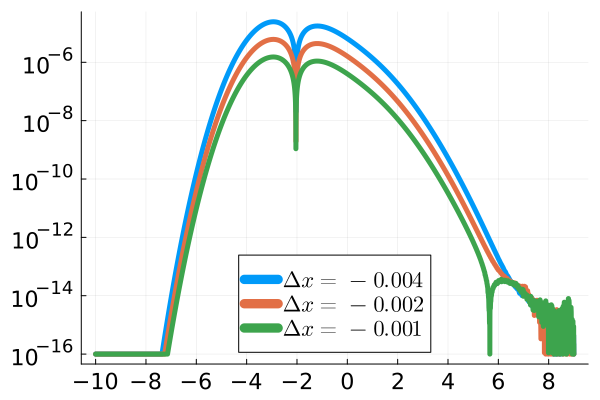

In [13]:
er_cdfc=err_cdfc()

### Order of error plot

The following plot shows the order of error of the finite-difference discretization (CDF) using trapezoidal method for $\beta=2$, $x_{0}=\lfloor 13/\sqrt{\beta}\rfloor=9$, at $x=-2$ before interpolation with $M=1000$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.02,-0.01,-0.005$ are used.

In [14]:
β = 2;
xx = -2;
result_ref = TW(β;interp = false,Δx_f = -0.001,M_f=1000);
x_ref = result_ref[1]; F_ref = result_ref[2]; ind = findall(x -> x == xx, x_ref)[1];

In [15]:
del_x = [-0.02,-0.01,-0.005];
err=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;interp=false,Δx_f=dx,M_f=1000);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind2=findall(x -> x == xx, x_cdf)[1];
    err[i]=abs(F_cdf[ind2]-F_ref[ind]);
end

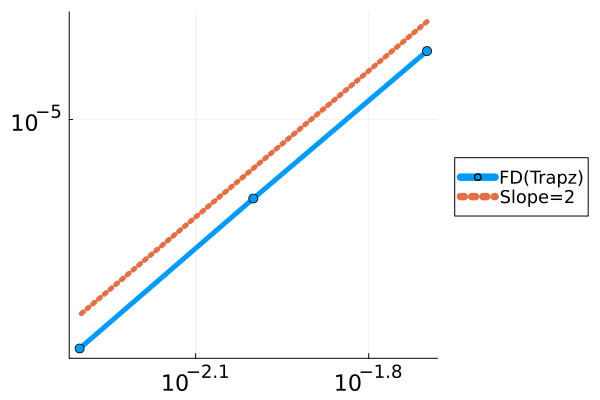

In [16]:
p = Plots.plot();
p = plot!(del_x.*(-1),vec(err),lw=5,label="FD(Trapz)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p = plot!(del_x.*(-1),10^(-1.2)*(del_x.*(-1)).^(2),lw=5,label="Slope=2",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF3, $\Delta x=-0.04,-0.02,-0.01$ are used.

In [17]:
β=2;
xx=-2;
result_ref3=TW(β;step="bdf3",interp=false,Δx_f=-0.001,M_f=1000);
x_ref3=result_ref3[1];F_ref3=result_ref3[2];ind3=findall(x -> x == xx, x_ref3)[1];

In [18]:
del_x=[-0.04,-0.02,-0.01];
err3=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf3=TW(β;step="bdf3",interp=false,Δx_f=dx,M_f=1000);
    x_cdf3=result_cdf3[1];F_cdf3=result_cdf3[2];
    ind32=findall(x -> x == xx, x_cdf3)[1];
    err3[i]=abs(F_cdf3[ind32]-F_ref3[ind3]);
end

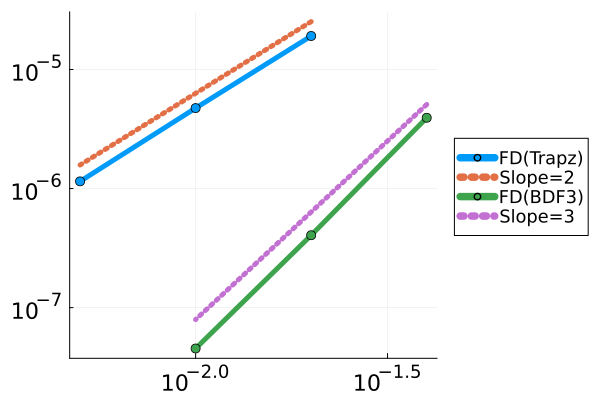

In [19]:
p=plot!(del_x.*(-1),vec(err3),lw=5,label="FD(BDF3)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-1.1)*(del_x.*(-1)).^(3),lw=5,label="Slope=3",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF4, $\Delta x=-0.05,-0.04,-0.02$ are used.

In [20]:
β=2;
xx=-2;
result_ref4=TW(β;x0=9,step="bdf4",interp=false,Δx_f=-0.001,M_f=1000);
x_ref4=result_ref4[1];F_ref4=result_ref4[2];ind4=findall(x -> x == xx, x_ref4)[1];

In [21]:
del_x=[-0.05,-0.04,-0.02];
err4=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf4=TW(β;step="bdf4",interp=false,Δx_f=dx,M_f=1000);
    x_cdf4=result_cdf4[1];F_cdf4=result_cdf4[2];
    ind42=findall(x -> x == xx, x_cdf4)[1];
    err4[i]=abs(F_cdf4[ind42]-F_ref4[ind4]);
end

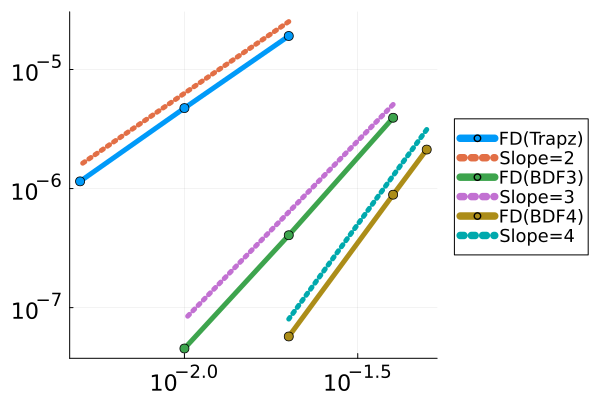

In [22]:
p=plot!(del_x.*(-1),vec(err4),lw=5,label="FD(BDF4)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-0.3)*(del_x.*(-1)).^(4),lw=5,label="Slope=4",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF5, $\Delta x=-0.25,-0.2,-0.1$ are used.

In [23]:
β=2;
xx=-2;
result_ref5=TW(β;step="bdf5",interp=false,Δx_f=-0.001,M_f=1000);
x_ref5=result_ref5[1];F_ref5=result_ref5[2];ind5=findall(x -> x == xx, x_ref5)[1];

In [24]:
del_x=[-0.25,-0.2,-0.1];
err5=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf5=TW(β;x0=9,step="bdf5",interp=false,Δx_f=dx,M_f=1000);
    x_cdf5=result_cdf5[1];F_cdf5=result_cdf5[2];
    ind52=findall(x -> x == xx, x_cdf5)[1];
    err5[i]=abs(F_cdf5[ind52]-F_ref5[ind5]);
end

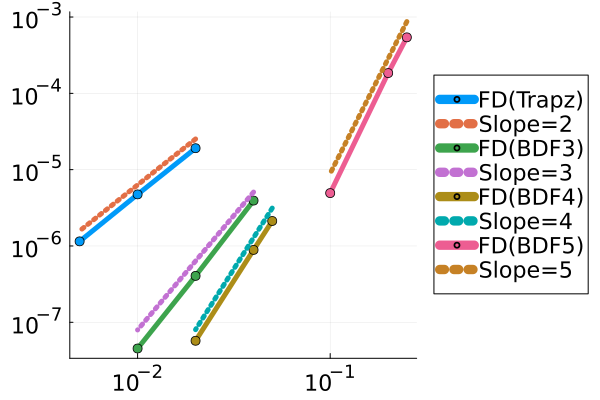

In [25]:
p=plot!(del_x.*(-1),vec(err5),lw=5,label="FD(BDF5)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
p=plot!(del_x.*(-1),10^(-0.05)*(del_x.*(-1)).^(5),lw=5,label="Slope=5",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF6, $\Delta x=-0.4,-0.3,-0.25$ are used.

In [26]:
β=2;
xx=-2;
result_ref6=TW(β;step="bdf6",interp=false,Δx_f=-0.001,M_f=1000);
x_ref6=result_ref6[1];F_ref6=result_ref6[2];ind6=findall(x -> x == xx, x_ref6)[1];

In [27]:
del_x=[-0.4,-0.3,-0.25];
err6=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf6=TW(β;x0=ceil(13/sqrt(β)),step="bdf6",interp=false,Δx_f=dx,M_f=1000);
    x_cdf6=result_cdf6[1];F_cdf6=result_cdf6[2];
    ind62=findall(x -> x == xx, x_cdf6)[1];
    err6[i]=abs(F_cdf6[ind62]-F_ref6[ind6]);
end

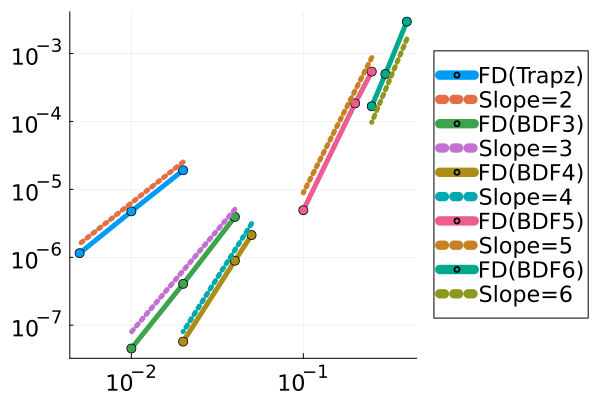

In [28]:
p=plot!(del_x.*(-1),vec(err6),lw=5,label="FD(BDF6)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
p=plot!(del_x.*(-1),10^(-0.4)*(del_x.*(-1)).^(6),lw=5,label="Slope=6",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

### Error plot with respect to $x_{0}$

The following plot shows the absolute error (CDF) using trapezoidal method after interpolation over $x=-8,-7,\cdots,x_{0}$ with respect to $x_{0}$. $\beta=1,2,4$, $x_{0}=13,12,11,10,9,8,7,6,5,4,3,2$.

In [29]:
TW4 = [-2.574888392460305795122132602283250619390264383239676521888421135088679529549212527*10^-36,4.402674550991342537185592131001736469178851920963801726793127991457336550558987664*10^-22,1.143215750649091122069845013136160833697857536843154450106940777297625766122031395*10^-13,8.51301807688514454125351774951488146614016798275967297836405782711208969812021591*10^-8,0.000502072743527362930092215723446062225917032429718405709367693300659511905434249519,0.0653598692838841400003036114843829441479826138525965221003464392626850876085539952,0.5452752326130137385328376382300301319772829689948250598818069599157414875383186017,0.9456464856799623193424730754993378155844706695925790940734708293911623587609938534,0.9985741973581685402167048089588001725151497796528776329865471538507175619950599360,0.999990399496881048876133133637538307568751495381409573761366063573911607303272320,0.999999980361649638857796235694354098596605423234869632977804959561360187663516701,0.999999999986028151193326567062568767032968785206749039446005375664807284601385050,0.999999999999996160910724232392630483281593932502809261171248527536177491922333618,0.9999999999999999995577557564024624627157663777484793696193875405967078265931785490,0.99999999999999999999997719226626007644596096735971404710727495843067584148532096604812,0.99999999999999999999999999944431830933189365337200481792121699288247622418450197685995,0.99999999999999999999999999999999331098642000476962650694288711366872060079669751774338,0.99999999999999999999999999999999999995867576091686992541045229183200441101221499016345,0.99999999999999999999999999999999999999999986461612272421666055738971553438841303296449,0.99999999999999999999999999999999999999999999999975799109706091432573567272824770216316,0.99999999999999999999999999999999999999999999999999999975795149470680561809247113598280,0.99999999999999999999999999999999999999999999999999999999999986149312377000286345899697];

In [30]:
TW2 = [1.985900425763657476861201334379488760829392163990118371509824170565031728897943778*10^-19,2.6396147672460622595308379590397248007837855115582377005291328373567449490481530450*10^-13,1.06225467412445106877418846129809452169519677499499694047692587972576008483926245*10^-8,0.00002135996984741115769872299326708922325231764218880534325700489794070270744644728211,0.003544553595509200296340396504059266890198333653911294403207318845778851758033887110,0.0803195529393345480813718927988022907188829499028053796784468796982009298500041285,0.413224142505122554688080761371718196004467389478519013570048867377940492061113133,0.807214241999285292478958287996688928581732145396256692100604257018062203964494027,0.9693728283552626683498782494508137827306013366639174887003503248423948783198697170,0.997505438149389249379153118865148501014625106980935146651179946702802132444059115,0.999887553698309172925030135523634480071558427117812918992099236320214637084199097,0.999997005956607648307776021886671834916027075059204068335356759940847234952688033,0.999999950420878466689529812686505002474709093048964252017335731008051875893250448,0.999999999468220673666757360366341245545030883934605478877037881568340346060828403,0.99999999999618276734099054100855895299118853879428790420406187723434750707281242,0.999999999999981164226648278645362910151314867823598542389732039256858364587167496,0.99999999999999993466436793068388498461574214870866588197821212193700741761360189,0.999999999999999999837634313800035690159240899724293768881819303199720524611712241,0.99999999999999999999970615728663952820145568688040536940525204960942672046124468806167,0.99999999999999999999999960717516733320769197946117627254401080115664686718665110201120,0.99999999999999999999999999960717845101964126382533189894958864043874295763502953046497,0.99999999999999999999999999999970286935056733670174008925419157371444215526644866331081];

In [31]:
TW1 = [1.806827921192191248278880143332523828667007643810740728274212171282609879253090357*10^-12,5.482862591559699913414184024424072669354818711181850949275939826090648080461018418*10^-9,2.707319325304773040821000882102924490595972436549632042075093180239591117070766241*10^-6,0.0002779177549167903698016390969780283418718328881752742322247209844580891598297832081,0.007567678598796400521936599670665732806798488377180260107263488838855525232305624153,0.06960011886736988843622020223779165777774541996946646444171700793533950684220392168,0.2743201979092178576716310476127873226448971056706662362535487247044550925223384311,0.5837898955197322834588884463779472662251473386606027279329334085854380163058629736,0.8319080662029519274622193818646769042119909956466013558294134603367560074201932261,0.9514212369115507347956186295073144506041702552123970188686737738045822167783893485,0.9895975710848269920731970333538613391783696895350364246743608284561450660491230459,0.9982934803498805951655028956206699745633996744243089414843488585865029260988367531,0.9997796555125670013518272834840820629648348916065770121709609259714451767403037387,0.9999771284819556795622427891174769455667372453277406586221847579781954034055939177,0.9999980591859273537829011376652640243171421415783596403017151355252936374690019694,0.9999998635117948722183979877374723350744893297749818835627833090425712722802194198,0.9999999919545751201302614347447837482113688020072257335640829247132111095730148309,0.9999999995986651565037890552575943634549639204500892788142192879148784649881789567,0.99999999998291784130472893156411670956883845565367466428685290806024644466030284480158,0.99999999999937516373587901508840613140719132826227221071722567532543114485478526272951,0.99999999999998023427042478423261646979469576137427809733081451458427400754355978624678,0.99999999999999945623395600657715544651124820813894737744998542840441835701849993529412];

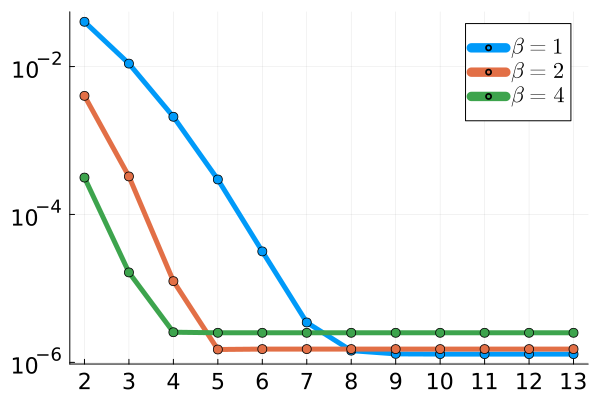

In [32]:
Beta=[1,2,4];
X=[13,12,11,10,9,8,7,6,5,4,3,2];
p=Plots.plot();
for i=1:length(Beta)
    global β=Beta[i]
    err=zeros(1,length(X))
    for j=1:length(X)
        x00=X[j]
        xx=-8:1:x00
        E=zeros(1,length(xx))
        xs,F_cdf=TW(β;x0=x00,interp=false)
        if β==4
            for k=1:length(xx)
                temp=xx[k]
                ind=findall(x -> x == temp, xs)[1]
                E[k]=abs(F_cdf[ind]-TW4[k]);
            end
            err[j]=maximum(E)
        elseif β==2
            for k=1:length(xx)
                temp=xx[k]
                ind=findall(x -> x == temp, xs)[1]
                E[k]=abs(F_cdf[ind]-TW2[k]);
            end
            err[j]=maximum(E)
        elseif β == 1
            for k=1:length(xx)
                temp=xx[k]
                ind=findall(x -> x == temp, xs)[1]
                E[k]=abs(F_cdf[ind]-TW1[k]);
            end
            err[j]=maximum(E)
        end
    end
    if β==1
        p=plot!(X,vec(err),lw=5,label=L"$\beta=1$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    elseif β==2
        p=plot!(X,vec(err),lw=5,label=L"$\beta=2$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    elseif β==4
        p=plot!(X,vec(err),lw=5,label=L"$\beta=4$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    end
end
p